# Ohm's Law

We consider a piece of conducting wire of length $L$ and cross sectional area $A$. We then connect a battery to its two ends, i.e., apply the voltages $V(L)$ and $V(0)$, and observe the current, $I$. 

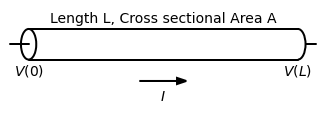

In [2]:
import matplotlib.pyplot as plt   
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()

cyl = d.add(elm.coax, length = 10, radius = 0.5, label="Length L, Cross sectional Area A")

cyl.add_label('$V(0)$',loc = 'shieldstart') 
cyl.add_label('$V(L)$',loc = 'shieldend') 

d.labelI(cyl, label='$I$', arrowofst=1.2, arrowlen=1.5, top=False)

d.draw()

This potential difference corresponds to the electric field (directed along the x-axis)
$$
   \vec E = (\Delta V / L, 0, 0)
$$
and causes current to flow,  resulting in the current density, (along the x-axis)
$$
  \vec J \equiv (I/A, 0, 0).
$$
On assuming the **Proto-Ohm's Law**
$$
  \vec E = \rho\vec J
$$
where $\rho$ is the **resistivity** of the material, in units of Ohm meters, i.e., $\Omega\, m$,
we arrive at 
$$
  \Delta V / L  = \rho I/A.
$$
We rearrange this to **Ohm's Law**
$$
  \boxed{\Delta V = I R} \quad\hbox{where} \quad
  \boxed{ R = \rho L/A}
$$
is the **resistance** in units of Ohms, $\Omega$.

We next draw a circuit with two resistors in series, driven by a battery

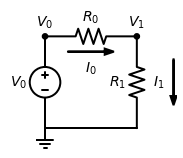

In [33]:
# resistors in series

d = schemdraw.Drawing()

R0 = d.add(elm.RES, label='$R_0$')
d.labelI(R0, label='$I_0$', arrowofst=0.5, arrowlen=1.5, top=False)
node = d.add(elm.DOT)
node.add_label('$V_1$',loc = 'top')

R1 = d.add(elm.RES, label='$R_1$', d='down')
d.labelI(R1, label='$I_1$', arrowofst=1.2, arrowlen=1.5, top=True)

d.add(elm.LINE, d='left', tox = R0.start)
d.add(elm.GND)
d.add(elm.SOURCE_V, d='up', label='$V_0$')

node = d.add(elm.DOT)
node.add_label('$V_0$',loc = 'top') 

d.draw()

We have labeled the voltages at each node and the currents through each resistor. We will analyze this circuit with the help of Ohm's Law (for each resistor) and 

## Kirchhoff's Current: All current entering a node must leave the node.

In our case this reads simply
$$
  I_0 = I_1.
$$
Now as $V_0-V_1 = I_0R_0$ we find
$$
  I_0 = \frac{V_0-V_1}{R_0}
$$
and simlarly $V_1 = I_1R_1$ so
$$
  I_1 = \frac{V_1}{R_1}
$$
Placing thes in KCLR yields
$$
  \frac{V_0-V_1}{R_0} = \frac{V_1}{R_1}
$$
which on rearrangement brings
$$
  R_1V_0 = (R_0+R_1)V_1,
$$
that is
$$
  \boxed{V_1 = \frac{R_1}{R_0+R_1}V_0} \tag{Voltage Divider}
$$
and
$$
  I_1 = \frac{1}{R_0+R_1}V_0, \quad\hbox{that is,}\quad V_0 = (R_0+R_1)I_0
$$
This says that the circuit behaves as if it sees just the sum of resistances, in other words,

## Resistances in Series Add

Let us now build and study a parallel connection

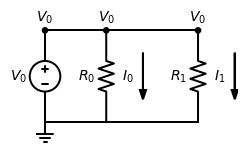

In [34]:
# resistors in parallel

import matplotlib.pyplot as plt   
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()

Line0 = d.add(elm.LINE, d='right', tox = 2)
node = d.add(elm.DOT)
node.add_label('$V_0$',loc = 'top') 

d.push()
R0 = d.add(elm.RES, label='$R_0$', d='down')
d.labelI(R0, label='$I_0$', arrowofst=1.2, arrowlen=1.5, top=True)

d.pop()
Line1 = d.add(elm.LINE, d='right', tox = 5)
node = d.add(elm.DOT)
node.add_label('$V_0$',loc = 'top') 
R1 = d.add(elm.RES, label='$R_1$', d='down')
d.labelI(R1, label='$I_1$', arrowofst=1.2, arrowlen=1.5, top=True)

d.add(elm.LINE, d='left', tox = Line0.start)
d.add(elm.GND)
d.add(elm.SOURCE_V, d='up', label='$V_0$')

node = d.add(elm.DOT)
node.add_label('$V_0$',loc = 'top')  

d.draw()

In this case Ohm's Law immediately reveals that
$$
  I_0 = V_0/R_0 \quad\hbox{and}\quad I_1 = V_0/R_1
$$
and so the total current is
$$
  I_0+I_1 = \frac{V_0}{R_0} + \frac{V_0}{R_1} = V_0 \frac{(R_0+R_1)}{R_0R_1}
$$
and so 
$$
  \boxed{V_0 = (I_0+I_1)\frac{R_0R_1}{(R_0+R_1)}} \tag{Current Divider}
$$
from which we deduce

## Resistances in parallel act as their product over their sum

Let's confirm these two "laws" in tinkercad

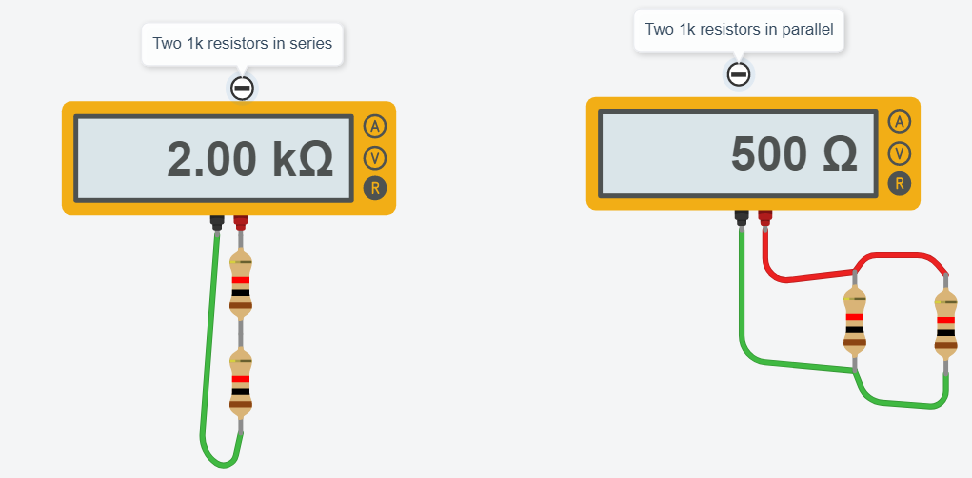

In [11]:
# used https://www.base64-image.de/ to code my image
# copy code into data slot below, remove leading data:image/png;base64,
from IPython import display 
from base64 import b64decode

base64_data = "iVBORw0KGgoAAAANSUhEUgAAA8wAAAHeCAIAAADByxWAAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAKhxSURBVHhe7N0HYBtFvgZwrbpsuXen2Om9kISQQkICAUJP6CXUB4Sjw8EdBDjgjn5wtDsIvYUSSuiBECCQkEJ6d5odO+7dsiVbfd9fmrEsSy6SLMmW/f2enm7+q5VsCWf1aTQ7I+gNjRIAAAAAAAgeKf9fAAAAAAAIEoRsAAAAAIAgQ8gGAAAAAAgyhGwAAAAAgCDDiY8AAADhI4oib7VuAwSLIAgeDegWCNkAAADh4IrU1GBt9y2sARAwj2wtlfLRCoja3QUhGwAAIORcqdqd+3bHTgBdwMK065pCNl27SsceEF4I2QAAAKHlTNQtKP/Qtc1ul4gs+iBhQxBQkKZcbbFYWLaWyWSs4cL3g3BByAYAAAghFqwZets1W6ys21ouk0oETD8AQSLarTY7/S9lablMMJvNcrlc6sQjthPbF8IDIRsAACBUnMFaYrfbHQ1RMFmsKpUiWqOSyeSuWwGCxW63GRrNJrNZKpXYbVZK2DKZjOVsuqYdkLPDCSEbAAAgVBzd16JIIVsiSEwmW3ycViFHvIbQstpsdTq91WKkhM04OrTdhmhDeCBkAwAAhARL2ISSjdFkiY7SaNQqtp3tQMkbIPhE+kRn0hv0FotVLpe7cjYL2YTvBiGG0WAAAAAhRJHaZhOlUhkSNoSJIFGpVKJEsDnZnVr+8CBc0JMNAAAQEhRrWL6x2yVqlUKj0fCg0zpeI/1AsLj3UldV1zYa9AqFQu7kPmiE7wEhhp5sAACA4KPozNIzXdtFidR5pqMH1z4AQeH+FyVIBLu9VU+2C9sBQg0hGwAAIFRaMo3gaLMGw0uAYGN/WvT/FK3dEza7FcIGIRsAACBU2gs3SDwQUuwPzHHt+ANswW6F8EDIBgAACAm3TINwA93Ae5QIu4bwwImPkcf9Xwj+tUDA3M99wXkwAEFHx2f2Tb3VapUIMq02SumcIZsNF8HRG0KtukZXW1PlPO9RwVAL5z6GE0J2JGEH5fauAXzhOrayBl17bAGAoKAjMyVs5xRqtpaQ3fyPDMdtCDUK2TXVlRStFQolC9nuE2bznSCUELIjBh2R2UGZNdyxHQB8wY6trmt3ru0A0HV0cEbIhm7kEbKd8/jxifxwqA8PhOzI4MzSLQRBKtrp/4jjRrYPgA8cK88JUsFqsTgaTuyAy1Cb7wgAXUMHaBayrVarIJUjZEOYuUK2XK5QKumvDyE73BCyI4AjSzvR8Zr+k1ltdsrVcvpsKpfxPQB8Q39FFovNarM68rQgsVjMdLR1YSEbB1+AoGAHbd9D9rSzr+Wt1rL6Z7zy5N+TEuJ4HTyH8o7R9fDBA+m6ulZ38/1Pn3/m3EvOPdV5Ywht2rYnMSGO/dz20D6/b9r+91uu5nXw0CM//NzrLz92b8e/QJgt/2b1ipVr6D90lEa95KlX0lMSO3juTUZTp/sQCtnVVRVKJaVsNlrEEbcRssMJIbunc4RrJ8fB2u5YmzdGG6VWKV23sgaAXxqbjI1NJpkgMVtM7JjruqZbcfwF6Dp+3Pa/J9uVt0IRrF1Yqv7X324Kf8julI8hsjdByO6V8NVwBHBEbAfBbhcTE2JYwmab2A4A/qLjeHxstE2UKBRKSgCOQaPOVcHwRwXQF2zatuesK+8sKCrlNQCEAEJ2j8aSNJEIgsVqi9FGyaSOjkbHFoY+i+KCS0AXuVwepVHR35ZcqWQJm4Vshv+BAUB3o0A87exr6ZqVh/KOnX75bU//7z1WNhlNdz3yvKtBe7KLa39vdNOdD//nrhsvf+HRu/kmL+yHXnLTkupaHd/UbPk3q+kHPfTMUvo12IAT2uL6ua5fjHj8Sq6b6MHZHdvcgX7iNXc+unHr7i9/+M31I9z3dD012pN+w3eWf0u7ue5O12w3utBd6I5sZxe6u/tvTo/AtrC70Ba2mwfa/t3Pf7ge2fU7MO4/1P1FY68VbXT9xPb2bE97ry1EBITsno4lHqvVplIqVEreh+24gUUlgIAJkqgotVQQJKKAnmyAHmvY4IFZ/TMKistYuWPvQV29vqyyhsXHwpLy/YfyWDClcs3nSzd99w6lZ4rR7eXFaZPH0T4dDAuhBEl3X3jGnOVLn2hzyAolYG20ZtVHLw8fPJCS39uffPP+S4/SY37/wQvb9xxkWZB+vSVPvUIN9iuxm9x/pfZ2oJ/47gsPT58ynn4B9iM8np3HU/vk659efuxe2v73W66mH00PQg9FJe1Mt7701idst/YUFJUu//bnr95+lu5CHzyef/0jjwDt8sHnK9kjs5fXtRv9UPrPwX43us5MT3nsxbdd4Z5eK9rueq062LNNbb62ECkQsnsuZ7p2JB72vxp164TdzHkrgB/4n46TUqmgPyL3kO2xAwB0Lwqdk8aN2LR9L0tj+YUlp84+oaS0guI1lZS542Njfl63mdoP3nGdRq2iBsVoSqgrVq7ptKPUmythdzDeNy5Wu/CMudQ4lHfs1/Vbr7v0XDawm37Vu2647MsffqMHaWwylpRVTps0lv1KdBNFdvdk3+kOLh7PzuOpnTxzCvvp9PpQhKXXih6KStr5+Ufu6nRUNz2Xv1x1AXvkebOmun+e8fCvv93EHpm9vBTN6SeyV+CSc+axR6BratPHHvZfh9Djs0ane3qju7T52rJboedDyO7pWOghglSga761mfcWgE45/6D4X45cRgcBwXFWrRO7iWE7AEC3O2naJJbGKFlu33PwhEljJYJQ40yZlLkpVtJ1ZnpKlEbN9id0l7r6Bn9D9t4DuQ8/9/r0KeNv/79L+aa2UKxncZMiPl0fN3aEc7ODq9+ddqBf7PnXP2pvUESnO7h4PDuPp5Y9IJM1KLZSZHcfZOIL13PplPtu9EPZfxFKwKs+epliNwVuNjKEPqLwnZzo8Vmj0z290cvb5mvLa+jxELJ7OhZ3BPe+6+YmYhB0Bfv7cYz3l0goXbtCNrsVAHoOSleU1ShVU7KMi4mePnkcxdPfN22nkjI3hc6yyhq+a9esXvunrl6/cevub35ayzd1hva/6vaHXeOG3c+n/PstV7/w6N1U0ka6yTtMd7oDYf3TvOjMJeee+v5LjoEl7FfyK227UKbnrdbcP8Nk9UvnreZh1nMvvKmkrPL7D17oYKS773u6tPfaQkRAyO7ROkg8CEPQda6/IkeD/r8Z2wgAPQTFu8z0FErVO/YejI6OojJ7QCZFz937DtGtFMHTUxLZnl10142Xb/runYVnzHn7k298jKdZ/TPYSGX3i2vUBxv/TRfKvnX1DTff/7RHjO50B41a5dezYx3G9ID0W9Enk9se/HcAObtNjU1G3pJIXN3Jm7bt+fKH3ygu009sbwg74/ue7jp4baHnQ8iOAAg9EGosWxNXyRoA0BOwgRC5+UW/rNvMBjEfN3ZESWnF0g9WsCHIrtEL/A4SCSVy3wdCeLj+8gV03y9/WMPr9tGvQcn4sFuKpUR7+uW3eY8bpux73aXndjCCpYMdPJ6dj0+Ndrjrhst09Xo2rqbr3H+x/MKS0cMHD8hMo7QdF6tNdPtl6NfjrdZ839OFXl5fXlvosRCyezrPuIMZRSDYnOma/s4cf2mO/wWAnofyFqW03TlH2EAFR8QUBNpy0rRJVM6bNZVy56vvf9HkPDmSdZqef+bcwEI23Yvu68s5dpSMT5455eHnXme9xfTT6Xeg9DlhzHCKpJfctMQ1GwbdtGn7XhZM2ZYOdmC912XNM6h4PLv2nhrdetcjz9OF7UYoxWb1zxgWpJUdXb/A8m9W0+/ATmGk/xyU49nYdMJeedb24PueLvTytvnasluh50PIjgDIPRBq7G8Mf2kAPRZFTwpYrshIEXPSuBHu5bsvPEyNuRfeNO3saymZvf/So10ZV3DuabOnTxnvSngd+PstV1936bls6DD9dArHzz9yF6VP+pVeefLv2/ccZOOJ6Sba+Yn7bqab2B073oE+PGzcups2Uhj1eHbtPTW6I92dGmw3utCDB3HhzKFZ/dgjs2n1pk0eRxvp+oVH737+9Y/YT1z+7c+vPbOEtrvCtIvve7pr87Xlt0GPh2XVey5KPHbXkryCLC5O61iJBmc9QlCZTBa93lBTU6VQyBUKZVRUlFwulzph3V2Armh1DPdnWXXogZZ/s3rerKnByuvhgWXVux16sgGgFbz3AwAAdB1Cdi9BH7LZN1Del06nIA0M/UT3oW9sdJ37KlwhssltRdwO0G4hWhnLx18guML28gIAAEBQYLhIzxXwcBGKYitWrgniQDRvFDTvfPg/06eMd42foxR48/1Pn3/m3J4wuxBF/yVPvZKektjpWl/gPVxE5oTvEwG6CMNFoHthuEi3Q082+O3p/73X6TpVAAAAAH0ZQnbvt/yb1e7DGzZt2zPt7GvZwAP3QQhNzQu9sgvt5ty9Db+u3/r+S48uPGMOr9vCfor3SBX6Ef9751PaTre6RpvQL+D6ue5jPOh3pt/cdRPb6D5aw+N3Zveln3jNnY9u3Lr7S7fFddlPpIv7S8Ge/jvLv2U/he7e5gN6cP8F6DenR2Bb2F3Yi+mh44dt8+l7vFDFpRXUdj14B/+x2CtPF/dnCgAAAGGGkN37HTd2BF27ZuNns9+zZWMP5x2rq2+gHVgwpS1rPl+66bt3Xnj07jsf/k+beZGs+ujl4R1OO0o5j+5OKbzNRa0++OKHu264jH4Km4qIYiWbDom2fP/BC9v3HGRBkwLibQ/++7pLz6Xt7FfyiIwUNJc89Qo12O/M7ku/M5vsafqU8fQLsF+V7jhp3Aj2OGw6JPdU+snXP7382L100+3/d2mbD8h2a09BUenyb3/+6u1n6S533Xj5869/5P7gpL3fk93a3tMn7i+U2m3Opjb/Y7Efyl552kgXeqYPPbPU40MOAAAAhAdCdu/HZldl2ZoCX1llDaVPCnNU0kY28//P6zZT+eAd17EB1tMmj6N9VqxcE0BEcyXs9sZDU/x1zaVP8ffX9VspDrLUTvmYYuWXzhUQ2KcC9gmB0K/kkewbm4wlZZVs8TMq6b6U6dscEf7lD2soQLM2m/yVYjG9FGzLyTOnsEf2/QHdxcVq/3LVBewu82ZNzeqf4Vpul+ngYTt4+lS6v1Du6D8WfTRy/VD2H+v5Nz6m/1j0o+kXYLvRj/B95V4AAAAILoTs3o+iGCU8StUUwgpLyktKK8aMGCIRRRa4WfjLLyzJTE+J0qj5fZwLAXSw/m179h7Iffi51ykdukKtt/SURJYOCZuE35WkybDBA1lOpUZ8bMxVtz/s6tn1QPFx0rgRz7/+0SUdTp/CnqbrJ7JXg1IvZV+2JXtAJmv4+IAeOl3dt4OH7eDpU9v9hXKhp+Oxahpx/ceih6JGp73vABBOOMkMuovrbw9/hN0CIbtPcMQ4UaQQVlOry8xInT55HF2zwE03sRjKd+2a1Wv/1NXrN27d/c1Pa/mmztD+bDkrdjnryjsLikppO2XT5UufWHjGnC9/+I3dxPZ39/dbrn7h0btpf7oX7dBmOGYdybzojC8P2Ck2FMddBw/b3tPvGFsIzXWvO5vPQx0+eOBXbz/bsqIY0jYAQJ/HEjZydvghZPcJjq5WQdix9+Dvm7anpyRSSddUUtQekJmmUauo5Lt2zV03Xr7pu3coGb/9yTceQ6jbk9U/4/sPXmDDiF0X1yANiqdsCz1ym13a0yaPYzu8/9KjdfUNN9//tEcsjtKoM9NTeOED7wfkN3RNe79nx0+/PfQKe9zFNVCe/muyLY4xJK9/hJwN0L1YshHpYnPO2YeJ+yBcWKZGtu5GCNl9AhuxsGn73u17Dp40bRJtoesV3//qGiicPSBz/6G8wpJy5+4OFMc7HQjRnusvX0D3/fKHNbxuHxvecNgtjlM0P/3y29igZHfnnja7rLLGNZDaG0XM6y49lx7NI2SzjxCujWy4hcfYmDa5HpDXQeL+e/r+9F3o6bgG//BNzZOceDxx+q9ACd67Wx0Awk+QiFa7jRcAYWGzi64+bFfDeQuECUJ2X0GpeuPW3RTpEp25ma7rGvSOYSRO82ZNpVj86vtfsBRLIe/LH347/8y5gYVsuhfd13UCXwcocZ48c8rDz73Our3pp9PvMHr44AljhtN9p7lNTkcfAFwfCRjKlJQsXd3bLD2zwcosWLtC+cIz5r750Vdst29+WkuvwyXnzHN/KKa9B2RlwDr4PTt4+mznNtF/LLp+7MW32bOj+779yTfsPxalbcrozr0cU8cUFJWyz1QA0C1cyUYqFSwWhGwIL9HmDNeOK4a2sWsID4TsvoKdUceyHZV07WoTymfvvvAwNdhIX4p977/0aKeDFjrAJvFwxccO/P2Wq69zTqtHP5d+OoVjNrXftMnj2OR0bHgx7eDx+9Dv/MqTf9++5yDbge5LG10rULIPFbSRYjplWdduK1au+f6DF+jBnY/RSnsPyG4NWMe/Z3tP33nXtnn8x6L7PvrXG9mLQ9f0aOwH0UtHL2CbzxQAwoaHG0GwWen/WnI2sg6EFP21WSxWx+KOzvUdXfjNEBZYVr3nCnhZdQDfYVl1gBChozQ7jBM6jNMB3GaX0JFcLsORHELLarXVNxhqqiudK6nzBdUJHdjZsR2H9/BATzYAAEDwsSjDULKxWC1SmURXb2jQN9qsvEub3craAF1Hn+j0eiMlbJvF6uwucfSYuIK1C98bQgw92T0X6wJBTzaEFHqyAULH0ZXdfCRnB3OFQiERZHa74wCukNMh3fmvDIdzN4JUiNFqeNGW+nrklraIdovNzloWcxMd2FVKpYz1YMvl7gd2HNvDBiG753IdmhGyIXQQsgFCx5mxHdxzNvsfTbSW/oE5w7ZjR/4/OK5LRLlcERsTTUcket34Njdmi7W2to7SC7WbD1F9/UjFXwc7/TnZdLo6OnTTAZyO4kqlig7m3gmbOO8AIYeQ3XO5jssI2RA6CNkAIeWI2M6DuStnM6y2i3Y6lrN9CL9Pn8SePl0nJCYpFcr4+BjXRnd1dQ2FhQV0gGLHKNeRqo8fr1wvgpPEcbajTKZQKNjxnLheMcfNEC4I2T0XHVzYQRkhG0IHIRsgpNixmg7m7JDOjuqua7aRdnLt2TfRBw3HtYNEo4lWqpSxMVo6KLGNzl0czBarvsFQVlZCByi34NiSsKnJGn0QfxEcKdrx2YOwkM3abGPLbhAWCNk9Fx1Z2IEYIRtCByEbINQc0bEZHdUZ1mbXrn3Y/n0TewUc7Pao6Fg6IrHObHYTa+h0erPZVFNT3XyYcnTYOkKlE9unb2JP33XtzNXun0NaOHeHMEHI7rmchxqEbAgthGyAMHBkR+dBmwVr4mowbB/nvn0Uex0IveupVBqpTOrqzGYsZmt9g76piS5GxzBj2qN1iOT79Umup89eCoaO5HRNr49rO9sHwgYhu+eiYw1CNoSaK2QrlQq5XEEhW+42lyrfCQC6jB20HSmymat03dpnuV4EetezWG0mi1WtjlIr5fFxWrYDqdPpG5tMVVWVsVq1TMZP5iOugxUOWa7XgTXYK8Pa7BrCDCG752KHm+aQLY+Li0bIhqBjIbu2tlrhXLMAIRsgpFxpkl2zhmtLX0avgMliN5jtFovFZrcr5Ir4aEWMNlqpkNGtZotN36Avq6k3NDZq1JoYjVyj4mf1OWOkA3ucvsz1IrAXhLhvhPBDyO656IjDQjaRCDKtNkoplyNkQ3A1NZkMhsa6uho2XESj0SBkA4RaB9m6bx7bLTax0WKna3rPozc+xzuf3Raj0USrnJ3ZgqSuTt/QZCqtqKRUrVKpZQq5WiHXqhWUtPv4warN54543UMgZPdcLGQTq9VKIVujVtHFcYPzXw1CNgRFQ0Oj0dhUX69ji++yMdkI2QDhgSM5MVlFvcnGXgp6y6OGs3PJKpcp4qLksTFa2tLQYKiqNxCpVKZUKelwJZPJpTJZjEoWpXKM28bxyh1ejR4CIbvnosMKC9l0sBEkUrtESEyIcUxzhJANQSLaJTV19VarxaCvZyHb1ZNNx2gcpgEg1PQmOwVsekujNr2vud746J3ParPGaNRRSrlEkOqNpsqaWkHiOJnPEbKdCdvRGSCTqeVSrQqdAtATIWT3XK7DDYVsOpJYrGJ0lEqtUmHECASLXt9kMlsaDfWOTiOK2AqFWq1mPdkI2QAQao6EbaU3spb3MvauV1ZSvHnThn17dlKqfvDBB+n68SceM5nNI0ePmzz1hP79B7rmFSGCIFXKhBi1Yw4NgB4FIbvncmZsHrKdOVtuF8V4zDECQWI2Wxr0jRar2dDQwLqx6YqFbIrX9NbF9wMACIFGs73J0iphk7LSkk8/fG/Nz6uozd4Er7zqGplM/s7bb9AW9sn/5TfeT8/IZEcqhm7RKIQoJY5a0LMgZPdodHxxfGvmHJZNFHKlXSJRqZRRapVU1nI0od14C6Az9IZks9r0jU0Wi9VmtdTX6xyDG2WOfmwK2SqVqrlzCN3YABAqZqvYYOZLXbr8uvrH//7nadc72sSJE4cOHTp27Dg6Gu3cufPIkSO7du1ih6Zb7vrbKaed4cjXriOVIGiVUpUcBy7oQRCyezTHp3i3zmxHzlYoRT4oWyKjnN06CfXNsE2vgTZKLZM7pnlqk9lsaWwy86JPcv2Z0J+TzWYXJI4/KpPF1GQwsDUdWDe2Y7CjUskSdstbFwBAsNU08jMdXd5a+vL3X6+gRnR09A033HDZZZextz/ieCN07kzHpeXLl7/88svUPvu886+76Tb3IxW1EzQyHLqg50DI7tHYkYXQUcaVs9n/qDUaiUTqjNWOHfgd+iRB6oiGbAFe75eCjrc1tfUmY5PrWNyX46Po7MY2GBroRaAw7RzWSNFaxhI2USgUdBPD7wMAEGweIZv1YVNj2LBhjzzyyPDhwx1vbK3RrezQtGjRoiNHjlB53eJbz1l4oeP+jCBo5Bg0Aj0IQnZPxw4u7NO8M2Y7sDZttdnpOMV3c+7eh7CnTNdRUVq1Rh2r1SqUjomcPF4Ko9FsMDSVlRU7xkA4scM04Xv0JexZ0xU1pI7/c0bsZvTiUNp2vjZI2AAQKnSQrmm08kIi2bNrx8P33U2Nk0466bnnnmMb6UjOsDbbSNgB6p577lm7di2Vf3/oXyfMOJHdROimOLVUJsURDHoEhOyejh1cKFVTw5m0HfGaNQi1Xfu08Ch7L3riomPkgxgbGyeXKeITHJ3ZbDtr0IG2urbebDLW1dWyEElXjiO080DN9un9Wj9T9sTZhw3HZw5nzmYNQm3XPgAAocAmxuaFRLL46ksrK8q1Wu23334bE8MP44Qdyd2v2aGJrvV6/TnnnEPXqWnpS9/9mDY2E7QqjMyGngIhOwLQwcWFgjW7Zo22Q3bf4Hg5nOilUKs1Mrnc1ZnNbqVrVze2SqViXbUsV9IxmmE79yn8mTdzvh4OrpKu+a4AACHQYLKbrXbWdg0UefbZZ+fMmcM2urAjuQd2jPrtt9/uueceatx6999PPnW+8xYHpVwao8KIEegRELIjgzNMOo41LFu7UMlude7Vt7BXgNCLQB82NFHRMkHGO7Pp9XAGxeoancViqq2poZDtPMGPJe2+HrLZtbs+/poAQDi5D8h+6p8Pbt643n2giO8eeeSR7777bur0mff94zG+ySkpmve2AHQvhOyIwQ5JzlTZ0mCct/c5/MmLosVqM1tsdkGh1chjoqOVSj7NSFOTucFgLCopVinksdFqWfO5fQjZrgbjarOG80YAgJCw2SV1TS0Dss8/Yy5d33333Zdffjnb4ruPPvroP//5DzXe/+wbrbZlnEmsWqaQ4VAG3Q8hO8JQpmzzug9yxGubaDBRwrbaHJ3Z1thoTbRCER+vZd3YNbX1dQZjVXWNXC7XRqm1aoVKqXCFbNqhzwZK1xN3fx367KsBAOFEx+16o50O4dR2nfK4dOnSKVOm3HbbbaWlpc69OpGcnEx32bp160033UTlo0/9Z9yE49hNdCiLUUkRsqEnQMiOSK5g3WcTts0uNllEo4WNULc5zwa1yWWKuCjnyGy51Ggy6/RNBcWljlQtk6k1GgrXWrUy2jlshI7CfTxTuj/9Pv5SAEA4UchuMDkO3dR2hew1a9bExMQsWLCgqKjIuVcnUlJSfvjhB2pQNKdrj5AdjVVpoGfAyQERyZEQndxHPvQddlGoN4lmO70OjovjRXD+v8VqNlpFg75RIkgMTaZGk1kulzvnznDEaro22YUGMx3a++jrxtBz93j6/K8KACD0KGTzlhv3SUX8otVq6brRYGAlY7P30e4n6GkQsiMeD0p9htkm0Rkdc6pQNqSS5UXHtfP/LVbHzOH1+ka7za6r10ulMjlbaEUqY7uKgpQCus0R0Pso9mcDANAt2hzI0dDQwFv+oHvp9XpqREVHsy2MHPNkQ8+A4SIQSRyzq5rtErdBMqJTWWnJ5o3r9+3ZuXf3rgULF1599XUPPXh/bm5uVvagyVOnTzlhenxCovspj9SIU1PNHwQAAMKjzeEibEz2v//97+rqaudenYiLi7v//vvbHJNNwSZWjTHZ0CMgZEPE8DgnndHrG7778vPlH75HbXbUjomJXfLAQ/f9/R4qWcdtVLT2veVfUbB2hWzaSNcJGhk6dgEAwsnjSH7lhecYDPobbrhh8eLFfJPPXnvttTfeeCM6WvvB59/yTU6YXQR6CHTlQcRgo0Tc5eUevumay1nC1mq1kyZNuu6665YsuT9Ko7z//vsvuuiiiRMnUphuajT8/Y6/0HGcxWuG8rj3AwIAQEjJpI4+Dl5IJFOnz6Tr7du3s9Iv27Zto+sx4yewkqEHR8KGHgI92RAx3NcvIH9u+OPl/zzdaHAMyLvkkktuvPFGytlssR52zXYrLS19/PHHd+7cGRWt/efT/xkydDjb7iREKwW1Ah81AQDCR2+ym5pXfHSNGPF3qmzXJNmtx4pIVAqpVomjOvQI+EOEyGBzxOaWhJ2Xe5glbArWzz777D333BMbGys0T50hczNgwIDXXnuNdqOd//3Yw3q9++k1YqPF/VEBACDklG49zZSPx4xzdEW//vrrBw8eZBs7VVJSQvtTg+7rnrAd3dg46xF6DIRsiAyUhnlL4hiH/cy//sES9rfffjtnzhz25SNdMyxqu9AWytm0Q0V5Gd3R+Rgtmiy8QwUAAMLAYzjHtYtviY7W6vX6Rx991JdpRmife+65h/ane9F9+dZm7gkeoHshZEMEEEWJufm7RfLdV19QXKbGI4884ppdlZI0u2apmsVrwtojR4688cYbaYe9u3f+ueEP5z0cRFE0tzVpKwAAhAg7WrM2GTxk2K13/50ahw4dOuecc3777Te2vT20D+1JDUrYdF+20cmxDI3beG+AboaQDRHAYuPzhBDHdCJffUGNk046ac6cOWwjQ/uw3VjDhd26ePHiYcMch+N3Xv8f28LY7CJWLgAACCePMR0nzDiR5Wy9Xn/PPfc88sgjJSUl7CZ3tPG5555jc2PT/iefOp9tZ+gxsdAj9Cg48REigPtZMr+u/vG//3maGmwZXrbRR65JVV9956O09Ay2kVJ4lAKnPwIAhI9zIj+bc56nFnm5h5/+50OVFeWs1Gq1I0aMGD7ccbb6oUOHDh48yOJ1dLT20af/07oP2yFeI8fqB9CjIGRDBKBjsauz+eXnnlrz86phw4Z9/PHHbItfpkyZQtfX3njLOQsvZFuIRiGNwtnoAABh5L24GGHfVX7/1RcG58xR3ihhv/ruR1pt6x4WQdAqpejGhp4GIRsiQG2Tzd4csh/625379uw6++yzH3nkkY8++mjp0qVse6eeeeaZadOmXXbZZYcPH5477/Tb/nofv8FxFo40Vo2QDQAQVo1mu9HaauYolz27dtChPj/viIH1Xmu12YOHeswlwgiCQPE6Gh0l0PPgjxIigCthk/y8XLpmXyCazeZGn9lsjqVnRowYQdfsvEkXO6bxAwAIuyiltL1wTGH60kXX3PePx/71zAt0oQaV3gmbInaUAgkbeij8XUKEYd8hZmZmstJfGRl8KDYAAHQ7lVyIVcuc56j7N9iD3SVGKcUZNdBj4U8TIkz2oCF07fuaBR7YxE8AANBDKGRCgkbG57f2JWo796H949RSJcZhQw+GMdkQAdxPfGRjsidNmvT6669v2bJl3bp1bHunzj///Ozs7LPPPrusrOziK66+dNE1/AY6WMulMSp84AQA6E50nG+yONYuoMM9ZWfvsdqCINAmlUzQKAQZVnaEHg8hGyKAzmi32vgUfm8tffn7r1dkZGR8++23bIvvGhoa5s6dS41WE6wKgkYuYHYRAIAego73JqvjZBybyKM2xWuZwGbClmKePogU+FOFCKCQOo6wrD3XGY5LS0u3bt3KtvjOlcunTp/JGoQeV44eEQCAHoNidJRSqlVJ49TSeI2MLtSgkjYiYUMEwV8rRACVXOr61nDwkGFsWPajjz7a0NDANvqipKTk9ddfp8bceae7z7EqiiJG9QEAAEBwIWRDBJBJW/2lXrv4FrouLS197bXX2BZfPPLII2y1sIuvuJptYZRy/CsAAACAIEO8gMjgvpTXuAnHzZ13OjU++eQTH0dmP/vss9u3b6fGtTfe4lpQ3UEQ1OjGBgAAgGDDiY8QGURRUtNo5YXT3Tdfn3/UsTDNnDlzHn744ZiY1qvsujl48OAVV1xBDY+FHunvXy6TxKllvAKAvsDWJNEfktibeAkAPZ8sWhI7jrcjB0I2RIxqg43CNi8kEr2+4el/PrRvzy5qa7Xae+65Z9KkSR6L1FC83r59+3PPPUdtr4RNhFi1VMEmZwWA3q36D7H4C7F+j8RwhG8BgMgSM1oSN1E64FJJ7Hi+pWdDyIaI0WCym60UsltyNmEz+vHCmbZHjBgxfPjwQ4cObdu2jW/1mLOPc8y0ipn7AHo/U6X9wL8kZd/wEgAimyAMvFo67K+ivN1vsHsIhGyIGKIo0RltNkfMbpWzy8tKP/3wvTU/r+J1a9HR2qnTZ3r2YQuCSi5okbABejlRUrjMdvBpweY46RkAeg9VinT0Y5JUxwlaPRZCNkQSm13UGZ1rP3qtBKbXN+zbveto3hGDviE/L3fM+Im0cdDgoSfMOJHt4EaQSR1DsX1ZvhcAIpipwvbHPMFaz0sA6EVEzUD5zB9FWRSve57eFbINh8W8V0RTpcRu4Vug1xElgs4SZZdIqcE3+UOQiEqpNVpmpAbf1KP1mc8BCVOkseMkcWMl6n58C0CX2bdeKalexwsA6HWE/pcLY57gRc/TW0K2scSe+z9J0Ye8hF6N4rXBHm0WVV7d2R2hVE131Egbo6SYVaAHS5whnfCSRJnMS4BAiYUfivsf4AUA9FLC5HeF5Dm86GF6xZjUilW29fORsPsOistaqT5GqpMLNqngU9Cmu8iltnhZLRJ2T1ezwb7+dEnlz7wECFjxZ7wBAL1YYc+NfxEeskWLff9D9h2LMeSuD1II1jhZXZTUoJSaqaS07T3GmrI1baSbYmT1sVKdTLDzG6AnM1fbt19v33e/YDPwLQD+Ew2OefQBoHcTm4p4q+eJ7JAtGEvEki94AX2SSjDFSBuS5NXRUr1aaNRIGylzywQrXVNbLW2KkeoSZDWUyPkdIFIUfy42HuNtAH+ZKiTWBt4GgN7L8U4h2njRw0R0yLbbdt8t2DA7CjgoBXOUtIkulLnjZTq6ZiXidaQSLfY9d0nsjq8pAPyGbmyAvsHxnaexhBc9TCSH7Jo/JXUtq40AQG/TcECsWsPbAP4QBQVvAQB0kwgO2SKFbADo3ep28AYAAEBEieAp/MQtlyBnA/RuQuIJwvHLeQHgM7F2q7j5Ql60r7hO8/GO7JzyOJNVxjcBgM9i1eZJ/Wqvn36E1z7Lr4k6WB63tSiR2jnl8dEKy8BEQ5TSeuP0I9FKvwdYS2evk2gG8KInidiQbTfaf5kgsZt4CQC9klQlPWWXRKrmJYBvfAzZn2zP+m5/f14AQEDuPXnfhMw6XnSG4vWH2wZRsOa1l9NHFp8/vtCvqN1jQ3bEDhep24GEDdD70T9zjBiBkNnm7EgDgK7YVujrv6MVuwc8uPI494Q9MlVHqXrW4PKB8XzO1lUH+t395eT9ZbGsjGiRGrJFZQpvAUDvJo/mDYBgs4tes+sDgJ+kvv0zem3D0BW7B7I2BevHztyxbNH6B0/be+WU/MUzjjxx9k4qWdQ2WBRP/DxubW7EJ71IHS4i6o+I6+fxokMFtdGNZjkvAMBnMWpz/7jAF8g0mGXHalvy8cAEQwAj7Yh0+jeS2PG8APCNj8NF/vr1pPIGDS+cBO9FrQCgNVFstdbyvOGl10zN40U7KGGvy0ujRpTCeuP0w1MG1rDt3lbsHuDK4nfOzulgTxeMyQ4yX0J2bpX2mV/HGJCwAQIVpzb/64zdidF+DM2q1Kt+PJBxoDyuoFbLNzXLStDPHlxx4pAK/wbbIWSD/wIL2Q8//kxMbG/4khogpLZv2fzR+2/zwoeQvTY35fWNw6kxMN7wwGl7On0LyK+JemL1uEaLPFpheeysXSnaTt6DMCa7G2w5loSEDdAVOqNye3ECL3zgGG/3/YRVB/p5J2xCGz/YNvjuLyevysngmwAAoFczmGUfbh1EjSiF9a45Od4J+7UNQz1GhmQnNp4/3rHir8GiWLYtm22MRL05ZOOMFoCu2+7zGS0PfD9hxe6BdEyk9shU3azB5Ysm5y2Zt4cu1HCd10I7UNSmoyodeZ33AwCAXmvVgUz2vkC52btPulKvWpeXxlK4u/mjSul9hBrbCpMj9yTI3hyyo5RYTxugq3z8d0SJmfVeRymsd87OefC0vYtnHKGj5Oj0erpQg53XQmmbdqDd6Kj6xOqxyNkAAL3b2txUuh4Yb6A3ArbF3Y8HHF9sUgrfesyzQ2fxjMOsEbl9pr15TPbDP47LrWr59DNm/ISoKExTANCJutrawwdzeCGRTMuqvHXWIV60g7IyJWYK2ZP6V9NhsePxdpV61Wsbhh2oiKP2rMHlFL7Z9vZgTDYEAGOyAULH9zHZ+TVRD648jhrnjz92/vhCttHdnV9ObjTLGy3yNt8Olnw38VhddEp00/MLt/NNbcGJj0EWQMi+d8k/0jIyeQEA7Tiwf9+br77MC99C9gdbs1cd6Hf6yOIrp+TzTc0of7eZuR/7aSzL2Ysm57XZveGCkA0BQMgGCB3fQ/bWY4kvrB1FjTbnCdlfFvvEz+MoXhfUaClMv3bxJo/3C9ecJMsWrWdb2oQTHwGgd6rUqyhhU6PNXooHvp/4+OoxvHCzeMZhNm7ky90DMGgEAKBXoujMGlmJfK0Zd+vyHCNJTh9ZMntIOTW8F7XJSuD3yq+JYo3IgpANAF2yYjfvP/DusabDYpVBnVMeT0Gcb2qWojW5Th5f5xyxBwAAvVWb0/BtK0xKjjZmJzZOHuDo5N5amMS2uwxsDtkRuuAJQjYAdElOuWPUBzsN3APrpSDs1BYP80eVsvlGvA+sAADQm3h3Ra8+mNZolqVojSt2D6A3izi12XsyKzaqkHQ6VXbPhJANAIFjfdXUGJ3eVsjOTUuONkYprO3NA5isNdK16zAKAAC9iav/xX0BYOang5kSQcgpj1+xeyBddEYllfy2Zq5vQRGyAaDPcX2Fx/qk3W09lthokU8eUE2XSoOmzRF12W2N0gMAgN7BFY5Zd4yLwSwr1WlSo5vYWgp0uXvOPo/V2klBjWNmWO/3l0iBkA0AgXN1Tnif1MJmNp01uGJyf8dgO9fQEXdtDjIBAIDegUI2i8jrclPcz3F3nIojCAvGF7K1FOgyqX/d5AE17ifw5NdEsfMmR6XXsS0RByEbAIKPDqbr8tLo2Jqd2DhlYE1ytPEPnN0IAND3sJlDKg0a11nyhJ2Kw853dJkyoNp9gpHXNwxnjfkjO5rmtSdDyAaAwLlO/S6oaTXeblVOuiiKJqvw+OoxdLHZJXqz/NdDjulO3WE0NgBA7zZ/VGlytOP0m1UH+rkWSJ8/suTG6Yc85qSaPaRyZBr/epMSOevGnjW4PEIHZBOEbAAInGvRdddkqMyfBSmCIJTro3LK4+lS26SWCMIWr9Mfvaf2AwCAXmbR5KOs8cbGoez8nCkDayhSs43ushMdKyRuPZa4YvdAakQprIum8PtGIoRsAAgcHRDZmjL5bj3ZFJ2L66Mn9a9etmi965ISbcyriuF7NIv0k1oAAKBTFKkXTXYsCVlp0Dy48jj3cSMeDGbZ87+PYItE0pvLklP3tLlmcKRAyAaALpk8oJqutxe1zHXNBtVNcW53mT2kwmBRrM1N4bWzr4L1f7MRewAA0FvNH1XKFiAjK3YPfHz1GHqn8PgyM78m6u4vJ28rTKY2Jew7T8phHduRCyEbALrEtZq668zx/eVxdHz0OKNl1uAKunbN4kQ7v7FxKDVoz1lDHDcBAEAvRm8WN04/xL78zCmPf/73UXd9NWXx8qkUuB/4fsKiZTMfXHmcwaKgWwfGG5acumd0er3zfhEMIRsAuiRFa5o12NEV7foGcPGMw4+ftdPjOz7a7bEzd7gS+WsbhrGD6fxRJRH9bSAAAPho9pDK5xdudXVpE3ojoMBdUOsYOkiSo40UxJ84e2ek92EzCNkA0FWLphwdGG9YdaDfB1uzDWYZheY2TwZnB0025I4NLxmZqnPFbgAA6PXoDYIO+8sWrb9zdg6lbXoXYJdZg8upfGHhtjZPiIxQCNkA0FV00LxxxiFqUM5+8PsJbS7uyGw9lugacke5/K45OWw7AAD0KVMG1lDafvC0veyyeMaR3tfngpANAEGQndjIJglhJ48/vnrMit0D2HktlLnX5aZQ+cD3E15YO4qNEhmZqnvgtMg+bRwAoNvp9fW7tm/77ONlzz7xzwf/dtc9t93ELvffffuyd9/c+ufGutoa7+XKITwEvSEiR72I+iPi+nm8aMfDP47LreLTnpN7l/wjLSOTFwDQjgP797356su8kEimZVXeOsvRS90pg1m2bOugdXmeK854iFJY548q8b3HQjr9G0nseF4A+Eas3SpuvpAX7fvr15PKGzS8oHeNx5+JiW1514BuVFNTvfTl52uqqnjtg5S09Jtvv7vj/4JVlZXbt/65Z+fOqsoKi8VMW7TamPSMzKnTZ44cPSYqutV8/50ym02HDx7Y+uemgoKj9XWOpb9lMllicsqoUWMmTT0hs19/qTRUXZl2u/3IoYM/r/ohP+8ItfnWdiQkJp1y6vxJU6cqlcFZmmD7ls0fvf82LySSecNLr5nqmKGvu0hnr5No2p0WsBuhJxsAgiNaaVs848jzC7bOGlzO1vfyQBtPH1n8+Fk7MQ4bADqm1+kMDQ28CJK62ppnHnv4p5XflZYUsYRN9PqGI4cPUmR84tEH//j9V4uZb+8Y5do/N/7x+ENL3nn91T27drCETWw2W2V52drffnnhmSeWvvxCRUVI5ictLip8/unHXv/fi3lHDnWasEltTfXnyz988tGH9uzc4cv+ECwI2QAQTClaE0XtFxZue+zMHUvm7blx+iG6UIPCN228ckp+5C6QCwBhU1tXazIF81hBefSl557uIGIam5q++vzT9958Td/QycxxZrPpi08/+uyjZYbGjhbSop/4/FOP79y2hdfBQL//pj/W/fc//y4tKeGbfNZQX//BO2989fly+v35JggxhGwACInsxMbR6fWzh1TShRrI1gDgu8qg9gEXFx1b9u5b9Todr9t3IGffpx99QIGb116sVusP33715/o/eN0hi8W8/MMPeNFl9KN/Wvndis8+dnXD+4sy+oZ1vy97580OniAEEUI2QM9ltVjyjhz64duv//ufZ/750H2uM1r+dsfNjz/8wNKXnv/lpx+Li4royMvvAAAQ+ZyDLoK2RlWjwfD1F5/7krCZ/Xv3rF+7pr2TBfft3rV+7e+88AEF4ppqP0aWt4d+n03r1/66+seuj/egJ7j8o/eRs8MAJz4Cp6ut3bt318H9+4qKCl3Dy7TamOSUlJFjxk6cdHxScrIgCGx7sFA6zM/L3b7lz8OHDurqaunYIZVK4+IThg0fMen4E7IHD5HL5XxX39Cz2LN7x85tW8vKStkRRK3RpKdnXHntDXEJCWyfLjKZjB+88+aBfXt57eTLCTd+qaqo+P3Xn7du3uRLj4VCoZw6fcacU05NSGxZ2zxgAZ/4GCI48RECgBMfI5rBYHjj1ZeLCvJ57Zv2jsN/bvzjs4+W8cI3sXFxi2+7My0tg9fN9Pr6N/733+KilrVUfEEH57POO7+Lb6B0ZH7vzdfae0eg537KqacPGz4yOiaG3jcpkRsM+vffeqO90yLprfbc8y+cOXtuYL9VUE583Hos8VhddE45/+8VpbRmJTQGdsZOjz3xUbbkgQd4M7KYaySF7/N2O347klbb2HIi7cxZJ2ljYngBbioqyj/98IMVn32cs3dPZUWFydhyyprZbK6rqz1y6OAfv6/Zv2dPWkZGfEJCUKI2HQIOHch545WX/vj91+KiQgrErNuArqlNWyhf7tuzMz2zn48/samx8cvPPvn0o/dz9u2l39nVuUsNKtev/c1sMg3MHuRvavdms1l379xeVdmqlyVaqz3+hOkqVXBO3Kbn8vjDSwqP5dvtPs1wR7sVFuRvWPd7UJ6j8+z7zbyQSPrHN07NquZFdxAGXCZRdTJjCYAnY4mk+FPebt9PBzMMZseckgyFoWD9K4au0NXVbVz7m9HtzcgXbR6HKRZ//flnDfWturEnTJx89Q03LbjwklNOOyNr0ODiYwUU6/ltTiaTSalQDhsxyuPdZ8e2LZvWr+NFs6ho7QWXXn751deecc6CE6bPFEV70bFj7B2NqampHjV2rFYbeALR6xs++3hZbU0bh2KFQnn+RZdefPmV/QYMVGs0bD4T+rWVStWUE6YNHT6yIC/X49kR+vWOFRQMHzmKPk7wTf4oLSnes2sHLySSwUn6if1qedEZg1n23b7+j68et6kgJac8rsqgZpfS+igq1+WmRFPa9nO5RyHrOokikCcSagjZfRp9wP1z/R/vvrG0rLTE/YjQJjpIbdu8yW6zDx0+gm8KFAXf339d/dlHH1Ca5Jvaom9ooJ9IkXFAVnbHEyHRZwPK6wdz9rf3LGh7fl7u/r276aAZ7eckTR5CHbLpA8abr7ys1+t57TP2HOlFmH7iLL4pIAjZ0BsgZEey8tLijRv+cO+C7Z+V/df7Hzr7vPNPO/Ps9i4nzp7j/Z/vWP7Rdb//6v5QU06Yfsmiq2JiYimJ0jtLSmpq9pAh9O7gcZ5lU1PTuInHqVRqXkskFrN5zc8/VZSX8dpJo9Fcf9Nto8eOk8kcvRsUcynXGo2Nx/JbuuHpkVNS0rKyB/Haf39uWL9543peuKGEfeV11x83ZWqbXVG0MSExcdTYcbmHDzV4nc1psZjpOY4eM1Ymk/FNPgs4ZK/NTXn219G7SxN57ZzUdUhyQ5TCpjMqqWy0KLYVJW0rTKSN8RoL26dTPTZkY0x230WZbMO63/w6hYKOUz+vWtnFEcD0czetX/vjd9+0+R2WB9qH9qT920vPpK629oO3X6fPCbxuH+1De9L+vO55Dh3Iee2/L3Zl1qfiomP+fpUJANCj1FRXWy2tAlZSQpJK6Qhh/jqYk+P+UJSJZ846yePrvn79B5540lxeNKuurqpqfSiuq6sr9BrBMm7ipP4DB/LCiR589tx5KSmpvHbKz831eEa+0+vrt/65iRdu6BPCWectGDVmHK/bkZiUfMElV9AT57WbQzn7fHnrDJYVuwe8vnG4az2yO2fnPL9g6+uX/PngaXufOHvnskXrHztzB2VuurWgVvvk6rH7yyJ+7BZCdt+Vd+Tw919/5UvS9bBv9y7eCgh9vl/1/be+/1zak/Z37xVwR4n/x++/KSku4nVnaE/av4ufE0KEwvEny95tNPjdh+3hndeXFhf5+oKEWqVeZTD73U0CAH1ZeVmr3mKS0b+fXNHynYOPmpqaCvJbjRXOGjwkNT2dF25GjBobFa3lhZPjvPPcI7xwKikurKtr1UdDMXf8xEnePcHxCYnDRo7ihVNhUUF9ZzMDtqfoWGFpSRuH9OzBQydNOaHNPmwPA7Ozp886iRdu6PU5eGA/L0Lsx5yMFbv5p5Hzxx+jYD1lYI3HrFPZiY3PL9w6qb/ju1PK4i/+PjK/JordFKEQsvuu1T9873sftrtfV6+iD9a88JPFbP7tl5/oHzavfUP707140Vp+3pGd27fywje0P92LFz2GTqf79MNlbZ7/rtZo5s47/d4HH3782ReefXkpXahx+z33TZ85W6Foo2unrrZm1fdfd+OZ42tzU17bMHTx8qmLls2866spiz+d5mh8OYk2bits+ZYQAMAbpVvvhR5TUgMZM6ZvaPB4qIyMfu4jQFziExISk5N50ay0qNi9+7nomOeXhLGxcUnJKbxwQ8F3YFY2L5zo2F7X1ohqX+QebmPFGcr3s+bM9XGJSvp9Jk89oc3h13lHDhuDOh95m7YeS1y2bTA1kqONj525o4OzG6OVtrvnHLhzdg61KWc/uXpsRHfTIGT3XfmtP98zg4cOv+3uvz/1n5cpydH1/y2+JSPTc0oW+kh9NDeXF34qyM/L2d9qXg5CSfGs8xb+86nn6IfSNbW9s6P3vQhF9vVrf/f+Dm7Q4CGUQZ958RW6UINKfoMT7U/38nFZr/AQRXH92jVtDvOYdPzUBx55nF6TtLQM13sDNegIfsGll9/3j39OnHQ82+hu/949WzZt6GCMTYhQvKYw/frG4evy0th3gi6VBg1tfP73UY+vHtMLvgQEgBAxmc3Vta3yqEqlSogPZHqohvo6fevvBhMS2/6cr1IqkxI8Z2eiX4N+GV5IJN7RX63RaKLaiOwkMSnJvevd8cmhOpCQbTIZS0uLeeEmI7P/oCGt3to6lpycOmx4q851pqKsrMHnyQ0DtmwbH49+4/TD2c0nNXq/Ebjy9JSBNeePd7wh0vvIsq2Bj2XvdgjZfZd3Nh09dtx1N/4la9Agdmig61Fjx918xz3DW3/tRR+pjxwOcE63A/v3efxc+jh+6aKr5847nX0ip+s5p5x21nkLaDvbgaF7eUfGmtpqj68CCX1OuPbGmymD0iMQalxxzfX8tma5Rw5XVARtEtauKyku3tTW0gaz5sy9+PKrNFHtfl8WFx9/yRVXzvQaTUh+X/NLcFdz6NRrG4ZSvKYwzcqRqbrTRxbfOP3Qosl5swaXD4znp7fnlMc/8fO4Fbt74nRLANDtKBl7dPpGx8TIFPL163576bmn7r/7drZQwKcfvn/k0MGOx/41NDR4vON4d1cz9H7n3SvcaNBTxuUFPZrXV7jxiYltfp1IVOoopbLVWZgeQ018ZDaZq73CPaF36uhoP+ZykMlko8e1MXq7qamxqctjFDv2Y05GlcHxUYTeEUan89eQNtIbwdrcVt8DuOfp88cXsneNdXlplfpIPR0ZIbuP8v56iD6Qnzr/LPpczutmlPBmz53nEXlrq6sCW5f1yJHDvNVs8JBhI0aN5oWTIAhTpk6n7bxu1ug1FUlhfr7H+Ar6Pb2/QYtPSPD4/enQWVocyGScoUAfHnZs/dN7KDZ95jn9zHM7nY9PoVSefsbZ9NGC183qamv27t7Ji9AzmGV0KGTt88cfW7Zo/YOn7b1ySv7sIZXzR5UunnHkibN3vnbxJjrIsn1W7B5IoZy1AQBc6usbGltPOVdXU/PSc898+eknx/LzLRaz3W6vranevGnD0peff/pfD+/ZuaO9k3y8B+Ap2x/Y7f32Z2wyUgTlhTOy81YzlUIlk7Y9mEFJWv8sXS1fgMIvFqvFZmvjg8TArGxfRmO7S05JjY7y/CBhMpkajaEdW7g21/HWkBxtdB8lMnlADV1vLWz17cG21uWNM3h33o8HPCcsjxQI2X2U+2TYzICs7JT0tv+OU9PT6fM6L5zsFAwDGopQWVbKW83GjJ/gfWijLbSdF82qW/fL2my2wwcP8qJZSmpa1iDHwC8P3uP56L70CLwIDavV6lqj0f3y9RfL3XtfGhrqc1ovbUPoM88pp53p/cq0iT5UnH7m2d4dKgf27/N3+HvAWA/EwHhDB+PtopU2it1L5u2hoy2VFMo/2Npq2CIAQFVFuUdoptLWTo81pe0P3nnjq8+Xt9nv494PzajU7X4x6D1k2UYB1+3MJe+wS8fe9k7HVKvVitbzCZrN5gDedCjlU9bnRTOpVBrr//gZbUysd299qFXqVcfqHD909pAKegtgG0mK1kTvF9uLklxDRLYeS2y0tOpUyk5sZJ3ZB8p74vR8vkDI7qPoE/bceafPmjN36LARqalpWm1MUlKKup0JYhVyBZsB1EVKn6D9/AzNeExESoenfv3786I12u5x8PKY2M5oNJZXeJ6Bnp6eGaVp4xhK23mrGd3X35UO/EIfQjatX8sLNyfMPPGMcxa490/TO0q116K73tNCdWxgVvbI0WN40ay8pCQoy/l2asXuAZSYR6bqnjh7p2u8XXtGp9c/ftZOlrNXHehHB1a2HQCAlLeeiLpTFME3rPt9xfKPvc/2Dqzz2MWjl9c77PrF0Ki3Wj1HaQZGraG03GouFF/QGzfFc16Ei2ukh2vEoMvsIY73dNfZ8NuK2ngvyEp0fMdbUOv3k+0hELL7KE1U1FnnLTzvgktuuv2uvz306CNP/vuCSy/nt3nx/roqISnZY7RZYOizfnsfrGNi47WtDyIekzo1Ggx6r68CtXGxbfYreI/Do/t6fCMZXDn79nz/9Ve8aDZ67LhzzrvA46UrLiryHh8/acrxfi0QoFAqJ06ewotmhkZDqc+TGwbMYJatynF8B7J4Bh8LREfV538f4TGKLr8mijayTotope3Okxwnj5MPt6EzGwA4s9lUG1DXwNbNm379eVVgX7H2ZLGxsdHaEEZMqYMf7zX+OlDBO6GTtZ4fUdxHjNBbw/bCRO8g7prjL0KHZSNkQ+dqqio9RrYNGOBHJ6uL9zdljk/j7Zy64f1dG/0O7o/QZNA3NXl2mia3NZsS8f4eMKRnexQXHfv8kw89ZkgcOWrMxZdf6T0CpMJrRliS2s7QnQ4MyMr2/iwR2Kk2fll1IJNNJOJ+NNxWmOwxim7F7oG0sdHMu/CzExvZyeOVBo3HuS8A0GdRyA5sFg6ycd3v7a2oELmkMplK7TmBieD4LBGcjxOBdYoHwPtLTvcRI9sKE+l9hPVtuxuZyrMHQjb0TlardevmP927WuPjE7IG+TFzkIv3N2V07KAjCC9a8z6yeHzX1mhs8hh8Qtpc1Ip4bw/d2R51tbXLl73v8bEks1//Cy9bpI3xnLGIPjaY25pMsM1BLx2LitZ6f8bo4relvlib61jYzL0HYnR6fZTCut1tSmxHL0VREu3jvvTA+eML2aARj3NfAKDP0jc06PWe5xdKpdIx4ya4ppelhvep3qSpqenPjX+E+mSbMFOr1WmpnqvnGBoN3sukd6rNcyhjY2Pj4sMxp2qbKdk1YoS9C7C+bXfHavl33VHKtgfl93AI2dCJQwf279q+jRdOEydPSU4JpOvRbvf85K3VauXytkM2badbeeFkNpncH8H73E2ijW37YNHm9jYfoYuaGhu/WP6RxwqU6RmZV153Y3xCG+ep0McG+vDACzftnUzTAZVSmZAY7rRKx002N9OUga06nyYPqK40aFyLdbFRd969FAMTHNGc8jcrAaCP855aRKFQXn7VtdfccJNrellq3HjL7Wee6znTKzly+KBOF/KehXCSyWRtnp/jPWl3p/Q6HWVzXjTr13+gRhPCsyFd/S8FNW38FJaq1+ameffCMAXNIbvTs316JoRs6Eibwx6mTp8Z2FmP3iOP/eIx46n33Ez+6vojeDA2NX38wTs5+/bw2ik2Lu6yq65JSXV094YU/UeRCuH+F+3qnGB90i6T+zsOnevy+LNur5ciO9FzBB4A9GWDBw/5+0P/vPr6m046+dTsQYO1MTFXXnf9xMnHe7zpyOXymbPnDG89/Supq6mpqqzkhUQSlxDPWwFRqVRR6pZvQdWatted8VF0lFYu97v3hNDr4P1lbMHRo/722VdUlHt//TtsxAi/zv/xV1bzQZ7NMeKBjRhh47a9e2FIQY2jr83j/SWCIGRDuyorKj5+/12PJCqVSlPTPL+6AkLHu1Urv9m/t1XCjorWXrromn792x3CrlKpE+JDOL2GtJ0vCoKlysBDNuuTdpkysMY1YqTNsSKMq5MDAIDIFYqk5ORxEyaes/CCW+/+2yNP/Hv02PH8ttbo4DnxuMm8aGa328tLS3jh3Ie3mpmM7XaIene7yOQKmdvUqB6zbJFGg6G9ziOj0WhpnWiVSmVgcTY9I3Po8JG8aHYsP6/enz57+j1z9nrOFZuSkjpkWBsDb4KIDvssIrtmEfHgytbevTCVzdP/TR4Q4DD9boeQDW0rLSl+57X/lbkdrZhJx5/AW+DObl+/ds36tb/zstmli67yWC/Tm4+TYQemvTNBg4WNFSHeAdo1YqS9sSIkQofZAUBPEBvvudCYB+8OYHP7X6h6zwCo1qg1US2P4H0Coslistnb7k42k9Y/K+BudYVSOen4qR7PtLq6yq+zPMvLyw8f9lxZYsz4CfEJIezlYWYPcayvXFCr/dE5D5UHlq3b7IV5bQNfk459NRqJELKhDcVFRW8t/Z/HvNRk5KgxZ5+3kBfgprKyYs3PP3mvOjZqTBvL2Hrwaz7sDnifQ0kH5bQMzwnCg8t16rf3eDvXiJH2xooQ10ktAAD+io7WUgrmRVu8U7i+vu3zBc1mk07nORdTVLTWvS88NsZzLiy9Xm+1th2yDQa9sfX8V/H+Lx/jMmTo8OzBrZbIpbeb9et+93EiWnp32Lxpvce6wvTsjptyQmCDP/1y+siSKIWjP+XL3QO8T3+kbH3n7BzX4o4ulMjZMJJJ/atdi7FHHIRs8JR35NBbS1+uq/WMRIOHDrvoiqu858eADjR5LQXvLTkljQ52vGgWwKr1lLBra1t9pxafmBjYKaoBcE2G6uIaMdLeWBHiOqkFAIAOmAf279u+ZfM3X36+7N03n/nXw/986L6P33+3vcHHDQ06j+DoITY2xmMpBo/1FlwsFmu910mBSQlJKmXLcJGEJD/WW6ivq3XvdpErFIlJgZ/hTc9i7imnepwQn593ZPvWP32ZGjw/L3fzhvW8aDZt5omZ/frxIpSilbZFU/KoYbAoXvh9JFstwR29WXic15hfE0WJnBr0JnLllKNsYyRCyIYW9G91355db7/+qvfQtDHjJ1x7w1/ivGab9ksAM2a4i4mJcX8E76mv/dX1R+jUvr27eKt9SUlJmZmeRzq93u85vPUNDR7nmw/onxUb4g9FbLY+auS3fea4Y8QINdocK0Iq9Y5eIozMBgBitli+/nz5R++/vfbXn3du21pRUV5fV1dUWGBoJ0lXlrdxYHEfIxcTGx/fes6l0tJi77XWSV1trfd8HRn9+7m/6XgvEFFfr6uuajnP0oXeTI8VtBrLQW83Hr+Jv4aNHDV12gxeOFGI//7rrzxOtfdGT+3rLz71mMCgX/+BM2fPDUM3NjN7SOWswY7/WAW12ru/nNzxQr8rdg94cOVxbPmFG6cfbrODJlIgZANHB4Vd27cue+ctj3FpUql09pxTFl39f5oov2du9iCVev577uC7NtruETSVKpX7I3gPjyPtfRXY5vY2HyG41v76q662k+Vg1BrNcccfz4tmxYWOhVr8UnA0133pGfoPN3HKlC5+sPHFyDTHR7KD5W2keddAujbHiuwvi2X936PSe9WUWwAQGLValeQ1EVNlRfnBnH28cNNoMOzZtZMXzeLjE5JT03jheEDPSaYL8nLbXP/rYM5ej05xOngOHtJqhEZqapqq9RJpFHN379zu3dFeV1tz+ABf1JbpepeHXC4/+dT5mf3689qJovPnn3yYd8RzrIVLTXXVe2+95jGrrEajOf/iy7rYa+avxTOOsJzt6M9eO+qDrdmuOV7dPfD9hBW7+YeZG6cfmjKwjfeOCIKQDQ6UsDf88fvHH7zr8WFXoVCef9FlZy+8QOH2lVnAZF5rt5qMRns73wPSdo95rD3mP1IqFN4JssnrzBXGe7vH3EwhUlpStHXzxk6/zhs+YlRKSqu3ln17dlutfpwUaDIZd+5oNZ15Rmb/QUMCWTPIX/NHOs6OZb0OHuj4mBxtnNS/2rsrwmCWvbGRv4HNH1nKGgDQl6lUao9cSyjI/vDt1x45kg6Pq3/8zjtcDsjKjo9vOb9QJpONHtfqxBh6L/jt158trU9foST654Y/eNEsLS0jNb1VQE9Jz+jn1Zm9Y+uW/LxcXjjRAX/7lj8rKx1n+7kMHz2q610e8QkJlyy6yuM72Hqd7o1X/rtuzS8eT4rkHj70yov/KWzdpy6VSk8/65yB2dm8DiPK2WyhX7LqQL8HVx63aNnMx1ePocD92oahFK+pLKh1DJ6MUliXzNsze0gb3xJEFoRs4An7my8+8/g4Tv+Sb7j51mknzvI4cSRg3ocYC2XDdlaEMRgamhpbjSKg38d9/qOo6Gi1V1d0e1NfV3l9o6fRRGlCsJYsHeJT3fpRyMb1f1R6nULqIT4hccoJ03jhtG/3zuLCQl74IO/w4SOHWp05Tg+o1YZjAP3o9Hp2+mObZ44/ftbOu+cc4IWbFbsHsJEkp48sjuhvAwEgiMaMn+A9kI8O7G+//uqan3/S6x3fSR7LP/r6/15a99sadqsLvVVNOn6qR5fQwKxsjy6MXdu3fvLBexUV5fTeR2E9Z9/eN195udprrMiwESOio1ud6ajRaEaOHsOLZhaL+b23Xt+6eRM7kUZXW/vNik9XrfyO3crQM8oeHJwuj379B1546RUKt4kFCf0OX6/47KXnnqLnwnpn6KmVl5a89t8XPE6vopfo5FPnT5s5O2wDRTycP77wsTN3uM6YJznl8RS41+WlsXhN6E3h+YVbI/dkR3eyJQ88wJuRxVwjKXyft9vx25G02saWb3ZmzjpJ63VqMNA/xc2b1n/zxece/ab0L/n/brq1v9en9i766YdWhx6rzTZu/IQ21ymsKC/7c+MG9xNHps04MbO/40wITpDs3rHDYwHeuNj4MePGey/VvnXjxvKyVt2lyWnp9IBK/3vobTbr7p3bq1r3UjCUsK/+v8XJKal7d++kF5ZtNBqbJIIwfMSoDj6r0PEuKSn58MGD+uaVcuk/B7VHjRnnS+cHvQiff/JhXU3LwZR+kzPPXaBUep7H7YuqysrtWzfzQiLpH984NauTOUpHpenW5aYeKI9VyuxDU1oP8pG10YtPCfu7fY7/lAPjDYtnHG5zHxdhwGUSVavPLQCdM5ZIij/l7fb9dDDDYG75JzbnlFM9xgNAmGk0UQ31uoJ8z3Pd6JB4+GDOb7+spjeRPzeur61p46A0euz4OfNOlctbzWatVmtMJqNHHwS9Haxf+9vqH77/edXKHVs3G7xOXqRYfO4FF2m1npkhLj5+/97dHme0U8alY/4vP/1Iv9vaNb8cy893Hf+Z6SfOPs5rPR0fffHJR2+/9j96ZNdlx7Yt9rbmDdQ3NNBzyR4yhN6DSoqLX335ee8T6OkXy8s9TM+61QNu3zph4iS//vJLS4r37NrBC4lkcJJ+Yr9OBka6xGsss4dUTOpfnRnbZLZJk6NNVQZ1lMI6JLlhYILhkfm7pwyo7fhNwZuQdZ1EEdbRLz5CT3Zfl7Nvz1efeZ4SMXLUmBtuvjUUixR6REarxVJc1GqsmAtt95jk36OHWK3SpKV5dp2WlZU0tp41iaHtvNUsLTXduyO8KzL79aeEHZ+QMHLMGI91yDZvWO/xfaK3uISE0886x/312b93z6qV33h8+PFGO/yyaqX7F4IKhfL0M8/xfnsInRStacmpewwWxQfbBj++eoz3yeMu+TVRriF3dFS9a05OtLLt8UIA0AfJZLLZc+d5jDz2BcXi+Wed6736DEXbKdNmdrAiWJtmzjoptfVgbiYxKXn2yfP8/XZ3xqyTuqvnuMfKTmycP6r0wdP20mXZovWvX/InNe6ec6CXvSMgZPdpba6aHtKp+ry/B9y3e5f3EgC0hbbzollS65BNeTSjv+ekHJUV5QVHHVMFefAesBHctWSjorUXX3EVJWxq01F+7imnuX+dR6/wml9+avOUdncjR4+ZPvNEXjitX/v72jU/d5CzLWbzyq+/9FgEZ97p80d4rTYcanTEZNOM5JTH3/3l5BW7B6zLTXGd10INKj/Ymv3gyuPYd4LJ0UbK5RgoAgAe2hx53DHaedE1/5fRzoR0cXFxF1+xyPcHHD12XAczb5ww/cSZs0/ihQ/ovYCiOS+gj0HI7rvqamuXL3vfYxAzHYbOu+Ci0J10PGiQ50ktebmH9+xu+daJOZizn7bzolmU1/Qmw4eP9D7X+9fVqzzGkDQaDO7DTgg9zQFBPe0jWquNi2s52yZr0OAJk1qt93soZ/+BfW2cIO9OLpeffua5dHzntfPprPzmq08+eE9X18b8G7Txg3feWPvbLx7PLpwTM7mj0MxG2hksihW7B762cTg7r4Uu1KBy1QH+Fki7PX7WTo+JUQEAGDZe0ePby/bEJyRee8NfBg/taHlwesBF197gy+qGI0eNufjyKztYiJcO1Gecs2DGrJN86c+mhH3JFVfyAvoejMnuu3764bu9Xr3FJpNp0/p17qO12rwcO5Y/Ztx496FvxUVFzz7xz++/XuG+W0N9vXtkdBL37NzhPl6N2odycmQyaVpahkKppED8x9o1XzvOwmzVfStXKE6dfyYvmqnU6qO5R2paD86r19UVHM1Lz+wXExtLD154rGD5svfoEwW/2Wn4yNFTp80IrCe7zTHZFLKPP2G6K/HTwZcy9+4d21yd0PSb1NbWjB0/oeNx0vQ0Bw0ZduTQwYbmwdmkrLRk86b1gkAvUTo7p4deJfos8fGyd0tLitk+LoOHDpt+4mxeBCSAMdkMG2k3MN5QoovSGdse7D6pf/W1U3MvmFDo+5A7jMmGQGBMdoSLjY2bfMJ0UbQXFngOcXahCHvSyfMWXXt9UnLnXcUJiYkTjpv8x++/dvBo8+afseDCSzqdr1Ymk48YNSYjs19e7mGzqd2v4yjZX7v4L8NHjuJ1QHL27ikqLOCFDyYdf0JySiq9+W7bvMnja+r2eLx/+aIrY7JDoceOyRb0hojsTBL1R8T183jRjod/HJdb1TLm4d4l/wj1EtOR5aG/3dXehHedGjlm7JXXXu8++o1C9mv/fcFjntHpM2dfcOnlvHCidPjum691MKlne8ZNOO7q6xfzws2u7ds+fO8tj67cjlGQvf6mW4YOH8lrP5lMxg/eefPAvr28dkpJS7/59rsp1vPauYztN19+vv73Vue/n3fBxbPmnMwLpwM5+9585WVedIa9nm3+Ah24/ubbRo7yPCO+Awf273vz1ZZfaVpW5a2z/P7vZTDLthUmVhla/kIofI9K1wUw3k46/RtJ7HheAPhGrN0qbr6QF+3769eTyhta+iwffvwZ93/F0BPQuwYdlHZu31JUVFjv/E4vNj6+f/8BEycdP3L0GI8FHTulq63duuXPfXt2lhaXsAyq1cakZ2ROnT4zgEezWq1HDh/csWXL4cMH2O8mk8kSk1NGjRozaeoJmf36+zt629sXn3y0cf1aXviAHfDbfEduj/f7V6e2b9n80ftv80IimTe89JqpbQzUDBvp7HUSjdu8CD0GQnYfRRHw73fewgv/BRyyCR0u33vzNR8/YTMajeb6v9yeNWgQr91Q4vzovXf27el8YUWXKSdMv/DSKzzOQPedjyGbVJSXPfPYI7xwSkpOXnzrne7j83pryA4ihGwIAEI2QOh0PWRvPZa4rSjxQHksm8uVyUrQ3zD9cAAjCXtsyMaY7D6qptqnAQChMGLU6LPOW+D753vas4OZ8ynoL7zoUt9PRac95591bsAJ2y8pXgMKq6uq/vh9jffyYAAAAH0Bxeu7vpz0wtpR6/LS3BM2KajVPrjyuMdXj6nU95JRWwjZfVTB0U5mlAsdQRCmzZx91nkLfRkSTQl7/tnndjxzfnxCwpXX3ejLDE3pGZm0J5sDJAzod87I9Ez/WzZtKDrm95LpAAAAke61DUMpXntkaw855fF3fTVlbW4KryMZQnZfJIrisdbrrIaZXC6fPXfe4tvuysjsaABPQmLS/91069x5p3fa8ZySmvqXO+6eO++09oI7bZ86feYtd94Tism/OzD75JM9+uybmprW/tbG+rcAAAC9lcEse+D7CevyfD2L/fWNwz/Y2g1rvwcXQnZfZDabPGbkCD9BEAYPGXrX3x+8/Z77Zpw4OzklhYVRuqZsPXXajJtuu+vvDz06YtRoH2ejU6vVZ513/sOPP3PhJVcMHTbCNQETNbIHDV7y8GMXX35lp+eMB92YsROyB3vOWrhvzy6P5cd6pf1lsTnlsSt2D6ALNVxzZgMAQF/z2oZhroXTfbTqQL9I78/GiY8A0EoXT3ykML3qQOb2wkSDxXNB+JToppFp9eePL/RrDRqc+AgBwImPAKHj74mPzt4W/xbddFkyb8/o9JY5bduEEx8BoJczmGWvbRj64Mrj1uWleSdsUmnQ0E13fTXlg63ZHSy9DgAAvQYd7VflZPDCTVaCngK0+2XygCp+m5sv9/TE9OwjhGwACI4HfR5vt+pAvydWj0XOBgDo9ZZtHdRmt8vkATWj0+vdL3ed1MZAypzy+P1lkfr9EkI2AARBfk1UxyeMe3BM1fT9BORsAIDeLae8o7UYH189ZtGymXRZvHxqezP3rcsL64wFQYSQDQBdRVn5jY3DeOEzCuVPrB7LCwAA6HXya6Lcl/7tgMGiOFAeG62w8NoNbeetSIOQDQBdtWzrIO/TxrMS9CNTdeySEt32Av50rxW7I3i8HQAAdKBK71PCZkam1bd3Pg9vRRqEbADokvyaKO+h2KPS6h4/a9eDp+1ll+cXbn/szB1tRu1VORkYNAIA0Csdq4vmrXZcMfnoP+fvfO3iTa9fvLGDiacidBJYhGwA6JJVB9qdGdM1T/a63JTsxMYlp+7jN7gxWBQdPAIAAPRi9NYwOEkfrbRZbNIOvthsNHeyJl3PhJANAF2yrTCJt7zklMet2D2QLq9tHL4qJyNFa2qzM3tbYSJvAQBALxKlsPJWOxwnPn54YkFtVJzG2sF7QVaigbciCkI2AARuf1lso6WrHQz+LgMGAAARYWCCT+F42dZBdH3F5KOs9BattPFWREHIBoBQSY42jkzVTcuqmNS/+sQhFQazLHLPXwEAAH/52AOdUx6/LjdldDsrOw6Mj8hubIKQDQCBO1bb0Ukts4dUPnjanltnHb57Tk600vb6xqH8BgAA6APoyO9jRF6xe4DBLGtzCr/ZQ8p5K9IgZANAqOSUx6464FhN12CW3/XlpG2FyWw7AAD0EfNHFfNWax7zSlUaNKsOZA706vmOUlgnD6jhRaRByAaAwHU83i6nPO6DrUNW7B4QrbTNGlLJtwIAQJ8xe0hlm53Zf+SmPr56TE55PK8dndkD3Utm/qiSDqb26+EQsgEgcFHKTs4cJ6tyMir1qtNHlrS3JA0AAPRiN8445D3NiMGi8I7UHiid03sHLyIQQjYABC47sTE52siLdtCRlHVmnz++kG9qbWSqjrcAAKDXoXeKRVPyeOEzyuV3Oc/n4XUEQsgGgC4ZldZ5RF6Xl5ZTHjtrSGVWgp5vcjNlQDVvAQBAbzR7SOWN0w/xwgfJ0cYlp+6J3IEijKA3NPJmRBH1R8T183jRjod/HJdbFcsLieTeJf9Iy8DCcgCdOLB/35uvvswLiWRaVuWtszo6MlbqVXd9NYUXzShMP37WLvfxdqPS6h44dd/zv4/wOP2RjqSPn7Wzg74K6fRvJLHjeQHgG7F2q7j5Ql60769fTypvaJlWMjUtQy5H3xNAJxoNjXV1tbyQSOYNL71mqk8d1fk1US/8PqrKoOZ1O0am6vzqw5bOXifRtLtaZDdCyAaAVvwN2WSFY+30gbzw043TD83u8JxIhGwIQGAhGwAC4HvIZtbmptBbRptRm+L1+eOPtTdhdnt6bMjGR3YA6KrzxxcGtljArMHlHSdsAADoZeiw/8LCbY+duWPR5DyK1PRGcPrIYmrcOP3Qg6ft9Tdh92QI2QAQBA+ctoe3fEa5fPGMI7wA6A5j0ut4CwACNTagf0fZiY3zR5WeP76Q3giunJJPjd7X59KHhotc/X+LE5NTeAEA7Tiad+Srzz7hhW/DRZjHfhp7oCKOF52ZNbjcx4SN4SIQAB+HixyrjX5945D8mhheA4Cfpg6svH22H2c0hgLGZAdZACEbAALge8gmK3YP+DEns9Ei53VbkqON548/5nuPBUI2BMDHkM0U1kXpTQpeAIDP0mKMiVHdPwEIQnaQIWQDhIdfIZsYzLJ1ualrc9OO1UXzTc0m9a8enaabNaTCr3lPEbIhAH6FbACIaAjZQYaQDRAe/oZsd/k1UY1mR692lNKanRjgoQYhGwKAkA3Qd2B2kW4wf2QpbwFAoLry74iC9ej0eroEnLABAiPEjqYrXgBAL6ZM6ZkJm/TmnmyyryxuzeF0nRGD7QD8lqptmjusYmhyA6+7CXqyITDiHyeLBr9XcgaACJM0Wzrlfd7uYXp5yAaASIeQDYGx77pVUvYdLwCglxIG3SQMv48XPQzmyQYAgF5IOnARbwFAbyUohP6X8HbPg5ANAAC9UcI0IfMC3gaA3kgYfIskahAvep5IDdmCdqhjqDsA9G5StSR2LG8D+EkY+aBEEc8LAOhlNNnC4Jt5u0eK5J7smFG8AQC9lBAzEl+4QeAUCdJR/+RtAOhVpNJxT0ukSl71SBH87uWcoQkAerUY/DOHrsk4VzZrrSRxBi8BoBdIPUM6d4sk4QRe9lSRHLIHXCpKo3gBAL2PoBAGXsXbAIESowZKj/9QGPmQRKrimwAgMonyGOnEV6THvSpRJvFNPVikTuHHiPlviQf/xQsA6F2E4X8TBvXo8XYQeRoOSBpzJYYCu93Et0DPk380/8cff+BFh8aNGz/zxJm88HJ0zW/FO3fwokNjzj03YcgQXkDPI5VFSaKzJdGDJdHD+KZIENkhWyLa7JsvkdRt5SUA9Brxk6UnfIYB2QB90G9r1txxx+286NDll1/x9/vanSP513/8Y9O77/CiQ5e++dbg007jBUCQRPgbmCCTjn8Wg0YAehtBIRv/HyRsAACIXJH/HqbJlp26X8i6gZcAENEEuXToXdLTDoqaLL4FAPokmUymUqmioqK0Wm1cXFx8s+joaLVaLZfL+X6diZFK+8nlQ5XKkUrl8RoNXY5Tq6k9SKFIk8ujpPgwD6HSS/62hJEPSOf8KUk7k9cAEFmUyULmQumEF6Vzt0qG3IE+bIC+jGI0peqYmBiNRqNUKilPC4LAb5NIFAoFhWxX8uZb25IeH0+ReqRKlalQJMhkMTIZ204PR+1kuXygQjFGpRpPjxYdzW4CCKIIH5PtRWgqFE0VEtHCa+h5du7Y8fLLL/GiM/PmnXrZ5ZfzorUdb7+937czY8gVn37GW9AzJUzjDQDo83Zs337nnfRhu3PXXHPttdddxwsveS+/nPvfl3nRoSnvf5BwQk+fDw4iTm8L2dDz+X5GC+ngpBbfz2ghS44V8hYAAPRsCNnQO+A7WehmMplM3hq/wU8xUqn7BcPsAAAAoBshiEA3UCgUGo0mJiYmPj6errWt0cbY2NioqCilUimTtfsnKpfJkmWyQQrFeLWajbpzv4xRqWgjXQ9UKOKbx+EBAEDPl56RQe8FvOjQ/DPO4K22aEeO5K0OqTMz0Y0NoYCQDeEWFxcXHR2tUqlk7WdfqVRKCZtydlJSMt/kpX9i4iClMlkuV7mdEOMhSipNk8uHKZW8BgCAHi8jI+OFF1+cOHEivRFY2kG3Pvb4E7Qnv09bUk89dcT9S9RDh9XbbG1eTGp1yimnTHzlFX4HgKBCyAYAAICeZdiw4S++9HJSUpLByWg0mpqxLXTrrFmz+N7tG3jNNf3uuOOg2cwuJVYrXQqtVlZW9es38ZVXY0aN5nsDBBVCNgAAAPRE0dHRbAyh+8BCNrUf38MH8uap+lwDC3lbqUz153EA/IWQDeGmjfFppF2n5DExvAUAAL0RRWrvs+HZIjW88EFMdHSbi87EyGSpUVgxGkIIIRvCbdiw4SeeeCIvOkSH1wsvuogXXjIWLvQxZydMncpbAADQx6j79eMtgPBCyIZu8PgTTz72+BOUoZvad+utt32y/NOY9mO0Ii7uxF9+HfPkkyUWS3uXhoQE2mHKB8v4fQAAIHKkp7d9XuPEiRN5ywea/v3VmZm8aC1xKiYVgRBCyIbuMWvWLArQFovFbrcLbugmq9VqMpkuuvjiDhI2Qzk78/wLiq3WWrvdyrdxJlGsstnqExNpB74JAAAiyq233eadp2kLbeeFbya+8op3zs5csHDAVVfxAiAEsOIjdJtbbv7L3r17edGaKIpr1/3Bi858N3xYe7P4xUyZMu3Dj3gBAAARaOuWLVu3buGFRHLTX27mLT998/VXJSUlrH3uuedlYhgJhBh6sqHbdLC4I+vS9lEH82TLse4jAAA4iTYbbwGEBSIIAAAA9FxbS1u6sbuiMSeHtySSup9/5i2AkEHIhm7TwXK4Pk4/wmQuWMhbXlJPmcdbAAAQmXJr83jLqckayDDXptxcSWPLHes3rOctgJCRLXngAd4ECK9hw4YNHTrMarU2NTVFN0tPT7/iikW33X4H38kHqaeeqoiJqW9qNMhk1thYdkmZNn3EXXdnXoCzHgEAItuyPe8PMA/ghUTSb1T/OFUcL3xmPHiwZPv2huRkVqZv397/8stZGyBEcOIjdLOS4uJvvvmaFxJJZmbmuect4IU/PM6MwUktAAC9gM1uO2v5GQvqWt4X5l92Rnb8IF74rH79H/uffHLnWWdRW9vQMP7rr8ev38BuAggRDBeBblbZVMFbTlWN1bzlP1EUeQsAAHoLi2BZO3Td0aSjRQlFW7O28a3+S83LG5CXN3rXrrkrV/JNAKGEkA3d7MuDX/GWU4m+OLDxdhaLxTUnCdI2AEBvUq9p2JeZs7P/7rLYcr4pIKf8+OPU9euTqgPvzQHwHUI2dLPSBj5rKSMK4rH6Ql74o66ulrecMwDW1raUAAAAAGGGkA3drNRWyltOJeqSwPqhrdZWaz42GZt4CwAAACDsELKhO9Wb6hsVjdXR/Js7i9RSoiiJVcay0i8xsa3u1emS7AAAAAChg5AN3YlCNv0Nbhz859qh67ZmbVs1ZrVe0AcwNxORyWS8BQAAANDdELKhO+lMOkHuOFuxXtPATmcRbWK0Mtp5IwAAAECkQsiG7uQI2dJWf4QJygTeAgAAAIhYCNnQnXSmOkHG590jok2MVyNkAwAAQMRDyIbupDPp3P8GRbsY2IBsAAAAgB4FIRu6U72x3qMnGyEbAAAAegGEbOhOzjHZbiHbbo9TBTJ/HwAAAECPgpAN3ckxJtstZEvskjhVPG8DAAAARCyEbOhOjp5sWcsfIcZkAwAAQO+AkA3dyfPER4zJBgAAgF4BIRu6k86iEwT3MdlirDrwMdnJ0ZYRKY1jUhvoWrAZ+FYAAACAsEPIhm4jiqLeoueFk2gNvCc7w7p9+oC64UmGwYlGulYY8vgNAAAAAGGHkA3dpq71SjTEOSY7wBMf5RITbzlJrTreAgAAAAg7hGzoNh4Dsh0cs4sE0pNt0ZcpJEZeOMlMFaK11RYAAACAsEHIhm5Tb6p3n1qEyESpWq7mhc/MdQWV29/lRTNBtFTueNdmrOM1AAAAQBgJekMjbwKE17rCdf/a8U9loorXEklUhfrT8z/nhQ9Eq7H+6G/6oj957UWQqWIHz9X2P4HXAAAQUWx222mfztP0j+a1RPLfsS9nxw/ihc/q1/9RdcMNmTIZKw/Fxo5fv4G1wUe6NWsadmy3lJdba2psFRWS6mqxpqbVoM9wEgRJQoIkM1Oenq5MTdNOnKgeMCBqwgR+a8+AkA3d5rvD37586GVFnJKVdpu9v77f62e9wcpOWfRltTlfWfTlvG6fOnlE0rhLeQEAAJEDIbvbmUtLKz9dXv/559qamiiJRCEIcolE6jYzWPeyiqJFImmi31MUDXFx2lNPTTj1tJgTThAUCr5H98FwEeg2Hmuq+zUg21h5oHL7u74kbGKsOkiJnBcAAADgA8POnblXX1Uy7xTNG28MqqtLkUqjpVKlQG/dPSVhE7kgaAQhURDSpdIhDQ0xX3xRt/jGnBOmHv3bvXWrf7I3UfzuNgjZ0G08T3y0i3Fqn0J2U9mu6r3LRVur6UQ65kzkyNkAAACds5tMhU89VXnF5RnbtlF4jepJqbpj9KumSqWDLZbYlSuL7rhj98lza77/jt8WdgjZ0G3qjfXuU/j5uKa6Y5TIoR944TNK5LU5X2G+EQAAgE4dPPsszbIPKF73qE5rv0QLwlCpNL2+vvDeew8vvtFcUcFvCCOEbOg2HsNFRKsYq+p8ucfqPf71YbtY9OV1h/1O5wAAAH1KzcqVA0tLte3Ea4Mo1opihd1earcX2O35Nlt3XYrs9jK7nX6TGrvdKIr893MnCPFS6QiZTPPHHwfOOrP6iy/49nDBiY/QbW7+4aaCqEJXZ7ZFZ/7L0JsXjFjAyjYZKw9U713Oi4Bkzvq74P8sgQAA0C2CdeKjfseOsisu7+868VEiGb9nL2uDu+pvvqm//74MqWcnbJMo6kSxMbNf7BnzNVnZysxMZUa6Ktvv/xBBZK2qslRX08VaXV2//g/9Tz/FmUwxgqBu6+OBVRSrRFE466ysZ/7NN4UeerKh29SZ6tz/AEWbPb6z4SKGsp28FaiuPwIAAEQcRXKylTcdZDabTa/nBTSrXrFC55WwG0WxMCGh6aab0r/+ZvTq1f3v/mvSBRfETJ/evQmbyJOTNSNGxM6YkXjOOdlPPT1646aY55+vPvmUwzZbpd3Od2omd54ZGb1y5dFbbuGbQg8hG7pNvaVecP+4aZd0euKjvinPoqh2vzRa6w1mg+tSoavNL6to91JeUV+dyx8LAAD6DGVamtVtRIFcIrFUVvICnKq/+KLqwQcy3N6XbaJYbrfXL1gw5McfM2+9TT10KL+hR5KqVPGnnT7kpZfGbN2qvPfewwqF3msMiVYQYn//7fBVV4qN4RjHgeEi0D1EUZz36cmafi3fAJrKm5ae/NqQhI7+De/aeF5CkoUXTsdyowwNdLTkcvPr8gp0vPAikwrnnjph5rmv8hoAAHq2YA0XIbsnHTfcwt9Biu321HfejZk6lZVQ8/335ffek+V2piN9JinUavs99XTsnDlsS2SxVFUVPvmk+MPKVKlU0XoAiUEUK0eNGvb2O7KYGL4pNNCTDd2jxljtPrUIccwuoo7nBQAAQFBJU1J4SyLRSCSN+/bxos8z5ucXLbl/oFvCtlHCjooasuLLCE3YRJGcPPi551Lff78wPd3jtMhoQUjJyTl46SWW6mq+KTTQkw3dI682d/GaG1WpdKDjmooMP170k0LW0RJNh3/5q1TWaqCV1SKTiC2fFc0WG1140ZaUtEEDp9/BCwAA6NmC2JOdd+cdmb/8wtpWUSyeMGHEhx+xsi+zm805F16QkZfnPhn2Ubk866OPokaN5nUkszc15S2+MXH7do/Zvg2iWNp/wKjPP5dptXxTsKEnG7qHcyWaVn/uGpmm44RN4hPGqcV494tWHqNVRLsuiVGx6XEJHVxik0bwxwIAgL4kzq1TVi4Ith07bHV1vO7Div79TExurnsAtUsk/V5d2jsSNpFqNIPfeLNm8mSPIdqO/uzCY0du/guvQwAhG7qHztR6JRpRjFV0Pkm2XOPruuvtkUdhRAoAQF8UN/sk3nKKEYTan1fzoq+q//13w4cfprTu4i2y2WKnTeNFryBVqQa//kbtCSfUt87ZcVJp1LZtvAgBhGzoHh4r0TimFvFhuUdFTAZvBUoVn81bAADQl8gTE81uGSteECreektsPhWyD7JUVhb87d7+jpHYLW/HdaIozJ7Ni16EcvaQV5fqZsyoaT27X4pUWv7OO7wINoRs6B46U12rnmybPU7VeR9zFyOyIFMptOm8AACAPsa9I1MhCDEFBeXvvcvrPkYUxby77043GNxn3qAPIRUJCYOefobXvYtUqRzy3//pRo3yGDdS/ey/6zds4EVQIWRD9/BcU90u+tSTrU2XdTaXdgc0KRiQDQDQd9Uple7dmMkyWdX//mcuLeV1X1L8738rt2+LcR+KLYqFojjo+eflcV0dmdljUc4e9sabpcnJ7vONZAnCsVtvaTx4kNfBg5AN3aPeVC/hq9s6iDax05VoGO2AwAeKaZJH8RYAAPQ9iddfX+02WoACZprZnHvrLXajkW/qXay1tY05Obpffqn4cFnRc8/m3XVXzmWX7j5p9rbRo8o/+7R+zJi8YcNMKhXbuUIUExbfFDPleFb2VvKEhKFvvX1MrbY052yZIAygP4Pr/y/o6xNhCj/oHn/75d690r1SBQ/a1gbLogGLFo29kpUdsBnryja+yAt/yNRx6dPv5AUAAESCIE7hR0STad9pp2bV1LhPZVVut1tmzRr6yquS1suJRxZTQb65tMxSWmoqKzOVFFNDv327zGiUCwI9WbrI2TWVonggJmb7VVdJnN3YcpPp8nfeabRaK8eOG/nxx0Ikvwi+a9iypfDaa7IlEtfU4AZRLB86dOQny6VqNdvSdQjZ0D0Wr7yxSFvk+sds0ZlvHX7rOcPOZWXHKjYvtRjKeeGzqPTxCaMW8gIAACJBcEM2qf7qy5oHHhjQOkpSzpZceGHWo//kdU9lqaoyl5ZaSktMdF1ebioqNpeW0BaRPjYIglwUlc5+WbqmMtptKIg7g92+ffLk3OnTeS2RzF650lZSMuK775UZXZ1dIIJUrVhR89CDA93+EmrtdsPs2UNeedX9TNCu6BOfV6AHcpz46PaX7Rgu4sOJj4wyoNMfMVYEAACSFiyUzjvVY4qJNHo/+vzzgkcf4XV3s5tMxry8+vXrS15+KX/J/YeuvWbP6afvmDD+4EmzCy+5uPrOO83PPCN9773YX3/JyMkZptONlMmGSKVZMlmGTJYqlcZLpe0lbCIVBHPzEBGmVK3u/+RTfSphk+Tzz9dcdVWZzbGAnUiZOyWldOLEury8wmefZTt0HXqyoXuc+el8aaacFxKJqcr47PTnJqRN4HWHmsp21eR8xQufpR6/GFOLAABElqD3ZBO70XjgsktTDh2Kad2frRPFmqFDh/z3f8r+/fmmkBJFS0WFubTU7OiZLjMXF5vLneM9SkpkOh3rmY5yDvZgQz7omt+xy36dNu3YpEm8kEiG7tkz75VXedHHHL75LwPWrTs4ZszGk/g06pl795504UVxc+eysisQsqEbWGyW+Z+fpunXctA0lje+ecrb2b51UZvrCip3+D3pUr+5D/MWAABEiFCEbGKprMy54Pz+NTUeS203iWKJUtn/mX/HzZvHN3WZ2NhoLCpypOfSEnN5ubmoyEyRuqxULClhI6Qdedo5YJoabPB0sIYruNhE0UzPmi6iaJVI9s2Y4R6yZ80+acyYMbzoY+i/TtXU4zedc07xwIFsi0avn7Zr94hly1jZFQjZ0A0qGysv+/4SdUYUr+m4VmL47JzPEzVJvO4QQjYAQB8RopBNdGvXFty0OFsqVbZOtJRHK+z2GsfAkgUZN9yoGuTHz7KbTJShTcXFlpISY0mxuaTUXFJi37WTZ+jmPmn6iXJRDHqSJvTLU4amMG0WxSZnpHYEa4lElpSkTE9XZmQqMzKUmRk5SuUBtyXl+3LIJntOnLnr7LP1bhMXnrht+9g33+RFFyBkQzc4Unv4pjU3qVM1vKaQXWT4+ZJffTziWAr2NHz9Ai98lnj7W7wFAAARInQhmxh27qScnaHXa7zefayiWCOK1Xa7LD1dM2yYZsSIxDPOjBo92lJVZamosNbUWCsrzbW19kYD7dx48KCtrMxWUCAzGFiHNGVo1qBr1/wVQdMcnc3O35NSNWvQtahSKdIzlBnpyszMmEmTlf36KdPTVFme3xJv3LBh166dvOjzIbtx//5Pv/na6BayLxg+IuWUU3jRBQjZ0A22lW6978/7VMlus+SU2b+7cCVvd8a+8rOYi67mhc8M+FMHAIg0IQ3ZhEJz7u23xe7aldh6fLaLQRTp0iS2WiSQcrPSOa5DyXqmnXN68NuCyujM0xSgWap2XChM0w9NTlZkZqqa8zQ1qFRmZMgTEvg9O4SQ7WHZ22/pTSZeSCRXX3OtRtPSDxgwzC4C3cCx3KP7muqiGK/wdWoRAACAYKG0OvKDZeINNxTZW0840ixaEFKdE3dku10GSqXpUmmyVBorCBqB3tC6lLDpTZDSM0V5nShWimKp3X7Mbs+12w/YbMXZ2XUzZpgvvFB5+x3xTz7V/913R/y0etKu3eN/Xzvq408GP/98/7/9PXXRlXHz5kWNHu1jwgZv0tbTrQQLQjZ0g8DWVAcAAAg+mazfnXelvflWXlRUrd3eus86mGyiaBTFeru9xm4vt9uLbLZ8m+2Q1bpfIslPSakcP8Ew/wzh2mu1Dz6Y/r9XBq/4ctyfm8d89/2w19/IevSf6YsXJ517rvb4qcr+/QV5y9xc0JMhZEM3qDfVu/dkS2wS3yfJBgAACLqY6dNH//yL8Nd7ChITdXa7pAtRm+5pdg4yqbPbK+32YzZbrs2WQ3k6Orpk6FDd7NmWiy9R33lX4r+f7b9s2chffp28a/e4X9eM/Oijwc8+2/+v96RcdnnsnDmaESNkMTH8ESEyIWRDN6gz1bn/6Yl2MVYVywsAAIDuII2JSb/uupFr18kff6LkhBOKpdJqu93UYdqmWxtEkfVMF9tsRylJU54WhIKMjKrjJjWddZb0hhvSlr425JtvJ2zbftyfm0d/9fWwV5dmPfxw2g03JJ51lnbSZGVmpkQm4w8HvQtOfIRu8M8/Ht1o3CRT88OK1WA5L+W8v0y6mZWdwomPAAB9RKhPfOyA3WjUb9pU+/vvjXv32AoLpfX17h2T9uhoMS1NkZKiSE6WxcYp+/VTZTjmyFOkpyvTe/rCZzjx0cNHHy6rr6/nRfBOfETIhm7w15/vzpEdkCr48crSYL564NWXj7mClZ3CFH4AAH1EN4ZsD6ZjBZbKSvqFhKgozdChUrXbBFmRBiHbQ4hCNoaLQDeoN9a3OvHR5t+Jj2JcbNO4gf5e+J0BAAD8pxqYpZ08RTt1avTYsRGdsIlUtKTHmEekNB7fTzcxo0FmbVmYBoIIIRu6QZ2pttWJj3ac+AgAABAmSdZ9FK+HJxkoag+IMyqMxfwGCCqEbOgGOouOt5xEG058BAAACBOZY831FjJLJW9BUCFkQ7g1WZtsUhsvnDBPNgAAQHhY9GVKUc8LJ4Wlymbs0yNG5IKNjZ+hy6CEVp9AugIhG8LNuRJNqz880W5HyAYAAAg1c11B5fZ3eeGmcsd7FL550ffMzMhn42foMjZNb60v5Dd0DWYXgXA7WHPg1t9vVaW0nDXSVGT4+ZJfBZ+XpT2yZ8NbLz3MC589+cZq3gIAgAjRc2YXiXSi1Vh/9Dd90Z+8bkvsoDkx2Sfxos+wGevKNr7ICyft0DPjBhzPiy5AyIZw21K6ecnmJaqklpAtKxO+vvBbXvjg15Wfnev/PNn4UwcAiDgI2UFh0ZdV71nuy5gQZXx24qjzZOo+NBuBvmiT7vAqXjgpEoamTvR1WuEOYLgIhJuuSec+tYgoinFKjBUBAAAIiaayXZXb3/Vx1LW5Lr9881Je9A0eCZtYao/U5nzFiy5AyIZwc47JDnySbAAAAPARJeyanK9Em4nXPqCd+8j4bPrgUbnjPV601li2q2LL0i6+DgjZEG6eIRtTiwAAAIQAZcTaQz/wwh+V298VrUZe9FLGygPlm5ea6/J57cWiL6/Y8lrHo9g7hpAN4VZPIdt9uIgjZPs39qug4Chv+SPv0B7eAgAA6AOq9yz3qw/bhe5VdziQdB4pdId/rN7r04tDewY8dAQhG8JNZ9JJZLztYJP425Odn3eIt/yxc8sfvAUAANDbmesKujL7dWPZ7q7cvSej0OxX/zQbOsILf2B2EQi3u1bfeVBxSCrnH/AsDeZrs669dPRlrPSFc5hUOS98Ft3vhPjh83kBAACRALOLBKx6zyfGqoO8CEhM9uzYQXN50VuwQeq88EdU+oSEUQt44Rv0ZEO4OcZkuw8X8fPER/pgHUDCJsbqLh1rAAAAIojBmGtTVblfmmw6g9ngupTV1hwuKmv/UtpQG8jgzJ6MIkRgCZs0lu0y1xXwwjcI2RBudcY693Vn/B2T3VR1gLf85EznfXc5KwAA6FNqzJslybnul3Jb/lHdMddla96h7zbtbP+yK79oC3+s3qL+6BreCoju6G+85RuEbAg3naX1GC8/x2Q3lu7kLf8ZSgK/LwAAAES0psoufadtrsv3q7cOY7IhrAxmw7lfna3JbBldZyxvevfU9/rH9ud1h2xea5/6RaaOT59+By8AAKDHw5jsgFVs+Z+tqdXoSrtNcO9dtdnsVpudF22JSRmSMukaXkQ+c2NN8ZZ/CoLIa4lElIiWppb1p3UNxo5fEKVCNmz6tbEZE3ndGYRsCKuShpKrVi1Sp0fxmj5WljR+ed5XsapYXnfIe+1Tf6Uev1ihTecFAAD0bAjZAavc/q5Z598YYg+9bMKA8rxf9U3PKRRuIVsUD+xq+S79z+2l9Q1mXrQlLTnqrNPmj555L687g5ANYZVTlXP7ultVKRpeSySNRfpfL/V1kNO6l28oO7CLFwEZMe+S8Qv/ygsAAOjZELIDVnfoR0Nx4AupkF42uwhCNvRym4o3/mPrP5RJKl5LJIoy+ZcX+nqq72d3zKoqaHdxJl+MP33BzL+8zAsAAOjZELIDFvBcdS4px12jjM/iReRrrDxQsm+p+9QLElFiNSt4WyIxNJlttpYI7k0hlw4YfUbS0NN43Rmc+AhhVW+qbzV/nyjG+3PWY11pMW8FquQAzn0EAIDer4v5WJCpelPCJpqEbI2YoLbHt1zEeK0i2nVJi03ITEjs4JISEx+TPII/nA8QsiGsdEad+x+dv5NkW80W3gIAAID2ydTxlBt54T9Nih9pMiIIcjV9cuBFoGRqP0ILQjaElfdKND6e8ggAAAB+icr0dR4Mb5rkUbzVi3Rx5gPK6PTRhRc+QMiGsHKEbGngK9HIlUreCpQ62o8fBwAAELmi0wMM2ZQm1SkjedGLaFK79KRUCdm85Ruc+Ahh9Y/fH9xq2yZVylhpNVguTL3w+uNuYGWntrx9e0N5l058HDDl9GGn3sILAADo2XDiYxcFNpFfVPr4hFELedGLdHG1jcRRCzTpE3jhA4RsCKs7f7r9kPKIVM6/QrHUm6/Pvv6i0RezslNdP1c6ffodfn3XAwAA3Qghu4vqj65pyF/LC5/5myYjSMXmpRZDqzV6fCTIVBkz7hTkLYvXdArDRSCsPMZkS+ySOH/OIaB/836dc+CBPpojYQMAQN+h1Gbwlj968XtlzMDpvOUnTcoIvxI2QciGsKo117lPUSna7f6e+JgY6BdY9Bk0ftgZvAAAAOgDpIqW1d98p9AGPi1JDxfwvIQBnAmKkA1h1WCu5y0n5xR+/n1cpn8eiaMW8MJnlLBTJl3j72dQAACAPqgXv13K1PGBfSXu71mPBCEbwqrVWBH/58lmNOkT/M3ZlLC7OHEPAABAxBF09Zo9x/y98Dv3UgHkAcrlAXzwwImPEFanfnGKKq3lqytjcePXC7+NVrac0eI7c11B1e6PRZuJ1+1TRKelTr2JFwAAEDlw4mMX2Vd+FnPR1bzwmaFXh8MATgZVxmWlTLqGFz5DTzaEV+u/ONEuBpawiTI+K2PGnerOFjiNyZ6NhA0AAABhhpANYeW+Eg2JV3bp/GVBrk4ad2niqAVCWwulytRxqccvjh00l9cAAAAA4YLhIhBWp393miKer9oo2u3pDelvnfU2K7vCWHmgeu9yXjiJgiJj2s2YsA8AIKJhuEgXYbiIN/He67WvfMQL3xgnDrOt38ULn6EnG8Kq1ZrqAZ312CZ1yki7RM4LJ5sqFQkbAAAAugtCNoQXX0/dyS6JU/o3SXYHTJJWY7vt8uDEdwAAAIAAYLgIhNUZq+fLNLzL2dZoPT3utDtPuJuVXbT3t3cTxAJqlDUoyw3qoRNPGT5qPLsJAAAiFIaLdJGlYE/D1y/wwmeJt7/FW70RhotA7+Q+T7ZoF2ODNFyE1MoGf3sghS5biuOO1alEKR/5DQAA0GeJcbFN4wb6e+F3hq5ByIawajUm2x60MdkAAAAAPQqGi0BYnbXuLEHgOdtSa7p3zN/mDT6VlV20bt3afXv38kIimXvyySNGjOQFAABEJgwX6SJzXUHljnd54bN+cx/mrd7I8Mcnpu2reeEbWVp23CUP8cJn6MmGsHIlbOLoydagJxsAAADCx9YvzWN4TKcX87AB/M7+QMiG8BFFkbecRJsYqwra7CIAAAAAPQeGi0D41BnrFm1dxAuJxFjauOzMj9Kj03ndNRguAgDQ+2C4SBcd2bPhrZf8Hvvx5Bv+jaaILPVH1zTkr+WFb5RxWSmTruGFzxCyIXwKdAW37LmFFxJJU7HhuwtWauQaXncNQjYAQO+DkN1Fv6787Fz/V3zs3eEwbCEbw0UgfHQmHW85ySSyYCVsAAAAgB4FPdkQPn8U/vFUwVO8kEiiKtSfnv85L7oMPdkAAL0PerK7CD3Z3n789MXfV3/HC98MzBr8lwdf44XPELIhfL4/8t2rZUtZW7SLmQ0Zb5z1Jiu7DiEbAKD3QcjuosBCdmHB0YTkNF70Og/fe/1zfq74eMLEYb9gxUfoydyHi4g2e5w6yPP3ecxeAgAA0MfV1Vbxlj92bPZvyDK0CSEbwqdVyA72co9Wq9U1CTfSNgAAAKmuKJo6boC/F7tZz+8PXYDhIhA+T2148g/7eta2NVrPSDjj9uPvYGXXff31V6UlJbyQSCZPnnz81BN4AQAAkQnDRbqoYstSi76cFz6LSh+fMGohL3odDBeBXqjeVM9bIejJ9iBI8bcNAAB9mmg1BpCwianuGG/1Rnv25vCWzxr0gXRJI4hA+OhMdbxF//KDvdxjXGyrR4uJieEtAACIWDKpjLeaWUUbb0FnDGU7ectPNmOdsfIAL3qdwhK/P3jsP1LMW/7AcBEInyu+vkyX1MDa5lrTfePuOzn7FFZ2HWYXAQDolc7/YqE5zcILieThIf84PmMqL6BDgY0VYXrriBHRaixZ9zQv/JFy3DXK+Cxe+AY92RA+OrP77CKhHS4CAAC9Q4I6wf109rqmli9FoQM2Y13ACZs0VR7krd7FWBXg82qs8HuQCUI2hAkdIhvtTbwgdjHoU/gBAEDvE6+KF20tIbvWWMtb0CFzXQFvBUS0mSz6Ml70Io2VfmdlxljtdzrHcBEIk9qmmgu/u1CTEcVKY1njx2cuT4lKYWXXYbgIAECv9Ngf/1pv2iBT8cHZ50adc+OkxawNHfjzrb8e276OFwEZPnfhhAvv50WvEPBYESZp7CXqFD+iBXqyIUx0Jp0g4/NYE9EmxqvieQEAANCOeHW8xK0n+0jtEd6CDh3bvbmquLRLl/zeNmIk4DNBmaYq/3rBEbIhTOooZEtbQrZKUClkCl4AAAC0Y0jCELvFzguJZHfVLqPVbfAhtKvlRQtMTWEub/UWptp83gqIvzMbYrgIhMnvx35/fOdjykQVtUVRjKmK/mThp+ymoMBwEQCAXqnOVHfB1ws1mXw9GnON8R/HPXLigBNZCe15dcEA3gpUclb2RS92acBJT/PVX2dbjEZeBOS0JR/F9RvKi86gJxvCxLGmumu2U7vjRBbeBgAAaB+9XwyOGiLa+YgRmUb+Z/Em1gbwS2nuUc8hMX5e6o7t4Y/lA4RsCJN6t+EizuUeEbIBAMAnx2ceb2u0srZULfvl2C96i56V0J6ouK5O4SXI5LzVKxRs/JK3uqAqfz9v+UC25IEHeBMglNYVrjtkPCxVOD7X2a32YephswfOZjcFxbFjBZUVFbyQSAYNGpScnMwLAACIZDKpfNXRVfJoR+YTBMEqWmUm6cT049it0CZrQ25MrDK5f0bAl+EnnZs0pPes+6MrOnB4/Q+8CFRS//4Djz+TF53BmGwIkyc2PL6u8Q+Z2jFkxNpoOTvx7Fun3MZuCop169aWH92RFGWRCzarKOs3eu7w0ZP5bQAAEMnsov2qb66sja8VZI6eGpGU2j9d+JlWoWU7gDdzXUHljnd5EZD06XfI1L3na+eCjV+ufPp2XgRq/OkLZv7lZV50BsNFIEx0TS1T+DmHiwR5JZoM6/bpA+qGJxkGJxrpWmHI4zcAAECEkwrSq8ZdZdHxxdUFQbBpbZ/uW85KaJMyPkvWhUXfotLH96aETaRKfu5sV2gS/TidFD3ZECZ/Wbm4ILpQ6uyEsOjMtwy79dzh57KbgiJ/zdMKScspw1Z1v6zp1/MCAAAinF20X/71pfXxeqmcd2bbK6xL572eFZfFdgBvFn1Z5fZ3RZuJ1z4TZKqMGXcKcjWve4tfn+xq8Jh4ySOJgyfxojMI2RAml315SUOKgbXNtaYl4x+YkzWHlV1Hx5GKLa/xwkkUFP1OvLv3HSAAAPqsH3JXPr/3eWWSYypYIlrs8Q3xb5z5ZpScryUM3prKdtXkfMULn6Uev1ihTedFL1Kb82Vj2W5e+E+mjkufficvfIDhIhAmOouOt+jIaBPjVLG86DLHsLPtnsPOBNFSueNdm7GO1wAAEOFOG3R6opjACzrOK6TVqpon/nic19AWTfqExFELBBn/ZOIL2rlXJmwSO2gubwUkzs+7I2RDOFhsFpNo5gUP2UEYky1ajbrDP1KYbvO7MIu+vHzzUn3Rn7wGAIBIJpPK7p+xRBRblliXR8s31//54d5lvIa2UM5OmXSNIjqN1x1SxmVlzPCjszayyNTx0f1O4IWf1Mkj6JXkhW8QsiEcdGad+9+aaLPHdeFsDMYx1GzHux1naArflMKr93zCawAAiGQTUida6lq6bIgyQfXu4Xfe3PkGr6EtCm065exO82VM9mzarXePtIwfPp8+SPDCZ/QRJXHUAl74DCEbwkFnrHNNLeJglySqk3g7IE1luyq3v2vRl/O6Q8aqg5TIeQEAAJFsinaKa2EaB0FQpqg/Lfj0qQ1PiJKWTm7wQNGZ8mXKcde0OXSEQmTq8Yu7OJoiUtAHiaj08bzwAb04gX32QMiGcKg31buWeyQamUYQ3DK3n9hpHH6dLu1M5MjZAAAR76FZDyU2JdotNl5TfJQIyiTVrzVrHv7tH1a7W/4GL8r4LMqLvGgmCgra2FvHYbcpYdTCmGyfVsSjOB5w7z5CNoSDzug2SbYoxikCHytCWbn2kN8rNlEir96zXLS2zPEHAACRSCOPenzOE/JqmXvOJsp41RbLlmu+v2pb2Ta+CdpCYdoqtIqMVkVKH5yMK3bQ3NTjF3cwlbggUyWNvYTieMAvDkI2hEOdSefqye7iSjSOrOz/lJ/EZqyrO9zV9VQBAKDbZcdlvzp/qVYXbTO2ytkyjbw2Xnf/5vuW/H5/aUMJ3wperJJWqdEmD8JUBJGIPm+kHX8TL1pjJ4CqU0byOiAI2RAOOpPbmGybJE4V4CJSxsoDXZmVr7FsNyb1AwDoBfpp+796+muJhgSPnC0IgjJRtdO28+ofr3rwtwc2FW+0ia12AKKXO878s9iEsgblrrJYo3YM294HCXK19/mg8pj+AQ8RcYeQDeFQb6p3/a11pSfbULaTtwLVVHWAtwAAIJIlaZJenb80yzLAauDLrbtIlTJFumqbZdtDWx66+MsLX9u+dE3Br0frjvKb+7xGaeq3B1J+PJy8pTjuWJ0fU2j3StGZE3mrmTrNj9MiO4AVHyEcHvvjX+uNG2RqGbWtjdZzk865efIt7Ca/FGx+QmJudf6iuUkh2h0PyxiazIYmz6OtiyCRDBo9I3PCFbwGAIDI9+bONz4tWK6IV7WaxsqNrclmN9tEq9hf3i9Nk5agSaSAnqBJSFAnJGoSE9SJdK1VaPnefcDGDRt27WrptJo1+6QxY/puZzYpXvMobznFjr4sJm04L7oAIRvC4d6f79kn2y9VOHqzLQ3mqwZcdcXYRewmv+zaeF5CUqsMfSw3ytAg54VEkptfl1fQsrSkB5lUOPfUCTPPfZXXAADQK+TV5T22/p8l0lJZjFxw9Ki0S7SLok2U2ERHw+q8prZNlInSeEV8vDIhUeXI3JS/k6KSWApPVCdSLu9Ni7cjZHs4uOpJrdLsGD+jV5Y1qE6/8CaNRsNv6wKEbAiHG7+/oVhbwvoYzHWm20fcfvawc9hNfkHIBgCANtlE26f7l7934D1pvEyqCnw0LI/dzvztyOI2u2hzbExSJNGF5W9H8mYNR/5OkAnyNN/WU+whELI9fPThsvr6el5IJFdfcy1CNkSMi1dc2JjKp88z1Rj/cdzDswbMYqVfDv3yV6m01VoDNqtUIrYcTOlzqNVq54UXUSImpw4aOP0OXgMAQO9Sa6xdeeT7r/K/qpfVy6PlgjTI554193w7k7fN7kzhjs0UyjVSTbwyPlHp7P9WJyZGsS7whEHxg5M1yTJpy8jGboeQ7QEhGyLYGctPl/VTsLap0vjczP+MTw3krILK7e+adQW8CEh0vxPih8/nBQAA9EZ20b6lZPNXh77aWrtVqpI6LkqZ+5pooSMS5/gTlsUlVondahetdkcEV8Qnqhx94SyCUxZ3XNjQFE2SXNryrWyoIWR7QMiGSGWxWeZ/cZomM5qVxvKmN095Kzs+m5V+qc35srFsNy8CEjfsdG3/abwAAIBerdxQvrN8Z35d3uGaw3n6owaZXpBJJTJBYBe50JXlhwPg6AinzO3sDpc4+8IdWdyxUVQL6nhVQpIzhTv6wp3XQxKGxGsSkjXJwY3gCNkeELIhUlUYKi7/4TJ1Ov97bSpp/Pycz+mzOyv9oi/apDu8ihcBST1+cZ9aORYAAFx2VeysaqyqNdbqjLqqpqq6ptoaY02NpabWUuvo55YJUpmUGiyCO7K4s83vHAaixN4Su+2Uwu0WKh1bNIImQeUcf+Lo/HadjunsC3eco5mskPKvi32BkO0BIRsi1eGaQzf/frMqhU/q3lhk+OWSXwPrPLDoyyq2vMYL/wkyVebs+3gBAADQTG/R1zbV1hprKILXNNU4LtSmFG6qqTPX1ll0dpldkEl48pZTFpc4OsKDPea7A46BKFZH4JbYJY7zMil8O7vA2bVG6kjhbrE7aXD8YNYd7h3BEbI9IGRDpNpasuX+LferknjIlpZKvrnoO9YOQNnGF2zGducP6VhU+viEUQt5AQAA4LOihsI6Y111UzWlcN5ocvSIV1oqqxorJY7kzXu+nSlcaNkSnrHgFMKdA8Fdo1AcveBWNkGKqBLUlL+TNcmx6thEdWJMWYy1pGWqLoRshGyIVL8c/fnpfU8r4x1rStHn8KSahPfPW8ZuCkBXRowkjb1EnTKSFwAAAMFQrC9y9oI7usDpmuVvatQ6S7PULJVJJc6eb0fydo5FEWRSx9AUGQWxMA1HsVvtEkf/t6Pne3TVqOH6lsVW+o8fePbMs3nRJyFkQ6T68sCKpXlLFbFKatM/8sHG7P/Of4XdFACbsa5s44u88IdMHZc+/U5eAAAAhEVxQ5Fj5LczcFP4Zn3hVNZRSRFcNFPgprTt7AJ3jginLN7cHS6VB384CoXsYYeHjDS3dDntjd7736sCf1/uBRCyIVK9u+udT0o/kWsdA8JsZtskYeLjc59kNwWmYvNSi6GcFz7DWBEAAOhpDBZDq4HgzrHgdF1vqq9qrKwyVlH4ljgiOAXx5rEotKULEdxuto84NmxE0wheSyRbo7Y9ceGTqdGpvO57ELIhUr2w+fkfdT/KNY6QbTVaT46e+7fpf2c3Babu0I+G4j954TOMFQEAgMiit+hZnzfr/3Z1hLOBKJWNlTxzs/ztlsIdFyW12hiLItrE+GOxs/R8SThRIq7u//PZA8++bsL/sS190Ktv/08wtbxWCNkQMR5d98gmyyaZ0jHHp9VgXZiyYPGkm9hNgWkq21WT8xUvfIbJ+wAAoJdpMDc0j0VxzIVSZ6yraqpiEfxwzWHHQHDnvIQSmcR5LdAWalhrrdPN09L16aIg5icV7E/N0VSrPj9/BX/QPmZP5e5VK37U2rW8lkgST0y6eNwlvOgChGwIub/+fHeO/AD7VsvSYL4269pLR1/GbgqMua6gcse7vPBZv7kP8xYAAEAfUG+qpwjunAvFMTu4I4I3VlIWP1Z/rFpaExMbY5ParTIr7WmuMj40+eFZA3j3dp/y5cEVub/nam18yTxSP6bhb7O79JU7E775HaHP0hl19EmatUWbGKuKZW0AAAAIHXrDzY7Lnpg28ZTseReOvOj6iTfcN2PJ06f8+4PzPtRYNEa5iSVsItMqvj30DWv3NXqzvl7ZMiDbKDPW2Wp50TUI2RBydaZa17Aw0S7GqeJZO2CCrl6z55i/F35nAACAvk0ulc8fPN+qb5kqW6aWbavaVu7/pAK9Q0FsgV2ws3Ze4lHW6DoMF4GQO235PGU/vhKNqbLp+RNfHJsylpWBsa/8LOaiq3nhMwP+1AEAAJyK6ouu/vEqTWYUryUSS735gvQLbpy0mNd9xgd73v+w6MMoTVR6fXp1dHW9tOE4yYQn5j7Fb+4C9GRDaDVaGm2CjRfELolTxfE2AAAAdIf+sf3HJ4yzm1veoOVaxfdHvrPZ3d6y+xKz3HIssdCgCmZ/HEI2hJbOpBPcVpQVbSJCNgAAQLc7e+g51oaWESP0Zt2obFp77HdeQ5chZENo1ZvqXWc9EtEuxihjeAEAAADd5KSsOUqTit6XeS2RKGIU3xzuo6c/hgJCNoSWzlQnSFv+zGIVsW3OjQ8AAADhJJfKzxxyptXQ0pktVcl21+wuqi/iNXQNQjaElvv8fSROibEiAAAAPcK5w86z1vNZ/Bh5jPybw1/zAroGs4tAaH2e89kbR99QxCpZOaRx0IunvczaAbMU7Gn4+gVe+Czx9rd4CwAAAJzu/On2g9LDMrWMlaJdFEol313yPSv7Aja7iDxGwUqbxYbZRSAyeIzJDspZj2JcbNO4gf5e+J0BAACg2VlDz3afMFuQCiaVkRfQNQjZEFrOMdktITsWU4sAAAD0GCdlzVG1Pv1RruV9utBFCNkQWo4p/ILdkw0AAABBoZQp5w/xWP1RfrD6IC/6BpH+r5lA/xckCNkQWhSyJW492QjZAAAAPcqC4Qut9S0hmyzb8z5v9Q3uwdo9cHcRQjaEVp1HT7YaIRsAAKAH6R/bf2zCOGtTS87eULYhX5fPi96ura7r4HRmY3YRCK3zv1hoTmv5d/vgoAem9ZvOi0Ad2bPhrZce5oXPnnxjNW8BAACAmz9LNi1Zv0STEcVKi948XBj+8un/ZWXvFrrZRRCyIbRO+XiuZkA0LySSZ0Y+Mzp5NC8C9evKz8696Gpe+Ax/6gAAAO25aeXiAuUxNpefKIrG0qbbJty2YMRCdmsvhin8ICLpzXr3sSIEY7IBAAB6oCvHXWmtN7O2IAiqFPVrO5eW6UvZll5MkAitTnwUJVKBzxreRQjZEELOsx55m0HIBgAA6IFmDjhxjHaMrYkvAClVSCUJwn1r7tOb9WxLb6Uz6wRZS1gR7WKMMoYXXYOQDSHkMX8f0Sq1vAUAAAA9yX0zlog1dtHGu3VlUfJSWdm9v/zVaO3Ny9NUNVZJ3bIKPf0kTRIvugYhG0KonkK22/x9wVJQcJS3/JF3aA9vAQAAgJd0bfr1428wV7VEakWsIteSd8dPt+uMOr6p18mtOSKRtw7ZUQjZ0OM5e7LdvoIRgzP3pNWomzpugL+X6tI8fn8AAABoywUjLxwWNZwXTopEZb49f/HKGwrrC/mm3qW4sVjqnlVsYmKQerIxuwiE0Kf7l7+d/7Y8lp+xa7faV85ZydpdUbFlqUVfzgufRfc7IX74fF4AAABAWyobK69cu8hjcXVbk1VWK7118m3zh5zBN/UWp317qjJBxQuJxFja+MnZnyZrknndBejJhhBynPjodoauaLfzVhfYjHUBJGxi7GOLxAIAAAQgJSpFVa90nQHJyDRyMVXy3K7n7lh1W0lDCd8a+ax2qyJWyQtHN7Z9RMyIoCRsgpANIeQYLuI+JtvG/7crmqoO8JafnOm8jBcAAADQjv+c+ry0WrDqW+VsQS5VpaoPSY9c8+PV/1r3z32Ve/kNkeyLnM/dZ2igpzw362RedBlCNoSQ48TH1mfs8lYXNJbu5C3/GUoCvy8AAEAfMSRh6P/OeDWxKd5Sa/I4n0qmkSnSlesNG+749fbrv7vuw73LSvTF/LZIs79y3zt73+aF88wxZZNy/tCgjYfBmGwIoTt+uu2IMpc++7LSojOvOusn1g6MzVhXtvFFXvhPpo5Pn34HLwAAAKB9jdbGx/94bHP1ZkWy0v3UQBdrk9XeaLU12rK0WUMThw6MzRoQN4Aascq4YE01HTrFDUU3//AXc4KVPjawLeY6041Db7xw5EWs7DqEbAiha769qjK+WhB4Z7a51vTTOatZOzD6ok26w6t4EZDU4xcrtOm8AAAAgA59e+ib13YutcbYXAuPe7MbbXarXbTY7RbRbrFJ7I7vrmNVsXGquDhVfIwqhtrxzjY12IW1E9QJ/CHCa0/l7od/+0djXJM8ij8p0WqPrYv5eMFyVgYFQjaE0IIvzrWmtZzsaK4y/bSgSyF73cs3lB3YxYuAjJh3yfiFf+UFAAAAdKbWWPvS5hfXla9VJqmlSp9GGjsWKrc5JjwQKQXYRMc1Ne12yt/U4KXNUWqkmlhH/o6NVcYOiB0Yr+ah3LkxjjamRqfyBw0Go7Xps5zP3t33jiqVngvvwxZF0VTW9MDUB4M4IJsgZEOo0J/svE9P1vSL5rVEYqpoWn3+L7wIyGd3zKoqyOdFQMafvmDmX17mBQAAAPhmT+Xud3e+s1u/R66VyzRyvjUYKDA4ztqi8G11Jm9HOqeSXTuCukIij1PExSpYL3icoyNc7bh2tJWOPvL+cQO0ik6WlC7Tl/6Y9+PnOZ+ZNRZFvNJ9YgZzlfGk5JMeOPEhXgcJQjaESr2p/vxvFqgzonjtnHvy54t+5UVA3rh4sNVs4UVAkrOyL3pxHS8AAADAHyxq76zeKdcqpBqZTOU2U2/oiVZH1ziFb8ekwDyLO/rFRQv9jxgji6EgHq9MiFHFOEaqqOOUMqXR0lRuqChuKDqiOyKPlstjlVJFq854S515jGr0f059gdfBg5ANoVJYX3jd6mtUaRpeSyRNxYZfLlnDi4C8umAAbwUKIRsAAKCLDlTlbCzeuLNs597aPfIouaCUCjJBkAtSRVgzd3tEmzOLO+Y041OjCIIgbefzQHJN4v/OeDVa0fLFe7AgZEOo7K3ce9f6O1TJLSHbXGz86ZKfeREQhGwAAICew2Q17a/ef6j60NG63Nxax8XRTyyVSChzE7p2NhylVOJoSymOOzIvv3+3ohRuqmj6ZuF3UfKWb92DCCEbQmV90fpHtz+sTFTzWiLRlKs+u+ALXgTkjYuHWM1mXgSk/+iJ5zzxLS8AAAAgeESJWNJQXG+qp4uOrs26OmOdozQ62jqTjt1kES2u/E3XFMEplwtSQSqXOuK4a3vIiHbRUm+WNIg3TLzxolEX863BhpANobIy9/sXD7yoiOOrldIfdGZ9xhtnv8nKwGx5+/aG8i6d+DhgyunDTr2FFwAAABB2RmtTXXPgpvDNUrjOqCtqKGRBnK6brE2CXKDk7ThDka4dveA8i/Mg7rzJ3yxuN9tsjTZbvXXOgLlXT7hmQGxXvyHvAEI2hMon+z9+t+Bd17SadottlG3Uc/P+w8rANJXtqsn5ihcBSZ9+h0wdzwsAAADoqaqaqlqCuNHRcPSLO3rEnRudveMN5gZK3lKFc1A4y9+u8O2YP4TPUuI4RdIq2ppsWqn2pIFzLhx1UUjjNYOQDaHy2valX1V9JYvis/zYTNbpqun/OPFhVgasbOMLNqOOF36KSh+fMGohLwAAACDy6Uy6ovpCFsfrTBS7nVncWK+3NFC6VsoUjhUoVTHJUcmT0ieNSh7N7xZ6CNkQKs9sfHqNYY1M3RyyG62nx59+59S7WBkwc11B5Y53eeEPQabKmHGnIG8ZIw4AAAAQIj4t2wMQAJ2xzn2klGgX41VBGKehjM9KHLWAFz6jhJ0y6RokbAAAAAgPhGwIFZ1J5xwOxYk2MU4Vx4uu0aRP8DdnU8JWaNN5AQAAABBiCNkQKhSyHacgNBPtYqwqlhddRjk75bhrZGqfUrsyLgsJGwAAAMIJIRtCRWfWCW6zzQexJ5tRxmelHX+TOnkEr9sRkz07ZdI1vAAAAAAIC4RsCAlRFPV2Ay+cRLsY51vHs+8EuTpp3KWJoxYIMhXf5Eamjks9fnHsoLm8BgAAAAgXhGwIiTpTnftYEQdHT3ZIJqjWpE9IHn8ZL5qJgiLt+JswSgQAAAC6BUI2hIRjQHbrRZhEu5igTuBFsCnjs+wSPlcgY1OlYi4RAAAA6C4I2RAS9aZ6j55shaBQyPjqj6FgkkTzlpNdHuShKQAAAAC+Q8iGkPCcWkQU4xShTb1GwTEWxWITyhqUu8piLdpOTogEAAAACB2EbAgJnbFOIuNtB7skXhWqsSJMrWzwtwdSfjycvKU47lidSpQq+Q0AAAAAYYeQDSHhPUl2cOfvAwAAAOjJELIhJJwnPrb8dYVi/j4AAACAHgshG0Ki3tjqxEfRZg/ico8AAAAAPRxCNoSExxR+GC4CAAAAfQpCNoSEzlTX6o/LJolVImQDAABAX4GQDSFRZ6qTth6THY+ebAAAAOgzELIhJOot9bzlJNpw4iMAAAD0IQjZEHyiKDbZjbxwEu0iTnwEAACAvgMhG4Kv1ljr8Zcl2sR4dWgXowEAAADoORCyIfjqzfVSees/LbuYpEni7dCoMFTwlpPFZuYtAAAAgLBDyIbgq2uqFYSW+fuIRqbhrZDZX7Wft5xW5/3MWwAAAABhh5ANwec461HO20ysPLRnPebr8nWWOl447a/ex1sAAAAAYYeQDcHnWO7RrSfbbrPHKUN71uOeit16tZ4XTk3KJt4CAAAACDuEbAg+g6XRfU11wS6JVkbzIjT2Ve4tS6gwyviUJtWamkGZg1kbAAAAIPwQsiH4rHaLKBF54ZjRT6KQKXkRGvsq9lujLL+O/G37gJ0bB21al7ZuXOo4fhsAAABA2CFkQ/AppUq3jC0RZJJ6k44XIaAz6UpMJRKpYJfaS+JLqrU1dpNtVNJofjMAAABA2CFkQ/BFKaNEe0vKFmTSckM5L0Jgb+VemUrGCye7WTI6GSEbAAAAug1CNgRflDzKvSeb1FpqbXYbL4JtX8VeQd3yl0z5fkTsMJm0VewGAAAACCeEbAg+j55sIsilVU1VvAi2/VX7ZKqWv2SbyTYmZSwvAAAAALoDQjYEX1pUmsTaOmTLBI8VGYPFZrfl1ByQKlr6re0m2+jkMbwAAAAA6A4I2RB8A+OyBGurFR8FuVDZGJKQfbj2sF3RaiCK3Wgbi55sAAAA6FYI2RB8UkE6MDpLtLmd+ygX9lWFZAnGfRV7peqWbmxRFJNkSclRybwGAAAA6A4I2RASgxMH2y0tHcwylfy3/N8oAfM6ePZW7ZW6TS0iWuxjUzBDNgAAAHQzhGwIiXEp42xNLSFbqpTW2ev2Vu7ldfDsq6SQ3fJn7DjrEQOyAQAAoLshZENITO83wz1kE3m0/Pdjv/EiSKoaq6qtNYLQMv7bjqlFAAAAoAdAyIaQSI5KHqYdarfaeU0hWyv/Nf9XXgTJ3oo97pP3EalZPixxGC8AAAAAuglCNoTK9P4zrAYLL5zrPtYLQV5c3XNAtk0cFT9CKuCvGgAAALoZ4giEyqmDTrXVW3nhJNcqeStI9lfuc59aBGNFAAAAoIdAyIZQyYzpNy19mq2pJWfLo+UNpgZedJnZZj5cf0Qqb/kbtpvsCNkAAADQEyBkQwidP/ICq75VZ/Zbu97grS47UH1AVLSaE9BmtI5JwdQiAAAA0P0QsiGEJmdMyVZkiW5LrH9/7PuC+gJedE1O1X65Ws4LpwxlZpwqjhcAAAAA3QchG0Lr1uNvM9UYeSGRKBKUz2/6Dy+6Zm/FHqHVDNnoxgYAAICeAiEbQmtC2sTpidNsJj5ntlQl22/a/83hb1jZFbsrdkuVLX/AzgHZCNkAAADQIyBkQ8j9ZcrNlhoTLyQSZYLq5V0v5lTt53VAihoKDVJDq2VojDYsqA4AAAA9BEI2hFymtt/5gy6w6My8lkgUKaoH1z1Q01TDa/+tLVgr07QakK20KQfFD+IFAAAAQLdCyIZwuG7i/yVbklsGjcikTXHGu365U2cMcHman/N/lkW3hGyb2TojcyYvAAAAALobQjaEg1qufmLuk5LqllXWpUpZZVTlLatvDqA/+4/CPwothe4zZNv0tpOzT+YFAAAAQHdDyIYwyYrLuu+EJbxwopxdE12z+Icb9lbu5Zt8UG+qf2bTU8pEFa+dVGbV8RlT/7+9e4dpIo4DOH53be8QCbVooyZKCcSFND5CooukURN0sLsPNjWy8ZhgQEdFB519bJIQXYVoJJKwGBdMFCHG4KInBQS1LdDe00b/SmkIcbhwN3w/SS/9/3K3f9P8/z2xAAAA8BuRja2TSqSMshOQJaXOXo6t9rzsGpoaEqNNLa0u9bzoKm435NDakUcrb6b2pcLKui3aAAAAPiKysaVaY62VnR1RInu1hx8e9I31Lq4uiulGJjITV0eufJa/hGsjYiRJruPKWak92S7WAAAAASDnl1fEV2BL3Ho1MPptVI2t2+9RYuVN87vRlmg7l7yQqE2I6V/vFt72jHdHYqqihsTot+JiobO58+yBtFgDAAAEAJENH9x9fWdkdljdVSXWZcyfhpk14lq8IdrQGGvMGrlMbnZqadpWLTVeeb9dtA9KyYFTt8UaAAAgGIhs+OPJ9OP7k/fCcbX8T0L+cU3HNp3SVVZkOSQrVaXP2ibsP5yC3eQ23UjdrFFrxAgAACAYiGz45k1mon/8mh2zKl4r8z+svHms+mj/8eucdwQAAAFEZMNPmXymb6xXd/RIVJXDlb9Vb8gp2tqK1tHccbrpjBgBAAAEDJENn1mO9Xzm2eD7wQVpQd2hbZLadsG2s1Z6f/rSkcvV4WoxBQAACB4iG0Ex/PHp4OSjeWNeVhVFU5TSVQ1JruTajmu7TsE5ufPE+eTF+tp68QAAAEBQEdkIlrnlOT2nf/oxo2f1rzldDWtRLVq3re7Q7sMte1rETQAAAMFGZAMAAAAe442PAAAAgMeIbAAAAMBjRDYAAADgMSIbAAAA8BiRDQAAAHiMyAYAAAA8RmQDAAAAHiOyAQAAAE9J0i8O3BGsvpV3ngAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data))

This appears somewhat too easy, right? You ask, Steve, how does this amazing meter measure resistance? The answer lies in our Voltage Divider expression
$$
  V_1 = \frac{R_1}{R_0+R_1}V_0 \tag{Voltage Divider}
$$
Here we **prescribe** $V_0$ and $R_1$, **measure** $V_1$, and then use a bit algebra to solve, in the Voltage Divider expression, for
at
$$
  \boxed{R_0 = R_1(V_0/V_1 - 1)}   \tag{Resistance Meter}
$$
This has shifted our measurement problem from resistance to voltage.

We solve this with the help of an Arduino Microcontroller, still within tinkercad. In the figure below we connect a Variable Voltage Supply to our Arduino, write two lines of code, and see how it encodes voltage.

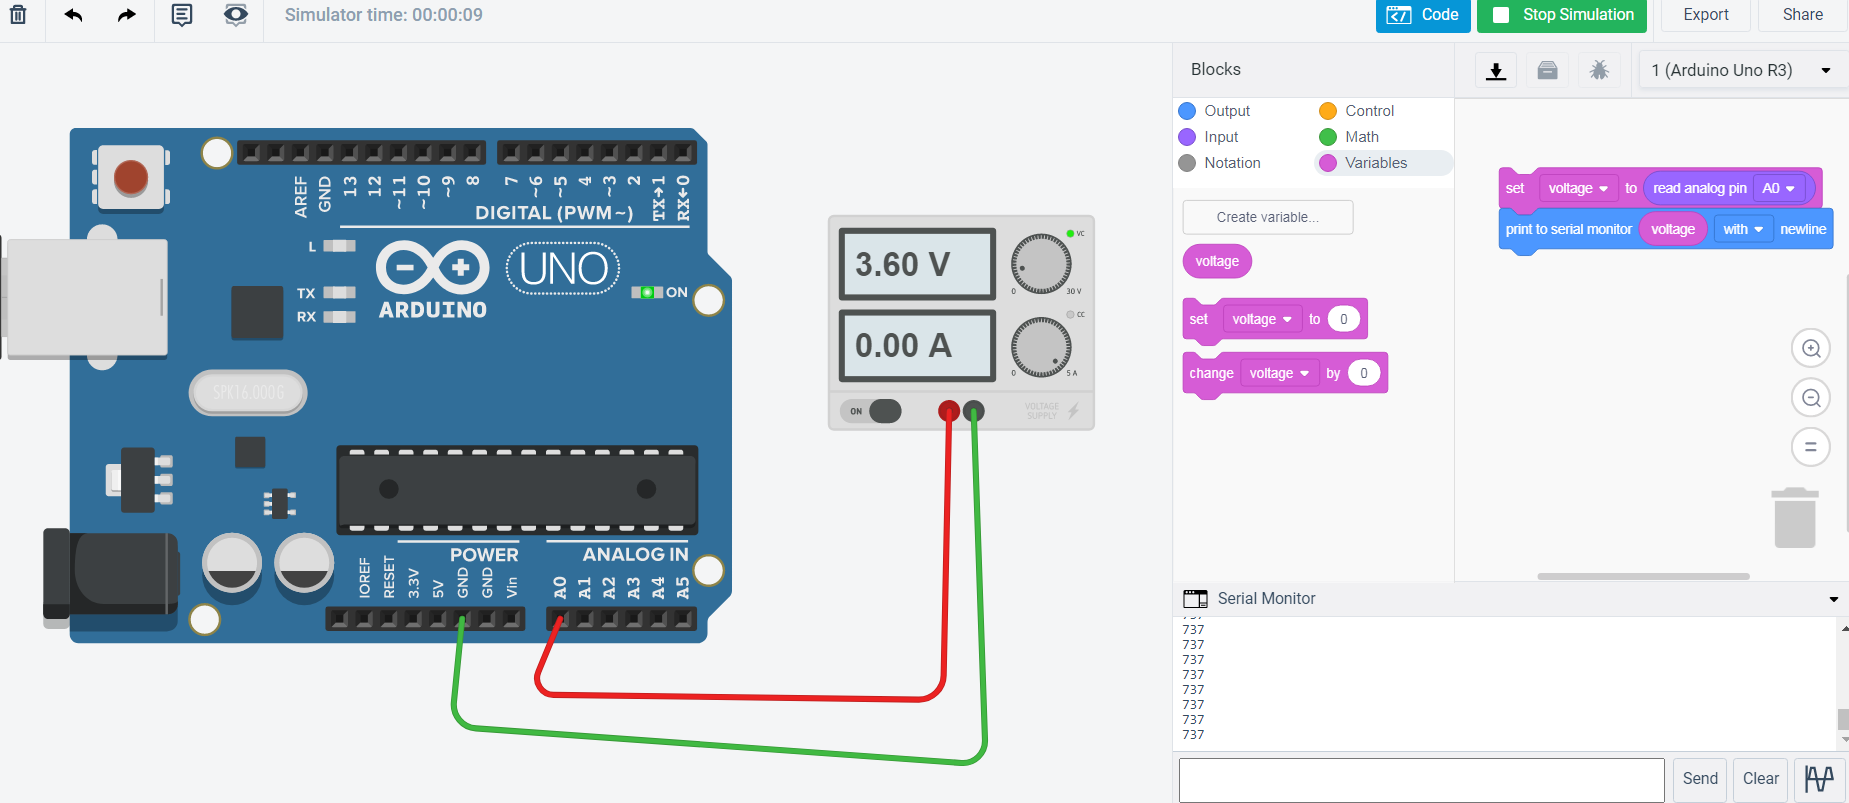

In [35]:
base64_data = "iVBORw0KGgoAAAANSUhEUgAABzkAAAMjCAIAAAC55DoxAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7L1pVFRXvv99Xz0vn77Ps9Zd/37+w+17u2/69k13ujvp9E0n0cyDxllUnILGMcbExKgkUWPilDjPY1TECXEeIEhEVAQBmWRGBgGZBQScojEan1/V77A5tavq1KmqU8Up+H7XZ7FO7bP3PvsMBfJxs+uf7tz90QxUVDdIJcADcBkNAZcRAAAAAAAA0N24efvuE7tL/q9NRcCeJ3aX0vWxuVx37rx0Zvrvot8F3ZCXznxKD4D6eSAcmoTbd+7W1DVJhd2WmvpmuiBSIS6RGr5EcLVdClxGQ8BlBAAAAAAAAHRDJEEJ1EjXipD8HehWSA8D4cwkwDAIcIlcwpcCrrZLgctoCLiMAAAAAAAAgG6IZCeBGulaEZK8A90K6WEgnJkEGAYBLpFL+FLA1XYpPL6MpRXVSWnZbkFNpE58Sv315rLKaregJlInOsHTCAAAAAAAAOiGSHYSqJGuFSHJO9CtkB4GwplJgGEQ4BK5hC+FG662/nqzZOsIj3WYBG6MIXh2Gecs2fxs7xAPoIZSVz4i9lzKhp0HPYAaSl3pAU8jAAAAAAAAoBsi2UmgRrpWhCTvQLdCehgIZyYBhkGAS+QSvhR6Xe3OA1GSpxPQLqmyB+DGGIIHl7H+erN0Q93CD7Nrb7TelAysW1BzqUOX4GkEAAAAAAAAdEMkOwnUSNeKkOQd6FZIDwPhzCTAMAhwiVzCl0Kvq5UMnYRU2QNwYwzBg8uYdOky38RT55KlXRpQZW5FzaVdhlNaUcXWtaD4qrRLA6rMrai5tMsleBoBAAAAAAAA3RDJTkr8y/bi87V3H3sd6oS6kjo3P9K1IiR5B7oV0sNAODMJMAwCXCKX8KVwz9VKYk5oPnWhZ+DGGIIHl9Hjm8it/OZqv9t7TJQkpWUv2RA+Ycai4VNm8zBog15SIe0S1aiJiV3t7RvNDY2tt+3KvacgIuz4yrCYmBqpvJNobapvbpULAQAAAAAAAOZDspMS4+PrHj9+3PbTo2cPlL9x/BptL0xv+pftxTnN9ytvPXhiTxm9tMpY16GupM7Nj3StCEneuWRW9nfVPzYql0AzVI0qS82BqZAeBsKZSYDvEuASuYQvhZarvZx/5b3p818fNuWVoMk9B04gXh48ibYF9JLLaZuqUWVqInWiE8NvzOzZc6QSE7Jl69aCQgff8T3Gg8souVp6OWHmIg2EnOVW/nG1Ecd+qL/e3NB4I/xgdN+Q6XxoZ1AFqkaVqQk17ERX23gt6/jR6DUWc3p8ZfjJHVFpeY3tcrbonLUwIU9V3yBM5WqLDlgGc/JIsVTuc9pqsg8cOmm5yGHH10ScPp5TZ1PhVk1aTGz7rYkOjyuoVu+VcFG5KS8hflO4dW+Y5S4XNav3SmhXvl1fdDE8god9cquLrgAAAAAAADAYyU5KsIqtuPWAtv9lezFtDzlVTdvrclpOlN+mDXppNY2uQ11xny6IuhHb8vCe0uhhRc2NUXvs6rji05qHj+/f/dSu3F2ka0VI8s4lNT/qddmU6h8bpeYueSkzNuH2nfvc/uGd6ubYafFyHaNwfqzFYc21BfV7XrKt7zELm+88flx72K5ckz1RbbWplcvsyo1EehgIZybBGMNQEfuBnf14tve2NKmaufHtJVJRlbQvdPzkF+gS9Z88fGZ4UoVSnrYq5NlpsVW2lU0FXwotV6uxRq0zPF671sAbk5yS8uc//+Wf/knvlOFOpGfPnv/8z/+8bNlyqdxjPLiMkqv9dkO4uJsOoQpck1/6wdXygrOX84vtLe2cJZt2HowiaEPaRZWpiWjuFoY8jY3559a32731e9qNbVhMzDWrrq1J20EvD6VV2rYyAndcbb5VGUemGjWMyoQYS4dRBe0lNfGHaDCx8X4WxzVpWy0X4fiaPXTxFfUZkX+jvULN6UjL3pXhJ8WtWR9V0Cia26BduTU7Rumf9q5nCRuZerWjuRoXlaszTlv3WofNe/ck+sDmAwAAAAAA4BjJTkqIabPZTfcrbj2gjdb7j8SqCLRBL3nbZXS52qi2Kz8/fnz/fmz+9VGnr2+9dr/18eN7LW19pWquMI+rVU5ed6TmLki+UPbw8eMHtQmVkdMywzbX196ki3f7wljrXovxfFC4UF3fG7SOteH0PbpPGdPU9b1An6vdk/rg8c3mPe0vYwvonrfFqioYj/QwEM5MgjG+y+pqF/zQ3NCoxm3d4QFVx74yym/69hK1QwN+ofeHcw+kF1Y0N5RkR8yb/kL/rw5bdW1XcLX115sXrd3xbK8QYsKMRRpwHapMTaROdGLIjamprZs9Z84/tUfaa0J69uzJQ+350kvJKSnSXg/w4DJKrra0onrngagNYQcdQrvEh4lxKz+4WiL8YDQfTtAn5BNWsQJ6SYVSNWqorqMTI57G4iNW17Y1QczqbUqLsnq6Qxn1HdV8galcbadwO/sHy6Ve/0Nxm7WkMSfe4lgjLpZwhaIEy8s9Cdm3rC+bCyIsNys6qv2/2mzQrlxvde5hsfH1PGO6KsYqdvdkOVr2wUVlfmaEU25KPGHZuyPZyB9aAAAAAAAAaCDZSYmF6U2Vtx7QVy/hTqTO7Sjb2vT48c/3d0V1FPYtf/D48aPUlI4SPXQTVzvteuvjx60J2R0lL1VWPn78U1apZdtYV6t9LGPxyNX6A+lhIJyZBEN8F7vaJWl25b4n0Fxt/ndBIX035KtK6k/ODHl2UXJL13C1hL3Iiz2nKMVT55IN1Hbe35hTp2J/85vfsPrkGLu8gC946qk/K2O1ZvYcb9dt8OAySrdYP97fdJ18u97BVF/1urQCKpSqEdRcquYSA75N1KRa53XaCtOatHDLNM/EbNq2kaQ1VmcXE1NU0P5n+ye3xhRU371ZknFuK8+vDI89IP6KX+n8XCa/JGx6s3O19QWqpRionxqrweSDdrA1ocZa/3Z9cVqEWD3gUEJajfifuvaeczL2RNCGagAdezuIyFc14cHwOKOyisQ6ABHxMWU37jQWRR2NtrY6uelEqs0f/qsGv4YqFzeJXW2NVzOL+Vwkrkbtofpq98pLMcScrre8LDlrOdb6sx0fVZcdY+l/axJfgZv1ZUV57WetXflGlnUm7ImsG+17q5OstjpG+eajHqSLysVWKRyhmpPLJZFpWuszAAAAAAAAYBySnZRYmN6UUHtXKnTJG8evSZ8kRp24drV72q48fnyvoVkqzP75UUU5r3VbNrXkfuvPbDUtyyOo5ttWrat5wCsn3Lt590ST2tWqWv38MDu/5omOVi6QrhUhyTuXWI/qRqTm2lidZuPpZFVh8p59tSmbsy+UKf1Z0i40l4U1N97kood3ymrD2pcssFSuvp5SZpk2TfmpujmWZ+aqcX4s2rZo08e3L1jLrb3Vxxc8+KmjtwuRCXepuSU37+YstK6cIAvZ/MKbj++k5tvvshl2QeUGy7CrarnAGm5lOW6Hur0Um9p+xPsPaqNyp3M593y6vLD6oXXfw9ascjeWTZAeBsKZSTDAMBBOXW39yS/GPTstqoxftmavGhHSd2l6i+JY9509ti6kf8izvce9NS08yUZQpH8388NXeltWCQhZFFvYyOXVh6eFfLA1IeKLyS/0/upwRfYSlV354JjiAD3Gt5dIwTLm4XvL1YUN+elJadXtrjYqLSn8g6BxlmsyfvPZjmvSXEjXylIe8sqIReFp7VNR07Y923vzyXObLZdxFZsoUZN6WHeyRPRgAHwp3HO1E2YupO1D0WcI2qCXXM51OsvV1tTWTf3wQ8V32uU3v/kN7TWJt6WhLlu2vOdLLymDs8uf//yXU6dipVb68eAy2rtaKklKy5awX4nY+5uuh8PR8XwgNeNnKA+ePbRLqkxQJ1I1bYz4NtE+r/ZsqeNZtA5crQXV3+wfX7/HYgk7/hxeGE+3XG37agDrD8UfiIrlZRmsUzUbMs8mHGBDGh4TEZMQlW85a7F0g2ok0QeKeOKnZGMlV1uZGJMQEWltEnH6QExCokWVOnK1FjrWE6D+1+/hFQZOKk42qkCxmY6WMjhSzJNSlSscnmF/s/igp5NbRYlyhQ8UWV5mRlm21VNflenAamcadjrR+rNKuzJvq01u+71gwWozSBeVbW6iFfsbDQAAAAAAgC+R7KSEhqt99kD5+dq79p8YxivY7r7Spi7U5WoT77Y+fnylyK68nfHXfn78+FF9TcvU0zWzSyzLI7TWNLB4tUykffyo4lrz1NP1W2t+tkjbdlfbt+j+PaVV/dYGS7XUzDLRpzbStSIkeecSqxF0I1JzFxSV3recaMbCZMVFtjNnbOaGsJY7jx+UhmVumGzZOz2s7afHj++U1VpWMNjX3Hr/8U9lVawpWey2FlTRrsio2xbFWV1vZzCdHouQXa3o7XCbpbf7D39qbLmwLHPDstpaSyctkVRTn6udvrnFMuysyrD23n7KKnr3dxeWTcuMzXrw+GZL7LTM1SMt8lflauMt6yE8flAbVbRhWm586r2fHj+sPXxJ9Pz48cPGhNKwaUUXCix6unKf7hV+pYeBcGYSjDAMmvNqaVf/caE/1NN24d5Zz/Zfd9b6y6zF1fYeN3xpfGFFc9Xl2LkjQp4df7SQm9QkhPYPGTwvNtuySkD6qinjXpgWa7W9Flf7Qv/JEzbEJyVll7X+2NLYnL139rNTjmY3Njd0/IrtIb69RAo3kxaNe7b/VxGXLRdEwuJq+497a+a+tJLmqvz4BXRNZsY3WHdZLx21qm5oLE/b+tULvWdFsIS1uNpxr4xfGfFDelK+pc+yY1+90H/2qqRyqnl20YfighsCXwpPXC3/OTxtmMHV7o888M///M+K6dTM1A8/rKm1/Xwh/7Jl61b9Q5Xa6sSDyyjdYo31ak+dSxatCC70qau9nF/8ctBkMQDB+rADUk0B7ZIqE9SJtGCCNoZ8m+hYrzYsOjwuI+/aDZsZoDZiTjGJ7Qsm3K5OiuWGx8t4dmeDddXX9omf7rjaPF4NIK6Uazby1E4hBGU/KP0Z/u2r7CWV1QMUV7v+RNbVZhpY++ekqbBbA8GRq91zLpNnzt4qOsAa+kSWYrR5wYGwc5apx3dbk62LAIh1JJTBK4tI8Eq40ccVdauGD6pWnMoVtk71VfQrbzM2w+alhNsXitWuzNvtU5Kt2N5Z9SBdVK64aHlgwhOs527lWuomKoGrBQAAAAAA/kKykxLOXO34+DpeqVZysgTVp/IZSQ1Sobeudk9LtnXWrZgVa1W3P8eepu0btrvK1jU9ane1N7KpVlNL+666WBpdS5vOqbXStSIkeecSixl0J1JzV0yfVlnJc07vP6hNrY1Sf7CYxUuKNRCycxptDOz0fW3UqDLMss0zYRe371p2mi6Rg8UTNI4lu9rGjgPFFlCDuxkjlZeLLZ3fy5mm19VGZT34qfF6+2zZ+JTqjsmz0hoIHa52lmW5hsbTVjlrIT7eMgbrUrbWnlUrOZRXtk/L1YX0MBDOTIIhhoFdreQ6hLotO/DVs0Hb0ioSQtulLWFxtSHtcpYoORrSexw3yd4wucPbEjXxn/QOCf2hmV2t7QICAbcGAlF+ct70F3qHvBA0K3RrfLZqtUOLqw0KF790N/ywpP3z2Yojpk0PjRYTh9OXiHnEFle76CQ7DaIxYW7/kE+ihQi2LLng/YxjAV+KruBqf/WrXymO01X+/Oe/dJaunT27YyFdl/lg6lSpuU48uIzSLeYZ0/ZYdafN1Fou96mrbWi8Yb8ELaGxrIHDBROoE+pKqqmBUd8mGsvSItTrDOw53fEn/LZGz2oS24UmwZJO9efw7EwVzefuGghqpLY2DX+8U2R9qf4zfMXe8noC7T1fE3tldLnajr2309iE5gjfqtKsrVl7LNvq6bG8N97VJ12qOlFwx9Xa4p2rtcFVZdu52I2lUVZBD1cLAAAAAAD8hmQnJRy62t1XLJ6PQhvSWgfPHii3aLGfHnmyBoK2q7Xuzc5RlZy+Xc/17Rp2rFdrt2tZg9C4rpGuFSHJO5fwhdIfqbkuLmzdXF9araw50PFH/WpX+1Jto8VRZqpadWhKi+Usq+rYZV2aVmVR1Tg+luxqVb2pd1k4fFsRwfpcrUSHkHXuaqdHtevg9l3vhtED6+qgepAeBsKZSTDGMFhdrfTZYi0dFcojxoe80N8yPVZIVTvHKqxi9eEpkpBtjv2C/8DfugaCrXkMQFdroaUi+/CGJbxSwfClyTx+eb1ai4dlVythWUhB5WpVdSwvv+pQt3dvnl0k1kYwAL4UAe9qiZraug+mTlU0p6v0fOklqbkf2B95QDm8qzz11J87fQ0EnXh/0/VwOb/4pcGT+FiC4VNmS9UEtEuqTM3dmlRLGPttoq3xalpCwg7LCqpE+5RVG0ln52rZqKp8n43mc8/VKuvPti84wDh2tY6UpdpySj07wK4H2yZ8OFX/diZUpVmV07RHawBWAtTVqudiW+FFIfa0fyQaAAAAAAAAPkaykxKSq/2X7cXZTfetnk6eOcuwxnU42dZbV1tEx314PlFdaFnftt3V2uzqcLU593gRW9vc39VeUxvpWhGSvHOJckDdkZq7xUuZsZa/92+fN6p2tQ7sZ4emlF2tdTXYxqgkVYkdtsfyoaulAyXcvqM8c9a4crXyEQlxKTQOqgfpYSCcmQRjDIPGGghWrFNEQxYkdZTYOVaLhw2xLOSqEpHtWCRm13K1gqqkbSH9QwZb3bSWq20sPrl00WDL2r4KDl1tww8rRYUODLo+BF+KruBqmVOnYv/1X/9VUZ7WUMn+yAOzZ8+Ryrds3Sq19TXqmb+0PWrUaBoDDU/+bLHZ+GwxB8SeS+Zjqdl5MEqqRlChVI2g5lI1l/jm28TNkrNWx8fqzUbS+dDVNmbFW3aFxUQkZKXlZKclx1ttYAC52ujwmIQDNlzMdLEWDHcSG99RTTkL9Xq11kV7lQrKsNs/EEyNdmXeXvOD6j8DlEvq4APB9FRuqymKibOc5vHk0npeEUL1WWQAAAAAAAD4FMlOSkiuNqfZIs3afnr07IFyUSj4l+3FbNOe2CMvCKvL1Vo/W6y1xlYBi88WswjZR6mZql3n292uVfKqp9zazqt9lJpfM+q0mqpn22tqI10rQpJ3LuELoj9Sc00WL6xMiSrdalNokY+KKhWCkrat82ptPxnMImQdu9q5ktC0oH0s37nayCzLnczZnL3Y+kloaj/rzNVa59V2rLpgQc9B9SA9DIQzk2CMYdB2tdaPFBs84kP1ygZ2jjV7VX/2j5Z5tbafvlV/clpXcbU1xbzSrrowaamiU527WsvE5MGL4guVjxlXXQcH82rXxdbYTHBuaFQ+nNx7+FJ0HVdL1NTWqZcaUO9Sm9y+ffuqd/ka9aRaGp56EYaePXtyOW0kp6SIco/x4DJKt5hefvLVygkzFzmEdom77P1N18/l/GJpMYSXgyaHH4xW16GX6goENXF3Ri3j/dOofL6/srJqO2rHaiNJfedqa06zaRWLDEhtbRq2r4GgOq7jNRD842obMyzrxobFxteLvTq5GmWZxcxjZooOWIdx2tpVyVnLJ6qpP+MrO8YyDGU5YFu0K9/gJXRVOlW59Y60r1uV79y9nW1da9jRh6cBAAAAAADgEyQ7KSG52nU5LawUdxXJM2cJqky71PUFulztprKt1MHP93cd7yjsW/7A8mlgKUUerldrbSU+gsxCVN34A+3brpCuFSHJO5fw5dIfqbkmiy1S8mHpZvVHY5VaPgHM3tV6vV6t9rE8cbUj62308UvllfftXa1KPVuwfmiYK1frcr3aLuJqszd8+OyI8OzG5AX9Qz44oJhWi2P1aL1aB652SpT1k8e8xbeXiCmJotNccI7ORRRalynQdrXy5S0OD3Hiai3XavKSJFX/jfX86WSGwJeiS7laJjklheerSuU1tXViHqu0y6eI9Rns5/P27NnzV7/61dKly6Ryj/HgMkq3WOOzxRiqwDX5pR9cbf31ZqKh8cacJZvEMJi+IdM//mrlhBmLaEPaRZWpCbeVOnSJAU9jxUXrp0KdjMhpX6BWzKsNT7B8aJU3rlYRmtHHy9jA3siMskg9h66W55OGZ/ByvTdL2KVKrlYsUNtaEGH72WL1GVa9aPPZYv5yte2fqLY+qqBded8oOht/pEhZerit8WpmcY3NJ7a1o3yiWlRBo/VlY068ZYKqchY/3im2zlcVH3HWzGct3O7N+rKiPOU/01xVVoRyTMw1vhdVfMH3ZLVyc5tBuqqsoinvrPXz5fZYnxYAAAAAAAD8gmQnJSRXS4yPr7NKxcfZTfel+bOVtx5Q+ZBT1epCRp+rLfq/otqu/Pz48f37JzLrR52+vvXa/dbHj++1tPW17rXK2Uf1NS1TT9fMLrHsam33s5aJtI8fVVxrnnr6+q6Gny3rHrQvSsu7uNXUzFtX7j++19TSgw/nCulaEZK8c4n1UrkRqbk2L1lV5v17lQmVkdMywzbXllbTuT6sDLMaVeuys3eySjfMylz8u+jpYW0/0cuyWkvNfc2t9x8/rq5ldWuxnI8ftmZV0a7Iw2136JXK6ipoHssTV8v6+P7djGWZG5ZVlTZSb/auljXrg8qo0rBllTllludL+NkNCXSbH5Ruztw6zSJ8O1wtK93HD2qjijZMy423rtXQGGVVt4HoaqX1apXpnFYJy3ay4YclL/T/6qT111WLY+09LmRVQmFFc1V+/IIRIR1+tiYhtH/I4Hmx2RXNDSXpq6aMe2FKlHWXA1drXV3hq4j85iqvZ4/69hIpNKet+vDZ/rOXHEunE28oyT+5YfYrvZWPXHM+r9aymO8L0/Yl5VeXXY7/bsq4Z52tV3v3Jve/KqmcbkFZWtTcEeNCOz5qzFv4UnjianceiCJow5yulnG4nkBBYREvRyCV+xSePOtQyG7ZupWGJBV6gweXUbrFpRXV7OKdQRW4pvc3XSelFVXf7T1WUGyZ2FhWUf3t+nD7FWwFtIsqUDWqTE2oITUXXenEiKfx9tUkq2sjwqPX74leb/3YKGPWq73bqsjZsJOqnh262h8reeZm2PE16prC1SrTbC17w5MtnYslUy319/BRog8UsUx07WqV87I2P25ZcMAbV2v5jDUe3srwjjNtV7fKJ3E5nnZaz1ZUfRZCQBOKBeZuLSpWJXYVORt2OlFZQkGz8t3b7IVt7kWk+HA2aZDalS1UJ5+mAfNRVu45Ha9YXQAAAAAAAPyBZCcl7F0t8eyB8rafHj1+/Lj1fsdiCOxwK289ENXU6HW1m4qeOH3j/E2Lt7Pk54dXrt0YtUfsLZtacr/1Z973sKLmBjtcK1Xrah5YFO3jx/du3j3R1L4GgtzqUX3TzakdHbpAulaEJO9cwkfVH6m5S2yXc/3p5u2cMDGfNDk2S5GbYdaSZWHNjTet9R4/vFNWG2ZdVYCwWM7q6ylsQqmT6uuRfZVdNjg/lkeuNnr63Nra9vE0ptZXOloD4d2+RTnVysBozPGW3u6m8MhHlpdam99JzaWXKldLXIpNvWuRzpT7D2qjcqdzeSC6WkmAWB2ixa6+8EVC+9RO64eMWV9a1y7Yd/bYuhDLGqzj3pq2L029nGBN+nczP3yFOuk/OWRRbKGyy4GrvdOaH664S2+NpG8vkYqqpH2h4ye/YLlE4wZPWRKepIxca73akvgF1iYvBH31XVI2XYdnl6bLdRSaC+mqWj61zFJ5SXSx6kPevIUvhXuu9tS55DlLNvNcRdqgl1zOdUzlap3BKxJIhT6lpzVSoY/w4DKKW+zW/FOq7P1N10lpRdWGnQeJG60d/4eTlJa9PuwAMX7GQoK3qVBUoMrcqpNcLXG7viLr+NEYxbuFnVx/6Fx8cfs0W69c7Y93mktjTijecM2hxOwM66K0jlytZS5qQvwmqxZcExEfU5xlu/f21eR46xTg4zusrtYy7OLUPRGsFKnzhDQxw1SPq717IzuOT/nkEe9dLVFfFNV+pivDYyOSS9vn2NZYFWr08WInNrO+4ED7J6qtiTh9PKdj7RErdWkxsYotDY8OjyvoWF62Js3iefckqia0Oq9soeMK01nviEor4hm4FuwHqVHZAt/oNXtiIxKKKm/Z7AIAAAAAAMDXSHZSwqGrJf5lezGVP378+ET5bS6hDXrp8APHCP2u1lRI14qQ5J1LrLbQjUjN/YJkV4FTpIeBcGYS/Oa7JAxcZ9YozHaJTAhfCr2uNvZcSlJatkNol/fazp83xs/r1dLhjJ08q4EHl1Hc4iUbw9W3VVK39FK9lyp7f9N1Ilzt2YvpZZXVArW6Jeilei9V7mxXCwAAAAAAAACBhGQnJZy5WmZGUoNYBmHIqerdV9r+ZXux2Kum27ramh8ta/jqDFWWmvsFuFq9SA8D4cwkdJZhgKsNRPhS6HW1eggUV9uF8ewyvhw0WbqVxPApc4SupQ16KVUgqKHoxKd8t/cYi1c1Ecd+ELqWNuilVIGghqIT/eBpBAAAAAAAAHRDJDspoe1q9dNtXe2s7O906lqqRpWl5n4BrlYv0sNAODMJnWUY4GoDEb4ULlxtaUW1Q5FnD1UTK5l6AG6MIXh2GXceiOoT8ol0QwnWtc5ELTWhhlJXPuJSVn74gWjJwxKsa52JWmpCDaWu9ICnEQAAAAAAANANkeykxBvHrykq0etQV1Ln5ke6VoQk70C3QnoYCGcmAYZBgEvkEr4Ufl25VQPcGEMw6jLWX28Ofn/2s1Zdy6KWXopptmZA+Fn6KjbENFsvwdMIAAAAAAAA6IZIdhKoka4VIck70K2QHgbCmUmAYRDgErmELwVcbZfCwMsodK0JRS2jnk5roKgl8DQCAAAAAAAAuiGSnQRqpGtFSPIOdCukh4FwZhJgGAS4RC7hSwFX26Uw9jKyrjWnqGVY1xoragk8jQAAAAAAAIBuiGQngRrpWhGSvAPdCulhIJyZBBgGAS6RS/hSwNV2KQy/jPXW9WqlQlNxw7perVToJXgaAQAAAAAAAN0QyU4CNdK1IiR5B7oV0sNAODMJMAwCXCKX8KWAq+1S4DIaAi4jAAAAAAAAoBsi2UmgRrpWhCTvQLdCehgIhybh9p27NXVNUmG3hS4FXRCpEJdIDV8iuNouBS6jIeAyAgAAAAAAALobN2/ffWJ3iSQoAUNXhq6PzeW6c+elM9Mlfwe6CXTr6QFQPw+EM5NQ29Bs+F8DByJ0EehSSIUMLhEjLhFcbZcCl9EQcBkBAAAAAAAA3ZBnI69KjhIwdGWka0X0PT9HUnigm0C3XnoYCGcm4UbrzZr6pm7uIrUvAi4Rob4IcLVdClxGQ8BlBAAAAAAAAHRD9hc2/99br0iaEtA1oSsjXSvieEXSkzHjJIsHujx00+nWSw8DoWESbljnS9bUNVGdbgiduMuZs7hE6ksEV9ulwGU0BFxGAAAAAAAAQPckPL/pD3tKfxuOxRAs/HZXCV2NXflOF9M8WH7+1fgZL8Z9LOk80CWhG023+1BFgvQYMC5Ngv1Srd0E/SeOS8TA1XYpcBkNAZcRAAAAAAAA0J2R1mbttui8DvZLl4IuifaNhkkARgFX26XAZTQEXEYAAAAAAAAAAADoByYBGAVcbZcCl9EQcBkBAAAAAAAAAACgH5gEYBRwtV0KXEZDwGUEAAAAAAAAAACAfmASgFHA1XYpcBkNAZcRAAAAAAAAAAAA+oFJAEYBV9ulwGU0BFxGAAAAAAAAAAAA6AcmARgFXG2XApfREHAZAQAAAAAAAAAAoB+YBGAUcLVdClxGQ8BlBAAAAAAAAAAAgH5gEoBRwNV2KXAZDQGXEQAAAAAAAAAAAPqBSQBG8U/0MAEAAAAAAAAAAAAAAADoXMwyrxYAAAAAAAAAgAb0+9vNm7cBAN6DdxOQwCMBzANcLQAAAAAAAAAEAFAJABgF3k1AAo8EMA9wtQAAAAAAAAAQAEAlAGAUeDcBCTwSwDzA1QIAAAAAAABAAACVAIBR4N0EJPBIAPMAVwsAAAAAAAAAAQBUAgBGgXcTkMAjAcwDXC0AAAAAAAAABABQCQAYBd5NQEL7kWgj2phbAPgG6wNmfd7gagEAAAAAAAAgAIBdAsAo8G4CEg4fCauivdVqVWktrTdpo7UVAN9gfcb4eYOrBQAAAAAAAIAAAHYJAKPAuwlI2D8SbW232dI2NbfW1DdV1zVRHQB8R1VtIz1p9LzB1QIAAAAAAABAAEC/yEkqAQDgGUa9m9rabkklPsJvB+q2SI9E202LqG1ttYja6rpG+qreC4CP4OcNrhYAAAAAAAAAAgC4WgCMwvt3k5/nWooJd9Iw7GlpvUnViIbGG/6BD9dKQ7MbjISZx0YXWf2S/xS9peUm3WLqQb0LAJ9CzxtcLQAAAAAAAAAEAJJKAAB4jJfvpqbOmGup56AsQ+mrVO5r6IiNrpSomcdGSI+EdQnRm83NbdV1TepyAPwAXC0AAAAAAAAABABwtQAYhZfvJp1TXA2HDkqHlgrVdIoMZVjFSoVqzDw2Qv1IWD+R3zKptulGK77xAv8DVwsAAAAAAAAAAQCUAQBG4c27qa3tVifOtaRDa6xd69JI+hSXrlYq8SduulrLSrU3WtqoFb7xAv8DVwsAAAAAAAAAAQCUAQBG4eW7qRPfjNqHbmi8IZX4E+2jm3lshPrCClfb2NSCb7zA/8DVAgAAAAAAAEAAAGUAgFF4+W7qxDej9qHhap3hrqttab3VfMOy0C2+8QL/A1cLAAAAAAAAAAEAlAEARuHlu6kT34zah4ardYb7rvYmXC3oLOBqAQAAAAAAACAAgDIAwCi8fDd14ptR+9Bwtc7wyNW2NTbB1YJOAK4WAAAAAAAAAAIAKAMAjMLLd1Mnvhm1D92VXG1N3fWdkSePx56nDXV5QnLmviOnvj+TpC50CVwtCCDgagEAAAAAAAAgAIAyAMAovHw3deKbUfvQbvnQ8sqadTsitUnJyJVaaWCsqyUycwr3Ho7ZGXmysamFS+ISLm3ZfSQhOVMSuC6BqwUBBFwtAAAAAAAAAAQAvlMG2bn5L/d+52xColSun4brTR/N/GzRshVSOQDmxMt3Uyf6O+1Du+VD9x05dezUueLSSmckJGdu2X1UvxU13NUSjU0tYftPHI89n5qRl19Utm5HZF5hqVRHD2ZztdevN63dtCUnt0AqBwayOyLydPxZuptSufmBqwUAAAAAAACAAMAbZbBo2YrfP/03wfOvvzn/26XlFdd4L1wt6G54KeA8a56YeLGnKps2bZYq6EH70Pp9qNXDHim4cvXQyThn8LTW47HnpbbO8IWrJWgMYp7vzsiT0l6dmMrV3rjRumz12o9DP6+trZd2eYDOb+B0Ujv3RKxYu76pycMbEXBkZef2HRocd1bvA2we4GoBAAAAAAAAIADwRhksWrbijX4Dj56MPh1/jog4ePi1vv3fnfh+VXUN7YWrBd0NLwWcZ82jo2P+SZXPP/9CqqAH7UPr9KE1dde37D6akJyZV1hKX52RkpFbXFqpfyqrL1wtDUOIWoaGJNXRg39cLTXMKyicNffLhMRkaZea2Lj4oNEhxSVl6kL+Ljpq/AT+tqwfnd/Am5tbvlz4zdQZs+rq3Vs+whk8YII21OX0g2DQyHevVbl3FhrQqan/r/FPzz3//ifTU9MyxYTZsqsVn381/289X3ny78+NHDch7ux5sevw8ajREyZXVFbxy0ABrhYAAAAAAAAAAgBv7JL9L8/fx55++sWeF1Mu0TZcLehuePNuIjxrbh5Xe+hkXNj+EzV11y+kZGmTV1hqXSL2qFgxVgOjXO33Z5LOXLjERzx48rTkavlTxWjwdBb6l9P1tattbb15/sLF96Z8yD5R49tpXf31yR9/sn3XHqk8PTP7xTffevLvz506fUbapY3338A9w8+udtO2Hfx/jfTDa9JHH/+t5ys8YbbsauXwsePoyl+4mFxQeOWbFauee/V1cTVqauupsv3VNjlwtQAAAAAAAAAQAHhjl+x/eabfcp/8+3M8+Uv6Vb++oXHt5q3Pv/4m/XrcP3hEzOm41tabvIsQM5j+9NzzU2fMot+NqVBytVnZuW/0G7hk1Rr+Y9u0jCz6bZkOR60++3JeUbEny00CYCDevJsIz5qbxNWmZOSus85OTUjOPHjytEtq6xq37D6iZyUEo1wtjS1s/4mdkSfzCkuPnTqnFrUEz/ndsvsojc2otXQJ9YX1wNXS90/6ljhr7pcnok/1fLu3hjm9cDG5z5Ch/J1TQEdcvWFTyKT3J3/8yfxvl964Qd9zO/Zq001crfoE2cDyoSMOHn4naKiYpFxX1zDxw2kLliwTU2u379rjwWzlzgWuFgAAAAAAAAACAG/skvTLM/1aS7/NTv98Nv8xrPpXfSqh8tf69j8eFVNYVLxi3YanX+y5Z/8B/r1XPYMpPTP7sy/nvdFvYE5ugdrVch3ROe2lOlQzN78gITGZfmcmAu4vUkEXw5t3E+FZczO42tq6xsjjP5yIPV9Sdk0/SZcu7z0cU3LVxdvWKFdLNDa1xCVcWrcjcsvuo2pRyyVbdh/RP6OW8bWrra6pq7EuPuvSnK7ZuHnqpzPrGxrVhVXVNfSNcfuuPd/HnqZvmGqTS11Rh/RNeNiYsfxtnIZ3IvrUO0FDf//036gV7RJH5Mo0Bm4r/S8abbDf5PKvv1kScfAQHY77ycruuKTlFde+Wvwtryrw7sT3Uy6lCfUp4E64Q3W5+HFjyFEIOinJ1RLiKJmXc+gni1iEly4sXd65CxcL330pPZOuCf8RSaAAVwsAAAAAAAAAAYA3dol+raXfddWM++DDymvVvFctF06dPtPz7d6paZm8i35z/m5neJ8hQwuvlNDL7bv29Bs2XMxgYr+wZuNm/p2cjsKqV4hagjpUuwP6bTx47Hv0lV8C0Cl4824iPGtuBlfL6896RkKy8m3BGQa6WqKxqWXfkVPSGJiY+ItSZZf42tUKtF2t+FYplfM33vTM7NKy8r5Dg3dHRIpdbCqff/3NRcuWn/j+VF1dw/exp//8/IvfrFh17kLSiehTA0eMpgp8RPqq39VSJ5/N+/rMuQvcyZjJU1g38/+3DRszNu7s+dz8gs+/mv/cq6/bf0IXd8IdqsvpKGpX6+VRCL4C6kt640br7K8XTPxwGl0NUUg0N7ccORElXf+KyqoBw0dGHDwsSowlMfHiP//zPyvvalWokHZJlXUCVwsAAAAAAAAAAYA3dol+ee4fPIJ+H6bfn+k3ZPpV/92J79PvzDy/VS0XqKb0C3BWdi7/SW9jY/P0z2er5yu1td2qrqmjyvw7+dffLPlm+cqh744pu1ohmvO82vemfHg6/ixVFuUAdCLevJsIt5pLitY+bklb7UN3GVdL4zx0Mk4agJqY+Iv6F0AgTOJq6TvwoJHvqlUs0dzc8tmX8yZ//Eld/XX67krfY3mb91JXT7/YMzYunl9SOe2dt+gb8X045VKaWKGVvup3terPGaMfCqKh9H9ydCA6nHCsAu6EO1SXS67Wy6MQdFJqV3v9etOuiEg65YiDh6Q6xItvvh1//oIoJ3hVhCWr1qgLDeTateqnnnpKeTOrQoW0S6qsE7haAAAAAAAAAAgAvLFL4pdnUVJQeOWNfgN5qpGQCy0tbfTbsvS7N+/dHRHJv3iLX/vV8K4/P//i8LHjqFsxLZehY4V++RUvgDtq/ARnf+gKgN/w5t1EuNt8ypQPFH9jl6eeekqqrI32obuAq83MKXQ2ndae47Hn6YykHhxiZlfL3423t3/+1feqD34kqCvhN4nc/IJX+/Q/ciKKXxLqI0qVpW/akqtVfzMXDXmX+v/kiLiz59XdMlyTO1SXix83hhyFoFbsYQX002Rv5EF12+bmFjpiemb2/G+Xvvjm23w1GPthGI69rvVG1BJwtQAAAAAAAAAQAHhjl8Qvz6KElQH/+kq/G9NvyPzLLZXon1cr4F+GZ8yey59LNnzsuLKrskBpa7tVdrXiq8XfvvjmW/QbtbQXAH/izbuJcLf5tWvVv/rVrxSLY5vo6Bipsjbah/bA1aZk5FKhQ6Savna1dMSdkSe37D4Sl3CJPwBNm7zC0u/PJNHGoZNxLufYmtnVbt+1R/1dkb5PDhg+cvWGTfx/WtSV2mDa968ukSpLmpI26CUV2utL0ZC++U+a9rF6F+/9vd2KsdwJd6gup7YuXa3+o4jyqJhY6rOismrOgkXBY9+7Wu7Y0Tc13Zg5Zy79qKIfWFxiPwxfoNa1XopaAq4WAAAAAAAAAAIAb+yS+OVZlKRnZr/45lusDNS/6ru1Xm11Td24Dz5Ur1dLhVXVNe9OfF/8iS4VquWv+lgAdBbevJsID5rv27efPY46U6Z8IFVzifahPXC1MfEXL6RkOUSq6WtXm1dYSodobGqhbdqQjm4PnQvVrKm7/v2ZpMB1tfwX+jxdVM2A4SN5MRnqiv0m1+d5td/HnuaXhPqIUmVJU9IGq1UNi8q79Mx45f+94w5FIV26BUuWjZ4wmX46GHIUglrRBeETJKgCVaMfTOyyMy/npKSlq/uhIw59dwz9JOKXfIXVw/ARrGu9F7UEXC0AAAAAAAAABADe2CX6NVWsV3uluIw/44UoLSunvfyrL/8mXGf9cDDader0mcKiYvp9+LlXX9+z/wD/VsyfBvPelA9T0zKpt8++nPdGv4E5uQXS7+S0t+fbvblVUnIq9fDV4m8LCq+kZ2ZTk16DgmibawLQKXjzbiI8a96jRw/F0Vrzq1/9ygOno31oD1ytfvyzBgJz7NQ56ej2pGTkSq00MImrtdeXFy4mP/1iz1XrN56OPyfYsXsvFbKQFX6T62uvV5uQmPy3nq+I9RP4v9PE4WiD1aqGRaVt/SvJrtm4mX4EqL+fl12tGPrumPnfLqVWRh2FWqldLd2dtZu38o8eekljGDV+gjCzPK+WftA0N1ukP+HrzxbzBXC1AAAAAAAAABAAeGOX6LdlMV2LoF/m6VfZouJS3ivJBV7HgJeX7R88IuZ0XGvrTd5F0K/in381n3r403PPT50xi39Ll34np9+ld0VEUp9pGVm0nXIp7b0pH1J94v1PplMhVwOgs/Dm3UR41jw3N1+9EsK+ffulCnrQPnTXcLWZOYXSobfsPnLw5Gm7wqPllR1/K6CNSVwtsWbj5qmfzqRvs7R940br/G+Xiim0AhayM+fMbWq6ofabzPexp//8/IvfrFh17kIS/8cbfa/mI/L6CdbPcjwXGxf/cejntEt8Z6YNPa5W/J/chYvJ9B2eDvTcq6/HnT0vKgu4Zt+hwQeOHEtJSz96MnrYmLHCohp1FGolTpApLinrN2w4C2v++MpJH32cmpbpsJ9L6Zl0UOGvAwK4WgAAAAAAAAAIALy0SwAAgZfvJo+bf/75Fyxqe/ToIe3Sifahu4CrLa+soWNJ82oPnrTMMFWXsL3dGXmS10xwiXlc7YWLyX2GDOX/5WLnKJamVXPo2HFexFbtNxmqHBsX/07Q0N9bP60x5nTcoJHviiOmXMqgQtr1Rr+B67d8N/njT9x1tUR5xbWvFn/7t56vPPn3596d+L7GB0JSzaWr1/L/7dFX2qYS3mXUUaiV5GqJ3RGR1DApOZW26WJOnTHrT88977AfqqmeeBsQwNUCAAAAAAAAQADgpV0CAAi8fDd50/ypp5761a9+latSb26hfehAd7WNTS1bdh89duocbYftPyEObe9q4xIuUWWqczzWwUxMe/zmal3Cc2a379ojlQNfEKBXG64WAAAAAAAAAAIAw5UBAN0WL99N3jSPjo75/PMvpEL9aB+6C7ja788k8VRZ9VCpkEq27D7CL2mD65RX1sQl6PrbdvO4WiI2Lj5odIhYqhX4ju9jT4+eMLmiskoqNzlwtQAAAAAAAAAQAPhCGQDQPfHy3aTdvLKy6v/2Ivv3R0odqtE+tEsjWVN3XQhQd8nMKZR6k/De1UqIhWuLSyvpZUJyJm1v2X1E/zK1AlO52hs3WpetXjv989l19delXcBAsrJz+w4NdrgGrsmBqwUAAAAAAACAAMAXygCA7omX7ybt5hUVlbworWfZvXuv1KEa7UPr8aE1ddeLSyvdRY8eNdzVEnTcvELlUxCJlIxcnlHrLqZytcT1601rN23hz+ACPmJ3ROTp+LPqtWsDBbhaAAAAAAAAAAgAfKQMAOiGePlu0m7e1HRj9+69HnPlSonUoRrtQ3vmQ43CF67WKMzmagHQAK4WAAAAAAAAAAIAKAMAjMLLd1Mnvhm1Dw1X6wy4WhBAwNUCAAAAAAAAQAAAZQCAUXj5burEN6P2oeFqnQFXCwIIuFoAAAAAAAAACACgDAAwCi/fTZ34ZtQ+NFytM+BqQQABVwsAAAAAAAAAAQCUAQBG4c27qa3tVnVdk1ToN+jQNACpUNDU3CqV+BPto5t5bIQjV3vzelNLJ95r0G2BqwUAAAAAAACAAACuFgCj8PLdVFPf1CnmkQ5Kh5YK1VCFFhqXXbkfoONqXxMzj42QXG1r660bFlfbWl3X6LItAAZCzxtcLQAAAAAAAAAEAHC1ABiFl++mpuZOUHh6DtpqkZJtra1OJ976CDpiY3MrHV0qV2PmsREOXG1LW2Nzy/XGFuha4Df4bQ5XCwAAAAAAAAABAFwtAEbh/bupyTrFtaq2kbryA9V1TTon8/Ic0sbm1obGG/6BDkfomTNr5rHRRRbbFlfbdutGy82mG5ahXm9s8ee9Bt0Wfps3NLbA1QIAAAAAAABAAEC/yAmVAADwBqPeTRpLxxqL3w7UbVE/Em1tFlqUjxdrqW+8UdvQXF3XaKUJAN9gecDoSWtovAFXCwAAAAAAAAABAFwtAEaBdxOQkB6JVuvHi91oaWtqbrtu1bX112/UXW+ua7hR10BfATAWy9NFzxg9afS8wdUCAAAAAAAAQAAAuwSAUeDdBCSkR6Kt7RbBurb5hmXdhsam1utNluVrGwAwGnqu6OmiZ4yeNHre4GoBAAAAAAAAIACAXQLAKPBuAhL2jwTr2laLrmVjK7DYNAAMRXm66Emj5w2uFgAAAAAAAAACANglAIwC7yYg4fCRUHStxdhapG2Lwi0AjMbyaNEzZnnS2m7B1QIAAAAAAABAAAC7BIBR4N0EJJw9Em1qY6tIW8tLAIyCHyp+wLgErhYAAAAAAAAAAgDYJQCMAu8mIIFHApgHuFoAAAAAAAAACACgEgAwCrybgAQeCWAe4GoBAAAAAAAAIACASgDAKPBuAhJ4JIB5gKsFAAAAAAAAgACgoroBAAAAAF0buFoAAAAAAAAACADo97fHCIIYkYqKijIEQRBTBq4WAAAAAAAAAAIAuFoEMSoVFRU/IQiCmDJwtQAAAAAAAAAQAMDVIohRgatFEMS0gasFAAAAAAAAgAAArhZBjApcLYIgpg1cLQAAAAAAAAAEAC5dbUbZrbXR1eM2lLwyN/uVL7NpY1109eXyW8puxBy5VZVce35BWUSfvPVP5K3/fdn+PrUJC29Xpyq7Eb8ErhZBENMGrhYAAAAAAAAAAgBtV7v0WNWQleWvfFP/5sq23usfEG+saKOXg1dcXX68WqmEdHZqznxeueu/G7b/+ubuXz+ItEAb9LIi/O+1Z+colRDfB64WQRDTBq4WAAAAAAAAAAIADVf79vzct5Y19N382CFvLa3vtSBXqYp0Xgo2P3V9528eH/r/HNIQ9pv8zX9WqiI+DlwtgiCmDVwtAAAAAAAAAAQAzlztm1/nvLnyluRnJd5Y0dZ7YZ7SwHXytoXMChbsdKNhQaGy5VG8bG7q5G966tbu/yH5WQmqULDlr0oD17G5TXPiryvFnqaxMK9R2dQZywC2BeYtg6tFEMS0gasFAAAAAAAAgADAoatdeqxKY0atmreW1q84oWMxhMJwSfwV7JwVHBJeoLzSiJfmLoDFn8vUnPlcY0atmoaw3+hZDKExfhndJtXlsnpbN6y6HEuH88/C1SIIgnR64GoBAAAAAAAAIACwd7UZZbeCVpZLTlaDwSuuZpffVho7jmP7ZtG1rkUeXK3j3KpKrtz135KT1aAi/O+3qy8pjR2m8ewc+2vlsFB34GoRBEFMErhaAAAAAAAAAAgA7F3t2ujqV76pl4SsBq8srtvwfY3S2FGcCjuLB1x22rrD4m1V8zfbX1q0nfL3+O0vt8Vb7CEXCqMnHaL9pdS8S6X2/IKG7b+WhKwGDdt+XXthsdLYUXR5Vau6tbukbFc7rjZPoLZ0qJRY7rLl5c6zp+d3VNDsTXkRWIGrRRDEtIGrBQAAAAAAAIAAwN7VjttQ8ubKNknIavDGirZJm0uUxo4ieVhVrp+er2g7J66WojZ3bAMVvWtdV0HZduJqKQEs/rRTFtHn5m43XO3NXb8uOzBQaewozm9Te6wLWdjcC9U96ljRwsl9YXXbcS80ewvQWwZXiyCIaQNXCwAAAAAAAAABgL2rfWVudu/1DyQhqwFVfuXLbKWxoxTsdPYRVZ64WnVXolo3dLV56594EOmGq6XK1ERp7CjOb5MS6R5ZZSv7Wem+dFxzO1fbsUKxdm9wtQiCIMYGrhYAAAAAAAAAAgAHrvZL412tjZXriCeuVm3xhAqEq3WJHlfr5DZxOm5We+ja8vxZ6SJ3vJRdbcc90t9bIAWuFkEQ0wauFgAAAAAAAAACAIdrILyxwsg1ECSR2hHX69VS1OZOtniiZ+kQqpcBLP60U7bf4DUQnN0muhdWqWpnVztun3SRO16q+7TtX39vgRS4WgRBTBu4WgAAAAAAAAAIAOxd7To3P1vs5cV1G2O0PlvMmX2zCNl2eWfrai0iz5mrVQs+0UryjKqeA1j8aac2YaFbny1Wv+3XdRe+URo7jqNrZf34Ly60vUcaqxZ0vHTuavX3FkiBq0UQxLSBqwUAAAAAAACAAMDe1V4uvzVoxVVJyGowaHlZbuVtpbGzWD9IStasqtVLLSKvfY4tV24XeeoJmBaL5/CzxbiJIviserFdC9r/rX0Xye3q1PLwv0tCVoPynX+7U5OuNHYS612QrWuHUVVfZJtdkl1VvbQ0Ue6y5Gp19xZIgatFEMS0gasFAAAAAAAAgADA3tVSlh+vfnOprqm1fVbUrTqpPalWxDpb1iJbrajnVFpjtbfKLvWkSxaIVs1ntXjxVhVroV3UWqNUs9YsUGlBVfOultqzcxrCfiM5WYc0hP++9tw8pZl22HS3I2tu9d6OO+jc1bKEtb6UXS1FV2+BFLhaBEFMG7haAAAAAAAAAAgAHLpaSu8FeW+6WrX2jRVtfRbJytWXCWCL56MUbPnLrd3/QzKzEm27/kfh1meUBogvA1eLIIhpA1cLAAAAAAAAAAGAM1dL6b0wT2N2bZ8Vdf4VtRS4Wgcp2PJXjdm1DeG/h6j1W+BqEQQxbeBqAQAAAAAAACAA0HC1lBUnqgevuPrK4ro3VrT1Xv+AoI2XF9cNXF6me+kDAwNX6zi1Z+dUhP+9Yduvb+769YNIC7RRv+3X5Tuf1bv0AWJE4GoRBDFt4GoBAAAAAAAAIADQdrWUy+W3NnxfM35jyStfZhOTNpdsjKnJqXD1YWKIf3O75lLthcVl+/vmrX+CKDswsO7CN7drXXyYGGJs4GoRBDFt4GoBAAAAAAAAIABw6WoRBNEZuFoEQUwbuFoAAAAAAAAACADgahHEqMDVIghi2sDVAgAAAAAAAEAAAFeLIEYFrhZBENMGrhYAAAAAAAAAAgC4WgQxKnC1CIKYNnC1AAAAAAAAABAAwNUiiFGBq0UQxLSBqwUAAAAAAACAAACuFkGMClwtgiCmDVwtAAAAAAAAAAQAcLUIYlTgahEEMW3gagEAAAAAAAAgAICrRRCjAleLIIhp02VdbV1z2+pjF3uGhj09bSsAAAAA9PDcp9uHfntwycHEq7VN0g9WAAAAnY5LV3s171bMzurNocVfD7/89YjLtBETXl1ecEvZjZgjWbVZGy5umHh04hvb3nhz+5sTj07amLwxuzZb2Y34JXC1CIKYNl3T1SblV/SApQUAAAA85fkZO85klUk/XgEAAHQu2q72xJaqNVOuLh1Zt3pM28bxD4jVIW2Wl1PKTn5XpVRCOjsrLqwYcnhYj0Ov9ox68+W4Xi+f7tXz5Bs9Dr4adGjoqsRVSiXE94GrRRDEtOmCrrastunFmTuk3zkBAAAA4BZ/n77tzGXoWgAAMBEarnbxmJyVY+q3TnrskBVj6qmCUhXpvPTZ2ff1I2+/cu4dh7x25O2+O/sqVREfB64WQRDTpgu62o+3xEi/bQIAAADAA6BrAQDAVDhztQvfzV4z5pbkZyVWh7R9816u0kAjjWfnhCw73ai8MjTXCwqvK5vdMn129ukZ/abkZyV6nnyj367+SgONFIYHO75N10/PnxU8/6zrG1iYV8AbPrzjpg5cLYIgpk1Xc7XXb9z828ffSb9qAgAAAMAzoGsBAMA8OHS1J7ZUacyoVbNiTF3UtmqlmbP4ytxZHOKc+O7raldcWKExo1bNa0fedr0YgtXVzpkfrvjW9jTGU+Ey167W0ry9LVwtgiCIydLVXG1yQaX0SyYAAAAAvAG6FgAATIK9q72ad2vNB1clJ6vB6ilXKwo1P2oMrtYHyarJGnJ4mORkNQg6NDS7TvOjxqyy9XT8sm2FSoE1dJEthXC1egJXiyCIadPVXG385avSb5gAAAAA8JK/T9+WkFsh/cwFAADgZ+xdbczO6qUj6yQhq8GSkXWndmlOrVWbO94upK+zgq0IM1iwc1bwzrOWP7fnXTvzuLzRVhS2v7T+YT7X1PPn+V0uGy5u6HHoVUnIatDj4KubkjcpjR2GZSvdIPX1pMKdeba3QHXlLVj9rKWtUmK5oXyX40Vhd/G2cLUIgpg2Xc3VnrlcKv16CQAAAADvee7T7edyrko/dgEAAPgTe1e7ObR49Zg2SchqsDqk7bvZxUpjh5FdbYddtUjA9smYFlcbIubJ5m1r33biaindel7txKMTe0a5WKlWTc+Tb0w5/oHS2GGUibF0VTvUKt2UbYU2t8Cq1BWNzrdJeSnPq3V8l7t24GoRBDFt4GpBZ9Jz+upeMxf3n/X12C+mE7RBL6lQqgYAAMAM/P2TbdC1AADQidi72q+HX944/oEkZDWgyl+PuKw0dhg7V9vxV/aqXRYJqHKywv3B1TrMG9veeDmulyRkNXj5dK83t7+pNHYY1QVXGXMHt0CdDnVr52od3uWuHbhaBEFMG7ha0Am8/unSCbM/nPv18FWLejtkwfzBVIGqSQ0BAAB0Ln//ZFtcZqn0wxcAAIB/cOBqR/ja1aq0neRqOyZsduyCq3WYN7e/+fJpn7hay5XnK0wl1jti72otJcr6Bs5creO73LUDV4sgiGkDVwv8Ss/pqz+YM0kysxp8MnccptkCAICpePaT76BrAQCgU3C8BkKIT9dAcGzx4GrdysSjk3qefEMSshroXgOBoiyDQHeE58aqb4HlNlkUraJlnc+rdXyXu3bgahEEMW3gaoH/GPlZqNrDHtk/LyXpYGlxektLE98+2qCXVEi71DXHfjFd6goAAEAnAl0LAACdgoPPFgt387PFRtTF7nbzs8UcWTyL9VNP3mx3f5KrVVXr1q52Y/LGHgfd+2yxzSmblcYOo5KtdM3nxJ/lBRD4Zfs1tyxQ27G4gfUWwNWKwNUiCGLawNUCP6GeTht9dInws86gCqejN4gm1Py5j9dLfXYwZe3Tg6c88/rAZ17tC0AX5LV+zwyY8PSEJfKTbw+9F4KmPvMG3gvACPjBm7RMfsysPPvJdzFpxdK3bgAAAD7F3tWW599a/X6ZJGQ1WPV+WeWVW0pjh9Hvah19tphVArb7QUv9DqXbMamz+yW7NnvwwaGSkNVg8MEhefWa10qWrR3XVnK1wo/zLVOq6bvLXTtwtQiCmDZwtcAfiKVpw7e831BfKd01DagyNeG21IkzXfvM4Cl/Q5CunqdfGyA9+fbgvYAYnqffGio9ZmpOY3YtAAD4EXtXSzn5XdWKMfWSk3XI6vF10Ts0J9VS9Fk8q3g9a5mnafkTe5sJsxZXaC0Mnn+2QD3N1qpxOwxjN8uqxFWvHX5bcrIO6XW079qLa5VmzqJ2te3LIHBspjZbbplyj4J35llvDbeyzrHlG+f8LnftwNUiCGLawNUCnyNm1B7ZP8/ldFp7qEn00SXcA3Uldc4880pvRSogSNfNM8/+/empzmeXW8F7ATE8z/z3P57+cJP0pAl6hoZJ37QBAAD4DoeulvLN2NzVY1ysWrsqpHXJOMOmtXbnSbIep294P5er1lKFAbsHKA0QXwauFkEQ0wauFviWkZ8ra9Qe2T9PulluIXTtmC8+kQ5BPPPCK4pUQJAunacnr5IefolnXnhVqYogxuWvU9ZJT5qaU1gJAQAA/IUzV0v55r3cFWOcLly7enydgaKWAlfrWfrt6v/a4bckPyvodbQvRK3fAleLIIhpA1cLfEjP6atZsIZved+DGbVqqLlYDIG6lQ5k72r/9Kc//e53v/t3ffnDH/7w7LPPKi1t88wzz9BepZ6r0BH//Oc/Ky3t8tRTT+kf0u9//3tDhvTb3/7WqCE98cQTzoZE+a//+i+lnqtoD+kvf/lLpwyJHhilmV1oSP/xH/+hVHUVGtLTTz+ttLQLDYmOpVTVjLMheeBq8V7gaD94tKtTHjy6FEozuxj7XvDywdN2tZuj06Tv2AAAAHyEhqulRG2rXjOlbMnIutUhbRvHPyBoY8mIulWTS10vfeBm4Go9zqrEVUGHhvY4+GrPk2+8fLoXQRv0ctCBIa6XPkCMC1wtgiCmDVytG/QMDZu9I+ZkQkYAsWD3Dy9/tlM6Eb8xda6y+oFba9Q6gzpZv2ww9Rb61WjpQJKrffrpp3//+9/rdBOUHj16vPnmm0pj2/zxj3984oknlHqu8oc//KFfv37//d//rTRWhYb0n//5n4YM6U9/+pO7Q/rHP/6hNLYNDUm/haQhvf3220pL2zz11FOdNaTevR3/yb9bQ/rd73731ltvvfDCC0pj29CA9Q/pr3/9a58+fZSWtvnzn//s7pBeeuklpXF73HW1Br4XPHjwHL4XnnnmGbwXOP55L3jw4Nm/F7Rd7doTKdK3awAAAD5C29VSKgpundpVveWz4q9HXCa+m10cu7v6WtFtZTdijmTXZm9K3jTp2OQ3t79JTDn+weaUzbl1ucpuxC+Bq0UQxLSBq9VL0OL9+UXFVwMwV4pLRy49KJ2OH3j906Usak9Hb5Buk8ecPxPGffaeuVh9LMnV/vWvf/29NXp8UI8ePQYNGuRMc/zXf/0X9aPHdLB2oa4cKj8PhkS9KY1t48GQXn75ZaWxKmJIenwQD2nAgAFKY9t4MKTXXntNaayKB0OiKI1t8+STT+ocEsspZ0Oi6B8SjV9jSH/605+8H5K7rhbvBY7h7wWK0tg2XfW9oO1q151Ilb5XAwAA8BEuXS2CIDoDV4sgiGkDV6uLlz/bmZlXpLjPAExe4ZU35+ySTsrXTJw9lb2ql6sfqKGueGrt1Lk2HzLmzNVStH2QcBzafoqibTqEdqFo+ymKziFRlMa28WBI2jKIou2DuvCQhJyiOBwShfuhaA+JBs/9UJSWtmFXS/FmSB67WgreCxS8F5xF+8HDvFoAADAJcLUIYlTgahEEMW3ganWxNCJOsZ4Bmw1Hzksn5WsWzLdIVS8/Uswe6pC6pc7Vx9JwtZR///d//zdHUTsOl36K8sQTTygtbfOf//mfQrtQXPopisMh/eY3v1EPiaI0to2eIdEu9ZBcyiDKb3/7W6WxbTpxSL/73e+UxrZ58cUXlV6sURrbRhoSXVulsSp0F4ScojgcEkXpxRpnQ/rLX/6i9GKN0tI2wtVSPB6SN66WoufB8/N7QWlpG3O+Fzx48JSWtqFdAfdewLxaAAAwCXC1CGJU4GoRBDFt4Gp1EZ2YqSjPgM25tBzppHyK+FSxrPTvpXvkJdQh9/z6p0vF4bRd7e9+97v/zy7/83/+T0VLWKPHT1H+1//6X0p7VSRPp8dPORwSRemiPUpj2+gZ0lNPPaV0YY1OGaQ0tk3//v2VXqxRGttGGtL/+T//R2msyh//+EelC2u8GVKfPn2UXqxRGttGGtK//uu/Ko1V+cMf/qB0YY3DIVGULqx54oknlMa2efXVV5VerFFa2kbtain/9m//pjRW5be//a3ShTX2Q/LS1VL/ypFU8ey9QK2U9qp48F74j//4D6WxKr/+9a+VLtqjNLaNNKT//b//t9JeFbrsShfW6HnwHA6JYtR74cknn1S6sMabIb3zzjtKL9YojW2j571A/StdWGM/JLhaAAAwCXC1CGJU4GoRBDFt4God8OKsHdujElMu57PlpJJzl3J4O3CTkVtIJ7LuyLkT59OJb/bF0WmKUzac3jMXs1G9Vlkg3SMvaaiv5J7VS9bC1UqBq9Xjp+BqOXC1eoZEgat1BlwtAAD4DbjaQM/DR4/u3Pup5dbd5rbbjS23rgMfQBe2ue1O6627d+/9RBdcufR2gatFEMS0gat1wPaoREVwWkMlXcbVnkzIUF5fvUqnKU7ZcIZ8NoeNqnSDDIF7HvPFJ+JwcLVS4Gr1+Cm4Wg5crZ4hUeBqnYH1agEAwG/A1QZufn74sPXWXckqAj9Al50uvnIbVIGrRRDEtIGrdYDiMttDJV3S1VLEKRvOmC8+gatVR8+QKEoX7VEa20bPkOBq9fgpuFoOXK2eIVHgap2BebUAAOA34GoDMb/88sutu/ckgQj8zK279+lGKLfEGrhaBEFMG7haBygisz1UAlfrLnC1UvQMiaJ00R6lsW30DAmuVo+fgqvlwNXqGRIFrtYZmFcLAAB+A6424PLw0aOWm5hOawpabt1VL4kAV4sgiGkDV+sARWS2h0rgat1l5OehcLXq6BkSRemiPUpj2+gZElytHj8FV8uBq9UzJApcrTMwrxYAAPyGS1dbUVERFxcXFha21BraOHPmzLVr15TdiH/zyy+/3Lh5RzKGxNWk2py1BalT0s73O3++X0LqB2k56wrKL9ZK1YDhtNy8I2bXwtUiCGLawNU6QBGZ7aESuFp38d1ni7W0NHHP/Wd9LQ4HVysFrlaPn4Kr5cDV6hkSBa7WGXC1AADgN7RdbUxMzKZNm5YvX7569er11tAGvdy4ceOpU6eUSogf03b7R8kVEtnL81JDLqUNSLs85HLeiDwia0gWvUx591L2ynypMjAcuil8d+BqEQQxbeBqHaCIzPZQCVytu7z+6VI2qlnp30v3yEvyc85zz3QIcThtV/v222/3s0v//v2HDBmimAl9furpp5+mVkp7VYKCgpRerNHjp3r16qU0VkUaEkVpbBsPhqRHBjkcEmX48OFKL9YojW0jDWnAgAFKY1WGDh06ePBgpRfvhhQcHKz0Yo3S2DbqIT355JN9+/ZVGquiZ0gUpRdrevTooTS2jXTBlZa2UbtaGpLS0jY0Hu0heelqHb4X6H514ffCsGHDXN7lwH0v0NkpvVijNLaNnvcC3TjtIWENBAAAMAkarnblypWrV6/e6CS0iyooVRG/5P6DnyVLSFwIupA+NL1wdKFD0oekJwRdkJoAw6FbQzcIrhZBENMGrtYBishsD5XA1XrAgvlBqxb1PrJ/nnSPvCT66BLqdsmCfupjabjagQMHfuwkH374ofBBLv3U008/PWXKFKWlXd577z3uh+LST+kcEkVpbBsPhuRSBmkMiTJixAilI++GNHnyZOGD/DakJ598MiQkRGlmF5dDonA/lJ49eyrNHMXlkISr9WZI3rjabvte6JQHr4u9FzCvFgAATIIzV7tixQoNUcuhChSlgUYKw4NDZs2Jv6685DSenROy7HSj8sp5rhcU2jZ0mMK8At7Q221Axn71g4TBFy4PvSz5WYmsIVkXhiZKDSWStswKDtmeZFd+vaX8yJezgrek2ZU7JG1dyKx1aVKhLWWnQkOWHCmzK+cx6D2Q6aBb88svv8DVIghi2sDVOkARme2hErhaD5g6d9KqRb03LAtqaWmSbpPHUFfUIXVLnauP5czVajsOivBB2n5KW7twhKLS9lP6hzRgwAClsW08GNLLL7+sNFZF/5AowgcpjW2jf0jCB2n7Ke+H9OSTT1I/2nKKoz0kCg9JW9RytIfErtbLIXnsarv5e8FvD15XfS/A1QIAgElw6GpjYmJcilrOqlWrYmNjlWbOYnW1wSHhik7l6JKq10/Pt5O89rH0b9t5V8yDnx9KfjB7eZ7GjFo1aUPSXSyGYFGojjSrc7XqIV3U1RJ0g+BqEQQxbeBqHaCIzPZQCVytB4gla8+fCZNuk8dQV9wnda4+lkNXq8dxUNgHvf3220pj2zz55JN6tAuHFdU//vEPpbEq1IlRQ/rjH/9oyJCeeeYZ/UOijBgxwtmQ/vSnP+kfEvsghxaP8p//+Z9uDalPnz5KS9s89dRTeuQUh4f00ksvKY1tQ0PSI2o5NKR+/fopLW3jwZDsJbtnrrarvhc8ePB8/V6gu+zukHr06KE0to2p3gtYAwEAAEyCvautqKjYtGmT4mL1xcVHjVlc6rI582cF78xTSihwtW7m9o/31WawPLEmNeSS5GQ1SAlJLU/W+qgxh6rUUvjlqULbQq/ouq6WbhBcLYIgpg1crQMUkdkeKjHc1Rbn56Ud3H1u5fwf5n1y8oMRJyYPI6I+HE0vzyz6jHZRBaWqQfG/qyU+m/fuKuOm1opJtdStdCDJ1VJeeuklxT3oyHvvvfff//3fSkvbPP300zodB+ett95SWtrl5ZdfVirpyMSJE50N6ZlnnnFrSH379lVa2sWtIU2ePPn5559XWtqGhjRy5Eilno4MHDhQaWkXGtLUqVOVeq5CNTWGNGjQIKWejgQFBSkt7fLcc8+5NaQXX3xRaWmXfv36KfV0ZOjQoUozVdx1tZQu8F5wKFgp7r4XjHrwuuF7AfNqAQDAJNi72ri4OP70MJ2hyvHx8Upjh2GXapGzs7YVKmWyq7XutU6/FUrXImqVkvlnLRXVdQiupkzatWDpXOpWtVc438b4ZdRhAX1VdgWG5229dVdtBnPWFqQNSJOErAZUOWd9oboHmbTtwbJF7VjTwCJS26+kqhpVWHIkihpS4fYkmzUQrIsndDRpX2CBXa3ShOg4oq2rVTdXLc5gGWR7ucnELt0guFoEQUwbuFoHKCKzPVRioKvNPv39mUWfsZw9HNIncuhrRMSgnvsGvMDbh0b35r2xX06jykozr9MprlZ8wtiurVOkO+UB+8Nncm/SpFrC3tVyXtMRZxM81aE6Sm3NKLU1o1TVjIFDeu6555QGzqNU1YyzOafqdO0h0eGU2s6jZ0h0LKW2ZpwNyQNXy1H61YyBD55SWzNKVc0YOKRu/l7w8sGDqwUAAJNg72rDwsJ0LoDAocq7du1SGjtM+7xXiyQVYlQtVa1GtV3j5m0LsdG17Y7VUt6hetVN2vu3RNWt9XDth7B6Xu7KWi66tRph9YRfs0ZarDZ1StrlIS5WqlWTNSQr9SNtuWnRo6FR5aKkMGoJT6oVG6Ja+0uLnFXtsnW7HS7VWo1fWhdbEE0sPberWFUTS30xko46NnNy1V7YFNANgqtFEMS0gat1QF5hseIyraESQ1xtYVoKW9rDIX0iBvXc9dZfw9/4s0No174BL1A1qvzDvE/yE88qXXiRTnG1xMTZU1mwRh9dKt0st6Dm3I+0Ui3jzNUiSBeLx64WQbwJXC0AAJgEe1e7dOnS9evXKyJWR6gyNVEaO0yHS1WJUZVULdhpa0tt6ztZA0Glbh27WrktT6elPTbKWFVu8jS22pjB8/3O543Ik4SsBlT5fL8EdQ8OsMxaFZNYLU7WoQxVqVsbqarhTzs8rLwGQocg7qhDw+jwv6o6Dmb+mgi6QXC1CIKYNnC1Dtgelai4TGuoxHtXe+nArqgPRx8fP2hfv39IZlYDqszGlporHXkae1dL2+KUfcr0L9/zUtcKUWu/+oFC/3GKUUCQrptnXu0rP/n2DJyo1EYQg/LMm4Plx8wWrFcLAAB+w7+ull2qtFiBvZDN2+Z0l9X2hihoulrbebgUyy5LNUnOBoqrlczg+X4JxrtatZ+18baipP3iq1ytSs7KrtY6Jba9SYertelWKFqxYdOqHavPtU7p5RLuzUzA1SIIYubA1TrgxVk71h05dzIhg6ESL11t0ra1JyYPOzjyLUnF6uTg8Deo+YX1S5TuPIrkavefThm0MEKcsk957uP1c78KZtm6a+sUt9aupcpi6QPqhLqSOleYsubpwVOeeWPgM6/2BaAL8lq/ZwZMeHrCEvnJt2fKWrwXgGHwgzdpmfyY2YJ5tQAA4Df8uQYCR5nWquFqHe+yro1AKDNwXc6rtXO17dUC1NU2td1Wm8HUD9KyhmRJQlYDHWsgWBBzZpO2SKsQ0MVX5rRK82odulqLeLU0sVvfQIertWzYzKu1Q1hjMxnb5jasgYAgiHkDV6sLb1xt4ndrTkweFjGop2Rg3YKaH58YdG7F10qn7oddbWfx3Mfr+XPGiA3Lgi7Eh7s0tlSBqvGHiRHU3KmoBQAA0HnA1QIAgN+wd7VnzpzxyWeLKS8oVus6f1m7VNW3BoLUicXJartaWQELJxugrvbGTdvPFlvn3meLXRpwKXeD5meLKaRZPi4sTW1UO5YpYFQu1Zmrlcqt82E7XK2LNRCsath2Sq9D7Gf+diot+GwxBEFMHLhaXXjsai8d2OW9qGWoE28WQ+hcV8tMnTuJxSsb2+ijSwtyz0vSll5SIe3ati5EVHa4Ri0AAAAzAFcLAAB+w97VXrt2TbGw+rJhw4bq6mqlscPIrpZLZnV88Jf1ZfscWKvJbVe3HRrXUqe9fvscW6VJh5+12bZIWJtyRd0GqKu9dfe+2gyWX6xNeTdVErIapIxOLU+pVffgDGUWbceUVZVpFXt1uFqhdy0SVnRocbW6PlusYwDWJpZubderVdU3BXSD4GoRBDFt4Gp14ZmrzU88G/XhaI+XPrAncuhrJyYPyz79vXIAd2IGV0v0nrlYTLBVs2FZkJhCq4YqUxOpEwAAAOYB69UCAIDfsHe1lFOnTulcBmHt2rU//PCD0sxZ7F0tS9gO96q4VIvRI+Q5tlRoaW51r0qdbYXWhWuVmtZtVrFqb0tRmrfvtSZAXe2Dnx9KcjB7ZX76kHTJyTokfXhGzuoCqblz0ixTa20+wssqT5kvTxV2OFMhZzuqKS/ZyTJb0jqcLM+rjRJL33ZMjLV1r6ojqg6hmGJGe50Ev/Pzw0fmcbX37t6rjau9suxK9ufZEoVLCysiK27X3FaqGpF7bfcqD1cWLS2SjgUAcIvcebll28paS1qVt5ahgavVhWeu9od5nxwfP0jyrV5yOKQPdascwJ2YxNUyvWcunjp30pIF/SQzK6BdVKH/rK+lhgAAAMwG5tUCAIDfcOhqKatWrXKpa6nOmjVrlAaI79NiuwwCcWFI4uUhlyUzK5EVlJUYnCQ1BMZy4+YdukEmcbU3q24mDUxK7ZeaMzQne1i2BBVmDcvKGJfRnNOsNPAud67fuTTmUuawzOyh8rEAAO4xNDtjUMbFfhcLvylU3mDGBa7WMS/O2jFq6UGGXnrgarNPf39i8rB9/f4hyVYvoQ6p24wTh5TD6I6pXK3g9U+XDvlszpgvPhHQS0ykBQCAAAKuFgAA/IYzV0tZvXr1qlWrFC9rl7Vr10LU+jn2U2uJC0MT05zPrk0fngFR6wfo1tANMomrzf7UYnykJ8GeSyMvtZW2KW08zZ3GO5fevST1DADwkov9L7YWGzy7Fq7WAYMWRuQWFiuO8+pVKvHA1f4w75PDIX0k02oIB0e+9f2n45TD6I45XS0AAIBAB64WAAD8hoarpcTGxm60fnrY6tWr11tDG/Ryw4YNrpc+QHwQadVaJntlfuq7qWkD0rKGZOWNyCNo49KAS8mjU91Z+gB4CN0UvjtmcLX3bt9LHJgoeR9npI1Ku558XWnpftqutqWMSJH6BL7j8qiClBH554bnxQXn/QDMSlxw/vnh+XSnskYWSHdQPxmDMkq2lijvNIMCV+uA+NRsRXBaQyXuutrCtBTLpNoBL0ia1RD29Pk7dZ6feFY5mL7A1QIAAPAFWK8WAAD8hrarpVRVVcXHx+/cuXOpNbt27aKXVKjsRvybX375peWWvBICUZ5cm7O+MHVq2vl+CUTqR2m5Gwor9H2YGPAGuh10U/jumMHVNmU3pY/WtYoxkzYy7XqSJ7q2rbwtZThErT84Pzxv/5DcZQNzvhmUt2Rw4fIhpWuHX1s5rByYE7o7y4eU0J1aMjCP7lrkkJyE4fnSPXVJ9tDs3Lm5ypvNoMDVOkCxm+2hEndd7aUDu05MHrbrrb9KmtUojk8MSt4tj1M7cLUAAAB8AebVAgCA33DpahGz5dGjR42ttyVjCDqFptbbdDuUG2MOV9uc25w6PFXyPtpkhmRWHqlU2utLQ1JD+lg3jDDwjLjgvNWD8pYNKV4xunnj+J+2TnoMAgu6aytHNdEdXD0o90xwnnR/Ncgemn151mXl/WZQ4GodoNjN9lCJu642blHoodG9JcFqIAdHvhX75cfKwfQFrhYAAIAvgKsFAAC/AVcbiPnll19aHc2uBf6EboGYUcsJUFdLZI7IrIiouH39ttKL89xpulN1oiptRJrUg0TBKM//+hsQ6SML1gzOXT7s6sbxDyT9BwKRjeN/Wj706rrBuToXRoCrdY1JXO2pz6dEDn1NEqwGQp2fmDxMOZi+wNUCAADwBXC1AADgN+BqAzf3H/zscD0E4GvostPFV26DKoHraonMIZlpo9IyJmQkBSU5I318+qVRl9KDnM6oLRhVkDEoI/md5Au9LiS8ldD1uPjOxUv9L+UMy5FO3FjigvMWD8pf/96Pku8DLtkw7v7SkfULhlydOyjfDMwPKlk+qnHzhIc8vHXv3aU7e1bHkghwta4xias9MXmYT13tvn7/gKsFwAOCFkeGrDhC9AgNk3YB0E3oNW8PvQXm7z1D0Aa9lCq4C9arBQAAvwFXG+h5+OjR3Xs/tdy629x2p9HOKgJDoAtLl7f11l261HTBlUtvF7O42hGeuFqmQHPSX/5IF47pYu+LlwZcygnO6arzaun6ZAVlJfVOyh6aLe0yitjhRUuHlQv5CPSzYdy9+UPKVoxu3jTh5y0TfzEDNKRlIxvmB5VumfhIjHPJ0LL4EUXSfZeAq3WNeVztvn7/kASrgbCrLUxLUY6nI3C15mHl4YTQ7ad4u0domPeuhDqZtf3UysMXiKDFkdJejxFaUyp3CZ8UofahtE3Dm7/3jCEjnLoxam9curp/beigVL/RNrklFTQeqaZL6GbRiRy7kB2XVkBfPb7m9AxQc4Kb07nQCLlPQy6Rj6Bx2g+PSvjx8+BpkRiz0vLkeN8PQV3xO4u+6n+L0QnSU0HnQs35Jd2XlLxSujVUqP+RI+ig3NUHG0+qy/edydgSlUzl6kLPoEHSwOjtIJU7g+4U1VfeAKpQIZ+vZ2BeLQAA+A24WgQxKl3A1XpD9tDs5D7JUmGXJHuYr870xLCCb4dVCKkH3OLb4TWr3m2RCs3AkhG1K9+9oS75ZujV74O1/j8DrtY13crV5ieeVY6nI3C15qGxsfFMunI7xqw8Qi9XHk4Qe91la3SyVbZ0JCWv1F3Zx0KKm2+JSqaSfWcy+CXFrQ5Dt58qr6rlhrQhZCidIxeKc/cG6oS60mmXaEh8aIehs9Mv4OyvNicurUC/DSTU/dBVorapeaXKa2u8EWcO4St27EI23RG3hiqxYG889aO+YupHhUKXQuf15EdC/L8FPWO5JRXcCYW23X2M1VBb6oSuLW3TufOGS+jKiKeXQmPj6yZCT4vUxBlTN0apuxJvIjqEUtTYqK7vGXwNdX4DkYZkH/3OVwKuFgAA/AZcLYIYlW7uai/1u5QZlCkVdlUS307MH+H2h/trc354/rdDStVGD+hny8THXw2+slk1fdU8rB17Z+GwSqnwm6DiROePEFyta8zjavcHvSwJVgPBGggBTaNxrlZoMuqQtulrhdXFlFfVuuW5JN3mcAqq1MQhag8lQr3Rrh6hYay9xLl7A3elR2iq7dvxxGy61MzW6OS8kkoup22plUOoFdfni8wR23QUnQ5UXKXUvFJWtDxCGg+NkEcVl1YgtfISvmIidEO3RCVL8z31wBdBXHlxTdShx0nU14CHRD3Qtvo2iVCJfu270jqxVw13SBusgKUmDpHeCNwD3WK6L+ICCrmsAQ3b4enwu1L854G6iWfw9edr6BJ+VukrPfB0BwX0knfpv+AScLUAAOA34GoRxKh0c1eb3CfZdysDmI3k3sk5wUauWps1Mn/pkCuSzgP62TTh4bxBhVKhSdg4/sFXQcVSIbEsqCh3pPwkMHC1rjGJqz324Wifrle7P+hluNrApdEgV8vGJ6+kkjoRhT1Cw9g3uSX7qD6FGtJIhMFcsDeeehZeSX0UZ7A5qqiqpbbqOYksQ3mvOHcNes3bo55i6Sx6hsTzQOmkHMprGhjtLdc36ZKvjFB13Ja+Tt0Y5ZZg5SEJoXk8MZte0kVjTUZfWZzxXqPge0HHouNy/yJuTbblmyguArtm6pYHT3dE/+B5SPzwq58c6oQvEYU21E0cQvW5snakVg7h0+Gzo9vKDcVjxoOkk+WXGoghUVf04NFXviwsQ8VeqZVDxJtII3wNtREHdfhGoELeK07WLbBeLQAA+A24WgQxKnC1cLUes3VI4eqQNsnlAf0Eoqtd9W7L9iGOV0KAq3WNSVztoU/eOzjyLUmwGsjB4W8cmjoqJ8eNUcHVmodGg1wtOz57t9IjNIzVoU77xmNIbf/jblZUaqPK8lfPIHlI6pqstyihlhV19bpagltpR49X4oMKMSohprhK5Q6hanRhpRJuK665QxEmwUMSg7e/LKzndN4+nXCfdCx+SbeDb5Y6esQoSz1hpVlBqm8EH0jPdVAPiQfDTp9hFa5HjNK5UE1uTr0J+I6IDamVQ9jVipeSd+Z3ivpOOcP+TUR3k4eRklcqLLDYq4H9bbIPnaPUyh4evMZ/S/C509ikcj1gXi0AAPgNuFoEMSpwtXC1npEyIn9RECbVekUgulpi8eCiNEcf6AdX6xqTuNp9X392fGKQJFgN5Ni4gfu/mFZcXKwcT0fgas1Do0risEDRo1rsoYYVTswLdahfu/QIDaPKYiFOfql2ZPpdLfs1qSY3p9Ah6Kse1UWwyKO21Js9rL3UitAZVJlq5pZU0HlJuwgxf1MqdwhdbfUfifO9E23ZGNLh+KUGfFBRk6+PGCF91f83+/rh6ykNj45Fg2FJZ7/XGXzx91o/240HT+fOu8Tg9Yhm9ZDoK22rn1gu0fO00EH5waO7s1L18V/cv3rDJVxTDIM21P6ab5yeIfGzIS1uG7Q4Usyupa8U9V5n8EHpOlOf9vD113PjxMxZcbPUCN+tR7LbA1cLAAB+A64WQYwKXC1crWeEDclfO/aOZPGAWwSoq1075tYuR1Nr4WpdY4irTb1coAhOa6jEXVcbtmqp5ePFBrwgOVZD2NPn79R5+OplysH0Ba7WPDRaZU1cWgHB+jK3pIJfMg5lij3U0Jk2mmqduKdTvRHa6pMFk1paOYOND52dZHzYKHH0qC6CVZ2zS8FOzdmA1QhFRRd5S1RyyIojzPy9Z45dUGYs0vCkVg7hGY7Uz8rDF6grNm506XhvD6vjVs8MdYYYEg2Abjdt8BWmh4F65kdCdGsUfMWcPRK95u2hXTofPH66KHQpeGljuhR0QdwdPA+JrgA15HuhvhH8AOh8Wgi6qtwhjWqW9UT4JW84+18NCRajzibz8ttEzy3mh4HCizULaJB8rznqXc7gqd/OrgNfJWe3VYIvCIXfC3TZ+Unmu0YRk+vdBa4WAAD8BlwtghgVuFq4Wg/IG1U4f0C2pPCAuwSoqyXo7kuPBAFX6xpDXO30zScVwWkNlbjravfv33/sw9E+WgYhcuhrx6YM37Ztm3IwfYGrNQ+sRTSi07xQTWcGZ4yb03XZ+DiUUELM6Zkp2aN9rdVyuw8pErrW2Zgl6HDUlfeulmAB5yypeaXSUJ3BQ1KatUc9Bnqp85rzPFARushSzzpPTT98xeLSCnSerDZ0X+wvBYfKJVPvDKEOReixkfbq1OgCGhgbVTrT3PbpyXTKep5eho7rUFlSJ5Yh6l6bQtxi6T851LpWXa4BdeXsueJnW8//oxB0CmIOtX3ouum8cfbA1QIAgN+Aq0UQo9JlXO2d/Dv3a+5LhS4x0NXS0XkAno3EDzhzta3nWn9u+bnym0qpXIO44Lwlwyokf+cLaooe32l9HLVSLveSszseP7j3uChRLveeljoLUqEz9Ltaug4UacD0UsTwq6TtapcOKz87PE96KuBqXWOIqyUGLYz4NiKOoZfuutrjx4/vWTj3xORhu3v9TTKtXkIdWmbsfv3Z4cOHlYPpC1yteRhj94fMEjplUKN1JqaYKKpm/t4ztFe/qyVCrR+CJBUSNB63uqJOzqQXOlRsrGv1rEDqErpEOieBMnQW9paqwvqB+G65SzoujT+vpJLa0oZ0xegqTdW93CdVpgtFcBO+bjQqGqf+TvQj1CFdCmmXZ9CloBvKYpRD14RKdD69hCSsKXQFxF7u2YNLQTeUri13SJH2egM9cm5dvQV742kk9g8Y3Ws6O4dG2APcGhINhkYlvRfopcNx6geuFgAA/AZcLYIYFbhauFoPXO3uIXn++VSxgHO1bqHT1dJo791+fLPR5lKoT4EKaRddK95lCNqulu5+xBC4WvcxytVKuOtqL168uG3btmMfjj4c0keSrV5ycORb1C11npCQoBxMX+Bqux6KaHGele64Wv8QtDjSGyXkJXToMe1CXNKswBt8cTF7zdvjloWUoOb0/OuccAq8BK4WAAD8BlwtghgVk7vaO/l3eJy//PxL07EmLqzdXPvo3iMuF3qUX7rrHLVdrdCvjJCw6gFQIe/lytJIaMw0ci5RnwLV5MJ7Ffeoq9ZzrVRI9akVl2ucSPaI7MwRmUTa8LRLwy/RV355eeRlqaaEQ1dLh+Yj0jDovKhEnIIosWfN4Lx1792V/J2amqLHTdcsMpFSlKjIRI5aOLbUKYUUMR2VLSTl0c+yoGTUvVHYUbLQbChTCqkHKuH69kexF53qvVIrPhFJ7GZGWw5XmaPUEQ1pg7fpq7gCFIdeWKerpbY0wtwzlt7ouOpCcWXoIogxqNky6ZcN439cP+4Osfa9tjXvta577xa/3DzhZ6myGm1Xu27snXWD86WnAq7WNSZxtcXFxdu2bdu1fPGJycMiBvWUfKvHUFeWubrffk2dFxTYLKrrMnC15mGlamFQq1G6IJyU9FIbnpWpgVszTwEAwDPgagEAwG/A1SKIUTGzq2091yp0odhmT6qWm2xLhUh1C21Xqx4AH4tKeAB8UPU2u1raECNhUaseKhtYqiC6ZWlLddTnwuXciUTeqLy8+XltBW32FC0vyh2ZK9VXo2derXps6m2JJYNyN47/SfJ3amqKLKaVxSLLUDHrU20zhW0ssv45P31li8qVqTl1ojaSBPcmvKQ4EDfkyuo6GkehDXVN9TZ1SxXY9lIJt6JtgXps0uHEhrgC6t7U6HG13Dn1oD4KQSV8dH5Jw3N4iHXjbicfu1NV9JNEaeb9bTNuSJXVaLtauvvLB2FerfuYxNVSDh8+vG3btoi5n56YPGxPn79L1tUDqJPjE4MiQ6dQt+4ugECBqzUPjaq/9R5ju8KA9BKYmQV7472Z+Nk16BEaFrLCmIvQa94eQirsXI4nZqfoXs7YP9AlOptROGNbjFTuAQZecLhaAADwG3C1CGJUAsXVCoQJZZqONT289ZDqSOU60Xa11C0NgGWr+kDCbBJikMKuOhsJN2zY10BfuU9C+FxC3S11SIcT83AFOSNzmtOblZtnGyrPHqG1noNLV6s+X0LSx2oWDMjeMvEXyd+pUZvEItsZoGetE2BZYgqEPJWco2Qk7aF+qL5wtcKoOmwo6jg7HPdWkmJpK7qiwkc/d7wUhVSTvvJL0Y/a1QqvKlUW6HG16rbq0dIJiv65Gl1VcSKCNe+13f9RmdktJXbbLamyGm1Xu3nio0UD5WcJrtY15nG1mZmZ26w5MGPi8YlBXupaFrWHPnmP+6TOlcPoDlyteQg4V0vjMeQzqXrN20P9GPJn6Twk700TnRT149kF5wVVjbJdAcpU60fPbXX0qXTuQm+K8qpaU11PejDo7Nz9fDPfEbQ4srq2noZE8XLWPF1n7scQE732RIr0sxgAAICPqKhuuH37tvKbHIIgXsTMrpZdIXslIRDvt68eIMKq1BeulrA3sKKEEQ7XvibDApSHSqfTdNJSX0hYoUepFdcRUa+ZICgYXZAdmv3zXeWyiFAJleePkv8sXY1LV0uHo8GoD0on4r2rpW0pYsKptLcoUXasVOLM1ba0r1GgnlcrjKrUj3QUUVmqRuX3bj+uuGxjk6WeGcmN0ks2qkLRig31Xn4p0ONq1f3wSGjMtE1fRTkhjUewYfy92G23lDNXJT/xx9VjPZ9XC1frIUa52umbT26PSjxxPp2glx64Wkp0dPS2bdu2b9p4YMZEbxZD2DfgheMTg45MG0NdUYceTKqlsKtdd+QcnRGd2pwwA6ZlAc9oNMjVUidxaQUaGLUGAh2IRuX9HFI+O3Hu3mCGIW21fjSWZ563y9AjNKyiqpaug/eO1WxilDDwifWeoMWR5dZLLeLNG5xPjeL9m4jAvFoAAPAbcLUIYlQC4rPF7lv9LLtLoUQlfORqW63TZhv2dkyGlQZAQ3LmaoWlZd1JX7VdLQtTLtcgb1SepGtZ1FK5VFPCQFe7ZFDOxvEPJH+nRu1AJR8qoHLKA+tEUeFDpcpUYt+2xWppuVxoUNED1xH9ODyKs8NRualcLR9aijgv9chpeFRTjEfNRjtdy6J2yyQt267tajeMu798kLzgBlytawxxtd9GxCmC0xoq8czVFhQUhIeHWyfCbtv/xbQTk4cdGvnW7l5/k1SsBrve+is1oYa89AGFOszJ8WQw7GpPJmQor69eXXfknDhl4E8aDXK1FtGiGaM0ohnEqIQZhsRTSo8nZkvl3Q0TPh5GYZ4h2Ytajse6lk+N4v2NI+BqAQDAb8DVIohRCQhXS4i/x3fmNKlcrVB14tLVskv9seRHFrJUIg2AZa5DVyscKNfkhhprIHA/XK4N69o7lZapuDpFLWHgGghrB+e6/GwxYRIdakTaRRWEABU+VKosGUmuqRapQoOKHricGyYfdHwUZ4fj3syzBgKdhXp4hBgMob4y0ksJta7VI2oJbVe7buydDYOxXq37GOJq8wqLFZ1pDZV45mopYiUEyu5vvz724WiLeB36mktjSxWo2vGJQdSEP0yMc/HiRaVrN2PvainilIE/aTTI1VJle1icUVLzSnV+Oj9V4ybaoc6lhvYcT8xWajuPHvNl4JC2Wme/asczGUe3idoaJcQDF6PWgjCh++ZbTI+QVO5/xDtLbPB05vKqWs8WMaD3Dvej503kErhaAADwG3C1CGJUAmW9WjHlk32iEIjCnApD6hYuXS1B3VqUaLt1VQ9Ave3Q1Yrx07bohCqIcu6c9rIY5YZSW4fkjcq79N6la4eu6RS1hIGfLbZvSO6akJuSv1OjdqysZYW4ZK15OcZSSNVEBQrt4m0uZy8p+mGEZhXbGmsgsKu1P4qorB6bepuaUAWWpFTCrWhbwGNTN+SjUAkXig2uTL3RV34p0Ha16m6lQupZfb4Oa0psHH/vxNq2c/tu6xG1hLarXf1u6/6hmFfrPoa4WkVktodKPHa1lIsXLyqe1Zp9X392bMrwE5OHHRnb/+DwNyIGvLCv3z/29Pn77l5/ow16GTn0NdpFFahaxNxPed0DzpkzZ5RO3Q9crXlgw8LLFKTkldLL3JIK9UvP9B8vvWqxL27aJWrIrbSjx+mw29KOTjGq1NaMniEt2Buv1HYez1xtqvVmGaK6Ahde9jSvpFIq94B9ZzKoK0OWMzYK/p+PqRujpHL/w49x6PZT4i0WtDiyoqqWHkKppjY8P3dvXLpwte+vP0HfN6jQG9sOVwsAAH4DrhZBjIrJ59WyyuS02s5F5UIhGblQ22/ao8fVsmZlIcvQIehAPABRTkNl06oeiRg/jfNm8k1exoErc/m9intiSQR1t3pOJG9UXuaITJ2ilnDmavm4Ymx0Ri7HcDo4d/mwCsnfqamxnQ/LYpEjHCjrTk5ZmqIg1ZXpa9M1m36YokRrG+tKtbRN1ehwandJiAE4PIq96OQIu0rQNofGoJ7Jy7B+vdmo1BENaYO3xYaoLPVAaLtaPjW+VlI562k6RxH7q2TPxgk/rR9/V4+oJbRd7bKhV88EY16t+5jQ1VIkXUvZ/e3X+7+YxtNsJagwMnSKei4tJyEhQenOo8DVmgdWJBrxwNWOWXmE/0S6oqrWA7XETip0+ynqxx79UpLqUE2qL9qqYd+kU4zy/EFqInXC6B8ST9E1ZEgS1JAiFXY3+AIassisCT+rzXqHzXWLhauVynXC94vyfUoeb2RfqeANb1a/xWeLAQCA34CrRRCjEihrIPgIPa7Wp9RurlUvX+tTnLlaD8gdVbBgYI7k77oqZ21XXWCc6Ve30PPZYp2FtqudPyC7wO6pgKt1jTldLSUnJ0esXStl+6aNu5YvJnasXaUU2YYapqamKh15Grha8yDpQnvc1VVC35xJL/TsD6K5B2eyhk0uDUwqd0hFVW15Va1UyFAPPEip3CEsleirVM64NSSWgFIh49aQ1PBk5NySCqm8u8FPjgf/u2AP9UORCjsXE+pjL10tPbf8/xxSvLTtmFcLAAB+A64WQYwKXK2fXS2vdSBm49KGmBrsawx0tcSOIflrx9yWFF7XgGfaiiUFpDnCTHd2tWvH3t41pEB6Hgi4WteY1tVSiouLo6OjFf+qO9SkoKBA6cKLwNV2SXrN2yPWPfDGl1E/Z9ILg5ysb8tTXHUaqwV747c6WYGBp7jqXJC0R2gY1XRmY3lIzgYsEbr9lLODujUkCV4w1FQiz/8YOK/WhNeTxaiz57lT8NLVEva61vvbB1cLAAB+A64WQYwKXK3/59XyIgn8p+t+E7WEsa724oj8b4OuSBavy5CpWjnB4fIC3dnVfjO4MHVEvvQ8EHC1rjGzq+UUFBRER0c7m2MrQhWMsrQcuFpT0WvenpWHL8SlFdBXSU6NWXlE5yIGVI3XPcgrqdRpLT2jR2iYUf1TP9SbVOgBZhhS6PZTdPENmVIauNClY8cqlXuACcUose9MhjeLAxgOy/FUN5eplaC7llF4lfqhHDiXJe31ALhaAADwG3C1CGJU4Gr972o7C2NdLbE9KG91SJsk8oB+AtHVrnq3ZecQx0skw9W6xvyuViQzMzM2NvawNXv37g0PD+dtKvR+xQP7wNWahyDrx/uwKOGwduwRGrYlKple6tR/3JaSklcaZ/1oMglTOaYuiVHqOaDpNW+Ps6Uq3IX6MUrBd2HGrDzi/VNHPUSezSSkcs+AqwUAAL8BV4sgRgWuFq7WYzJHFqwOKpJcHtBPQLraoMLskQ4WQCDgal0TQK7Wz4GrNQ/89/v0dcHeeN4+k14oJsnq/3Awi6bVTDef8glAl6dHaNis7acM+Q+DMdbFsqVCncDVAgCA34CrRRCj0s1dbWq/1KygLKmwq3Kx98Xc4blSoZecG563bGiZpPOATrZMfPzV4OItE3+Rys3A2rF3Fw27JhUuHVJyYbjjSbUEXK1r4GqdBa7WPDRaVy0QL9VrRx5PzNa/Xie7FQ1MtfSnl9CVMWSa8NSNUccuZGMyLAgg9p3JKK+qdfh25oUjdP6vDPVA/dBbSSpn+FuQVKgTuFoAAPAb+l3tHaTbRLnliJvp5q42e2h2St8UqbBLkjMs5+I7F6VCQzg2LG/JsEpJ6gGdfDu8ZtW7rVKhGVgyom7l6Bs2JcPKo4KdiloCrtY1cLXOAldrHhqtE2nFy63RlnUP8koqx3g6qa07wJ/I7/0l4kVm49IKpHIATAt9u6CHdkuUvJIvPcw8GV+nq6W3D1WmJtJCEz1Cw+gdQbso6nL9wNUCAIDf0ONqa2tri4qKSktL85BukOLiYvp67dq1H3/8UXkCEH3p5q6WuPjOxfQB6cYuDmAqCkYVZAVlJfVO8t1qDzEjCpcNq1B7PaCT9e/9uGBI2crRzZsnPJR2dRYbx/+0fFTj/KDSzRMeicKlQ8vjRhRJ910CrtY1cLXOAldrHhptXS3PjPPMQgYtjhQNt0Yni5Vqu97UUbfmD2pjMVJGfBYWAP6BXS0lJa+UZ9fSu5ve41xIccvVcubvPSMKWfhyRGW3gKsFAAC/4dLVVlVVlZWVtbW1Ka+RbpA7d+7U1NQUFhYqrxF9gastGFmQMSgjqXfShV4XEt5K6Hpc7H3xUr9LOcN8K6NPDc//Jqhow7h7wu4Bnawfd2/JiNr5Q8rmDso3A18HlSwb2bBp/AMxvEWDCk5rzqhl4GpdY4ir3X86RXGZ1lBJl3S1qZcxtbBzaDTI1fJfNOeWVPBLIXQ4+85kiJpdAP74e0NcbYXVTGEZBBAo8FubF0uht/z8vWfoXU/botAtV5tXUslvgbi0gpWHL1h6ae+HIjXRydoTKdLPYgAAAD7Cpau9fPny/fv3lRdId0pxcXFLS4vyAtERuFpB/sh8qQS4xaWRBSsH5S4fVrFpws9CRAL9bJn4ixkQ49k0/uflwRWrBuWmO/kwMQm4WtcY4moHLYyIT81WjGYXdbWplwvoNMUpA3/CTkQjOs3LvjMZVFk4WRY6Y6wr1fKKAV3pI/X5ZL1fsrbXvD3UT0VVrVQOgGmhd/SCvfG0wf9jwaH3OL3BCfp2of+dTj1Qbz1Cw9TLZG+NTqYS2sVH8QDMqwUAAL+h7Wqbm5vLy8uVF0g3S0NDQ1VVlfIC0RG4WmAsscG5KwflLR9aump0M6RtIEJ3bdXoG8uHlKwYmKtnOq0ArtY1hrhae74/l8yKM3CTnOH482SA/1EEifPodLVUM0/1GWXsanmbV2U1ZBaqSWD77PDjldyCr0wXm3QMujb0Ro5LKwhaHElf6enlpOSVtrvaCzonidPbxzqXNmHqxij1ugfUA+2lQrEwgrvA1QIAgN/QdrUNDQ1wtd029DO9rKxMeYHoiClcbU5z2qg0yfuAgObs8Ly9Q3KWDMz+dlD+kqDiJcPKl45s+GZ4DTAnS0fWLxla/m3QlSWD85cOzNkblHNuuBuWlskZlpPzRY7yrjYocLW6WL/vpKI8AzY7DhvwGfrAPAQtjqR/kKmdo9rV8h87dxkjyZNh1WLaY/iT3DyePxiI0NULlAUfutjCFEadjnp5k4qqWnp6eZp5eVVtivtrIIhQt1M3Ron1ELhQaqITuFoAAPAbcLWIs9DPcbhat2IGV/vjzR+TBiZJ3gd0DTJGFiSNyI8PzosdlncqGJiUH4Lz44fnXRyRnz7C85VAMgZnlGwoUd7VBgWuVhevf7BYUZ4Bm3c++lY6KWBOeoSG6Zk9yq72eGLHdOmt0cln2pfB7ZKuNiXPgHc3Sy7v11LwHSut6xerk1tSEZdWMH/vGXv3tz0mtbyqlug/X17ShM6RRR6H6uyNS5cerdVHLnDzUcsP00vJ5dmHKoi2fCU59DSKcgHvEs+kHqiy+PgsfsmdiNBQ+VKIJjzhmqIeG787KOqBibNLtT5I6pOlPkU1Rr3XrVNg6E7R1aYbZ4iuFdeBRi7OiO4va1aKB65WNKER0rcRpRSuFgAATA9cLeIs9HMcrtatmMHVUrI+zMoemi2pHwBAAJHUJ+lG3g3lLW1Q4Gp18UTQjHFfrVesZwDmw2+2/m7gJ9JJAbMRtDhyb1x6eVWtTvNC/yBzJoPY93Wl2aOs5Bw6QbfgNRDs3Zx5sHe1IvRsqI0ksft0Ou8asKDD1dIjIaZJSpF62HjiIpe/66arpUMoRdZsjU7mcjW8S7/o5FtD0XC1IscuKP9LIZSx+mkX19BhIY9WOlnJYqtNtAeuluAn1pD/L+HrYN8VjdmDzxarsHuKCLpQtIsilesEny0GAAB+A64WcRb6OQ5X61ZM4mrbStuS+idd6n/p+xGXT47KlogadTnNBx/8lTUy79ToHOlYAAD3GJ19NDjjwOCU6Lm5ueVt9uSUtynvc/cDV6uLJ4Jm/Lbfhz3em7ty55HES5mKATV9ktMvr997/JUJ82jwcLWmpUdo2CzbKZA6zQvrpL1x6VK5mFQo6aeAhv9Y2xD7fDwxm7qSCs2DUIp0f2mboAGL2aMUtWhz6Gqlj40K3X6KrpvwnuVVtcLvS66WHhg+IiFkJTUUheKJEl6VQ31yuRrepV902stNMWYxADodMZmUHgmqQ1/5pXqOuWjosJAvoORq1bqZrg+dkbLDU1drr549hq4JnbXDftix6nxfUA/Uj/qaqKFdHr8vMK8WAAD8Blwt4iz0TwK4WrdiEldL2fh9fZ95hf2+vvr23GKJ/l+VDf2scM5UIyfeLno/e/Csgv7zyqRjAQDcpde8kt4Ly9759qpDBq2qeu2r/OnhVU2tPyrvdt2Bq9XFE0Nm/bbfhwHNfwyaLp0U6HTGrDzCE2mtSseSM9YVJKVqzmDzQq3i0go+2HiSegtZcWTl4QvclcOpjsD8rGx3tWonS9AN5fLckgpRaO9qhSKkZ0OahszGVt2t5GrVCJVJ45F2EUIHi1HRcaU6XK5TdIphq8cs7KooIURNfsLFDF+1L+YSin2h0JHiBDnqqyoOwfHM1YqBqe2zmaHvJx5rZbhaAADwG3C1iLPQvzrgat2KSVztlh8aei641nvd/b6bHzvj9RWt02bKytUzFswoeGtZs9Q/AMBH9Nn0y2vLbgxcVqy84XUHrlYXfxhpmZoa0Pzn8DnSSYHOokdo2Py9Z3JLKljlUI4nZrOWkvScS8RHA0kJFD0E7HHmagnhLoXQt3e19nU08MzVionb9Jj1si4lTLGfrcnlOkUnNafKebYfHyfORV0oBiaOKKqx5+UK1BW/Nfgy2rcSJfZXjE20KNd5CvbwSaktsGfQwFYeviDw2KhqQ5fL4fxoPcDVAgCA34CrRZyF/tUBV+tWTOJq+317pff6nyS/Y88bK24Gf+Lt7NopH11+a+l1qWcAgK95ZUF5XoV76yHA1eriL1PWSeoz4Pjz5NXSSYHOwup/LMkrqVywN57NCxs69kpu0SM0bKv1U8W4w+OJ2R50AsyDhqvlP3inCH9q72r5JYVfauOZqxVzaVluijm2kkPkQp2ik72qEKmMsKWihJ72vXHKKYuBicvCSwHw8PadyWBVytXEVRXzf9UnyMsv8NGFiRazax2eAlULWXFEPQuYkK6AOKiXdlVcBw6fJkMXhIZBX0WJNnwBc0sqUvJKVx6+IMrFUEWJW8DVAgCA3+jyrvbWrdtNTQZ/Qks3Cf0ch6t1K2ZwtYXX2gavqpK0jjPeXntv2PQcSb/qZ/K07HdWtUl9AqOYuLBt9ozqVZOKt72bu/3dvP1DM/zAzlE54SOzN4wr/Hbq1elzrg9Z80AaFTAJry9r2RZXq7zt9QWuVi9/Gr9Usp8BxB/HLZFOB3Qi7ES2RCWrDQu7EmhWIKyZ/cNg70+duVq1XpRMH4c798zVslelr/xSOE2pJhc6FJ0S9EbgylIPDkfOoaMLASrsKstWdsc0Kna4PADRlWilPkFhe2kvq14+Oy6UToFGq/7ottySir1x6SsPX+BC9V0Th1AXegAPfp91/WI6L/vvG9J104A6sY5ICTWksYk5/uKeugtcLQAA+A1Tudr0zLzgkFnMN8u337rldGA609R045PQpdSt8to3KS2rnPP1OmdGmM6CzsV+DNqtzBD6UQ5X61bM4GovX23rs7Rc0joa9Fp7b9innujayR/n9IKo9QEhS++seL/0ZL/k2EFp6UGZWUOycobl5A3Pyx2e6wfyR+TnBOdcHnI5c3DmucEZ0f1Sdo3MnvEFpk6bjteXty49WqW87fUFrtYN/vLB+v8a/dUTgz+VTKhp+Y/Bn/5h5Ly/TFknnQjoXHgSH6W8qnZvXDp7HHYuXjod0AXgJ8HhwyCUonBzzlyt+o/ZHRpP7twDVyvMLC8XSwjTKv2xPxdKotMhzo7lcOQUegdJF4ffU3TWYjC95u0RDpcq8AZVE03UBxWt6Aqzieaz40LpFPguUFdULt7LnNS8UrVIdXZe7sLXQTplhnrW3784TRq2uGJcQqHBS9OE9QNXCwAAfsM8rvbk9+c+CV0q3OXWHYe817X+cbXagavtPjGLq11yVdI62ryz8eGw0AJJxWoTMiOv/0bMuDSYESvurZ9Q9P3AS1lDsgtGuXdHfEdOcM7ZIVmHBqdN+7JJGjDoROBqfetqATCKMSuPqCe48Z8k04ZDHQO6FWzfHD4Mwl1qrFcrViQQ3o02qCtGuEXe5YGr5YUFKDyZlBETM9Vj5hJJdDrE2bHE+VK5gCqrfSgj3k1Ugb7SaXI5i1cupAi/TEgHlSac8tXjbekU6Ojq0+w1b0/o9lPUif0Cwc7Oy134OqgvuIAn8+rsn8dD14QvoLi8FC9HCFfbWbS0tjXfaAGge9LadlN6R3QTTOJqS8sqPwldRl+V17aa9eT351Zv2DPhg6/Y3vIunn4rHCgrUTEtl8rVJVyN+qdO6CV9VR+Ls3XHIXVvdESuQ0fnTgiqwxVog+ASqiasq31lHsahoz/wofkUqFzdSntgnRX6gQ5X61YC1NUSb6+93+/zwi8+yd/wbsbKEKdsDMmcPS130OcFb668JfUAvGTm7OsnhmReHnJZUqUmIW9E3tlB6VvHFkjD1uadjQ9fX9766pJG0/LasmY9izubELhauFoQSPQIDVuwN149NS+3pGL+3jPiz7RBN2SlE1crJtUK10bYu1rRPMV2jichpsTua//oOXddLT2ZXOgsomeCSwxxtepCh0zdGMU12RqLYbBZFrNH1TpVOqjogZKap/wc4Zd6TsEh4hB076RdbqGWqg4jXTdn8HjE6fCj4s10WgFcrZ9pu3mrrOxqbm5uDoJ079C7oLy8/Oat29J7pGtjElebnpknJKZ91FNu1Q63VGV4WZ5aaqvm5DqrTCWiQxEqFD1QtdUb9lAP6pq0LVyqOARXZuvqsDLVoZpcztt0OupWtKE9sM4K/ViHq3UrgbgGgprXl7e8trT51SXXnfHa0iaq887Gh1JD4CVLP7h6blC6pEdNSOawnGMDUwducP0A9Nn0y8uLav4xu/Dlbxqkp8hUvLak6fm5xS/MK+uz8ZF0CiYHrhauFgQkY6zTbHkOIEWneQFdEjZolPl7z4SsOEKI6ZOc0PZPxyLsXW2P0DBh/3NLKmZtP8XzaqkToSyFm3PX1YqxaUQIYn6ZklfKZyGQDDLDlaUnX7+rpT65JkdcIqGnOaI+YX+C4rqJ5vzSY1cr/C8dS9rlFj51terTVy+d4RZrT6RIP4uB76hvuA5LiyDq0DuisalZeqd0YUziak9+f054Uvuo96bbWl3axepTHVGnyXZyrvoQtM3lIlSZWrEnddgt7Zrz9TqWqtRcVBDWlV9yRGW1n6UIGytauRxYZ4V+rMPVupVAd7WgU1g+7VpKIIhaJm9E3vcDLg1c70LXvrqkqeeiGqnQtLy2tKnngmtSocmBq4WrBQFMj9Cw0O2nUi2fz67LvIAuCRs0Z5FmaNq7WiJocaTw/vZRq153Xa2wmfbyUayNIEbIL+3jUFxyz5IV1e9qCbXQFDPT1ROB+ZPHBPYnyFdePW2ZK0ij0o+4lQ71tH741BxeNz6E+h5pwKdcXlUbl1ZAiJUr1JGa6ATzav1Ga1ubELVFRUXFxcWlCNJdU1JSUlhYyG+HvLy87jO7NuBcLW2LRQYYsYutKBfau1qqJpowwp+KsCelhmIBBI44qHperWguuVqpMo9K6FdRWWzoGVinhH6Ow9W6Fbha4C5LPixPHpwh+VCTUzCyILpvsnQiEi/MK+u19p5UaGaem13YZ9MvUqGZgauFqwVdAS/NDghohOBTp6Kqdt+ZDPu/VXfoagl6hKg+7xLJs/tILrdcrZglSv2IagIxgzXFdgEB+zh0jjxaaV6nW65WrBEhDU/4ZUlz258gi12xfgLBFTx2tbx2sFhRwWOMdbXakZroBK7Wb5SUlLCZot/GryIIcvVqaWkpvymulpdL75euSqCsgSCErHpbHTaevEv0Jrlalw6UalK10vYFELiEuuWZsARPlaVydW/CujqsrMfVmkTOSqGf43C1bgWuFrjF9DnXzw9Mk0xoQJAzLGff8MvS6Qh6rXvQ4+tKqdDkvLyo7o0VbVKhmYGrhasFAAQ2vebtGdP+UWCE9lqir83e1efrvYRULhD9iKmmal7+PJybPzdju7Srh/UTtNQNxcCcDYn3EtJLCYf/FUHl7ArVS8rSgbiJKNFADFganuhEOq79CRJUWV2NKzg7X22oWz4jnSJVA+GsOdIlor06R0jnQs3zSippSPZw51ITncDV+g2eVFtcXKxoKgRBrl7l2bUFBYXS+6WrYhJXK8ym8rp9kixLTLWfTXe0oqvUnOrbu1pRyHUchvbSgXbtOynkqeRk1cvjqsvtrauorD4RCg2GhyFa0S6XA+uU0M9xuFq3AlcL9BO09ufoAamSAw0gUgdnzJteJZ0U03v9g3/MuSIVmpweC6veWHlTKjQzcLVwtQAAEJCwkYxLK5DKAxS2n+oVFTxma3SyelELtat1CxrJ8cRsGphUztBRpGUi9IP1av1DS2ubdfogXC2C2OTKlSv81rh9+470rumSmMTVUk6qPkCMsnXHIfGSdtFLLmf9yupTaFDeYCdbWlY54YOv2H7al/M2d8LbUqg3sdABv+RDc1faayA4rMzbfC68zQ1FK9rQMzD/h/6RAFfrVuBqgX5WTi7JCMqUBGhgEfNOUr+NDtYNgKv1A3C1cLUAABCQ8KxPimfzWM0G21VnYrSLgXm1/qGp+QYLqZKSEsVRIQhy9WpxcTG/NVrbbkrvmi6JeVwtJd26hgDzjWqqqXCgHBaaXE0IU9GWXad6AqyoxlaUqznzoVRHLIBAUR8rKTlLmFaHrtZhZfazh47+wIcWJyJa8bb9wKit2vxyOdWnVlTfWsW3oX94wNW6FbhaoJPhq+6f6pciqc+AI21wxpKpV6VTI+Bq/QBcLVwtAAAEKlujk7uM3AzdfsrjaaoBB1ytf4CrRRCHgatVx8+uFjFV4GrdDVwt0MniD8vTBwXYR4rZUzCqIKpvct9N8tnB1foBuFq4WgAAAMCvwNX6B7haBHEYuFp14Gq7c+Bq3Q1cLdDJ4cFpecPzJPUZiJwZeGnyglbp7OBq/QBcra9c7aCFEd/siyPWHj4X8UMKb09ae/TFWTukmgAAAEC3Aq7WP8DVIojDwNWqA1fbnQNX624C3dWujH/844PHPxTK5QLa1Xzn8eyTNoX0kgo1WhnC/gzL2OirVC641mJBKjQWcYjsGq+ONXr53VP9Df5UsaZjTY/uPaKvtZtrH956SBtSBR+ROThz+ZRS6QS9dLV0efkxUz9vvr6/fnC14hQMORe4WoNd7Vtzd22PSky5nK/8Y9BRIn5ImbTmqNQQAPOzJPLcSrvPggcAdGfeX39C+kahB7ha/wBXiyAOA1erDlxtdw5crbvp8vNqO9HVusQQ/6UTL13tp180JBr9qWKd5Wrzh+fvHpkjnaBR82q7qqs1BLhaw1zti7N2fLMvTvk3oI6cOJ8+etlBqRMAzIz6k+URBEEoO2JSpW8UeoCr9Q9wtQjiMHC16sDVdufQz3G4WrdiZle7Mv7xzXuPL1U+/vnRY4pQYNk1j8uaLFNWKbm1yrxarlxYbymkUCGVULn6JXfLopZDXfGBuDdRIkGFHBqJmCerbiV8Fm3QGKgakV9nqcD1xUgoYjD2IozKpVPedlE5ivrQYjyiK9pFDemycCRdKOpzufoKiAFQHXFV7S323OlV6QPTJelpj9Cv/FItYe/kK4ekClQuKt/KuEVfeVfruVYqv19zn19SaJu7osq//PwLlVDlexX3fm75ufKbSiqnJlyTws1dUjCy4ES/ZOkEtV0t32txWdQ3jq58/U3LpaNLmn5NGQnfF6pDhXxJKfZXlem9qnXqrhuzIlsleq1s7rPxoVRZjTNXS7eShiRuMb3kcvV9pw16SUMSj5B0jtSKEGeq3hDPCUXU5+YcrmkPXK0xrnbQwgjtubTOMicsRuoKANMCV4sgiBS4WjOj39VeSLzww+nTINBJTEpU7iiiGbhadeBqu3Po5zhcrVsxuav98UGHS7pmNV+zT1oUkhCXQjDxBldgJ8XCiHZxIffJcAXWTNyQfZZ6W0DVxBjENtfkHrg3bkUHFZVphLRNX6maNGAeG33lDQHv5QHztmgoKtOBxCHENtWhmlyBG4rxiFa8ob446m2qoNbBEiveL83UMa+28pvKn1t+vpN/h1+2nmtlqUolQtGKbSF21Ur3fs19ycPSV6pANblblrZch3aJbkVvtO2S7/tcHLDhkfoEXc6rpavEl1R9j+glFTJcQvda7KIm4pJSBXHXJPZebBeotmloe9h77R2pshoNV0vhh1M8e3yvaRfXobERNJ6b95QRUk0KV6DK9Tct5VxN1OcN+5Pia8JHlA6kBq7WAFc7ac3R3MJi5V9/7md7VKLUIQAAANCFgav1D3pcbeqlS+MmTew/eBDoGrw/dWp6erpydxEngatVB662Oweu1t2Y39WyACL2t6vP7HYvpq4jVRZ1qERUFrBO4srq3ggqpH6oN37psISgVqyuGBrVzXuWOkJpcSEPWFRjRB11ZUY6C3UFPpGDWTYV+ERoMNKxREOxIQYsnY5oKF0HibWTSrOHZkvG0yF38u8I2Xq/5j69ZNMqJr0KnyvsqtrVqhENCdEnwT63YV8DfRXdEtQn7RIvNTgxNGvEih/VJ+jS1fL1p+tD14o2CNqgl+w0xdUT1aiJuPiEuM78Us2C420WS2qXuPwf+6y/L1VWo+FqxRjEE6UeGJezpaURUn1uRedCUB0q5w1xCvYbhDgpaisKuZzfDqKEgav11tUOWhjhjajlQNcCAADoPqw9kSL9LAa+QI+rHT12jCT7QKAzYfIk5e52xWRlZV28eJGeauW1R4GrVQeutjsHrtbdmH8NhP3tektYJ4cqSmxwZVFHUlQMvaRCrqx2T4S9ZuLKHNE/NZFCR6dW6t6EyRIvf1b+1l+po67MSGdBe9mjEXwiZ4tt+hR1pGOJnsWGsGnqq0fQEfkiS+USKyfrmldL2BtYUSLqsMO1rykq0F7lSlnn1UoSll7+3PJz00lLc6VSe3S62u/7XBy43mZ5AZeuli4RPxh0ofhi0h2hQnaa4urxbeLLKC4+N5dunKD36psrT91STqA9cfk/9lp5o++mX6TKatxytVQohafH8rlQZToRHrw4R2ouTsF+gxAnRSVSqJz64WoCuFqvXO2Ls3Z4L2o5c8NOSZ0DAAAAXRLMq/UPLl1tckqypPlA1+By9mXlHnehxGZ+PydxVv/C1/5x7cnB+W8vujAvJf+isu/qVTGbOD/fsigZfdWYXwxXq05DQ8O1a9eUF0g3S3NzsxnkYwAFrlbtngg6nORqBSyk2HBJrQTqcmGyCLa00hHVlRnpLGgvKzOCT6SzXO2Xn1xLH5QhGU+HiGmzYjKsW66WLS2VU6GYV6vhatXzanXiwXq1hHhm6DLSV7HBN0hcPb5NfBnFxSekGyQh6Vo9opZw19U6vL80JHoAItIte6kyn1RZkzJUcQr2G9yWT0pdqAFcrVeu9mRChvKPPiMyaGGE1D8AAADQ9YCr9Q8uXW382bOS4wNdg6SLHRKza6S4uDg0+ePfNv8//3bjV8wf6//3wgvzeG96evrsL7/kjYWLF+0/EEkvaSPhwgWuIAWuVh3alZ+fr7xAulkqKyvr6uqUF4iOYA0EyWFRIfVDvfFLCW5ITZyZL4cmiyqrTZaoo67MSGdBe6ktb/OJdNYaCJ9+0ZA4yPVnizHsUh9cf0Ab9FIoV96rsQYC7xI1RUOCtS+X31etgcCHcIu84Xn7hmdJJ+jS1RJ0ifgzxOjq0RWrv2m5pHzNxdXj28SXUVx8QlxnfmmP0LU6RS3h7hoI6vsuoGp0IoX1Hc8JnSNtS6dgv0GIk9J+eARwtZ672tHLDir/4jMoJ86nS4cAAAAAuh5wtf4Brrbb0vVcbUx69NvFLwpRywTl96LHmytMnzmTvoaF7zx2/DhvawSuVkphYWFbW5vyAulOoXfB3bt3lReIjpjf1dqbL4cqSmxwW4fuTEAvqZArc0OqL20L1JJLyCmppjicS5NF2xSuo67MSGdBe8UhxIlQiRiP2BbHEg2lQ1BN3uBzt9+mCmKQ9ry77O6p/imS9HRGk/Xjv+g0hXW9o++zxYTGpWq8zZ2wtOVy7pzVLe2ibSoR9fWo28ygzFWTS6QT1ONq6RZQ+CrxnRJXTFw9cZuoUFx8QrpBDum99s7byxt7r76pR9QSbrlaekmFYjxUwk8ObVMhhVpxudjmXdzEfoMQJ8VHEa3UA1ADV+u5q029XKD8i8+4jF52UDoKAAAA0MWAq/UPHrjaQcOGTpgyBQQWA4cESfexE13thcTE03FxROSBA5u2bKav/NLLTzzbnRT257p/k1zt85V/uth+pmpLC1cr4dLV3rp1Kysrq7S0tLGx8TrSPVJRUZGdnV1fX688BIi+mN/VXmtfClPYH4cqSmxwW1GHy8Un1wuoAoWtE9fhCN+kRoyBIg5BHYr1Z8V4HJos2kUVOLSXDkHldFB1ZUY6C67M21SovgIc7odKxLG4suhZbPBoub40Hm5CfYr+HXJ0UFr+iHzJezqEtamQs8yd9iVoRblwtbR9v+Y+7aI6rGK55s3km9QPr34gyqnJvYp7YkkE0S1Fj6gl4gemvT+/VTo7Pa6W7464I+LaEuLqcR37hTKkG2QIbrlasc2hDXrJ9WmveIOo6xPiFOw3CPVJ0Vf7t4MEXK2HrnbQwgjln3uGBh8yBgAAoMsDV+sfPHC1Ez/4oKT2OggsxkyYIN1Hf7ra/Pz8EydPLvxm8fSZM6Rh2EN1VqxeRfWVxroTkxb1RslzkqsdUPBGdnY2V0hPT58+c+bCxYtomzZ41Vpngat1mObm5qqqqnKke6ShoeHHH39U7j2iOwG0BgLoXL6dejVjsK6PF/M1d2yXr3WX79+5KJ0aocfVmg1nrta0eOJq58yZI/0LIKDxzNV+GxGn/HPP0OQWFksHAgAAALoYcLX+Aa62m9BZrjbywIHZX86VDj195szxkybRBn1ds24tF4qN0WPH8AZBbfVL26KiosnpY9Si9ndN/+9XiV8ou62hQ8f+8ANtHDt+/P2pUz+dNdPZZF64WgRBPAtcLdDJyBX3YgakSt7TP7SeaxWzcXk9BLG6grukB2Uu++CqdGoEXK0f8MTV/u1vf7ucnSP9IyBw8czVGvupYurgE8YAAAB0bdaeSJF+FgNfAFfbTfCzq83Pz9+0ZXPwyBF0oKEjhvMRI/bvHzI8mDaWLFtK0MYHH31Ehbw3KSmJN7Z8t5XKaYMqc9ux48dFHjigdK2Zg6mRH6VNfKPkH3+t/ffexT1Dkz5JzEpQ9rkZuFoEQTwLXC3Qz+pJxRlBWZL99A+8SALHY1FLfN/n4sAND6XzIuBq/YCHrnZneLj0j4DAxTNXq/xbzweZtOaodCwAAACgK4F5tf4Brrab4E9XKywtc+ToUd5Ys27t7LlzaGPJsqVbvttKG8LVjh47RrjamJiYd61Ta+cvXEBwIaHT2BYVFcWkR+9KCjuffra0tFQpdT9wtQiCeBYzu1pgNoasfhA14JJkPwOIlKDMrz65Jp0UA1frBzx0tevWr5f+ERC4mM3VfhsRJx0LAAAA6ErA1foHuNpugn9c7Q+nT48dP446Hzo8mGfOEjvDw1nRzl+4gLZp44OPPmKBSyW0QS+pAkvb8ZMmxcfH0wYhpC1VEL1NnznDy48g0xm4WgRBPAtcLXCL0M/rzw1KlxxoQJATnBMRnCWdjqDXugc9vq6QCk3OS4vruq+rbbt5q6SktKCgIDegkpaZFXPuortc9lkupKRJx+pE9sckrIyIffaT76Rfs0GXZ/Syg6OWukZqBQAAeoCr9Q9wtd0EP7jaFatXqfuP2L+flzKYPXcOm1naSEpK2hkeHhMTQxv2oXIKVR4/adL0mTNpm7uijQmTLevb8qoIwSNH7D8QqRzVZ4GrRRDEs8DVAndZMaU0eXCGZEJNTsGogu/fSZJOROKFeWW91t2XCs3Mc7ML+2x6JBWaGcNcbdvNW/n5+fRPH/p9oBTpQskrKPz+XLL0azboAkxasf+c8yi/zbhKSkqK0sAuH6/tTJP73Iztw5cc/GhT1Fe741YeTgiPvXQ8MTs2Nf9IwmXa3nji4td7zoxafvj5mTukhp3FqGWHFkec3Xzy4u7TaTTIU6l5URdzaHv1kQtf7Ymbtjk6aHGk1ASAwAWu1j/A1XYTfOpq6Z/302fO4G6PHD3Ki9LOnjuHZev4SZPYw7KQ1R9e33b+wgViTdst323lKbrEwm8WK4f3TeBqEQTxLHC1wANWf1CWEji6tmBkQfTAtKC1P0tnIfHqkusvLa6VCk3L68tu9JxfKRWaHMNcLf0acOXKFeVfQEjXSk5e/pfbT0q/aQNz0mvenpAVR/R4vc83H1asqqMo995VNFwt9S8d0Q/0nrd3w/Gk9IKyRt3JKLy6PSZ13OpjUld+gEa7+siFsxmFylBcpbi8atcPaR9uinp+xnapK/MzZHEknS9vj1l5RL3dMzRM2qav0jZXUG9TD+pt6l97Wz0AZ9vioBrbwBDgav0DXG03wXeuNj8///2pH4huxSxagifJKubV08THx7OfVfc82ro2wvSZM+joyjiMDlwtgiCeBa4WeMbqySXnA0HXXh6WHdU3ecjaB9L47emz6ZeeC6qfn1v8ypLG15Y2mZbXlzW/MK/0+bkl72xwYZ/NhmGutrCw0NlvAkigp6ioaPNhrKIbGKw8nNDY2HgmvVAqt6eLudqZ207pl54Oc/Vaze7Taf3nR0g9+4IPN0WdSs1TDuxRTiTlvL/+hNStqeg9b29uSQXRMzTssx2xPGzaXrgvnjbKq2qpztboZNqmOrS970wGbafkWRYQP56YTdv0lbaphLZpL21TTdqmVrRNPdA29UZ90gaFjkIH5W26wkMWR/I2bdBL3qYK6sHwNg9Gz8Do/UUb1Iq2gTfA1foHuNpugo9c7YXERBa14nPDiCNHj275biuVKLbV68THx1Nv9HXqNMuiCuMnTYppX8qWju4jXQtXiyCIZ4GrBR7zxazaHwalZw/NlvSoSSgYWZA84NLO0XnSsLXpvf7Ba8tuvPpNg2l5bUlTr7X3pGEHBIa52ry8PPp3j/IvIKRrpaioaNvRM9Jv2sCcdDdX+48ZO5YdPF9SUU1nbVT2ncl4+8s90oGM4stdpwtKK5UjeZ2c4vKZ22KkQ3QiveftZbVKG0KPDlkcyUq0QqVE80oqxTY/rqxH2c+yHmU/y96W/SzVpG16yGmbeqBt6oG2qWfapqP0DA3j7bGrjgpvSwMQ3pYKaRdtUDXhau0Hpn4f8WB4YDwALt8bl04nSz3TNnAXuFr/AFfbTfCFq83Pz+dPEiOGDg+OiYlhXTt/4QJFshoa6n/8pEmjx46Jj4//dNZMPi7hI10LV+tN7jTeaS1tvZF/wz+0lrXSEZVjI0hnB64WeMOYJXf2jMw51y81e5iJjG3e8Ly0QRkxfS7ODa2TBgw6EbhaxHXgagOIbuVqPw+LvVJeRefri2z/PvXFWUb+2fvHm6MvXylXejc0qXmlwUs6c3XgnqFhqw5fUCvRsauOUuHCffEfboriOr3b1xnwcpu6Fdsu69CGs23eIPQcSAhZOq+t0cn0lbb5TFkcY5EEd4Gr9Q9wtd0Ew12tWPpgybKl3OGEyZZ1abd8t5XVqi8SHx8fExOzZt1aPuLsuXP46L5Yuxau1t00ZTcVbyrO/CgzcWDixaEXU0ekXhpxyT+kDk+lI14YeIGOXrK1pDmvWRkTgnRG4GqB90xYfHNnSF5s78SkfqlZQVmXh17OCc7JG5GXN9If5I/Izx2emz00mw6dNiDtTJ/kY4PSvp5+TRok6HTgahHXgasNILqJq331i/Dvk71aQ0BPisurZm47JR3aA96YsysuvUDp1GdZccgiDTsFnvrKT91nO2K7yRIBH26KohPv3b6oQnlVrVr1Am3WnkiR/hUBfAFcbTfBcFe78JvF3M+W77aKzxOL2L9fsaq+DM/eXbNuLR13qPW4xMbNm5SRGRS4Wv2pjq7OnJKZOjQ1c3Bm3og8aTaWP6GjZwzOSB2WmvlBZk1sjTI+BPFvzOBqCyrbBq+skrQOCDj6bfrlg69vrHm/LHx07sGhmYeGZZ7sn+IHjgxJPxKUvm9E9rb3Cr+aUT1iRUCuD9AdeH156+Yf6pS3vb44drX0zx242q4aq6vFerWBQXdwtUO/PeC76bT2OZtZ1Odrzx1c6PZTldWWv8r3Q2JT85+fuUMagO8Yu+rogr2WJQh4+YJuomjt4dUeeCGF3vP2wtjqAfNq/QNcbTfBWFd7/MQJdVdbvtsaHx+/Mzxckam+T8T+/WpRyx81diExURmfEYGr1ZPrF6+nhqSmD0kvHClr086lYGRB2pC0S+9dasxsVMaKIP6KGVwt5Z1vrvRe7/rTnwAAgUvP+eXZV1uV97y+OHa12dnZcLVdNUVFRd8d/kH6TRuYky7vaqdujKqqqbOIST+moqp2zMoj0kj0sONUqtKFv5KSV/rK5+HSMHxB73l7+dO9uq2iVTNkcSRdkJ6hYXRNCCxi6xK4Wv8AV9tNMNDV5ufnB48cMXR48JGjR6fPVNaNpW1Fo/or8xcuoOOOnzQpYv9+XhXh/akfKEM0InC1LnN119X0Een5I/IlT2oecofnpo9ML99frowYQfwSk7jalVF1PRdUBdzn2gMAdPLG8rZ3Fl9R3vC6A1fb7QJXG0B0bVcbuv1Uw/XrVifp79TVN8za7sZ6CC/OCqO7oDT2b5JzS56fsV0ajy+oqKol4CUFveftpQtCtwD+2iVYA8E/wNV2Ewx0tQsXL+IeJkyeFBMTszM83EcfJqad+Pj4NevW0sbsL+eKkzJwJQS4Wu0ULi3MCM6Q3Kg5yRyReWWN27/NIojHMYmrpXx7rO71+UWDV9f0W1YhMXB17StLrvfeYOTE23c2/vLqkqb+Kx0cDgBgIINXV7/8ZUHIhoqGlrvKu1134Gq7XeBqAwh2tSl5pSErjjBBTlRawLnaOeGnrSqyM7PmyAVpVA5556u9mYVXlTadkR8u5UtDMpC9cem8NmtP1ad1AWbI4siF+yzrQizYGx/qjtzvbmBerX+Aq+0mGOVqLyQmUltenZYYOjzYP2vUOssHH33EIxk9dsz4SZOCR45IT09Xxupd4Go1cmXdlYwhgSFqmYyhGSVbSpTRI4iPYx5Xy8kub0srbpUpaYlKa5y0pbz/BmOWIu294cGI1aWHL15PvXJDPhYAwFBSi1vu/nhfeYe7Gbjabhe42gCCXa06zubYBparHbH0kHI+uhOXXrBwX/yoZYf6z4949QvLsgAvf7az3/x9VPLV7rjIs5n5pZVKVXeyJPKcemD29J63t6DsmlJbX8qu1URdzFl64Py7yzsuWs/QMOoqeMnBT7Z+H3Emw91Fb3efThNdGQiNivtnIwkcMmRxJF+lsauOSrsAA1frH+BquwlGudrpM2dQ253h4QR70s51tWvWrR09dsyW77bGxMRMmDyJxmPU1Fq4WmcpCy/LHJkpyVDzQ2PGYgiIf2I2V6udj7aX9173kyRe3eWdDQ/Hbbyq9IggiIkDV9vtAlcbQIxZeWTl4QQ1zib39fky/PPNh52RlJ5DRF/IOJngGK6wOPyk1FBA/UtH9JgeoWEFur1q4dVr83bFvThL13zPwYsjw05d4r9b159Pv4uR+hG8OWd3bkmFUk9HwmMvhazQuxLu+DXHYlPzlZY6Mif8tNSDISzcF781OrnLz6h96bOdE9adFPT5OkKqoE1qXik9V73xOWNOWHM8WfpXBPAFcLXdBENcbXp6umg++8u58fHxMTExijTt1Kxdt058zljwyBH5+fnKiL0IXK3D1CXWZY4JPFHLZIzJuJ52XTkTBPFZAsvVUj4JK39nzW1Jv+qn97qfRq3BvHUECYzA1Xa7wNWCzmVvXLpiHzVTXF715S4P7eRXu+PcMrYOP2rstS/Cs6/oFbVHL2S/NXe31IMeRiw9dDqtQOlFM9W1dW99uUdq7jFjVx2lPrdGJ0vlggnrTm6OySBoQ9qlh3e+3sfN5+21mblML7l8+jZPvguJbnWOauL6qBOpV279+NNju1Dh2ZwKGs9Ln+2UWjmkZ2jYkMWRqw5fwEoR9szbc1b6VwTwBb52tVeq66Pjz8+Zv2DYqJHUduCQIGq+aUd4ZlGpVNMtskvKwyL2T/5w6qChQ6hb6vzLhYvOpqYX1zRINdUkX85bsnrNyJAQPpExEyes2/qdWyM5GXeWToGbE6FffplXfk2qo6awsubLBcrqrsTg4GGxCYlSHf9giKtduHjR0BHDRQ+jx45RXGmnZmd4OI9nyPBg/qyzsPCdyoi9CFytw1wMvlgwqkByoIFC/oj8lHdTlDNBEJ8l4Fwt5dOd5f3WeaJr+2z4afRaiFoECZjA1Xa7wNWCTmT86mNsHrVzJr3wNetCBx7z2uxdhxMuK925SkVVbd+v90k9pOaVKLs1k1Nc8d7qY1Jbd1m4L762vkHp0XlOpeZJDT1m35kM6jA1r1QqF2w5lcFOkzakXXqYsO4kN88orVOX00supwQvdXthDdGty1ENX3r4Sk0zV9bOrR9/koSyM44nZtNFo69SOeg1b+/tOzb/igC+wKeuNr2wZMYXX0jNmWGjRh6IitZWqw65Ul2/++ARNr8SA4cErdu6rfBardSEoMJte/ay2JWgrvYePqpzJBlFJXT6ou3o98YmZmVLddRcvJwXMm6cqP9JaGhOWaVUxz9472rz8/OpFX+e2Jbvtk6fOXP23DlsSzs9NBIaUnx8/LIVy2mQY8ePUwbtReBq7VN5sDJjWCAtU2sPjb/qRJVyPgjimwSiq6UsPFT9zspmScVq02fdnWk7sLQIggRS4Gq7XeBqQSeSU+x6puqG40lSK4/5YMPJq9dqlH41k2JrLTeeSFJ2aMbAoQYvOahnYVzvvTAzZHHk8cRs+iqVC/zgaq/UNKt36UGnq917LpercYprmqn+iqPJE9dHEZ9u/4FensutUHZbk15a63KC7cJ98XQLNCYjd2c2R6dJ/5AAhuM7V5tdUj7ji9lSWzVBwcHHf4iTWmlTXNMQFrFfPbNVgnZRBUm8umylfyTU1ZLVa9Rt9xw+ItVRE3H0uLrylvBdUgW/4b2r3X8gkhsOHR48+8u5Jln9gMOWViyDQFxITFTG7WngaqXcv3s/fUK6pD4DjoJRBemT0n/y8BNZEERXAtTVUtZE1QxY09x7w0PJydrzzsZHfVa3hu4O1DNFkG4buNpuF7ha0FnM33uGhaNGNp24KLXykjfn7D6fWaT0rpmN7Yfm9QG0U1FVO2GNMdpU0OfrvWWV1coBnCQ2NV9q5S695+09dkHL0jJ+cLUUdzvX42pPpF7hOpRzuRXDnc/efemzndTP7fYVEq7UNLvUtbxkrcNFM8Des9nSvyWAsfjO1W4J3yU1tGf85MmX8gqlhhqcjDsbFNzh4xwSMn58UlaOutW5S5nD331XqiahfyTSMghfLlhUWFkj1WGkBRCCR42MT74k1fEb3rvaL+bOVTcfP2mSIkpNkPj4eDGw0WPH0Ffvl0GAq5VSl1CXPsJXrrbym8razbVSoY9IH5nekNKgnBWC+CCB62opBxLrp3x3ddTaq28vyHfGiNVlEzaV7YyvVdogCBI4gavtdoGrBZ1FqSsReSThstTEKDaduKgcQzPjVh97cVaYy/mtNbX1I5Yekg5hCMOXHFSO4TwuNas2vPrBmfRCqVzC1662uH2BgnfsVp/QwKWrFaL29o8/fbpd1ze6Pl9HiMHU3rjlUtdujU6mC7jycIJUDgjoWp/iI1d7uaT8g+nTRZNJU6cmpGcV1zRcyiuct+gbUU5EHD0utXVGblnlp599LhoGBQfv2BuRX1FFrNmyVe1P1dNX6aCrNm4Su6hVxLEThddqqdXmsJ3OWmkgLYMQMm7cxct5Uh1GWgCBBk+nINXxG9672uCRI6ZO+4gXQJi/cAF9ZU9qktB4Ivbvj4+PD99l+U+CT2bMUMbtaeBqpRQsLcgakiV5T2+o3Vz78NbDpmNNtPHo3qPWc61SBR+RFZRVtKZIOSsE8UEC2tVybt25d/vufWfcvHNPqYcgSKDF4mo3bNxYU1OrJisrC662qwauFnQK768/aTWNTpNTXPHcjO1SKwPRs6zBlfKqYxcsa5Jq5FpN3bvL3V5oVT8zt8UoR3KSHadSpSZu8dmOWOrEpWr0tasNXnqYN9JLatUVtNF2tZ9u/4H3UjSm09rz0mc7ha49m1Mh7ZXAqrXaQNf6Dh+52jNJKeJDqIJHjYxLShW7ErOyR783VvS2Y99+sUubmHMJg4OHiYabw+gtpqx1IGlc9Ud+SWpV3aqgovrLRYvFLpcfFMZI8pdwppulBRD0n6kv8NLVpqencyteACF81y5FkZomMTExNDD1MgjK0D0NXK1N7v90aewlYz9VrLNcbcHIgrRJacp5IYgP0gVcLYIgXTX/9Pzzzx88dOiMbVJTU+Fqu2rgakGncMTVJ319tClKamI4279PVQ7maa5fbxyvb+mDHqFhISuOqAnSPR82OVfrY82u1dT5VGozvna1tC0OsfyI3hVgNVztS5/tvNW+msFX+85Le11CzcViCNoTcnuGhq08nEBfpXIggK71ET5ytRlFJXsPH124dPnEqVM/nzcvt7xK7MosKh0/ZYroTb/BXL1pi2hl/6FetHf0uPemTJv27crVO/ZGFFRUc3lsQqIwvENHDD+TlCKaEIeiY0SfGjNkJSRr7HAZhKKquvnfLhV1XH4Kma/x0tWKxWqZIcODFUVqmhw5elQ9QsLLJWvhatW5WX0zZXiKJD3tqfym8sH1B03Hmvhl7eban1t+pq+0fSf/Dv80pBKqxnsf3nrYlthGJbyLda2oSblfc5+7oiZc7dG9R/cq7olyOtYvP/9C5fRVHNclycHJdxrvKOeGIEYHrhZBENPmn1544QX6N9NF21y6dAmutqsGrhZ0ClU1dYprdJSErCKpvo+IsK4A4HGWHtArAcesPKK0aY/LZQcEI5cdVto4yaR1x6UmOsktqSivquVFV7Xxg6sleDbrrR9/0rkSgoarFQOWjqgfMS239sYtaZc9odtPfej7/10IXKBrfYHv1qt1xg+JF9VTbnUu4ZpfUfX5vHliDDNnz1b7Xw3CIw+KVuMnT04vLFHvVS9lO3BIUPTZBPVeZ2QVl06Z9rHoduykial2a91SCZWLOnPmLxD6uFPw0tVu3GyZSrwzPHzJsqWE2RZA4PAyCASNk0Z7/MQJZfQeBa5WnRv5Ny6NuCQZT4fcyb9D8HbruVaWqlTy6N4jlrZUwoXsaqV5tfRV1KRtYWBFK5azYpsqcwV1Q5ekjkhtKWlRzg1BjA5cLYIgpg1cbbcLXC3wP/biUorH8tFd/jFjR1ZRuXJUN+PWn71742qJU6n5SjNHER+D5hbiM9P0rHjrH1fr7koIGq5WTKrt83WEtEs/YiWEieu1PKy4knqsd7cFutZw/OlqC6/VxpxLmPD++6Kr5evWUaFUzSHSbNzFK1aKpQy0Uc/G/SQ0NMd2xVip2/DIg+q9zrBfBuFQdIxURz1jl9C/LK+P8NLV8geLTZ320fxFC7ds3RoTE6P4UTNly3dbP501813rZ4sRGzdvUkbvUeBq1WlIbkgbniYZT4c0HWt6cP0Bz5y9X3O/9VwrT4llFcsVWLA6dLVq1BV4g8uFt72Tf4c3RLl9Jw5JG5l2Pf26cm4IYnTgahEEMW2srvbIEcXRtgeutgsHrhb4n9VHLrDbcphrNR5OhPSMwYsilQO7k/Kq2lc+D5e60sBLVztvV5zSzFGSsoul+jr5bEeszg/F8o+rJcSB9KyE4MzVfrXvPJd7PKmWEf2cvKR1hXvP21tRVUvA1WoDXWssfnO1m8J2qjsZOCRoyeo1+RW65sYSFzKyRo4JEc2pt9yr1zZs38FL3wYFB8/4YnZ0/Pkr1fVSw29Xrhat7Fek9XhBBmkZhPnfLi2qqhN7pQUQHE689TNeutpPZsxQt12ybKniR82UDz76SD1IuFq30Ha1dRfq0kekS8bTIWIZhNr2BRAk02pvYGlDcrViGQSeV0tQTaom9rKipa9cTURM6dUmfVT69VS4WsRXgatFEMS0gavtdoGrBf4nOjlXsYyOcvSCvz+m6es9Z5Rj687ccPfeNV662jfm7FKaOUpNXb1UXw+95+3V7xb95moJ/SshOHO1Jy8Vc7kHK9WqeemzndwPDUbaJdEzNAxL1uoButZA/ONqi2saFq9Yqe5k+fr1l0vKpWoaqBcrIL7+5lv1/FzB5/PmZV0pFa2klRNcutpvV65W79VAexkEaQEEyeR2Ct672qEjhn/w0UfE/IULIvbvV/yomXLk6NE169byKg10ggsXL1JG71HgatVpym7SuQYCcce6DEJr+wIIbrla+ko/Lnk1A1FBw9XqlLMSqSNSbxTeUM4NQYwOXC2CIKYNXG23C1wt8D85xRWKZXSUz3bESvX9QFx6gXJ4Hblw+YrU3CVeuloiOUfrE8be+crtGZ3lVbXUUM8CCIQ/Xa3+lRCcudraG7e43JsFEBixDMLwpYelXWp6hobtjUtfuC9eKgf2QNcahX9cbW551czZs6V+ho0auffwUZ1LGUiuVgPLR5m1L3SQV34t9MsvxS4DXa20DMLAIUFHYmLFXvUCCNKuzsJ7V/vu2DHLViwP37Vrf2RkfHy84kfNlIj9+2mEs7+cO3WaZYItjVkZvUeBq1WnraItZYTrzxZjajfX3q+5/+D6A9avbq2BoNav9jW5nOqwq6Wa1DOvt+AWKcEpt2pvKeeGIEYHrhZBENMGrrbbBa4W+B/Wi84yermWFHv5s51UwS16zdsjdWLPgAURyuF1ZOQyrREyW6OT49IKBCl5pUrj9pRX1aorEEGa2lT7Y9AmrHF7hV9uaEJXS+w7n8vl2ishOHS1YjLsbVeTYfUgRqI9RXfhvni+nlI5cAh0rSH4x9UWXqvNLCq9Ul1PGxHHTgQFB3NXA4cE7Yw8IFV2iH5XS6zZspUVsO9cLSEtg7Bo+QqePCstgDB+8uRLnb0AAmHsGgjm/Gwxnk4rgKt1C21Xe6/tXvoEXWsgMPdr7vPcWH55R/OzxdQyV8yZ5UKXny1G29xQLXxdkjY+7ad7yqkhiOGBq0UQxLSBq+12gasFfub5GdvZajlLX82/fP9oU5RST3c2nkiSOnHIlqhkpYFmYlLypYYOOZNeqDTQnTErj0idqFlzNFGp5yih209J9V0ydtVR/VOY/exqe362s+7GbSrXXgnBoauduD6KC6VjeYbOE+89b29eSaW7c6W7M9C13uPPzxZjimsaduyNEL3pVJn2rnbC+++fOp9o8b+VNRHHTgwbNVLsEn36bg0EQloGgS5LRlEJlUsLICxZvUbn3GGfYpSrHT9p0gcffSStgXDmzJkjR48qLzovNIYly5bOnjuHF67FerVuoe1qKZenX84ZliNJT2e0ti+AILjTvgStmAmrni1LlWkX1WHlyjVvJt+kylRIFVjdUiHtvVdxT3TOupbr6xS12UOzcz7PUc4KQXwQuFoEQUwbuNpuF7ha4Gd6zApT/KKTaK/76TtX++LMHSUV1Uob59Ge/Sow3NXOCT+t1HOUb/efleq7hA5nzvVqGdFEYyUEP7jaT7f/wL15duJAA+haL/G/qyUkmxlx9LhUwR7J1QaPGhmXlKqusOfwEbF34JCg6LMJXO6jzxYj7JdBOBl3lsqPxMTSNhcODh4Wc04ZSefivaudOm1aTEzM/shIgjYUP5qUNH/hAu7w3bFjzpw5o5R2RrZ8t3XZiuUMjQeu1i1cutqqE1VpQWmS9+wU7nu6TC1zKehSzeka5awQxAeBq0UQxLSBq+12gasFfqZHqAtXK9WX8J2rJdZqzl2lpBeUSU2cYbirfX/9CaWeo2w8cVGqr82H1suYW1IhlTvD/66WcLkSgrarNcSu6je/KXmldD3xCWNuAV3rDZ3iaiVDunTtOqmCPemFJeMnTxZNPgkNzWlflJa5kJE1ckyIqCCsK3UuCmfOnv3/s/ee0U1deR/u/XS/3Q933bXuWndNAmbed2aSyUx66CVlJg0ISSg2hA4BggMJvRkSaoDQE3qwDdjYFBtMMdhgwDa4Se5ylXsvYAzBxsM7vHP/aG8Ox9vS8ZF0JKv8nvUs1tHRPkXCYPNkZyunrEo6hBROGxx+Sv5stwrLIGzeuSu/snbDz9ukPd/M/y6j6PlnnfWgdrba9Rs3yI9dGbCK5dFLly6Z3d8jzJw9S34zaLVW2W2rvV91P31WutA9naN8fQOr1jowq362/vc6pVcKgJ2g1QIAXBa0Wq8DrRY62XcWHGZ50RLvLg8WDpHr0Hm1xoru59WqWayW1LzVLjwUzceZY2dEgjBeWdZqc4srhP2W7JFW2+1KCGZbrbYzYVW22jEbw9lvxNQdkcJTUFnkWpt1RKstqKo7f/X6tl/3Lly2fMrMmZt27BAWAbBh5YHskorvly6VDlE/Q5Y2pJ00gIZJh5Dy6bry2bgqzSwum7tggXR+emeu3UqWx9+d+w4Ih/SUdrbavfufzyCeOHXKrj27WR4VWq3//Plsf49w4NDBlQGrxvjx1ZBjYmP53dsEWm1XCnYXZPhmCOnTOd67cY99GyXsCbUZfhlF+4v46wHAMaDVAgBcFrRarwOtFjrfuvoGFrbM8sWGMGG8XMe12v3nVa1XezmlZ9ar3RR2nY8zBz0rjO/WqTsiXXkNBKZ0oNmVEJTn1d7IUTtrWEHpbKE3c4SnBA9eTCKFnVCNyLW26YhWK6wS23VuaWJG1sRpU6UB+wKD5M+ataimYfPOXdIhdA9scVjJ25m5k6dPlwZIM2QvXo+XViQYO97v2q1k6RDy9MVo6RA6nE4if1aNO/cdkM7wpe+4DVt/li+AcCU+URjfU9rZamNiY+mQtevXRUdHx8XFhYWH06+skPrPny+dc8vPW9lO50M3tnXbz3RjEZGRbFkGnU7H794m0Gq78nvj78kTkoX66V4m+SW13WvjrwcAx4BWCwBwWdBqvQ60Wuh8i8qqeGI0x4xdZ4Xxcv+x6uj3By5Z5ZeK8Zc5at0JfnkVfPVz91NrR28Mn7I9QnJdSBw/+BkpuUb5AHKw4v8+f+hiMj/SHKuCY4Xx3Tp1R6T/3gvCTkv2VKslFVZCUG61yjNhVbotMomdzbYXDlWKXGuDDloDYV9gkDT+8zGjT1+Ilp4qqmnY3/lZtsxrt8rXgRXOSdJDs5FUWBt3x9590iTf/MradVu2Sk91naurRrqQfBkEuV0XauhB7Wy1Op2ODpk0dcrYZ7NWg4KDWSS9dOnS2vXr/OfP33/wANvTI+zas5vdGHPKjOn81m0FrdYsZSfKsqer/YQxVzN7ZnbluUr+SgBwGGi1AACXBa3W60Crhc73RnoBT4zmWH3U6uxov1d1efzyKriVVSQc3q1Ttkfwg59xTZcvjFH2wu0cfqQ5rP1f74c8WzVY5dTaHmy1CishmG21w388wXYW1tyRdtqsyhdO7z+9mWcTsoT9UL3ItdbqoFYbl5Tq+9UE6RC/SZNOX4jOr6w1lFcdCTkx2pf3PlKYdXv+WqfL0UPpKZ2hcPa3Tz/fnznuqwnHz0TQCem0F+Nuyifqys9ZUFUnX0CWLn3ibBS7k/2BQVLeJa36YDFJYRkEuQeCjwqDe1A7Wy0xZcbzacszZs06ERbGK6lrEBEZKV8AYUVAAL9vW0GrtUR2QHb2BPfLtVkTsnI35PLXAIAjQasFALgsaLVeB1otdL7HYtJYKDRL1K1sYbyj3XY6nl9bNZvDbwgnUdbOVtt/0RHlhSPeW6G0yG9XhywNLK+qpQPHbAwXnjLrmpAbapKlJe1ptaR0+PXsTssamG215O/t/2L75TttU7rDr39RmoO8/czTLyF6S4X90CqRa63SQa22oKpu2y+/Cgd2tev0WIVWS4ZGnpXXVbPSgKDwk/Kjrt5KkYdjs86YPTs1N19+lHrlyyBI0hXjklKFkT2o/a12247tdNSCxYsjIiOjo6MPHDzIK6kLQPezdsN6tjLD5q1b6D7DTobz+7YVtFoFkicnG/wMQgx1ZXN8c1JnpvK7B8DBoNUCAFwWtFqvA60WOt8fjl01BUbzVNZo8L+uq3f2nih+YSsZte6EcCoF7Wy1Cw5e4oeZo6isShivxk/WhKhfr9ZSbFWpna2WlFZCWHD4+d9XllqtysCqxgfqsu+QpYGh1/Tf7rP3chC5Vr0OarWkLr9Y/mlgXf18zOhtv/yaX1krP0q51dLgn/fskQ/o6qp163I6rzxQVNMQeCJMIfKO9vU9F3NVfohVml0GwbYVFRyn/a32XFQUHbVwyeKZs2exM0jLIPQ4rM8yJ02dQr8aDAZ+37aCVqtEx9Ncm+3rHrNrs8ZlpX2dRvcMgHNAqwUAuCxotV4HWi10vt0uDvv17nPCIQ5y+I8hFdVPp5fagC6vpP+iI8IJLWlnqz1/K5sfZo6wOFvmupLrQuKWHbki7DSrna325wi+6qvwCV3qW618JQTaZjsttVppkdnzqVavViF34W8x7DzdvuoxG8OHKC43DNWLXKtSx7VaMqPQKP+QMbmjfX0DT4QJoZZUbrVkXnn1L4d++2LsGPkw5udjRm/euctQXiUcQtKFDh8PMXvUuK8mhJyJlBaxtUGzyyAcPxMhDOtZ7W+1hHwZhLnz5kVERvJW2tPExcWtDFgl3Zv9CyAQaLXdkrk0M3NiphBGXU26w+xV2fyOAXAKaLUAABeEvsuXGEuettrTp0/Hdwat1oNBq4U9YqHix4slWr8grA2+tyI4vaCUX9ImTt3IEM5pydEbw6/p8uUevCh+UpYlx2wM59ezwHJ1vVWQLbFKCPvNOmRZEKuWhPCUGi19Ppj6VksuOMzLqbQSgqVWKy1Z+6D9X/L91no+tYid54fQm8JTctk7WYYFELQTuVaNDm21ZGF1/ZWE26vWrpsweTId+/mY0dNnz9pz8FB6wfM1auV222qZSZm5m3fumjh9GhtGG/TwVmaOcnIVjpry9cztv+6zeekDucIyCBOnTU3MyBLG9KyatNq9+/fRgROnTjkRFhYdHb1128+usGrt5q1bVq4OYLc0Y9bTOb/noqL4HdsBWq0ajEHGlIkpmWNdsdhmjslM/iq59Hgpv1cAnAVaLQDABSkqLMpIz3jaak+dOnWjMykpKWi1ngpaLewRf7uUwkKhJZb+dlk4RFufhtp8u0ItY8OJ68KZNTchs5BfzBx19Q3vLrdusVrmJ2tCyqtqc4srhP2WZNNaCd8tZ4SnurWo5g47duae8/L9VrVa8kZOORvPVkKw1GpJaWTXp1Tqt+UMO8Pv3QXf9aFx9BuBxWq1NRS5tjsd3Wqhi6hJq9XpdHSg//x5C5csZidZsHgxL6Y9x0TTogfkpKlTyCkzpvPbtQ+0WpW0VrQa1hv00/T6L/S5frlCMHW+OX45dCf66fq8n/LuV9/ndwmAE0GrBQC4Gm1tbRnpGWi13ghaLewRu50rWlhWZVuCVON7K4J1eSX8SoqoGbbm6FXh/Br6/QGllWqJiPhM4RD1WvW/7UuTTIV1DLr10x9D2YFdo6e1rXbIsiD2uWFsJQSFVvv1LxfYUzRy+I9WrCwsqTPWsjOoqb3LjlxR+SltUKX9Fv5WUX9XSBJQLlqtl6hJqyXWb9wgnWHGrFnR0dG8mPYQdANxcXELFvN2TNr/qWIMtFqruJt/tySoJO3rNN0UXapvatq4tLTP0542U6eoG62jK9J1dVN1ujm60mOlLUUt/M4AcDpotQAAV+POnTtotV6B0Wik30r57yZaLewplaeLEvEZBcIhmvjlhvDMwjJ+DUVWBcd+siaksqaOP7aMg2YBj910sqq7q0/feVY4yioPXEgqq6pV0xml5Pqg/V+0LTyroDTFtWvktbbVkvKVEBRaLSktvFBYc2fosyVuVRqVUsiOLaq5IzwlOHVHZMhVHRardYQ/nUwQkgSUi1brJWrVanU63bgJ4+nwzVu3PF0ldnXAWD/fniq2J8LC6E785z9dOXfXnt20rdWkWoJ+ymV/NNBqraK1orUpvan2em1lVGVZeJlzpGvV3aij696vxERa0POg1QIAXI3W1la0Wq/g5s2boaGhJ0+e5I/RamHP6b/3PM+NlolMyBKOstP1oXE1dfX87IqEX09nh/jvvcB3KbL9TIJ0FU38aPVx5VV9iRvp9ubslFwjnUfl4rlSdZVWjO3WNSE32CG/myu8NrRaUroNqaiabbVDlwVJay9YlWul0xJ+3S34kFNcTm/g9jPxwn5ov19sPCkkCSgXrdZL1KrVEmzVWlZp2al6atVauu6YZ/cwc/bTlWpjYmP5XdoNWi0AwDbQagEArgZarbeAVgtdyjRD9ysMnE3IGrDoN+FAG/zHqqOXU3L5Sbsj1WCUHxt8JZU/oUjIVZ38KHscvTGcRUBl/DafEg601m/3Xbimy1f5/+9LSxAQhTV3up1d+3NEEhtMrAm5ITxL2tZq5bfBsLRMgTzXPmj/18Lfuvm7zm/LGXpdbDxdQvkjxZih1/T0GzF1R6SwH2qikCSgXLRaL1HDVkvMnjuXnWSMn29EZCS5dsN6HlCdQlxcnP/8eSfCwujSUq5dERDA708L0GoBALaBVgsAcDXQar0FtFroUk7beZY1R2WyCstHrbNlyVHJDSeuV9d2v5QBo6SyZkTnCtlv0W8pucX8aUVyistn7jonP9YGfzh2Vc3k3+ArqcKBNjtmY/iOMwlq/kd+3y1n5J00KqXw+8NXhnSesjpzz/n90frauw/4oP/853xqkXyApG2tlpRWQmAoLCkrz7UE3dWBaD3doXyaLT1cE3JDWqCWoNfY7YxaerumbI8QdkJtvf97m1AloCRarZeobatNSExkJ4mIjNy67We2feDQQV5SHQ9b8YBcu2F9UHAwbUyZMd1gMPD70wK0WgCAbaDVAgBcDbRabwGtFrqaIVd1PD12x/7zt99feVQ4vFu/P3BJn1/KT6GCypq6sT+dFE5CvrciWOUqt8R1ff6cX84LZ1Djt/suxKQa+FkUKSyrGrREszVSc4sr6JwqV0Lw3XJGXj+V+b39X2Zn1DJtbrWktBIC0e3Hf9EAYSquAnRmNQsmXNXl0Zu27MgVYT/UULRaBdFqvURtWy0RdjKcTjJp6hR2tpUBq+Li4rZu+5nHVIfBFsl9+mvAKnZpZkJiIr8zjUCrBQDYBlotAMDVQKv1FtBqoas5ZGlgdpHaBlpTW3/wYtLMXecGLT4inEdw/JbT+8/fNlZU8yPVUVlTN2GrxdmUHwYcyy7qfl0CCRq8MyJh3E/dL1PAprXmlVTyI1Wg7f90T+8qnXN9aJywX8E1ITeUi23d3d8PXNYLU24FQ2/m6I11pLBfjXRmdiypkIMlh/94gi6nXGzPpxZ9/csF4UBLllfV0puGVmvWDxZuEfbYppAkoFy0Wi9R81ZLrN+4gZ1qxqxZ0dHRbMXYlQGreFV1DCzR0rXi4uLmzpvHbiDsZDi/J+1AqwUA2AZaLQDA1UCr9RbQaqEL+vn6sMoatQsUSKTkFp+8nr7jTPziw9Ezdp1deCh6bci1X87duqrLq6lV9elhAnTUtO4C6Kc/hOSXWlFUGfTqLqfkbj+TMHPXuak7Ism5v55fduTKxrDrv0WnGIxP57RaRUBwrHBj9ssWQFgXEmdVBR6yLGjB4ZgDl/Vy14Tc6HYp2x7Ub8uZH0Jvym94W2SS+kRLjtkY/smaEPoVoVZyzNJVU1csWPrDxIAf/XZs+ERy87rPvg+YTs8OWbBTOESNmFerIFqtl+iIVkuwXLt1288s1I7x842OjmbrEvC2qh279+yhM9P52QK1k6ZOWbhkMW1s27Gd342moNUCAGwDrRYA4Gqg1XoLaLXQNZ2xS9XCtY6jpLLmq62nhbsy66c/hLAVA3oKlSsV2OCyI1fo/GVVtWoWrvVav913gd6lnOJyYb/XOmbpqnVrv5T3WUvOXTXL2mIrJAkoF63WS3RQqyWk2bXkrj27Dxw6SBtj/HzjTPDOah/R0dF0KpZo6fzsEkwHhVoCrRYAYBtotQAAVwOt1lvw1Fbbz3f+4HffdykHffDR21NXC/fpNAcsOrxs3xlLnoq9HXo5cVPoVUvSsydjbq0+dFY4UPL95d0sQWCDU3dE2jC7VhPS80s/XH1cuB8Fhy4LupFewA92Lievpws3o6GfrAkpr6ol0WoV3H4mnn4jcosrhP0qpT87wp8myUWhR8Ymzv385jcfxMwy6z9jZ41OmEtjhAMl5+8+SX/2hSs6zgnLlsor7S9bv7wYufnmtcAM3SVjkY5+pe3Yi78e2jNZGkPOXPltv+9+EU5lScyrVRCt1kt0XKslWK4d6+crVdTNW7ecCAtjGzy42gpb9IDORqdiJ6er0LVowxFLH0ig1QIAbAOtFgDgaqDVegse2WrfnrFe6KQu4qAPPnrDX22S0Nbl+8/wP73m4L/33ZGcnMwP6AKdX7iiJo7ZGF5cbt0Ks/ZzJcUwsLvVb7v69veHw+L0/BTO4sQ1/VvfHRLuRFuHLA0k6TeirKr2wAVHTeB1R+ltCbmqY0v6LjtyxeacrfBnc2/Kwf9D/39L/j+Zf3wr/13yb4aB/1fGi/Kn+AHmGLPumPxyg5cGrg25djUtj7n9TALtkZ49eDGJdq4L6bRO8TVdPu2U7+lqv+9+mbtqlpRfw4IWG4t0Qj6Q21BfEXvxV2l8wI9+KnOtcB4oF63WS3RoqyUCg4OkM7OVENjHju3aszsoONh//rwTYWE8vqqDxtMZpERL29LqB+S4CePPRUXxazsGtFoAgG2g1QIAXA20Wm/BI1ttX995QiR1Hd+esV64W0su/e3y9jMJXf14zXFpQxrsv/cC7REKi1w3bbXkJ2tCUg1G3iYdTFlVbcBRuxZ+XXbkSomVH19mMz+Fd//xWVq5PjSOXRQTbCWl90TYb61qWu3/mf7/Dij4cFbF95JTyr/5m2Ggta2W/tJIzhX/NNGX/eiN4WzANV0+2zlle4R0FNsjPexqv+9+kRalDT4wR7nSym2or4gIW8MO3LzuMzWfPyacAcpFq/US7W+1Z8+dW7k6ICg4mD/uQkJi4pQZ0+nM/vPn0Uh2FSnaHjh0cNee3TNnz6Iz0M6w8HD6lW3ExcWxjYjISBpG4+lXNkWXxtNT7FR0TnaqOf7+dC1+1c4EBgdt27njSkwMbet0OtqmyxkMBvasNA+XXgs9y7YtgVYLALANtFoAgKuBVusteGSrfWesv1BIXce3pq8T7taSUjQRoKfOJWbRhjTT7eM1x8uqnn4AvUe2WvKt7w+tDbnGXqODaGxsCrmqG7Y8WLi0DQ5ZGhh0OZWf1zEYjBUq19LVSnpRodf0bGHcswlZ9F7Jn/Uqx2wMP3AhiX4ly6tqt5+JFwZYq5pW+27RiFkV38+tWPRD7U+b63fRr6zY/j1vkFWtlv2tkpJr9N/79JPTRm8MZ3voDxebXSv9tZNTXC7Nt2V72LZZpVB7MXJzS0uzUA269ea1QCnXdju7FmsgKIhW6yXa32rn+PvHJySs37jh7LlzfFcXDAbDth3bpUssWLyYJVcyOjqaff7YibCwtevX0cbmrVvYnFlpg/ZLiTYiMpI2SNozd948tj1uwvi9+/fxi5njSkwM3STdKm2vXL2aHtL4wOAg9iztYYmWBkgB1xJotQAA20CrBQC4Gmi13oJHttq3Rk0XCqnr+MbkAOFuLTl6Y/iU7REkCyXrQuLYQ3pq8NLAclmcZXnlXGKWdGxX3brVMoctCzpwIcn0ZmjMmfhM382nhMvZ6bf7LmQWlvELaMqes4k2LNGglVN3RLLboBdIDz9ZEyJ/1htMMc1LpT90wn6b7bbV/j+Zf2ShNvTu6ciWi1fv3zjVcu5gUxCbXau+1bK/TOivDvmUfJJ9Mp78LxP218vZBP5XCm0TbLur0tIHFyM3C71AvRm6S+wk3S6GgFarIFqtl2hnq70SE7Ng8WK2sVexlhIJiYnfL1pElxg33o8tLDvRtIIBu+6JsDAWbbu2WtpPz7JhNJ6teMDOQK7fuKHbybBE2Mlwdqt0CP0q3TlBTwUGB9FJVq5ezfYogFYLALANtFoAgKuBVusteGSrffMz1221r3+1QrjbbmWhhFVaSf+9Tz96vqyq9uDFp/my/Nm0OEt6QKtlfrzm+N6oW6wl2U/g5dThP4YIl9DQVcGx2UXl/GL2UVVTR3f7j1VHhUs4X/qSu6bLH7I0kC0CcFXH53d78PIIbLnenOJy2qaXT19+y45ckQ+wx25b7Vv5786q+H5D3bbIlost/75HVv6r+lTLuYVVq2j//5f9kspWyz4DrWtlZvvZf+xhrXZdSBz7I8YCLm0Q0ni5ny35kTXWiLA1QiywVml27dcr/YWryBWOgnLRar1EZ7ZaRkxsLPvMMXLceD//+XxubFxcHNvYvHULmzBLv7JWS0pJd9LUKXQUbYybMF5lpSUMBgPdnqVWS8/SdmBwkJoPJUOrBQDYBlotAMDVQKv1FtBqnaxWrZYMvfb8k6zY/9GsoMe0Wma/Rb8t/e3yjfQC/vqtoaqm7mxC1uLDlwctcVJb/Grr6d8upZRW1vA7sJKrurwfj18b1HNzaS3JWm15VS1ts69GtkjCsiNX6B2euiOSbYdc1Y0xLYe6LiSOttlU3AMXkuTb5BDTh5ixbdpJT9EA+TbrhnQq2maplC4hbLPZvvJt+pW2pZtRf2NkTnF5WVUtbWi1NK1Zu221bKXazfW7rt6/wVotearl3NLqH2j/n3Pf1qTVsv2s1dLfNvSePH3BTU2jN4azDfkhzH7f/bJu7Zc7NnxyaM9kG5Y+6Kq0du2QBTuFa0liXq2CaLVeop2tllVO2lAZOiXoQDqETbNlsjVnSf/589g2/SqVXLkrAgLoWt0uVtCVlatXxyckTJkxnbavxMSs37iB7Sdoe+qM6WrOiVYLALANtFoAgKuBVustoNU6WQ1bLfs/mgn5ypKW9LBWKzlybeiq4Nigy6lx+vzsovLKmjr2ngjQUxHxmVtP3Zy561y/Rb8JJ3Ga03ee3RmRcFWXV11r/j4ljBXVx2N18/dfdFpQts1lR66wxMkaH5ubyf6f+tBreto2vZomtqirtE2HsO31oXFTZYsqSNu0QWdm22M2hrOYSAxZGiht0wlZIC4zxWJ2Aym5RmmbxUf5kgU0kraFG6NzStt0LbZNV5e26WZoDLtVOlBzu221bz2bV3uq5Vzd4/qWf98relRiw7zapb9dppfDZgfLlXd29taxv23Yutg0nn4lpPGSE5YvZWnVkH1TKAW22VBfwU64YPU04VqSwiFQLlqtl2j/erXbdmyfMmP6ytWrbYinBB11Lipq7/593y9aNHvuXOFmmHP8/ddv3EBjYmJj+WHWQJegMyxcspjF2bCT4fSQjE9IYAOIKzExahZAINBqAQC2gVYLAHA10Gq9BbRaJ6tVqx28NJA1FPa/KrPOoqCntlqzfrImZMLWM+O3nB65NvS9FRp8XJgjpNv75tfziw9f/uHY1a2nbm44cX3RoehpOyJHrTsxdFmQMNj1HbI08Nt9F1i3XR8ad02Xz8ombZ9LzGLTV7efiadtNib0mr7rNp2EtknaoIe0k7ZpgHybTkXbdCrapkvQhegSwjbdCW2zebXCzUjb7GbYjUk3IGwvO3KFDXao3bba/yvjxVmmTxI70hxyquVcZMtF+nVbw6+0Z3zZTBqgstVK61xvP5MgXZ0FXGK06a2g94e22d82NJ5ld4Z0iCSbVBt8YI6QCewx9uKvLNdaWrUW82oVtKHV+n41YdO2bdC9HGtaT0Cuta3WQdhWfp0AWi0AwDbQagEArgZarbeAVutktWq1B03L1KbkGqX/Q1l5GQSvarUQupHdtlqSTa0ll1b/QLIZtSSbVKuy1ZJSmU3ONR64kHQ1LY89lP5jj7zVkrTBBhBsj+QHC7ewqJqhuyRkAnusrMhjp52wfKlwRSZarYI2tFroGbpIq3VZ0GoBALaBVgsAcDU6tdrwkyevdgat1mNAq3WymrRa9sFiBJsKx1aWLFP8eDG0WghdUzWtlvx73qCp5XNZoiVpWwq1JD/AHPJWS9LfHvLZsuVVtWySMlNotSQ9y0ZKe5hTVnzPoqomK9XKDT4wh067bM0k4YpMtFoF0Wq9VrRaZdBqAQC2gVYLAHA1OrXasPDwk525ffs2Wq1ngFbrZO1vtYOXBrJlN9lHLTFZYTmb8HS1ULN+t1ucHS+H/953B1othJqrstWS/2f6//v/Zb/097xB8krL5AeYQ2i1zNEbw+mvFHmTtVb/gFk7tF4AgXkxcjOded3aL4UrMtFqFey21SYkJgqND3qGySkp/PcYmAOt1hJ3C+62FLYItpa2drR38BHa8bDp4b2ie8K1oAv6oPoB/z0DaLUAANejU6vFGggeDFqtk7Wh1bKkIs2Z/XjN8a6RhZ4VhgkOWHR4zLpjltx16trBczd/OnHVkvQsOfGnUOFASTq/cEUIoRoV/myO+/nwiOtzPr02+4OYry1JA76I+V44UK5wOa1ctmbSjg2fXIzcLDQC+02+dYrOTApXZAqDodxuWy19fxcaH/QAx/j58t9gYAG0WpGOfxVuL0wen6yfok/xSxHUTdHpZunKw7RMVAW7CvRz9HRm4VrQBU39KlU3U1d9qZr/5nk3aLUAAFcDrdZbQKt1sja0WgghdDU3r/tsx4ZPbl4LFBqB/RqLdKzVDlmwU7goiXm1CnbbaokjQUFC6YPubuiJE/x3F1gArVYgf2N+ysgUw3hD/sR8S2aMy6g8XckPsI+cFTmZYzOF80NXNts3O+mzpPob9fy30ItBqwUAuBpotd4CWq2TRauFEHqALKc6tNV+sHCLcFFSGAzlqmm1xO2k20eCgvbu3wfd3aCjR7H6gRrQajvR8a+EkQlCmzOrfqy+YHsBP8pW0r5OyxqbJZwZur70u5a1MIv/LnoxaLUAAFcDrdZbQKt1smi1Vjlle8TkbdyP1xwXnmXKx0iyT13rKu0XRpKWBg9eGigfJn+KbkbaL92YMN6s0mD5GUi2U1J+n8JTpPxYSzcPoUPFGgguqMpWC4C3gVYrp/52vX6CXghzlswYn1GwzfZcm/Z1Wu74XOGc0F3Uz9S332vnv5feClotAMDVQKv1FtBqnSxarXo/XnPc9LFqnHOJ5j85jT9tjgMXkoQFfNmHsHWl7Omn4ScIg6dsj+BPm5A/JX04PiF9jL4w3izSYPkZiKW/XWb7mfL7lO+nS1xNy+NPPINufknnwyF0tKzVhgUtFhqB/d68FqjQarEGgoJotQCYBa1WTm1cbdq4NKHKKZjhl5H3Ux4/2Bqehlo/hFo3Ntk3+WHTQ/7b6a2g1QIAXA20Wm8BrdbJotWqd11IHI+RzzD7yWn8OQvkFJfLj7LUahnJuUZp3ivpzFarcJ/STv+9F/guc4Rc1UkjIXS0C1ZP27Hhk8N7JguNwH4vRm6mM69bO1q4IlMYDOWi1QJgFrRaObVxtaljU4Uqp2zu5NzcNbn8eBV0/N6hm6XL+ypPOA90L5PGJaHVotUCAFwNtFpvAa3WyaLVqjcl18gz5DOEyadM/pxl5BNylVstkZxrlAY7s9US0lNk11Y7eGlgWVUt32UBugHpDBA61DHLVrHZr5UVeUImsNNft46m0/oHzBKuyMS8WgXRagEwC1qtHBtaLZkxJiP9m/TiA8XVV6orz1Vasiq6quiXotTJqcpLH2SOydR/ofdI6aUJL9YJGiYYssZlpX+ZLtwMSTvpKRogHKJGtFoCrRYA4Gqg1XoLaLVOFq1WpcICCAyzyyDw50xM2R7BpJF8lwlpyqq8gfrvvUAjl/52Obe4gu8yIRVhepbvMsF2Ms22WrnyY+miwrNk11ZbVlVr9j7ZHvks4/KqWjo/7aR3SV60LS0TAaHmDlmwk7Xa5FunhExgj9IHi3225Efhiky0WgXRagEwC1qtHGvXQJA0TDCwGqj7XGdJejZjdIZwoFwacPOfN5NHJgsHeoz00m5+eDP9i3ThhTtCukr69PS0mWkp01JyVufURNVUnqoUpJ05ATk0IG1aWvqMdP2XapcqJrEGAoFWCwBwNdBqvQW0WieLVqtSeZqUh0v5QgFM/oQJaScN47tMsLJJyk8l7RT2S8XTya2WOHgxiT3btdXK90jDyNEbw/leE9J+CB1twA++O0zLILS0NAulwGbDghfTOTevG9nvu1+EyzGF8VAuWi0AZkGrlWNzq7XfzLGZtz+9Lez0PPO+yqOXSS9W2K+hedPy0qan1V6obUlv6Wju+I8KaNhd/d2a8zV0oMp1hNFqCbRaAICrgVbrLaDVOlm0WpVK00XLq2rl67R2XQaBP2HC0v5uW628eJZV1bKdzm+1BFswt2urpfeBP+585yTfa4JeiPwpCB3nJ4s3sjmwN68FCqXANqVJtVNWfC9cSxLzahVEqwXALGi1cnqw1aaMTMkYozTr1mNMH52e8lmKsFMrs2ZmZSzMaKtp4xXWSuhAOjx7ZrZw2q6i1RJotQAAVwOt1ltAq3WyaLVqlC+AwGa58gfm/jd//oQJaefS3y7zXSbMri2gUDzZHqe1Wvk6BqHX9PRs11bLH5hQuHPhKQgd6rI1k3Zs+OTXraPtX7W2paX56MFv6GwKk2pJtFoF0WoBMAtarZwebLW3P71t28Kpbmfu+NykT5OEnZqon6mvCK3g2dUO6CTpX3ezUANaLYFWCwBwNdBqvQW0WieLVqtG+QIItE175O1SWAaB7zWx/UwCGXJVxx+bYPWTqdBq5cGU7XFaq6Vt4cbQaqFbKE2ttX8lhIiwH9ipJixfKlxFLlqtgipbbUpqatDRo3v374PuLv0+6nQ6/vsKLINWK6cHW23CRwl5E/KEnR6pYYIh4cMEYaf96qfrG280sthqP/Vx9foZSsvXotUSaLUAAFcDrdZbQKt1smi1apRnU7YmgLzeCssg8L0WKJd9YBep0Gr5XhNsj7y3EtJIUvNWKx9/NS0PrRa6i2OWrdphaqxHD35jc669GLmFncQ/YJZwfkG0WgXVtNrzFy58OW7sZ19+AT3DMX6+V2Ji+O+uJ5Kenp6QkJCVlcUf2wRarRy0WifoiFabMyun7GgZ76waURpYSqcVLiSJVkug1QIAXA20Wm8BrdbJqm+1g5cGTt4WIZdVS/lT0mBy9MZw2mNpudJJP4UePnXJkvz3vjvCLsYJB0rO2hYmXNFm5QsgmEVYBoHvNcc1Xb4wCddSq5VftNzp69WyM9Dr4o9Na+byLStbLdarhc7XP2CWlGutXQyhpaWZfZ4YGfCDr3DmrgqHQ7ndtlr6/o5Q63mOHe/Hf4M9C/q3RlRU1OXLl+Pi4qKjo8+fP9+12Mo7dXxCAt/qAlqtHLRaJ6h5q80dn6ufr+eFVVN0/jrDePMLU6DVEmi1AABXA63WW0CrdbLqW60QChlnE55mysFLA3OLK+ihVAk/XnOc1T22YkBXl+8/w//0moP/3ndHcnIyP6ALdH7hijZ78GKS6bUqIS+wfJcJekNCr+n5A1PxVNlq5UdJadXJrdZSpGbj5Xcu/10WjpL2Q+hMpVz769bRCXHBKifYZuiiD++ZzA5ctmaSwjK1ksIZoNxuW23c9etC5oOeYVJyEv899hQKCwvPnz9P/9yQuHXr1oULF/jTpaUGg2GOv/9e01oQV2JiFixevG3H9rPnzvGnO4NWKwet1glq3mpTJ6c+LH/I86qm/F76u26qTrgcE62WQKsFALgaaLXeAlqtk7Wh1W4/E08evJhUbqqxbAUA6Vk2j5KFvK6fuyXpRq2WZWhl5LGS7zLR9Qz0vkkjya6tln69mpbHd5mQr7HAd5n4+Nm8ZtJSOZW0odWSZjt116dyisulBi2fjWv2QhA6xwnLl7LqSh7eMznl1qmG+gqhIDBpf4Yumn2SGLPbpQ8khVNBuWi1Xuut27f577GnQP/QiImJMUXa50RHR0tTa8NOhpNse/3GDcoLQaDVytGk1VZsqqjdXyvs7FZHtFrb7sTRKrfahtAGYY+y6aPTK45r8HliligLLqNLCBcl0WoJtFoAgKuBVustoNU6WRtarbSH1TopyLLYl1NczjaEhVkF3aXVjt4Y/vQ1P2Ppb5fpfWDK42ZyrlE6hO8ywfbIOylBD6XB8sZqltziCvnbKF85t6yq9sCFpO1nEoS2Ky07QBv0FJPukD9tOlDaL4Vgs62WLs2KvBz2lDB/lp2Tfvf5YxPCSr4QOtkPFm6RJtgyD++ZHBa8+GLkloS44NhLe2lbnmjJdWtHf7bkR+E8CgpJAspFq/VaPa/VXrt2jX5AZYlWIi4u7vazV7rXNJ2WbS9YvBitVq6jW23t/tonj57cu3FP2N+tWrVauoF/P/h389lmm+/E0Sq02o6aDlLYqWz65PSG6w08rCrS2vpgwbKtvpOXkD9tO9LR8S/+hCIN1xroEsJFSbRaAq0WAOBqoNV6C/RbeeHChcuXL/PHaLUO1p5Wy2ZQhl7TS3vkJdF/7wVpf1fdpdXKZ4/mFlfInxJipTTLlT82IQ2WN1l52FVuteVVtcJ6r/Su8ucsIJ/LLDRis0hZ1myrFfYzpKfkH7DWFUyqhS7ikAU7hWJr1nVrR09YvlQ4tluFJAHl2tBqfSd+tWXXHuhejh3vJ/w+el6rpZ83up1XGxgcxLa37diOVisXrbbH1bbV6mfpfy/9nYdVRaJjEg8HRdBGR8e/ftp2hB6y/co8KH6gn6MXLkqi1RJotQAAVwOt1ntBq3WoNrRaNh9TmkEpnyW69LfLbKc8R5rVXVqtfPkCeZVmytu0tPIAf2xCGimEXSmGKrRaupx8lQNJepO7znVl0CHySbiatFo6obAKhPQUaelmhKUeIOxxhyzY+cnijVNWfO8fMGvZmkmb140M+MGXNsgJy5fSs8J4ld7/vU2oElDShlb79dy5xbWN0L2cMnOm8Pvoea2Wfha9cOECS7SMpKQkYb3aBYsXr1wdsG3H9viEhDn+/us3bZRWRRBAq5VjqdVWbKr4n5b/YfFOHhMfGvgyqfQsjZEPszaSKrRaOu3jxsfNZ5vZw9r9tXQV+pW2hRtgz/77wb9bE1uFO5FGEtJLkG74yaMnj8ofSfvpWv/7P/9L++lX6bqCORNyksYl5f6YK5i5NDPNT6l3W2q10h2y22Ctme1ReDOTJyWzW1WG9dmsnEL2kDZYt+2Wf3f8O3lisnBREq2WQKsFALgaaLXeC1qtQ7Xns8XKq2rlk2cHLw2U/4/2yv//u1u0WnpF202L8zLlVZpJe6Rnpdcr7SGlkSQNkPZLYVe+U5LeVbOVVq780pYOoT3yMWaVXpT8hMIrFa4lf4opH0CvSN6LIfRs0WoVRKv1El2h1SYkJgYFB+87sH/B4kVz/OcK90M7SXo2/ORJnU7Hj7GS27dvnz9/PiYmJj4+/vLly1FRUenp6fw5K0GrlWOp1T40PGQxlMVNqX5KhbTj2YRQm2ezKs+rpWuRbJtOzq5Fe+haLNrKb6DrvFr6VRpJ21KBlY5icVbapsFsgPxAwTS/tI6mDl40O2PcZxQGy1Uzr5bdPHvJ8vsRzPHLSZ+fzq+qSGvrg9Xrfq2orGUPs3IK1S+DkP5teu74XOHSaLUEWi0AwNVAq/Ve0Godqm1rILDtss4r0rLlAlJyjez/06dnFYKju8yrhRBCBdFqFUSr9RJ7sNVGnT+/ftNG3wnjpUuPHe83ceoUtr0yYBXboD3yhRqmzphORyUkJvKzqIb+rUH/4oiLi9Pr9XyXTaDVyum21Up75NGWrH0215VFRmm/epVbbfPZ5seNj6UuTOcXbkAKmnQDymsgyAewDbZf6qT0YtmGtN/sy0kfn96a18pzZmdy14plU66aVktXlL/h0n7BzDGZxj1GflVFhFZLG/SQdrKHyhTvKqYLCZdGqyXQagEArkanVnv6zJmEzqSmpqLVeipotQ7V5vVq2f+8Ly0LIK2jytZXZUvZKqyEgFYLIfQA0WoVRKv1Ep3fanU63b4D++WJdvPWLSzRzp03j7bZzojISLZxIiyM9rNnpYBLTpk+jc5jMBj4eZ0FWq0cS62Wdc//dF5qgO2RYJNVLRXSblVutXRRtgwCnV+KwvLSKj2Ubwh38vDZIgPsVkkaScOkZ1kPpV/ZMAk2v1Uwb2KebrruYcXzpRUYxn3GzAli2ZSrptUKvVh4KJnjl5PxXQa/sCL2tNr0eel0IeHSaLUEWi0AwNXo1GojIiJudwat1oNBq3WoNrfa0RvD2UPaP3hpYJlp0VLpf+2nPWwZU7P/yzyJVgsh9ADRahVEq/USndlqdTrd+k0bpQvt2rObbWzeuoVF2Lnz5p0IC2M7b926xTaio6PH+vnSBo1nw8b4+UpJ13fCeCcXW7RaOcqfLcbq539M7VJKombHaN5qSbooSWdm1VK4AemhfEO6E/qVbpse0k5pAEkb9JCdQeqh9Ctts53Kds213YZaUsNWSyZ9lfS//+5+vVqb10B48vhJ8iSsV2setFoAgKuBVuu9oNU6VPWtVlr8VNrD1lr133uBpA0p1DKnPFvDVL5TEq0WQugBotUqiFbrJTqt1UpzadkkWTIoOHjB4sW0sTJgFW2zp+Li4tgGa7Vj/Hzl0ZYdu3nrFqnVzpg1i36dOmN6+MmT/EoOBq1WjnKrZd4z/e/5DaEN9GvXpikvpFbZbaulM3fUdDxufMxObtUaCHSgdKtdR7L9NIb1UBopTR/uVpZr2WIIakItqeEaCKTua93vZb+zrqqAzZ8t9nvJ7/rZeuGiJFotgVYLAHA10Gq9F7Rah6q+1WrrmHXHDp+6ZEn+e98dYRfjhAMlJ/0UKlwRQgg1F61WQbRaL9EJrTYhMVH+iWERkZEssK4MWMVm0c6cPevWrVtz5807cOggbdBOGiPfYBNv5dGWDmFnoEPYzqcPVwc4YYItWq0cS61W3gql7Yeyj/a69+wzuISEqt5uWy1J15WuSMpvQLorqcDK74RGsmfZzm4/W4y22YF0NrqE8svJm5iX6pd6e9xtNaGWVGi10n2y69JD2qb7oW12w11Nn5zeGN/Iw6oi0TGJrM+ybksP2X5lGuIa6BLCRUm0WgKtFgDgaqDVei9otQ61p1othBB6gGi1CqLVeomObrVhJ8PZdNq169eNMS1lICXasaY5s7v27GZBVg008sChg9HR0XQ4nU2KtrRN56cNulZMbCy/tmNAq5VjqdWyxMninXy+58NnK8DKE2qHab1X1hnVq6bV3nu2AIKkdAPSXUmtlralO2Hpk428n3SfBrPbk14XPfuo/JF0cpZr2XgburOyCq2WrkVXZK9Ffs8K95A+Or0yvJINU6aisnbm3B98Jy8hVS6AQFScqNB/iXm15kGrBQC4Gmi13gtarUNFq4UQQptFq1UQrdZLdGir3Xdgv3TazVu3SHNg4+Lidu3ZfSIsjCdY66FTkaz5khGRkQuXPF1OgRl2MpzfgQNAq5WjZg0EB6mm1TrUDtXL1NqpQqu1zdRpqe217bytakpbdVvaVPNfD2i1BFotAMDVQKv1XtBqHSpaLYQQ2qyQJKBctFov0XGtln2M2ILFi9mKB2R0dPTKgFUTp06hDd5c7eNEWBidjWVfdgk6P7uc43ItWq0cr2q1bOIqm7Iq33a0mrfaHL+cjEUZPK9qSsbCjNzxucLlmGi1BFotAMDVQKv1XtBqHSpaLYQQ2izm1SqIVuslOqjVslBLzpw9Kzo6mvXThUsWx8XF8c6qEeyEk6ZOofOvDFhF1xprWmmBdFCuRauV423zatmaAwznhFpS81ZLZs3Iqoqo4q9EI6pOVWXPzBYuJIlWS6DVAgBcDbRa7wWt1qGi1UIIoc2i1SqIVuslOqLVBgYH0XkmmvopuXJ1QFxc3Nx589SvS2stQcHBa9evow22fK10dUfkWrRaOd68BoLTdESrJVMnp7akt/DOajd3dXd1U3XCJeSi1RJotQAAVwOt1ntBq3WoaLUQQmizaLUKotV6iZq32nNRUew8EZGRu/bsZtsHDh1kUdWhsI8XG+PnS5djl/adMD4hMZHfmUag1crpwVZ7+9PbhgkGYadHmjc+j16ssFMDv8pPm5xWe6mW11Y7qL1Y+zTUftXlEjLRagm0WgCAQFtbW3Nzc3VVVTH9eFFYaNYSo7GutralpeXRo0f8MO1Aq/Ve0GodKlothBDaLFqtgmi1XqK2rVan0/lOGM/OM9bPNyIyMig4eO68eZovfWCW6OjoBYsX00WlDzEj5/jPNRgM/P60AK1WTg+22uQRyZljMoWdHmnGmIyUkSnCTq3MnpWd+0Puv1r+xbOrldCBOWtysmZlCaftKlotgVYLAJCg763VVVVClmVWVFSU0c8bXfYXFxXV19e3t7fzU2gBWq33glbrUNFqIYTQZtFqFUSr9RK1bbVz/OeOHe+3a8/uMaZFY1mu5SXVWUihduLUKZu3bqGNbTu28/vTArRaOT3YajPHZN4e7oDZpq7nrU9vZY51YJU2TDEkT0xuuNFwv+D+/zz8H15hFaFhrfmt9TH1dGDuFPMfJiaIVkug1QIAiK6VtramprW19fHjx/wvWRkdHR0tLS0VFRXSYG2LLVqt94JW61DRaiGE0GbRahVEq/USNWy1YSfD2RnYArUrA1aN8fN1zoxaORGRkXTdzVu3REdH+8+fx24pJjaW36XdoNXK6cFWS6aNSov/MJ5+1X+h90hTPkuJ/yhe97nSOrBamT4uXTddlzIlRf+tvuiXorqYutqLtYL1sfVFe4poQPKkZP10vX6cXjiJgmi1BFotAOD+/fvScgdGo7GlpeXJkye8yyry+PHjpsZGqdiWl5W1tbXxk9oBWq33glbrUNFqIYTQZoUkAeWi1XqJWrVag8EgrX5Azpw9K84ED6jOha4bERkpfc4YOcd/Lr9Ru0GrldOzrZbMm5CXPjpd97nOI834MiPvK2d/flru+NzMsZnpX5p5V2knPUUDhEPUiFZLoNUC4OW0tLSwUGs0Gu/cuaOy0sp5/PhxfX09y7WlJSUK36BVglbrvaDVOlS0WgghtFnMq1XQCa02KTN3885dEyZPZodP+XrmnoOH0guMwjD15pVXn7xw0X/Bgi/GjqETjvb1XbRi5cW4m4XV9cJIQc3vRDKzuGzuggXstJI79u4rqmkQRvaUWrXavfv30bG79uxeGbCKnYe2eTrtCRYsXkz3wCbYspUQwk6G83u1D7RaOT3eaqG7iFZLoNUC4M00NzWxxlpWWtrR0cHjq020trYajcanzbe4+P79+/wCNoFW672g1TpUtFoIIbRZtFoFHdpq8ytrDx8PYUVVcNxXE0LORNqQMm9n5n4z/zvhbMxFK1bo8ouF8UxH3Inc6BvxX/qOE85M95lRpEEI1kRNWq00qXasn29QcHB0dPSuPbt7alItg+5h89YtdA+79+yhu6J7mzpjOr9d+0CrlYNWC1WKVkug1QLgtbS2trJQW1FRYcN02q50dHSwXFtiNNqzGEKnVhsZGckb7TPQaj0Yj2i104RC6jq+MXGlcLcQQghVilaroONabVFNQ+CJsM/HjBYOlxzt63su5qpwlLJphsI58/jKpGZdvmZNTkmFcJQj7kQunX/zzl3COUm64vmr14XBPaUmrZZNqpVcuGRxz4Zahny9WqYmq9ai1cqpT6zX+TljNVXo7upm6tpaNFha0a1BqwXAO3n48KGxuJiFWp5ateDx48cs11aUl3d0dPCLWcnzVtu3b9/jISEJnUGr9WA8oNW+Om6hUEhdxIHv/ePvMzYLdwshhFClaLUKOq7V3khN95s0SThWcMbs2am5+cKBliyoqtuye49whq4eCD4qHKj5nQjSgXS4cELmhp+30W0L43tETVrt1BnTZ8yadeDQQbbywMSpU3gu7VHi4uLG+PmSKwNWBQUHjx3vtyIggN+xHaDVyulo60gcmShUOQgFs8ZlZczL4F80XgxaLQBeyKNHj8rohwfT0geazKiV09bWRmcma6qr+fWs5Hmrfeutt3759dfW+w/kZmZmodV6Kh7Qal+etO61D30HvvcPIZX2rP3f++jlTyb//evtwt1CCCFUKVqtgg5qtUU1DTv2Pp+DOdrX98TZqPzKWkN51f7AIPkU165p1ZKJGVkTp02VDly6KiA1N58uFK/LmOXvL+0Xqqsj7kQwIvqKdJ5v5s9f8cMP0jntScDaan+rTUhMZAf6z593IiwsLi4uOjqa59KeJiIykn49cPCgNMHWYDDw+7YVtFqB7GXZqaNSnf8RWNBdzB2fmzQyqfqCjR3Bk0CrBcALqaurKzJ9mJida9RaQlpdoaWlhV/SGjq12j2//CL8EJCVhVbrsXhAq31l6sY/jvzWNX11zm7hbiGEEKoUrVZBB7VafUExDZMO2R8YVPRsQdi88urVGzZKTy1dvTq3rFI6UMEjoWHSUdNmfZ2Skyc9dflm4mjfp2uVksLKA464E7n5FTWr122QTrJj776o2Dh5Aj59MVo4pEe0v9Vu27FdfviCxYtZJ3URJk2dIr89+z9hDK1W5NG/clbmJI5MTJ+WrpuoE9RP1Ou/0GtbcnP8cnSf69KnmLkcdDXTvkq7PeZ2+Qk0yqeg1QLgbbS3txfTzw2FhXeam3lbdQDVVVV0iQqb/oZBq/VePKDVvv7tvv/+cqEQSV3BlyasFm4VQgihetFqFXRQq70Snyh91tbY8X7XbiXLnz19MVo62+Tp029n5sqfNauQRNf+tEW+tkB2ScX3S5dKz+7cd0B6SvM7EZTP9qULRd+IF+rwqrXr8sqrhaOcr/2tdo7/3IlTp2zeumXuvHlswQFeSV2DGbNm0e0tWLyY7pB+o9dv3MDv21bQai3RlN7UmNYo2JDSUBlRqftap1WuzZmak70iuzautlEvXgu6oHcL7vKvD4BWC4D3IU2qVbP6QX19881EXfiZKwePnD4aGnXl6u0UXc691gf8actIKyHYMLUWrdZ78YBWS77+7b6/Td/818nrXMe/zfxZuEkIIYRWiVaroINabXD4KWn8jNmzdfnF8mflC8h+Pmb0xevx8mfNmlFklC90cPj4CWHAT9t3Ss8uX7PGUF7F9mt+J4LHz0RI5/9m/nd0n0WdP2ps4rSpiRlZwlHO185WazAY6JBJU6es3bCeLTjgCp8q1pXgo0dXrg4Y6+c7dcZ0fuu2glZrAx3tHXp/DWbX5kzMyfkhh58UAHcDrRYAr+LRo0cqJ9W2P+q4cvX22k37mbv2hmzeHsi2t+wITNHl8HGW4VNrKyr4tVWDVuu9eEarhRBC6Hmi1SrooFa7c98Bafz3S5dml1TIn00vMM745htpQHD4KfmzZr2dmTt5+nTpkK4LC8hXSJjl759RZGT7Nb8TuTklFQuXLZcO37F3H1tg4fzV6/JlEOje5Ef1iHa22pjYWPmxk1zjU8XkRERGjvXj62AwdTodv3ubQKu1mZSpKYYJBiG/qjfrqyzDRgM/FwBuCFotAF7F3bt32XRX5Um19fXNu/eFrt20Pzgkqryihu81BdyCwrJde0PoqaOhUfSQP2EO+k7NrtXe3s4vrw60Wu8FrRZCCKFrilaroINarXyWa9d1YIVCqiZlyifAkuevPV+RlilvtXRyugTbr/mdyI1LSvX9agI79kvfcVfiE9l+YRmEhcuW53RuxM7Xzla7d//Tz2ebO28eSRsTXa/VEnRjY/x86Q5nzJpF2zGxsfzubQKt1h5SptmYa7MnZedtyuNnAcA9QasFwKuoralhc115TzVH+6OOg0dOr920Pzktm+/qDA04e+E6Dbhy9RbfZY4nT56wVnunuZlfXh1otd4LWi2EEELXFK1WQUe0WkN51fI1a6Tx3RbSn7bvlD9r1ovX4+UzVZVbrd+kSTdS02mnI+5E7r7AIOnYuQsWZBaXsf3CMgi+X02IS0qVjuoR7Wy17IPFdu/ZwxZAcGXCwsPXblhPdxsYHMTv3ibQau0kfX56tm+2kGKV1Y/XF/5SyI8HwG1BqwXAqygxGotMa8iynGqWK1dvKYRaifDTl2lYQWEZf2yO2tpaulx1VRW/vDrQar0XtFoIIYSuKVqtgo5otblllUtXr5bGa1JIz1/rdBsqW60j7kQyo8j4zfzvpGPlH2hGCssg7AsMkj/rfO1std8vWiQ/9sChg7yMuhIrA1bJb3Lv/n387m0CrdZ+sldlZ/hmqFm+1jDekDkts/R4KT8SAHcGrRYAr4JNdG1ra+MxtQv19c1rTUsf8MfPuNf6QFjxgB5u3h64ZUcgf2yOO83NdLnSkhJ+eXWg1XovaLUQQghdU7RaBdFqbW610Tfiv/Qdxw4cO97v2q1k+bNCyZXPuu0RtW21m7du4X3UlVi7fp38JtFqrdIRrZYoOVqi/1av+1p3e9xtS+pn67OWZ1VFWzdFCACXBa0WAK+CtVqFxWqT07LXbtovX6OWsXl7YPjpy/zBM24kpNHg+nqLH1MmLVnLL68OtFrvBa0WQgiha4pWqyDWQLCt1QqrHHT91DIasGPv0zVemV/6jou+ES8f4GTtb7Vz583jTdQdmDR1yvqNG/jd2wRarYa0t7Y/uv/Ikm332/g4ADwCtFoAvApWTnlJNQdbAKHrh4aZnWxbUFhG+xWWQWhra0OrBVaAVgshhNA1FX4agXLx2WLW3gkzNTd/xuzZ0oFmlziQT7wld+zdV1TTIIxxmhrOq500dYprroFAd0X3Jt3nioAAfvc2gVYLALANtFoAvIpuW21wSNTm7c+XNbjX+mDLjsC1m/aTP258+uvBI6f5c88WTLiRkMYfdwGtFlgHWi2EEELXFPNqFXRQq92ye480fvHKlTllVfJndfnF8tAZHH5K/qxZE/QZE6ZMlg6JirkmDDh8/IT07Cx//2QQsRYAAP/0SURBVIwi3mo1vxPm6YvR0lEqpfdNX1AsnMdpesMaCHRX8pvEGghWiVYLgFag1QLgVahptWs37ecPTJy9cJ3t3LwtkDbknzlWXlGDVgu0BK0WQgiha4pWq6CDWq2lWa5M+STZz8eMvni9+8UBup0AK58/u3zNGkM5b7Ka3wmZX1Gzet0G6bQqpfNHRF8RTuU07W+1E03TaU+EhcXFxfE46npER0fTHe7as5teIFqtVaLVAqAVaLUAeBXdtlpLS9DSzq5rIFha3FYCrRZYB1othBBC1xStVkEHtVr58rJdP3dLPil18vTptzNz5c+aVVh5du1PWwqq6qRns0sqvl+6VHp2574D0lOa3wmZmJE1cdpU6UD1bvh5m/y2namdrXbbju3jxvv5z5/H3LVnN4+jrsTa9eukO6QXiFZrlWi1AGgFWi0AXgUrp48fP+YxtQtsCdrMbLHnhp++LJ9Ryzh74ToN7rq4rURLSwtdzlhczC+vDrRa7wWtFkIIoWuKVqugg1ptSm7+1FlfS4fIl2rNr6xdt2Wr9FTXNWQtuS8wSDpq4rSpiRlZ0lNXb6X4fjWBPfX5mNHnrz5fzdYRdyKfq2uV6nOw5trZavfuf/45aaRrfs6YfLFaMiY2lt+9TaDVWqKluOVe8T3B1rLWfz3iAzTk4Z2HZi8HPcqSe/z321NAqwXAq2Ctlr6H8pjahfZHHZu3B27ZEahQYBlsAYSuk23lNDU10eUqKyr45dXRTavNycm19C8B4O4UFBRsD7kk/PMYQggh7HHRahV0UKstqKrb8PM26ZDRvr4nzkblV9Yayqv2BwZJE11JYTWD89c6XU7+GWJxSalSkCWXrgpIzc0vqmmI12XM8veX9gvLwtp8J5bMKalYuGy5dFS3hXfnvgPSYPL4mQhhgHO0s9WGnQynQ2bMmrV565aIyEgeR12PoODgtevXTTRF24TERH73NoFWK9Lxr8Idhcnjk3WTdSl+KYK0UzdLV3m6kg/WgqI9Relz0vVT9MK1oIf59Lf4qxT67ea/8e4PWi0AXkUZ/cxQWNjU1MRjqjnY1NrwM1f4Y3O0P+rY+PPhTduO3Gt9wHeZo6Kigi5XX1/PL6+OblptXl6+wWDgPwEBzyJVnz53Z7jwz2MIIYSwx0WrVdBBrZaUz3W15IzZs1Nz8+VHKbRaYRqsJQ8EH5UOYdp2J5YUknG3hfdKfOKXvuOk8avWrssrrxbGOEE7W61Op6NDVq4O2LrtZ//58yZNnRIdHc37qGsQFBw8c/ashUsWszscN2E8v3VbQasVyN+Unzwy2TDekD8x37xf5aePS6+KqOIH2EfuqtzMMZniJaCHmuuXmzIipWi3h+RatFoAvIra2tqiwsKy0lIeUy1w5eqttZv2HzxyuuvCtURBYdmmnw/TgF17QxWm3z5+/JiuRba2tvLLq6ObVlteXkE/S2VmZubl5RmAp0C/mzdvp6zZc/TVb/YI/zyGEEIIe1y0WgUd12qLahoCT4TJJ64Kjvb1PRdzVThKodWSaYbCOfOeLkVqyeVr1uSUVMgPIW27E0vK58n6TZp0IzVdGCCYWVw2d8ECqw5xhHa2WmLKjOnyww8cOsgiqYvAPk9MckVAAL9vW0GrFUgYmSD0NbPqxukKd1r3gSdd0c3WIdR6m3kT8hK/SORfAW4OWi0AXsX9+/dZP+3o6GaJA/YhY1t2BJ67cCNFl1NeWUveTNQdDY2i/Zu3BwaHPN04eOS0pVzLFqstMRr5tVXTfas9cyYiOvpybOxV9yI0Iur7zQes9bzD2H0kVLhWD/rNul/HLNryx5HfotVCCCF0QYWfRqBcx7VaMr+y9vDxkC/GjhHOQI77akLImUhp6VhJ5VZL3s7M/Wb+d/IxkotWrNDlP1/9QK4Nd2LWjCKj/OoqJ8kKyyB0nfnrBO1vtes3bqCjxvj5rl2/ztUm1TJOhIWtDFjFXp2dHyxGoNXKaUhq0E/QC3HNkhnjMwp32J5r02al5fjlCOeE3qB+or5B18C/DtwZtFoAvI3ysrKiwsKG+nqeVC1TX9984LdTazftFww/fZn1WfbZYpZyLVtvoa6ujl9YNaparTu6Yc+hP4781loPOwzf79YK13IF0WohhBC6oJhXq6BDWy0zKTN3885dE6dPY4dP+Xrm9l/3WVpwoNtWS+aVV5+8cPHbhQtG+/rSGPp14fLlZ6/E5lfWCiMFrboTs0bfiJcvaKBy8VlhGYSFy5Z3nfzraO1vtWzJ2gOHDu7es2fhksW07TrFNig4eKyf78rVAQcOHty8dQvdm52L1RJotXJq42rTxqUJZU3BDL+M/K35/GBrQKj1ZnV+urpEqwOEC4JWC4C3waa7km1tbbyqKtL+qKO8ouZGQlpyWjZt8L3PYLmWfuWPn3GnuZkuYSwubm9v5xdWTadWe+ZMhPhDgJe12u179vG2qjXvTVsuXMsVRKuFEELogqLVKuiEVgtdQftbrcFgGDdhvPwMrrMMgrAAwhx/f37TdoBWK6c2rjZ1bKpQ1pTNmZRj+MHAj1dD+7/0s/V5E/KE80DvEa0WAOC+VFZWFhUWVldV8bBqH1eu3srMLuQPTDx58sRoNNIlGhps+f8PnrfaoUOHlpSUCj8EtNxrjTx7TsigbqFtrXbJ+m28rWrNG74LhGv1uP/9xQLh38YQQgihK4hWqyBarZdof6sl2DII5MqAVdEm4uLieC51MBGRkbv37DF7OXYbJ8LC5j5byzjsZDi/YztAq5VjQ6slM0Zn6L/RGw8Zq69UV56vtCQ9W/xrcdrktFy/XOEMdprtm53+ZbpHSu9tz3Ztem/pHoS7YmaOzTRMsPwZdJZFqwUAuC/SqrUtLS08r2oK+wSzEqPx0aNH/JLW8LzVJt66LfwEwKysqo6JjRVKqOtrW6sdNXc1b6uasnH7HuFCPe6fxy17dc5u4d/GEEIIoSuIVqsgWq2XqEmrTUhMpAM3b91y4OBB//lPw+ja9et4MXUk0rTZsX6+0V0WXmB3snJ1wImwsAWLF4+bMN5gMPA7tgO0WjnWroEgafAzpH+Zrvtcp6D+Cz2NEQ600+xx2QkfJdz69Jb+c71wOY8x/qP4lJEpeV85r9hmjsnUT9LrZuqSJiRlLMgoO1ZWGV4pWHu+Nm9jXtrXaalTU9NnpqePs+J3Fq0WAODWsJxK0vdTXlg1oqmpiZ353r17/GJW8rzVCt/+3d1rmUbhH35q/DDgKP9xT1P2RNwQLgQhhBBCS6LVKohW6yVq0mqJOf7+8pNs3rqFF1OHERcXN9bv6cLEzJUBq/gTz1i7fp30LLl+4wZ+r/aBVivH5lbbI+ZNyLv5z5u54zWepeuCpn6WmjbKSb8v6VPTSw+WNiY0Pqx4yOOBIo9bH9/Lvld/tf6W763sidnC2cyKVgsAcHcqysuLCguNRmNHh5lPBrON+62tLNTa8JFiEmi1or9dsPeTDQRy84s+DDgqXAVCCCGElkSrVRCt1kvUqtXGxMaywydOnRIRGXkiLGzl6gAeTR1DdHS0dM/k3Hnz+BOmjEtXpwFBwcFjTD133ITxOp2O36t9oNXKca9Wmz46PWVkirDTI80dn5v4caKwU3NzJuUkT05uTmrm2cBK/vfJ/xZsL8jyzxJO21W0WgCAu9PW1lZiWlXWaDTeb23lfw/agTSjtrKykl/DJtBqRTWfWvvTiavCJSCEEEKoIFqtgmi1XqJWrZZgq9YGBQcvXLKYncrRHzK2MmAVuxB5IiyM75XtX7thPVsnYe/+ffwu7QatVo57tdqUkSmZYzKFnZ5q8ojkbF9Vs1ZtM3dOrmGD4cm/nvBsYCtNiU3JE5KVV2xAqwUAeADSwrXknWYb/ysX8eTJk+qqKnaeEqOxvb2dX8Am0GrNuCfiBv+hz25y84sGLTkinB9CCCGECqLVKohW6yVq2GoNBsO4CeOl87BFCeQJ1RFs3rplweLF8qvQdlxc3IxZs6Q7mTJjOr9FLUCrleNerTZ5eHLGmAxhp6d6+5PbOb45wk6tzJiUUbi70weR28O/H/371phbwiXkotUCADyDtrY2thgCWVZaau0E2ydPntxpbjaa5ueSNdXVHR0d/NS2glZr3rDYZP5znx3k5hd9sf6EcGYIIYQQKotWqyBarZeoYaslAoOD2EnWrl8XERk5c/bTYBoUHMwzquM5cOggXXHhksVPl0F4Nrs2JjaW358WoNXKQat1WR3XavOm5WV8n8HLgUbc1d/NmG3xtwatFgDgMXR0dEizYsmKior7ra2PHz/mfxtagI5qaWmRKi3Z3NTEz2gfaLXmHbTkSFxKFv/Rz1YW7D8vnBZCCCGE3YpWqyBarZeobaslVgQE0EnWbljPPvhr4tQpcXFx0dHRPKY6ErpQRGQkW6CWrr5128+0oeHqBwy0WjlotS6r41qtbrauvbad9wPtMB4wZk83v2gDWi0AwMNobW2trKiQwitZUVFxp7mZbHsGffOlh01NTWX0s4dsZF1trcL3ZWtBq7XooCVHzsfr+U9/VpKbXzRrV6RwQgghhBCqEa1WQbRaL1HzVmswGGbPnctONcbPNyIycveePbTt6LVr125Yz64SFBzMrk7O8ffnt6UdaLVy0GpdVge12vSJ6TUXanhe1ZqkCUlmF65FqwUAeCQPHjyoqa6Wd1gFi4uK6uvr29ra+MEagVbbjTasXZuSmYelDyCEEEKbRatVEK3WS9S81RIJiYls4doDhw6uXP10mi0ZFBwcHR0dFxfH26p2sOm0m7duYReii7LtOf7+BoOB35N2oNXKQaslG0IbhD2uoCNaba5fbtaSLB5WHUBLRkv65HThoiRaLQDAs7l37159fX1VZWVpSYm8z5aVllZXVTU2Nj64f58P1Rq02u6duPWUygm2uflFAYGXhcMhhBBCaJVotQqi1XqJjmi1hJRrmWz52rF+vpNMSyLwyKoF0dHRdNqZs2fRaaXPExs33m/23LmOCLUEWq0cq1rtQ8PDjpoOYacz1bDV0guhl8M2evZFWdJSq5Xu3AYzx2QW7lT1kWIdHf/6adsR38lLyAXLtra2PuBPKNJe2546OVW4KIlWCwAADgKtVq1frD+xJ+KG2UVsc/OLfruQuGD/+UFLjghHQUt+/uOxyZtPzN15cvHeMysORHiwy/adoVc6ZMlvwjsAIYTQkmi1CqLVeokOarWElGsnTp0SHR09aeoU2l4ZsCouLm7hksUnwsJ4bbUVOsPK1QG0QeenM8+cPYuuwharddCMWgZarRy0Wq9qtdlzsmvOq1oAISun8KdtRzo6/kXbh4MiSLa/W5InJXddBgGtFgAAHARarS1+sf7ExK2nmOiz6v38x2MBByODI6/EeyVno6/tDLnwzY6Tgxaj20IIoZJotQqi1XqJ9rfabTu2T5kxfeXqgK55VKfTzfH3p3OyUEtGR0cvXLKYNlYGrKLtAwcPWjvNlsazo+bOm0fn2bx1y4FDB9nJ2VW+X7So653QTdJ1SflTYSfDSf5ANWi1chRa7UPDQ1bf7t24J+35n5b/efLoCe2kX2v317L9NICNJGhAxaYKNvhR+aOug5vPNv/v//wv7Xzc+JgGy09uOsHzM3RVudV21HRIZ6Mz0PnpWrQtXZF+ZXvYYLqidFGWa82+EDaY9tDh7cXt0n56RezVEdJ1u5rql5q5NDP3x1y5tCfZN1kYKajQaru+sfLXTq+RXrvZ9zBjbsa9rOevUYHDQRHRMYlsu6Kydve+UNZtu8Ww3pDtK37CGFotAAA4CLRa6HAHLznyw+HIqCvXeLME8fF7Tlz8dHWw8EZBCCFkotUqiFbrJdrZag0GA/v8rsDgILPdkwas37iBnXllwCrpg78iIiPpIW3s2rObff5YdHQ0z7HmoGfZGHaUPNHS4WxqLbl3/z5+4c4sWLyYb8mYMmO6DR8+hlYrx1KrbT7b/O8H/67dX3vvxj15fpVyZ8ez6aj08MmjJ2wn/UoDWDQ0O5j1TWnAf55VTtqWriIN7qpyq6VTSQfSdVmvlN8S/SqPm3RRtsGOopGWXgi7N3bz8m02QH6gYPaE7MabjSxiCtD+rPFZwni5Cq226xtLd8JeDkkb0rZg8sTkf7V0n1zZAghZOXy1hIrK2tXrflW5DELZ0bL00eKStWi1AADgINBqoWP9elvYpdjrvFCCzuwKuTBsKeZlQwihqPA9HcpFq/US7Wy1V2JiWAalDUudlDgXFcXWQxhrWqOArYrALhcRGUlnoI0TYWGbt26ZNHUK7Tlw6KD//Hlsg/ZIHxe2dv06lmjpPNIZ2DmnzJgeExvLr9cFusTCJYu37dzBH5eWxickrN+4YeXq1Tqdju9SB1qtHEut9qG55Q7kO+/JGq4kPaSdUuLsOlh+lJQ75Uex/fSQFVVB5VYrP1DqlfLbYBdi+2mntCENkJRuSbg3OoQe0k75C2H72dkEcybkVJ6u5BWzM7Q/e4I4/1SuQquVbljKxKQ0l/ZR+SOz4dgw3pDun84vr4jQaltbH6xe92tFZS17qExzcnPaKPErCq0WAAAcBFotdJSfBAR77XIH6rly9fo3O04Kbx2EEHq5mFerIFqtl+icVksYDIZtO7azS/jPn8dWQhjj5xsXF8d2nggLY8sa0Mba9etoY/PWLUKinSSLvGs3rGeLHoybMF750gRb+mD9xg10n2wP3czK1QFPA+6O7WyPStBq5VhqtVLKlEt7pEooxEp6yFudbKps18HynfSQZVAWbfnBJqR5o4LdrldLJ6cT0pmlBRCEFyI9lG+Q0gDhhdC9/fvBv6Wbkb8QPugZ8pPITfNL6zq1lvbQfmGkoJr1aqXbk16yPFh3Nfmr5Mf3H/ObsIw9rbY8pFz/pV64LlotAAA4CLRaqL1vfnfw210nY65ZnE6bkJCQnJyclpam1+szMzOzPBR6aenp6fQyU1JSbt26xV+8OfaGXRyKCbYQQvhMtFoF0Wq9RPvXq53j7/90juqmjWfPneO7LKPT6aQlEciZs2et3bCebXeNtlKrpWG0kz27e88eNpGWZJVWvgStJegO6deVq1ezDWLKjOlXYmJIa5dBQKuVY3+rbTYtF8DqqpRfLQ2W75QGCz1UwW5bLZ2Nzk+nkiaZCi9EeijfIGnD7AtRaLXsKDUKuVZNqCWtarW0TTtJ9g6wZ7ua4Z/RmtvK78My9qyBYNhkyBonru2AVgsAAA4CrRZq7JvfHdx27DxvkJ1JTEykfwlkZWXleyU5OTl6vT4pKYm/HZ0JPx/73vJA4c2EEELvFK1WQbRaL9H+VnslJmbl6tWBwUH8sQro5zQazz52THLl6gC2cSIsbObsWbQxd9481mrlzzLp2LCT4WoqLWPv/n0LFi+Wpt+yG2DbKmuvBFqtHPvXQJDvrO28HG3XwdKGfDALozSeDVaw21ZLp6KLPip/JJ1NfhvyC9FOaYMNkI8U7o29IjZGeiE0gIax/d2a5pdWe+npvFSVoZZUuQbCv03LCrPtx42PSeluu5o9O5vdRrfY/NliKVNT8r7KE66LVgsAAA4CrRZqqaVQm5CQoNfr8/LyeLZ8RqEJ+tnaI2GvrqCggL/aZ2RkZJidZht1+Ro+cAxCCEm0WgVtaLVfjB0z9euvoXv5+ZjRwu+jta3WHhISEwODg1YEBLDVbJWdPH3a+o0baLy1K8xqC/3oxf5ooNUS3X62mLwGymvmPXP5lZ79j+IaCFIDZQPkg6X0SXssZdBuWy1Jp5IvoUAb9JBdRX5mujcaycaz+6RnLb0Q+c3Lt9kZ6CHtZNsK6vx0t8bdol+F/Za06rPFSLqNx42P6U7MvnXMzDGZRXuKnibV7sjKKfxp2xHWZw8HRZBsvzLtDe2pU1OFi5JotQAA4CDQaqFmvvXdIbOhNi0tzWAw8E6Zn08/SdM/L0tKSvhP1l4AvVh6yfTC5d1Wr9fzN0hG2PmYAYt+E95YCCH0NtFqFbSh1ULP0JmtVg79FBcTGxt2Mnzv/n1yz0VFKXxomPNBq5VjqdWSD58tycqSJdsjlUGpbLJSyUayAWyM2cG0zeIpDWZhUX5ydhJLoZZU02rp/NICCNIedkV5w6V7oyvSBt0APUV30hDaYPaFsMG0kw5vL26XXgjLtdJ4NlJDFVrto/JH7NLSzTDpNoQ9gnTCnBU57J6VaW19sGDZVt/JS0jaULkAQkt2i36SuFgtiVYLAPBs2tra7ty5U19fX11VVV5WVlxUZCwurigvr6mubmhoaGlpefToER+qNWi1UDO/3XWSF0cZGRkZvE2aZtF6VaLtCou2UrHNyspKSEjg79Qz9oZdFN5YCCH0NtFqFUSr9Vp7qtW6C2i1chRaraOtVb1MraSaVutQWcMVdjpIS61WQbq9bqtx5ozMhusNvK1qTdqsNMN4g3BFEq0WAOCR0LfXurq60pKSosLCbq2oqGhsbGxvb+cHawRaLdTGkT8cvX7jJs+NJhITE6WlaQsKCoxGI/9R2uspKSkpLCxk70xOTk7X9RC+33NaeHshhNCrRKtVsNtWm5mVKTQ+6BnS7yz/PQbmQKuV4+RWe0+2CoF8W6XOb7UVsvUN5NtO0NpWS7f3uPGxmvadMjXlX62qFp+1irLjZTmzzN8wWi0AwMOgb6zVVVXyFGs0Gmtrau6YoGdbW1vZtjCsuKiovr5ew2KLVgu18fi5GB4an0E/K7McWVBQ4OXTabsiz7W5ubnC7Npr12+8j88ZgxB6sWi1Cnbbaok5/nOFzAfd3QWLF/HfXWABtFo5zp9Xy9YTIKwNtWSPzKuVllAgnBZqSataLbtJlXN+DVMM2QHZ7BVpRWtea/rcdOFCkmi1AACPQai0RqOxqbGxo4N/a7MEHVVfXy8dpWGxRauFGjh7ezivjM9IT09nIRLrHihA/8xm71JWVhZ/457xK1ZCgBB6scL3dChXTavV6XSr1qwWYh90X39YuzYzE5NquwGtVk4ProFggz2+BoIztWENBPVmTM0oPVLKE4IWJE1IypuQJ1xFEq0WAOAZdHR0VFVWSpX2zp07T57whcvV8PjxY3mxbWxo4Oe1A7RaaK+DlxyJjo3jidFESkoKS5CYUdst9O8K9l7Rv6v522fi5s34kT8cFd5qCCH0EjGvVkE1rZah1+tjYmOhu4tKqxK0Wjnu1WpTPkvJHJsp7PRUk0ckZ/tmCzs1NHtGdtHeIt4P7OBezr2k8UkF0wuE88tFqwUAeADt7e30lwDLrA319VZVWjmPHz+uqKhg56mrreVntxW0WmivwkeKJSQkGAwGhFqVSIsh5OXlJSYm8jfRBKbWQgi9VrRaBdW3WgC8CrRaOe7VatNHp6eOShV2eqSGCYaEjxKEnZqbPT07ZXpKa14r7wfWUxpcmvFtRt5XFmfUMtFqAQDuTkdHR8WzUNvS0sL/ErSVJ0+e1NbWsrPRBr+GTaDVQrt887uDpy5e5XHRhF6vN80TzceHiamkpKSEvWOZmZn8TTRx/cbNYUuPCG84hBB6g2i1CqLVAmAWtFo57tVqDRMM8R/G538l7vc8dZ/rnFOl8ybk6WfoK09W3su+p/4Dxx5WPryTeid1ZmrW1CzhhGZFqwUAuDs11dUsrdK3VP5Xod00NTWxc95pbuaXsR60WmiXo9ce42XRRGJiIsuOhYWF/Adn1ZSVldXW1tKXNUEbbGd1dTU9bGxsrK+vr6ysZDtpT0VFBW3Qr7RN31xpu66u7umRz54SaGhoqKqq4g86Q+Pp/HQgXYLuge8tLZVuRn4gXYtORTvpV3ZdCXpIZ6Cn6GyWrmUJaeHapKQk/laa+H7PaeENhxBCbxCtVkG0WgDMglYrx71aLZk5JvPmP28mj0xOH53umX6RfuuTW0nDk7qdrKqh6V+m66fqU6ampM1JK9xZWBNVUx9bL9gY31gaVJodkH17wu20qWn6CXrDBINwHkui1QIA3BppkdnWVtv/RwSzNDw78/3WVn4xK0GrhXa54kAEz4om0tLSWHO0YVJtbW1tQ0NDZWVlRUVFXV0d21ldXU072Z6mZ1mWNliQpUPoT5dp4NNUSjulp+RUVVU1NjbKO6wE7aSn6Cp0OF2opqaG7Zeuy2Ixuy5BO+mi9JDuR7o0gx6aPUQlBQUF9L6lp6fzt9LEkTOXhTccQgi9QbRaBdFqATALWq0ct2u1zMwxmWmfp3mk+i/0OX6O+kixbjWMN2SNzdJ9oRPuitR9rssYnWHbx52h1QIA3Bf6HspyakN9PS+s2vHkyZMK09q1JUZjR0cHv6Q1oNVCuzxwMppnRRNZWVms1Vq7Um1ZWVlTU5M0c1aiurpaSqINDQ30kDZYkKXvqV3LbNc9BJ1BirACVVVVdFq2TVdvbGxk29K1iLq6OrbNrsiaL9uWgqzwkK7Y9TaUYavW5ubm8rfSxLW4G+8sOCS85xBC6PGi1SqIVguAWdBq5bhpq4XuJVotAMB9qTS11OqqKp5Xtebx48dGo5Eu0dTYyC9pDWi10Hbf+u5QdGwcz4qmTxXLy8vLz8+nn5X5T82qqTBNie069VXeamlD3mrlT0mwp/gDE0JFFaipqZHWWyCkkfLzSBcSrtjY2CjFZXpK6ry2IS2DcPv2bf6Gmvhi7THhbYcQQo8XrVZBtFoAzIJWKwetFjpBtFoAgJvS2trKJtW2tbXxttod91ofFBaVl1fWtj/q4Lu6405zM13CWFzc3t7OL6watFpou/9cGcSDoonk5GRWG2341yObV9t1mVd5HpXPq2VzYLvOw5U3VoZ8nYSu0FPsnAx2OMu7UjiW5t4KrVZ+rPCUbbB3LzU1lb+hJmZvDxfedggh9HjRahVEqwXALGi1cuoT6/Xj9UJZg1Bb9RP1jam2zBdzNdBqAfA2ysvKVE6qvdf6IPzMlS07Atdu2i+5e1/olau3u422T548YVNra2tr+YVVg1YLbXfs+uM8KJpISUlhtdHaBRAYdXV1jY2NwgRYqYFWyD5GjDboa11au0BO11ZrNulKmG217Fp817NL0waNlBbSJRzUatPS0vgbaiLgYKTwtkMIoceLVqsga7VZWVm5AAAZOTk5aLUSj35/lPhZolDWINTSr/ITPkvgX3BuDlotAF7FgwcPVE6qzcwuZJU2OCTqRkIaPUxOyz574fqB306xYltf38yHWoBNrS0xGvm1VYNWC213xs9hPCiaSEpKYrWRp0crKSsrq6+vb2xslM+urTZ9ThdDWnOWPZQ3VgnaXyFrtZWVlbSHndbskrVCq6WHplRrvtXSGYTB0kPaoIe0QYNpGEEb7Cn1sI8XE1rtpqAo4W2HEEKPF61WQWleLQDALGi1jKwlWamjUvO+yhMTG4R2S19XqZ+lGn408K82NwetFgCvorGxsaiw0Gg08p5qgRsJaWs37d+1N6S8oobvkpGclr15+9OMa/ZZiY6ODtaF79+/zy+vDrRaaLvf7jrJg6IJaQ0Enh5totoUZ6U1ZOlhQ0NDRUWFfClbGkA75evMStBT8khaU1PD5tWy03btp0KrZdciWJxlSA9ppHyw2VZbVVVFG3RR+UiVsI8X0+l0/A018fOx88LbDiGEHi9arYKYVwuAWTCvVuTRv7KXZyeMSMiYnqGbpBPUT9Knf5me/5XY4Owx1y9X94UufUq6cC3oYaZPT08cmZi7Opd/pbk/aLUAeBUVpk8Va6iv5z3VHPX1zWs37T/w2ymFhQ5ozObtgbv3hSovhlBWWkqXq6+v55dXB1ottF1hXm1iYiJrtbatgSBRVVXV9GztWqmBymHP0q/CggkE7aQ/ePyBKafWPJtOW1dXJ21L0AB5VGWHE7TBd9m0BoJwWpWwViusV4tWCyH0QtFqFcR6tQCYBevVWqJJ19SQ0iB6u6HidIXua51WE2+zp2RnLcuquVpj/nLQg2zUecIatXLQagHwKorpJ4bCQvoeymNqF9ofdezeF7p5e+C91gd8lwUyswvXbtp/7sIN/tgcTU1NdLnKigp+eXWg1ULbnbAphAdFE9evX2etlv/IbAf19fWsigoNlMGKqtkeyp7iD57Nk2XbZk8lnIQdTt+tacOezxYTTqsStgZCYmIif0NNYA0ECKEXilarIFotAGZBq7WBjrYO/Vy9/bk2d1Ju7g+eM8sSeBtotQB4FUWmRQk6OixOhi0oLFu7aX9yWjZ/rEj46cs0mD8wR0tLC13OWFzML68OtFpou5//cJQHRROxsbGs1do5r5aoqalh6VNooAxWVKuqqhobG/muZ1jbaulC0lTZsrIyOpzN1ZWfRzqQNli0ZdDV5WPoELZN2NZq2bt3/fp1/oaaWHUgQnjbIYTQ40WrVRCtFgCzoNXaTPLEZMMEg5Bf1Zvpl5n7I0ItcGPQagHwKlir5SXVHGyl2m4/N4yRnJZNgxVWrW1ra2NX5JdXB1ottN33lh3hQdHE5cuXWW207V+P8hVpGxoaWOuUOqkcKaQ2dv4gMkJotXSsfA2ErkvcSnNmicrKSin+ymOrtC2fb8u2Wdgl6KLyh7RNZ2PbKikpKWHvXmxsLH9DTcz4OUx42yGE0ONFq1UQrRYAs6DV2kPShCTbcm3m2MzcNQi1wL1BqwXAq+i21XadKpucln0zUSdZUFjGn/jPf8orapQn4aLVdhKt1jmejb7Gm6Kp1aanp+fn5xcWFvKfmq2hrq6uurq6oqKitra2sbGRJVHlVltTUyOf6EpITzHY3NtKE9JT9M2YzslaKl2FBtB56Ck6lRR2pQPpBuQRlsbQ7bGbFG6MniLoKTqJdP/qoX9y01uXl5d3/vx5/oaaGL46WHjPIYTQ40WrVRCtFgCzoNXaSerU1BzfHCHFKqv/Qp+3MY8fD4DbglYLgFfRbasNDonasiOQP/jPf+61Pli7ab/cXXtD+HPPPoXsRkIaf9wFtNpOotU6x5+PPQ+LV69evXbtmmluqC3LIFRXVzc2NjY1NdXV1UlttKqqSuqnEvX19WwAq67SYEJ4SLCeS0jnoQGsw0oP6Vm6bm1trTyw0njaSSPlU3fZFWk//SrUWOk89Kt0cvWwDxZLTk6+cOECf0Pj4y9fvf7md+J7DiGEHi9arYJotQCYBa3WftLnpWeMyVCzfK1hgkE/Vl+8x7rV9wBwTejfcXwLAOAFdNtqz164vnbT/vZHzxe0vdf6oLyiRlL+FFvcNjPb4gnRajuJVuscZ28P51kxPv7mzZtnzpxhrRb/gLQKo9HI3rfLly/L10D4Neyi8IZDCKE3KHxPh3LtabX07SYnJyctLS0pKemWdkRHRx84eHDhksWTpk757MsvlP16zuzVP/4QEhpqMBj4bQGgBWi1mlC4ozB1aqp+tj7JL8mS6XPS079JLw9B3gIeAlotAF5Ft6222yVo5XS7uC19s0arfS5arXMcvPi36zdu8rIYH3/q1Cn6FyDLjvZ/wpj3UFBQQO8Y/fs5NDSUv5UmJm8+IbzhEELoDWJerYK2tdqioiKdTsfbqnbExcVt3fbzWD9fIciqkY46dPgwvz9XIiMo6ObMmVdHjjz7wgvk+Zdeou3ULVsKbt3iI9RBb3hQcPDCJYunzphOr9d3wnjaXr9p47moKD4CaAparWZ0/KutpU3B9tZ2PhIAjwCtFgCvgpXTtrY2HlO7wJY1CD9zhT+2TPujjt37Qjdvf75gQlfuNDfT5UpLSvjl1YFWC+11Z8jz/2f/0qVLp06dYq0WU2tVIk2qjY6OjoyM5G9lfPy5y9fe+u6Q8G5DCKE3iFaroA2tNisri7dVTYmIjLSt0sr9es7snJwcfqM9jf7XXy+9/TZLtKdefDH8xRdPvPjiSdM223lz5szirCw+2jI6nW79po3sBY74fBQ5fNRnJG2wnVNnTD977hwfDRShH5D4Vneg1QIAbAOtFgCvgrXalpYWHlPNwT5eTP4ZYma5cvUWDVP4YDGitraWLlddVcUvrw60WmivY9cf53ExPv769evBwcEJCQksPiLXdktJSQl7r9LT0+mtky+AsGTvGeGthhBCLxGtVkFrW61er+dtVVOCgoPtD7VMOs/N+Hh+uz1EcVZWnJ/f2RdeiHjhhaO9eh3p3Tuwd2/aCOnVS3p44sUXI/7wh/MvvWS4coUfZo4rMTG+E8bT6xo+6rNPRgz/ePhw+vXTkSM+GUGyhyNYtF2/aSM/pkeRfySs9EVFO6X9tJP9z1L0a8Ez2LO0R/g6lP/4RxtssM3/rxX70Fr+oDvQagEAtoFWC4BXUVVZWVRYWFtby2OqOdofdWzeHrhlR6BCrj0fHb920/7gkCj+2AJGo5Eud+fOHX55daDVQnt987uDZ6Ov8b4YHx8VFXX8+PHMzExTgcynr0v+EzToghRqDQZDeHj4qVOn+JsYH3/t+o2Biw4LbzWEEHqJaLUKWtVq6dsxb6uaosmMWrlfz5mdm5vLb9rpFGdlXXn33bMvvBD24ouBvXuHmJosm0greerFF4N69aJnT5tWRbCUa8+eO0cvZ8Tno1iZHTHqM/nLZE8NH/XZx8OH06/0cOXqAH5kz5GWliZl2eTkZPq60uv1qSZ0Oh3tzDJBG/TjCg2+ffs2PUUb9GNMTk4OHWI69GmZpW3aT7+yudL0pUIPCXa4taSnp9Ox/IEK0GoBALaBVguAV9HU2Mim1j558oT3VHPU1zdv3h64dtP+K1dvyz9MjLjX+uDgkdP0FLl5+xE1i9U+evSIX14daLVQA8fJptbevHnz+PHjJ0+epB/oWYhErjULm5xC709eXt65c+eCg4OvXXuevDGpFkLozaLVKqi+1dK3GJZWNWfm7Fny/qiJq39Yw+/b6dycMePsCy+E9OoV1Lu3tNyBWcNffPGIacz5l17qunxtfEKC74TxplD7dCKttOJBV9mYT0aOoO1tO7bz43uInJyczMxM2igsLExNTaUvG/qVPcUeSq2WkWb6ZAK2TQNu377NUi+dRPi8OPpS4VvWk56eTodb9QF0aLUAANtAqwXAq2hvb2f99H5rK0+qFmh/1BEcEsWa7JYdgUdDo0j2kLyRkMZ6Lj1lKdc21NfThSorKvi1VYNWC7VxX/hFXhnj46Ojo4ODg6OiouhHeYaauT9ehbRGLREbG0tv19mzZ/nbFx9//FyM8PZCCKFXiVaroMpWW1JSkpycbCqrGnPg0EF5dtTQ6MuX+d07kYygoKcR9oUXAnv37jqdtqthL74YZBoZ5+fHT/GMBYsX06v4ZASfM6ssy7Vs5JWYGH6KnoDNh6WNzMzMnJwc+slEms3KsqylVssOpEPS09Ol/bSzoKCAfXHSVwv7WpXm7aqEhVp2V+pBqwUA2AZaLQDeRl1dXVFhYVlpKU+qimRmF165eotF283bA2njRkJaeUUNe1Yh13Z0dLAo3NLSwi+sGrRaqI1Dlx45d/n5tNCzZ88GBwdHRETk5ubSD+4E/eCOCbYE/eOZ/i0hzai9cOECvVEnT568efMme+vibtwcvvqo8PZCCKFXiVaroMpWS99iTGVVeyZNnSJvjhq6eNkyfvdO5OJbb0X84Q+BvXuHd8mylny6jq1p+q18JQS2+gFbo1b+ohRkuZZ+XbhkMT9LD5GamlpYWJhsWgCBfj5R2WozMzN1Oh39pHf79m1pP33h0dnYGeirhR3LxquEhVp2LN+lDrRaAIBtoNUC4G20t7cbi4uLCgvvNFtcvkA9LNeGn77MHz+juqqKLlFh/aRaAq0WauaoH46y2kjcvHkzPDw8ODg4LCwsIyODfkZn0I/RXltsS0yfv8HfiPx8+rfE6dOn6S0KCQm5ceMGf+Pi4xdj9QMIodeLVqugylbroI8Ui4iMFIKjttL3Sv4CnILhypWzptUPSCnFSh7w8dn9X/8V1mVVhAjTJNzTL7xwc8YMfqLS0pWrV4/4fNTHw5+2V+FFjTAtUGu24T5tu6aVENjKsD1FTk4O3QALrPQjCtsgWH5lvZXtIdhO2kg2rU5L0EZeXh59ydGvtF86A33BPD3AGqRQe/v2bWu/GNBqAQC2gVYLgBfS0NBQVFhoNBofP37M26od3Gt9IKxpK61Ue//+fX5Ja0CrhVo6e3s4L47x8Tdu3GC59tixY1evXpUm2BLsf45jOPlfZc6EXhr9yWcvs7CwkL940yeJXb9+PSQkhN6c0NBQ2uZvWXz8+iPnhLcUQgi9UOF7OpSrstWy4KXA/oMHxo33++zLL/znz7t27dqlS5do+0RYGD21cMmSXXt2s2ECm7duYZHRQV6KjuYvwCkkfvfd2RdeCOrVS1im9pCPz46XXrrUp0+ij8/hP/1p9csvy58lj/bqFf7ii5fefpufqLSUbp7Nk5W/HHLIhKHvrHunf3D/vtv79vfvLwyQDgkMDuIn6gnoa4l+c9nisPTTS3JycqYJ2qCHWVlZOp1O+qpLM7VatrgtO5wO1Ov1tJPG05j0Z58JRudkR6lcdlYKtQRt872qQasFANgGWi0AXsijR49KjEY271X5Q8ZsoKOjw2g6uQ0r1TLQaqHGztlxkndHExEREcEmQkND6aGpVXo1t2/fZgmbOHnypHxGbcDBSOHNhBBC7xTzahVU02rpp0NevCwzdrzfyoBVJ8LCJk6dsnb9Otr47MsvZs6eRU/5z5+/5eetbJgAjZQ6oyPctWc3fw1OIXbEiLMvvHCky0q1u/785zwfnzt//CNZ06dPVJ8+W/77v+UDTrz4IlsGodg04fRKTAzd/PBRn31qmiQr+Y/PPuy3r9+wS++9G/M+OTB04KDpg+UDSDYV1xU+YUz6z+eszxJsD32lsYcE7cnLy6M9BP1UI41nNZb20Bg6FT1LD2mDHcXm2yojD7UEPWRf5yo7L4FWCwCwDbRaALyT1tZWNvW1traWR1YtePLkSRn9WFJYWGI0trW18YtZCVot1F4h1166dOnYsWOsTh4/fpwesv9XzpQuvYW0tLQrV66wubSMc+fO8TfIxNydJ4W3EUIIvVa0WgXVtNqioiJevCzAyiybRes/fz7J9pBbft6q0GrnzpvHhjnInbt38dfgFGJHjDj14ouBvXvLOyx54r/+q94Uapm6Xr1+/Mtf5APCTVNraSP7zBk6D2u1n4wcIXyq2NBJwwaEDGShlhwcNfSdFe/IB5BsydoFi3t4ydqeRQi1ctBqLYlWC4BWoNUC4LU0NTayXNtQX6/J7NrHjx9XVFSwcz6wafUDBlotdIif/3jswpXnHzV248aNyMhIHimfERoaevLkyTNnztBTHklERAS9QHqZ/AU/g15yXFwcf2vi42OuXffbGCK8gRBC6M2i1Sro0FZLG/TrpKlTeqrV7ti1k78Gp8BabVCXVnvx2aRaZraPz8Y//1k+QG2rnTZsUPggqdUOi36v78a+8gHkJyNGjBj1mTe3Wk1CLYFWCwCwDbRaALyZmupqllbtXwxBWvqAvNPczC9gE2i10FEOW3rk4KlLvEeauH79+rlz544fP86bpZdx7NixyMjIa9eeJ2zi17CL/1wZKLx1EELo5aLVKqim1ZaUlPDWZQG2Om1gUBBt+8+fv3DJEqnezpg1izYstdqVAatYYXSQzp9Xe9bcGgixvXvLW21W7967/uu/5ANUroEwbOp7A8Nkrfbye323iK3WRdZAIPLy8nQm2P/8JHXSrKysQhPsWfraoy8w+vJjDzMzM9lD2mDj9Xo97aENOoSOZTstQSPZ/4FEpKWl8a8zE1aFWgKtFgBgG2i1AHg57HPGSKPReL+1lZdXa3jy5Mmd5mZ2kuKionv37vFT2wpaLXSsEzaFhp2P4WHyGTExMWfPno2IiDh9+vTJkyfDPJTw8PBTp07Ry6QXe+XKFf7in7E3/NKI1cHC2wUhhJBEq1VQ5WeL3b59mxcvC/jPnz9uvJ///KfzZAODgqRWGxEZSRuWWq2jP1vswsWL/AU4BUufLRbfq5fQas/LniXZZ4tF/eUv/ETss8VGffbJiE6t9sOvPx4Y9nwNBLL/jv7yAS7y2WJEYWFhcnIya6Z5eXmmZWZ5ZmUfJkYP09PTaYN+pW3aSE1NZfvZB4uxzxMj2AB2oJqVaiXoBvjXmfWhlkCrBQDYBlotAODu3bvF9JOEKbaWlZa2tbXxCquClpYWaTptaUnJgwcP+EntAK0WOsOJP53Yduz85avXeaf0YqIuX/vhcOTw1UeFtwhCCKEkWq2CKlutTqfj0csC165d27Vn95aft54wrYRASH02MCgoIjKSbQuwkus4c3Jy+AtwCtlnzpx94YWQXr1IeYq93bnVZnRutRF/+ENg796nX3jh5owZ/ESlpStXrx7x+Sg2SVZ6OR/P+HRAaOdWu6dTqx0+6rNPTFNx6feLn6iHYK1W+qLKMsG2pVbL9uTl5cnjLNuQt9qSkhI6FQ2W9qiBTsu/yGwKtQRaLQDANtBqAQBEW1tbbU0NS66s2DY1NdG3Wl5kO/PkyZP7ra0N9fVSpS0uKmpsbOzo6OCnsw+0WuhU/TaEBByMPHLmMi+X3sGFmLjj52LWHzk3et1x4Q2BEELYVbRaBVW22tzcXN69tGbi1Cny2qihi5Yu5XfvRC6+9VbECy8E9u4tn1qb1LXVyhZJONarF0kbbLFaRtjJcHoJn44cIZ9a+8nU4fLPFiP77e0nPSu1XRdZrNZgMNy+fVun05WUlEhllpBabXJyMj1LY9giCWww7aQD5a2WyMnJoS8V5S9RAb1ez77AbAu1BFotAMA20GoBABL0vVVawVbSaDRWV1VJCs8WFxU1NDS0t7fzU2gBWi3sMQct/u2fKwM///HYuA0hHukXa499sAJr0UIIodWi1SqostXSz5TdLoNgG45bBsHJCyAw9L/+evaFF8JMnzAmrVqb3LnVpvfuHfUs1Ia/8AIbGTtiBD/FM6bMmM7WNJA+YeyTySMGHB/QqdUeet5qpZFXYmL4KVyA9PR0vV6fk5MjrT8rtVq2BgL7wqMNtgZCYWEheyjMorVqUi2dk3112RxqCbRaAIBtoNUCAATa2tqam5oqKiqELCu3uKiouqrq7t27jx494odpB1othBBCCF1L4Xs6lKuy1RJsbqMjcMTUWv/58/l9Ox32CWNHe/UK7tXr9AsvnP3DH5I7f7aYrnfvKFPGDX82AzfqL38puHWLH/+M+IQEeiFstiyLsJ9+NaL/0f6dWm3g01ZrSroj2Eq16zdu4Mf3KCUlJay60peNXq9nSyLQToKtjWCaaMtn2hJCnLWz1dKZ6evKnlBLoNUCAGwDrRYAYIlHjx49fPiQvuE+uH//fmsr/fr7gwf0kHZqtdyBWdBqIYQQQuhaYl6tgupbbUlJSVrnD9bXCs1XrR073k/eAZ1McVbW5WHDzr7wwokXXwzs3Tv8hRdShVbbq9fZP/zhaK9e7FkamRFk/qPA2EoIbHbtU32Hd221n3zxtNJ+OnIEDZvj78+P7Gnoyyk1NZV+c+lrhn1p5eTk3L59my1xwB4SprFPKSwsTE9P5w9Mh0vzuNlvpVWtlo61M9QSaLUAANtAqwUAuBpotRBCCCF0LdFqFVTfaomSkpKUlBRW0LTlwKGD8thqj2P8fOOuX+d33ENIufb0Cy8cffHF1M5rIKT17h3Uq9eJF1+MeOGFqL/8xVKoZYSdDB83YTy9ruGjPvvw80/6BXVutcH9Pvr8kxGmzx9buXq1/YHSA6A3QZP3Aa0WAGAbaLUAAFcDrRZCCCGEriVarYJWtVrCaDSy+ZKacyIsbIyfr5RcbXPGrFk9HmolkgICov7yl3N/+ENa53m19DDStAZC7IgRXZc+6Ep8QsKCxYvp1Y0YM6pfUL/Orbb/8PEjx00YH3YynI/2ekpKSviWfaDVAgBsA60WAOBqoNVCCCGE0LVEq1XQ2lbLoPGO+Kix6OjolQGr5O1VvWP8fLfv3CH/3+pdgeKsLN1PP+k7t9qUXr0S/f0NV67wQeqIT0jYtmN7vyOdWm3/YwP2nziA6bSOAK0WAGAbaLUAAFcDrRZCCCGEriVarYK2tVqipKQkNzfXESvYRkdHb966ZcasWUKNtaT//PkHDh1MTU3ld+ZiFN++LbTa5N69+XPWMyhwkLzVDjg24Gb2Tf4c0BS0WgCAbaDVAgBcDbRaCCGEELqWaLUK2txq5dCxhYWFBY7h4qVLliwqKtLqf3h3HIXx8enatdr3gt7r1GpDBlzNvMqfA5qCVgsAsA20WgCAq4FWCyGEEELXEq1Wwbt3W1iQsqfVAgUK4+IyOrfa2//93/w56/kw+MNOrTZ04KX0S/w5oClSq229/0D4U+ORotUCoBVotQAAVwOtFkIIIYSuJVqtgr///pAFqcLCQt6ogKYUxsRkCvNqX3qJP2c9I4+P7NRqTww8m3aWPwc0paCggP5c5OTkCH9kPFW0WgC0Aq0WAOBqoNVCCCGE0LUUvqdDwfz8/OzsbHw+lYMoiI7O6txqk155hT9nPV+EfDHsyvNlEAaEDTyZcpI/BzQlJyeH/lwUFRcLf148VbRaALQCrRYA4Gqg1UIIIYTQtcS8WmVr6+qeTqzNzs7Pz+eZCmhHflRUtrAGwmuv8eesx++E37DLz1vtoPBBx28f588B7cjLy2N/KJqamoU/L54qWi0AWoFWCwDoSktLS011tbG4uKiw0KylJSV1dXW/P3jAD9AUtFoIIYQQupZotd1KPyKyMkXkAk3JPHEix8dH3mpvvfEGf856JoZNHHbp3eet9tTg/df28+eAFrDptIzS0jLhT4oHi1YLgFag1QIAJNrb2xsbGkpLSoQyS5aVlhqNRmEnSX+H3Llzp6Ojg59CC9BqIYQQQuhaotV26+8P28rKy3mgApqiDw4WWm1iv378OeuZGj51aOdWuzt2N38OaEplVRX9uRD+pHiwaLUAaAVaLQCA6OjoaG5qKpHV2NqampaWFtr/ny60tbU1NTZWVFRIgyvKy+/du8fPZTdotRBCCCF0LdFqVdpyr7Wmtq6kpLSoqBhqZc7x4wbZGgjNffrcGjxYGKPe2WfmDLk47HmrPT14d9xuYQy0x9LS0tq6utb794U/HR4vWi0AWoFWCwB4+PBhWWkpq65Go/HOnTtPnjzhXVaRx48f19fXS8W2uqrq0aNH/KR2gFYLIYQQQtcSrRb2oDXnLxhk82qb+vRJ++c/hTHqXRqzbMh5Was9M/hAKj49D2ogWi0AWoFWC4CXc//+fbYurVWVVo682JaVlra1tfFT2wpaLYQQQghdS7Ra2INWRUTmdW61uk8+Ecaod/XVNUOihkqtdnDkkD23fxHGQGiDaLUAaAVaLQDeTHNTE2usRqPR7HIH6mltbeWnKi6mbX4Bm0CrhRBCCKFriVYLe9Cqk6cKZGsgNPTpo//sM2GMejfc2DDkXKdW+3PiNmEMhDaIVguAVqDVAuC1SHW1oqLChum0Xeno6GCfP1ZiNNozuxatFkIIIYSuJVot7EErQ0MLZPNq6/v0yfjyS2GMercm/CxvtbS98eYmYQyENohWC4BWoNUC4J08fPiQLX2gVahlSLm2oryctvnFrAStFkIIIYSuJVot7EHLg4ML5a3WxyfD11cYo97dt/cMjpS12qhhP1z7URgDoQ2i1QKgFWi1AHghjx49Yh8mZjQaNQy1jLa2NjozWVNdza9nJWi10HN8a/q6t6av19Y35mwXrgIhhNDRCt/TIXSmZYd/K5StgVDbp0/mVxOFMerdn3JgcMSQ5632/LDlMSuEMRDaIFotAFqBVguAF1JXV8dyqp1r1FqipaWFnZ82+CWtAa0Weoj9vpg++N33NXfQBx+97v+LcC0IIYQOFfNqYQ9atv9AsWxebW2fPllTpghj1BuoCxp0ZrDUaodeGLYweqEwBkIbRKsFQCvQagHwNtrb24uLiooKC+80N/O26gCqq6roEhU2/Q2DVgs9xP4fjxYyq1a+NX2dcC0IIYQOFa0W9qAlv/wib7U1Pj45M2cKY9QbknFi0GlZq704zP/8t8IYCG0QrRYArUCrBcDbYJNqHbH6gRxpJQQbptai1UIPse8/PxMaq1a+/tUK4VoQQggdKlot7EGNO3YYZa22uk+fnG++Ecao91TO6UGnZK320rtfn/taGAOhDaLVAqAVaLUAeBWPHj1ywqRaBp9aW1HBr60atFroIaLVQgihx4hWC3vQ4q1bS2WttqpPn9xv5wlj1BtlOD8wfJDUaodFvzf5zGRhDIQ2iFYLgFag1QLgVdy9e5dNd3XopFoGfadm12pvb+eXVwdaLfQQ0WohhNBjRKuFPWjxxk3yVlvp45O3cJEwRr1XCmM7tdrL7/me8hPGQGiDaLUAaAVaLQBeRW1NDZvrynuqI3ny5AlrtXeam/nl1YFWCz1EtFoIIfQY0WphD1r449qyzq02f+lSYYx6b5TcHHjieaslvzzxpTAGQhtEqwVAK9BqAfAqSozGItMasrynWqa8oib8zJWjoVFmPXfhxr3WB3yoZWpra+ly1VVV/PLqQKuFHiJaLYQQeoxotbAHLVi9ulzWamk7f+VKYYx6b5UlDQgdKG+1nx7/VBgDoQ2i1QKgFWi1AHgVbKJrW1sbj6mWCT99ee2m/Qomp2XzoZa509xMlystKeGXVwdaLfQQ0WohhNBjRKuFPWj+8uUVnVtt4Y8/CmPUq6tMHxAyQN5qPzj2gTAGQhtEqwVAK9BqAfAqWKtVs1htfX3zjYQ0BdsfdfChlpGWrOWXVwdaLfQQ0Wpt8NUx373y/pd/HfwRhBAq+vHf/jnutUk/CH+HOE7hezqEzjRv0eJKWast8/EpWr9BGKPenJrc/sc6tdohQUOEMRDaIFotAFqBVguAV8HKKS+pjqetrQ2t9rlotd4mWq21/u29z17+298hhFC9fx/7nfA3iYPEvFrYgxq++76yTx+p1Zb4+BT/tFkYo97ChmKh1fY70k8YA6ENotUCoBVotQB4FWi1Pamrt1r/X9+ZtKKv7zytnf/2lDXitbxDtFqrfPWrlUKCgRDC7n3tzdf9fxX+PnGEaLWwB83196+Wzast8fExbt8ujFFveXNl/+D+nVptYP97v98XhkForWi1AGgFWi0AXgVabU/qyq32zW92DfxwhBAENbT/cD/hit4gWq1V/m34NDHBQAihCl+d7IyVENBqYQ+aPWtWtWxerdHHp2T3bmGMemvv1guttn9Q/4Z7TcIwCK0VrRYArUCrBcCrQKvtSV251fYfNUWogZr7zviFwkU9XrRaq3zlQz+hvyg4fORnY/38FKQBwiFmfbtff+HArtIY4SizuuAtDXv/A+HArgqHWHLc+PHCgYJ0LeEQs+KWhEPM6oK3pObLUjjEklr9SZH793HO+P6CVgt70Oxp02plrba4d+/SvfuEMeq9c7+lf2DnVnu0f9WdamEYhNaKVguAVqDVAuBVsHL6+PFjHlMtk5yWvWVH4NpN+826e19oeUUNH2qZlpYWupyxuJhfXh1otT3goH98ItRAzR0wYrxwUY8XrdYq1bfag4cOlarg4KHDwoGCw0d+lp2dzUdbhsZ0G4/Wb9zIRytyPCRUOFBw2PsfJCUl8dGWoVuaNmOGcKygyls6e+6ccKDg2/36a3VL387/jo9WJPbqVeUYTc/SGD5aEbqicKygB98SeS4qio9WZPmKbpYfod9ZNX9S6Ouk2/Kr8pboq1c4UFm0WujxZk2aXCtbA6HIx6f80GFhjFX2DewntFpjY6kwBkJrRasFQCvQagHwKlirbWtr4zHVMmcvXBf6rGBmdvfzc5uamuhylRUV/PLqQKvtAQe9/5FQAzV3wKdjhYt6vGi1Vqmy1Q4f+RnPOSpQbqwhoSf4uO44FxUlHCt32Psf8HEqGDd+vHC4XJUZmoi9elU4Vu7b/frzcSpQroc7du3i47ojKSlJOFaQj1OBcj1UmaGJ7Oxs4VjBnJwcPrQ7lG+JnuXjVCAcK6j+lpSDpsrmy1DOvsnJyXxcd9BXi3Cs3GkzZvBxKlA54ZeJVgs93gy/8XWyebVPW21gkDDGKgcFDurUao8NMNTlC2MgtFa0WgC0Aq0WAK+irLS0qLCwqamJx1TLtD/qKK+oUZCPU6SiooIuV19fzy+vDrTaHhCt1hGi1VqlylY7bvx43nJUoNzXVE7xYwjHyrXqlpT7Gm6J4ZxbIvkgFSjfEj3Lx6lAudfzQSpQ/k8Inn1Lgmi10OPNGDOmQdZqC3r3rjh+XBhjle8Gv9up1R4fkFGdKYyB0FrRagHQCrRaALyK2traosLCstJSHlMdyePHj+laZGtrK7+8OtBqe0C0WkeIVmuVjmi1zkl+uCUJ4Vi5LnhLJB+kAuVbomf5OBUoV0g+SAVOC6N8kAqcdkuCaLXQ400fNUreavN9fKrCwoUxVvnhsY/krXZA6IDk8lRhDITWilYLgFag1QLgVdy/f5/1046ODp5UHQZbrLbEaOTXVg1abQ+IVusI0WqtUmWrHfb+B+s3blSpcu75dv53wngFhWPl4pYkhWPluuAtkcJgBZVviZ4Vxiuo/H/3C4MVpPdBOFauZ9+SoHNarfA9HUJnqh8+vLFzq60+fUYYY5WjQkfJW+3AEwMTShKFMRBaK1otAFqBVguAt1FeVlZUWNhQX8+TqsNg6y3U1dXxC6sGrbYH7JFW+96y33YcPbv/RJQl6dkBiw4LR7mRaLVWqf6zxSCEUC7m1UKPN+3Dj5pkrdbQu3f1uShhjFWODR837Mp7z1tt2KCrxdeEMRBaK1otAFqBVguAt8Gmuzp6au2d5ma6hLG4uL29nV9YNWi1PWCPtNpNRyJiu2PNwdPCUW4kWq1VCq321TfefLv/QOGFQwi93EHD3n2rb/9XXn1N/tcFWi30eFPff79Z3mp9fGovXRLGWOVXpycOvfx8ydqB4YMu5kcLYyC0VrRaALQCrRYAL6SysrKosLC6qoqHVa158uSJ0WikSzQ0NPBLWgNabQ/ohFbrN+u7sOsZ5NGYtE2hV8nYhGSdBa5fv85a7YGw88KtupFotVYpb7Wvvfm28JIhhFBy4NB35bkWrRZ6vKlDh0qhlsz18amLiRHGWOX0yOlDo2Wt9uSgyNyzwhgIrRWtFgCtQKsFwAuRVq1taWnheVVT2CeYlRiNjx494pe0BrTaHtAJrXb5+q30lUfQlx3/7BjLGI1GtFoFPbvVvvLa64OGvSu8ZAghlNtv0BC0Wug9JvfvL2+1Ob1718ddF8ZY5Zzz3wy9JGu1pwaFZdn1YWUQkmi1AGgFWi0A3gnLqWRbWxsvrBrR1NTEznzv3j1+MStBq+0BXa3VEomJiWi1lvTsVvt2v/7C64UQwq7+/Y030Gqhl5jy1lvyVpvdu3d9gl0fBfbdxe+GXhwmtdpBpwcf1R8TxkBorWi1AGgFWi0AXktFeXlRYaHRaNRw4dr7ra0s1NrwkWISaLU9IFqtI0SrtUqp1fYbNER4vRBC2NU33+mHVgu9xOTXXpO32qzevRuTkoUxVrnkytIh55+32sFnhhxKOyyMgdBa0WoB0Aq0WgC8lra2thLTqrJGo5G+q/LaagfSjNrKykp+DZtAq+0B0WodIVqtVaLVQgit8q2+/dFqoZeY/Ne/ylttZu/eTXq9MMYqA2JXD4mStdqIIb8m7RXGQGitaLUAaAVaLQDezP1nC9eSd5qbeXO1nidPnkiLKpQYje3t7fwCNoFW2wOi1TpCtFqrlFpt30GDhdcLIYRdfasv5tVCbzHpz3+Wt9qM3r2bM7OEMVa5/vr6IVFDn7fas0O3J+4QxkBorWi1AGgFWi0AXk5bWxtbDIEsKy21YYLtneZmo2l+LllTXd3R0cFPbStotT2gC7ba+Ph4tFpLenarfWfgIOH1QghhV994uy9aLfQSk2WhlrXaO7kGYYxVbknYOuSsrNWeG/rTzc3CGAitFa0WAK1AqwUAdHR0VFdVsdhK0vb91tYnT57wFmuBx48ft7S0lJWWSgc2NzXxM9oHWq02fhhw9ERMck5+EW+firhaq83Pz481gVZrVg9vtQMGCq8XQgi7+vpbb6PVQi8xuVcveavV9+59t6hYGGOVu27tHhw5RGq1Q84N/TFurTAGQmtFqwVAK9BqAQCM1tbWyooKKbySFRUVd5qbW1pa2mTQnqamJnmiJetqazX8voxWq41xKVk8fKrACa32Y7/piw9Hk98duDhx6yny1KW4RAtcu3YNrVZBz261b6PVQghV+BpaLfQOf2+9n9K7t7zV6nr3biktE4ZZ5d7kfYMjZK32/NAVsSuFMRBaK1otAFqBVgsAkPPgwYOa6mp5h1WwuKiovr6+ra2NH6wRaLUa+MX6E7zCqsMJrXbAp2OFm1xz8DQLsgrM2xkuHOVG/n3kdOFN0MR3Phj+96+3C9fyANFqIYRWiVYLvcQHzXdShVbbq1drZZUwzCp/0x0ZdGbw81Z7Ydii6EXCGAitFa0WAK1AqwUAdKWjo+Pu3bt1dXUVFRXG4mJ5ny0xGqsqKxsaGu63tvLRWoNWq4ETt57iFVYdPdJqByw6PG9n+JJfT1qSnqUxwlFu5F98V/xxpL/m/teo+a/N/UW4lgeIVgshtEq0WuglttY3CK02rXfv1rp6YZhVHs8IGXT6easdevHdeRfmC2MgtFa0WgC0Aq0WAOBqoNVqoFu0Wo/3df99r0zb/PKkddrqkaGWRKuFEFolWi30Eu9VVes6t9rU3r3vNzULw6zyVPbpQadkrfbSu7OiZgtjILRWtFoAtAKtFgDgaqDVaiBaLXQ70WohhFaJVgu9xHtl5frOrTalV6/f77UKw6wyynB+0MnnrXZY9LtTI6YKYyC0VrRaALQCrRYA4Gqg1Wpg11ZbVlbW3Nx8rzMdz3j/E0d9CpYkWi1UFq0WQmiVaLXQS7xbVCy22t69hTHWGl1wZWDYwOet9sp7409OEMZAaK1otQBoBVotAMDVQKvVwK6ttra2lgdaGbzUdnR88ClaLexh0WohhFaJVgu9xDt5+emdW22Sj48wxlrjjNcHyFotOTpstDAGQmtFqwVAK9BqAQCuBlqtBpqdV8sDrQxeatFqoQuIVgshtEq0Wugl3snKzujcapP/9CdhjLXeKr09ILRTqx0eMlwYA6G1otUCoBVotQAAVwOtVgO7ttqCggIeaGXwUttzrfbTgKAvfzxqSXpWGA89WLRaCKFVOrnVCt/TIXSaTXp9ptBqX35ZGGOtaZX6AaED5K32H8f+KYyB0FrRagHQCrRaAICrgVargW7RauftDI/tjplbQ4WjoKeKVgshtErMq4VeYmNKqthqX31VGGOt2TU5A453arXDgoYJYyC0VrRaALQCrRYA4Gqg1WqgW7TaA2HneZG1zM5jZ4WjoKeKVgshtEq0WuglNiTeyhY+W+zNN4Ux1lpQXzTgWKdWOyBwgDAGQmtFqwVAK9BqAQCuBlqtBrpgq122bst9Ey0tLfyeLJOVlcVa7YGw88JLg54qWi2E0CrRaqGX2HD9Ro7Qavv2FcZYa1lTRf+jnVptv8B+93//XRgGoVWi1QKgFWi1AABXA61WA12w1S5fv1V9qyWuX7+OVutVotVCCK0SrRZ6iXWxV3N8fDq12sGDhTHWWnO3rl9Qv06tNqhfY2uzMAxCq0SrBUAr0GoBAK4GWq0GekCrTUxMRKv1KtFqIYRWiVYLvcTa6GiDbF5tc58+ae+/L4yx1ub7d8VWG9y/+k6NMAxCq0SrBUAr0GoBAK4GWq0GotVCt9MFW22/QYPf7j/g9bfe+evfX33l1ddogx72HzJUGAahB9t3wKA33un799ffpD8Fr77xFm3THmFMT4lWC73Emqjz8lbb1KdP2j8/FMbYYL/ATq22/9EBpU3lwhgIrRKtFgCtQKsFALgaaLUaiFYL3U6XarUDhw575dXX/vSXl8z6+lvvCOMh9Dz7Dhj0l7++InzxM2m/KxRbtFroJVZFRObJ1kBo6tNH98knwhgbHBg0UN5qBxwbkF9XKIyB0CrRagHQCrRaAICrgVargWi10O10nVbbd8CgP730shCnBF9+5W/9Bg0WDoTQMxw4dNirb7wlfM13tcf/owVaLfQSq8JPFshabUOfPumjRgljbPDd4Hc7tdrjA7JqsoUxEFolWi0AWoFWCwBwNdBqNdADWu21a9fQar1KF2m1b/cfIAQpBZFroUf617+/KnypW/KVV18TjnWmTm61wvd0CJ1mZUiI0GozRo8Wxtjgh8c+6tRqQwamVuiEMRBaJVotAFqBVgsAcDXQajXQBVvtnCWrc0uqyPSCsvPxelKfmWOwwK1bt2JNoNV6j67QagcOHdbtjFq5L7/yN+EMELq7b7zTV/g6V/bt/gOEMzhNzKuFXmJ5cHChrNXW+/hk+PoKY2xwRMiITq02dGBi6S1hDIRWiVYLgFag1QIAXA20Wg10wVY74NOxwk3uPHaWBVkFNh2JEI6CnqortFqFNWotibVroSfZb9Bgq/5zxVNfermnPnAPrRZ6ieWHfyuStdraPn0yJ04SxtjgmPAx716RtdqwgdeK44QxEFolWi0AWoFWCwBwNdBqNdAtWu3otUfPX7rCo6w56NlPA4KEo6Cn2uOt9mmlEiKUOoXzQOi+2vCfK8i/v/6GcB7niFYLvcSyffuLO7fa7KlThTE2OOHUV8MuP1+ydmDYwEsFl4UxEFolWi0AWoFWCwBwNdBqNdAtWi2Ecnu81Vr7v35LusIH4kOoiX/56yvCl7ca//r3V4XzOEe0WuglluzZI2+11T4+OV9/LYyxwWmR04ZGP2+1g04OPpt7ThgDoVWi1QKgFWi1AABXA61WA9FqodvZ463276+/IRQolb7xTl/hVBC6o0/Xa+7y5a1S4VTOEa0WeonGHTtKhFY7d64wxgZnR80ZeknWak8NPpl9ShgDoVWi1QKgFWi1AHgw7e3tNTU1ZWVlJdZQUVFx//79jo4Ofhang1argWi13uic7e9MWNjXd363vj1puXisC9jjrfblV/4m5CeV9tT/AA6htvYdMEj42lZvv0GDhbM5QbRa6CUat2wtlbXaqj59DPPmC2NscP7F74ZelLXa04OPp4cIYyC0SrRaALQCrRYAT4WF2pycnPT0dJ01ZGRklJWVsY7Hz+Vc0Go1sGurTU5ObmpqYolWgoVaAq3WAxz4z5HCe65gX995wuE9LlothD0rWq2yaLWwpyzasLFTq/XxyVu4SBhjg0suLxl6YdjzVntm8G+6I8IYCK0SrRYArUCrBcAjaW9vr6+vz87O1uv1PMFaQ2ZmZllZWWtra0dP5Fq0Wg3s2moTEhJOnTp1sTM3nzH4g4+FfwNrLlqtoxXecGUHDPcVDu9xsQYChD0r1kBQFq0W9pSFP/xYLmu1FT4++cuWCWNscFVswNDzz1vt4Ighe5P3CWMgtEq0WgC0Aq0WALeDvgPevXu3xTL0bF1dXVZWlm2hlsFy7Z07d/hJLXD//n1+W9qBVquBXVstERsbe9YCg97/SPg3sOai1Tpa4Q1XFq22q/hsMQjx2WIKCt/TIXSaBQEB5X36SK2WtgtWrRLG2OC66+sGRw193mrPDtmRuFMYA6FVotUCoBVotQC4HdXV1fZEWG0pKCjgt6UdaLUaaLbVKtAjrfbTgKD9J6IU3HH07HvLfhOO8nIHLDq85NdTcqW3SHjDlZVa7cytofL3fPWB02y/8+3xVttv0GChQKlUOA+E7usrr74mfHmrsaeWAcG8Wugl5i9bViGbV1vu41P4w4/CGBv8KX7z4HPPW+2Qs0M3x28RxkBolWi1AGgFWi0AbgdarbuKVivc5KYjEbHdseZgj6VD13T02qP0tqSmpvI/gjpd+JXEvecST93MFN5wZb9dvjazsPxiQrouM8fwjOTkZDq5cEWn2eOtlrQhVL3+1jvCSSB0X235LxYvvdx/yFDhPM4RrRZ6iXkLF1XJWm2pj0/Rho3CGBvckbhzcOSQ5602aui66+uEMRBaJVotAFqBVguA24FW6646s9UOWnIkN7+Ih1gVOKHVTpizICIhmzwRl74p9CoZm5DMv466EB8fb0q1sQfCzgsvzcsdvfYovTn8t+0ZtbW19+/fF95wZX/c9gsdQj8E8FOYMBgMXt5qn67X+dLLYoqy7Muv/E04A4Tu7utvvSN8nSvbg+s1o9VCL9Ew/7sq2RoIpX36GDdrMAF2b/K+wRHyVjtsVWyAMAZCq0SrBUAr0GoBcDvQat1VZ7ZacuLWU+pzrRNa7fL1W++baGlp4Ve1jNFoRKs16+i1RxMTE/nb9Ay0Wg19u/8AIUUp2COffQ+ho/3r318VvtQt+cqrrwnHOlO0Wugl5sydWy2bV1vi42PcsUMYY4O/6Y4MPvO81Q69MGzJ5SXCGAitEq0WAK1AqwXA7UCrdVed3GqZE7eeUqOrtVoiMTERrbaro9cevX79On+PnmFDq/1h6276k1ZWVsZPYSIzMxOtlnyaa7ubXfvyK39DqIWe6sChw159803ha76rNIZGCsc6U7Ra6CXmfP21vNUW+/iU7NkjjLHBY+nHB50e/LzVXhw2/+J8YQyEVolWC4BWoNUC4Hag1bqrPdJqVYpW6y5+GhBEb4ucmVtD3/n+8OAlgcIbrqz02WJrDp7mJzIRfPqCdC0n6zqtlhw4dJjC2rWvvvmmMB5Cz1PhP1r85a+v9B0wSBjvfNFqoZeYPW1arWwNhOLevUv37hPG2GB41smBpwY9b7WX3p0dNUcYA6FVotUCoBVotQC4HXfv3q2urq5yDRoaGvhtaQdabQ+IVutGfhoQNHrtUSZtS/uFN1xZqdW6ji7Vapn9Bg1+q2//V998869/f5V8/a133u4/oKc+RglC5ztw6LC+AwbRV/7fX3+D/gjQr2+805f29Ox0Wkm0WuglZk6cJG+1RT4+5Yd/E8bY4NnccwPDZa02+t1pkdOEMRBaJVotAFqBVgsAcDXQantAtFoPUHjDlUWrhRC6u05utcL3dAidZoafX51sDYRCH5/yoCBhjA1eKrjcqdVefnfCqa+EMRBaJVotAFqBVgsAcDXQantAF2y18fHxaLVWKbzhyqLVQgjdXcyrhV5ixpgxDbJ5tQW9e1ccPy6MscFrxXEDTwyUWu2wK++NDR8rjIHQKtFqAdAKtFoA3JeOjg76bviwJ2hvb+c34QDQantAV2u1+fn5TxdPRavt4qcBQVGXrrA3hzF67VH2lPCGK4tWCyF0d9FqoZeYPmpUp1br41MVflIYY4OJpbfkrZb8LOQzYQyEVolWC4BWoNUC4L7Qt0K9Cf45X06ktraW34QDQKvtAZ3Qaj8cN/XbfefJb36Jmrj1FHnqUlyiOdiMWgZareDotUevXbtWWFjIq7YJ+gN579494Q1XFq0WQujuotVCL1H36aeNslab7+NTfSZCGGODqRW6ASGdWu2Hxz4SxkBolWi1AGgFWi0A7gtarZvp5a12wKdjhYsu+fUkL7KWmbczXDjKyx299mhiYiJvtM+gP5D3798X3nBl0WohhO4uWi30EtP++WGTrNUaeveuiTovjLHBrJpsodW+G/yuMAZCq0SrBUAr0GoBcF/Qat1MtFrhouTMraFLfj1pSXpWGA/RaiGEkIlWC73EtPffb+7camujo4UxNphfV9j/WH95qx0YOFAYA6FVotUCoBVotQC4L2i1biZarXBRaIOj1x6NjY3NzMw0PCNRl3VDZ8gurhTecGXRaiGE7i5aLfQSU4YMkUItmevjUxcbK4yxwZKmsv5HO7XavoH9hDEQWiVaLQBagVYLgPtC3wp5OnU6aLW2iFYrXBTa4HvLftt57OyBsPOSnwYEsaeEN1xZtFoIobuLVgu9xJS+feWtNqd374brN4QxNlh9p6Z/cKdW2z+wf/P9u8IwCNWLVguAVqDVAuC+PHz4kKdTp4NWa4totcJFobYKb7iyaLUQQncXrRZ6iSlvvilvtdm9ezck3hLG2GBja3O/oM6tNrh/zd06YRiE6kWrBUAr0GoBcF/Qat1MtFrholBbhTdcWbRaCKG76+RWK3xPh9BpJr/2mrzVZvn4NCanCGNs8P7vv/cL7Ce02vLmSmEYhOpFqwVAK9BqAXBf0GrdTJdutR98LPwbWHMHfDpOuCi0zXk7w5f8eor57c6wAYsOs/3CG66s1GpHrz0qnY3swc9zQ6uFEFol5tVCLzH55ZflrTazd+8mvV4YY5v9AzvPqz02oLC+WBgDoXrRagHQCrRaANwXtFo305Vb7YBPxgj/Btbcfl/MEC4KbZB9tliijC3HLs3ZE7Uq+Krwhis7yX9J2PWMLWHXYhOS+R9rnY7ORicXrug00WohhFaJVgu9xOQ//UneajN6976TlS2Msc1hwcOEVptdkyOMgVC9aLUAaAVaLQDuC1qtm+nKrfadicuFfwNr66B3P3jr6y3CRaENjl57ND4+vrQz9Afy/v37wnuu7I/bfqFD6IcAfgoTBoMBrRZC6C6i1UIvMalPH7HVGvKEMbb5j2P/lLfaASED0iq1mbELvVO0WgC0Aq0WAPcFrdbNdOVWS7499Yd+X0wfMNxXW/sP9+s7ZvabsxBqtXH02qOJiYm8rT4DrRZC6IWi1UIvMaV3b3mr1ffufbdIm5UKhocOl7fagaEDb5UlCWMgVC9aLQBagVYLgPuCVutmunirhW7h6LVHr1+/ztvqM7RqtTk5OWi1EEJ3Ea0WeoO/32tN6dVLaLX3ysqFYbY5Omx0p1Z7YtB14w1hDITqRasFQCvQagFwX9Bq3Uy0Wmi/bL3a+Ph401q1T9lyPHrW7rOLf7ssVAxlh4ya8O6Ko29+d3DnsbN0Qonzl64IV3SaaLUQQqtEq4Xe4IPmO6md59XqevVqrawShtnm+JMThl1+73mrDR90uTBGGAOhetFqAdAKtFoA3Be0WjcTrRZq4ui1R+UOWHSY7RcqhrIDhvuyo+hw+dneW/Yb2+980WohhFaJVgu9wda6+rTOrTa1d+/W+gZhmG1OjZg6LLpTq40ynBfGQKhetFoAtAKtFgD3Ba3WzUSrhQ5VqBjKSq3WdUSrhRBapZNbrfA9HULn2FpZpeu8BkJq794Pmu8Iw2xzVtTsYZfefd5qTw46lXNaGAOhetFqAdAKtFoA3Be0WjcTrRY6VKFiKNv/s4nC4T0uWi2E0CoxrxZ6g/fKyvWd59Wm9Or1+71WYZhtzrswf+jF56120OnBIRmhwhgI1YtWC4BWoNUC4L6g1bqZaLXQofb1nTfo/Y+ElmHWgf8c+ebXm4XDe1y0WgihVaLVQm/wblGx0GqTe/USxtjsouhFQy4Me95qzww+khYojIFQvWi1AGgFWi0A7gtarZuJVguhglKrfaf/IKHIQAhhV9FqoTd4x5CX0bnVJvXpI4yx2RWxK4dEPW+1gyOG7EvZL4yBUL1otQBoBVotAO4LWq2biVYLoYKyVot5tRDC7v37G2+i1UKP905WttBqk//0J2GMzf4Yt3ZI1FB5q919e48wBkL1otUCoBVotQC4L2i1biZaLYQKPl8DoR9aLYSwe//y17+i1UKPt0mvzxRa7V//Koyx2Z9ubh5yVtZqzw7dmvCzMAZC9aLVAqAVaLUAuC9otW4mWi2ECkqt9q2+/YQiAyGEgm+81fePf/oTWi30eBuTU7J8fDq12tdeE8bY7I7EnYNlrXbIuaEbrm8QxkCoXrRaALQCrRYA9wWt1s1Eq4VQQanVvvbW20KUgRBCua+//U4vnz7/9ac/o9VCj7c+ITG787zalLfeEsbY7K9JewdFDHneaqOGBlxdLYyBUL1otQBoBVotAO4LfSvU6XR6vZ71U2eCVmuLaLUQKii1WpLlmIFD333znX5/e+0NCCFkvvLq63/8019e7O1D/umll53ZaoXv6RA6x/q46znCGgj9+wtjbPZQ2uFBEYOft9rzw5ZcWSqMgVC9aLUAaAVaLQDuC30r1JvgAdWJoNXaIlothApKrdbnj//1t9de/++/vMRyjODLr/xtxGejVPpOv/7C4XLf++AfwngFhWPl4pYkhWPluuAtkSNHfS6Mt6TyLdGzwngF6a0QDper/pbofRCOlevZt0T28unz0it/c2arxbxa2CPWxcbmdl4DIWXIEGGMzR7VHxt0+nmrHXrh3e8vfS+MgVC9aLUAaAVaLQDuC1qtm4lWC6GCUqvt81//LUQZuSNHfV6qmtVrfhAOlxsREcnHqUA4Vi5uSUI4Vq4L3hLJB6lA+ZboWT5OBfRWCIfL5YNUQO+DcKxcz74l8s8v80m1aLXQs629dMkga7XNffqkvv++MMZmw7LCB52StdpL734TNVcYA6F60WoB0Aq0WgDcF7RaNxOtFkIFpVb70l9f6d3nj0KXkUSFlBCOlYtbkhCOFeSDVKB8S/QsH6cC5QrJB6nAaWGUD1KBc26pz3/991/++ooUakm0WujBVp+LMsjWQGjq0yftw4+EMTYbmXt20MnnrXbYpXdnnJ0hjIFQvWi1AGgFWi0A7gtarZOsb2jc/eveufO+++bb+Ta4fefu8opKOg9aLYQKyterJf/88l/NOmacL285KpgybZpwuNyz587xcd1x9epV4Vi5Vt3S3G/nCYfLPR4Sysd1R05OjnCs3I+Hj+DjVLB0+XLhcLkHDh7k41QgHCt3yLB3+SAVrFu/QThc7vYdO/k4FQjHCvJBKlC+JXqWj1PBG2+/Ixwulw9SAf3WCMfKteqW6HdHOFwufbHxcd1BX8DCsXLpK42PUwF9DQuHM+V/S0ii1UIPtvpMRL5sXm1jnz66Tz8VxtjsxfzogeGDnrfay+9NPD1RGAOhetFqAdAKtFoA3Be0WmeYkpb26WejpM+ets0PPv70+o2baLUQKii0Wku+3a9/cnIyzzmK0DAaLBwud/mKlXxod6zfuFE4VvDqtWt8qCI5OTnKtzRtxgw+tDt27NolHCuo/paGvf+BcKzccePH86Hd0e0tnYuK4kMV0fCWQkJPCMcK0gA+tDuGj/xMOFYuPcvHdQe9CcKxggcPHeJDu4PeB+FYufQeqmys3d4S/c7yod1BX8DCsXLV3xJ99QrHKotWCz3YqrBweatt6NMnfdQoYYzNXi2+NjCsU6sde3KcMAZC9aLVAqAVaLUAuC9otQ63rqHxsy9GC+HVNj/46JPIG6nCP/wghJIqWy35dr/+6zduPBcVpeCOXbuUex9z2owZBw8dEo6VGxJ64tv53wlHddU1b2n5ipXCsYJ0S8oJkjlu/Phub4muJRzVVRe8JZKG0WDhcLkqb4nG0EjhWEG6lnKsZ3Z7S/TalUMt0wVvif4IdHtL9EdJzS3JRauFHmzF8eMFsjUQGvr0yRgzRhhjswkliQNDn7daclSoZiEYeqFotQBoBVotAO6Lp7baR48euUqrPRJ0VEiu9rho9XrhH34QQsm/fTxB6C8QQqjGV8cvFf4+cYRotbBHLA8KKpTNq63z8cnw8xPG2GxKRdqA0AHyVvvRMc0Ww4VeKFotAFqBVguA++KprZaoqqpyiVa7cs0PQm+1x4kzZgv/8IMe5j9XHf3u18gFe89+vjak78LDwrPu6wcrg+f/ErFw39nxm8IGLTkiPKuVf/vyW6G/QAihGl+bsVn4+8QRCj8hQOgcyw8dLpK12lofn6xJk4UxNptRnTkgpFOrff/o+8IYCNWLVguAVqDVAuC+eHCrJZoam3q+1S5fFSD0VnscOXrsy6+9pdbX335t4Ltvvftpv4/HDBju6w1+Mn6m76zvR8+Y1/+zSX3HfvP2lIA3/X8V/qnsUs7ZdSYo6vrV+NvxCbfiLZGQGBd/Kzw6/vu9Z4XDXVa/TScORlyLuXnrZuJt/iq6kpB4I+HW2diENYEX+y38TTiDbb4+d89f3xogJBgIIVT2lXdHCX+ZOEjMq4U9YunefcWyNRBq+/TJnjZNGGOzhrr8/sc7tdrBQYOFMRCqF60WAK1AqwXAffHsVkt4Wqv9ZOQXf/rLS2p89Y03BwwZKhzu8X4xdtyMWXMmT5sh7Rn03j/6jvv2jXn7hX8w96DvLDi8eH9UVOxNniytI+HStfj1wZcGLNImbmrom98d/HrnmVPRN24mJPCbtYbYGwm7wmOGLQsSTmutr83a9vI7Q4QQAyGElnzl/S/f+Haf8DeJg0SrhT1iyZ49xbJ5tdU+Pjlffy2MsVljY2n/o51abb8j/YQxEKoXrRYArUCrBcB9Qat1uNq22o9GjhKarFnf6T9QONBL7NpqmQM//uLNb3YK/2Z2vm9/f3jPyZiERMtTaFWTkJgYfP76ByvsLZtauT744k1NXldCQkRM/Oj1IcL5rfW1mZtfm7wGQgiVnPTD67O2C397OFS0WtgjGrdvL+ncanP9/YUxNlt9p6b/0f6dWm1Qv7v37wnDIFQpWi0AWoFWC4D7glbrcLVttR+rmFfbd+Ag4Sjv0VKrJQf+Y/ibs3cI/2x2mm9+d3Bb6GXbZtIqE3juWt8FPbms7cJ9kTfibZlIq8yp6Bv/XBUsXAtCCN1atFrYIxo3bynt00dqtVV9+hjmfyeMsdmGe039g4RW27+upUEYBqFK0WoB0Aq0WgDcF7Rah6v1vNrPhTIr+Ppb7wiHeJUKrZYc+OGIN77dK/zL2Ql+syvihsJytJ1JSEhINnHrluppqom3Nh67/NZ3h4TrOtqxG8Ou3Ejk99Ad0utKSkriu7onYd+Za1otZQshhD0uWi3sEYs2bCyVzaut8vHJW7hIGGOz936/3y+wX6dWG9y/4k6VMAxClaLVAqAVaLUAuC9otQ5X21b74QilNRD++vdXhfHepnKrJfv6zhf+5exoT1/h3dEsCQkJqampmZmZBQUFpRYoLCzMzs6mYcr19sqNW/0WOm+C7c6wK3Tz/NrmSE5OZq/LaDTyV9IZel25ubn0d4Hy67qZeGv46mPC1SGE0B1Fq4U9YuGPP5bLWm2Fj0/+8uXCGHvse6RTqx1wbEBRg1EYA6FK0WoB0Aq0WgDcF7Rah6txqx0+Uuizct/x4tUPmN222kEffCT8y9lx9lt4ODrO4rTT5OTk3Nxcni1Vk5eXl5qayk/RhRvxiU7Imm9+d/DExRv8kl1ISkrKzs621GctUVhYSH8pWIy/CYmzd54WbgNCCN1O4ScECJ1jwapV5bI1EGi7ICBAGGOPQ4KGdGq1xwfk1hiEMRCqFK0WAK1AqwXAfUGrdbjattp/Wm61L7/yN2GwF9ptqyXfnvqj8I9nRzh89bEb8eZDbWpqalFREY+UNkGHp6en89MJODhrKgTo5ORkhdnBajAajZmZmeaLbULCikNRws14jF/vPndVlwed4+w9Gn8hbTsd3wTcgX+sPCr83jlfzKuFPWL+0qWVsnm1ZT4+hT+uFcbY4wfHPujUakMG6qsyhDEQqhStFgCtQKsFwH1Bq3W4Wq+B8JmQaCXf7j9AGOyFqmm1fcd9K/zjWXMnbA6PTzATNJOSkuysmXIKCwuTk5P5qeUkJCzcd1a4JU20FKBv3bplwxxhSxQVFdFfEPzUndl7Ola4Jc9w6W+XeUwCjmdF4BXh/bdTtFp3Aa0Weq15CxfJW22pj0/xxk3CGHv89PinnVpt6MCk8hRhDIQqRasFQCvQagFwX9BqHa5z5tX++aWXBw17Txjshapptf0+ny7841lb318RaDbUpqen8xipKbm5ufwCnUiYtjVcuDE7fXP+wZgbZhaWTU1NtXbFAzUUFBSYnWC76vB54cY8QMyrdaaaz6udsj1i+5l46PoOWnxE+L1zvmi1sEc0zJtfJVsDodTHx7hlqzDGHr888WWnVnti4I2Sm8IYCFWKVguAVqDVAuC+oNU6XOe02r+99row0jtV02r7fzZR+Mezhr45/+DVm2KoTUhI0HDaaVcKCwu7Zs2bCYkfrAgUbs8eIy6bWaM2MzOT34QDKCoqSkpK4ld6jvYZGkIInSNaLewRc775plrWao0+PsYdO4Qx9uh3cvywy+9JrXZg2MArhbHCGAhVilYLgFag1QLgvtC3wvT0dOe3WroiWq0tWmq1b/cbKIz0Tnu81XYNmgkJCYWFhbw+Ogyj0dg1a167kfBmlzu0zZ9DovlJZTg0QDPodXX9LLWbCQnaZmgIIXSOaLWwR8yZObNGtgZCsY9PyS+/CGPscUrElGHRslYbPuh83gVhDIQqRasFQCvQagFwXx4+fJidne38VpuZmVlfX89vwpF4S6vFAghMVWsgDPcT/vGsldtPXOE18RnOCbUMs7n2xKUb/3977/nexNWub//+hPfj3vvZD5IJJPSWgK1uIKG3QCghtNDBOJQAgdB5AqEZAoQO7sY2GPcC2IAx4A7u3biBccUYSPbe3553SWs8jJZkaWTJsmRf13EePqTRPUv3jIQVnVlewzTZBTadu8MNJ4gdRC2N0eO69+iJrTQ0AADYDbha0CPkrVhRL5hXWy6VVl28xNRYw5rINep4d97VKm4pw/LvMDUAiASuFkFsFbhaBHHe/M///M/Lly/tP7W2rKzs7du3XBPdmT7hagcPHcaU9VlEXVts6nzmy7NNmLzX9/FjvYUI7ClqaYwuhuB5/g7TqkV8uflKcgq7TK3dRC2NUV17JuQe0yoAADg4zH8hAGAfcn5YInS1pRJJ1bXrTI01eERvUsdqhK42KCeYqQFAJHC1CGKrwNUiiPPm//7v/8inYUFBAdW13Wps6fjkiXJzc5uamv73f/+Xa6I70ydc7YjRXzJlfRZRrnbyPObLs00Iu5vMScSO5OXlca7RjikpKeGeviMPkp8wrVrEhVv3uIE60k0XSTOdsrIyQw2t2dnzVwoCoAdR7vReduoOhdxmHiUs9+IeZbbzO07ZH8A8RJh3JIQ+Sm4wDxH4R5nthpDKQ4FJXmEpBLP1pKWNF6L5YqOHwzN5X8DqPyIJE3/1o1vMHqnRY7E/mFcLeoQXCxc2CNZAKJVKq319mRpr2Ba/TR0jcLVhSp8sW44P+hRwtQhiq8DVIoiz5/3791VVVfn5+d3qaklevHhRVlbW2tr6P//zP9xzd3N6m6udNGMWI2oJX7nKmLI+ixhXO3byXObLs/Ws9brF6cOOZGRkcJbR7snJyeGa6MhR/zimYZFodt5gDHRqampFRQX3TPZNUVER10RHAqKTmIZBN3ElNjUxs4jBKyxluZcRATdlf0BESi4paG5uTiuoIDd2XE/gH1Xu9E7KKqYj8BsJHhdiTGz0CntM7vI7GkJN3M7rCcx2QmBilrCB3gR5XchJpiG3mUcJ3GPNzeRMCreTF45upydWCHmB6EM0hs6UvAr0IWa7EDI+eelpGZ/88mqmDQp5issxnw6ED9nIVPIcDEiiNVuvcL/c6F0S8h7gywj8kZK2hdt7Crha0CO8mDevUTCvtkQqrQ0MZGqsYff9X1XRn1ytMkx1OQOzyEEXgatFEFsFrhZBEIdNn5hX66ZQMWV9lp5ytXFJnD2kSUlJ6SmhScOsGJD8OIVpWCQ+EfoH9vixnVd1YJKVlcX10RFcZMw+8HrOMIzsE9pDYfLLq/mJjekdFk+oeoOSsk1sPBz4gNylt42G7kWa4e4bJK2gwlA7OjvVdfXc4TU3V9XVM48SuMd0jwqn0PIG09DV7ryeQB+ioWdeiFlXy4zAJDAxS1hMXhRDq8uHPCQs5jHhasmRCqfQwtUCQMieNUvP1UokdaG3mBprOJB0UBUlcLXhqnPPbHntMtCngKtFEFsFrhZBEIdNn3C1uLAYT4+42iXHQzhx2BE7L+dqGMOVEH4PiGfaNot8+3Vu545kZWVxT9BDqaioYFZCCIx5yLQNugNez5EbFN63kvB2lVerJJFPcr3CHpMtvE+sqquntpT3uUJRWFBeY2Ij9Yz0NgnfBg/Vc7yrJe3xD/ENGJ156rx4XIihx8WfJcNZq3Q7jdB7mnC19JUlJ42eN0NbSk6pblfjrpa8EPRREvLq09eFvHzkifgXQtgnPxo5ip3XE+g7hLTHt8G/u4SYcLUkQi8PVwsAIWvq1GaBqy2SSuvuhDM11nAk+agyUiV0tSefnGJqABAJXC2C2CpwtQiCOGx6v6v9YvAQpqYvI8rVTpozZp0X8/3ZGuIe6NnDp0+fcmaxR5OWlsY1RPPkGdO2WW5EPuT27UhZWRk3es+FXeEhJUXV6yZLOiBG9dzhwAd0I/V9vDqs1p/YqNzpzTtccoNsMdRnU/YH0C0khhsLymvoFnqXhN41hHe1QsHH20OjM0+dl8gnufS4+PNJtjA1dDsf3lbzuzCulj9X5JXiXzXhq0kw+mbg4bsytMD8fNv88mq6hW+DvMS8XaWQu+QNxmzkMe1qSQyPFK4W9GUyv5kkdLWFEsnrqGimxhpOpXgpwwWuNlL126MjTA0AIoGrRRBbBa4WQRCHTe93tUOGDWdq+jJiXK3r1zMU47/5aulu5it015D/fI2Thh3p8Um1NIZTaxcfDWKaN82DZD0H3eOTamkMp9Z2eTVeIB6jeo6xYHwN2S4sIyh3ejMzZOkUS16eUovHz7sUbiThvRu9S0LvGmLU1RJM60VnhBfZ6bp5r/w0Z3p6eehGcvKZOa38a8cYVX7KMynj5Ts17DymTyZ9iDwds53C90n9L6+DyWstLDNLZ67WxJHSd2mPA1cLeoSM8eNb9F1tfXw8U2MNf6ZeUN755GpV0Zq99/cxNQCIBK4WQWwVuFoEQRw2vd/VDhs5iqnpy4hytd/MID8VE74Zveki8y26Cxy4Ec0pQ10cZFItDTO11i8ykWneBPMOB3C7dcQRJtXSMKvWxiay0/eAzTGq53ivR30fvc3PgWUQSkByl599SZ0dvUvGoUqXmlZe5NFdCPQuiVdYCgN1lEZdLT9XtDOB6Izwk5qp5eS9NrO8LN1IXj6+nq5E0ZmrpaKTP1H05eAXr6CYcLX8qe5MjPIvEH1N+aH48UljzCtLEL6alM5cLRmQPxWkbfKu4I+0s5bsDFwt6BHSlUpe1BIKpNI39+8zNdZwJeOq4o5S6Gp33N3J1AAgErhaBLFV4GoRBHHY9H5XO+rLr5iavoy4ebUz6Y0x604y36K7QOS9R5wy1OX58+ecUHSAFBQUcG3pkvTIgiuMXbp1l9tNl9TUVG5QB0hpaSnXVkeY5oHN4Z1aYmYRJb+8mm4hmXckhJ/m2ZkR4w0alYOMW6SKcLnXHepn6URaKgpJ6AgEetdoqM7jVWBaQQXfKt1CwnhJp4Y/OdRykp/0Lr+8AIVupC8K78fJOeENpvCc8C8KP5GZN+zkIb6MfzPwW3jMilH+BaKvOz8U72r5AmEMXzgTrpbc5i0/eRt02dVO3HZ8xe6tq3/dtPPAksOH5p7+bSrh2OFZ5C7ZOGvHQaZeJHC1oEdIHzdO6GrzJZKGBw+ZGmvwzfZT3Ba42ljN5tjNTA0AIoGrRRBbBa4WQRCHTW9ztZOmz2Jc7ZfjXJmavoz9XW0yZwu5FBUVcULRAVJWVsa11ZEZ+/2Y/jvjnv5atXl5edygjpGnT59ynemy+0oU07+DsPN6glByOS+8UzMMPUDeFRpeiorCOzjq3Xi3G/kkl5+MSbZTXUgGERbwg9AtRsO4WsOQcXgh6Ozw/lF4cngVS08FhW6hmpIcPm94+RdUqEH5jXSyM4F/aRIziwzL+C08/KvW2duAt6i0SX4ovmejryAzWZhg2tUKj5RfdYE+JIap24/sPLCEylkTHDs8a/Wvm1w3n2d2Nw3zXwgA2Ie00WOErjZPIml88pSpsYabuSGKW59crTpWsz56A1MDgEjgahHEVoGrRRDEYdP759V+5SZjavoydna1K0+GcrJQl5SUFE4lOkxSU1O55nTxuinKG47dcpXboSOOswACDbMMws24R8whOAhJWcXiDZEjwzs1ekSEoKRsr7DHUwSro/LrhBpVooYLGlCJVlVXT/88n54oXvZRaUsi9HR0Cwm/hYE3fWRwMiAv7Axln1PDn8z88mp++jA/05k8ylfSLfTcEnjJy4d3tfyZJ+HHJHCbBCvhktHoFnqXgT/nQmVMIW8M8nLTR+mbhL70JBEp7FXRCLx95t0xj2lXS+AtMx/+IRPM2nGQsbTBPtuTk7yF3Anef/4EN82WcOzwrBW7tzLjmID5LwQA7EPaiBFCV5srlTalpTM11hBeECEPVfCuVhM/fmX4SqYGAJHA1SKIrQJXiyCIw6b3u9pxMiVT05exs6v9PSCek4W6pKWlcSrRYfL8+XOuOV1EOk3Hd9DM8g6JyU+YQ3AQknqdq2W2C+EFIv8X9Dy8IhSuGMv/fT2VjLw0pLIvzdjFsugWEn4LA+9qqSjkhR2zMoBTIzSeRiNcXpZuEb4J+VNEw592Zrth+JfV9JuBH4dOjua3k5Z488vbZFLAK/5DgUl8MYGX9Ub/BZl1tQReBNMYHUfIxj1reQMb7LO9MC+5ra2F+UDnIY/eCd7P12/Zu1LkBFtmHADsQ9rgwUJXmyORNGdnMzXWEFscLw8RuNqE8UtuL2FqABAJXC2C2CpwtQiCOGx6v6t1U6iZmr6MnV2tT0QSJwt1cajFamkYpxmX9OnvnU2w97reBdMc0EEzS9Y+emzBUrxmoWKRyj7h7S6QlFWcX17NXCiJhyl2ZEzrOYrQuwUmZlFPp9zpfSgwiXeLvBkk0HPLhz/JvPMlKdC/Uhm3VbSrJfCjCZ/aqeElZnpBBTkoIfzf+9OFKQj0LqMp+VeThOxFN/LzYa/EpgrHFCp1Znfh9FsClbnkFefbIK97REoueauT9wM/7Ze8SXiVTOAPhyStoOJyDHn2FDIat8nYpFqCGFdLEB4p85AQ183nt+xdSa3r+RNzX2TFMZ/jnVFRluV7eT3dce/BRaqtZ5iRDWFGAMA+pA4YIHS1LySS1tw8psYa7pclyYMFrvbu+PkhC5gaAEQCV4sgtgpcLYIgDpve72plKg1T05exs6tlLixWUFDAqUSHSUlJCdecLiLnnzIXFsvJyeGGc6RwzXWEOQRrEPpZ4e0uIFRFhmGKHRn+QJjtDELvZhjh3+ZTeLdLwm8UDsLP5aRwW42FvkZeBq6WN8hVdfXCaZ7Oi6GQ5eFPHb9cLL3LaErlTm/+zJMzRrZ4XIihdxk5TuE1Ll2/orN3Nf8sQl3LhGw3dK/MBFg+pEnDY6SIdLXCI2UeEsLPqA322W5iLm1nxIYf43Wt2dm1zL4A2IdUqZR1tYVFTI01PK5MkQd9crWE2UGzmRoARAJXiyC2ClwtgiAOm153bbEZ7LXFmII+jp1dbcIDThTSlJSUcB7RYVJRUcE11xHmEIzCzBeGq+XFn6Uk9aU1ECjkXPFqj091XT11ggz8gqTCszRFsHAqv7gthdtqLPQ1MnS1wo1GF0V1LsjJoW8qo+8r5U5v/lE6d5XeZpQ3gZxY+hCVoYcDH9C7Rhf2JTX0UfoiktHoXQbmWche/OtLkl5QYXRwCjmuoKRs/p1DbpDRTLj1rVfiUvPKCWvORtItRnsgkHdCZw9Rlu/eQk1rbPgx5uNbPMlJ3nSQnQeWMOMzvP/4N7MvAHYgTSIRutpsieRtWTlTYw1p1RmyIJnQ1U7yn8zUACASuFoEsVXgahEEcdj0/nm1TEEfx86uNjH5CWcKdXFAV0vCNdcR5hCMcjNOb76wY7rap0+fcv3pMmO/H3MUXWY5XK0B846EkJMg/jyQeq+OP6L3uBBDvaEhU/YH0GEZK0c3Gj4dv90Q+hT8gMJnJLf5Mn4jAISp249Qx+p7eX0XZtQK4WfXLt+9hXkWIXC1wP58bHuX3q8f42rfVVUzZdbw4lWOW4Ceq53gN4GpAUAkcLUIYqvA1SII4rDp5a7280GDmYI+jp1dbXKKni7sNa42Tm9a7eOioiJuLEdKWloa158uG/8IY46iyyyHqwWgb3D40NzTujVqrRS1FLp27bHDs0wsXAtXC+zP++aWDP15tVn9+rXX1jFl1lBYX8y4WoW3gqkBQCRwtQhiq8DVIgjisOnlrvaLIUOZgj6OnV3tg146rzY0IZmr1iUvL48by5HCuNq1p28xR9FlqJ/tLPTPwAEAzs53v+yhM2HFX0zMNLU1RXRAj71rmefiYXYBwA60v2nI1He1GRJJe0MjU2YNFU0v3fz0XK3rDVemBgCRwNUiiK0CV4sgiMOml7vaQUOHMQV9HDu72nsPOVFI02tcrV+U3kK8jrkGQkpKCtefLl9uvsocRZeZsj+A//t9QyyaY3slNpVfJVN4e+f1hMTMInobANAj7D246PRvU6+eW8Z8alsDvxJCZxcZY+oBsAPtNbVZ+msgZEgkH1pamTJrqGt95ebnpudqvd1a37cxZQCIAa4WQWwVuFoEQRw2vd7VDmcK+jh2drVxSXrzTx1wrYDS0lKuOV0eJqcwh2CUK2H3uB106WvXFrMhwjUQhLe9dFe7orcBAPZHtfUMlappT28xn9rWwE+t/e6XPcwzUrAGArA/bS+rsvTn1ab36/fxXTtTZg2N75rdfPRcrZuvW/3bBqYMADHA1SKIrQJXiyCIw6aXu9rBmFerj51drePPPy0pKeGa0yXhgSinedQ/jttBl4yMDG44h0lZWRnXnC7JNnW1846EJGYWkZ/ktm6ObQp/5aukjuvmiwSuFgDHZPGunVSqNjbUMJ/aVnL13DIybGfLIDDFANiBt2Xlz/VdbVq/fkyNlbR9aHf1dtVztX5u1S21TBkAYoCrRRBbBa4WQRCHTW93tcMwr1YPO7vaC7f05p9mZWVxKtFhkpOTwzWny634R8whGOWn8+HcDro8e/aMG85hwjjoRHHzhUUivJ6Y8DbB0vVq+4KrVe703nE9wSsshUAFd5chu9NxyIBkWOZRAGzI1n0/nv5tqu/l9cxHtvXQZRCOHZ7FPCOFKQbADrQWFL7Qd7WpLi5MjfWMu8G62tLGcqYGADHA1SKIrQJXiyCIw6aXu9ohw+Fq9bCzq/31ahQnC3V5+vQppxIdJhkZGVxzulwNu8ccglGm7vPjduhIRUUFN6JjhHHQ0fdFOWiROKCrJQ0EJmbxbTgOO68nVNXVk2Phk5hZ1AXNSnaJSMnlhtCFDGvRFGYALOKX/UtP/zY12Gc785FtPclJ3mRkAvOMFKyBAOxPS04u42rTBg5kaqxH5aPSc7UBsvzXBUwNAGKAq0UQWwWuFkEQh01vd7XDRjAFfRw7u1rNtkucLOxIWVkZZxMdI8wFuNYd92cOwSijPC8/1t/R0ZbiTUtL4zrT5Y+ASOYQrEHoZ4W3CeS2pa62qq4+MbOIQG7wt/PLq8lQTLEJaBskZMdDgUn8mgw9C+2quq7+Smwqub3zegI5XrKFHCBTaZbIJ1pRS3Yng5ChyIBkWLLF40IMUwmATaAXFrsf+yfzkW09L7Li4GqBQ9GcnZ3LuNohQ5ga65noP1HoamWB8qza50wNAGKAq0UQWwWuFkEQh01vc7WTZszSd7WYV6uHnV3tsFUn7j/Qu7xYXl4eZxMdIMxCASSDlx5mDsEoIzeeD42+y+2ji0Mt71BRUcG11ZGpm08wh2ANVEGSn8xtArltqaslu3QWptg0HhdigpKyuT2bmyNScjdeiGZq7Aw5uuq6ekYcX4lNJe3xZ0wM846EkF3IjsKNZFgyeFpBhXAjALaC6tTkJG/mI9t6Ksqy6OBTtx9hnpTAFANgB5pS01hXO3IkU2M90wKm6bnaIPmzqjSmBgAxwNUiiK0CV4sgiMMG1xbrW9jZ1Q5ZfuRy4B3OF+oSHBw8wWFy6ZLetN/ohMRBi/czh2CU4Wu8th67zO2my71796ZMmcKN29M5ePAg15Yuj5IfD/xuB3MI1kD9bGBilldYCvnJ3yaQ2xa5Wpuj3Om983pCekEF6YQkv7yadNVT02xJA4xgJZAOyXaLzhJdEcJw5QSqfbuwogIAZqFrIMSGH2M+sq0H82qBo9GQ8iRPKhW62vQxY5ga6/n25rdCVysPlj+qTGZqABADXC2C2CpwtQiCOGx6uasdNASuVg87u9rBSw5NWq/nDUlWrlzJOcUezdy5c5OT9eb8Hjjv98XC3cwhGGXYyuP9Z27iduvI3r17uaF7NF9//XVCQgLXky7+t2MGfLuVOQRroK62s1jqahnV6HEhxiaLGJARrsSmFpTXdKElm0AnwxpdUpZ0Ffkkl9loAupqmY0Ecq7Idoum6AIgEqxXC/oODQ8e5jPzat3cmBrrWXhrkSZhvMDVKu6W3mdqABADXC2C2CpwtQiCOGx63RoI0/XWQPhiyBCmoI9jZ1c76Pu9/WdueqhnRB9fu3aN04o9mlOnTnENcUn5fM5PA+f9zByCUYYsP0KOKyLuPrerLhEREdzQPZrt27dzDXVk9uaj/WdtGuV5mTkKR2DK/oCquvrDgQ/oXX4+LImVK7HOOxJyOSaVrnvbI66WGm2jIjVJcBU1MXTmak08BQBWsnXfj6d/m3rt3DLmI9t6YsOPkZEPH5rHPCOFKQbADry5d6+AmVerUjE11rMsbJkmXuBqQxVRhdFMDQBigKtFEFulL7vav/76q7ysPC8378XzFwDYgaLCoqamJu79h4hIL59XS1BoxjM1fRk7u9rP5+/sP3PThYBwzhp2ZNGiRZxZ7KFMmTLl7l29BWdj7j4grX42+yfmEIwy6IcDpHjbiavczh3ZsmUL9wQ9l9DQUK4bXZJTnpBWCSM3nmeOwnqm7A8w/AN8i/4kX7h4687rCeR2ekGFx4WYgvKa/PJqYaVIyLMfCkxK63C+ZByvsMc9sgYCFan86hBCyKF1wdUygxDoAhRwtaA7WLxrJ5392thQw3xqW8m1c8vIsB571zLPSMG8WmB/6uPiCgWutsXFJWPCBKbGetZErlHHuQtd7e38MKYGADHA1SKIrdJnXe3//u//5uflMyoNADvQ1AhdKza939XKlGqmpi9jZ1c74Nut/WduGjDL8/HjFM4d6hIUFMSZxR7KH3/8wbXSka/X7qdOc5TnJeYoDPli4W5afC/pEbe/LnFxcVOnTuWeoyeya9curpWO/HT0Mm11+LozzFFYw7wjIXTKKklECvfn/Mqd3pdjUi2axJqUVZzecXWsyCe5ZDQyMrlNva1FjtXjQgzpRNeRNmQ0K2fmWgl1tZ2lC662s8DVgu5AtfUMdbVpT28xn9rWUFtTRIf97pc9zDNS4GqB/XkVGVUkWAOh2cUlc9JkpsZ6PKI3qWM1vKtV3FYGvrjJ1AAgBrhaBLFV+qyrbW1pZQwaAPahpLiEexci5tLL10AgjJXJmZq+jL3n1S7YRUXhOV+9yZ4ku3bt4vyi3bNs2bJHj/Qc663oBNqnyHVdBy85ROtX7Wed79mzZ7mnsXtmzpzJTBa+/yCZ9kkY5XGROQproOvABiVl01ULDgc+8LgQU1VXT28zxSYgu/PWsrqunkBvU9Ep3kLyYpQ0RhqwaG5vN0F6IF11BlXSIpmyP4DZXYgjHKz1kANZdkpLj0yCBkbZe2DhaVsvg0AXQCC4bjY+05+pB8AOvLodVixwtU0uLlnTpjE11rMtfps65pOrVd5WeWf5MDUAiAGuFkFslT7rat+8ecMYNADsQ25OLvcuRMyl98+rHfXVOKamL9Mj69VS9BetfXzv3r05c+ZwltG+uXPnDtcElxTNSq7Pgd/tYA7BKHS9Wkr8/QfcMB1ZtmwZ90z2zbVr17gOOrJq3x+0yc9meTKHYA30qlmGi8xW19UbvZSWCZKyiulaB3QibVBSNt1O10YQr+2We90h+5KfzHbQGcqd3tSN8likj20FeckSM4t0b59PIW8Jr7AUWzlo8taKSMkVPxp51228EE0Qvv3I7nTdCUsnawufl5zhQ4FJzMhdgIxTVVcfmJhFbpO3vciZ7ORJybML+yEnnxwROf9kKKP/dr77ZQ/1qi+y4pgP7q7BT6rtbAEEAubVAvtTFxxSLFgDodHF5fns2UyN9ey6t1sVLXC1d1SX0i8zNQCIAa4WQWwVzKsFwM5gXq349H5XO2zkKKamL2NnVzt46WHeaRqu7hoaGmrnFQMmTpxoKDS9Q6L4Jr9YuJs5BKMMW3mc32W6x7+4gToSFxe3YMEC7intlePHj3NP3xG6Ai9F5HxhkSzXn/SalFVM7nqFPe6CXKOKll9OgY5Jxqmqqy8orxFWikQoHMloy071mL0lnSRmFnXGldhUpt4E5CwxuwvpgmOdorukGz3nfCxalsEm0Fe/s6QVVHThHWUIfX8adZGGkJaEZ+ZyTCrtgb7nSUSeJbIXXU2YhLxG5K5wIQvyFNYs0EFGo+OQ2/wNs9A1RnixG5SUTfflY/Q9SafW/nlink1WrfW7soGMduzwzM4m1RLgaoH9qQkIKBHMq210cXnx3XdMjfUcSDqoihK42nDVuWfnmRoAxABXiyC2Sp91tf/zP/+Dq4qBHuHNmzfcuxAxl163BsIMdg2EQUOGMjV9GTu72qErjvK6kBCdkMh5xI7cvHnz66+/5nRj9+f8+fPcE3fkYfLjgbN/4jsctHg/cwhGGb7Gi9+FcDmQmaj7OCYmZubMmdyzdn/27t3LPbEgsuXcoroEkfOFRUK9FS+/qAvjH7WUw4EPCsprCDs75uR6XIghA1oqs3jxl5hZRO7ys33pXfFYOeeRh7d7RmORGLX5erV0QHLGyL48XXC+1kDOM+2/uq4+KCmbNkNedNIb/9rx86ytQbyrNaqweWVMT5rIF455ycibkLvVEfJEYt5p5EXhdjAZZi+j0PNAGiO36T8xGrqeCY3he2Dq9iN0JqzflQ1tbS3Mx7dFxIYfp0Mt372FeRYhcLXA/lR7+5QK5tW+kUpfLFrE1FjPb4+OKCNVn1xthOpEykmmBgAxwNUiiK3SZ10tSVtbW1lpGYwtsBtFhUWv6l793//9H/cWRMyl98+rJchVGqasz2JnVzts1QleFxJGLvj5YTKzFsLjGzducMaxm3P69GnuKTtCWpm+6dPMX8LgpYeZQzDKyI3nhXsR4u4lcYN2JDQ01D66dvv27dxTCrJq/1lheyLnC4tkuc5CHgpMon87n6Yza/Q2wSauk9ox8ZD6Kt1yt15hj8nPpKxiepvOJeQtsBjIvuSIdlxPsLQHs5AzQ89VekGFlWL0cOADahWperMUspdI59h9kB5I/wXlNUbPM32UHCOz3SjktSbFpiPG1ZKzSirJaFQc8zNP6dXz6Nte5HmjApS8/eip1g3DvVhkHPoovWsa/v9AmA6zl1FoG/RJ6ekl70N68sk700RLy3dvoY41Nvw48/EtnpQHvnSQrft+ZMZngKsF9qf66rUygautl0pzl9pymWbKySenlOECVxup/u3Rb0wNAGKAq0UQW6Uvu1oEQRw8fcLVjhnnypT1Wezsag2d5oxN/2Jl7ePHwcHB06ZN49RjN2TixImXL1/mnkyQzUcvMe0NW32KOYTO+EwwG5cwcsHPjww0dExMTHcvhnDgwIFkg+c96xMq7I0wZNlvTP/WQKVVZxFjoHh2Xk/gRarwNnkKr7AUelsMtCW6O50zyLdRUF4T+UTr2kTCG7oq3ZKgtpptSrqidpWMb40FJvtGpGgFdHVdPTlq5lGRTNHNabW5jLYIqgs7mzlLOyRhthvFVq6WtiRcCoC8o+judEVXckOkq6V70duGx2L62IWQtw09OtKA8PXSjacdkL9hFqGrNfx/GLSlzo7OY+9aalq7MLuW1PMzavceWGhi9QMKszsAduDlhYvlQlfr4pL3449MjfWce3Ze6GpVUep9ifuZGgDEUP2q8a+//gYAWMn7j39Vk7xqBAAAB6T3r4FAwJK1PHZ2tYQBc7cx3nDz0UucUxQkPDy8m7TmtGnT/P39uacR5LeLAUxj/WdtGuV5iem/M75YtIfZ3aiGTkhIWLFiBdeKTTNx4sSzZ89yTyPIzfA4pjHCiHV/MP1bg3Kn93LB384zTLFkXm1SVjGvh4S3qTmit8VAnpfUk5/8bY+OJRSEw4qEHMKV2FQ605AkraCCuSiTRZAdL8doL5VWbd0qpYR5R0Lo2r7kiKwxreQUkYMi0OtlUYTmzg7Ql5gcjtE3DH2UnDFmu1GoeTwc+IAclyF0RQVyg9nLEPqkjELldS1V5CLfS3QX/jUiPQh3NC1GGcgg9P8fVGmninP/A0M3vPYfCDlFIs8SeTqyC3lqcps2IHzF6Zzizlpy3Xye17V/npj3Iiue+RzvjIqyLLpGrUhRS2BGAMAOVJ49WyFwta+k0vw1a5ga67mccUURpuRdrTpa88u9XUwNAGIg39/+93//DwBgNf9bXV39/v1HAABwQPrEvFqCXO3OVPZN7O9qBy85xHhDwv5zvpxZFOT+/fv79++fOHEiJyNtEU9Pz5iYGO4JBAm8E8O0RPh8wS6meRMILy/Gs2D78cePU7jn6MijR4/OnDkzZcoUridbZPny5bdv3+aeQJC7SQ+ZlgifzTG1OmTPkmQjV0uX9aTuidwm4/BWtLqu3qJ5tULIIFST0QQmZllkogmkGX7dA0v3ZaA2jYTcYB6yFHp6mfAn3z6Qs0Gfl85f9gpLWXbqzqHAJHKDnjESMTNPCfTMUAtpCDku8qgYV0vfRaQfRqnzupZE5FkynLgqhOrjzho2Ci+d88urSXvaVnT/QMhTdPYsDPQ8kN0TM4voGRYu5Uzf56aPjte1hGvnlr3Iijcxx7YoPznYdztfv3Xfj2JELYEZBwA7UOHlVanvags8PJga6/HN9lPcFrjaGM3WuK1MDQBiqH7VyHydAwAAAEAvo6+42i+xDIIO+7va4evOMOqQstvrOucX9XP79u3FixdzStKKzJs3z8fHhxtUP96hkUwzlKErjjLNm2DUpov9Z7EjEOZu/d1wdi1JXFzcunXruOasyPTp08+fP//o0SNuXEFuR98dPp+dxUwQecE0S1FqL22fQqd5VtXVR6TkzrN8uYAkG7laQkF5DWmGmW1KLZ5ImdUZZEzek4pRfjzkeem6BxZZOUNIA/TiVOQYu3CSHRZyfnQn1XjSO1ZTNcuU/QGkuLM5y1SbinzhyDuQPjtznvlW+beoaahONVpMjTBJZw2bgLRRLVjwgXnUNPyhCcM/amK9WiFTtx/5Zf9S3sAS/K5suB93IeWBL49Q0RKOHZ5p+mJiDMx/IQBgB8p/P/ZS4GrrXFwKf9rM1FhPUE6w4pbA1ca6b4y2vREGfQG4WgAAAKDX0yfWQCAMGT6Sqeyb2N/VEpilXXk8f7tgsNSqNsnJyd7e3hs2bOD0pIVZunTphQsXHj58yA2nn91e15k2OvAYufFPpnPTfD5/p8EgWqasP/TokVFhq12Zd/v27V9//TXXqyWZN2/eiRMn7t27x42ln84ENEH8IrzimbI/gFpakiTdhbzobUutKNmX91nC211wtfOOhFyJTTV0tSLnZnaGx4WYwMQsenTkMMWr0uUdq/pW1dUnZhYxCBdFNQs9GyRpBRXMOASL7K2Vc3ttDjlL1KUKU1BeY6XdFkIOWbxhJyeTvGEM30gEqmvFz9EmT2r0pSH9kDeSRW8AIaQxsi8ZIb2ggnnINOSdTM6qEOEEbXJc5LSLfHsYGlujUEsrcjotD/NfCADYgbJ//VYlcLW1UmnRz9uZGusJy7+j52rj3FdHrGZqABADXC0AAADQ6+kr82oJrnIlU9wH6RFXa7i0K8836w4kPjAyRZQmMjLy0KFDS5Ys4WylySxYsODXX38NDAzkdjZIcvLjRTtOMA3wDJz3M9O2WYYs+40ZhGf4/G3RCfe5JzZIfHz8sWPHVq1axbVuMrNnz96+ffvVq1e5nY1l+4mrTAM8n832FL8Ir3iSdHP0hK5nuded6rr6qrp6i2wgGSe/vNpLt14qucHfTtRNI2WK7Qk5issxqbyPTi+o2Hk9QeQ0T8o83VIMnWGRqiNPzewuRLyrJQdFjiXySa6XA6yBwECOgryFCBadZDtDTqAjt2dnJm47vnjXzjW/evyyf+nhQ/OonyU3yF2ycer2I0y9SN5//Jv5jwQAupvSgwerBa62Riot3mX7lWRjimIVIQre1WoS3JfeXsrUACAGuFoAAACg19OHXO3QEZha2zOudsT6s4xAFDJ8/rYrQeGcdOwk8fHxV69ePXTo0J49e7Zt27Zx48YNGzZs3bp19+7dZOP58+djY2O50k4SHnN39KLtzFMLGbbyONO2WUZtuvjZnM3MOEKOXwk0OnGYT2Ji4o0bN3777bd9+/Zt377dw8Nj3bp1mzdv3rVr18GDB728vMLCwrjSThJ/L2max2HmeYUMXnqYadt65un+iNvLYOZjZ9tNkGTs77L5MMVdQLnTOyIl16LZvh4XYvj1Uun8R/Ey1PGJfKI9G8u97tCZlUIsOkvdzZT9AYmZRTZpiQxC3gPWO1b6XiInitneBUhL5Ogs+r8aRrFhS+Rtb5OWrIf5LwQA7EDxr7/WCFxttYtLyd69TI313CtLlAXLP7nau+4LQhcyNQCIAa4WAAAA6PX0ujUQphtfA4HiqlAx9X2NHnG1hEHf72UcIsO3m4/G3E3kBKRNcz/p4dLdXszTMQz8bgfTsEiGLD/CDMXgtuSXW1HxXCs2zcNHyTs7n05L+WzO5lGbLjI9W89O3R+DLzf2d+XVdfUWTc/kZ1MahSnuAlQfi/+7dQLVx+SnTUQhrwin7A9YduoOpWvekN+LnBk6ThckslN4Z3KuLsek0leBechSPC7E0MnRVr6dHLmlqrp65iFL4Vuyifa1Eua/EACwA8U7d9a6uPCutkoqLT14iKmxnkeVybKbn1wtYc7NOUwNAGKAqwUAAAB6PX1oXi1h8LDhCs14Zpc+RU+52pEbzn82y5MxiYasP3Q+8YHxdWa7kIePkjcfvcQ8hVGGr/FiGhbJKM9LA77dyoxmyLebj0bFd7okgqVJTn78++WAYd+Zf94hy7v4Z8imsaGrtQPzjoRY5EbJ0dlqdiF5an5RCC/BsgNpFq40SrgSmxqRwhlnbhRdPCy8PhXZhTz7DgvXc7APpCXSGD+pmaTL7yVy5i/HpNILu9F0TYzSluiKHDRWtsSvqkFiTUvkzcCNogtTIxJqe4UtwdWCvknRtp9rBfNqX0ql5UeOMjXWk1qdLgvSc7VTAqYwNQCIAa4WAAAA6PX0LVdLGDPWldmlT9FTrpYw6IcDjEnsjJX7/gi1bi5qZPz9X8/cYIbtjM8X7GJatYihPx5jBuyMOVuO3gyPfWR6WQSTuZf08PjVIDGWljDg263dsVItYZ7t1kAg8BIzv7yajEA3khtdEJoMZBB+wC6zU+fFCJZaUUKS7qprtAd6mORnpO5SWhZN2l2uu0wZf5E0cpuMTIYqKK8hJ40vEwPZkexOUlVXH5iYZf35sQnk3DLykcZSMTplf8ChwCShfORjqRglLfHXlBOmay0JBTSfrrUkFNB8mErTKHd6d9aSpf94uwPmvxAAsAMFmzzr9F1txfETTI31PK/LkQXKhK52gu8EpgYAMZh1tfn5hSNGjPh/1oWMUFv7ihkZAAAAAPahz7nazwcNlqk0zF59hx50tSM3/vnZ7J8Yn2iCYd9t9fztgk5ucqbSdJKTH9+Jubvz5LVxP/zCDGUSjxHrzzKtWsQoz8sD5/1sMKwplv96+npIRNJDsdI2Mv7+bxcD3JbuYsYxzdAfjzGt2hCq/HYIhONyrzvUkVk0KdXjQgzZpaC8hg5YVVev3OlN/7KbhCk2DRmKaiw6/5SXkvSueMiOvI/jPTKNRSZrnr65pkPR29V19RYtyxCUlE12IWeG3uWHNTHB2QTkBSK7k3NO9iUhr9qhwCR+cHtCX2tD+UiOl74x+BfCLOQkCGe/8iGvAn0niDxLpCWvsBRbtWRUQJNXrQstGQpoer07coO8lMwunUHOhtGWDgc+oP8LQXi1wB5Bs8uX+S8EAOxA/oYNrwRrIFRIpRWnTzM11lNYXyTz13O1Sh8lUwOAGMy62l27dv+///f/+vXrl59fSG/HxsYTyA1yl2wkD2l1rLmQYmZkAAAAANiHPudqCUP68EoIPehqCcNWHu8/04NRimIY8/2Olfv+OHje70pQeGB4XNTdB7H3Ht6MiL96M+L41Zur95/TrDSzHm5nDF5yiGmyC4xY94eYFR6MsuzX0/vP+VwKvOMfFhsRnxh7/2FIVMKNkMizPqHrDp2fsGY/Uy8SKycLm2XekZBqnc+qqqtPzCziRZJF00UJQgtJxRPVZElZxRZN+SQjkB3JUHRAsjv56dWlSaxkX97HkX3TCyrI4ARygzwFbVUMy3WTYXkfJ3S1wqcQA1NPxqGulj6Fh+UTfilkd3q6yCD8mPaEnhMacnoPBz4g/ZDbZDs5z+Sn+PcAHYSEvgeoVyUhD5FB6IDC+s4gPdAdSWhL9G1JTw65K/5s8yeWb4m8iOQuOe0WtUQboBG2RN8SFrXEC3orW+o+lnmFM/+FAIAdyF+9+rXA1ZZLpZXnzzM11lPWWMG4WldvV6YGADGIdLXTp08nt4OCgsnt2tpXBHKD3CUbyUNaF2suYlztu3cf4pOefb9xz7jpyxVzVm/cfbywtJKpMU1bW3tQ+N3oeynt7R+Yh4QkpWRMWLDheV6J4favpi7besCruaWNeaiguHLyYs9vV+2orq1nHhJJUWnlueshVTWvme0AAABAd9O3ri3GM+rLscyOfYSedbWEwUsOMVaxB7Gh0Oyyhu4OBszd1h2XFGNQ7vQWmr7IJ7m8lxSP0EKSAck4BeU14t0TD7WW1MlSk3UlNpU+RAa0aBIr39I83cRYOiaBdEXuij9GYUuEKfsD+H3TCyr4oxYDKa4SXD+KjEMnL1vaklHIUHRGqkUt2QQvnaslh8a/4nQLFaMWQfYiiUjJ5W0j3cIXiMSwJfo6drklcm75lsgZJlssfb1oSySHApPoFtpSF14vOk5aQQUvwbvWUvdxOS6T+S8EAOxA7vLl9YI1EMql0qqLl5ga66lprXP1dWNc7dsP75gyAMwi0tWSqFSq/+//+//IDYku5Aa5SzbqHjQfMa7W/3aceu7ai35hJWVVuYXlOw6fnfLDT9m5xUyZCVpa23b+do5AbjAPCTHtao0+dNk/nDxkjat9lplLRiY/yW0yCBmKPJ2wAAAAAOgm+uK8WspXrjJm376AKFf7zQzyUzZ9IfMt2lZ8vsCyv+XvJgbO225boekgGvqz2Z4jNpxjenNYkjqZMWop1F5R5URv866NeQqzCOur6+oPd/xVeBfEKNndcNVd2h6vksVAehAeEQ/pk2zv8lxI0olw/VOLWrIJvIUkyS+vvhyTSpeIJdvJQXmFpRgecmfQQWgiUnJ3dMxFJQ+RQchQIs+SYUuHApPIbfq2JD+taYkuEUtOO8H6lui7tMstJWYWCVvSzatNsWgBE5vjuu16fQu8FegBcn5Y8kYwr7ZUIqm6dp2psZ43bY2uvq56rtbXlWxkygAwixhXq1QqyU8xLF78A9WyDHQEZmSGV/UNP3jsO3kxgJ8S29zStvWA1+7fL7S1tfNlNsGEq5XPWqWZt+6yf7hwe/2bppXbDs9f+4s1rlYIXC0AAAB70uvm1c4QNa+WMk4mZ3bv9YhxteO+mTVuwabRHn8yX6RtxahNFwfM3cYYRjvz2ezNIzfa/gB7XkPP2jRs9SmmK5uj2eW7/nxUZ8w+fJOpN0FSVnFaQcWyU3cozc3NgYlZ/F2m2ARUgNJJrPN0S5SSLfShagsXhyX75pdXe4WlEEhviZlFdPuVWO0quhbJLGrZIlJy+b1Ih1W6tRosGke505vsQnbkF5Ylu9OFR7sgWMm+5ND4ZSsKymsOBz4Q6Q1tCz0/5ITzf5tPQw6NTo6mOlIMdEe6hIIwOyxcHJZvKV3/0lvkbdC1lkg9ee3obRpy8rvQEjlFTEvkFaQSn9xgdukMuqOJlvj/M9EjnIl4xvznAQD24cXChQ1CVyuVVvvafunktx/euXrruVo3X7fa1jqmDACziHG1ZjUrD13HltlIEDMI1ZcXfG4JN2blFD3LzKWutqS8asOuY64zftTMW/en9y26TAHd60Zw1BLP/eRGSXn1xt3HD3pdpbs3Nb89fSWI1I+bvnzJpv38FF0TrpYM8tsfN37w2PeqvoHfnvzs+czlW4+d9yWPUlfb3q5drmHWip+/mrps8mJP/9txb99qmyRjkpFvRSfuOXaRtkp6ow/xT+oTEk32ovAD8kenmLN67/FLNXVvyEYCKV6z47dz10PIdnKbbgQAAAAsou/Oq6WMdetbulaMqx07eS7zFdrmjNhw7rPZm1nPaDdmbRq+9jTTkk3ocQ09dMVRpqXu4MfT4VTxGM3FqGdMvQmoIeosTLFpCsprDCexUpnFL0QgBsOWlDu96XoIFjlfCl0wV5jqunqL+qGQBhi/RkJatdSxCo8uKClbpC7sJqiFJD/JbXKAV2JTmWMk3QrrTUDryQ1yQsjpNTztFolRYUuMR7a0JdKPTVoiLxa5PWV/gGFLJMJ6E9DTS46L3DbaEj3wHsHjYqzwPwwAsCcv5s4VutoSqbQ2KIipsQmsq/WXlTdWMjUAmMVxXG1bW/u+E5cmL/Z8+DTr3Tt2tdmKqrpFG37dcfhsUWnlgyeZpOyiX1h7+wfqar9euPGCzy2yY+2rBt7Vvn3bvufYxflrf8nKKSopq9p7/NKclTvKK2vJQyZcLakh48xcvjX52XO6kTzL4dPXtx08c8X/Dq9WQ6Puq+eu9Q6Orqp5HXk3mTTgGxpDKqmrJXeDI+6VVtScvR6smLOaDsU/aWNTa25h+awVP5Md6141kIMtLKmYtnQzPTpSsGLLQc+9J980NJO9fEKi3Wb+uGbHb9H3UsijtCUAAADAIvr0vFrKmHGuzCC9GAdxtYRRHhcHfreDUY12YMC3W0esP8s0Y0NGeV76YtEe5kntwGezPYev8WKa6SYm7fU/GJDUGUtPhjH1Jth5PcEr7HFnMMWm8dBdKIlxl1diU9MNBK5p5h0JWa77K3UKFVsEMr6lYpRCpRjpjUD6sWhGrRDq6eg4ZEAyLFMghmbd9anIvl07FttCeiCvMtMJOc/8OsjkSIUPmYDsxSwFQE7X4cAH/FxUkWKUtsS8Rl1uiXmNyOBdbol/H1LIvnxLJMKHTEBaYmbOksFJk3xLlv6jsxU7b9z78Nffwv8wAMCeZM+a1SR0tRJJXegtpsYmKH2UQlcr85cV1hcxNQCYxXFcLeF1fdOeYxfHTV8+ebGn1+XA0ooa/qEzV29+v3FP7SturmtwxL15a3ZW19ZTV0vu0u2NTa28qyW7/7j10KNn2fSh7NziCfM3JOmWHTDhasn29Oz8rQe89p24ROfzllfWfrtye2ziU5+QaOpqSRukGSqL6Y6kgWlLNlPTSkbg+6ELO9D5sMInpW3TZsggJy8GrPr58Kt67rWg1zG7FZ1IbpN9hQcOAACgz/LkyTO6cDwTspE8xBQz9PV5tZTho0YrNO7MUL0Sx3G1hFGelwYt3s84x27l8/m/jPLo9otuEYauOPrZLPbZu48Bc7d1q4AGvQZG+Tksy3WLWkRaPpHZEDp7VKQYNQE5dWQc8a7WBLZtydL/G2GUIN3yEV37HwBWsuVKAkQt6Fmypk5tFrjaIqm07k44U2MTJvh+ErVaVxsoe16Xw9QAYBaHcrWE9vYPhaWVx877Tl7sOW768sOnrzc1v6UG9rc/bvBl6dn5M5dvfZ5XIpSeBKGrZaAWlVYKtakQfnts4tNvV26nk3BvRSdSL8y72uzcYtJeSloOv2NRaeW0JZvJ7sJnIdB+TLvahsaWdb/8fvJSAN2F0NLatu3gGXoUZF8yAhmHfxQAAEDfpLb21fDhw6mfFYZsJA8xxQy9bl7tdIvn1VIGDRnqqlAxo/U+HMrVUoauOMqYx25i0OL9ozwvM8/efQxf4/XZbE+mh+5AK6BtepE0AByBeUdCmCm3XYMMYitDTcbp8rRoIaQl60UtxQFbsogtVxLef4SoBT1M5jffCF1toVT6OjqGqbEJUwKm6LnaIHlqdTpTA4BZHM3V8rx79yHmXsqEBRu8Lge+qm9Y+tMBfo1Xyrjpyx8+zTLtagtLK7cdPKOYs5rfi1YKtakQfjsZdt6ancER9+j1zegVz3hXa7g730YXXC29TWt4yCHA1QIAAGAw1LViRC0B82r1GDnmK4VmPDNmb8IBXS1hxPqzn8//hVGQNmTA3J/ttj6AkJEefw5avK/7JtgO+Hbr0JXHmCcFAACnAKIWOAgZ48e3Cl2tRFKfkMDU2IQ5N+foudqb8uSKx0wNAGZxqGuLJT5Of13fxG9pb/9w4NTljbuP19TWk5/nb4SSGiEtrW3kZ2eulq5dcPZ6MF1AQFgp1KZC+O10XYKtB7yepOdMX7YlM6eQPMq72uzcYrIxPTuf3zG3sPybRR5k9y64WjqvVnhRtabmt557T8LVAgAAMESoa0WKWgLWq2UZNHTYmLHj5OreuSSCGFc7Uvk1843aPgxf4zVg7s+MjrQSR7CZ3WGiP5v905Bl/xptx2nCAABgQyBqgeOQrlTyopaQL5W+uZ/I1NiE+aELNAnjP7naYPm9sm55ItC7cRxXm5lTOGH+hqi7j/ktbW3tu3+/4Ln3ZGNT68mLARt2HaOX2yK8fdv+qp41sAShqxW6UUJJefX0ZVtoJfMQj3A76YfUr97+25odv/GX+aKu1ux6tUw/nbnae49SyW3qhU2sVwtXCwAAQAjVteJFLaHnXe36TZ6MK7SGCZOmMe61ywwdMeJLV7deto6taVfrplKPGP3loBFjmC/V9mTYymMDvt3KqMku4Gg201Ym+rNZnoN/ODDK4wIzPgAAOAsQtcChSB83jnG1DY+SmRqbsPT2Uk2CO+9qFSGKmKJYpgYAs3SHq929+1cGlUpldpC3b9uPnvOZsGDDjZuRJWVVBcWVR856y2etCo26Tx7NKSidvNhzx+GzRaWV5FFSuXzzwZq6NyZcLTWeu3+/kFtYHpv4dP66XeLXQCC36VBkF/5CYbyrJbdJV+q5a72Do6tqXkfeTf564cbL/uHt7R9Eulp6zbGDp65WvKwjB15YUjFt6WZ6dKRgxZaDa3cepeoWrhYAAID1wNWaZ+jwkSPHjPlyrOs4ucJVqZKpNcyTOhFCVytXa8bJFITRY8eNGP3l4KHD6PFa72pdN5//bueeLXtX7jywhHD6t6mHD82lt1fs3jpx23Gm3oDLw9eeHrzkQBek7YA5mwd9v3fY6pOjPC8ZDNvzjFh3ZvDSQwPnWSxtP5vt+cWiX4etPAZLCwBwaiBqgaOROnqM0NXmSSSNT58xNTZhdcRqdZzA1YYq7xR0y0XMQO+mO1wt3UWIUqkkP5liQ969+xCf9Oz7jXvGTV/uOuPHJZv2332Yys9dLSmv2rDrGNlO2HbwNLlLNppwtWTHB08yZ634+aupy8iY0fdS5q3ZeeNmJHlIjKslBEfcm7l8W1llDb0rdLVkcNIqHXzyYk//23Fv37aT7SJdLeFWdKJm3rr5a3+hSzTwR6eYs3rv8Us1dW9oGVwtAAAA6+l5Vzv+m2+GDB9hK8a4uvKOFRgyefoM6mqZ7UKscbVTtx+hctY0xw7PWrF7q+vm88zuhoxY/8eQpYc/X/DLwLnbPpu9mTGYhM9mew6Yu+3z+TsHLznQI4vSdo2RG88PWf7b5wt2DZz384A5Ro6LMODbrQO/20HVM5Y7AAD0AiBqgQOSPny40NXmSCRN6RlMjU3YGO2hjhW42lvKmzkhTA0AZummNRDIjbi4BEp+fqFFgwAAAADAtvS8qx3rJmNcoTUMH/0lswUIEeNqh7pqmG/XYpi47Thjaa+eWxbssz02/FhykjeB3CYIC44dnrX4l53MOGYZufHPEev/GLHuzMiN53uTwRzpQY7rrPa4NpwbtckRJwUDAIA1QNQCxyR98GDG1bY8f87U2IQtcVvUMQJXe1vpm+3H1ABglm5ytUpBLl68BFcLAAAA9CBwtX0LMa52iGIS8wXbLN/9sufY4VnUwJ4/MTc5ybu2poh5oSltbS0vsuKE0nbL3pViJtgCsazzGj1/8+g5awCwnjGLfxm94Sz7HusCq46M+c6DGRw4Ad+uG71sP/tqdgmIWuCwpA0YIHS1LySSlrx8psYm7Lz3iypG/cnVhikvZ1xhagAwi+NcWwwAAAAA3QRcbd9CjKv9YsY65ju2aVbs3sqL1+Qk77a2FuYlNkpFWZbv5fV0r70HF6m2nmGGBV1h/ZkxY75EEBtmjJtq9E/WTWD/fgc3FuKcGT1tCfuaWghELXBk0qRSoat9LpG0FpcwNTZhX+J+VdQnV6sMV517dp6pAcAsZl1tUFDw/7NFyDjMyAAAAACwD73P1Y5htgAhZl3toOGjPl+4m/mabYI1v3pQ33r+xNzO5tKaIDb8GN398KG5mF1rA+b/xMkVBLFdRq84zL7TLGLSfG4gxDmj9fVWLDgDUQscnDSJROhqsyWStvIKpsYm/PboN2XkJ1erilCfSvFiagAwi1lXCwAAAABnB/Nq+xZmXe0XmnniXe2sHQepafW9vL6xoYZ5ZUWS9vQWHWTvwUXM+MBiZizj5AqC2C6jFm1n32kWoZ7MDYQ4bUZtOMe+rOKAqAUOzse2dxkGrvZddRf/k8Y0J1JOKiNUn1xtpPpI8lGmBgCzwNUCAAAAvR642r6FaVc7ZKyq/8xNIl2tausZukZt12bUCuFn16751YN5FmAZBq52zJgxn3/++UBxIZWkntvTIMOHD+fqRGTo0KHcbgYhTzFo0CCuzlxISyNHjuT2NIhFLQ0ZMoTbzSA2bGnEiBFcnYiYbmnw4MFcnYjYqiXypF999RW3Z0ds7mpJt+LflqQlE29Lcg65OhEhp4LbzSAWtUTeLbZqibyHud0MYsOWyL9Hrk5EjLbUNVcLUQscn/fNLZn9+gldbaZE8u7Va6bMJpx9dk55R+BqozQHkg4yNQCYBa4WAAAA6PXA1fYtTLjaIaPH9p+5Sbyr9di7lgrWF1lxzGvaBfirjWHhWqswcLWDBw8eMGCAi7iMGjVq+vTp3J76IQ8NHDiQqxMReh1hbmf9DBkyRHxLgwYNmjp1KrenfkaPHm1pS2q1mttZP0OHDrWopc7OEmnp888/5+pEhLQ0YcIEbmf9DBs2TPzR0ZYMHSsJaemLL77o378/V2oupKWJEydyO3fEtq52zJgxFrVE3nuGLdFQWc/Vmctnn302adKkcePGcTvrx9KWvvnmG25P/VAzztWZi21bmjzZ+PzlkSNHWtqSXC7ndu5IF1ztpktxELXA8Wmvf5OpP682o1+/9w2NTJlNuJR+Wc/VRmt23dvN1ABgFrhaAAAAoNeD9Wr7FsZd7aDBw2QTqKgV6WonbjtO1er92D+ZF7RrNDbU0AE99q5lngtYgIGr/VwXMSJy1KhR3+rC7amfYcOGkXFEGh+lUknG6UxmiW9p0KBBM2fOJEO5ublxOwsyfPhwS1vqTGZ98cUXlrZkKLNIRowYYWlLnZnowYMHixzKdEvkZSXjkIixfp21ZFtXa1FL9G1JDpDbWT/izxJVkGQojUbD7SxIF1qaPXs2t7N+hgwZYmlLRn19F1oi4XbWz9ChQ61vyVJXu+lSXPvHv5jf8wA4IO01tdmMq5VIPrS+ZcpsgneWj/K2wNXGaLbFb2NqADALXC0AAADQ68G82r4F42oHDR0+xNV9wNSVvKgV6Wq37vuRqtUuL1NryP3YP+mYmFrbdTpxtSSmRSTveki4PfVDXS2JWeNDfR9JZxaSjkNiuiVeQZIYtZC9uyVqIc0OZbYlXvmRmLZ+JlrqJldLYrols29LkWeJV5AkpsUoCVoisdLVQtQCJ6LtZRXjatMkko/vPzBlNiHwxU3FbSXvatWxGo/oTUwNAGaBqwUAAAB6PT3vamd/O5c3idYjU7sPGj8PdMbwqUtHf7tu1Jy1Aycu+mzGRqGi5RHjaulKtbHhx5hX0xr4qbWLd+1kng6IpXNXS9KZiBS6HhJuT/3wFpLEhPHhfR+JWTFK0llLQgVJYlqMkvS+lni/RtLZUGJaEio/ks6sn+mWus/VknTWkpi3pZizJFSQJGbFKAlassbVQtQC5+JtadlzxtX268fU2Ipb+bfloYpPrjbOfU3kGqYGALPA1QIAAAC9np53tfsPHmJ8qzXMXbycMY/AUsy62lk7DlKpWpiXzLyaVuJ7eT0Z9pf9S5lnBGIx6WpJ/tNY1Go1Z2h04fbUj9BCkkilUm5nQVxcXLghdBEjRgcOHMjtrB+FQsGNootZMUpCnp3bWRCJRMINoYs1LclkMm4UXcS09Nlnn9F9/zn8n5Jxkv+S/Be53a9fP24IXcS4WpL/+i/tvkxGjx7NjaKLGFfLtyTMP/7xD24IXezsaukJl/znf373j3/M+cc/+tGe/vM/uW46wu2sH+Ys/fd//ze3syDDhw/nhtBFjBg1epZIZs2axY2iC7ezfpiWyMvN7SzIkCFDuCF0EdPSgAEDuJ31M336dG4UXbid9cO0RP5RcDsLQl4FbghduuxqIWqB09FaUMi62v79mRpbEVUYLXS1mvjxy8KWMTUAmAWuFgAAAOj19LyrjYyJHT5yFKNcu8yh05cZ8wgsxayrXb57C3W1bW0tzKtpJclJ3nRk5hmBWHrU1ZKN3BC6iBGjnRmoLrhaoy3Z0NW6ublxo+gipqX+/fv/4/N/jDo0ShYgl4coXG+4Dpwz8L//+7+5IXQR6Wq5JvTDzKkU42pJS9zOgvzXf/0XN4Qudna15D3wz//4j4B//jNPIimQSO726zfjv/7rP/7jP7huOsLtrB8xrpa8KNwQulgjRrvgav/5z39yOwtiQ1c7bdo0bhRduJ31I0Yfk/G5IXTpmqvdfv0e8ysdAMen5UVODuNqv/iCqbEVd0vvy4MFrjZh/KLQ75kaAMxS/aoRAAAAAL2bnne1z9LSDxw6zCjXrkHGOXMjmDGPwFLMulqPvWupUWVeSuspzEumI7tuPs88KRAFXK1+etzVDlk/RBHWsTrh3Qnjro3754B/ckPoAldL3gOe//hHqVRKLUmTi0uGRPKl7ebVwtXax9UuPHab+X0OgFPQnJWVy7jaoUOZGlvxqDJZHiznXS1h7s25TA0AZiHf3/5tLi1xh77a8qCFu8eGeTT/3LKvzhVzdxAEQRAE6c68FxeHcLXxd++ePf/nlOkzGPcqHvfxE46dOEHGgau1HrOu9pf9S0//NjXYZzvzUlpPRVkWdbVTtx9hnhSIAq5WPz3uakcfHS38Wi4LkveX9eeG0AWulrwH7vbrJxQlJVLpCv1lGUi4nfUDV+s4rjbxRQXz+xwAp6ApNY1xtamjRjE1tuJpVao8SM/VTguYxtQAYBbzrrbxgefUZafyuHtc8ny+mrqMQ6hxtdsPRZvXvwiCIAiC2CCcizUXR3G1tuLMjRDGPAJLgat1YuBq9dPjrnbslbHCr+WyQLl0jKiz1Hdc7ZL+/Ys6JtVScqXSiZhX61Su1n2XL/PLHABnoeFxSr7+r6C0r75iamxFVu1z8ikg/FCY6D+RqQHALGLm1SIIgiAI4pjhXKy59D5Xi3m11gJX68TA1eqnh13t4P6uvq7Cr+Vuvm7//BxrIOi1dF0iaRBYkkYXl7h+/f6B9WqdytVuvhLP/DIHwFloePAwn1kDQSZjamxF/usCtwCZ8ENB7atmagAwC1wtgiAIgjhvOBdrLr3N1f7hDVdrLV8s2sN8D2eg69X+eWIe81JaD+9qVVvPME8KRAFXq5+edbUDxw6U+et9LR97bdx//xPXFvvU0viBA5krsJdIpZv/8Q9cW8y5XO3R0BTmlzkAzsKbe/cK9H8LZWg0TI2tKG0sd/NzE34ouN5wZWoAMAtcLYIgCII4bzgXay5YAwGwDPphP/M9nGH57i3UqDIvpfUkJ3nTkZlnBGIx6WpHjx4tNxYxBoqxkEqlkttZkPHjx8+dO5cbRZwYHTlyJLezfmbMmMGNogvZwu0siJiW3N3dLW1p1KhR3M766UJLivkKedCnS34Txp4eq1arxbQk9GvkhVMoFLQNYci+3Ci6kC3czoIwyk+j0dB9hSGn7rvvvuNGsa+rPeTiUi3862MXl2f9+k12cyNdCVsi4XbWj/AsDRkyxOh7gDlLYsSoq6srt7N+hC8cCbezfsS0NHnyZG4IXaxpiRuiI9zO+mFaIu9AbmdBJk6cyA2hi6Wu9o/IVOaXOQDOwuvYuELBb6EWF5eMid21LkF1Sy3rar3d3n18z5QBYBq4WgRBEARx3nAu1lwwrxawDF1xlPkezjBrx0FqVCvKsphX00qCfbaTYfceWMg8IxBL56529OjRGzZs2NxJvv/+e07SiHC1c+bM4XYzyLp163ifZVaMim9Jbk6MOmZL3+//Xh76ydVqEtzHnxlPxhHTEu/XrGxJqPxMnKVNmzbxbtRurnb4558/lkhaXVx4S1ItlQa7uRm2RMLtrB/+LA0ZMmTZsmV0R8P8+OOP3CgixKhKpeJ2M0hfbsm0qz0bmcb8MgfAWXgVGSVcMrvJxSVz8hSmxlbUv21w89VztW4+bo3vmpkyAEwDV4sgCIIgzhvOxZpLz7va5zk5jG+1BsyrtRqPkRv/ZL6HM7huPk9dbWz4MebVtIa2thY67PLdW5hnBGLpxNWa9n00vPXj9tQPbyFN+D4aXkSaFqMWtWRajDpsS98d/k4ZpuK/k6tiNZNPTqbjmG2J+jXrW+KVn9mzxFs/u7nan0eOLNH/0+PnEsmR77/nGtIXkdzO+qFnybSCpOFFpGkxasKK0vTZluBqQW/l1e0w4S+iJheX7BkzmBpb0fq+zdVb39X6ur1qfc2UAWAauFoEQRAEcd5wLtZcet7VlpZXML7VGi7djDSQj8ACzC5WS9m670fqVdvaWpgXtMvwCyBM3HaceTogFgNX+8UXX4jxfTTff//97NmzuT31M2LEiM9F+D4aKiKNGiiSQYMGWdRSZwZq5MiRlrY0ceJEbmf9dKGlcePGcTsLQv0a39Kso7OUEQJXG6me8fsM+hAJbembb77hdtbP4MGDLW3Jzc2N21kQpiXTodZv8mQ9tUrSHa5WpVLFDh3aKJhU29C/f9yQIVu4XrjQljoz2kOHDhWjIGmoiDRqtMeMGUNb4kpNhrY0ffp0bmf9DBs2zNKWlEolt7N+LG1p5syZ3J766UJLarWa27kjcLWgt1J7M7hEMK+2USp9PmcOU2NDXG/oX3DSz62i6SVTA4BpzLjaxgeeU5d9JWTLgxZmO91CkufzqYxyrpg+giAIgiBId4RzsebS8672Xfv7+0lJjHLtGmSc0PvPGPkILGDWJrOTailTtx+hXjXt6S3mBe0abW0tf56YRwb8Zf9S5rmABRi42jFjxoj0fTTu7u7cngaZPJmbEyomS5Ys+eqrr7g9DbJmzRquTkS+/vprbjeDWNTSihUrOmuJbLeopUmTJnF7GoR0yxVt3jzlxBRVtIb/Tq68o5r7r7ncY7qQlow6X5JRo0ZZ1NKMGTO4PQ0ibMls1q9fb+h8betqSWQy2eEffsjVn1RbKJGcnz6d60MQoy3RjB49euHChVydiMybN4/b0yCkJa5IREhLCoWC21M/5F+cRS3Nnz+f29MgcrmcKxIR0pJKpeL21A9piRw4VyciRluCqwW9lRp//1KBq21wcXk+fz5TY0MU3nqLmLv5ywrfFDM1AJjGonm1+eeM6FejG//97+boLcs845q5ewiCIAiCdEM4F9tJ5syZQ2/0vKslNDY1W69ryQg1tbURj5+z/hGIxWPYqhPMN3AT/LJ/KdW1tTVFzAvaBWLDj9PRpm4/wjwRsAADV0sil8sniIvRKYfCcHUiwu3QSWzYklqt5krNhduhk7i6unJ15iK+Jbd/uWni3Pnv5IpbStUqFX2Ihjwpt4+xiG/JcBYkE/FnyWhLNne1JOcHD64V+JHm/v0fS6VTNRquD0HsdpbEvy1Nt0TC1ZmLDVsy+7bk6kSE20E/cLWgt1Lt7VMq+P9Gb1xccr5fzNTYEHe/Tx8KBLcA2YtXOUwNAKaxxNUWn5p6KNqgvCXukBFXq51465PP3UEQBEEQpFtCVazRzOkIue0QrpbQ+rYtLy8/OeUJY2DFQPZ6npNDRiDjRD7ONlCQQBRDfzRzSTEGfmrttXPLrFwJ4UVWHB0Kk2qtxZirRXoqY0+O1dwbz38nlwcrvpzDPeRcsbmrVY8enao/qbZSKj3x+efcw4jjBa4W9FaqrlwtF/x/ozdSae7SZUyNDZnkP5n/UCDIgmRp1RlMDQCmEe9qjTtZ3fzZU3ncHT755zCpFkEQBEG6PVTLGobTtB1xFFdrKyIxr9ZyBszdNmLtaea7txgW79pJHWuw7/Yu69rCvGQ6yOFD81w3n2eeAljGisOcWUEcIGOvjhV+J3cLkH3Z6doJjpsxY11He4haGqVT5m3ixurIzkGDyvVdbaZEMnvkSO5hxMEy5pu57GuqD1wtcF5e/nmhQuBqX7u45K1axdTYkNlBs4WfC/Kb8pTKJ0wNAKYR7WoNJtXyq9Py69XywaRaBEEQBLFLODWrH07QCtL7XC3m1Ypl4NxtgxbvH77mFPOt2yI89q6lptXvyoYu6Fp+Ru2xwzNxSTHbMN9zjNLM3/sj9ojsSzcf9nrfXxq/iJTjZsyEGaOX/Mq+xyzF4/yYWSu/dOMWeB375ZcxLi7NgquKvXZx8e/fnz6KOFrGTFk4erWZX85wtcB5qTx7VuhqX7m45K9bx9TYkPkhCzR39f7eIrE8iakBwDQiXa12Uq2hk6XRSls9M9vJCrYIgiAIgtg4nJ0VhLOz+ultrjY+o3DIssPANMNWnRjlcYH5st1leF3754l5hXnJzCvSGY0NNXeCD0DUgl7L9uNu/jL+Czlh3HXX0Zsvs2V9jyXzf87Xn1RL7q6d48GUAScCrhY4L+WnTr0UulqptMDDg6mxIT/cXqKJF7jaEEVscTxTA4BpxLna4lNTjSx00BH9KbfaSbVGlrVFEARBEMTm4QStufQ2V5uUU8F8hwR2YPnuLdS6EoJ9txflmzK2jQ01KQ98/zwxj9bvPbAQohb0PsbsPiC/Kee/kBPGXnBnavoml8aOfy2YVNvcv3/SZwPH2e7/HgH7A1cLnJfy348JXW2tVFq4ZStTY0NWhq/Uc7WhivCCCKYGANOIcbWmJtUaPIpJtQiCIAhit3Au1lzgaoFtmLXj4OFDnH6l3Ak+kPLAl1BRnvUiK57cuB934dq5ZcIaj71rsUYt6JWM2btDEarkv5CTL+djz0xjavogE1afyOzXj9cihDKp9MCE+UwZcC4uxODiSMBZKfvXb1VCV+viUrx9O1NjQ9ZHb1DHaviPBvktRXBuCFMDgGnMu1rtPFmDSbX8YrXMerXa7ZhUiyAIgiB2CudizaW3udrkvCrmOySwJ8t3bzl2eKbQxnbGL/uXYjot6MWMOeShCPvkasmX869OfsfU9EH2T1ggnMJGSOsnmbD6BFMGnIvAh3nMZzEAzkLpgQPVgl9KNVJp8e7dTI0N2Ry7WSVwtYrbSr9sf6YGANOIvrYYgiAIgiAOF87Fmktvc7W5lfXMd0hgf2btOLjmV4+9BxYyfvbY4Zlb9/24eNdO1dYzzC4A9DK+PLJSFanmv5Aro9Rf/r6MqelrjPO4cP+zz1sECyDUSaWXxo5nyoDT8aSgmvksBsBZKP711xqBq62WSkv272dqbMiOuztV0Z9crTJMdTXzGlMDgGngahEEQRDEecO5WHPpba629d0H5jsk6HFgZkEf5KsTi1QxAld7RzXm8Dqmpq+x5ttNRfpXFcuRSJbM/5kpA86F7Ocb7z/+zXwWA+AsFO/cWStwtVUuLmWHDjM1NmTv/X16rvaO6s/UC0wNAKaBq0UQBEEQ5w3nYs2lt7lawk9X4plvkgAAYGe+Oj1THefOfyFX3FKO2b+Vqelr+I2SNwhEbYOLS9QXw770vMyUAefitxBTF5MEwMEp2rqtVjDZ/6VUWn70d6bGhvzr4b/0/uQiXHX6yRmmBgDTwNUiCIIgiPOGc7Hm0gtdbXbZK+abJAAA2Jmx577W3Pt0sW9ZsHzMnj1MTZ9i2o+/vdCfVFsslW6f0tfXhXB25Ntv1DW1MZ/CADgRBZs8Xwnm1VZKpeUnTzI1NuR4ygk9Vxup/j35GFMDgGngahEEQRDEecO5WHPpha6WcDDoIfN9EgAA7MnYq3L+2zhBFigbvfMIU9On+F09u1owea3VxeWJVKpc/wdTBpyLsCeFzOcvAM5F/oYNrwS/miokkooz3TjR9Y+nZ5Xhn1ytKlJ98MEhpgYA08DVIgiCIIjzhnOx5tI7XS1hzbko5islAADYh1Fbzrv6uPHfxglufm6jt/XdhZtlG849dvmsVSBEqqXS04ppTBlwIsZuvRb4MJf55AXA6chfvbpe6Gql0pd/duMCshfSLiruqPiPBlW0evf9X5kaAExjxtU2PvCcuuwrIVsetDDb6RaSPJ9PZZRzxfQRBEEQBEG6I5yLNZde62rftn/ccCGW+W4JAAD2YPsJmb+M/zZOGHfDdfTmvrsw608z1pQK/sqY8FwimfvDXqYMOAtz/hX8ouI187ELgDOSu3x5veC3U5lUWnX5ClNjQ65n3VCEKfmPBnWMZnvCdqYGANNYNK82/5wR/Wp047//3Ry9ZZlnXDN3D0EQBEGQbgjnYs2l17paSlJO5ZYrCbKfbzDfMwEAoBvZdUAWpLcGwthLGramL3Fn0MhGwcy1eheXkKFfMjXAKVh47HbY0yLmoxYA5yXnhyVvBL+dSiWSqus3mBobEvAiUHFL4Gpj3T1jfmJqADCNJa62+NTUQ9EG5S1xh4y4Wu3EW5987g6CIAiCIN0SzsWaSy93tTwVr5qfFVU/KQAAgG7n7MMAeYji07fxBPe5gYuYmj5EUHiu/qTaQqk05cRZtgw4PFllr5jPVgCcnRcLFwr/T1KpVFrj78/U2JBbebf1XG2c+9qodUwNAKYR72qNO1nd/NlTedwdPvnnMKkWQRAEQbo9nIs1l77iagEAwG54Z/no/ZVrrPtPsX135lT+unV1AhXS3L//s88//9D6likDAAD782LuXKGrLZZKa2/eZGpsSGRBlCL006eDJt59xZ0VTA0AphHtag0m1fKr0/Lr1fLBpFoEQRAEsUs4F2sucLUAAGBjTj45pYwQXD0mSn3owWGmpo/wvv5NhsCDECql0uLdu5kyAADoEbJnzWoSulqJpC70FlNjQ+JL7sqDP/3VhSbB/ftbi5kaAEwj0tVqJ9UaOlkarbTVM7OdrGCLIAiCIIiNw7lYc4GrBQAAG7Pr3m51tIb/Nq64o7qQdpGp6SNUeHlV6C+AkCmRvC0pYcoAAKBHyJoytVngaoskklcRkUyNDXlQ8VB+85OrJcwLnsfUAGAaca62+NRUIwsddER/yq12Uq2RZW0RBEEQBLF5OBdrLnC1AABgY9ZErlXHufNfxRW3lDdzQ5iaPsHHv9LGjBF6kNcuLs/nz2fLAACgh8j85psWoauVSl/HxDI1NuTpy2fMlSenB05nagAwjRhXa2pSrcGjmFSLIAiCIHYL52LNBa4WAABszNzguZp74/mv4vJg+f2yJKamL/A6OqZAf1JtvlT6KjyCKQMAgJ4iw91d+DuqQCKpT0hgamxIZm22LFDGfzoQvvb/hqkBwDTmXa12nqzBpFp+sVpmvVrtdkyqRRAEQRA7hXOx5gJXCwAANsbd99OkWoIsUP68Loep6QvkfL/4tWDCWnP//mlffvnXx7+YMgAA6CnS5XL+dxQhXyJpSHrA1NiQvNf5sgA9V6vx0TA1AJhG9LXFEARBEARxuHAu1lzgagEAwJa0vn/r6uMq/Cru5utW01rHlPV62ioqsyUSoQQpk0orjp9gygAAoAfJGDdO+GsqXyptSH7M1NiQkoYyN389VyvzljE1AJgGrhZBEARBnDecizUXuFoAALAlpQ3lzFdx1xuuH//+mynr9ZQePFipvwBCulT6rrbPOWsAgCOTNnqM8NdUrkTS+CyVqbEhVc01bn76HxDeru8/fmTKADABXC2CIAiCOG84F2sucLUAAGBLnlWlyfUvHTPJfzJT0+v52PYubfBg4RV7al1c8levZsoAAKBnSR82jP81RciVSJozM5kaG/L67Rs3XzfhB4Srj2tTewtTBoAJ4GoRBEEQxHnDuVhzgasFAABbEl0UIw9V8N/DNXfHL771A1PT66kNCirWn1SbI5E0PHjIlAEAQM+SNmiQ3m8qqbTl+QumxoY0t7cyi+S4+rq9an3NlAFgArhaBEEQBHHecC7WXOBqAQDAlvhm+ynClPz3cHWsxjPmJ6am15M9Y0aDQH80uLikKVVMDQAA9DhpAwbwv6kIzyWSlvwCpsa2uN7QX9DcT/ayuZqpAcAEcLUIgiAI4rzhXKy5wNUCAIAtOZXipQxX8d/DVVGagw8OMTW9m9a8/Of6VxUrlkqrLl9hygAAoMdJ69dP+MuK/O56W1LK1NgWmbf+tcX8ZcVvuvcZQS/DjKttfOA5ddlXQrY8aGG20y0keT6fyijniukjCIIgCIJ0RzgXay5wtQAAYEt23/9VFaXhv4crw1XnU/9kano3Rdt+rhYugODikv755x+ampkyAADoYT7+la7varMlkraKSrbMprj7uvMfEARZgCz3dR5TA4AJLJpXm3/OiH41uvHf/26O3rLMM66Zu4cgCIIgSDeEc7HmAlcLAAC2ZF3UenXcp6/iitvKmzkhTE0v5kNTc9rAga2Cq4pVubgU/bydKQMAgB7nQ9u7DP0/AsiSSN7V1jJltuUb/0n8BwRBFijPqMliagAwgSWutvjU1EPRBuUtcYeMuFrtxFuffO4OgiAIgiDdEs7FmgtcLQAA2JLvQr7T3B3Pfw+Xhyjult5nanoxVZcul+pfVSxbImnNy2fKAACgx3nf1My42kyJpP11PVNmW2YGzuQ/IAiyIPmTl0+ZGgBMIN7VGneyuvmzp/K4O3zyz2FSLYIgCIJ0ezgXay5wtQAAYEvYv28NlGXXdeNVxR2NDIWyUTCptt7F5fns2UwNAAA4Au31b7L010DI7NfvfWMTU2Zbvgv5zl3w//NkwfKk8gdMDQAmEO1qDSbV8qvT8uvV8sGkWgRBEASxSzgXay5wtQAAYDPaP35w83bjv4QT3Pxk1S3d+xe1jkPDg4e5+pPUCqXSuuA+tAQEAMCJeFdbq534L/iVld6v34e2d0yZbVl86wd1wqf/pScPlseVJDA1AJhApKvVTqo1dLI0WmmrZ2Y7WcEWQRAEQRAbh3Ox5gJXCwAANqOsscLNT8/Vunq7fvz7b6ast5K/Zk2dYFJtc//+qcOGfXz/gSkDAABHoK3yJeNq0ySSvz58ZMpsy4/hP6rjBWuahyojCiKZGgBMIM7VFp+aamShg47oT7nVTqo1sqwtgiAIgiA2D+dizQWuFgAAbEZqdbosSM5/CSd84z+JqemtvKuty9BfqbZCIik7/C+mDAAAHIS3pWUvDF2tQZltYa8/eUsZmneLqQHABGJcralJtQaPYlItgiAIgtgtnIs1F7haAACwGbFFcYoQBf8lXHN3/Pehi5ma3kr5yZPl+q42UyJpq6hkygAAwEFoyS9gXG3qZ58xNTbnp9jN6hgN/zGhuK0MeB7I1ABgAvOuVjtP1mBSLb9YLbNerXY7JtUiCIIgiJ3CuVhzgasFAACb4ZftT75481/C1bGaTTGeTE3v5ONfaWPGNAsWQHglleYuXcaWAQCAw9DyIieHmVc7aBBTY3N2JOzQc7VhyutZN5gaAEwg+tpiCIIgCII4XDgXay5wtQAAYDNOPzmjjFDzX8JVUeoDSQeZml7Jq8ioAn3lkSeV1ifggjkAAMelOSsrV/+vAdKGDWNqbM6e+3tVUZ9crfKO6kLaRaYGABPA1SIIgiCI84ZzseYCVwsAADaDfAlXR+t9CT/37DxT0yt5sWhRvf5VxTJcXf/6q69cVA0A4Iw0PkvNY9ZAGDWaqbE5hx4cVkZ9+l96ynDVmad/MDUAmACuFkEQBEGcN5yLNRe4WgAAsBmGF40JfHGTqel9vC0pYa6lXiqRVJ47x5QBAIBD0fA4JZ9ZA2HsWKbG5vz++JgyQsV/TKgi1MceH2dqADABXC2CIAiCOG84F2sucLUAAGAz5ocs0Nwdz38JlwfLE0rvMTW9j5L9+18K/47YxSVjwID39W+YMgAAcCgaHjws0F8DIV2hYGpsjm6pHIGrjVIffniYqQHABHC1CIIgCOK84VysucDVAgCAzRjv90nUEmSB8szabKaml/Gx7V3a4MEtggUQaqXSgk1944pqAABn5s3du4XCebUuLhnu7kyNzbmQdlF5R+hqNXvu72VqADABXC2CIAiCOG84F2sucLUAAGAb2j9+cPVx5b+BE9z83F42VzNlvYzaoJvF+n9E/EIiaU5NY8oAAMDReB0bJ3S1zS4uGV9/zdTYnGuZ15Vhn1ytOkazI2EHUwOACcy42sYHnlOXfSVky4MWZjvdQpLn86mMcq6YPoIgCIIgSHeEc7HmAlcLAAC2oaLppZu/jP8GTnD1dmv/+IEp62XkLFlaL/gj4gYXl4zx45kaAABwQF5FRhULfn01u7hkTZnK1Ngc/+cBittK/mNCHav5KfYnpgYAE1g0rzb/nBH9anTjv//dHL1lmWdcM3cPQRAEQZBuCOdizQWuFgAAbENadYYsSM5/Ayd8HdDtU7R6lg/NLRkDBvCmg1Aildb4+TFlAADggLy6dVvoaptcXLJnzmRqbE5IbqjilsDVxrmvi1rP1ABgAktcbfGpqYeiDcpb4g4ZcbXaibc++dwdBEEQBEG6JZyLNRe4WgAAsA2xxfHyEAX/DVxzd/yi0O+Zml7Gq1u3i/QXQEiXSj80tzBlAADggNTeDC4R/AZrcHF5MXcuU2NzIgoiFaECVxvv/mP4j0wNACYQ72qNO1nd/NlTedwdPvnnMKkWQRAEQbo9nIs1F7haAACwDexftsa5e0RvYmp6Gfnr1r0SzEqrd3HJWfwDUwMAAI5Jjb9/qf4SLi8WLmRqbE5cSYI8+NNfYKgT3Bffwq9NYAGiXa3BpFp+dVp+vVo+mFSLIAiCIHYJ52LNBa4WAABsw5mnfygjBFf3jtbsS9zP1PQy0pXKVhcX3nSUSCTVN7yZGgAAcEyqrl4t0/+/TblLlzI1Niep/IH85idXq7k7fn7IfKYGABOIdLXaSbWGTpZGK231zGwnK9giCIIgCGLjcC7WXOBqAQDANuy9v08VpeG/gSvDVWefnWNqehlpgwfzmoOQI5E0paUzNQAA4JiUHjhYLXC1tVJp0bafmRqb8+TlU5nA1RJmBc5iagAwgThXW3xqqpGFDjqiP+VWO6nWyLK2CIIgCILYPJyLNRe4WgAAsA0bojaqYz+5WsVtZcCLQKamN/Gx/X26/mK12RLJ25JSpgwAAByT/PXrXwn+MuClVFp+4gRTY3MyarJkgXqudpL/ZKYGABOIcbWmJtUaPIpJtQiCIAhit3Au1lzgagEAwDbMD12guTue//otD1HEl9xlanoT7a/rM/VdbZZE0l5bx5QBAIBj8nz27CaBqy2VSmv8/Zkam5P7Ok8WIOM/KbT4ujM1AJjAvKvVzpM1mFTLL1bLrFer3Y5JtQiCIAhip3Au1lzgagEAwDZM9Jso/PotC5Jl1GQxNb2M1M+/4DUHIVciaXyWytQAAIBjkjFunPA3WL5U+uZ+IlNjc4relLj5uwk/LOTecqYGABOIvrYYgiAIgiAOF87FmgtcLQAA2ID2jx9cvV2FX7/d/GSVzVVMWS8je/p04ay0Eqm0JiCAqQEAAAek7WVVtv5fBjyXSFryC5gym0M+F9z89FztOG9XpgYAE8DVIgiCIIjzhnOx5gJXCwAANqCi6aWbn96ftbp6u7Z//MCU9TIKNnnWCVxtlVRadugwUwMAAA5I5blzFYILi7W6uKQNG/bXh49Mmc151fra1VfP1bp5u7W8f8uUAdAZcLUIgiAI4rzhXKy5wNUCAIANMLxczES/iUxN76Pi9Gmh7GhycclUqf/6+BdTBgAAjkbmpMnCPwuolUoLt2xlarqDpvYWVx/9P8LwdXv99g1TBkBnwNUiCIIgiPOGc7HmAlcLAAA2IK4kQR6i4L97a+6OXxC6kKnpfbyKjCrU/yNicrfuTjhTBgAADkXT02fMAggFEkl9XBxT1h0YWTDH1626pZYpA6Az4GoRBEEQxHnDuVhzgasFAAAbEPAiUHFbyX/3Vse5b4jayNT0Pj60tGQOHdoqmJvW4OKSMWECUwYAAA5F1pQptYJfXOSXWPrAgR/ftTNl3YTsht6COW7+stKGcqYGgM6Aq0UQBEEQ5w3nYs0FrhYAAGzAH0/PKsNV/HdvVZRmb+I+pqZXUnn6TKVwzcf+/XMlkvpYe0xPAwCALlB3J/yF/qTaOheX/PXrmbLuQ+Oj4T8sCG7+srzX+UwNAJ1hxtU2PvCcuuwrIVsetDDb6RaSPJ9PZZRzxfQRBEEQBEG6I5yLNRe4WgAAsAH7EverotT8d29luOrM0z+Yml6JdmrtkCFC61Hv4pI2cmRb5UumEgAAep4PH9NlsjfCSbX9+7+QSJqzn7OV3cbX/t/wHxYEWaAsszabqQGgMyyaV5t/zoh+Nbrx3/9ujt6yzDOumbuHIAiCIEg3hHOx5gJXCwAANsAjepM61p3/7q24rQx4HsjU9FYqzrBTa2t1KyF8eNvGVAIAQM9SeuBAocHvK3tOqiVMD5zOf1gQ5EHyp1WpTA0AnWGJqy0+NfVQtEF5S9whI65WO/HWJ5+7gyAIgiBIt4RzseYCVwsAADZg4a1FmrvjP333DlHEFsczNb0V7dTaYcOE7oNQKpVmTZnSVlHJFAMAQE9RFxKaKZE0CybVtri4ZHz2WVt5BVPZrcwNnst/WGg/L24qHlY8YmoA6Azxrta4k9XNnz2Vx93hk38Ok2oRBEEQpNvDuVhzgasFAAAb8LX/18Lv3rIgeXpNJlPTi6lPuJunv/4joVwqfTZ0aEPSA6YYAADsT1N6Rnr//k36qx+QX1OlBw4yld3N96GLmf+3l1B6j6kBoDNEu1qDSbX86rT8erV8MKkWQRAEQewSzsWaC1wtAABYS/vHD67ebvwXb4LMX1bR1LcWbH157nyZ/l8WE+pdXNIlkoItW+y5FiQAADC0FhSmjxjRoP8L6rWLS9rw4R+ampni7mbFnRWa+E9r5shDFFGF0UwNAJ0h0tVqJ9UaOlkarbTVM7OdrGCLIAiCIIiNw7lYc4GrBQAAa3nZXO3mp+dqXb3d2j9+YMp6PQUbNlTrz1kjtLi4VLm4vJBKs2fMqDx9psbb53VERMPDR40pKU1PnzWnpTdnZrU8f9GSm9daUPi2uLitrLytovJdVXV7bV376/r3jU0fmluw9C0AoMu8uXc//Ysv6vV/OzW4uKT279/4KJkptgNro9ap4wTrm99S3sq7zdQA0BniXG3xqalGFjroiP6UW+2kWiPL2iIIgiAIYvNwLtZc4GoBAMBaMmuzZYFy/os3YYLfBKamL/Cx7V3WjBkVBrqW0qCTtqVSab5U+lwqzZZICFkSSaZUmimRZOhIJ0ilaRIJIVUiedbBU4nkSb9+TySSxxJJymefpXz+ecqgwU+GDn06YsSz0aNTv/oqzdU1TS5PU6rSNZqMCRMyv/kma8qU7OnTs2fPzp7z7fPv5r9YsCBn8eLcpUtzV6zIXbUqb83a/PUbCjw8Cn/6qXDr1qLt24t2/lK8+9eSvftKDxwoPXy47OjR8mPHKk55VZ4+8/Lc+ZcXLlRdvlx97VrNDe8aX7/agMDam8F1obdehYW9joioj4quj42rT7j75n6iVkMnJzc9fdr0LLUpI7M5+3lLTm5rfsHboqK20lKtiX5Z9a6mtv3V6/dvGj40NX9saSXn7eP7Pmf2AbAPFSdOvpBKmaUPml1cMqTS15GRTLF92BTjyVyLMvBFEFMDQGeIcbWmJtUaPIpJtQiCIAhit3Au1lzgagEAwFoSSu/JgxX8F2/N3fHzQxYwNX2ED03NBR4eBVKp8Oo93YKLS4tOuDS5uDTr1qBsdHFpoD/793/j4lLfwWsXl1cuLnUdP2tdXGroT6m02sVFi1Ra5eLyUip9SX66uFRKpRUuLhVSaTnBxaVMKiWU6iiRSot10BtFHRRKpeSQCyQS8jNfKs2TSPKk0lyJJFcqzSFIJC+k0hcSyXNCh6Q24anTBw5M+2JQ2pAh6cOHp48cmfHllxljx2bIZBkKZYZa3bMmuvHJE62DTs9ozsrWmw1dWtZWXqHV0LV1nIZubPrQ0vKh7R3zDgHAbpB3LPmXQv6pkl8XzG8P8k+SvNWZervxc/zPqhgN/5GhCFPeyPRmagDoDPOuVjtP1mBSLb9YLbNerXY7JtUiCIIgiJ3CuVhzgasFAABrCXxxU3FbyX/xVse5r4/ewNT0KV5HRWUPGsQsDQlsTrPAUzfqZi4T3ujgPTVV1dRTa1W1VForUNVV9KdOVVfSn1Ip76nJT95TC1W10FDnC/Q0+anV0wI3nU3dtFTKi+mszz/P/OKLjCFDMocNyxw1Kmv06KyxY7Pc3DJl8kyVKkujyZ44MXPy5KypU7NmzsyePfv5vO+0MnrhQiqjc5Yvz125Mm/1mvx16ws2bizYtKlw8+bCbduKduwo/mWXno8+cqTs998rTpzU+ug/zlae/5NT0tevc0raP6A26KZWSd++/So8nLxp66Nj3sQnvLl7701iUuOj5MbHj7n50dRNv8hpzcv/5KZ1K3V8ctO6KdJw0w5Cc2oaeeeQNyF5/zP/agjkXUreEswu9mT3/V9V0Wr+I0N5R3Ux/RJTA0BniL62GIIgCIIgDhfOxZoLXC0AAFjLuWfnyZdt/os3+RK+5/5epqav8a6q+sWsWflSaV13T7AFvRo6dbqzedPMpGl2xrRAQ9Pp0uUdJvrTXGkXFyqghXOleQ2t/ak/S/oFb6KFGrqDT/OjCZ99lqqdIv1F2uDBacOGpY0cmTZmTOrYsWlubmkKRbpKne7uLpwlnTVrVvbsOc/nznuxYMGLRYtyfvghRzdROm/Vam6i9MaNhZ6ehVu3Fv78c9HOncW7dpfs2Vu6/0DpwYOl//qXdq708ePcXOmz517+eaHq0qWqq1e1btrbp9bPvy4wqDY4pO7WbXa69L37DUkPtG6aLiGdmqa3dkdh0duSEu3aHZUv31XX6K0i3frW0ZbvaMnNqzh5KnPSJPICkbcE814ikLdQ1oAB5AwwO9qZgw8OqSIFrjZc/cfTnnTHwLmAq0UQBEEQ5w3nYs0FrhYAAKzlQNJBVdSnP2hVRqhPPznD1PRNmp4+K91/4MWIEZVS6SuptF7n2ppgb0EfR7CCh0gNTSdEW6ahqYN2cTGqobUwGlrHp5U6jGpoupZ0v356a0nrSOnXT7uc9KBBT4YMeTps2NORI58J3DSzlnTWtGm6edNztPOm5+vmTXe4ae0iHqvX8G66YMsW7bxp6qZ/3VOyb7923nSHmy49dKhoxw5SnLNkSYZcoZ0wK5U2M2e7A3IaM7/8sjkrm/k1ZX+OJv+uihC42gj1iZSTTA0AnQFXiyAIgiDOG87FmgtcLQAAWItH9CZ1rGDxwdtKv2x/pqaP0/QstcbXr/TQoZxly9JV6se6q4Q96bhoGPn5TGd/UnUmiCohQgb1RDpnlK2zSNk6kUTnNuboHBM1TXkdsyAJhR1Oivzk50uSn1RgleqWoKV/4F/B/+G/7meVbu3aap0RowsFELSyTCp91bGeAPVob3RaTevXdEsQNOl+dvsSvQA4D9p/EXSBDsHqHPSfD2+iyb8srYZmJkR3rB/N/9sULh5N/v0KTTTZQorJIGR8pgEGMsLzb+e+r3/D/GrqEbyenFYKXK0qUv3bw9+YGgA6A64WQRAEQZw3nIs1F7haAACwlu9DF2vujue/eMtDFLFFcUwNYPnw8eO79g9v27RXoGpsev+mof3V63e1de+qqtsqKtvKyt+WlLwtLGrNL2jJyW3Oft6cmdWclt70LLXxyZPG5OSGh4/e3E/U/gV3XHx9dMzrqKhX4eGvbt+uC71VezNYe3UsP/8ab5/q69errl6tunTp5YULL8+drzzzR6XX6YoTJ8t+/73syJHSw4dLDxwo2be/5Nc9xbt2F+3cWfjzz9p5fJ6eBRs35q/fkLdmbd6q1bk//pizbFnOkiU533//YsGC59/Nf/7t3OzZs7NmztROD5wyJfObbzImTEh3d09XqbVTCGWytLFj08eMSR81KnXYsNShQ1O/GJQ2cGDaZ5+lubj0vInu0NBiTLR2HnSHiW4x8F8AOD7kfZ47ahT5hfDXx7/Y30I9xJ+pF/SWzYlS703cx9QA0BlwtQiCIAjivOFcrLnA1QIAgLV87f8N/62bIAuSp1anMzUAMHTdUz94aGNP/cuuoh07CrdtM++pZ858Pn3680mTsidOzHZ3z1apsmTyLDe37LFjs0aPzh45UnvFsMGDM78YlDVwIKehO+A1NG+i6bXIPploiYSX0dREG5HRuqmU1ERrf+pWAHjp4qJF30dzk6N1Mze1SloH76N5Jc2vP0DngdLLtbW4uLRilrTzQ94JWUOGvPzzgqNd8+1q5jVlmHCJc82OuzuZGgA6A64WQRAEQZw3nIs1F7haAACwivaPH1y9Xflv3QQ3f1lZYwVTBkCf5eP7D9qLULW0fmhq5sR0TW3byyrtFatKSzkr/SKnOft5U3qGoZKuj417HRn1OiKC89FBN2v9A2p8fKtv3OBk9J8XXp49V3n6TMXJU5yJPnSo9MDBkj17jUyXXrde66BXrqQO+sWiRVoHPXde9uw5dKJ05uTJmV9/nTF+fLpaky6XZ7i5pX/1VdqYMWkjRqQPGZI+aFDa55+nDxignSItlX6aH81PkZZImCnS5GeOVPrJTUskvJsu1HfTJQTdtc7YidI6N61F4KarjM6V7nDTVE9b4KYNRKeTQo7upW4p3tQBA0r3H3jf0Mi8Gx0Bv2x/xW0l/5GhjnHfEreFqQGgM8y42sYHnlOXfSVky4MWZjvdQpLn86mMcq6YPoIgCIIgSHeEc7HmAlcLAABWUd1S6+Yn4791E9y83do/OtC10QEA3cWHjx/b3n1ofavV0A2NdH60VkOXV2g1dNGnydFNGZlNz1Kbnj4VruBRHxtXHxWt1dBhYdy0aP+AGl+/6hs3qq9d4+ZEd2jo8mPHyo4e5SZE791XvPvXop2/FG3fXrh1a+FPP3GzoVevyV21Kmf58tylS7mp0PO+y57zbdasWdnTp3PrdYwfn67RpCmUaXJ56rhxqV9++WzUqKfDhz8ZMiRl0KCnAwc+cXHRLiHdQWq/fnQVafozQyrl3LREQpfv0M6blkqFy3dQN81Nmta5aaqnja7gob3RsQptGZ03LVjEo1K4iIfOUGvdNL3Smm4LKSMjkMHJk2Z+8QU5ZHKi3iQmfWhpYV8sh+FmbojilsDVxrlviNrI1ADQGRbNq80/Z0S/Gt347383R29Z5hnXzN1DEARBEKQbwrlYc4GrBQAAq3j+KkceKOe/dWvxdWdqAADAGbGThj5+vGNdjoNaDa2dDf1L4c8/azU0Pxt69RrtbOjlyz+tyDHvO7Kl9NChGm8f8rxtZeVM8w5LeEGEPFTBf2Ro4txXRaxiagDoDEtcbfGpqYeiDcpb4g4ZcbXaibc++dwdBEEQBEG6JZyLNRe4WgAAsIrkyhT5zU/fugmzg+YwNQAAAAAltjheHiJwtQnjl9xewtQA0BniXa1xJ6ubP3sqj7vDJ/8cJtUiCIIgSLeHc7HmAlcLAABWkViWJPzW7X53/IKQBUwNAAAAQEksT5IH67na+aH41ABiEe1qDSbV8qvT8uvV8sGkWgRBEASxSzgXay5wtQAAYBVPq1LlQXprIEwLnMbUAAAAAJTHlSnyIOavMWYzNQB0hkhXq51Ua+hkabTSVs/MdrKCLYIgCIIgNg7nYs0FrhYAAKyisL7YLUDv2mJybzlTAwAAAFDSqjNkQXqfGpP9JzM1AHSGOFdbfGqqkYUOOqI/5VY7qdbIsrYIgiAIgtg8nIs1F7haAACwitdv37j5ugm/dbv6uDW1O+4lyAEAAPQgL17lMP+Hb4LfBKYGgM4Q42pNTao1eBSTahEEQRDEbuFcrLnA1QIAgFV8/PtvV29X4bduWZAsoyaLKQMAAAAIhW+K3fz1XK3SR8nUANAZ5l2tdp6swaRafrFaZr1a7XZMqkUQBEEQO4VzseYCVwsAANayIHShe8L4T9+6w1SXM64wNQAAAAChoumlm5+eq3W94crUANAZoq8thiAIgiCIw4Wq2MfmAlcLAADW8vvjY6oINf+tWx2rWRe1nqkBAAAACHWtr9z8mJVzXN++f8eUAWAUuFoEQRAEcd7A1QIAgJ24W3pfHqx3UW+lj/L9x49MGQAAAND4rtnNh13l/E1bI1MGgFHgahEEQRDEeQNXCwAAdqLlfSvzxVseorhTEM6UAQAAAO8+vnf11vvIcPNzq26pZcoAMApcLYIgCII4b+BqAQDAfvxwe4k62p3/4q2Od59z89sPf/3FlAEAAACuN/SvSOkvK2usYGoAMApcLYIgCII4b+BqAQDAfgQ8D5QF6V0rRn5Tjqm1AAAADFH5qISfF7IAWcHrQqYGAKPA1SIIgiCI8wauFgAA7Me7j++/9vtaEzee/+6tiR8/OXByw7smphIAAEAfZ6L/RP7DgiALlGfXvWBqADCKGVfb+MBz6rKvhGx50MJsp1tI8nw+lVHOFdNHEARBEATpjsDVAgCAXfHN9pMHy4Vfv5WR6i1xW5kyAAAAfZxpAdOEHxayIPmzqjSmBgCjWDSvNv+cEf1qdOO//90cvWWZZ1wzdw9BEARBkG4IXC0AANiVt+/ffe33tTpWw3wDDy+IYCoBAAD0ZebenKv3SXFT/qgymakBwCiWuNriU1MPRRuUt8QdMuJqtRNvffK5OwiCIAiCdEvgagEAwN6EF0S4+epd3VuTMF7pq3xalcpUAgAA6LMsvLWIfDrwnxTyYPnd0vtMDQBGEe9qjTtZ3fzZU3ncHT755zCpFkEQBEG6PXC1AADQA2yJ26oIVfLfwAnqeHelnzK5MoWpBAAA0DdZFrZMEy9wtSGK6KIYpgYAo4h2tQaTavnVafn1avlgUi2CIAiC2CVwtQAA0AM0vGv6xu8bdYzeSgjkO7ncTw5dCwAAgLAmco06zp3/jJCHKm7nhzE1ABhFpKvVTqo1dLI0WmmrZ2Y7WcEWQRAEQRAbB64WAAB6hkeVj11vuArnTBG0utZXfvrpmbYP7Uw9AACAPoVH9Cbh4uaKW8qgnGCmBgCjiHO1xaemGlnooCP6U261k2qNLGuLIAiCIIjNA1cLAAA9RkBOoKu3myZOX9cmjFeEKGYFzc6qzWbqAQAA9B22xW8T/vmFIkzpk+XL1ABgFDGu1tSkWoNHMakWQRAEQewWuFoAAOhJtLr2hiujawnk+7mbn2xD1Iak8gcf//6b2QsAAECvZ9e93aroT65WGaa6nHGFqQHAKOZdrXaerMGkWn6xWma9Wu12TKpFEARBEDsFrhYAAHqYwJwgo7qWQL6ly4PkM2/OCngRmPs6v+FdE7MvAACA3sqBpIOqKIGrDVede3aeqQHAKKKvLYYgCIIgiMMFrhYAAHqeW3m3x10fpwxT8d/J9UgYr7ytkgXJXX3c1Nc180Pmb4jasPPuL/96+Nu51PO+z/3uFEQkliWl12QUN5S+elvPDA4AAMAZOZJ8VBWp5j8LlOGqk09OMTUAGAWuFkEQBEGcN3C1AADgEKTVpM8Kmi0LkBmdYCtEHetOvr2rwtWK20pFiFIerJAFycmObr4yN28312uu466Mc7/hTkZbcnsJb3XPPjtnaHXff/zItAEAAMBBOJXipYoQuNpI1W+PjjA1ABgFrhZBEARBnDdwtQAA4Ci0fWj/49lZ+TW58rZKc8+MsTUB2VeTMF4d666O1vBWVx6qMGp1NTc0swJn/XD7h/VR63ck7KRW1yfb905++P2yxLSa9KKGElhdAACwP+eenVeGf/p7C1WUZn/SAaYGAKPA1SIIgiCI8wauFgAAHIv8+sKlt5e63nCVByuEV5XpJjTx4zWc1dUow1WKMKUiVDtXV661unKZn9bqjrs+btzVcerrmpmBMxffWrwuct2OhJ2HH/7rj2dnvbN9wvLv3Cu9r7W6b0rqWl+3f/zAHBEAAIAucDnjCvmdzP+6Jr+of7m3i6kBwChwtQiCIAjivIGrBQAARySjJvNY8vFp/tO00jZEoQpXq+Pc+W/sPUPCeNKDSjdXVxmuVoapFLeUCq3VVWjn6vq5ufq4kW7HXRmnuqGeETjj+1vfr4tctz1+x6GHh888/eNGls/t/DBqdQvfFNe2vnr38T1z1AAAAHh8s/0UtwWuNkazLX4bUwOAUeBqEQRBEMR5A1cLAAAOTVpN+pmnf2yI2jDJd9K46+Pc/GXyEAX59q68o1JGqFVRanWsuya+6wsmdAeau1qrq47hVmDQWt1Q7dK63AoMurm6rtd1Vve6anrA9EWhi9ZErN0W9/PBB4d0Vtf7Vt7thNK7z6pT8+sLq1tqmXMCAAB9gZs5IYpbAlcbq/GI3sTUAGAUM6628YHn1GVfCdnyoIXZTreQ5Pl8KqOcK6aPIAiCIAjSHaGu1mzgagEAoOepa339sCL5epb38ccn9t7f6xn704rwH+fenPuN7zfjrowbd22c6w1XNx83mb9MFiiX35TLQxXaqa9hSlW4WhWpUcdo1HHumgQHErtGrC5pWGh1fXRW9+o45XXlNP9pC0MXro5YszV+24EHB08/PXM980Zo7q340oSnVal59QXVLbWt79uYkwYAAE5KWP4dPVcb7746YjVTA4BRLJpXm3/OiH41uvHf/26O3rLMM66Zu4cgCIIgSDeEc7HmAlcLAACOTvP71srmqpxXeY9fPoktjgvOCbmScfVkyql9ifs2x21ZGb5qfvD8yX6T5dfkrlddqdV185PJAmSym3JFiFJxS6kMUynD1aoondWNd3e/60hWN2G8hlrdKI0qQq1dV/eWUh6ikN+UywJ16+rqrC45NNV1FWN1vZ6chtUFADgdMUWxihAF/2uQ/FpeGraUqQHAKJa42uJTUw9FG5S3xB0y4mq1E2998rk7CIIgCIJ0SzgXay5wtQAA0Htoed/6srk693X+k6pncSXxwbkhVzOunUo5tT/pwNb4bavCV88PmT/Ff4rimoLO1XX1cZNpra5cHqSQB2vn6uqsrkodqVFHu2scba6u1uqOJ42R9kiTdK6u7mppCnq1NG5d3WvaubpT/acuCFlADllrdZMOej3xupZ5PSQ3lJwWcnLyXhdUNde0vn/LnEAAALAD98oSZcHyT7/c7rovCF3I1ABgFPGu1riT1c2fPZXH3eGTfw6TahEEQRCk28O5WHOBqwUAgL5I6/u26pbavNcFT6qexZcmhObeup55w+vJ6QNJB7fGb1sdsWZh6MJp/tNU11XaubrXO+bq0hUYQjirq9Kuq9uxAoMjzdV1vzteHe+u0s7VFVwtTTtXl14t7dMKDIpriin+U+aHzF8VvnpL3Nb9SQdOpZy6mnEtODeEWt3c1/kvm6tb3rcyJxAAALpMcsVj2c1Prpbw7c1vmRoAjCLa1RpMquVXp+XXq+WDSbUIgiAIYpdwLtZc4GoBAACY4u37d9Uttfn1hc+qU++W3ruVd/tGlrfXk9MHHxz6OX77moi1i0IXTQ+YrrqhGnd1nNbqeru5+bnJAmTyIIV2BYbQjhUYItXU6ro72Fxdbl1d3QoMyjsd6+pqV2CQufnrrO4N7QoM8mvyyX6T5wfPXxm+akvc1n1J+0+mnLqScTU4R2t1U14+zXmVV9lc1QyrCwAwR2p1uixIz9VO9Z/K1ABgFJGuVjup1tDJ0milrZ6Z7WQFWwRBEARBbBzOxZoLXC0AAADb8O7j+9rWVwX1RanVafdK79/OD7uR5XP66ZlDDw9vj9+xLnLd97e+nxE4Q3VDTa2uq3aurpt2BYabCm6u7m2V8o5Ka3Wj3TWxDne1NN26uu6qSI0q3GBdXX+Zmy+3AoPsmmyy3+Tvgr/78c7KzXFb9iXuO/H45JWMqzdzg2OL4x6/fPLiVW5l08vmdlhdAPooz+tyZIEy4W+Yif4TmRoAjCLO1RafmmpkoYOO6E+51U6qNbKsLYIgCIIgNg/nYs0FrhYAAIC9af/4oa71ddGbkrSa9Hul98Py73hn+/zx7Oy/Hv62I2Hnush1i28tnhk4U3NDM+7quHHXx2nn6vpqr5YmD5Jr19UNVSpuK1XauboadbRuBYaE8Zp7jiJ2tVY3frw61l0dpVFGcOvqcisw6K6Wxq+rK7sqm+Q7aV7wvBXhP/4Uu3lv4t4Tj09eTr8SlHMzpjg2uTLl+ascWF0Aeh+F9UUyfz1Xq/RRMjUAGEWMqzU1qdbgUUyqRRAEQRC7hXOxggQYC1wtAAAAx+X9x4+v3tYXNZSk12QkliXdKYjwfe539tm5fz38befdXzZEbVhye8msoNnuN9zHXRnnek23AoOvm8xfu7SuIlghD1Xo5uqqtUvrRmvU2rm67o5ndXXr6tIVGG5rV43QTjQOlGtXYODn6l6VfeP7zdybc5ffWeEZ+9Pe+3uPPz5xKf1yYE5QdHHMo8rHz+tyKhorm9pbmBMIAHBAyhsryT9w4W+DcTdcmRoAjGLe1WrnyRpMquUXq2XWq9Vux6RaBEEQBLFTOEGrH07QCgJXCwAAoDfw/q+Pr9velDSUZdZkJZU/CC+I9H3udy71/JFHR3+5u2tj9Malt5fOCpo93ns8twKDt6ubn5ub/lxd7QoMugumaVdgiB/vQBdM010tTbuubjS3rq7ytkprdYMV3Lq6vm6u3m5aW33V7Wvfr7/tsLp77u85lnz8YtqlwJygqKLoR5WPs+telDdVNLY3f/z7b+YcAgDsQ21rHfk3K/w3Tn4jtX1oZ8oAMET0tcUQBEEQBHG4cHbWIJyj7QhcLQAAgL7Fh7/+qm9rKG0sy6rNTip/GFEY5ffc/3zqn0cf/b773m6PaI+lYctmB82Z4D3B9ap2TqvrDVftCgz+RqyudgUGh7O6EzTx7qSrjqulqbXr6oYq5MFyWZBcFqC1um46q+t6xXWiz8Rvg+Yuu7PcM8bz1/u//p587GLapYCcwKiimIcVydm1z8uayhveNcHqAmBbyD8r1tX6uGG1EyAGuFoEQRAEcd5watZYOE0bEEBuw9UCAAAAnfKmrbGssZy3uv4vAi6mXfr90THe6s4J+naiz0S9FRgCZDKt1ZVrre4tJbcCQ5RGHaPRxLu73/1kZ3oYrdXVravbMVeXX4Gh42ppMu0KDNfHkaOb4D1hdtAcctRHH/3+Z9oFch7I2SDnhJwZcn7IWWLOGwDABNUttW5+7Lza9x8/MmUAGAJXiyAIgiDOG6plOwsVtSRwtQAAAIC1fPz774Z3TeVNFdl1Lx5VPo4qig7ICbyYdulY8vE99/d4xv60/M6Kb2/O/dr3a7erujmtOqvr5v/J6urW1eVWYFDHaNTx7kKP0+PQdXU1ceNVMbrVdcMF10wLUsgCtNdMGx8wYXbI7CV3lnpEe+y+t/v3R8d4q/ug4hFvdT/89Rdz9gDoazyvy5EF6q1XO9FvIlMDgFHgahEEQRDEeUNVrNnA1QIAAAB2pam9pbLp5fO6nEeVj6OLY4Jybl5Ov3Li8cm99/d6xv60IvzHecHzJvlOkl2V0RUYXH3cZH7aq6XJbyoUIQrtXN0wlTJCpY5yvBUYKLrVdTusrvqT1b2p0E461lndmcGzfgj7gVrdo49+P5/6p+FcXVhd0Fu5X5YkD1YI/8nMD1nA1ABgFLhaBEEQBHHecC7WXOBqAQAAAAelub21sunli1e5j18+iSmOvZkbfCXj6onHJ/cl7tsct+XHOyu/C/5ust9k2TXO6mpXYPCnVlcuD9VaXUWYUhWuVkXq5urGuWsSHNHqaq+ZFqURWF3dOgwBMjet1R3PW91ddzmr6/fcP7wwklrd0say+rYGWF3gXATnhshvfXK15N/muqj1TA0ARoGrRRAEQRDnDedizQWuFgAAAHB6Wt63VjZX5bzKS3n5NK4kPjg35GrGtZMpp/Yl7d8St3VV+Or5IfOn+E+RX5O7XnXVWl0fNzftXF2Z7KZcEaJbVzdMfwUGB5urq0kYr47jrC63uq7O6pL+yVFQqzsjeOaSsCXU6h55dPRc6nlqdR+UP8ysyaJW9/1fWBIU9DwHHxxSRqn5tzd5V+++/ytTA4BR4GoRBEEQxHnDuVhzgasFAAAA+hCt799WNdfkvS54UvUsriQ+JDf0WuZ1rydeB5IObo3ftip89YKQBVP9pyqvK8dd1c3VpSswBMjkNxXatRfC1aootWP6XB6N1uq6q6M0qnC1IkxrouWhCrnW6mqvmeYe6D4jRGt1N0Zv/OXuLmp1fZ/7hRdwVrekoex12xtYXdBNfPz77wm+2ov78e9YxW2lb7YfUwaAUeBqEQRBEMR5w7lYc4GrBQAAAIARWt+3Uav7tCo1vjQhNPdWRGGU/4uAi2mXjj76ffe93R7RHkvCls4KmT0+YDy3om6QQh7Mrb2gDFepIzXqaHeNA669oENzd7zO6mpUkUasrpu/zD3AfUbwjMVhizdEbdh595d/Pfzt7LNzvs/97hREJJYlpddkFDeUvnpbz5w3AEyTWp0uC9K7sJibn1tl00umDACjwNUiCIIgiPOGc7HmAlcLAAAAAGv5+PffDe+ayprKs2ufP6xIjiqKCXgReDHt0u/Jx369/+ummE1L7yybHTxnQuCEjuukyeW666RpV9Slay84gdXVn6urvVpax1zdAO1c3R/CfqBW97eHR3irm1T+IKMmk1pdzNUFhB13dyrDPy2AQN7z80NxYTEgFrhaBEEQBHHecC7WXOBqAQAAAGA/qNUtb6rIrnvBWd2cT1bXM8ZzWfhyzur6y3VrL3BWV29FXUe2uvHjqdVVRqjo1dJ0VlfBW92ZwTO/D/ve9Fzd9x9hdXsnBfVFrt5u5H3Cv2eUd1R/PD3LlAHQGXC1CIIgCOK84VysucDVAgAAAMAR+fj3343tzdTqPqp8HFUUTa3useTje+7v4axuyJyvA7+mVlcWJLhOWrhaFalbVzfOXejFHAfO6sa6q6LUvNVV8FbXT6bx56zu+qj1OxJ2Uqvrk+17Jz+cWt2ihhJYXadjbeRa8s4UvhNcfdwya7OZMgA6A64WQRAEQZw3nIs1F7haAAAAADg31OpWNFY+r8uhVjcwJ+hS+mXO6sb+xFtduZ/A6oY6o9VVK+98srryDqs7PXj6otuLeKv7x7Oz1OreL0tMq0mH1XUQHlUma+dWC15cZYRq2Z3lTBkAJqh+1fgspwwAAAAAvRi4WgAAAAD0IZraW3irG10cQ63u8ccn9t7fS63unJA5Xwd9Q62uPEihCFZQq6sUWF13h1yBwZ2zuhpVtIaZnsS+AAARW0lEQVSzure1SppaXTd/mcZfQ63uush1vNX1zvYJy7/DWd03JXWtr9s/fmBOGrCe+raGaTenacib59PrNcH1hmvu63ymEgATVL9qfP/+IwAAAAB6MXC1AAAAAABGaGpvqWx6+fwVZ3WDcm5eTr/CW93lESuo1VX4K2QB8k9W9zZndVXRGk3ceIe1uup4d2p1VUKrG6yQBcqo1Z0WPI23uocf/uvM0z+o1b1Xeh9W11LaPrQvub1EHS0QtfcmKMKUexP3MZUAmAauFgAAAOj1wNUCAAAAAFhFc3srtbrJlSkxxbHU6p54fHJvotbqrghfMTd07jeBHVb3pkJ7tTRqde+oeKvrmFdL46xujEYVxVld0rbQ6qoD1LzV3R6/g1rdG1k+t/PDqNUtfFNc2/rq3cf3zEnrU5AzQ84ec2JVvqq61tdMJQCmgasFAAAAej1wtQAAAAAAdoJa3RevcqnVvZkbfCXjKrW6P8VuXnHnRyNW95ZSEaakVlcd7a6JdXdUqztBo2d11R1WVy4L0q7AoA5QT705beGthdTqHnp4+PTTM7zVTa1O65VWt7G9mRwveQWZ0yULlMeXJjDFAJgFrhYAAADo9cDVAgAAAAA4HM3vOav7+OWT2OI43uruS9zHW91JQZM6VmCQy4M7rG64ShWp4axuvANb3Vh3dYfVJZ3LQxXU6soCZKoAFbW6ayPX/hy/nVrd61net/M4q1tQX1TTWuf4VrfwTfGMmzPIy8GcAUWo8kLaRaYYADHA1QIAAAC9HrhaAAAAAAAnRmt1m6tyXuVRqxucE8Jb3c1xW1aGr6JWV661ujLO6oYqFbd5q6u9WpoDW93xAqur4qzuTYUskLO604KnLbi9gFrdgw8OeT05Ta3u3dJ7z6pTqdVt+9DOnLTupuFdE3kJlH5KvYuJ6SCnnbTK1AMgErhaAAAAoNcDVwsAAAAA0Cdo6bC6KS+fxpXEU6t7MuXUvqT91OrOC5k3KXCSwl8pC5DJBFZXpbtaGmd1E8Zr7jmc2NXcHc9ZXeZqadTq+stU/tp1dRfcXrAmYu22uJ+p1b2R5X0r7za1uvn1hdUttdZb3YZ3TTeyfNx93UkDTJMEZaR6+Z0VzC4AiKczV7sTQRAEcfgwv7oZXje05JfV5pZUP8spcxBIM6Ql0hjTKo8D9kxwrraNdgtXCwAAAAAA9DA/Vzdk7qTASW6+bjJ/zurKQxXK26pPVle3rq6DW11lpMDqkkMI0lpdpb9qStCU70K/Wx2xZmv8tgNJB8lRez057ZPtG1EYlfLyad7rgtrWV/y5IrcL3xSnVqeRU7Qi/Ec3Pzetpb1r5MAVt5SbYjY1t7fy+wJgKUZdLfn+/28EQRDE4WNC175uaMkrrTGhF3sKXWPGvafD9kxwrrYNu4WrBQAAAAAAXaT1/duXzdW5r/OfVD3TztXNDbmace1Uyqn9SQe2xG1dFb56Xui8yUGTlX5m5uoyWtNB0FldjTJcrQzTLr/wSekGyNz8ZDI/mZu/TBYoo1eBU0WoO1tKghygLFB+9tm5j3//zZxAACwCrhZBEMR5Y8LVmp4H2rOQxkh7zEaCI/dMcK62mW7hagEAAAAAQLfT+v5tVXNN3usCanVDckOvZV6nVndr/LaVEavm3Zo36eZkpb/SLUAmC5QrghWKEKXytkp5R62KUKu0c3U1mgR3B5yraxpVuFrtp04qf8CcEAC6AFwtgiCI88aEq80tqWa2OBRG23PwngnO1bawMbhaAAAAAADgQLS+b+OtbnxpArW6Xk+8DiQdpFZ3/q35kzusLne1NM7qqj5Z3fieX4FBHa2R+cn2Je2vaa1jjhGArgFXiyAI4rwx4Wqf5ZQxWxwKo+05eM8E52pb2BhcLQAAAAAAcEpa37dVt9Tm1XNWNzT31vXMG7zVXRW5mlpdlb9K5i/nrK5uBQbO6kZpNLHuWqtrbHlZa9DEjZcFyX+K3VzUUML0DIA1wNUiCII4b+Bq7YxztS1sDK4WAAAAAAD0ct6+f0et7tOq1ITSux1W9/SBB1qruzpizYJbC6bcnKIKUBnO1dWK3Ui1KkajjndnnCyDKlqjvKVaGr3U/0VAVXMN0wMA1gNXiyAI4ryBq7UzztW2sDG4WgAAAAAAADgM5+oefvivnXd/8Yj2WH5nxbzgeZMCJqn91TJ6bTE/t+khM5dFLN9292evJ14xxbEt71uZAQGwIXC1CIIgzhu4WjvTtbZT0p6fvxEaGpXIbO9uhI3B1QIAAAAAAACAEwBXiyAI4ryBq7UzXWv73PWQr6YuW/XzYXo3Je2FkLLKWr7SKEx9/ZtmpqAzhI3B1QIAAAAAAACAEwBXiyAI4ryBq7UzXWubcbXktpCj53z4SkOe5xUz9WQ0pqYzhI3B1QIAAAAAAACAEwBXiyAI4ryBq7UzXWtb6GpT0p4LxSu/vTNCoxKZ+p/2nWRqOkPYGFwtAAAAAAAAADgBcLUIgiDOG7haO9O1toWu9kZwFLm9YN1ucpv3sHylIUfP+fD70nGmL90qLDCBsDG4WgAAAAAAAABwAuBqEQRBnDdwtXama20LXe2vv18kt8lPcptf34Dc4IsZyF6kgK57EJf0lNaLXLJW2BhcLQAAAAAAAAA4AXC1CIIgzhu4WjvTtbaFrnbh+l/J7RvBUfQh6l5DoxLpXUNoQVzSU3K7rLKW3k1Jey6s6QxhY3C1AAAAAAAAAOAEwNUiCII4b6xxte/efYhPerZow55x05fLZ6/euPt4YelLpqbLVNfWf7tqR1JKBrOdp2vSk9Dc8va8d+jkxZ5fTV2mnrvW63JgQ2MrfcgnJJo8KXlqvtjmdK1toatlZCudNtvZ5cX4ibdllbV0CzlkcpdOszWLsDG4WgAAAAAAAABwAuBqEQRBnDfWuFr/23Gqb9dc9AsrLa/OLSzfcfjslB9+MvHH+BbRTa62obHFc++Jb1duj018WlldR36S22QL2U4edXxXy19YjH9IuBytIXRBW/XctfwW6nZFXl5M2BhcLQAAAAAAAAA4AXC1CIIgzpsuu9pX9Y0/eOw7edG/vf0D3dLc0rb1gNfu3y+0tbXzZV2mm1xtcMS9yYs9hUI5LTt/wvwNsYnaJQIc39UKLyxGMX15MUOTS4cSeXkxYWNwtQAAAAAAAADgBMDVIgiCOG+67GqpS73gc0u4MTu36FlmHnW1NXVv9h6/KJ+9mrD/5GV6MasX+SUTFmy4FZ2459gF1xk/queuvREc9fYt53ZLyqvXbD8ybvryaUu3BITFzVm53bautqn57cbdxxmbTDb++vvF8zdCyW2hq21v167wMGvFtq+mLiM/HzzJ5K006XPDrmOkf+Gh0cFPXgrYvP/UN4s8yJHSYoYutE3gXa3wwmIU05cXo7NohSseWHR5MWFjcLUAAAAAAAAA4ATA1SIIgjhvuuxq29ra9524NHmx56NnWe/ecRKThy41sGLLwRf5Jdm5RfPX/rLn2IW3b9upq/164cbgiHtllbVnrwfLZ69+nKpderWq5vWiDXvW7jiaW1hOysi+X01dZltXS/2yT0g0s51H6GrvPkwjrXoHR1dW1130C5swf0Nadj7ZTtqeuWLb/pOXyfZnmXnk0Mh5IGeDulrlnNVHznonPk7vzIR2oW0C72qZC4tRqHs1enkx+hC9sBjFosuLCRuDqwUAAAAAAAAAJwCuFkEQxHnTZVdLqH/TvOfYhXHTl09e7Ol1OZC/ehXhTtyDqT9sLiiupHcfpz6f8sNPL/JLqKsNjrhHt9OFFKg8vRWdOHPFNn6Q0oqaaUu39JSrff2maelP+/kVHujyDodPXyd3YxOfrN1xlPpcwo2bkXQXbl5txy6d0YW2CbyrNapZ6XbDy4sZXliMIv7yYsLG4GoBAAAAAAAAwAmAq0UQBHHeWONqCe3tHwpLXx477zt5see46csPn77e3PKWbD/oddVz7wl6m1D+smbm8q1JKRnU1fIGlvpNKk+ZXahX7SlXS/r8ZpHHo2dZ/EMXfG6RVknD/BYKv4vwWEzQhbYJ1NXallWdXI5MiLAxuFoAAAAAAAAAcALgahEEQZw3VrpannfvPsTeT5mwYIPX5cDW1nc7/nWOMYOEgLA4066WQLcTetbVPsvMk89ezfQ/f+0vta8ayJHGJz1btGHPuOnL6Xa4WgAAAAAAAAAAjgJcLYIgiPOmy662uraeWZW1vf3D/pOX6eTTg15XfzlyntQIIdtNu9ptB8+0tLbRh0i9zV0tfTq6lIFwo+G1xUifM1dse/Qsi2+eUKcTtbGJT6f88FN80jPaKunQbq52wbrdKWnPDQmNSqT69UZwlHA7qScbydEJN/IYvRYZg7AxuFoAAAAAAAAAcALgahEEQZw3XXa1mTmFE+ZviL73mN/S1ta++/cLdB2D4Ih789f+UllVRx9qb/9Q+6qB/DThau2wXi2BNDZ5sWdOQSm/JS07nxxIbKL26lu8qyXdLtqwxzs4mre6DY2t/PIO1EfT7ZEJj+zmak3MhKWulrm8GN0ovLCYpQgbg6sFAAAAAAAAACcArhZBEMR502VX+/Zt+9FzPhMWbLhxM7K0vLqguPLIWW/5rFVUF1bVvF60Yc+KLQdf5JdUVtdd8Q//duX2wpJKE66W7rJ2x9HcwvK07Hyy71dTl9nc1TY0tnjuPUGaufcojTxjbOJTcptsIdvJo7yrJbf9b8epvl3jHRxNymg/p68EvXv3ITjinnz2ar9bseSQL/vfUc9d6wiu1vDyYp1dWMwihI3B1QIAAAAAAACAEwBXiyAI4rzpsqslCFdudZ3x45JN++4+TOMnotbUvdl7/KJ89mry6KqfD2c8LyQbTbhaQkl59ZrtR0j9tKVbAsLi5qzcbnNXS2hobPW6HKieu/arqcsmL/Y8fyOUbKEPCV0tORBydLNWbCNlE+ZvOO8dSufVNre0/el9i+xODnnPsQshkfe/XrjxeV5xz7rao+d8mAK6MALpk9/SBYSNwdUCAAAAAAAAgBMAV4sgCOK8scbV9ixdk549TtfaNutq+SVr+S2G9rYLCBuDqwUAAAAAAAAAJwCuFkEQxHkDV2tnuta2WVfLr3jAXzGMFJO7ZEe+pgsIG4OrBQAAAAAAAAAnAK4WQRDEeQNXa2e61rZZV0ugrpa/vBi9a82FxQjCxuBqAQAAAAAAAMAJgKtFEARx3sDV2pmutS3G1dKJtPTyYja5sBhB2BhcLQAAAAAAAAA4AXC1CIIgzhu4WjvTtbbFuFrhArU2ubAYQdgYXC0AAAAAAAAAOAFwtQiCIM4buFo707W2xbha/vJiq7b9a/rSrWbrxSBsDK4WAAAAAAAAAJwAuFoEQRDnDVytnela22JcLb/uAQ/Zi6mxFGFjcLUAAAAAAAAA4ATA1SIIgjhv4GrtTNfaFuNqCaRMyPO8YqbAUoSNwdUCAAAAAAAAgBMAV4sgCOK8gau1M11rOzQqcdXPh+l1w+yJsDG4WgAAAAAAAABwAuBqEQRBnDdwtXbGudoWNgZXCwAAAAAAAABOAFwtgiCI8wau1s44V9vCxuBqAQAAAAAAAMAJgKtFEARx3sDV2hnnalvYGFwtAAAAAAAAADgBcLUIgiDOG7haO+NcbQsbg6sFAAAAAAAAACcArhZBEMR5A1drZ5yrbWFjcLUAAAAAAAAA4ATA1SIIgjhv4GrtjHO1LWwMrhYAAAAAAAAAnAC4WgRBEOeNCVebW1LNbHEojLbn4D0TnKttYWNwtQAAAAAAAADgBMDVIgiCOG9MuNr8strXDS3MRgeBNEbaYzYSHLlngnO1zXQLVwsAAAAAAAAATgBcLYIgiPPGhKt93dCSV+qgDrGzxhy2Z4JztW3YElwtAAAAAAAAADgBRl0tgXz/RxAEQRw8zK9uhte6mZW5JdXPcsocBNKM6VmoDtgzwbnaNtLt+4//PyCRpT3BrV6LAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data))

This is a screen shot showing that 3.6 volts is encoded as 737. If we try other voltages we find that 5 volts is encoded as 1023 and that 2.6 volts is encoded as 532. Please confirm all this for yourself. So what is going on here?

The Arduino is using a 10-bit Analog-to-Digital Converter that maps analog voltages between 0 and 5 volts to the first $2^{10}$ counting numbers, i.e., to 0 through 1023.

Hence, to read the "true" voltage we must multiply the arduino variable by 5.0/1023. Here is the revised code to do the job.

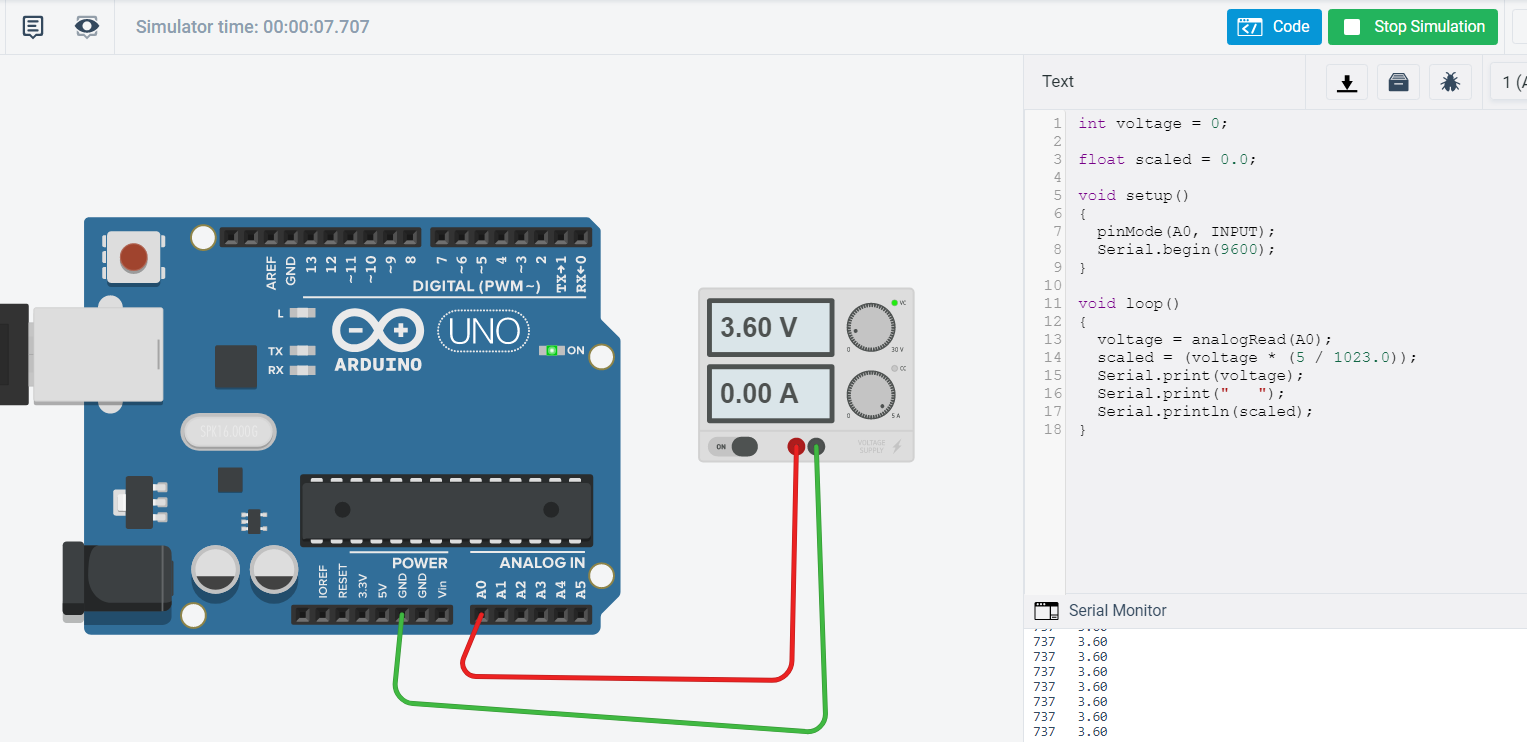

In [44]:
base64_data = "iVBORw0KGgoAAAANSUhEUgAABfcAAALmCAIAAABgrDlRAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P15dBXHnf+N89f3v98zZ87vzPOc3/c53y2ZzJIZZhLHk8QJthNDHDt2FiMweGG3wQZswGCwQZCwmt0YA0YWCLFJgEEIBBISkgGJzUjC4opNCCEhJIQFGOQlcTKZw++t+2kVpep7+/ZdJd1+f87r6HRXV1VXd9+Lb71cVd3r2vXPdKrOXTZSSATwNhJCCCGEEEIIIcQ9MTEJvVpab+lU19QbKSQCeBsJIYQQQgghhBDinpiYhF43b9/RuXC50UghEcDbSAghhBBCCCGEEPfExCT0utv2pc7lhmYjhUQAbyMhhBBCCCGEEELcExOT0OuLL7/Sqbt63UghEcDbSAghhBBCCCGEEPfExCT0+vKrr3WuNLYYKSQCeBsJIYQQQgghhBDinpiYhF5fff1HnfprN4wUEgG8jYQQQgghhBBCCHFPTEwCLU9c4G0khBBCCCGEEEKIe2h5ui+8jYQQQgghhBAv0/bl10aKN3F5H9q++spIIUmJ84MOaRK+/Cr0x4mWJy7wNhJCCCGEEEK8ye6a2w9uq/vWxkv/bc0F8u3MS7gbOTW3jLukKGj85OnDM/ocnPjtfUNI0tPn4AQ87vyrnxgfA8HBJNy+09Z841bT9ZvI4wwtT1zgbSSEEEIIIYR4kG3nb/1N2kXDdBDck+zzAUTPnoaj/5I/yhABJOnBQ8+tP2p8GEAwk3D7TltTy038NdIDQssTF3gbCSGEEEIIIR7kwW11huAgAu6Mca/A04dnGP1/4hHw6I0PAwhmEppv3HKpeAAtT1zgbSSEEEIIIYR4jbYvv/7OJk7UCsx3NtUaa/S0ffXVI8WTjM4/8QiPFL9hX6MnoEn48quvm67fNBIdoOWJC7yNhBBCCCGEEA9iqA2iY9wrYPT8iacwPgwgmEkIyzDQ8sQF3kZCCCGEEEKIBzG8BtEx7hUwuv3EUxgfBtC9LE9t/bWjp6rCAkWMSuJKy2e3LjdcCwsUMSpxCS0PIYQQQgghxIMYXoPoGPcKGN1+4imMDwPoRpZnxsIPHnxyaASgoFFVnDhw6MSqDTsiAAWNqtxAy0MIIYQQQgjxIIbXIDrGvQJGt594CuPDALqL5Wn57JbhbsIiASN6bt9pM9xNWLhfy1pBy0MIIYQQQgjxIIbXIDrGvQJGt594CuPDALqL5Tn6yafiawoOHTcOOYDMUgrFjUMxp7a+UXzNuZoA764LBjJLKRQ3DoWElocQQgghhBDiQQyvYfB362oON399L+pAJajKqLz7Y9wrYHT7iacwPgyg21keIz0kCbY8H27ZrVKOnqpauCrzpcnzBr86XZqBDewiEYdUNhTpxpbny9u3brTe+dKWHj3nsjJyl2Xk5zcZ6V3EnZstt+6YiYQQQgghhJDuh+E1DEaVXL93797dP//Xg9uv9Mu9iu255Tf/bl3NmVvfNHzxl+9svoxdv8YJHajKqLz7Y9wrYHT7Q/Jm1YfX/thq3QLHQDZkNoqTboXxYQDd1PJg96Up8xxQWkdKJcbyZO0ubPns1o3W25k79j09dJKcOhjIgGzIjCIo2IWWp/Xq6dycfSvanUvussy96/NOVbd2aJ0Lh/yJR6q1/DGiW1meC9vbG7N3V42RHnfuNlVt/2hv+03OyF2RVZR75nqnDF80nco/0PFo9mUePHdNP2oQIvPN6iMlazL9RzPan/KFW/pRg6CZG47k+xMDkHVWFe/grP/zE4i0I01WnqDNbsrf1qmIxqFKKw8hhBBCCPEihtcwEIlT/8VfsP1362qwPaDgGrZXnvl8z5UvsYFdv6MIHahK6gxB3u0Dn//1T1ahv9Y33X5hsy1PKN5o+uu9b75+w5YeLsa9Aka3PyRNf3RrwRDX/thqFA/JI5UHjnz51TdS/q9fXbt14PUSM0+sCH6u+Rm3ms+1bH6kc/6ImXvrq3v3mnfa0h3ZnHe3+WTDYlt6LDE+DKCbWp53VmUqXRIQZJCcspsAyyML63x6tsbud2YsXLNhRx7AhnEImVFEFQ+LmFie1rOH3peec+a+9zd3uJ6M/PyrftHTdGo9dj861dC5VCwIx/KILNh2MlbNsFRF3rmOlKaSj9CYAyUJVk5Np9Lab0Luis24+eJ69madvd2RoalINEfmXvVo3s8716qKd8I5852qfKt+HH1f9M22k3X3i+s4Zb52vKg9sROSOdCjvFBmz+xvGy5TRk45NLupJMcoe78xcfhAEkIIIYSQHoPhNQzUUJ2qm9/Uf/EXbNz55r/UHC5sYFe2Q4Yry5N39+J/3rv3zTcHzn72QtFnaVe/uXPv3p8+v/u0kS0U3cfyWBfvOoziITheevmv9+79pflIw7bXKzM+aGluw837snS4/2i7K/nL+bl6/mhwOteqoj/hOVW8ruePAneWZ/PJv9xru7W5Y/fAOTzzuwe0DLHH+DCAbmp5auuvbdietypjR0BwSC23LKUSYHlA5o59cjrFU0MnisRRYBeJRjYU1PO4JBaWp2aXv9ucdkSNJLp5Ks/faf+oouV+tnjQrSxPl/BlVWH7rX6/sOauP6X1TEm75sg6dkkyXDjSvrv5SNUX/t1b57LaH9a+vHop3hnnzC1+W5dxoKRFRmk1yjCZzacDTVILKzOQU++pum2kB0Qqj+waO+5Y0JYQQgghhBBvYHgNg7nlNxu++Av+RolUYlRu43LazXv3/vObjXn3E5++8pd79/7r5In7KW7wiOV5/bM79+7dOVJ1P+WRhoZ79/58urZ9O7aWx/lcsSUiy5MIjA8D6KaWxz1SKgGW5533Awwv0tffUSDRyAZQ3MgWkhhYnqaT/rEknVVL06nM9nETZVXY7qRXZAZNfv6Fcx2TjPam5Z+79nXbpYpDaTLIIvPAdjXnyKpcm1zTqTab5Wk5p00cQz1NfvdhTtvpmOnzZUvNqSw11+mjI6ea1GCojprPVGzOwoYxu0eO3sc/z6hzY6SdeacvqFlLWSX5l29/1XohL2efv9TeNXtOdprxpDV+BTLX3FSH7rbWVdbItRjU5W1Gft1oyMSx/KKW9t1LH7ef6/2P7y/mXZXfXn/aUbkDbS2XL1R3XLVz5tuni7C9bM9pJWKuHfV7rnzrvwF6I0Nm7swN/zCovbsuuFm86ctqv6ZZf9z66Ia6xs60VLQboswj7Z9MQgghhBDiYQyvYTC3/OaR5q+NxJD0y71qrLWMSkJbns13L96796cbt4zEqv/8r/orsqbP5XGXvrnzn+JD2idzaWN8Glc2/UXmef2p7es9N3XLo5X6z79WnW36zv1SITDuFTC6/SHxnzWMMIo747chrUXHtcTjm7c2n/igqvSyVV97dKiQxRm3Wtsk6a9fXW7O6Jhg1Z752mcnLrcP1UL8+dqtAzIaSCf4ubDdLlzufVnqT/fX1lJy7i9/vl9b6bYjX6N4e7R9fWauf56XqXLOnm+799XJs/ZDnZp9rmFVe7MbmyXBH1Kq/bz3pc8nB052nPGbvzTn+SZJutRcdOX8tb/6j/31zukrYUzyMj4MoPtaHqQcPVVl8OnZiyqDIKXibXl27iuRE+mMmjzXyKbAISMzQCVGNmdiYHnUWJ6PawOP3AlgedrRZhjlvr+5vaPeniJCRLmSsCxPx9yl9z8q2Z53QCaR+V3AjcqPj2wXt5KZn5V/JO9s+1WriWZaS/ZtvyBDPAyPY1iehrL8I1nb/EWyirbnHylrlyyBLE8796cRof73N8vEIplzlLsi75zlQQJNvNpVI9bDusOZFfaHJSctOn5HpVh3ePuF9t3KvPZtfdyKNQRJbEuNfxRMRlFZa+jMsq3LlI5nccq/CE6nRobK3Jn6Y2twSI3NceZO1eb2NpeoSw5xjZ0RJbTm4wYjnRBCCCGEeA3Daxg4WJ4Ht1853Py1fU1lWaln08W7eqIry1P29Z179y5esKV3MOrqf967918tTZ+PK2qafql9MtedphuibNoH79z7r/qrt8YVtaQ1/We77umwPE9f+OZPVqmWtBvt2U5WXlZ1OmPcK2B0+0PidwlhhFE8BBdqv2m/0Iq5xy2L0cGM4ZWrMj7/6t5fajMqV41pPzop4+6f79376nJz+3yrrbfufHPvz5cbRXCIErpzrhGHtuV92S5HrrXY3EfQcwHT8qjadt5tr+2bv/659fPSxZWrFjc3t1fy+TbkdGd5Jn3weXuzTzdkdNT259MXhny7dPHrlQdO/+Ve2+cHXq989/l2baRZnpL22Vv3/tKcd2HV676Sk3/6872/Nu/8RNV8795fW4/UZrx+ofRcu9hq2Op6JSPjwwC6qeVxWJfHeNW6JMbV8nx6tubRlDGqAYr3M7YbORU4ZGQGqMSY3uVMLCyPti5Pxr7MgxXVV293GnUSyPJ0TO/68trRA1Iw97KMKJFhHR0DMcKxPDLE4/2DtZKzVYaTWDmNgkCshFrC5ss6UQOWa7Asz/t7TtfdQsMCjDGxVML9GVuBLM/mQ5UyWueLC9tFYO05bbkwmWeUccg/qOTO8T3tR9WsN6vx1pQ3WfFnX64lfXTkpLqEsu6wLGMsBkRf0rhTs2XJpM1lsjC2c2bZvr/gMej8ZPVGhsqsY02hUmNznLl2vP0Ds6Lw/oc8xDV2Qh76gRL/QCdCCCGEEOJlDK9hEMzyjCq5LivyGDYHID/SJx+9YSRGa3k2f17lH+mjRuL4pc9/HijC9u3Ohy6vvPlfHZbndhVy3fy849D1A2jd53ddDucx7hUwuv0haXcK4YRRPBSTXm9okHEu3/yl+WRznr70crvRUDO2qs60dnI3k7beRaGGjPZtGX0zv+PQ4iLcogBTvRzOZVqe1vsnOnAOBb6ueN7and9e+Z/OvO7W8uSd/sufWz/rGKFTcuLa/QE7xoyt+5bnzfbJZa1Ffq3TTklJexv8S/b4a9bmnV1p6BgK5ArjwwC6qeX5aF+xkiM6flHSaTiPpMfV8txovW1fagc4TMIKOL0LlaAqI6cDMbE8oPXyqSx9VtTmovsTjjq7AL+D6FAh4OpJ/ziO+4v4im2xBEG4M7Z0jLKGZZA3f2nn7VAAMvupo+ar6qiJTSUEsjz3j355SmTEGWVqNEFz57R/fIo+JEeOlpyydoOhVWIRjuXpTHSWpxNhZLZW8Lk/NscR/RlZuL9GMURuV/8hhBBCCCFJjeE1DAJank0X2w0BAhvGzKwHt19p71D/+b8imbHlbHn8R6vOaClFX7ZIflvB++vy2A4tvqEEUGiMewWMbn9I5Ea5D6O4K0rTPmipvWbNkLo/BUm3PI80t7bbjUqt1H3B0e5HLjfeP+RfgkfzLzqBz2VaHq02/VA7O7+0FJI7y2NwX+UEtzyT8jpEUsehIRn4wIY6qRuMDwPoppbHPVIqrpYHfHq25pH+o+VcisGvTjeyKXDIyIziYQ3kAbGyPMLd1rpTR46sb18pBnQMk+nUvbdZHnExWue/kyAIz/JY6+x0TI8SAlueQCJA9yNGzQGw1dC5iJxOq98mIzRBY12mHacG+OnxliesKVS3T5e0V9JZ07i+xoa89iWWgq3KTAghhBBCvIXhNQwMy/N362qqblqv0jZG6wgigAIO8InW8lzAef96uExPbF/Hp8PydDp03/Kc+VPHS9n1+GZjR05njHsFjG5/SKwTug6jeFg8UnmgfXZSx1gV3fIE8Cb3BYdpefyr3rTmHdVSbHQ+VxwtT6fXt/sjlOUxzwjUrXA4qRuMDwOg5XHLgUPH5Vw6G3bkGdkAEo1sAMWNbCGJreXpoO3Sx/5u9mb/7KdO3fs4Wp5WUQAZ+VlHTp86U3XqeIl/HlkPsjz7MvOPbO/EsUr/ijnBkUoOlNzPZl2Fvi6PPhnKanagNWucM8u2PlWq45YGWGrHbWZrkR2XU6hE05iLNLu8RssQfRRoYSBCCCGEEOI9DK9hYFieM7fau9t3//xfD26/ohIVf7euRvrh39lsLnzjyvL4V1++09RZHqnVl9tVzn+drNQOHe6wQn49pA/z6TyW579Onm16oUin8cGOnM4Y9woY3f6QyA1xH0ZxR+bPbTiRV5vWKbFdW1iSRakNbPvH8nReO7ld5QS2PKmGCmnH+VzxszzbTrc/yTMfVM33rxWtm51glsc/luf+HLF23JzUDcaHAXRTy4Pdib9f9tKUeQHBIaV1pFQCLA+wvyX90ZQxxlvS3bxt3SXRWx7r3UnGS9N1O9NJr8TP8jQViaNRU6KMsp0KdszY0s4beMZWYixPq//FT5GsFxPlO7Y6EeU7tnRcZg5vCpWsZGRbpNndNVrrPfEF6oQQQgghRDC8hoFheVae+VxkxMYL5mgdgMw4pOdXuLI86k3qufcT779JPbJ1efyl1CLN7eRdH7W9YzsUxr0CRrc/JHK73IdR3JH57Trjr7Uf6IsH17avkWy3PFGvy+N8rkgsz/MtncTTI1cavrFbHk1ateNfVjmU5Qm5Lo8HLI/D6ssCMkhO2U2A5Wn57Ba40Xp7xsI1qhnC00MnTfj9spcmz8OGcQiZUUTKGhWGJHrLY70gKWNv1hn15u+OsTyZR9qX9Y3G8lgqZF/uZXE3tyvz/O+fCmR5ZAxLZoUsS9R2SSyMYXnUQjx3zmW1O537qy+3VPjFRKfVlxNleTocxPt55zpk2e0LH5fsumAtsRT8Teoda07nnWv177aeKemkQuQtWmoR6Fty1coKdXqTeojMlorKz78qz6JRbrjyJp0aGSqzn7qAY3Pa+aKp+mxdyxd64m1ZoDrAIs0hrtGPfEr5AnVCCCGEENKB4TUMDMsDRpVc9+uIe1U3vzHG7DR8gQ79vQEF1/REwZ3lufDf8u5e/M979775Zk9lywtFn6VdbX+R1p8+vytvTA/wjq0Os6O9Y+uzjTc6vWNLDkmpcZVfXPzm3p9uft5HThcK414Bo9sfEv+tCiOM4s484pcg3/yp4UhD+5uzPmiubX9B+F8bMvwuxr+8zlena1e9WTn/2wHesXXvWrNIn3Y/0v5Oce2tWPZ3bDmeKxLLI+Lpm68r2t+91VjbitrslkcEzV8a8mozFjeckXe9d5idVUfwmP9S+0Fl2uvtqui+5Qnwjq17rXn337HlActTW39tVcYOB5BBckqpBFie2vrGD7fsPlfTPirhcv21d97PtK/Uo8AhZEA2ZEYRFERxVZVLYmB5vv6yznpPFnrR+96//zb0WKzL8/UdS+v430feUXNAy/PHBhktIi8jVzmV5bGG9rQfzTzeXrmLN6k7WR7ruvzFc9unR0VjedpXoZbm+d+zbrW/Q/rIIKOAb1L/41ct4lM6vYK9Q10Byx9Jte02RFNCxpvUQ2T++ksxSp2exTa1fLXRSOfM7VhTqAK8QP1GWU57/k4TviyZGHCRZudmA+sVZnyBOiGEEEIIURhew8BuecCD26/c/XP7C7bufHN/6pbYn4Yv/qKy6bi1PGsufKfo9uG29h5/e/znXy9evf3CZnX08rhL39z5Tzn21/qm22J//DSubPqLLMHzp7av99zsmLFllvqvlptt4+5XGALjXgGj2x8SOav7MIqHpPOyNX9u+/JMhhrDcrz9XeOItlsZ/pTFGbda2/z57v31q8vNGf45UKDdj1z77IQ4FFRy7bNtT1uHOhH8XBFZnn2TUpubO9rTerKlIdCMrSFPXzhzzWoY2lzSXtvXJ6Tlz1+p9Rf/6qQPu5rlAZ8cOPl1u65CfPOX5jyf9fb35Lc8YY15QWYplRjLs2rDDnD7TsfwCjT7VNX7GdvBqMlzgWwjUWVAZinVRZYHfNlSfzo3J1862O0d+48Olbh8x1YIy/PHr27V5u+xuu4rPiqrqvCrgUCWp338y5GSNX6hsCKrJL/mdOejX9YdL/Gbgtz1fsvT3uyak5uzREag8iOn1KgWN5bn69tVB+WS9+6K3vKAlgt5HVe6LPNA1vHajnE9Dm9S99NybnvHmtMrsopyz1zvnOH6qfwDlmfJ3Jd58Nz9hWk6v0k9ROZ27t9hXPX6vFMXZPhMO/ZGOmQGDlOovqw+2D4Jq+MxtafI29aDaxrHZof3Gi9CCCGEEOIJDK9hENDygL9bV4N0dKH3XPlSUrCB3YBLMgP3lqdbYdwrYHT7Q+L3DGGEUTwhGF6GBMX4MIBuZ3kWrs48eqpKYUgf7OpHkTnxlufjY+WXG64pdOkDsKsfReautjyEEEIIIYQQ0pMwvIZBMMsjTD56Q03aGlBwzf5idYVnLU/TH9vXKnIZyGwUTwi0PG4xPgygu1ge8GjKGFE2OoNfnaFEDzawa2QAKKgqiSsfbtktykYna3ehEj3YwK6RAaCgqsQ9tDyEEEIIIYQQD2J4DQNny+Mez1qeN6s+dCl6kA2ZjeIJgZbHLcaHAXQjy7Nhe57xBitBRE8wxYMiKGhUFSc+OX02c/s+w+AAET3BFA+KoKBRlRtoeQghhBBCCCEexPAaBv1yr1oSIupAVUbl3R/jXgGj2088hfFhAN3I8thp+ezWoFemP+gXPaJ4sKuG9nQHlNnBX7WhhvZECS0PIYQQQgghxIMYXoPoGPcKGN1+4imMDwPo1pYHKNHTDRWPoA/hiaHiAbQ8hBBCCCGEEA9ieA2iY9wrYHT7iacwPgygu1seIKKneyoeQURPbBUPoOUhhBBCCCGEeBDDaxAd414Bo9tPPIXxYQA9wPKAFv+6PEZit+K2f10eIzFKaHkIIYQQQgghHsTwGkTHuFfA6PYTT2F8GEDPsDzehLeREEIIIYQQ4kEMr0F0jHsFjG4/8RTGhwEENAlffvV10/WbRqIDtDxxgbeREEIIIYQQ4jXavvz6O5suGWqDCLgzuD+dbtdXXz1SPMno+ROPgEePD4D+eQDBTELzjVvuZyDR8sQF3kZCCCGEEEKIB3lwW51hN4iAO2PcK/D04RlG5594BDx648MAgpmE23famlpuuhQ9tDxxgbeREEIIIYQQ4kGyz9/6v9IuGoKD4J7gzhj3CuTWH/1u/kij/0+SHjx0PHrjwwAcTMLtO23NN241Xb+JPM7Q8sQF3kZCCCGEEEKIN8k8e/OfNtd+K5NTt9r51sZLuBsbzwZdV2XHlcM/L5n804MTDBFAkhI8aDzuj+qPGB8DIaRJ+PKrTpP+AkLLExd4GwkhhBBCCCFexliDxrO4vA/2JVpIUuL8oGNiEmh54gJvIyGEEEIIIYQQQtxDy9N94W0khBBCCCGEEEKIe2h5ui+8jYQQQgghhBBCCHEPLU/3hbeREEIIIYQQQggh7qHl6b7wNhJCCCGEEEIIIcQ9tDzdF95GQgghhBBCCCGEuIeWp/vC20gIIYQQQgghhBD30PJ0X3gbCSGEEEIIIYQQ4p7YWB7UQgghhBBCCCGEEEJ6OuZYHkIIIYQQQkiygg5AW9uXhJDo4beJGHSTjwQtDyGEEEIIIV6B/VJCYgW/TcSAlocQQgghhBCSUNgvJSRW8NtEDGh5CCGEEEIIIQmF/VJCYgW/TcSAlocQQgghhBCSUNgvJSRW8NtEDGh5CCGEEEIIIQmF/VJCYgW/TcTA+SNxF9wVvogrtDyEEEIIIYR4BfZLCYkV/DYRg4AfCb/c+eKO3798fqcNG3fuxBdaHkIIIYQQQrwC+6WExAp+m4iB/SNx9+6X4ndu3rrT1HLz2vWbyBNvaHkIIYQQQgjxCugAGJ0QQkhkxOrbdPfuF0ZKnAj3RAlrGEiOthkfibtt7Yrnzp12xXPteiv+6kfjBy0PIYQQQgghXoGWh5BYEf23KZHjO0BjcytO58Y1JLhhIDnahsz67l3/RK3PP29Da90UjxW0PIQQQgghhHgFoxNCCImYKL9N6PYncnyH4OakXdIw0NPbBoyPhH+VnLZbt+5eu35TT483tDyEEEIIIYR4BVoeQmJFlN8ml8NDYg5OilMbiTpd1TDQo9sG9I+EvEvr88/bbt6+k+B/eGl5CCGEEEII8Qq0PITEimi+Tej/J3h8hw5OHWytma5tGOihbRM6W572FXluf3735i1aHkIIIYQQQkh8oOUhJFZE+W3qwi+j86m79l+Jnts2oGdQlqf15ucJbjYtDyGEEEIIIV6ha/tIhCQTUX6buvDL6Hzqrv1Xoue2DegZ7t794vM7X9y63dbKsTyEEEIIIYSQONG1fSRCkokov01d+GV0PnXX/ivRc9sG9Ax+y9NGy0MIIYQQQgiJI13bRyIkmYjy29SFX0bnU3ftvxI9t21Az9Bhee623qTlIYQQQgghhMSHru0jEZJMRPlt6sIvo/Opu/Zfidi27WJtw9NDJ02YtRQbevrKddsGvzp9+jtr9MSQhDy7noGWhxBCCCGEEBJ3EtzZICSJifLb1IVfRudTh9WwyjPnH3xyqDMZ2/YapRyIYduE7XuKBr3y9tNDJzU1fyYpC1ZueDRlzMp12wz1E5KQZ9cz0PIQQgghhBBC4k6COxuEJDFRfpu68MvofOqwGjbolemvpS4pPVEZjJXrtj2aMqbm8lWjYDBi2DZFU/NnTw2dOGHW0ozsvfnFxx58cuj+4qNGHjeEPLueIQGW57PPbr63Zu0Z3zkjnZaHEEIIIYQQrxBxZ2Pe4qX/8P0fBOS1KdNufHbTyE9I0hNl1z2y4mVlxx7WYs2aD4wMbnA+tfuGrVy37ZH+owsPnxj1xtxg7Nh78Nkxb78+c6lRNhixapvBoFfeVmOLnh46yTjqkpBn1zPE2/Lcvn1n8bvvTZj6VnNzi3GIlocQQgghhBCvEHFno/LTM0Ulh4Rxk998fuRL+w8Uye6JU+Xobxj5Q3Ljs5uvTZlGQ0R6LlF23SMrvm9ffi8t3nrrbSODG5xP7bJhNZevyryn/JKj+BuMjG17S09UPvjkUGQzaghITNpmgGYoxSMcOV5p5HFDyLPrGSK2PChYfe78m6kzj5QdNw7pHDhYkvLi0JpLl/VE+XeVlocQQgghhBCvEFkfyWDe4qXR2xlaHtLTifLbFFnx7mN5Rr0x91dDJtRcvvr++u3O5Jccnf9exqMpY5qvtxqV2IlJ28D0d9a88/4GWYtn1OQ5huWRdZcv1ja8NHnu+uw9qpQzIc+uZ4jA8ty503a49NiIV8fLMMmPj5QZGRTXWz4bM2Hiuo2bjfTyyqqf/uJxWh5CCCGEEEK8gvs+kgMBLc+V+qu/n//ODx7+2b/+6KFps/5wua4eiU3NLaNfm6Ay4+8bb88YPHxkzt59asIX2JS1TdVDSE8hym9TZMW7ieXJ2Lb3wSeHyrI7I9+YE5JLl68+0n+0m3lb0bdNOHK88qmhE58eOml/8dHXZy7RFQ+QcUY/G/DKqMlz3K/BHPLseoYILM/HR8rw7+ebqTP37Ct4+JdPOlie0mPHnxow8Nz5i3oizvjuqjVDR79Cy0MIIYQQQohXcN9HcsBueS7XNQwePnLEq+PR9zh5qhIbQ15+pfFaEw5hF92Vnbl52N5/oOhHP++LrsutW5/XXLr8ysRJABsczkN6IlF+myIr3h0sz6XLV4dN+MOk3y8vO3naPWsyPxr0yttHT50xajOIsm06Tc2fLVi54cEnh/5swCu64pGUR1PGuB/FI4Q8u54hAstzrel6k3+RnSrf2Uef/JWD5Vmx+oNxb0xpudFpbBT+yX1h1EvrNm6m5SGEEEIIIcQrhNVHCobd8qBf0e/Xv1P/Yxkb2N21p93soKvz4YbMgUOGnfjkFP4uXblKFvFBcVRiHxNESE8hym9TZMW7g+WRdXYiY+W6EAP3omybQVPzZ4NfnW60QZixsH3SVliEPLueIQLLo3C2PPKPJ/4dNtILioof/uWT5ZVVtDyEEEIIIYR4hXA7GwExLI90OabNnHXr1ueS0nKjddwbUxYuXyG7Mm/rRz/v+8Kol+obGiWRlof0dKL8NoVV3JA79ghL9zifOmTDeorlOXK88qXJc40G6MxYuMb9dC0Q8ux6hvhZnquNTc88P8SY6Ip/fvGP8JgJE6+3fEbLQwghhBBCiFcIt7MREMPyNDW3DBvzqr7OjqD/r2ZZiGfbzhyVQstDejpRfpvCLf7qq2Mto2OL3r17G5mdcT51yIZ1f8uzfU9RsCE8dibMWurylVshz65nSLDlkRGUsh4zLQ8hhBBCCCFeIdzORkACjuWZOXcB+h46169b55JVe370876/fnaweu8vLQ/p6UT5bQq3+NWr1/7mb/7G8jqdY9++fCOzM86nDtkwu+WR16UHxMgZb8tz5Hjl00MnPZoyZsHKDeuz9xhnt7O/+Oj0d9Zg46XJc0OO6wl5dj1Dgi3Puo2bf/qLx8srq7BNy0MIIYQQQohXCLezERDD8qAz8+6qNS+MekmWWxauNV2X9Xfwd/G77w0aPuLTM9VDXn5l1rwFXJeHJAdRfpsiKL51a7bldbR49dWxRraQOJ86ZMPs7mb6O6uNt6crjJzxtjz7i4/iFPICdWwYZ7cjo3gu1jZMfyf07K2QZ9czJNLyXL9+4+Xxr6txlLQ8hBBCCCGEeIVwOxsBMSwP0N+xdbHm8rrMTT/9xS8/2p2LQwc/Pvyjn/fdf6AI2+i0qG10gRYsWYa+yp79Becv1Eg9hPQgovw2RVa8T58+lt3xx9/8zd9cvXrNyBMS51OHbJjd8rgnMTO2BPsL1O2E9ZqtkGfXM8TP8ogi16fE4h/e7//04eXvry4qOQRoeQghhBBCCPEK4XY2AmK3POBK/dXfz3/nBw//7Lv/8aPnR7508OPD6OSI/Zk26w83b95Gntu37yxYsmzgkGGX6+qxe6b67LPDhiP/9l27VT2E9BSi/DZFVtznO6vP29q6NdvI4AbnU4dsWI+wPNv3FBmnfjRlzKjJc4zEnw14paLqvFE2GCHPrmeIn+UB+pvU8e/q7HcW/Xbw8/LvKqDlIYQQQgghxCuE29kghAQjym9TxMXfeuttUTx9+vQxDrnE+dQhG9b9LU9F1XmcyxjLM2ryHBzSU8T7PD10kszwCknIs+sZ4mp5So8df2rAwHPnL2K75tLlXz87+N1Va3BGOUrLQwghhBBCiFcIt7NBCAlGlN+maIr37t37b/7mb3y+s0a6S5xPHbJh3dzyNDV/9rMBr7w+cwm2nxo6UZ3abnkWrNyAzMgzYdb92U8OhDy7niEayxOS6y2fjZkwUd6oZYeWhxBCCCGEEK8Q884GIZ4lym9TNMX37ct/6623jUT3OJ86ZMO6v+WZ/s4aGZ5z5Pj9piIRKY+mjJFdbEieiqrzC1ZukLLOhDy7niGulgccOFiS8uJQ9dZCHVoeQgghhBBCvEI8OhuEeJMov03OxRsaGv+vKCI720mmOJ865HXVXL6q1Em47Nh70KjNIMq22VEL9MjrtFb6X7z1aMoY98vxKEKeXc8Qb8sjry+c9Nb06y3mdDNaHkIIIYQQQrxCPDobhHiTKL9NzsXr6xtk8Z3IYtOmLUaFOiFO7eK6ai5fLT1RGS6VZ0KLlejbZqei6vz+4qNqd332HhnFEy4hz65niLflAZ99dvO9NWvP+M4Z6bQ8hBBCCCGEeIU4dTYI8SBRfpuci9+8eXvTpi0Rc/HiJaNCHedTd+2/Ej23bUDPkADLEwxaHkIIIYQQQrxC1/aRCEkmovw2deGX0fnUXfuvRM9tG9Az0PIQQgghhBBC4k7X9pEISSai/DZ14ZfR+dRd+69Ez20b0DPQ8hBCCCGEEELiTtf2kQhJJqL8NnXhl9H51F37r0TPbRvQM9DyEEIIIYQQQuJO1/aRCEkmovk23b37xbXrN43EhIFTowFGotC1DQM9tG1CIMvT9tnNzxPcbFoeQgghhBBCvAItDyGxIspvU1PLzZu37hiJCQAnxamNRJ2uahjo0W0DhuW5c+eL2+2W5861662JbDYtDyGEEEIIIV6BloeQWBHltwnd/gR3/oGbk3ZJw0BPbxsIYHk+v9t66/PPWj9PZLNpeQghhBBCCPEKtDyExIrov03o9je13GxsbkVVCeDa9Zsux8IkuGEgOdqGzGq73fLc/eL25203b9+50Xr7s9bPE9ZsWh5CCCGEEEK8AjoAqhNCCImGWH2bnJd6iSHhnihhDQPJ0Tb9I3H3bjsdCzB/3tJ6u/nGrWvXW/3cjCu0PIQQQgghhHgFWh5CYgW/TcTA+Ejc8S/AfPvzuzdv3f3ML3paPrt9/bNb12/cvn4Df+MFLQ8hhBBCCCFegf1SQmIFv03EwPhI3L37BRDRc+v2ndZbd1pv3vnsZvsyPTfiCS0PIYQQQgghXoH9UkJiBb9NxMD+kRDRc6dd9IjrUdyJH7Q8hBBCCCGEeAX2SwmJFfw2EYOAHwlL9PhfuXXnTtvnFl/ED1oeQgghhBBCvAL7pYTECn6biEGwj8Rd3fVYuqd9N07Q8hBCCCGEEOIV2C8lJFbw20QMuslHgpaHEEIIIYQQr8B+KSGxgt8mYkDLQwghhBBCCEko7JcSEiv4bSIGtDyEEEIIIYSQhIJOCCGEkCSGlocQQgghhBCvIH2Ar7D1xz/+KYHxxRdf3Ljx2d27Xxj/z5kQQkhsoeUhhBBCCCHEK4jlsdRLYuP27ds3bnCGCyGExBdaHkIIIYQQQrxCF1qer7/+ur6+3uiNEEIIiS20PIQQQgghhHiFLrQ8f/zjH+vq6ozeCCGEkNhCy0MIIYQQQohX6ELLg6DlIYSQeEPLQwghhBBCiFeg5SGEkOSGlocQQgghhBCvQMtDCCHJDS0PIYQQQgghXqFnWZ5bLZ9vGpjj219jpBNCCAkGLQ8hhBBCCCFeIQGWx+fzpaWl4a+1r0VSWp76+oa+ffv16tWrd+/eFRWVxtGk4cQF37cmPfO3o/s9mDrsctM14yghpPtAy0MIIYQQQohXiKvlEb+zY8eOnJycmFieyKg71Vgw67CRmAAWLHjHbnlu3GidMSO1vr7BSO9ZnLjg6zd/vMgdbL+dtUo/SgjpVtDyEEIIIYQQ4hUSMJYHkZeXR8sjJIfleTtr1YkLPrW7rjhX3yWEdCtoeQghhBBCCPEKPcXyyFytab0WAmPG1u6JhZIoG6B01SdySC+lQDZVNhjp6et6+aNv33719Q2FhUWyqyZh3bjROmLESCPRwG55VLUqpH77UT3dOIpDlZWn8VflwVnQBjnqfprYjBmpUsQInMjIaXC99eb4jCX6LK0V+7P3nipVu0DumP0qCCGJh5aHEEIIIYQQr9DjxvKUrvrEvi4PEtP6ZYncsa/dE9lYnoqKygkTJt640Sq79fUNM2akyq4onsLCInWob99+alcRzVgeFExJGaCypaevQyl1qH//FNU25EFjVM5gjYkhAS0PULuAloeQ7gMtDyGEEEIIIV4haSyPPkIHu2J8hIhnbOmaJj19nVIn2DAGvNRrDkgRjeXRs9mLoAEjRoyU07lsTAxxY3kIId0HWh5CCCGEEEK8QtJYHj0xVpanoqJywYJ3sGF4E934CHYRA8K1PKjTP2XKCjUQxm5t9BQ0xiqghZtBNKjByt05DGdkx82MLUJI94GWhxBCCCGEEK9Ay+OMmJr09HW6+4jHWB59eA7Qs9mLoFo1Y8vemARgrL5s7AJRSIlvGCHEDi0PIYQQQgghXsEjlufDx7NbrtzENv6+9+AG/agzhYVFEyZMNCSLXbtgFznVrhDM8uhr+qCgyB1DJCFdH4+D/EiRbSTikFJC+IsW6ifCtr6mTzy43HRtwe4Nsm1/k7rRQkJI10LLQwghhBBCiFeIq+Xx+XxpnWPjxo2tra3W4XAsT+mqT4xXZQExO8artdSusVKPJAK7JHJApIx9TEqF9lorhCForNSOMN57pZdV7kZOJImIFStWYlcviFPIISSK9FEORayKHEW4ma4VPSv2Z//t6H7gwdRh+uwtgOYZl0wI6UJoeQghhBBCCPEKiRnLEywiGMtDQEXn9391N2bMSLV7MUJIV0HLQwghhBBCiFeg5emJpHee3kUIIQ7Q8hBCCCGEEOIVaHl6CoXaG7jUPC9CCAkJLQ8hhBBCCCFegZaHEEKSG1oeQgghhBBCvAItDyGEJDe0PIQQQgghhHgFWh5CCEluaHkIIYQQQgjxCrQ8hBCS3NDyEEIIIYQQ4hVoeQghJLmh5SGEEEIIIcQrxNvy1NXVrV+/Ps0fPp/PSu0IWh5CCIk3tDyEEEIIIYR4hbhanrq6uszMTPzFdmtr68aNGw3RQ8tDCCHxhpaHEEIIIYQQrxBXy1NaWqprHWzn5eVZO/6g5SGEkHhDy0MIIYQQQohXiKvlMeLixYsyrkcFLQ8hhMQbWh5CCCGEEEK8QsIsT11dXU5OTltbm7XvD1oeQgiJN7Q8hBBCCCGEeIXEWJ66urqsrKzW1lZrvyNoeQghJN7Q8hBCCCGEEOIVEmB5gikeBC0PIYTEG1oeQgghhBBCvEK8LY+D4kHQ8hBCSLyh5SGEEEIIIcQrxNXyGIoHuwUFBbItQctDCCHxhpaHEEIIIYQQrxA/y9PW1rZjx460zsE3qRNCSIKh5SGEEEIIIcQrxHUsT8ig5SGEkHhDy0MIIYQQQohXoOUhhJDkhpaHEEIIIYQQr0DLQwghyQ0tDyGEEEIIIV6BlocQQpIbWh5CCCGEEEK8Ai0PIYQkN7Q8hBBCCCGEeAVaHkIISW5oeQghhBBCCPEKtDyEEJLc0PIQQgghhBDiFWh5CCEkuaHlIYQQQgghxCvE2/K0trZu3LgxzR+lpaVWakdEYHlKV30yrddCYdPAnFstnyPRt7/GSEkybtxoHTFiZC9/FBYWGUddIpX07t27oqLSOBRzxmcs+dvR/cCK/dnGIWciLkgICQYtDyGEEEIIIV4hrpbH5/OtX7++rq5OdvPy8gzRE67lqTvVuH3UvmAep+XKzd0TC2NoeXz7a0pXfWIkdi3p6esitjzCggXvxNvyjM9YohzN21mrTlzwqUPORFyQEOIALQ8hhBBCCCFeId5jefSoq6srKCiwdvwRruXx7a/ZPbHQSFTQ8rgh3pbnxAXf21mr1O7lpmsLdm9Quw5EXJAQ4gwtDyGEEEIIIV4hkZYnLy/P5/NZO/5wb3nqTjUu+J+r1VwtgF0k6nmCWR69rDGlC/lVhfohVPXegxvUIcG98amoqOzdu7dMsFqw4J0ZM1Jv3GhVR9PT18khRFbWNnVUT+/bt199fYMqoghoefTT2SdkIb8cQmDbjeXRK9QjWKt09p4q1SdbXW66Nj5jyfXWmyolGCELqmlruAkqkRASEloeQgghhBBCvEICLE9dXd369etjsi5PBGN56k41fvh4Ng7JLmp478ENalcHhwwHFNlYnvr6hhEjRiobMmNGKnaV5cEukG3RFvpRRUVFZUrKALtSsVse43TY6Nu3n8qD/Kp+OV281+Wxy5r+y6fhr0oJRsiC0n5aHkLChZaHEEIIIYQQr5CwsTxtbW07duyIeCyPEIHlKZh12BjyE8zd2ItHZnmCCRqAQwsWvGMkBuTGjdYZM1LdWB7sGtYDpWR8kL0SpEyYMLGHWh5CSGTQ8hBCCCGEEOIVEmZ5EK2trTt27MBfaz/+lgfbSDFG7tSdaiyYdVi2S7U3doGYjOUB6UHmXtmNjA6OWmX8EXB6lN3y6OdSIWWV7tHz99wZW4SQyKDlIYQQQgghxCskt+UBDmN58FevLVZjeQwqKionTJgoqsVhLE9hYZE+dcs+DEewWx4Hc2SvBCnxHstjLKJs7DoQsqC4JzemiRCiQ8tDCCGEEEKIV4ir5cnzh2zLjC21K5GYdXnUyB2APJsG5sjoHmRGhZKOUki3j+VRKahnwf9crfI7kJ6+TtcuuuUBM2ak6kcLC4tkoRyjFLK5HMtjFzfYVlPGkB9VqUPYjve6PGBdce6Jjpegv217IfrlpmsPpg7729H99p4q1dOBc0FcSy//AtJ6IiEkJLQ8hBBCCCGEeIV4j+UpLS1N64hoVl/27a/Rp1YBtYgy/trfh6X7Gn1alv5mLqPgicxPsWuszby74yVc9ld6BUNkhAq7rJkxI9U61quXsTSyldqr14oVK/WVko06JZTvQP04i5VqO6NeVqQPNuLqSpTHAfokLOOo3fI4FJT7oxsrQohLaHkIIYQQQgjxCvG2PM4R7lge4ln0AUqEkLCg5SGEEEIIIcQr0PIQQkhyQ8tDCCGEEEKIV6DlIYSQ5IaWhxBCCCGEEK9Ay0MIIckNLQ8hhBBCCCFegZaHEEKSG1oeQgghhBBCvAItDyGEJDe0PIQQQgghhHgFWh5CCEluaHkIIYQQQgjxCrQ8hBCS3NDyEEIIIYQQ4hUSY3nq6urWr19fWlpq7XcELQ8hhMQbWh5CCCGEEEK8QmIsT15e3tatW2l5CCEk8dDyEEIIIYQQ4hUSYHl8Pt+OHTsqKytpeQghJPHQ8hBCCCGEEOIV4m15Wltbs7Ky6urqfD4fLQ8hhCQeWh5CCCGEEEK8QrwtT15ensgdWh5CCOkSaHkIIYQQQgjxCnG1PHV1dVlZWa2trdim5SGEkC6BlocQQgghhBCvEFfLU1pamtY5DNFDy0MIIfGGlocQQgghhBCvEFfLowfH8hBCSJdAy0MIIYQQQohXoOUhhJDkhpaHEEIIIYQQr5AAy9Pa2rpx40bO2CKEkC6BlocQQgghhBCvkLCxPAGDlocQQuINLQ8hhBBCCCFegZaHEEKSG1oeQgghhBBCvAItDyGEJDe0PIQQQgghhHgFWh5CCEluaHkIIYQQQgjxCrQ8hBCS3NDyEEIIIYQQ4hVoeQghJLmh5SGEEEIIIcQr0PIQQkhyQ8tDCCGEEEKIV/CI5bnV8vmmgTm+/TVGOiGEJD20PIQQQgghhHiFuFqetra2HTt2pGnh8/msY/7oVpandNUn03otxF8jvWdRX98wYsRI/FUpM2akFhYWqV1CiNeg5SGEEEIIIcQrxNvy5OXltba2Wvu26G4ztnz7a+JteW7caJ0xI1W3MLElPX0d0FMqKionTJiI8+qJhBDvQMtDCCGEEEKIV6Dl0enplsc+kEfgcB5CvAwtDyGEEEIIIV6hR1ge3/6aab0WggX/c3XdqUaADUlRk7B2TyyUFD0RyFwte7rQcuXmew9ukKOoISzLM2NGai9/9O3bb8GCd5RGuXGjdcSIkXIIoY+swbaV2hEoW1/fIEV69+5dUVGJbEhBOo5KWSmFv6q4ymmANqBVRiJAOurncB5CvAktDyGEEEIIIV4h3pZHX5cH20ixjvnD/Vielis3Nw3MwV/ZvdXy+e6JhWoX28rOiNaxyxqkGJan7lTjih9swF/ZRYZprtflEeci2xUVlb1791aWxxg4g13dvDiM5Vmw4B3d3einQIX9+6eoekQD6WcRkEEV0UG1KSkDAp6UEJL00PIQQgghhBDiFeJqeYzw+XyG6AlrxpauafRBN3WnGgtmHZZtwXBAgt3yBExR1ToTzKfU1zfgkDFqRtc3EVseYzAOciK/2gU4ijx29QNwupSUAXrlhBDvQMtDCCGEEEKIV0ik5bFP4ArL8rRcubl7YuGtls8NiaMbH0XBrMNqkI5gdzr2PAGrCoiMppH5UwilYyr843qsVC2UfInY8qhtwa6TaHkIIQGh5SGEEEIIIcQr9CDLA8TUgN0TC1Vil4zlMZjRMUvLLl8MIrY8KKUOAeQ0xvIA5DFkkIDMnLFFiGeh5SGEEEIIIcQrxNXylJaW6lO08vwh2xLhWp66U43bR+3bPbHQGINjjMoJKGvsTgdFPnw8Wx8T5HJdnnrbq6yU5QG6nQHGEBtjFwWxK1ZIL4j0XtoQIeTXd4GhhAS7DBKQrs5CCPEatDyEEEIIIYR4hXiP5fH5fNbay2lphuJBhGt5wO6JhfpAHqFFe1WWvC1LHSr1r6lsoHRPnfa6rk0Dcyo/qsaGvX6D+s7TtRC6fwHiaFQopyNUaLO6dCmjVyvGR2VADdjVqzXOKNj1k4CCRhsIId6BlocQQgghhBCvEG/L4xwRWB5vIpbHSAyI6CE9paKicsKEiRzIQ4hnoeUhhBBCCCHEK9Dy9AjcWx77cB4O5CHE49DyEEIIIYQQ4hVoebo/6f6pWxIuXQ8hhChoeQghhBBCCPEKtDyEEJLc0PIQQgghhBDiFWh5CCEkuaHlIYQQQgghxCvQ8hBCSHJDy0MIIYQQQohXoOUhhJDkhpaHEEIIIYQQr0DLQwghyQ0tDyGEEEIIIV4hMZbH5/Ol+WP9+vV1dXVWKi0PIYTEH1oeQgghhBBCvEICLE9eXt6OHTva2tqsfS0isDz19Q19+/abMSPVSCeEEBIQWh5CCCGEEEK8Qrwtj8/nKy0ttXZsEYHlSU9fB4xEQgghwaDlIYQQQgghxCvE1fK0tbXl5eW1trZa+7aIzPIUFhYZiYQQQoJBy0MIIYQQQohXiKvlaW1tzcvLa2pq2rhxo31RHgQtDyGExBtaHkIIIYQQQrxCXC1PXV3dDn+I3GltbcW2PrSHlocQQuINLQ8hhBBCCCFeId6WZ/369T6fz9r3L9Oj74ZleW7caB0xYiTXXSaEkLCg5SGEEEIIIcQrxNXytLW17dixI1aWR+BYHkIICQtaHkIIIYQQQrxCXC0Poq6uLicnR16jzhlbhBCSeGh5/th88076gYrhy3MJIYQkDSNX5KZuKt5U8mnLrbvGP/uEEOJl4m15ED6fL80fXH2ZEEISj9ctT/Gnl7//ehohhJBk5dezsxs/+9z4x58QQjxLAiyPQ0RmeYCRSAghJBietjw1jZ/9eMp6oz9ACCEkyfjVH7ZS9BBCiNDjLE99fUPfvv24BjMhhLjE05ZnyrpCoydACCEkKaHoIYQQocdZHkIIIWHhacvzi9RNRjeAEEJIskLRQwghgJaHEEKSG09bnj5vZhh9AEIIIUkMRQ8hhNDyEEJIcuNpy/Pw1A1GB4AQQkhyQ9FDCPE4tDyEEJLc0PKYHQASPY+9sWjY25PGzhg9ddaLwkvTxz837c0+k5YbOQkhJPFQ9BBCvAwtDyGEJDecsWX++ifR8Ny0qXNm918+78lgpP5h8BOT5xmlCCEkwVD0EEI8Cy0PSE9fx5d2EUKSFVoe86c/iYzH3lik/M6HK4cW7V9VfeZw7cVTQmX5vn05i95fnCIZps568YcT3jdqIISQRELRQwjxJnG1PKWlpWmdIy8vzzrmD49bHpy3V69e+GukhwRFwiolJ0IkpcyqqKicMGHijRutRjohRKDlMX/3kwhImTpd9E3m2ldrL54y7rNOZfm+VUvaXc/COb957I1FRj3CA89Pe+AX/R/4+dOExIxf9P/+C28Zn7ROvPre93/70gOP/dosSJKDXw78/rDfmw+doocQ4knibXl8Pp+186c/YRsp1o4/euKMLTEmvXv3rqioNBJHjBgZrmsoLCwKy9eA+voGnAh/1W7fvv38DsdslYD6ldzBNs6oDkUGrhENkDOqkGpxImyjPdI8uS0IaRjAhqRIqDsmBRFSVi949Ogx++kQ+t1G8eivi5BkhevymD/6SbgoxVO0f5VxhwNy+3brtswpQUXPK+8+8MAPGIyYBz5X+HSZn7cOHuj/qpWPkazxwx9/f/wa47mD/vO3Gf9GEUJIchNXy2NEXl6eLn0QPXRdnvT0df37pyh1ItolsuEkEVge5LcXwanFdCxY8I6ejrYhXTUMGytWrIygnQGpqKg0TgeMmyMNE+kD5F6pXTRYyRoU1E2NKqjXoK4du/p1oSUczkNIMGh5zF/8JCyemDxPFE9l+T7j9jqzL2eRiB5z6tbA160uGYMR68Cnq9OHTeOBh39hZWIkb3x/yAzjuQs7y84a/0ARQkgSkzDL09bWlpeX19raau37I96WJ90/JETUgAwACTgGB6GshFBYWCSJsoHQR46gVFbWtpSUAVKV7OrSQZVCGDXXa0NvpH4Ul0P6UBejnQqcYsKEifZDSFmw4B0cRZ3Koah0tWvPEA1G5YJxc4wzYkO3PAA1SE4UjNjyYAPV6sV1UD/uZ7BbSkjSwxlb5s994p4fTnh/4ZzfLJ/35JHiDca9dYOM6Jk668VO1T4/1eqQ+eOBBx74p3/6p+84xj/8wz/8+7//u1VAi+9973shyyIDTmEV0AIVolorU5D47ne/G7Dsv/3bv7kpa+XuHPivkZUjePzrv/6rlbtzIN3KETxQv5W7c6A9Vo4ggSvCdVm5tYjmAbkpiwx4jlYBLdw8IPvD/f7z0zp92DQe6PtbK5M/vPYQ//mf/9nKFCS6z0OUcPkNffDBB60C/vj+iLnGcxdSNxUb/zoRQkgSkzDLU1dXV1BQYO10RALG8qDnb4y76du3n6EDAtoKJKKgGiGSbpv3JMYBFY4YMbKy8rSSDjhkKCG1izofe6yvcg041KtjXR6pR1yG7NrbCVA2JWWAyqbQXYlUKCDRsDwBJVFkGJULODuaDeR24YzY0K9Lv0wQE8sDsKtfuA7qx+8lRKwunJCeBcfymD/3I2PSB3vX5ZXtOVLeTXhn68Ffpm4yGhlzhr09cfm8J7dlTjFurEtu326V9Zg7vXWrs+VBP+3v//7v/49joB/45JNPWgW0QMf1W9/6lpUpSKDz+ctf/tIqoMU//uM/uin7i1+YA0C+//3vo/Np5Qgeffr0efTRR60yHYEK0TW1cgQPlEVYZToCvfeQZb/97W8//vjjP/7xj60yHYH/BLop269fvx/+8IdWmY74l3/5FzcP6KmnnrIKaOHy4dpvMsLlAzIerkvLk5iH+Mgjj1hlOoIP0R7RfENxkx977DGrgD+CWZ5JHx4w/nUihJAkJmGWx1ijRyIxlkd3LsDuJgLaCiTqPgW7uvFBtZIhK2sbdpV00JWEQvLrG/ohgA2ky4bCLjKA/XKAntMoZVwa0hNjeXAitFM29BuCDd3y2O+qpAOjoKBulx2kI7+RSAgBHMtj/tyPgD1HyvFfrO4WvvM1Q5Z8ZDQ1hqiBPFcbIp/scKJshzmcp7Pl+ed//mf0tx26kehA/vrXv37mmWesAlqgIMKhK4gOJArayyLdZVm7XZKyzv1tdD5R1t53RUfdZVmj74r413/9V+eyYgdQ1i4m5Ca7KfuTn/zEKtMR7h+QXUygoMuyVgEtpGy4D8il5XH/EO0fgK56iN/97nddlu3pDxEhD8i5bMAHFNzyFBj/NBFCSBKTGMsTcLoWAr9Rjd5IzHFjTwLaCiMxoI9APbJasKrTXjlQbUCFqCfgIfyVuVp6SOVGfrvlMcrqg1aMq0BBNM+oM2KMygV1c+SOyQ1RZ8SGmrCG0C9QFRQCNhV5gJ6iQDryG4mEEMCxPObP/XCZuaFArEo3jBOfnjVaG0Nk0eWc7FnGXQ0XGc7TZ9Jyq+ZAlgcRsBupOpAIq4AWUhARsCsoHUgJq0BHqD4kwrmsQ/8zWH9bOp8By0on303ZYIIgWFnVww9YVt3kkGWDCQJEyAdkLysFEfF7uGYnPxzLg+BDRHS3h4hQDwgRsGywB8SxPIQQAhJjefBD1D5dC4F0ozcScwo7pg4p7G4ioK0wEsVZiF4xfAQQl4GjwdyE5LcXRArABtJlwxk0w5ixZT+j3nLVsIC7ktK3bz+7TnJDwPumXyPOtWLFSr152NDH8uioWyEEzGnk0cFZgh1Ceq8kfYs8IW6g5TF/7ofL3iMVfqPSTSN+w3nGpY5eHv6iy3ZysmehnpSp062ag1gexP/6X//rf3aOX/3qV9KXQ1gFtLCK+fu9VgEtrGL+sAp0hN6HtJdFr9IqFqr/iX6vVaYjkGiVdBQECHvZf/mXf7FKOgoCBFpolekIZLBKOgoCBHrIVpmOeOihh6ySjoIAYX9AP/vZz6ySjoIAYRXQ4umnn7ZKhvlw0QyrmL2TH6blQUTzEL/97W9bZTqiJz7En//851bJ8B/iU089ZZWM3UNEOD8gpFgl7R8AjuUhhJBEWZ6A07UQ+HVq9EZiTqF/IWS9/7/ANqAmoK0wErHrxvJg2/A1ekFs645GbxsyIBsyyCFgZBYCZjMajzy6WMFZVGvtLdfbEC72UwP9FMjw2GN9dVmDjWCWxziEeuxeBokBm4pLRlnj0gQ5FJnGIiQ54Iwt8+d+SH765vqswhN7DpcD7PrO14hP6Z4xZMlHK3cdQlPX5ZW9uHiHfiFRMm3WkOXRTdcSZNLWsLcnWjUHtzz/7//7//7/Ood7EWAV0MIq5g+rQEcYlscq0BFh9T+tMh3hbIgMQWCV6Yjvfve7VslQguB//+//bZXpCLTKKhlKEODqrDId8dOf/tQqGUoQ/I//8T+sMh3h3vL89//+360yHfHb3/7WKun4cO03GZ8Tq5i9kx+R5bHq7Qg8Gqv2eD7E//N//o9VpiO66iG6tzyJeYgI528oPv9WSfsHgJaHEEISYnmCTddC4Nep0RuJOej5iy/o1RFKE1Ro77RSIWZB3AdihH96lNrt27ffG2+8obZFHKjK7SkIwy/oJ0Xlubl7sCEnRTZklkMIo6BCNx2qYWqWlkpBSDbRHJIiJ9JBSrATBUOvUAXOi0P2W4E2qG3jhtsbo2cwjqqaJYyjKKhUmoHUKc0jxJtwLI/5cz8k2UUnRKAgsGttddd4cfEONdrId77m8dSN+rVEw3L/C9SNWxoBtRdPoZ5ps4ZYNdPy+IOWh5bHKtMRXfUQvWB53kjnjC1CiIdIzFieYIFfpEZvJOage6+cSHJQH3w4TLiIr0mC+zPD/056I1HA1dl1EiGegmN5zJ/7IdGnaGHX2uquoVseRAyH89DyIJz7n7Q8tDxWmY6g5dHDKtYNLA/H8hBCPAUtT08EVxSTi6oINCmsx+EwkIcQAjiWx/y5HxJaHoGWB+Hc/6TloeWxynQELY8eVjFaHkIISSzJbXnStZdPJZ/rIYQQN9DymD/3Q0LLI6T+ftDyeU+2tDQYdzVcKsv3oZ6Xp4+zaqbl8QctDy2PVaYjuuoh0vIQQkiSkfRjeQghxOPQ8pg/90NCyyNMmjlieSzesbUvZxHqeW7aVKvmIJbn+9//fkpKitV164hBgwZZW459yIcfftjK1BH9+/cfMGCAteNoeexlBw4cqMo69z9xVLKpQFmcWradBYG9LC5WlXUQBN/97nf1rrXEs88+a205CgKU/d3vfmfl64jBgwdbW46CIOAD0m+ygyBAWXVpKp577jlry/Hhqndmq0Azgj2gCCwPH2I0D1E/r1VAC6tkmA8RoT8g/UV7Eg7fUK7LQwghgJaHEEKSG1oe8+d+SGh5hOemTV0+78l9OYuMuxouaSuHop7H3lhk1RzI8qAD+eqrr04IFMoFWAW0kE7gww8/bGXtHOPHj1ddQatAR6g+ZMiyDv1P9LSt3J1jzJgx0hl2EAQhywYTBOjhDx061MrdOUaMGNF+qcEFgZuywQSBmwcUTBDE9eGanfwwLQ8fokS3eoiIkA8o6AeAY3kIIYSWhxBCkh2uvmz+3A8JLY/QZ9Ly5fOefH9xSjSTtqrPHEYlc2an3K/ZZnkcOpAS0o20Cmjxj//4j8E6kBLSFXzqqaesAh3xwAMPOHQ+JaRssP5nsM6nhPTz+/bta5XpiH//9393WfbRRx+1ynTEv/7rvzr08CWkn9+nTx+rTEe4L/vjH//YKtMR7h/Qgw8+aJXpiH/6p39yU/a3v73vX1RE9oDCsjzxfogBLQ8foh7BvmU4Y8ibLGV/+ctfWmX8QctDCCGAlocQQpIbjuUxf+6HJOaW59wnx49nrj383oLC308UDs598+iHKz4tzLNyRBHxszxgXOroKIfzfOgfyJMydfr9ajtbHsTLL79s9duCR79+/azcWvzwhz+0DgcPdAXtxgTx0EMPWTmCxyuvvPLTn/7UKqAFGmPlCB4vvfSSvbON+NWvfmXlCB7Dhw+3d7YfeOCBQYMGWTmCx8CBA60CWnzve9974YUXrBzBI2BHHS1x84Aef/xxq4AWaLOzHZD42c9+ZhXQ4ic/+Yl1OHjgAT388MNWAX+4tDwIPkR7dJOHKOHmAaGs8YBoeQghBNDyREN6Urylu7CwaMSIkXxHFSHJCsfymD/3QxJDy/NpYV7+1DF7xgzcOeSpbQN/np3y6Janf5T1uz7Y3vHc47kvp+x59bmjH66oqfZZBcKPuFoeGc4DIludR1bk6TSQB9gsD+Ixx/jRj35k5bMFDlmZgkQ0Za18gQLdVytTkLDyBQrnso888oiVL1DgqJUvUNin2+hhZQoS0ZTtPg/IveVB8CHq0X0eoooIHhAtDyGEgHhbntbW1o0bN6b5w+fzWakdgZ+jRm+kZxGB5VGv/XJfUIrE7x1hUVoe+4vMLzddezB12N+O7gdW7M9W6YrrrTf7L58mGcZnLNEPYTdYwRMXfN+a9AwOoXKcQqXzTeqEOMOxPObP/ZDExPKcP3Wi8PcTc19OyU55dOPj38vs928B2fL0j3YOeWrvuBeOZ661SoYZcbU8IGXq9OXznly1OOVqw1nj9jojr9ZaOPfX91fkEQJZHgYjJhGW5WEkXwS3PFx9mRDiIeJqeVpbW7OysvCbE9ttbW05OTmyrQK7Rm8kHtTXN/Tt20+5lQUL3qmoqDTyJBg0AM0wEh0oLCyKn+WJEtxSNE/tisHZe6pUdsdnLFHbgsgaI1FAZiV33s5ahZzqELb7zR8vcgfbOKoOAaMNhBAdjuUxf+6HZPSKnOrzNe3KJFLL4yst2Tvuhe2D+jr4HZ0tT/8o9+WUj5f83iofTuiWp+RklX4hsULmba1anOJ+RE/R/lUoAjrN1ergB33MtU4YjOjjgUceNz5pnRgy4wf/EXTICSMJ4oFfdB42qMGxPIQQTxFXy+Pz+UpLS60d2y4Cv0iN3kjMqa9vSEkZoLROevq63r170/LEClyIMY7GUDDXW2/Oz8nAX7U7PmOJPhJHYRREngW7N6hdQ/qsK87Vd+3NIIQoaHnMn/sueXHxDhkXIwLFfZTnbt8zZmDW7/oYKseZjY9/L2fEbwp/P9GqxXWgkc/MzVKtjRMiesC+nMXOizHXXjyVvXGKg+KxGDn/+8N+T0jMGPWO+RmzM37194f9wSxIkoPRi83HrUHLQwjxFHG1PPjxmZOT09bWJrulpaXGpC1kMHojMcfuU/SxPIWFRTLGB9G3b7/6+gaVTeZJSaJsI9SAEZVin3iFynv37i1HEQHHmNhb5YxYHtVaQ1TpZ7Q7LNVUXEtl5Wn8VVeqKjRmbEmFSCwrOyY1GzdHgcqBnmK3PLrW2XuqNOAcLmAcQhEUFD1kd0PIqY8GQuPR2oC3GsjlIIw7Q4hH4Iwt8+d+uPhdituQUTxbf/MTQ+K4QURPuCN64ip3dGTqlpCT/fvT5fv1OVy1F0+dLNuxMW2sZFg4xzZRixBCughaHkKIp4ir5UH4fD5ZlAeRl5dnpXYEfp0avZGYU++frhVMtegDQLD72GN9dRGAQ8iARFE52C0rO6aOAmR2ljXB7EPIggaooX//FOVi9IvCNtKVgjGuN11bOQgnRSX2MS8ogjz2RFSbkjJAakaF6uyKgFd3XZuxJdvfmvSMGncjdgZ/7Yvy2C0PyorZCWh59MwAl2D4JgUunJaHeBmO5TF/7oeLyBQ3UVPty588atvAnxv6xj0bH/9e7ssp5bnbrRpdRMIsD+gzabka1BOMhXN+PeztiT+c8L5RlhBCugpaHkKIp4i35Tlx4oQay1NZWdna2irbEvh1avRG4oHICBm0oo9JSfePjlHZgCFfAloMHTeyxn4W4Kagjl2yqBpwyLAbytoAbKjrBfZ6gMpvJOoz3bCLgnpVkqjnUVzWVl/ee6pUn2w1PmOJILu6rInS8ug+ixCiw7E85s/9cBGZ4iZK1y7PGfEbQ9yES9bv+ux/Y6RVo4tIpOUR+kxanjJ1+qSZI6bNGqLMDrbHpY7+9ZQ/0O8QQrobtDyEEE8RV8vTHdblMajQBuzMmJEq6kcPXYLYLYmBUi06yN+3Y7FniZhYnmAqB+nWabQQmaXy2EupFJeJ2HVveXQMQYPt/sunIVEdVav22C0PMsshoxKAnMivdgEtDyHBoOUxf+6H5Jm5WVmFJ8ShYFc2QkZNtW/vuBe2PP0jw9pEQM6I3xz5YJlVb6hIvOUhhJCeBS0PIcRTxNvyIKwdv9MpKCiwdvyBFKM3EnPQ+Tcki0qxHzK4Eb7lsYuPgGeJwPIYCkPVgEM4hX5IYW8/SrmfsaUnYtdueXAUic73cO+p0vGdp2UFszzGgj7GrrH6srEL0Npg9wHpvcJ5dT0hSQYtj/lzPyTZRZbiQWDX2goVJ7Mzd496xvA1kZH1uz4Fb71q1RsqaHkIIcQZWh5CiKeIq+VpbW3Ny8vr2tWX0cPXZ2nd8C+1IxbGbi4KO09owoZhSQzsssbQKKiwV5hjeURJ6M0AUo/yFGiSckn6FQnYxlFpNgrqpXArjJolHXmcE7Fr3CsBrQ3mVsDeU6UPpg7Tx+CA8dq71Y2JV/qbswyPg0rUK7cMAQTQTjTPfp+BHNI/A4R4DVoe8+d+SNSLyRHYtbZCRdHcN7cP6mv4msjY+Pj39owZeP7UfdnkELQ8hBDiDC0PIcRTxNXyIHxdvfpyevq6FStW9g7y0quKzu/DUgZE1ICV2hFKZxilJJRMEU0jgUpwdmxIWeeCenHVEpWCv6pmYyHh+s5zxAyjoZcS6SM1G6Uk5LyqnVKV2jXOC7BrDA66rC3Kow/bUSAF6ZJBH+YD9LLGsjsAKXLIbo7szVBI4wMKIEI8Ai2P+XM/JJFZnr3jYzNdS9g55KmT2ZlW1Y5By0MIIc7Q8hBCPEW8LY9z4Nep0RshccXBhkTMjBmpXe5QHNqQzvV6iOeh5TF/7ockMsuzZ8zAjY9/z5A1EbPjucfL0lZYVTsGLQ8hxAv0mRr5OxNpeQghnoKWx1PIgCAjMUriYY7CossbQEg3h5bH/LkfkggsT021b8+YgYapiYZtA39+aM1Sq3bHoOWJhmHLdi3bWSrbKfO3AXXIPSg1dvXeoUt3GelhgUpQg/t+LFqut/aJWZtRPOI2jFudB4xEOzjLloPlB0+da21tvdLYjA3cPZdtRrY31xUgP5i9pRhVGRmCgYJSSq4XF767tGpt3nH3NcQDtMq4cDQM1xXZI5CnbyS6BGWlJfrnIRi4abiTeBCyjaeJm4lm63mCgfwoiI+6unCcUZ6myhMWc7aULNt5xEi0gxsrHzkVaHa4T5+WhxDiKWh5kp5C/5o+EhzVQogHoeUxf+6HJALLc/7UiZhbngPvzrdqdwxanmhAJxOdRtkuLj8P1CE3oP/pu1QvPU/ElcZmN64EoJ8sHVcUR1d5a3GF+xqQX530RHWt9O3lQhB6Tve4ufap6wrkFEagzSG73CiLbFaBjthdWmWIkoCcrK6V/KhBbwN23RR3ALcO9eAers07Hq5kwQ1XdwzNQCXSKgSerMoWEDxiZJMHpz9NuUA9pxvqG5vRErkWfCCNozo4KidCoP0oaO34vYmR2QBl1RPEhnxK52wpkRQ9p3vQbFRlJBqoD7YRKCg30CW0PIQQT0HLQwghyQ0tj/lzPyTdZMbW/iWzraodg5YnGqKxPE/M2oyuJrrKqAR9YPR4qy81oDY3okdpHYR08lEWZ8cG6nSWF5JNhXR3UURsiJHZAO2UIT8GJ6prna8d9eNEqD9t33FUgmvHX1ypNCa3rMrIr6PfKLlwXKzcK5zXyGwgWgf1KyuBy8R50Qxs454b+cMCl4BKlOxAI3eXVr25rsDNOBG0Bw9OttVFIVFuiHPDkA15cHZsy1NDG5TMcj47bsjBU+d00Ay0XDST1BkMaRtaqz5CqA03U07tLE0kD/6qdoqQkqr0nAb45MhQLDvyyTfy66AsMuDm4FzqS4H7I08/5IdHh5aHEOIpaHkIISS5oeUxf+6HJALLc/HixT1jBsZ29eV9yzmWJ+5If1u20V8F6lBIcsuq0P80+uToA6vOvwOiOdBxlSEY2JZ0vf8fDMkvnV4ZTIFOPnZD9rflXMHC+dpFiKB3baQDNAaHjESdcf6hK+qithZXoMHYkL66yIJg6A9ItpVEw3md7VJI5KJQLR4i/sqFSJyornVuGI4imzx9ufNKQ+Az4Hwz1VNGEWyozPI0cVTltINLRp5g4fzJwQWqc+Gjq7blAakbGxBkwHXJNs6C4niI+ETJtatsdnCL2lsWPIz8OvKAAn7qRDYZiQ7Q8hBCPAUtDyGEJDe0PObP/ZBEYHnOnTu3ffLL2SmPGrImYvaMGViQvcmq3TFoeaJB+tuyjf6q6ve6AX1me/9TOv+qwx8Mvb+N/qqyFS7723o75YwnOgZZqPSAoHOOU+OqDfT2BET627tLTauCK0VvH9Ua6TpyUWqoiIx8kV392gOCtiGz3E/dCsl5UZXKGQFyUTiFSkGrcBZcDtKdb8gTszYjG247WiJXpB46bqabi8LZUURvgOw6XxQuH+f1XapHcUlBcTRVrkUlBgTZlIJEKbmTQD5CYX3qcKPQDDyCkONxAG5IsE+dc1mcBRnkJtvTnT91BrQ8hBBPQctDCCHJDS2P+XM/JJHN2No8681dw39tyJrI2Pqbn+x69bni4mKraseg5YkGdDXRXZSZL+iyAjURJuAIAh0URHEj0U1nG8iIDOm76j1Y8QXOxU9W16Kdeh7ppUuoxICg/oBDjdCBd5YaQNwHutzLdpaOXb139pbitXnHpZPvfK9kNAdyouCWg+XYVv1zFHQ+r9xPlMUTkYK4dpxXdpWniAyp3P4QwbjVeSErVwOpdpe2P025M9IwNzO2cCuQHxtKCYm8CPnBwwdGPic4l4xCwj2Um4wajMw6cl57HhQPWVY+sfpCy3L3JFRiQHBFuEtGIpDzGokG4i5RXG4XkLuNCPjggkHLQwjxFLQ8hBCS3NDymD/3Q/LM3Kzq8zXiULArGyFj3YpluS+nbP7VfxjKJgJ2Dnlqa+obhw8ftqp2DFqeaJB+b8AIaT2Qx97PlK6vrmACgh51fWdTIyBRGZBgyNAYhJ6oRI+eaAfnDSgR0Id3Hn4CUFYGXxiBG2UMtbCjeyhcoBo2gvSQ91mMBgIdfrlvatfIGS7ysHyX6p9wsRBPQOZsKVHtURFS09g/dZLuZsaWArdCLAnaH/IeCqKHUNBIxyWErEHulfHhdPmpw3kDai9cqRulJZdpRMiCBrQ8hBBPEW/Lg3+HN27cmOaP0tJSK7Uj8OvU6I0QQgiJLbQ85s/9cBGZEjJyc3O3Th23c8hThrIJly1P/2j3q4PXrVldVVVlVe0YtDxdBX7iyBgTnRP+oQchLU8wxq3Os3fC7SCPPRvKhtv1jQB07HEWdLxz/Ssiu7/SJ2ZtRllgKCE3hgVnAVJQlIHyRFGCqnAVEVsegPbgolCJ4KYqFFH5gboWPFPcVeP+OINTh5wgFlfwXAIanNiCOyNPCuCSI3heb6QfMP7rQAghSUxcLU9bW9uOHTt8Pp/s5uXlqW0J/Do1eiMO1Nc39O3bb8SIkTdutBqHCCGEBIOWx/y5Hy4iU0LG0aNH161ZvfvVwVm/62OIG/dsfPx7u4b/esv0iVu2bLHqDRW0PNGA7uLQjldo6+pE3w5G+4iCIBGx5SGExAOO5SGEeIq4Wh78+CwoKLB2/NKnpKQEf639iMbyLFjwTkVFpZFICCEkGLQ85s/9cPG7lNBx7ty59PT0zMXzo5m39dELT2yf/DLqcbkoD4KWJxqW+efOyHaxtjaNvk1iyBOzNutruyQHffzvSjMSXRJN2WjILavacrDcSEwASz46kl1SaSS6BDcq4lFXtDyEEE+RYMuTl9c+l9zap+UhhJD4Q8tj/twPF79LcRXFxcXp6emb5kyPTPTseO7xXa8PW7dm9YYNGy5evGhVGipoeaKhu1meOVtKAq5T64a0fe1rIRuJLkGfP+JZPyera93PFENHHTcct91I79GMc/FmtGDgiaNs4gd/yXkTLJimdqzjE4FgesK/vHTEn1JaHkKIp4ir5dFnbMn2+vXr8YtUjiKwbfRGQkLLQwghYUHLY/7cD8kzc7NOfHrWr1DCWH0ZcfHixQ0bNojo2TNmoPsXq2964oFdw38tiiesgTyIFxfvkJeC+c7XvLfzkH4hJCTRWB5/dzVwRNxp19sTLmhwNGVDXm8wcNKwyp6sro34XN0WNwsYB6RP55epJwx8RKP5oEaAUjwS4YoeaXDEnxxaHkKIp4ir5UHgH2S1+rLP5ysoKMAPUetYRJZnxozUwsIiI5EQQkgwaHnMn/shiexN6hIVFRXp/tiwaG7OuBd2Dnlqy9M/MpyOzsbHv7dt4M/3jBmY9dZrUjA3N9eqy10oyyPxzNws/VqIM9FYHpQ1kNct4W/IeSW5ZVXGss2Cz/9iciOzARpmlBKu+M9uZNZBq4wiCpR1vt6U+duMIgqcNOS90qm+1BBW/h5BxJYH4Abiw2MkxpsEj+WR4U4q5JsS1lXT8hBCiHvibXn0iMmMLVmDOT19nZFOCCEkILQ85s/9kERjeRBHjx4VX5O+etWW6RN3vzo4Z+Tvtg/qu/W3P9ny9I8U2SmP7hzy1J4xA7e/Nmz90nekRHZ2tvu5WhKG5eEErrBAPxO/S8RWXGlsBmo7rP7kE7M2y9u1UMrNO5JO+jMHCyOzgfSQg4WRWUeGjQQL5+uVmVbBwv29knk3iZcacSWaaWiiP6auKzDS401uWRU+SEZi/BBHo4bz4I7h7C7v2JwtJbtLq155fw8K4pOGSvBdCylSDfiOLUKIp0ik5fH5fHl5edaOP/Bz1OiNhIRjeQghJCxoecyf+yGJ0vIg7osef2TOn5X11ms7JozY9fqwPWMG7n51MLa3T35586w3161YZmVKT//oo4/CVTwIWp5oEMsTMNybC3Q7ZRwNuqPGoWCk7TuO/Oj6GmwtrkC6kdkA/XOczigIxBwZmQ2QBxgFgZtZVDJcxSgIwr1XcuFGeo8mmrV15BMYrrOIHjdPPB7gYhFGojP4wKNI1cX2YW6V5+v8FYR9tzmWhxDiKRJmeXw+38aNG/HPsrXvD/wcNXojIeG6PIQQEha0PObP/ZBEb3kQVVVVW7ZssfyNi5ApzREELU8X0mdqxpaD5fhxU32pIazJLzL6w95TlT6/kWggosRIBOi0hyyL+gOO4EDZkH3+rcUVAfPgpO59QVJanmhMjZsnHg/EFRqJCQAXG+714lsmBlMFPkVGnpDQ8hBCPEVcLQ/+HVaL8uzYsUN/h7oEfo4avZGQ0PIQQkhY0PKYP/dDEhPLI1FcXCzrMTvERx99dO7cOatA+EHLEz0p87eNXb3X0DQhO+3IL7O00GF2M0vLIGD9qNPNgCCjqcKwZbvclA143nGr80K+IgrXGLAsutzuXy+FSuobm7cWVxjpPRo8DnwMlkU0Y0u0VwTaIkrQZjyIgB+kuFJ9qQHXaySGBB+b0xeuoGDE94qWhxDiKRI2lidg4Oeo0RsJCS0PIYSEBS2P+XM/JDG0PBInT54sKCj46KOPsrOz09PTt2zZgu3c3NyjR49G43ckaHmiRCZJSYglQZdyd2lVyPEp6CSjiFrKRyfxnecexBOzNiff/XGjyYKxbOeRJBvc5ACuNLIbhW/lsTOXlnwU4YpOtDyEEE/RgyyPrLs8YsTIGzdajUOEEEKCQctj/twPScwtT1yDlicaZBRGblkVep4yK+TNjkV2Qg7NQJ5g4Z1OOyFuCPiNcKnGAjrBqesKwvqW0fIQQjxFjxvLQwghJCxoecyf+yGh5fEO+qooYnwQxf41hlWeZKW+sTmyyS+4UVcamyMeukK8Br5N+FoZH7Y+UzN8l+qBnmhHVrY2RM8T/je1uV8NCtDyEEI8BS0PIYQkN7Q85s/9kNDyeAdj7Vtsh7W6CnqqsoEe7LKdpWD2lmJ1tJuDTnLE6+9WX2o4UV1rJBISELE8uhlMmb/Nd6n9nVkIlS0g8g1FZiV6UImMtgvT8vBN6oQQD0HLQwghyQ0tj/lzPyTZRSfEmCCwa2111zAszzNzs/RrIc7YLY/7UTwypEXyo8OJshJheaIuxLj2sJDrNRIJCYhYHll3eW3e8WU7S7GBqG9sRqKR2UA+pbIGFgqiuNrlWB5CCAkGLQ8hhCQ3tDzmz/2QPDM3q+RklUgT7MpGtw1learP17yTdVC/EBIS6UMGjJB9SGRAb1NeO4Xtk9W16M3mllWhrBrj051Bm0P2sYOBgmH1sYmXwdcBXzT8TdvX7mgQ+LKkzN/mZl0elJqzpQR/5ZuFwAcPX7qp4bzZDdDyEEI8BS0PIYQkN7Q85s/9cNldVOrXKd00Bs/pAUKh24K+IjqNAUGP1MhsgA6nenO5FMEG+q5Idz8gqAtBOyN7o7msitJThiyRLke+FMt2lspMK4TM3sJHKOSnCNmQf23ecSlb39gsA+jw9VTfPjfQ8hBCPAUtDyGEJDe0PObP/XCZ/UG2+JRuGL5z5/9l5EKjwSQByCQUZXOU5QFI7/4GRNofWTuNa+8ScHZZCEmh1m1R9J+3bUH2xzMyi4x05ER+mTr0ZuclgZ/+w1YUUYsr+TVEp7MI6tr9o1TaU+zrMUkL3axvPW51nqrQfl1Dl96/z9IelRnIglAyoEzQ86j2o50qA5izpUTS9aqcwSnCsio6OAs+MIh6v9zRB+ZcCbUyFC5BclZfakA9aIa8Cw+hvnFuoOUhhHiKmFietra2Hf7AhpWkRV5eXpo/SktLraSOwA9UozdCCCEkttDymD/3w+V7z08rKj0pVqW7xYvT36XliTnoSaLTHnKcC/qZ9vE+MvTAfee5C0GXO5qxPCHHOsUV1fnXw3epXr/zb2ccQGJVzf23OPWZmnHw1DnJrOKEf/aQZBi3ei9S6q42ya5ksAfOLhnm+N8AJaGrFiAtDGki0KQrjc14FrIb8LrQQtE0Ijhyy6okM5DFbpRLUj5Frki2EbqgkccnoS4kJOJlIvtgS6vQeP0WqVunUgIiNwRn10WVzPyi5SGEkGBEaXnE76SlpZWUlOTk5NgtT15enpI7BQUF+EUq2xLYNXojhBBCYgstj/lzP1z+/pmJ//bs5KUZO7uP6/GdO59TeKT/G4u+9evxtDwxZNzqvN2l95f/MI4aIAP65/oQEnRE0SFHj13vkXZbpq4rUHIhXNDN1l1D4pHOf/WlBmwANAbXIg9OmQi75VHDQLYWV0hBKYV0yWBYHskD/IXaPxKyq04hFUolSJdEQUqF/BRJNlVWdtV14T5L5eLj5Kga/4LPHnbVUZVBPVY5itBfiCaKRAL5VbozYmoOnjpnpLtB2mk3RHhqIT9F+EricgyDBnDnw3KUtDyEEE8Rk7E8CPzmtFseJBYUFFg7f/oT/oUvKSmxdvyBDEZvhBBCSGyh5TF/7ofLdwa8+a1fj++29H55mdFgEi7oQy7bWape7YxwM9FG+q7ocq/NOz57SzFqwLbLsiRKRGfoDqXP1AxxLniOkmJYHjwX7CLGaav2olTavuNKIhiWRyEFDSeiJIs0Rp1XsLcwICJxVAPspUTKSOXqjNjArhoOo06NgthV6kSOSkgRIGeUMK7IGRk3pOrpWvAQw2rJG+l8kzohxEPE1fL4fD59lhb+05CXl6fnoeUhhJB4Q8tj/twPl+8OmWOIle7Dt3874fuvrTUaTNwzbNkuNXjnZHXt1HUF0qk2sgUD/Uzp+kqg/0zFkxgCOhQZb4KQ/r9heQwDEpCwLM/W4gokosI+UzMkg+6P3FgeabAaSQSCWR6VRxyNzMDCqbEtf+WSsYFQH0LZlQwy8kVUl6QgwrI80pKwighom1Ko+qgil+D2jl299811BWqInNxw53trwLE8hBBPkWDLs2PHDvy19ml5CCEk/tDymD/3w+V7r33wnf5vGHqlm/CvoxYbrSVhoTrVxmAKlcEN6MSiu26fkELih92GCEhEyLMwLI/4OCUp0vYdP3jqnA4Sw7I8IlxEqSjhoo4Ga6GO5NFnHknKlcZm1SrsItSplVrCNhogahIpc7aUKMmlPsyyO86/VhTq7NOx7LGkIPQrwsd4d2mV71I9TrrMv+rzm+sK5LYIcqKw3IogDcP9R1n9jGiMfseCIUO0ELgEXBoaL4PmwmoJLQ8hxFPQ8hBCSHJDy2P+3I+A741f84/Pzfj73000JEsX8p2UKb1fXmq0k4SLdFwRJ6prZ28pRjdYutlGNtLdkMdk9PNliAcioOURWaAsA8r681pRfakBie4tj3xy6jvWYFLeRHZBwBYaSB69WkkxIldbe1gpmxT/7K00/3QzySMTuPSRQdhF4G6IG5LK0WZ1SD81mopD+KsPT9NrE1kTwWAcKaifS5BHYCQaSFnxWdgQv4PArgxfcgktDyHEUyTY8nDGFiGEJBhaHvPnPiE66CSje6x6tjK1RHWqSfdEhIXhUNQ6NTKYxbA8YjrUEjZqBJa4BhlU4t7ySKkrtkE3MpcKBGyhgZIvKkVKnayulbYBw2Uok4UG4+84/xwx5EdLJCVNe/eZP2O75VFuCH8lg/9Ip1PjROpjjxtoPzVSUEQkUVhIQRklpCPtMTIbyDNVlykN0JvtElqesLh581bz9euN164RkgCuXWtqablx+/M7xueQRENcLQ8S9dWXjV0ELQ8hhMQbWh7z5z4hAUFfVHrdCPQ/I+hJkoQhNkR3KFPXFYg1EF8DDMsjrgGx5WC50hlqMBeOYtel5ZHhMwFDWSR7C+1IHv2T5qaUCCYJuRBZMUcuXy5E8GexUpTHFAUm2/qpQyI30LltAVF3PmAYmQ3khsglyGWKexoX5urLtDwuafviy4s1NWcYjK6IhqtXjQ8kiZi4Wh7EiRMncEi2+SZ1QghJPLQ85s99QhxAt1mG9kTQmyUJQzr/V/xDaU50rNuCOFldqwyOYXmAbvH0gkiXDC4tj5wdMaxjxA1QI4nEPugtVBhiwr7SjZRy/uypE+FiJUWG6iCMgTaSKIrEqFkOqStyg9Sg7pV70AApqO6VIGNzjMwGctItB8uX7SzFDfS3uRRgI6xv6KQP+Y4tV1y4cAGdbZ/Pd+7cOWwzGAmI8+fPnz17VkTP1auNxmeSREaUlqetrW3Hjh1pncOYpbVx40Z7ugQtDyGExBtaHvPnPiFukCEPpHsinX89qi81IFEpHmC3PGDOlpL6jrVdEMb0H5eWR8bF2H2H1Czp9hYihmkDbYCMCbqiqRkp5ewvUjrep64mZ+GqJUWNYxIkUU4q55ra+fVb+rWHRGaEqRrcgwYEPBcu09BSdgLeRokwLQ/H8oSmqakZ3Wz0t9FDYzASHz6fD59ATt2KCbEayxNZ4GkavRFCCCGxhZbH/LlPCOnpPOFfOEYINnPnp1PW/+r3Wx6fGcDWoYiUNdIf8hexCz7JLOl9pmbouzpSrbRHb6FCl1BCsX/6law7A6RUsCtSSG16A+wpKlGdFNWq7YD5HRCRVN+x2nRY4ER+LdMe+uLNU9cVhHRGYnm2FldgQweJtDwxp8Y/V6u2tla63AxGguP8+fP4BDY1NxufTBIBtDyEEJLc0PKYP/cJIaSbIJO2DmovLO+eiFiJYLoWeGLWZlEzafuOz+lYndolffwzKI1EwHV54oHMmpH+NoOR+BDPeOXKFeOTSSKAlocQQpIbWh7z5z4hhHQfcsuq1Ao73Za0fcerLzVEMJCnm0DL4waxPJcvX5YuN4OR4Lh48WK7Z6TliQW0PIQQktzQ8pg/9wkhpPvQU9RJz1U8gJbHDbQ8jK4NWp4YQstDCCHJDS2P+XM/LH765vrR7+Us2HoQZBWekI0XFu0wshFCCOm2vJHOd2yFhpaH0bVByxNDaHkIISS5oeUxf+675PHUjevyyuSXhz1852ve23nop2+uN0oR4kDByeqD5ecIITEh4NLaAeFYHjfQ8jC6Nmh5YggtDyGEJDe0PObPfTes3HVIfnM4h+98zaQP9hplCQlGY9P1VgaDEaP49eytxlcsGLQ8bqDlYXRt0PLEEI9Ynlstn28amOPbX2OkE0JI0kPLY/7cd+anb64vPlklPzhcxrq8MqMSQgIyZOmu4ctzCCEx4aEpbkdT0vK4wdnyrMvImDJt2sTJk0nCmD1vbmlZ0DHFyRe0PDEkJpanra1thz+wYSVp4fP50tLS8Nfa1wJP0+iNxAk3lqd01SfTei3EXyM9IOnp63r5Y8aMVONQAsDZgdqtqKicMGHijRutKoUQQhS0PObPfQciUDwSFD2EENJtoeVxg4Plmf/OO7/p/wxJPCmDnj1x4oT1GHpI4FNUcuLg6dOna2trrSR3QcsTQ6K0POJ30tLSSkpKcnJyDMsjfgcZcKhrLY9LfPtrXFoeoaKicsGCd4zEeFNf3zBixEj81RNnzEgtLCzSUwghRKDlMX/uO+CwEE/I4NQtQgjpntDyuCGY5ampqXlm4ADDPpCEsfqDNdaT6PZRW1u75MQ7v7748+9f+/bPL//H2ycmX7hwAen4aB0pLcXGgcJC/M3evk02jKDliSExGcuDwHOxWx4VeXl5tDyxwhjII3A4DyEkGLQ85s/9YIxekeP/mRF5PJ660aiTEEJIlzPpQ75jKzQOY3kM70ASyZq1a63H0O3jQOX+n9X94H/f/hvhgWvffu/UUqTjozV3/jxsTJ85MyNzQ/b2bbtzc/0lOgUtTwzpEZbHt79mWq+FYMH/XF13qhFgQ1LUJKzdEwslRU8EMlfLni60XLn53oMb5ChqiJXlKSwskvlcCGNK140brSNGjJRDvXv3Rg1IrK9v6Nu3H6isPI2/cjTgXDAUnzBhopQy0lEth/MQQuzQ8pg/94Nx8tNz/p8ZkQfnbRFCSDeEY3ncQMvTPUmk5SktKys6eBCfBGs/zNh4fP13W/67sjxg3olZ8omaO3/ekdLSjMwNk6ZMkcz2oOWJIT1lLE/LlZubBubgr+zeavl898RCtYttZWdE69hlDVIMy1N3qnHFDzbgr+wiwzTX6/IIAS1PYWHRiBEj1bCa9PR1atdwMSJ3ZFf0Tf/+Kcrg6AUVOJqSMsCYriXMmJFqH+NDCCG9jh47FltufNZq/Lek2+Le8kQ/kEeC71YnhJDuBi2PG1xanueHDj1Xf43Ej/Vbs/UbHj/LU1pWtmbtB5OmTB42coR+RuHZ5wbj0NJ3l+/Zu9el99n0ScYPrn1HKZ5//Oz/mXdylhzK3r7t1fHjysvL586fF6w2Wp4Y0lMsD9A1jT7opu5UY8Gsw7ItGA5IsFuegCmqWjfYLc+NG60zZqQaFiY9fZ2oHPw1RAxyIj9KGQJIQOXGsB1ksKsfATUHHP5DCPE4vX4Q63jkkUfKjh4z/nPSPXFveVy+Oj1kcHUeQgjpbtDyuMGt5Rk29FLzZyR+ZG77SL/hMbc85eXlS99dLmZn1OjRcpaFixfh79jXXgNqF7w0ZoxszF0wf8/evVYVQeL4maMDzv7q72/+f8Xy9Kv90a6KHdYx/3Qt/D1SWoqNgIsN0fLEkB5keVqu3Nw9sfBWy+eGxNGNj6Jg1mE1SEewOx17noBVOWC3PMra6IlK7ijdo1BWSG3oR+35aXkIIeESe8uDmDFjhvGfk+6Je8uz90iF/zdGtLFy1yGjZkIIIV0LLY8baHm6CfGzPOXl5bPnzUWdLw4fJn5n7Ydp2MZGVnb7AKKFixfNnjtH7eIQMmADmSX/8FEjt23fblUXKApO759U/uqI6kGvlb+8+dQGK9Vd0PLEkB5keYCYGrB7YqFKTJqxPPYFd+xjebDLGVuEkLCIi+UZOXKU8Z+T7ol7y+P/gRGD2HukwqiZEEJI1/JGOldfDg0tTzchHpYHD3fugvmoTYbqDOnQNwsXL5qeOgMbR48elV0ZxSO7s+fOkd0NmZkogo033nwTf18ZN7a0zOmdpOj5h/sadQQtTwzpWZan7lTj9lH7dk8sNMbgGKNyAsoau9NBkQ8fz9bHBMVqXR7dtiCPevuV3QFhVwQQDo0YMbJv337qaMDKA8ogSbdP+CKEEJAgy3O37YsrV67UXLrUrdiYdygjt8QN+K9UTOLYqUqj5nizPrdkbua+Byd+aPRqSJfzeOrGFxbtCMYzc7OM/ISQOMGxPG6g5ekmxNzyFBYVqZV31n6YJqJnV07Oi8OHTZoyBRsrVr539OhRbOAvIj8/H383ZGYiZXrqDGTDBoqgIHJiY+Bzg/F3zdoPrBPEKGh5YkiUlqetrW3Hjh1pnaO0tFSO4ueuldQRGzdubG1tlaMIPE2jNxKS3RML9YE8Qov2qix5W5Y6VOpfU9lA6Z467XVdmwbmVH5UjQ17/QYVFZW9e/eWN2GpmKHNlsK2ldqrly5ugFFW+SARQIWFReqoUVCBIvYxO7pLIoQQnURYnjt3286ePVfD6Iq4dOkSfhjlFh97wNaxIYlhwJxNhwLFuXMh3tpm5escb32w06g/Hvz0zYwhS3fN3Fj0fu7RrcUV+49X7zvu23Kw/L2csrczCp9b9NFDUxK3jvhPpqwfsmTnrI0H1+w5ll1SUXCyOresKvPAJ8t3lk5M2//bOdRhJFpoedxAy9NNiK3lWfruclQycPCgDZmZ2BjiVzYDBg/Kys4uKSkRrRMyUOTF4cPy8/NlRA/KokJsTJ+Zio+Ndaaog5YnhsRqLE9kgadp9EY8i1iegFrHAHlGjBhp5FRjggghxCARlqehoeHChQvyH2lGl0TFp2dGLd1udGxITJi6rmDZzlIjUacHWZ5R7+5O23f8k+raVhdRVlWzes+xEctzjEpiBWpevefocd8l63zB42rT9d2lVakbix6d5nYOZvx4eGrGsGW78PfJWVuW7ywdMH8btrExfk0ejs7ZUjJt/QFs4C+2sYF0HEUe5NTzD/ffWL2gnh8byOBc0PlE2EAimoq/hJbHDbQ83YQYWp65C+YPfG7wAL+RkdlY2JahOhEECr44fNiKle/JNK5Ro0e/NGbMK+PGxkr00PLEEFqeboJ7ywOM4TwcyEMIcSARlkf+2+z/bzSja6K6+uzY9xIxBsSDFJefb21tNRJ1eoTlGfXu7oKT1SJNwo0T1bUiFGLFK+/vOXDyrFV7OFF5oe6tjFi2xD3Dl+dsOVj+8NSMrcUVaMncrSUAG2n7juMQNvA5wVFs1Dc2Iz/+YvvJWVvk84M8y3YewQb+4mZiI7esasD8bdg4WV2L/NhAYAO72MAhZMDG+DV5qiC2sYEKpWD1pQZVEKdWJ0KTsKFaiL84OnVdgXgfb0LL4wZanm5CrCyPLMQz0D9sZ8DgQdjI94flbCKKEn+g2lGjR+/KyZERPbESPbQ8MYSWpztQX9/Qt28/54lahBASGbQ8nghanvjR0y3P2FV73YyXCRlnauonpu03Kg+XIUt2Hjl9waox0rh4pXHu1vbRKwngYf/wGd2hgK3FFUgB49fkPTlrC7JNW39ANpAyYP42bOAvtrGBdGwgs9rQC6r8UnPAggD1Byuo8mNDZBwySH5UiGbjqOie3LIqHPUmXH3ZDbQ83YSYWJ4ly5YOfG6wvBhr3Ouv7crJWbh4kaVqog6Z7fXSmPbKJ02Z8uLwYTERPbQ8MYSWhxBCkhtaHk+Ej5YnbvRcy/PDSemZBz5p9yKxi4Pl536Rusk4kRsembYhu6R9FEys4sjpiz97K+4TuGRAzdytJaJOjKM9hYenZuBChi/PwSXgcsQKeQqO5XEDLU83IXrLk719GwoOHDxol3/5ZGxnZWdbhiZGkZ+fP2DwoIWLF8m7usCSZUut00catDwxhJaHEEKSm0RYnhr/AsDyH2lGl4SvupqWJ070UMvzixmbjlbVtOuQWEdj0/VwfcfolbmXG65Z5WMXNVcaX1gSl4/9w1MzdpdWjV+Tp0buGBl6KLgi3DeRVjIUyCPQ8riBlqebEKXlKS8vf/a5wS/6l0kW0QMsNxPTKCkpkRWdgbikwqIiqxERBS1PDKHlIYSQ5CYRlgf/Yabl6dqg5YkfPdHyPPX7LRevNPpNSLwio+DkgxPTjfPaeWBC2vKdRz77zCoV82huuTE8DgsMy5iXrcUVRnrS4LtUjwuUyV9egJbHDbQ83YQoLc+kKZNR6r2VKzdkZg4YPEjekh6n2JWTM2r06Kzs7Nnz5uKkg55/Lpp5W7Q8MYSWhxBCkhtaHk8ELU/86HGW5+k/bI234pHAnflJqBeuy4ynuEZTc8uoFbuN80bMtPUHdpdWyaI2xqFkApeJR4PL9MiIHloeN9DydBOisTyFRUWq4PSZqVGutewmSkpKxr3+mpxx4HODV3+wxmpK+EHLE0NoeQghJLmh5fFE0PLED7E8Kuyvpu5WlucXMza5VDwV5+vW5h2fvaV4Utr+USt2v/Fh/tytJen7TxyqvHC16bqVKVSUfnrxp28Gns300OR1RafOWfkco6m5BfWsLzg5P/vjyR/mozET0/b/YXPx6j3H5IVTIeNa8/XnF8fm8y9n9MggF+8s00PL4wZanm5CNJbnlXFjx094fUNm5tjXXhsweFBJSYklY+IZONf01Bm7cnLGvf7as88Njng4Dy1PDImJ5Wlra9vhD2xYSR2B57V+/fo0f/h8Piu1I3DU6I0QQgiJLbQ8nghanvgxdV3Bsp1HFE/M2mxkeGhy+lsf7LSTsefjrIKj72QdtLN+75GPio4Z+YWnZmYa9YdF4Sch3lB+ten6yt1lv5xpXoXBq6v27i51NQynrKrGKCscqgz9Lq2D5ecmf5hvFDT4+duZ87M+Drmsz5ma+h9NXmeUDYsn/e+0wt8eOornpZV7J6Yf+CC/AmBj1Ht7jQx2cKW4dV6wPK+tzdf/m0UCEkPLc67+2va8feMmTXpm4ID2IkOHLnx3xfFPq41sztQ03Sg6emLK9OnPvvA8KsHfmXPnHfqk0sgmVF6oXZn24YsjhiMnTopT5xQUXbzWYmQz2Hvw498NSJHremPaW77LDUYGofrK1akzZ0q2/oOePXCkzMgQWyK2PLl79kiRIcOHZWVnJ2Agj4r3Vq6Ut6qDVWtWWw0KM2h5YkiUlkf8TlpaWklJSU5OjmF58LAyMzPxF9v4j8jGjRsN0YNDRm8kJPLS8RkzUo10QgghAaHl8UTQ8hAwa+NBv/EIGh/uO/HotDDeS/XErM27Sz+1CgePLQfLjYJIsY4FiU+qa59b9JFRyoGHpqxf8tERq3CQWLf/pFEqLByWqqmovV5+qXnWlkNGugNbD/tQBH+NFDBokduvKs4oRYx0HdS25+TFL/7453u2QCIOvbQyhO4ZMH/b7tKq5B6+9OvZ2fp/s0hAYmV5Tp29OG7SJL2IkDJo0I69+2qabhj5A3K2vnHhuyuUglE8M3DAhm3bjUoOfVI5dNQoIydY9N7Kc/XX9JwGFRcuvTx2rGQePGRIMIWEdByVbBOnTj0TRAbFiogtz9upqeNef33SlCko9eLwYZaASUhMT52BM86eOwc8+9xgq0FhBi1PDInJWB4Enovd8pSWlupaB9t5eXnWjj9QyuiNhCQ9fR0wEgkhhASDlscTQctDHp+5WWRHwDhfd3XkuxEuXjPq3d0hZ4G9nVGo8s/eUmylBom5W0tU5rAYsTzHeVDPC4vDMEcGy3YeSdt33EgURJqsLQhjMeaK2usogr9GCuJi0y2V6AzOKEWMdOHhaRu2HPJJBsT121/iFFsP+wA2sGsduHdvz8mLyGwUV+DCcevw10hPMgorLun/2SJ2YmJ5ztVfmzlvvp5fZ9ALzx88etIoYuf81eYlK1caZRVGJeXnL736+gQjj/C7ASkZWdkOXgmHFr67QuVfvzXbyCAgXeVZk7HBOBpzIrM85eXlyDxw8KDFS5fk+8MSMIkKnHH6zFRpc+6ePVazwglanhgSV8tjhHQBrB1/YNfojYQkPX1dYWGRkUgIISQYtDyeCFoesr7gpJgOezRca7ZPNAuLx97OLP30olVdoGhqbunvX8f3hcUfWUmB4kpj85ClUb0S61e/31ITXDkVnDxr5HeDDGZxeF26uJJYWR6Ey6ocLM/D0zZcbLolRw/56gMO2Bm0aOfeT2okDzIHEz248GU7jyTN2+KDgQv89HKz/l8uYhATy1Ny/JNB/glWYP7SZVWXrpy/2rw1Z3f/Qc9K4rwlSy80XjdKGeQfOqLyT52RWn6uBpVkZG9XiQvfXaHczdrMjZKYMmhQ1u49yIn8KCWJo8aM+aT6vKrZjj5pa+rMmdVXrhoZztVfmzF7jmTApeECjQwxJzLLk719myoycPAgS70kMEaNHi1nf3H4sLnz51nNCifwS5KWJ1YkzPIEzIBEozcSEloeQggJC1oeTwQtj8d5bPpGy3MEilGRjuIx2P5xpVVjoDh94coTszafr7tq7dvibG1DTKYF9Z+3rb6x2arUFgMXbDfyh0QGs0xbf8BIV4goiYnlqelQM7/6w1Z1KBgOlkfVE3Ie2Usr937pn8/lIHrAloPlB8vPGYlJxk+nrKfocSAmlqfgcNms+fNHjRnz8tixJzv0ypnLDROnTpXiAU2KzoXG67PfWSSZh7300okzZyVdKnlx5IiXXnnl3TVrz9Y3ItF3ueGNaW9J5hmz56j5Wbon+mhfviQGRJ+09eKI4WWnq4wMSJHlfoDD2j0xJDLLM3f+vJfGtL/UfENm5toP0yz1ksDYlZODs6s1mK1mhRO0PDEkMZYHR7OysvAfUGu/I5Bu9EZCQstDCCFhERfLM3Xq1E+rzpzxVQvl5eW0PF0btDweZ+XuMr/iCBDv5x41MkeD85LMDi/nqrva9Js5WUZtETN6Za5Vry0+OnTayBwSGcxiJOqIT4mJ5UElWw+3T7NyXm1HCGZ5VLrLpYIGLdop+fV1ggxOVtfWN4ZuUk+HoseBGK6+bHC6plZNqpo5Z975hiYjg87J6vPDR78smWe/s8h54E9pxWm0RzKnb85S6Tjj6HHjJF0f+GPHmLSVlZNrZECKOro2c6NxNB5EZnmGjRwh+V8aM3pXTo6lXhIY+fn5Q4YPU83GL0OrZa6DlieGJMDy4FBAxYPAIaM34sCNG60jRozkusuEEBIWvb4XJB544AHL2YQfy5YtO3z4cFlHHDt2jJana4OWx+N8evGKOA4jLl5p/NEb6UbmaPjBhA8LTlZbtbuO5pYbgxfuMKoymLqu4OCpc4oU//wvB3YdCbwsdNP1FjTSyOzA3K0lztO1gCiSWFmeh6dtkEVzluwKvAyQIqDl+dUftspayw7Kxo6qKtjaz0/O2pLcCzArfjplfXnNNaNHRECcLE/VpSvzly6Tsv0HPbunsNjIYHDgSJkahqOLm4Ds+/iImm+1t/hjla6/FSvk6CF90pYhobCNFDnksDxzbInM8iDn2NdeAy/6X7BlqZfEhrxSfeHi9qFYESzNQ8sTQ+JteZAeTPEgcNTojYSEY3kIISQsev1ToPjHf/zH7373u5azCT+WLl1aWlp6rCOOHz9Oy9O1QcvjZX4xY5MIDnu8ua7AyBw9D01ed6YmsFQKFjM3FhmV2JFpUyqGLQuxfI/DVb+4JIzvQnH5eRRxFhziR2JlebD90sq92P7ij392nrcV0PJI4pd//LPD9KuAiFra+0ngN98DPALfpfqkX6AHPDSZoicAMbc8+twr8MzAARlZ2SHfbv7RvnxVZMvOnJyColdff/13A1JSBg2aOWfe0U99emZ9oI1ueWqabii1NOrVVysv1KpDdvRJW0NHjjymvfEd20iRQ/qMsLgSgeUpLCpCzukzU9empXXJQB6JrOzs2fPmjnv9NTRm9QdrrMa5DlqeGBJXy4NEXfFgt6CgQLYlkGL0RkJCy0MIIWHR618CxT/7w3I24QctT3cLWh4vM3VdgV9umNHcciO2A3kUA+Zva7lxwzpNqHC52ku4lgccqrxg5e4cS3YcNnI68OSsLePX5BmJBn7TEkvLA9zM2wpoeULKmmAs2XUcBb8Irodyy9qn4+HhGulJCUWPnZhbHn1AzTPPDkzfnOXGkugvtJrw5ptqlI2QMmjQ5p271Awsldk+0OadZe/KoZCW50Lj9XlLlkpmoK/jo1sknFelx5WILY/Cki4Jj7GvtfsdgZana4nS8rS1te3YsSOtc+CXf7BDMXmTOi0PIYS4h5bHE0HL42U2F5WL3TAi71gYM3rCZX72x9ZpHKOh6frjqZuMsgGJwPIs2n7Yyt05Ck5WGzmDEfLtWoLftMTY8jw8bYMsiuwwb8tuedQKOwFfquXMr/6w1bks7oNHFI/w0OT1J89fNbpGXibmlqfyQu2oV1/Vy44ZP+5I+Wkjm4FueQKSMmhQweEyI3M0lgfsyj+gdJJaDEgfixRwYeY4EZnlGTJi+MLFizZkZnbVdC2ELMAMhgwftnT5MqtxroOWJ4bEaixPZIGnafRGQpKevg4YiYQQQoJBy+OJoOXxMnnHfJbe6BwLsj82csYW53erS8zPcmrDsGW7hi612HKwk6uavaVYHQq2Rs+z7+ywcneOyvN1Rs5giFoavjzHSDcQORJbywMmpRcixWHelt3yzNpyyEgJC/FKDheyu7QK98RITGJ+PHkdRY8i5pbn4rUW35XGmqYbJSdOvfTKK1J83KRJp2suGzl1DMsjr2M/V3/tgw0blYhRk6diZXk+qT4/aswYK3/Hy9f1daBDLhodQyKwPPIa9YGDB417/bXZc+dY0iXhMT11hmr226mpVuNcBy1PDOlxlqe+vqFv335cg5kQQlxCy+OJoOXxModPB7YtbwV5NfjP386sQdfLBe/uKjXK6gxeGFiyqLjccO2Hk5ymjFn5QkVx+XmjoPCjN9KtHJ2jsem+W3HmyVlb5m4tMRLtiFiJueUBh3z1SAw2b8tueSSlpumWSgkLe6t0Hp6agbsX7G4nKxQ9ijitvizog2Xs77HS0S3Pq69POF1jCZpz9ddmzJ4j6Wr1nFhZHn3SFtqJ1iJRXyHIuc2xJcoZW5OmTLGkS8Jj7YdpY197bdTo0WgGZ2x1LT3O8hBCCAkLWh5PBC2Plzl9IfBayONWB15upt/0jVaOULE2L8RLoIwBOEbMywohUKx8ocLBO1xpbLYydY6fTFlv5AzI+DV5U10sUO03LXGxPM7ztuyWR6xQME0TkpDFB8zf5pE3ben8ePK6sup6o4/kQeJqefRxMe8se9c4qqMvhTN/6TL9JejK6fxuQMq+j48gJXPbDiNFCGv1ZUH3UAvfXXH+arOaroWWo/1G/vgRseXJ3Lgxe9s2IM6luLh49ry5SB8yfNj+/fslMa6x9sO0xUuXAJyRlqdroeUhhJDkhpbHE0HL42Uu1DVabqNzjHx3t5FTiKHl6T9/m5U1UDwS6iVQVr5Q4WB5Ki/UWZk6x+MzNxs5A1J9qQGZjUQ7ftMSF8sDHOZt2S2PvdqwkAodivsu1QMj0Qv8cFI6RU9cLY++Ro+z5dFfjm7k1If5yBu18NdIEcJ6k7qgT9p6eezY4qMn1K5aqScxRGB5SsvK9CIlJSVH/W+8UimLliwWERPXeGlM+ygeIXv7NqtxroOWJ4bQ8hBCSHJDy+OJoOXxMlU19aI2jJiwdp+RU4ih5dlUeMrKGigSMJanPshYnp+9lWnkDMi09QfcLEPjNy3xsjwg2LytxFue6ksNwEj0CBQ90Vue8w1NG7K2vTVr1ojRL49/441PL11Rh/RXkjtbHj2nsRqOsjz9Bz174Ej7AsylFafRHklM35ylcp6uqR09bpykL3x3hT4gKBj6pC3UP2/xEpFN+CsTuBJGBJYHgZwvDh82e+6cDZmZYnl25eSoShJjeXBenB1twBkLi4qslrkOWp4YQstDCCHJDS2PJ4KWx8ucrK613Ebn+MPmYiOn0OfNjMwDn7ghmCcSgi1+rKK24dpDjjOnlu08oiguP28V88fW4gp1KNikqocmr7Ny28LIGYyHp2a4eZmX37TE0fIEm7dltzx7P6nBbsSWx94qovPDSemHztQZnSXvEL3lqWm6sfDdFZKt/6Bn8w/dn0K1eecuVYPzGjf6MBz9zVa6hVFTqM5cbpg4daokqiWZQWHZsYHPDZZ0/c3ozuiTthRqMeaEEZnlGTN27BtvTpk+M3Xc668tXLxItMvsuXNwH6anziguLpaU+IUMHRoyfBgagA18nKyWuQ5anhhCy0MIIckNLY8ngpbHy+w/Xm25jc6xZs8xI2dsKauqsc4UPNy/52tZ+G9S7z8v8Hyx83VXjZzByC2rQv6Qrw/3m5Y4Wh4QcN6W3fJISvPtL1RKWEgb9n5SY6QLD0/N8F2qx4Mw0j3Ff0z0ruiJyYwtXZSMHtf+3vSL11ryDx15ccRwSdSlyaFPKgcPGSLp67dmq0q25uxWlUydkYr8qGRbbl7KoEGSOG/JUjWFam3mRknsP+jZjOzt5682l5+rQSlJDMvR6JO2FC6HAsWQyCzP0uXWOkQDBg9asfI9S70kMHbl5Kh3bE2cPNlqVjhByxNDaHkIISS5oeXxRNDyeJkP9h4Xu2HEiepaI2cMWbzjsHUax2i41vyEuyVyIrA8i7YHbkPhJ2eNnMGYu7Ukt6wq5HrDIV9Abkd8yiHf/TVunC0PsM/bslsekUGIh0OteRQQKRtwpWcwwL/KEm6Ike41PCt6YmJ5ztVfmzlvvp5fJ2XQoNzCgypzMMvju9zw1qxZqpTBiyOGH/oEXxQr86mzF195rX3wSEDWb8ly72j04ULC7wak7D14f7mfxBCZ5ZGledZ+mLYrJ+e9lSvz8/Mt+5KomD4zFefNys5+acyYCJZeRtDyxJCYWJ62trYd/sCGldQR+I/Fxo0b0/yBHoGV2hF4mkZvpPsgr2zv1atX7969KyoqjaMkGD30vhUWFqHNwd7Qn56+DhiJDqAe1IYwSuEswU5BSPyg5fFE0PJ4mSnp+X65ESAeT91kZI4Jr67aa53ARRw7E3jkiEEElgc1W7k7h/ML4A2enLUlpOURQbP1sM9Id6Cm6RaK6E4npOWxz9uyW55f/WGrpExKL1SJLnlp5V4pO2hR0H8rBszf9vDUDCPRg/zHxPSDlbVGrynpiYnlAacv1gZ0NCmDBm3euUt3LsEsDwhWCfLvKzms5wSoZ+ioUUZOMH/ZsrP1jUZmZ4xJW/qr3BNGZJYHMXTkiIGDreFOCR7OsysnZ0DHqUFpWZnVpnCClieGRGl5xO+kpaWVlJTk5OQYlsfn861fvx6PTHbz8vIM0YNDRm+kG7JgwTt2W3HjRiu66/X1DUY6UQS8bxGAWz1ixEiRJioKC4uMbNGD1qLNRiLAU0YD1LNWGgsR0GThg6HkjnETcC0TJkyMyW0hxD1xsTxLliw5dOgQ/k2XOHbsGC1P1wYtj5f5xYxNlt6wxcJth4zM0fO7udlXm65bJ3AXbuaOhWt5Bi0MuirQ84vD+C5caWwO+VYpETT4a6Q7ID4lLMsDjHlbdssDxB/po4RcImv6XL/9pZGuWJt3fMvBciPRszw48UOviZ5YWR5w8VpLbuHBN956S+ZYPT906MJ3Vxz/tNrI5mB5wLn6a9vz9o2bNOmZgQOQYdjLL61M+zDYO9E/vXQFR5EHOZEfpXIKitAMI1tIjElby1evSfB0LRCx5ZFJWy8OH5aVnb0rJ0fWYE5MrE1rH0O0cPGiAYMHjRk71mpQmEHLE0NiMpYHgeditzxGIE9BQYG14w+kGL2RbggtT2TEyvIIem247SkpA2LuSlBhQMsTcCCPfAAKC4uMIkYlaOp7772vdgGH85DEExfLs2jRIvx6ONQR+A88LU/XBi2Px6k8H/iF4pevNj00eZ2RORqe/sPW2oZrVu3hxNsZYY89ceZk9SWr6s5xoa7RyOnMyepah3d4CWJbvvjjn430YAxatLPdzdy799LKvSrRjeUBku3jM+0SJ6DlmbXlkCTa37zuADKj/SgVbLoWwN2rbzTf8+VxSr301q0YWh4SDRFbnvLycuRfvHSJvNF89tw5omDiHRsyM6Wpb7w55dnnBkfwDnUJWp4YkkjLk5eX5/P5rB1/oJTRG4ktMg1HjbkA2JAUGQyijxMJNsPIbivQ55ciKvr27aeMj34WhDHqxGgDOvwqj34oWGPsSA32sIsJO/qF2C8Bd6as7Jg0ST8K9JMiG26jOqSw3zfgfMNVterUqnKjNrRc3VhprRQ06kSb1bgbhHFP9MbIGQ1lI3kCjr5BCjLjKNqs3xm0Sj8LDiGDXIJKcVBUKI7GGHebkCih5fFE0PJ4nAXZH4vjsEdY05eceXLWlporjVa9geL4mcDmReKV9/cYFUbMwm2HrEpt8cHesNecxnU5L8CsrM2sLa7GRm097EPmLztbIZeW51d/2CrztialFwa0PA9P23D99pdItL953QFZ9Ac1Oyzog/swfHmOkehx8DiMvlMSQ8vTTYjY8iDmzp8npSZNmZLvDxEx8Qv8GszKzt6QmSkztoaOHGE1Jfyg5YkhCbA8OLR+/fquWpcHvWV04FWfWe+WSydfyQIkonetdhXBbIXRvQ+IcQrUgx6+OvuECRP790+RypGotzNYY+KH3jYg7VEpaAl20WY5qhPskP2+GXfDuEbcT+VHkPjYY31156LXpjdV2inbsutw3/RTGDmx0SvQujzGbVGo9qBCXeugHsPy6M0Dxk0wkGagYfYzEhIxtDzJGT6fD7e9qqrK2qXl8TaPvZ1pSY5A8fJ7uUb+CBiyZOe52garxkAhq/YaL0TXo7Hp+sS0/XqdkYFKrBoDxW/mZBn5Q1J9qeFKqDEs4mjcvNzqVx1L5xjr+Li0PGDJruPI+cUf/yy2CGFkUCvs7Dl50TgUEJmrhQi2ms/DUzNOVNd6/O1awSg+fdnoPiUrtDzdhGgsjwznmT13ztq0tCHDh700ZrRfxcQxcC6ccdzrr8mb1DMyN1hNCT9oeWJIwsby4NCOHTsSPJZHQK9b78yrTrjRIQfoWqOfbwiLaCwP0M+ubwMUT+kY1uGyMfHDuCK9bbJr2ApFsHba75vDNdorQU6kqF1stw+58YcuQcK6b3pme0Gk6GdUibhwozb9FMbpjGpx1H7fkN84NSFxhZYnOePYsWNbt27FU5BdWh6yLv+k5Tls0dh0feA72438YbF6zzGrriBxpqb+J1PWI+djb2deqHMa77Ox8NSPophE9sr7Tgs/ZxScNPK7IW3f8ZPVtc6rDqvhPB+fqXcYDoNsF/3r5thHzbi3PEAyqzCOAjFBCOf24BAySM5gL1AHfLuWA+sPVBrdp2SFlqebEI3lQaz+YI0qK6/cEh0Tj8jKzs7Pzx81un2CGIjsBeoqaHliSMIsDwL/+dixo32lPGs/UZZH9cMBNlSXGz1t9MlVNmBkEMK1PEjsq80SQqiz2KvSh4RYubVwM6YDzbBydw43HgENs3L7Qz8dNuSmqV3dVhittXsQYL9YhxuOnMivHzJSVG3IrOsn5/uG+tE2K9Uf6rbYG2NvA0Ae+9UZJ9WniSG/OgVAM/TbKCBFz0NIvKHlSc6g5SEGj6duutbstCjy7zcdNIq4YdzqvDM19VYVQQLn7T/v/oynF5fstA4EiepLDa+uur9gjXucX99+8UrjoxG9X1yYs6XEed6WWhCn+fYXi3cdM95U9dLKvVsO+WTtmy//+GfjKAjL8qh5WxLGUUG1ByfFqY0zYle1B+GgeIDMWePbtQKyfPcxo/uUrNDydBOitDyIMWPHomBWdvbseXOxsXDxIpEysY38/HxUPmT4sA2ZmaNGj372+efKy8utFkQUtDwxxAuWB0iXHqCDrRKNDjkI2Ce32wqg9ISRbjgIIKe2bwNUotZ8sTcm3uCMur8wrsi4FdhVlgft1G+jkVNhv28ON9xeCTLrZ9Fr0xvjcN9QG7Ihg0rRM9sLGmcUcFJjxhaqRTY9BXmUHtK37bvA3iod1NzLnaEjxD20PMkZtDzEzh82F/t1R9AoOFntLDJ0Xn4v98DJs1ZJxxiz0lxwZ/KHQV/uriLvmG/o0tCvSxfGrc77uCLoXDCJ8WvyjFLuGb48BzWEHMwya8shXb4EjOu3v7QrHhCW5QFqtA7COKR4aeVeeeWWQ6A9+iLQdg6Wn7vS2BzydfKeZXnOcaP7lKzQ8nQTorc85eXlzz7/3JDhw1B81OjR+fn5i5cuETUTq1j7YRpYsfI91c6IF11WQcsTQ+JqefL8IdsyY0vtSqCU0RuJE+hsT5gwEV1obKhEe3cdu/but91WAKOvjoLYRaKcCBuSjgzotKtsup4AKKWGgaCIscovtg2/EFvSOy8og8a4HMuj3yW5D3LtkqKw3zfkQVn9ivSq9PagIO4MjsouMGpDTjnqcN/0Nks66lSnQLru4+SofkYhYP12caNfV1bWNpXffhOM8+rgEB5BwJtJSDTQ8iRn0PKQgOQdOyPKwyE+Onz61VV7H/JPsLIzZMnOlbvLztddtXKHiqnrCowahPnBF4TW49OLVxZtP5wSyD2hhWNX7U3ff8J5CpjEuvxI5mrpbC2ucLP28MPTNizZdfyQr97QPddvf7n3kxqH5ZlxaG1BhbNwMcCJUCSkGJqUXohTG+3BLhKDLcSjU1x+/mR1rZGYNPSZtPyXk+enTJ0x7O1J+IttpBh5nKHlQaiePKDliTfRWx5EYVERyg4YPGhXTo68cisrOxu/GcTRRBmoR2Zprf0wbdKUKdiIXvEgaHliSJSWR9xNWufQV1nGtpXaRasvK9APt/fh0dlG394/7aY9lAIAyGyldoQyMoJeVq8ZlUgiAj32FStWYkPVrJdCom4BpJMvhxC6c4kHNzrPZkI7sSvXqBopbVC7ctRoZ1bWNuyq1jrfN1WVhH7DgSqL2go7XlKut1MZEEmUXYf7JpZNAuloKjbUw9ILyhnRNnUKBRqp2qkqVBeln0Ky6dUaFwiQX/+06EgD1L0iJFbQ8iRn0PKQgDw0ZX1ZVY1lPkLFocoL6OErSirON1xrto65i3lZHxsN0Fmbd9zK5yLOXb6qmlF+7vLlcN7XfrjygnHqyHhy1pYrjc1hLULssCZOV+G+SdPWH8AzMhKTgx9OeP+5aW+m/mHw8nlP2pkzu/9L08e71D2csYVAN15ByxNvYmJ5ENnbt6G4jOhpX4/5w7SBfukjpibieGnMaIB6pHnPPjd47vx51imjC1qeGBKrsTyRBZ6m0RvxFDds40SIwsGGJJj6zmOCosH5ieN67VaIkOih5UnO6GGWZ9z7P3pm5ENPD0owP/7NkB+8vNBsTKx5aHJ6yuxNdmat3/fB7kMLth608/7Oj9/dftDIL6A2o/5w+emb6485vtE8JtHYdP1VF29GT91Y1NxywyoTnyj99OJDUSznrPPkrC31jc1bi91Oqurp4GJxA8NajuepmZnGJxYMWrX66Y9f+UXR6L6FJkjEoYGLA3xHUJVReawY9vbEhXN+I0Jn1ZKUbZlT9uUsOlK8oWj/KmwjRQ4hz7C3J/1wwvtGcQNaHoT05wVanngTK8uDKC0rG/jc4IGDB8kLsAYMHpSfn//Gm1Micz3TZ6auWPne9NQZqArbsrF0+TLrZFEHLU8MoeXpQtDbR5/fGDlChBmBZs91FemdZ7dFTPdRV8RT0PIkZ/Qsy/Pj37zY52ePdQk/efxpozExZ8CcTdY3oXOcO3dOnk6wsPJ1jrc+iMFzRL+9wN2SOpFFxfm638x2+8Ly5xfvrLkSespVZHGw/NxPg0w9iwxZnmbLwXLUrKcnE/h44AKHL88RjKPOWB/TzjGmckKvir8F/63y//6H6gd/cP5nABuSCFafDFAwv6hEr3nYsl1r844fPHUObRu3+v4SS8Xl55GidtP2tedRuwY/nPD+xNSRInG2ZU6pPnPY6PkIVxvO7stZJNlS/zDYWfTQ8iBENwi0PPEmhpYHUVpWNnTkCKlq4eJFb7zZPsFqQ2bm9Jmpaz9ME33jEPiZIXO+8vPzXxw+TEYDDRg8CJUMfG5wTCZqqaDliSG0PAnGmCUUkxEiSUO6NtmNo1oIiRW0PMkZPcvyGOYlwRiNsSP9Rh2kLNt5BBvoeUoedDuxO2dLp36p0A0tj/DurlLLhcQ00vef+PHk8MTKo9M27C6tssrHLjIPfGKcKFacrK5F/U/O2pKUaxJPW38AVxfZe9Otj2nnEMvz/zn9P5678tLohokK7CIxmOVBqGrxzUKT6hubi8vPV19qwLYyO9hGqGl0yIBd2Tb44YT3ZYrWqiUptRdPGX0eO1cbzmaufRX5F875zWNvLDJqU3BdHoQ4AoGWJ95EZnl25+YuXb4s4MgaPFmkoypRPC8OHyZDe2bPnbNi5XtDhg/Dr7jFS5cgEcg6zfi7Kydn0pQpOCqTs6anzli4eBE2Xhoz+tnnBo8ZO7a0rMw6QUeUl5fPnT8P4IwHCgunz5yZkblBDq3+YA3+HiktRbqk2IOWJ4bQ8hBCSHJDy5OcQcvjHqMxdtL2HUfXUTr26GFiGylPzNqMPqfvUn2fqRngSmMzdrFhlAXd1vKAF5bsPFNzxd9NjkFUXax/cUnkzZv8YX7d1SarrugCzyjggs2x4uGpGQPmbwM4V9JM4MJFHSw/d6K6FhvLdh7BXyODG6yPaecQy/N07aDRDRNnNM1La92w6rN0bGD3ZzVPh7Q8+K7hPuMLKN8v/M0ta3eCMqKn/Xn7Q5Srg+VJ/f2g5fOezFz7aktLg9HhCcbt263bMqc4j+jhWB4E+vYKWp54E5nlkcVxHJbIKSwqGjZqJCoc9/prABsbMjNl1R7xOAsXL5JJWPhRh7+z584B2MjKzpbBO/Je9meff06UTbDIyNxwoLDQaI+on6XLlzm8bZ2WJ4bQ8hBCSHJDy5OcQcvjHqMxwUAfEr1HfeVddDKRkrbvuPQ51bgeg+5seYTZW4rdvzMrYBR+cvaND/ONaiPg4akZ7+WUXW26btUbfpyorn3l/TBeUxUNaG31pQZ8AJ6cteVg+blp6w8YGXoKy3eWyirL9Y3NUb5Oy/qYdg6xPKMbJo5tmLz3zoGrf75W86fanM/3YXdY/ashLY8M5NFnaaX4/RruPLaxsbW4Ai2/4teswSzPy9PHLZ/35Icrh96+3Wr0dpxBfhnRM3XWi0adAsfyINC3V9DyxJvILI+YF2f/gsjevm3M2LFSs1ibUaNHywvRFy5eNPa1dvuTn5+Pvy+NGS2Dd8a9/prIIPE7+JxYdQWK3bm5r4wbhzxGe5COU0+fOVN2AwYtTwyh5SGEkOSGlic5g5bHPUZjgmG3PED8DkI6nAHp/pZHePm93O0fV8rluIyjVTWLdxyO+aylR6ZtWPrRkVNnL1uncRdFp86NX3NfBCQSGdSDDwNuhXoJ1/KdpeJ98Fem8qF5SHzYPw4IG/iL/NiQtW+wIe1HZj0/NpDBKIhtvaCcyCio8uMsciJVUE50sPzc7tL2aVlyA7ER/aO0PqadQ1meqdd+X/blyc//egccbDuEXSSGtDy4n2ieYVGRUlx+XjaQYeq6AmwcPHUuoOXpM2n5cv8iO1cbzhpdHTfcvt0qSzI/MXmeUTOg5UGgh6+g5Yk3cRrLo0dhURFyyno9zz43WCSOsjnTZ6bKqZXcQebcPXuswqFChI69Pa+MG6cmcAUMWp4YQstDCCHJDS1PcgYtj3uMxgQjoOVBpxqJCHQy9XSdnmJ5hJ9OWT/hg33p+08cOX3hYqBFkcvPXc488Mm09Qd+MWOTUTbm/Hr21ne2Hdpx6PQJ/3Q5Iy5fbTpaVZNVXJGaWfR4atwb44wIFPytb2zOLavCNlqIbRzCX2w/OWuLCIjhy3PS9rW/Qh6fJdxGbCA/CmJDxtFgA4ENmSSIQyITx6/JE9+Bv9jGhipYfalBFcSpjRPN3VoCsIFdJGIDGaSFUhCJ0fsdwfqYdg5jLE/Nny4DGcszvH5sSMsjBkcEliDD6OTLqDa2FldgW0LlFKbNGrJ83pNHijcY/Rz3VJbvQw1zZvc3aga0PAjp8wu0PPEmMstzpLR0+syZ4S6HXF5ejiKrP1jzdmrqxMmTJ7zxBsAGmDt/XkbmhsKiIiuri3BYlweBszhM10LQ8sQQWh5CugS+R58kDFqe5AxaHvcYjQmG3fI8MWvzFf8MF3SVZbaIOqTTsyxPd+bRaRt+MzvrhcUf/XaO2xd4dSHj1+QN8K8NhL8ydubJWVuw8fDUDLUBsCGGReUf3vFmK3tBMG39gWAFVX5syOiegCfCIdlAIv7GFutj2jmiXJcH3yz5ir25rgBfurGr92K7vrEZ2ziqvpWSzS95OlmeH054f7l/IE+4c7UMPlw5FJXYl2HmujwIXTqA54cOJfFj4HOD9bvt0vIkQdDyxJCYWJ62trYd/sCGldQ58NTWr19fWlpq7XcE0o3eSE9BvQ0qmhdjSyWJfJkUzhWT08Xk8hMJGhzNe9mN+3bigu9bk57529H9hAdTh11uuqaOuiTct6pfb73Zf/k0gA3jEBifsUQas2J/drBD9rJ7T5XKIVwOLko/5AyuF1cdsKDDK/ArKionTJh440arkU7iTVwsz+LFi4uLiz/uiLKyMlqeBActj3uMxgTDbnlkqEXK/G1y6GCQ9zfT8hDvYH1MO4dYnmjesYVvmXzdJOobm9UyPdhV30pZrwchu1bi1OnL5z2Zkz3L6OSES9H+Vahn2NsT9coBx/IgdOlAEgwtD4mAKC2P+J20tDT8zszJyQlmefLy8vBbNJksj4Be64IF7xiJYYH+cEy0ixvq6xtGjBgZw3e3B7v8RF6US6KxPPb7duKC7+2sVWo3MnDrXA7kEb/zt6P7zc/JGLZmtt3yjM9YouQOGqZrFxwCso08uuhButq93HSt3/zxLkWPnhnbqEdvkrPKcXBAJH7ExfK8++6727dvF8GPKC4upuVJcNDyuMdoTDAMy4MNfVemxuiTShS0PMQ7WB/TziGWB/y3yv/7f/v+7QfnfwawIYnBLE9+YbFROb6D+Irhrz5uDrsyqEcQ66p2gay7XFm+z+jkhEv1mcOoZ9qsIXrlgGN5EIZ3IImElodEQEzG8iDwXIJZHp/Phy5AZWUlLY+dRAoRnCi25+r+lgctTEkZUF/fIJYH9O3bL1zPZb9v0VseZxUSDJzXbnmMxlxuurZg9wa1rSsYbKB4MJWzYn/23lOlRmJAjJzYNgpyOE93gzO2kjNoedxjNCYY6Fjq/Uls651JOYoepkrRGTBnk51ZGftW7Tr0TtZBO+3pWw4Y+YWHJqcblRPSfXhqZqbxiQXPLkl/+uNXflE0um/hywZIxCFkMIoAVGVUHhmyKE/txVNGJydcrjacDWx5OJanrm7y1DcN9UASRtHBg9ZjSPag5Ykh8bY8ra2tWVlZOOrz+brK8qBXj769zDBCDxNdUL2fjw68HEJkZW3DUemCojvau3dv60CvXgF7rQE1B4qPGDHSKmabkKU3RjrDRgY7RktUhCUs0CpcO6pSu6qRaAZS8Fd2kW6/AypRx375+tWp0C9QnQVhr1NvQ1nZMZxd5cGNkkOIsC485FU4g/z6fROitzzy6I3EkAS0PHtPleqztOyDaxRIXFecayQKKNV/+TT8NdIDYgwXMhoAcGnBbjUScSjYtctTDuv5EjfQ8iRn0PK4x2gMISSZiJXlAagHGPVzLA+isrLyrenTDftA4s2wUSO3bN1qPQMPBC1PDIm35cnLyxO501WWx+ilp6ev0/uQ6GwD2Zb+Z8DeabCuqV1zAKMDr58C+R97rK/eGPRpQ1qemICTyqgWPRGn1s+OZqtdIz8O2fveAS8f6PU4gGz63cZdUqVwCDdKVY4T6QNAsKvfxpCgZlSFy3FfRIEi9vt2ovO6PIbjCIlxOe5xaXmC+ZrxGUuMQTcAZQMur+OA3fKgZrULAt40hf6gDfDcaXniAS1PcgYtj3uMxhBCkom4Wx6O5WEwEhK0PDEkrpYHiVlZWa2trdjuKsuD7mKw7j0SA0qKgKBfii6okWivAadDJ9bowCOPNMBeCVKC9Xhji6FUBL21+Itt1btWbVagBqOpwW6gPWdA9LPb7xtqQIraNu6b+2eHnKJUsOGgHoIR8L4ZjNeWxXEDrsu4HJdEY3mcG4ma+80fH/FYHsPy4CY7ODX9yZLEQMuTnEHL4x6jMV5AXk0tYX8HvLyHWw/fpfrdpVX66ifD/KsU6YE8Ww6W67PYgKpKX7VaJWLDSLGHPY/xOjNJRKgUHF22sxTtkXTkR8P0xhNPwRlbsYKWh9G1QcsTQ+JqeUpLS9M6hyF6UMrojcQD9Kjbp+v4o3fv3qrz6Swj0FPt23nykb1nbncNSAk4u0rKulEndoLVGdaQB5wooK1QAkVvCbKhH25UHvBiw7U8SLda7w/VJOfK0RirgBYh5UtMCHbfdE6EM4EL1xXZQB7g0vKMt83YcuOh7LImGCFnbNHydDdoeZIzaHncYzTGC+ivK8otqzKOOjgXJXHslkeFro1UVTG0PIitxRWSCKykDsvTZ2rGCe3qVFxpbA62ahJJbmT15RNlO4xOTrhw9WVaHkbXBi1PDImr5dGjC9fl0UH/E5128RfBJAWwd1OVDdGx14CC6MEG68PbK0EK0FPiBJoacCSLNBh/9XltANel7wK7u7FfvhDM8iBR797r98p+31CJyoyC9pufGILdN52wLA8uKuJrCWh5jLPbG+NG8QD3lge1IXOwXeB803AHgn3mcahXouYwegpanuQMWh73GI1Jep6YtdkyHx2hD40ByqdUX2rANv7KLuJKY7Pk0S2P3dEoGaQOOVuetH3HsQ3UueobmyUFh4xSEmpsjrXfYXm2FldY+62tJ6tr9VLBXnVPkptfT/nD8nlPbsucYnRywmVfziLU89y0qUb9HMvDYCQmaHliSNJbHl0WAPQ8leUBRocTmWWwD9AHXCAdnU975zyg5kCFep2oBGeUskbvV6pNTJ8WzTA8jgI3YcWKlcaFGJdm3Dch4OUDXJca/4I8uKVy+TiRuodyW1Q2oN83KaUenP3s+iniiv2+Xfe/11x5k8tN1x5MHWZojmCgHv1zFS4BLQ9YV5yLQ7JtDLQxFI86ajQbid+a9IxxFdj929H9kM2YyYUGzM/JkGYEHDrk8HSQiEPqY6CD59u3b7/EPFavQcuTnEHL4x6jMUnPnC0llvboCGPSljIjSs3oRcTg6JZH8oxbnVff2CwpaqyNvSo9ERsqUUC2YIdUKYndpdYQJGu/oxn2NuiN57wtD/LDCe8v96+n09LSYPRz3HP7duvqJQNQSZ9Jy436OZaHwUhM0PLEkCgtT1tb244dO6zpWB1h2Bz8N3fjxo0BD+FpGr2RmIP+ZPv0no4QiaNnmBHkrU/p2twipK9YsRIboiHEQcghFUpJAL1OhN6n1cui2tzcPdjQy8YPXaPooEkBFzPW74B+30JePlB3QC8o3XhJR2RlbcOuPu9MlUIibpqukIyTJtIFBLxv4zOWqNWXXSoegAsMKDicEa+kTifo7kaUjT1dNI2OvsqyXm3A1ZeDWR51KFhBh8vEcwzmuVBE/7SQGELLk5xBy+MeozFJj5qupZSKMWnLrmb6TM2QFEQwywNUhWrIj70qPdGuctxbHoS0xNrxNyNl/jZrRxtPpOcZtzpPJRLvMC519PJ5T+7LWWT0c9xzpHgDarBP1wIcy8NgJCZoeWJIrMbyRBZ4mkZvhMQP+4iY7gz6/IY56ipidd8cBEcy4XyZDgIIhwJaSBI9tDzJGbQ87jEak9zo07Wwq0a+6JO27GrGPhwmoOWxJ9qr0hPtKseN5VEbMgNLthHY1hugr8JjJXVuBvEOfSYtl+E8ka3BfLXh7Cr/QJ4nJs8zaga0PAxGYoKWJ4bQ8niKgMNSuieRDXuJEz3ovnU5kQ3kIXGFlic5g5bHPUZjkhvla0Sj5JZVyS7SVR6lUXyX6g+eOqcvZqxG/QS0PMBKiqflwanV8j3jVufJBgJ5QraKlsezDHt74vJ5T65eMuBqw1mjt+PM7dutG9PGouy41NFGnQItj8S6jIw335o2cfLkYEya4nWMGxI98xYsKC0rsx5Aj4qamhprK5yg5YkhtDyk+5CuzRGjVSEkVtDyJGfQ8rjHaEzMeWhyesrsTXYWbD7wwe5DC7YetPP+zo9xyMgvPPbWeqP+sFDTtQ6eOrdsZyn+yu6J6lqVR/kUI5CuhvwE9Cn2RFVVbC2PehO8el06Ann0BmBblbWSaHm8jczbCkv0tLQ0iOJJ/f0gozYF1+VBzH/nnd/0f4YknpRBz5785BPrMfSEqK6uxs/CgwcP4vdJRUWFleouaHliCC0PIYQkN7Q8yRm0PO4xGmNHdwdXGpt3l1bJbCAxJmpmkGgIXS4IA+Zssr4JnePcuXPydIKFla9zvPVB5M/R/nYtPdTKxMqnyDu2ZBuhX5p+T1Ri2r7jkoKCkqKKq1dl6Yn6C9EFl5ZH31WBRP0CVWvtiwoRb/LDCe9PmzVk+bwnVy0ecNLFi9WrzxyWiVqpvx+EskZtCo7lqa2tTRn0rGEfSMLYtGWL9SS6feC/evn5+UeOHDl58mRpaWlBQUF5ebkcwsbc+fMAPmb4u3T5MknXg5YnhtDyEEJIckPLk5xBy+MeozF2xGgUl59ftvPI1uKK+sZmWV1Y1vqVUTAyE0p3GYruY3n05XXsoSZtKYEiI1/Uru9SfbCxPLgVa/MsxYNQ+kZ5H32skJpvZR9Z497y6A2QkGyqcvXedFUnQpks4llkRA9IXzn0dPl++4u3bt9uRXr2ximSbdLMEQ6KB3AsD8LwDiSRfJC21noM3T7wywQ/S052RGlpaXFxsRxa/cEaMT7YOFJaKolG0PLEEFoeQghJbmh5kjNoedxjNMaOCAWlJMRciGsQb7LlYPmVxuaTmsjQ6T6WR03XwgbaL6ileZSIMSyPPkBG3QS5JwGjvrFZyRQ1tQohq/zoc6zkHgJ1Rnso3WNYHnspSdSdDgLPxdoKNHSIeJNfT/nDnNkpInHAxrSx2RunKFQ68qRMnW6UtUPLgzC8A0kkPcjyfPzxx/hBaDkefxw8eFDW6Fn9wRrJozbsQcsTQ2h5CCEkuaHlSc7Az/FPPvnE5/PJLi2PA0Zj7IjR2HKwfOjSXWNX75XViNWoFuUa9Jc66XQTyxNQ1gB9AWOxM+qKDLElIXmCWZ76xmbjPhguRoXuXILlQeCQkUdZHv2KEJIIULOVpMXJ6lr9PWKEpEydPmnmiEVzf6O0jgLpz02b6jyER0HLg9Clw6AXXzhw5CiJH0tXrtJveA+yPCdOnCguLrYEz8mTR44cwX/U5FBG5obdublHSkuxsSEzM+BwHlqeGELLEw3p6eu6ydu+nblxo3XEiJHd55VVhJBEQsvjiaDlccBojB3DaNQ3Nk9dV6COqgEyyj4YdBPLM251XnH5ecEuYgTkwW7avuOyqy6zz9QMlUfUD2pQKUJuWdWcLSUBTQrqwVGVc2txhX4DgTqjHRwy8uiNR2NUTpUIUD/OIunSMP0oITqPvbHoicnzFMbRkHBdHoQuHZ4fNvRS82ckfmRu+0i/4fG2PKVlZUUHD65Z+4HBnr17kW5lchc1NTUFBQX4fYifhfjPGbarq6utY37Rk719m75hBC1PDImJ5Wlra9vhD2xYSf6Q9DQtfD6fdcwfeJpGb6RnEYHlUa+RSqQeiqvlidXrsevrG/r27Yc707t3b9RpHE083epV7oREAy2PJ4KWxwGjMXbE8mwtrhi3Oq++sVkt+AJkflDavuNI15et0ek+M7YIITGHlgehSwdanniTAMuDZ71t+/bpM1MHPf+cnOWlMWPwd+Bzg18cPgwb+IttOTRpyuQNmZlqHWXnqKmpOXny5Mcff1xWVoazWKnugpYnhkRpeZTHwa/9nJwcu+XJy2sfJmzt2wJP0+iNxAOlD8StLFjwTpdLBDQAzTASuxsuGxlzGxLwAd240YoT4VEa6fEDbYiJvSKky4mL5VmyZAm6o6UdcezYMVqerg1aHgeMxtgRyyNjWETryFAUSZdRJDLvacvBcimiQ8tDSBJDy4OQ3r5AyxNv4mp52t91tWC+qnx66owBgwdhIys7G3/HvvbawsWLsIG/2MbGipXv4a8wacrkwqIiq6I4BC1PDInJWB4Enkv3tDz19Q0pKQOUNUhPX9cdhoq4FChdi5tGxkOFdBPLAzichyQHcbE8S5cuFbkjcfz4cVqerg1aHgeMxtjRLU+fqRn1/nds/XLmZt+lemyrlYZlGWOZ9KRDy0NIEkPLg1D9fEDLE2/iZHl0vzNk+DBlc6anzsCGYXmwO3DwoAGDB6l0yQZeGTc2Tq6HlieGJL3lsasKXSKgDy9jfBB9+/bTJYJMrZJENc1K9fkdJl6h8t69e8tRREBNYG+VA3Iu/FUn1UXVDf9sLCSiJWpbXYtKQRgtQX5JlA0E6pdDeikV9isF0ip9VzJLA9TtVQ3Waw6m2+yWR1WrQn9Y+lHjIepHcaiy8jT+qjw4i3pSARuD9qO1aLORLsh9C3hbCOlW0PJ4Imh5HDAaE3NoeQhJYmh5ENK9F2h54k08LM+atR/I5KyFixfJ4J1dOTnYGPvaa2s/TJPd6akzZs+dg10klpSU4ChSRPpsyMx8acxobKihPXMXzA93QlbIoOWJIfG2PPq6PPaFe1DK6I3EHPTn0asPplr0cSjYfeyxvnpXH4eQAYnSk8duWdkxdRQgs7OsEalhP3vIggaooX//FCUU7BeFCpGhd+/eknj+/EWgjoL09HX2ZiARpfAX2/amRnZ1KKXfVTQVzZZdI3+wR2O3PABlUY/YGQdQMCVlgMqGS1M3TW6RahvyoDEqZ8DGGLUZoGZaHtIjoOXxRNDyOGA0JmE8MzfrxcU7HDDyE0K6IbQ8COnYC7Q88Sa2lgePddKUyahHZmBNmjJFtA7+Lly8CH+POsaunJzZc+fk5+dLWbE8o0aPHjJi+PBRI0vLyqzTxCJoeWJIXC2PET6fzxA9KGX0RuKByAX/iA1zDIi9V697DcNK2DHyBySgXnFTUAc1oCWiJwSjBmcfAQI2Q5cgsgvUbshG4nT6bDgFSqlE/bzY0OsHqAEN0K8L6MUVyIOcDhco6NnsRfTb6KYxSAl4gYT0LGh5PBG0PA4YjSGEEPfQ8iDQsVfQ8sSbGFqe0rKyYSNHSD1Z2dmjRrePx8nPzxdxY4kcd7H2wzQUGTJ8mEzjGugfEDTo+ecCvi0rsqDliSGJtDw4akzgQimjNxJv0GNXA3bQpRf1o4cuU+yawAD12D0I8vftWOxZwq5XAhZ0IKSSCFmhbluCJWJXP0vIOoNJEFXQaKS9DQHvMMra63R4FqjTutH+UCLPOLuRgsZYBbTQJaDkp+UhSQAtjyeClscBozGEEOIeWh6EaAKBlifexMrylJaVDXr+uYGDB8kAnCHDh+Xn509PnRGu39Fj4eJFGzIzZ8+dgwpR1aQpU7ARK9FDyxNDkt7y2M2CSrEfMnAwC4Ldg9i9QMCz2As6gxrQEj3FqCFkhQGbYSRiF6jdkHXi/gQb64SCKG5UiJz6LtC1i0LK6ikg2LNAncHEnL0IqlUztuyNsYP8eJr2kwIk9u3bL9jSQoR0K2h5PBG0PA4YjSGEEPfQ8iBENwi0PPEmJpZHFI/UsGLle2s/TBsweNCunBzL1kQXo0aPBqhNNTImooeWJ4bE1fKgC6BP0crzh2xLoJTRG4k56MnrAzTQw0c/X3rmSByhrcwCHJRBQFCP4UF0jwBQYa8wx/KgwSiiNwNIPbqVMFSIQ4UCytqbYSRiVz8F6lSOA39xG/WjglFEgWpxH4y7Z7+f2LW3Kpjl0Y0SCsotMhqAdP1xIz9SZFsuQd1Y/FWfBEG/XgHFjQehwCHjiRDSbaHl8UTQ8jhgNIYQQtxDy4NQnXlAyxNvorc8eJSvjBs7cPAgkTuoZFdOTklJiSVpog5UJbO3UPNC/1u6nn1ucPRr9NDyxJAoLU9b5/WVJfDL3zrsX4vHSk1LMxQPAk/T6I3EHPTDV6xYqV6lhNC1Ajr2+iFdAWDbSu0I1aU3Skkom4BsVpK/QpwdG1LWuaBe3JALaDPSkVOKIBwag10kylG9MSrkDqjapCq1q7dHL67fNwVOpFsthdxA1UiF0Vo9g351EvqFAL2saqTxpHC3sRvwDiARl4CCqrXifeQoQtdDAjIHvGqAQ8YzIqTbQsvjiaDlccBoDCGEuGf57mNG9ylZoeXpJkRveabPTJWyL41pH3EzPXVGDBWPitlz52zIzFzrX8sZDBs5Ah8hqwURBS1PDInVWJ7IAk/T6I2QgIjlMRK7CQ4qpLsRzEkFxCFzPdfrIT0KWh5PBC2PA0ZjCCHEPRzLg5BuvEDLE2+itDzZ27eh1IqV78laywsXL7KsTBwiKzsbpxjgHzT07HODp89MtRoRUdDyxBBanh5Bd7Y8YamTrgX30P1t7EH2ihBnaHk8EbQ8DhiNIYQQ99DyIEQ3CLQ88SYay4OH+Oxzg1FqoH8VnhUr34vVWjwBo6SkRF7XNe719te0g8KiIqsp4QctTwyh5en+qDlHiG7rerothdobuGZ0nhxHiEeg5fFE0PI4YDSGEELcQ8uDkA684Mby1DTd+Phk+cw581IGtS8K8+wLz8+cO+/opz4jmzOVF2pXpn344ojhqOGZgQPGTZqUU1B08VqLkU0IK7MDFxqvz1uyVK4U/G5Ayt6DHxt54k00lmfp8mUvDh829jXLucRV8aiQBXrkvK+MG2s1Jfyg5YkhtDyEEJLc9PqnQPEP//APtDzJFLQ8DhiNIYQQ99DyIEQZCCEtT03TjQ3btj8zcMD/n73/fKvievu/8etP+N4Pf/cnCRs1sfdKtyRRY43EGrtRE429xZpYY8USey80kSKCKAIqWJEO0lUQBBS7ua7j/j67fid7zV4M5y5sdnOzeZ/H6+CYPXOumTUzG5n1cq016lKE//jxkddu0FaWb5BbqRlTZ81ieyB27D+QX1ZpTbJpUvMKZs2dq97Jll27CyuqWZpdsdjyiI48YyeM33/gQERkpF3HaqlDvMMrOCRE6J7L0dFKhZoYsDw2BJYHAABcm//qZiR69OihOJumx+7du2/dupWii3v37sHyfN5wcsvjOeBbZl4cCasMAACYDywPhVo6NGp5riTcFF149Jk8Y/qt1DSWr09aQclvCxexsoLRP/mfDg5Rq6ImJTfKpdg4tpNZc+em5hWwNLtiseU5dOSwLPXL3Dn2mHHZWGzcvEkeesnyZUqFmhiwPDYElgcAAFyb/1LEjE1j2bJlefQ8mF8gSE9Ph+X5vOHklqfbd/7MvDiMHt/9yCoDAADmA8tDIRvwhGnLk/ukfOmqP0TmnPnzk9Myiypr4m4li7FUhDldY46ePSeS/cePD46KLnhelZZfvHKt8t4opl2alGyagvIX6zdtEQXVBEdeZpl2xWLLM23mjKUrlgeHhGzcvGnNurWKgHFInDl7lo5IP3fu3kV1TktLU+rUlIDlsSGwPAAA4NrYxfLMnDlL/beE/jDD8nzecHLL02bM0vY/zOj6/XgH037o1FYjfmeVAQAA84HloVBLB9OWJ+l+6vifJ4nMC+ERYmXxi5cBh5RuJtPnzH5oUruoPdHajZvkkKu4W8ljxo8T6y/FxlmQ3Cj3svKmzpwp9yaHbqn37AAsszwpd+6I/LETxu/cvcuRHXlEnDl7VozYIk6fPaNUqykBy2NDYHms4cSJk81iQt+XL2tnzJiJN0YB0DKB5WkR4eSWp/3kP1uN+P2z0G7SelYZAAAwH1geCtF0F5i2PGdDw0TaxMmTb6Wmy/WxN5NH/+RP6xudzzglPZMOIXZy4kKwXJ9ZXDpn/nyxfvvefWIcVpOSG+VCeIQoMmb8uJjEW3Ia5glTptxKzWDJ9sMyy3PoyOEpM6YvWb588vRphKJeHBhr1q39acL4eQsWEIuXWTJoC5bHhtjE8nz8+DFMG7SgrGoYubm5x7Rx6tQpuoPK2hZpeeQLsxyph+xqedib1F+XPY8fMDCmU6eq9Mz84yfC/p//h37KZHtQFp9AR7kzfQYdmn6KQ8uteCE6ALA8LSKc3PIQXX7d32HqJgfT6ZddrBoAANAkYHko1NLBtOXZsf+ASJv1228ZhaVy/a3UjAlTpohNp4JC5Hp9pA8iriTW+6C8Z89Xrl8v1tMCfWxqsmnyyyrXblQml/lt4aLM4tIrCTflzo+ePcfy7YdllmfxsmVTpk/buGWzY96rZTDi4uL2Hzjwy9w5VG2lWk0JWB4bYqXlEX7n2LFjSUlJkZGRBi1PTEyMMQFEd5O1RuxBWVn5oEHfSreybdvf6ekZLMfBUAWoGmyls2FmJZlGeVfz6s70GfEDBr4uey4sT1l8gtxqD6rSM2M6dXq0eo360HIrk1AAtEBgeVpEOL/lAQCA5ggsD4VaOpiwPOp5bZjlSSsokQOg/t6zV67XJzjyskgj1OKm+MXLrbv3iPVy501KNs2dzGw5eVDAocO0h/TCktnz5ok1i1euzHlSzorYCcssj7rI0ePHFO/i2FDXIf7GDaVmZgcsjw2xSV8eCrovBi1Pbm5uSkqK8kEvqBRrjdicsrJyf/+fpNY5ceJk586dYXnMwZxKGnQoj1avuTN9xruaV2XxCaxnjT0QvYdEjyF5aHUCuvOAFg4sT4sIWB4AALAHsDwU6ta7CctjogdNRmHprN9+E5tMW55TQSEiTX+cFBUUm6S4aVKyaeSuxowfF3crmdYUq6YTopXXk++o8+2HBZYnLS2NMsXrzLfv3BEXF6d4F8cGHfrM2bNUh6kzpodcDFUqZ3bA8tgQu1oe+hgTE1NbW6t81gsqxVojNkdfVdBHaXmo8S/6+FAMGvRtWVm5TBNDq8RKOcxKygITA69o5507dxZbKQz6BXMEikQci37Kg6pFlRiNRSupJnJZnotcQ8FqQvlipVigoP2LTepSMvTPlBC1Yivzj594tHoNLVSlZ94c46/uWWMPRBce0WNIHloNnSOdDlNREnH6Bs8OANcAlqdFBCwPAADYA1geCrV0cEnLo6757Hnz0gtLxHr1LM6ig48sYj8ssDzxN26I5CnTp61Zv06RLg6PfQf2i+FaxKEjh5XKmR2wPDbErpantrY2JibmxYsX586d05+Uh4I+staIzRHDtYypFnU/FPo4cOAgaU8I2kQJtFIoAPp45849uZVoVNYIXaJ/9EYLMmgPY8b4SxOhf1K0Q0ro3LmzWFlQUETIrcSJEyf1q0ErqZTQNPpVtfjsnA06EX//n9QKTw0sD3B5YHlaRMDyAACAPYDloRDtdoFLWh71q8HUszVnlTybt2SJWK+2P3bFGstD/DRhvCJdHB5Lli+X1YDl+bzY1fLQSu2kzGG0QB9ra2tpWd21h9az1og9EDJC2x+lQYcdffHBvEajFsMcWWNQr5hTUA3tgWpC9ZFr2B5MiwzCmOVR2w36SMiPjVaSDqceDee0NJd6AmAnYHlaRMDyAACAPYDloZBNd8IlLc/Rs+dEsv4rwA6fPiM3RcRdV2+yE5ZZnnETJ5w9dy4kNPTzzr5MFSDmL1ywO2CPUjmzA5bHhtjb8pw6dSo3N1f5rJ2mR/2RElhrxN5QU1922BGdOFioZQotUI4JdWLQg1D+IN1kzyJsYnnU/oWgo1DdZFUb3aExy6NeCcsDgEsCy9MiApYHAADsQUDUPfXfOxfGesvzuKzijw0bRNqc+fMzi+vdivmzL8t3sY/+yT/2Zt38OAKDEyo3KdkYuU/Kl676QySbZuPfOworqllxm2NlX55f5s5RpIvDY/vOHbIasDyfF7taHvoYFhb2eS2Pvt2Qa/Q3MSywPPpCweBRGhUoDNqDutMNwfbQ6A4NVoOtpI+E/NjoPun6NPcRW7Ry0KBvnWFCbgDsByxPiwhYHgAAsAfoy0Mhm+6ECctDGOtBc8vsN6lfSbwp0ohGX47epGRjJN59MHbiBLkfE0yeMf1OZjYrbnMstjxr1q0V8x8r0sXhEREZSRXYuHkTXU+M2Pq82NXyUKjXf5YRWydOnFSP0nqpnWpHNOlp5YwZM9WN//iGA6MssDy0Rj3XD+2wqX15qMJUhI3PEvtRKxgqrhYTJnYooLL61WAr6aP6ELRPKUfoJ11G9VYBK+Kc0Dmy6ynRv7AAuB6wPC0iYHkAAMAewPJQqKWDacsjO9dMnDz5Vmq6XB97M3n0T/60Xn9IFCMlPZMOIXZy4kKwXJ9ZXDpn/nyxXk6d06RkY+w9fFRkmsOF8AhW3OZYbHnmL1wgUKSLw2Pj5k2iAuNgeT43Vloe0VvnWMNgr07Pzc0V6z/L7MvUgN+374Cxl16lN3wflnQB9JOWlbW6kC6AlRIh+9pQmrJKu0M6Oi2IsqYLqovrWx5aT5miCIWJytBHWim2qisjQ1wBuTexK/lRXR91cfV1k9CB9N+k7mzQGRmsPEGbjAkgAFwGWJ4WEbA8AABgD2B5KNTSwbTlUfeLkUKk+MXLgydPiZXT58x+mFcg8/XJeVK+eOVKkbx246b8skqxPv7OPbnnS7FxFiQbRD2/srG6XU++I9+0tXTVH7lPylmCbbHA8tC9k/mz5sz5XG9SX7NurazG5ehopXJmByyPDbFVXx7Lgu4ma40AgwjLw1Y6CSYcijNgwkOVYb4e0DJwhOUpKX1SWFgo/kgjPktkZuVM3xXKGicAAACsBJaHQjbdCdOWRz3HzYw5sxPvpxZV1sTdSp48Y7pYuWXXbjm1jbFhXHIu5DHjx50OuVjwvCotv3jl2nVi5ay5c1NVLqZJyfqo35VubNodtUsa//OkpPupLMG2WGB5KMZOnLBx86bgkJDPNQGzmHqZDn3m7FmqdsqdO0rNzA5YHhsCy9MscGbL4+TdeZxcQgHgABxheaqqa9LS0rQdehCOjuLi4sLCwkuxN1jLBAAAgPXA8lCopYNpy0Ncjk/wHz9eXUQyYcqUmw/TZKYxy/PocdGvCxbIUoxTgcHqEVhNSmbQpoBDh2WyiV4/8k1bBC2zrbbFMsvzx9r6fjRr1q1V1IsDQ8gdiVKtpgQ90sDy2ApYHudHPWzKaV0PAMBpcYTlqXn5KjIy6tatWykpd5yKg+cj9p+9ZA6JNoroq9fZnh3Asp3HW438nbVMAAAAWA8sD4W69d6o5Sl+8fJM6MUfx/6kLkX4jx8fdiVW7VxMTMlMm6bOmiXLSrbu2fO4rEKd2dRkNZnFpb8tXCSSp86ceS8rjyVIku6njv95ksikIurXh9kcyyzP6bN1Hmry9Gnbd+74LCO2kpKSjh4/NmvOHKrG4mXLlGo1JWB5bAgsDwAAuDYOsjzh4RFOSEf/xa1G/G4OBw8fO2GLWL99L9uzg4DlAQAAOwDLQyGNA9Go5RHcSs1Yv3nLOK0ZoZ+0fDcrVz/HxIu3skqeHTh2fNrsX2jrj2N/mr9kSeS1G0WVNSxN0KRkyZWEm2JOaGL9pi0F5S9YgkQ9Em3M+HFxt+rf2m5zLLM8aWlplLz/wIE169eNnTDewW/aSkpKoqMvXbGcKjB1xvTTZ88o1WpKwPLYEFgeAABwbexiedauXav+W/Lm7TumV5wE8y3P+u17haaxMqat2Mz27BjajF7EWiYAAACsJyDqnvrvnQtjW8sDLMYyy0Mxd948UWTy9GkOnponKSlpnmrcHH2XlDo1JWB5bAgsDwAAuDa2tzy+vr5Z2Tnsz8n9Bw+ZYXEGzLc8c9dsE5rGyhgyew3bs2PoMG0La5kAAACwHvTloZCtdwKWx95YbHlCLoZS/tHjx4JDQtasX0c/FQdju9i4edO4iROoSspnbSQlJS1dsfzosbrjTp4+bfPWLUqFmhiwPDYElgcAAFyb/7pz954N0fc7ktrXbyoqXzgV/Rb803lOgDmM/etUhi2i7+/72Z4dQLf5h1izBAAAgE2A5aFQSwdYHntjseWhOzhu0sSxE5Spr48eP6ZoGBsF1UTW6urVq8rau3cjIiN/0h5UHDr+xg2lQk0MWB4bAstjDSdOnFy7dh1b6YS8fFk7Y8ZMvGoKgJbJf7F/91sUPivPsOd1EyQ9zBbPGRbHyZg7bJ8AAACaNbA8FLJtT8Dy2BuLLQ/FoSN1rwybPH1acEjI0WPH9h3Yr5gYW8SOXTtlrWRHIVrYuXtXRGSkGLFl2bzLImB5bIhNLM/Hjx/DtEELyiptpKSkHGsYMTExyjZt0N1krZHmhQWWR74wy5F6yOaWxyZn4YBXsIsTF1W1+PTFTjp37kwVFmuc/OXxADBgefgjuzEm7wwTzxmWRV5BsdeKU2yfAAAAmjWwPBSybU/A8tgbaywPxdSZM5atXDFl+jQqO2vOHOFibBKJiYmTtbtdumKFsko7hovWjJ0wfuOWzbSQlpam1KPpActjQ6y0PMLvHDt2LCkpKTIyUt/y5ObmKh/+v/+PlmmN8kEbdDdZa8QelJWVDxr0rWjqr127btu2v2Vz/XNBFaBqsJXORqOVtPIs6F44rHvRiRMnrTwW+9o4svIAWAksD39kN8HJmDviUcOCWHLkCtsbAACA5g4sDwW13iWwPPbGSssTf+OGKDhrzpy4uLilK5bbcCbmxMRE2YtHTMdDH9esWyuOeOjIYaUSFgUsjw2xSV8eCrov+paHRUxMjFr6UFAp1hqxOWVl5f7+P8n2ObX21Z0yPhdW+hHH0GglrTkLKuvI7jA2tzwOrj8A1gDLwx/ZTXMlOV37sNG0OBBxi+0HAACACwDLQyHa8AJYHntjpeWh2B2whwru3L1LTJRz9HhdjwyhZmwVtEM5HQ8daPavc+fOm6cc3tKA5bEhDrM8tCkmJqa2tlb5rA0qxVojNkffRKib69TyF318KAYN+rasrFymiUFJYqUcoCRNgVyjP2SJdt65c2exlcKgXNCvlQnEseinPKhaVMlBSVQTuSzPRa6hYDWhfLFSLFDQ/sUmdSkZBs+UnYW4npQpFihoPwZViDgdtlJ96WjP4ozkVnn6FMHBoXKrej27iRLK0b8R6sPpuz95ChS0rP7aEOIS6e9TIMoaqwwADgaWhz+ym8ZrxamQGw+0zxvmxt/BCWwnAAAAXANYHgqhGwSwPPbGestDId+qvn3njqPHj42dMD4uLk4xNLaIX+bOWbN+XURkpDjKuEkTrRmrJQKWx4Y4zPJQwrVr15QPuqCVrDVic6iZTY1tg61xarSru2PQx4EDB7GWPCXQSiE46OOdO/fkVoKSTcsaYy6g0YIM2sOYMf7Ss+ifFO2QEjp37ixWFhQUEXIrYVBz0EoqRT9pWb+qjVbSYIKoibywtHNZbYnBy0InRSulFqFS9FHsRHyU+xHF1VsldHR//5/03Yr+6bPD0YL6klK+3L84nL4GovqIS6cP7QeWBzgPsDz8kd0c/g5OyCsornvoMBkPs/Ln7ItkZQEAALgMsDwUoiUvgOWxNzaxPHQ3586bN3bC+P0HDtBOJk+fFhcXR8uKpLEigkNCIiIjlyxfTrtds37d/IULxk2amHLH8gHvMmB5bIjDLA+bo0cElWKtEXsgWunaPhkNGt76LX+mLURBlqPGoOZg6B+FMKegGtqDlA4Ctgf6aNBuSAxWg1aqFQx9JOTHRitpMIHVhD7qj2yirephdAJWUI3BAxmEDkRnpL8T/dOnj+qTJagUlaU96O+E1tBZsAqzqweA0wLLwx/ZzeT7dedOxtwx5noeZuX/HZyA6ZYBAMC1geWhkMaBgOWxNzaxPBRC9IidBIeEzF9Y9w6siMhIi6fpiYuLS0pK+mnC+LETxsvhWrZSPBSwPDbEMZbH4HAtCirFWiP2hhrqssMONdGF+lGHWqYYUwYSg/aB8gfpJnsWYRPLY0xJiI+N7lBfc+ivpI/qozS6T4MJbCV9NNPyEHR05ZI19HH6p6+GtipltGGwBw07U7FGKaAKUZZdWwGdFKsw7QGWBzQLYHn4I3tT+XFz8LrT1/4OThAsOXLl+3XnWI7L8+PG86uOROw+f+VMxLUr15OSm1vExiedj7oecOHKmqMR4zZfYGcHAADGgOWhEKZAAMtjbyyzPMkpKbv3BkRdvqx81oYQPeMmTli6oq7rzbwFC86cPUsLR48fa5LridMGFdy4edP2nTto4Ze5c2b/Oldf8Rw6cvjw0SNUGeXz06chF0OVpcYClseGOMby0Fb94VoUtJ61RmyOwea9WKO/iWGB5aFk5i8MHkW/oGloD0wosD00ukOD1WAr6SMhPza6T4MJ+hXTtzz00XQnKUJd0ERNaCfmiDn906eP6pNVo78TWqPfl4dyjO2BNv2Xap4jAD4vsDz8kR2Yie/KU78GhO4LirmWcFORJa4SN5JuHQ6NXbg/7Ls1p9lZAwCAGlgeCmrVS2B57I1llmfN+vV0B+mn8lkVYjJmQkzQQwsRkZG0sGR53eu3jh47prgcvajbevyYEEPBISGz5swRC2Ini5ctoyMqx9AF7VNZ0kbIxdBps2YqHxoLWB4b4hjLY3C4FgWVYq0Rm0MtbXXnDnVznVbOUM3MQpipDCT69kHtJgjaIbX2mV8gTGgLqjAVUVeDEPtRWwMqrpYOJnYooLL61WAr6aP6ELRPOYSKftJlVG8VCfoHZSvpo77lIdix9NewgkypULXFRDmsFKWZ2ZeH9szEDS3L86V82pXcRMtsXh4qbkxUiWvF7iAAnxFYHv7IDsxh5IZzx8PiFCniunHh8vUxG8+zcwcAAAksDwU16SWwPPbGMssj3mJu7F3ml6Ojp86cIXa4ZPly0R9n34H9YnqdpKQk+kkrac38hQsitHMqHz1+bN6CBWJwFn2k9bSVFohxkyYaOxDtcM369bIvz+atW06fPcN6GBkLWB4bYqXl+fjxY1hY2LGGkZKSomzWhrHhWhR0N1lrxOZQc33fvgPURP8vXahb5tRuV2+SLXPRhlfW6kLaBFZKhJQClKas0u6Qjk4LoqzpgurizBFQnWk9ZYoiFCYqQx+lj1BXRoa4AnJvYlfyo7o+6uLyupk4C8oRH0X95Ud980I7YfaHVVW/iPr0jd0putr0UV4BE6dPCB2jrNU7orosLYujqy+CQXtFUI76FgDw2YHl4Y/swDSD/ji9Lyjm9m3Fg7C4e/fuvXv3HjS3oDpTzZVz0ItDoVd/WHeWXQcAACBgeShE214Ay2NvLLM8uwP2yJ/G4tCRw+MmTZwyfZrojBMcEkI/J0+fJnrrbN+5Y96Curl7xPo169Zu3LyJFmirmILnl7l1fXk2b92i34VHHckpKcIBUdqv8+dTlQz2MNIPWB4bYqu+PJYF3U3WGgEGiTc5MU0zZa32hetsZXPBROVpk+vdLNCsgeXhj+zABH4rT56LvK7ID12kpKSkpqZmZ2fn5+cXNPOgs3j06NGdO3eUc9PFpdgb36/BtwUAwIHloaC2vQSWx95YZnlCLoauWb/eWBcbGXSXT589I/r1TJk+jX6Kd6LTwvadO4THOXr8mHq9SBs3aeLugD2Nvi5989Ytsi9P1OXL1+PjxUrtxkYClseGwPI0C1zS8pjoDuPkNN+ag5YJLA9/ZAfGGP3XOTazckpKSnp6Oj0UKo6koKBQG/QoVtysgipM1VbOoaAgPz+fzou5nvjEmz9vC2TXBADQwoHloaBGvuTHcWNXrt8A7Mfs+fPVF9xMy9PUSLlz59CRw4uXLZMHGjdxgliYOmO6XDl33rzdAXsuR0crxewZsDw2BJbH+WFDh9hWAAAwDSwPf2QHBvFefjL8aoIiPLSRmpoqO+/Qs1dJSYnBp/9mFFR/Oovi4mJxUhRpaWnK2Wrj6o2k7zEfMwBABSwPhWzzA8djJ8ujDvpTGH/jBnH67JlDRw6LZVu9H938gOWxIbA8AADg2sDy8Ed2oE+fxcfPNhyolZ6eLjxIYWFhaWmpeAJzmaAzoqdJcYIZGRnKOWvjUmxCv6Un2PUBALRYAqLusb8srgosj3PiAMvjJAHLY0NgeQAAwLWB5eGP7ECfA8GxiuTQhlQ8JSUl4tnLJaO0tFScZmZmpnLm2jh28WrPRfwSAQBaJujLQzH717lMPQCHERkVpdwGVw9YHhsCywMAAK4NLA9/ZAeMQX+cTrx5SzEcyclpaWnCfbheFx79oHMU8/Wkp6cr568NvF4dACCA5aG4kZAw4edJzD4AB/DX5k3KPWgBActjQ2B5AADAtYHl4Y/sgLE3MEZxG8nJDx8+FIrHtXvxqEP26ElNTVWuQnLymYhr7CoBAFomsDwiqAV+89YtMWMLcAyNvtDKxQKWx4bA8gAAgGsDy8Mf2YGawWvPKGJDG7m5uQUFBcXFxeKRq4VESUkJnXVeXp5yFbQxaVsQu1YAgBYILA8C4ZiA5bEhNrE8Hz9+DNMGLSirdFFbW3vu3Llj2qBHR2WtLuhustYIAAAA2wLLwx/ZgZoVh8IVq5Gc/ODBA22nlgLzn/IrKytfvHhRXl6u/vj8+XPxsaKioqysjBZojcihNep8GVRQZLIQO1RvEntQr6Gd6++TEmglxbNnz5RVxoPOV5z4w4cPlWuRnLztTDS7VgCAFggsDwLhmIDlsSFWWh7hd44dO5aUlBQZGcksT21tbXBwMN0yWqZNlCCWZdBH1hoxQVlZ+aBB386YMfPly1q2CQAAgDFgefgjO1BzLqr+1VrZ2dkFTenIU11dXVNTU1lZ+fLlS7GG/vCLjy9evKCPtFXIl1evXgkvQ1tFkbpsXdAmuQd10E7oEGKHQtZUVFTQslgjdvj8+XOxhg4hRQ8l08eqqioqbnDP+iHGbdHzpXItkpOj4hLZtQIAtEBgeRAIxwQsjw2xSV8eCrov+pYnNzc3JSVF+aD3kYJKsdZIo2zb9nd6egZbCQAAwBiwPPyRHUg8lp64ffu2kBr0Fzo/P7/A7I48ZWVlr169Esuyv0xtbS39pE1iQVieiooKWtBur4tKbSgftPHixQu2RgTtX+y5urqadkILUu7IIrRJdB2ihKqqKloQy/KIlGB+dx66AnQdxAWhGLwG3x8AWjqwPAiEYwKWx4bY1fKwlfTgxAZtUQJrjTQKLA8AADQJWB7+yA4kk7YFKj4jOTk1NbWgoICeseoetcyI8vJy/W4yQu7IBWF5KE32sqHQSp56pyP63Qh3ow5aI/cvi8j90w6rq6tpQZogWiPNjjFtZDro3OkKqOdgXnzgErtiAICWBiwPAuGYgOWxIXa1PBS5ubliUh6KmJgYZa0uqBRrjTQKLA8AADQJWB7+yA4kiw9cUnxGcvKjR48KmvJqLWFn1PqGQr8vT6V2iJZ2oxJaY1OvYNR9cNShtjbPnz+vrq5Wex+5VXofCrlMm0TfnyZFcXExXYG0tDTliiQnbzoVxa4YAKClERB1j/1lcVWE5aG/AqUIxOeIwsLC3NxcWB6bYG/L8+DBA7kyIyODHsDEsggqxVojjbJ27br4+BtsJQAAAGPA8vBHdiBZfzxS8Rm6vjxNeoF6RUXFq1ev1D6F/sy/ePHipXaiHPpYU1NDCWJElQxmeaqrq6uqqqgU686jtjxiWX8NLRizPJTw7Nkz+ikWxHrTId609ejRI+WKJCfvDYxhVwwA0NJoaX15EIjPG7A8NsGulsce8/KIOZhPnDjJ1gMAADAILA9/ZAeSXeevKD7DIstDUa4dkCU749TW1tIa6WtqampoK+tWwywPFRFrZD8dEbQf5nT019CCCctD1aAF/Q5HxkJMzZORkaFckeTkU+HX2BUDALQ0WprlyUMgPlPk5ubC8tgKe1seCuWDNufatWvKB23QGtYaaRT05QEAgCYBy8Mf2YFk25loxWckJ9+/f98Cy0Mhhm4JlaN2LhQ1Dd/AJUI4HbFcrprchxbU3Xn0nY46WW41ZnnkIURBsWw6SrWv2VL35Tl6MY5dMQBASwPz8iAQjgnMy2ND7Gp56HErJiZGrsTsywAA4HhgefgjO5CsPhqh+AxtWGZ5KKS40bc8Qs2oPYtMppCyhoLpGPUmWUTuX26Va9Sz9lRVVclDsN2aCDFi6969e8rlSE7edf4Ku2IAgJYGLA8C4ZiA5bEhVlqejx8/hoWFKbMr64KN0lLWYvZlAAD4HMDy8Ed2IJm7J1TxGcnJSUlJBQUFxcXF4mGrSSHfaWXQ8lRUVIj3YYnQGhsDlofJIAq5t6qqKtFXSPb3kTuREkfM0EwLFLRJDiKTRRoNYXnkq+UpVh+NYFcMANDSgOVBIBwTsDw2xFZ9eSwLupusNdIosDwAANAkYHn4IzuQjNtS/yb1uLi4Am2Y/4hfXV1dXl7+/Pnzly9fihmODVoeMaRLqhYpaESI6ZkpaEGskTMx0/5pmfYg9y/0jei2I3IqtK/oEjlyAiDaJHdL68XKRqOwsJBO/9q1a8oVSU7+NeAiu2IAgJYGLA8C4ZiA5bEhzcjyiHmXZ8yY+fJlLdsEAADAGLA8/JEdSHotPn498aYwGrGxsVlZWQUFBaWlpeJ5q9Go1L4lvVr7jnOxRnbMESF9DWVKBUMLcpmCEmgPVFBkPnv2TO5QLNOm57q3dNGaqqoqWqPeAx2F1qjNEQUVoZXqupkOatjQuefl5UVFRYkLcvv2bb+Vp9gVAwC0NGB5TEdJSQk1zq2PBw8eXI2LMwj9y6wcDOHSQV8DWB5b0ez68gAAAGgSsDz8kR2oORgSK6RGYmJiQkJCQUEBPWaJ560WFcXFxXTudB2uX78uLkhwdDy7VgCAFggsj8GgfzDT0tLuWh1Hjh1dtnLFyDE/mmbK9Gnr//rz4cOHyuE/RxTevZsTESGgZWWteZGckhJ/44aArrOyFtEwYHlsCCwPAAC4NrA8/JEdqPl930UhNShCQkLo6bNJ3XlcI0RHnvz8/NDQUDkvz/rjkexaAQBaIAFR99hfFlfFTMtTUlLy6NEjRdJYERGRkVOmT2M2p1G27diu1MOBkX7w4PX+/aO++CLiiy8uaX/SMq1JO3hQyTASdEkPHz0yfdZMqvmIH0cPHz2KftLymvXrrsfHK0ktJhp9vQMsjw2B5QEAANcGloc/sgM1PitOxifdEl4jKipKzMFcWFjY1E77zTfoTMWMPHQFwsPDxaWgGLruLLtWAIAWCPryqKO4uPjevXuKp7Eijhw7KsVNU5n961yHjeF6fP369f79I774IujLL8+5uZ3/6qsLX31FP8+6udEaWp8wYkRJdraS3TCSU1LGT5o4YvSoH0aOGDJ82NARw38YMXzocGLYsJEj6EQ2b9vqyH498s7qL5gTjToa05GVldXo4WB5bAgsDwAAuDawPPyRHTAWH7gkvMbNmzeDgoIyMzMLWtK4LTFWi54sg4ODk5KSxKXYdCqKXSUAQMsElkcGtfNtongiIiPV1sYCFixepNTJnvH4+vUr7dqFf/HF2a++uvjll5HaLjwCWqY15776irZe799fX/Rcj48fP2ni8NGjho4YLrvwCGh52MgRQ4cNo4Xffp/vMNGTmpoqF+hPPP3MyMhIT0+nNQ8ePKCf+fn5jx49oltMPykhSxu0nr4SIplCJFMChfmSSJY1HbA8NgSWBwAAXBtYHv7IDhg9Fh67GHND2I2oqKjg4ODs7OyW0KOHzo6eKelMc3NzQ0ND5bzLV28k9Vt6gl0lAEDLBJZHBjXsFU9jXUxu+kAtfY4eP6ZUyz5Rkp19vX9/oXik3NGHtlJOwogRSjFtpKWlScXDqq1m6PA60bM7YI9SzM6RkZFBf/IoaIH+yufn59PK9PR0WkM3ReRQ0F0WC6naoAX6E6lWUTLBzKDD0f7N6QpENYHlsRWwPAAA4NrA8vBHdqDP2M0XhOC4detWYGDgxYsXheihRy5XnaOHzovOTiiesLCw4OBgOSPPL7tC2PUBALRYYHlEFBYWahWNtbHvwH4mOyxj3MQJdh23dX/duogvvjhnUvEIKIcy01Vz9GzeumX46FE/DB/G6swY8ePoodocx8zRk5+fL7rn0IL4E08rxQLdF5FDISQOrczIyFAn03JaWhp9PcR9FN1/Gg2heESPoUYDlseGwPIAAIBrA8vDH9mBQeS4raSkpAsXLgQFBdHDGT3YUbiY66FzEaO0KOixNTg4+Pz58xirBQAwCCyPCNFctz5mzZmjNh3WcCk8XKmcHSK6bdugL78M1XM6+oR9+SVlXu/fXxSky0h1+2HEiOGjRqpra5Bho0YSm7duEWXtHbJ7jrQ8dFvpTzzdF+32uhCWh9aLZFqgZNHxhzZRKfP78sjvjDhWowHLY0NgeQAAwLWB5eGP7MAYh0Lr36p+/vz5wMBAMRmziMLCwmJtlDbDKNEGVV703xEh5iGiM01ISBAnHng5vuciflkAAC0ZWB4RJmbk2bFr55Tp05atXBERGXn6zBlaoJUbN2+iZZEg4+rVq0xzWMP6PzcolbN15ISHR33xxVk3N7XN+adNm/Nt2qRoNDvbtdv+9dfqTSJTvF495GKotpNOg7FavuP8+qzp0/dY375r+w7+aahcX5c5Yvj4SRPFce0dGdqgBfoL+OjRI7rdQtnQzaVlCvpDKdYIGUTx4MED+tMpkmmZ/obST5FsYnAfhVQ8cleNBiyPDYHlAQAA1waWhz+yA2N4Lj958lKc8B1JSUlBQUFnz56ln4mJieL//Vwj6CGSzig4OJjO7sKFC7IXT3B0/IBVp9g1AQC0cGB5RIgWu36IqZSDQ0LWrFu7dMWKHbt20sd9B/bPX7iQlpUkXVCaFBzW8/sie83BnLp9+6UvvrjQcLjWhdata9zd37RqVenu/ne7dg02ffUV5edo+xYdOnJ42KiRP6hm5Bk6fFjfA/384gb0jx/oHeHTb3Y/uYkYMrxudp60tDRxaLsG3Vx5f0tKSugPovgo//+DPtKyWKPNUl6tJZLlJpGs3W44pOKhkApJ7tNYUAKlwfLYBFgeAABwbWB5+CM7MEHPxcf/PBEprMetW7ciIyPP6oKWRZ8Xemh72NyCnjKp5omJieyM6By155q8LzCmz+Lj7GoAAAAsD0VxcbFoseuHEDdiQZidsRMnELPmzGm+luf+unVhX3wRqLI8RzWaLDe3N61aCa67u+9v3VpupUzKF5Zn89YtdZZH+650wbc/fe8Z4tU/fqCgz6Y+chPxw/C6l3A5Zmoex4Ra8cgQfYhMByyPDYHlAQAA1waWhz+yg0aZuTMkJl7p4XLz5s3Lly9fuHBBUSPNP+hcoqKipN+5lnBz0YEwdgUAAEAQEHWP/WVxVSzryyMtz5FjR4XloZ9LV6yglc3a8rC+PNH/+U+ORiMtT5JGIzcRrC9P3dTLasszvoHl6bunr9xEiDdtJaekiEPbO0pKSugu5+Xl0Y0Ws+1Q0K2nj7naEJ13aIHSRO8bkUbrxUfKNNGRh3KytZGamqrcdfMUDwUsjw2B5QEAANcGloc/sgNz6LPkxKojEfFJigqhuHHjRlRUVHh4eFhYWEhzi4sXL0ZERFD94+PjlfNJTk68eWv98Uiv5SfZuQMAgAR9eUQo7XVDMXbihPkLF0yZPm3fgf3C8iQmJtJKfctj23l5lq9apVTO1qE/L8/lL77IVfXludVwyp4zbm6Runl5Tp89I2bbkfX84ecRnsH1lqffP/UjtihziPY1W+K4DojU1NT8/Hy61yW6KXgoaKFA+1It2iSm0RFp9JPS6MbRGvpiiE2UZnq4lgjap7jpZioeClgeGwLLAwAArg0sD39kB+bjvfzkwv1hh0Njb6h0jwvEiUtxyw6GD1h1mp0vAAAwYHlEpKWliUa7fiQmJh45djQiMlIsiwX6Scva7Q1i8vRp0nFYybkL55XK2SGi27YV47CEx4n+z3/yVJbnnqqbD+Vc+Oqr2J49RUG6UFS3ocOHDR89StRz2PiRHkGe0vJ4HPUQ6+s2jRo5bOSINevXi7IOiNTUVPkGemZ5srOzaVmYHbEpKyuL1tNd02bVdfChszPntehF2vd2UZiveChgeWwILA8AALg2sDz8kR1Yhv+mC78GhK47FhkQGHMyPO5U+LVmxL6gmA3HI+fvuzhuS2DfpSfYqQEAgDFgeUTQVtFutzJ2aKdntp6xEydIW2GPuLNoUfgXX5z/8kuhcq588cVj1Yitu7r1xLkvv6TM1O3blZJPny5Zvny4agLm4WNHeQR5SMvT70R9Xx4xXMuRk/LQ/c3KykpNTaUFZnkePHhAC8L13Lt3j5aFo6G7ps2qC8oRQ7pMBxWkUk1SPBSwPDYElgcAAFwbWB7+yA4AAACYCSyPDGrha0WNVSEGc0nNYTF79+9TqmWfKMnOjm7bNuzLL89ru+1E/+c/+aq+PCk6y3Puq68o55qfn1JMG6I7jxQ9I/xHe1xQWZ7TnuIUhg4fPuLH0UuWL1eKOTAytKOuxAgsoXtkXx4RUgBR0F1TlhquNxa0w3v37jVV8VDA8tgQWB4AAHBtYHn4IzsAAABgJrA8MoqLi6n1LmSNNXHk2FGhOSzml7lz7dqRR8Tj69ejvvhCmYb5P/8paGh5xHr6Gd22LWUqZXQRcjGU6lknekaOGD56VL/zKstz3mPYqJGiF8+0WTPpsitlHBKPHj1KS0sTsoYOTQupqalF2jBmeSiBilCop/IxEbRbCxQPBSyPDYHlAQAA1waWhz+yAwAAAGYCy6MOylFUjXVhjeiZPH3aw4cPlQrZOR5fvx7dtm34F1+EffllgWrEVuJXXwVqB2pd8/PTVzwiQi6Gjps0cfjoUUNHDO93qt7yeFzwGDqq7u3pv86f72DF45hQ26ImBSyPDYHlAQAA1waWhz+yAwAAAGYCy8OiuLjYJkO3jhw7asHQrd8XLXJALx51lGRn31m0KLZNm0JVX56bX34Z3bbt/XXraKuSZyjS0tI2b91C1e53ol+95Qn0mDx72umzZ5QkhC5geWwILA8AALg2sDz8kR0AAAAwE1ge/aCc7Oxs611PYmLijl07zXzr1u+LFl0KD1dq4PAoiIwsUvXluf/tt8oGM4Iu7KBzg+otT5BnZmGmsg2hClgeGwLLAwAArg0sD39kBwAAAMwElsdElJSUFBYWUsFs6+La9etRly8fOXZ07/59jEvh4bFXrzq4/45+FFy6VKyyPKnjxikbzIvhwcOl5fEM9nqY76ARZ80rYHlsCCwPAAC4NrA8/JEdAAAAMJOWZnlEexvB4nFQUIm0PO7uqZMmKRvMizEhY+otT4hXSm6KsgGhiuLiYvoGPoPlsQWwPAAA4NrA8vBHdgAAAMBMWo7lKSkpoTY2/RRNboQ6Hp8/X6qzPLXu7o+mTlU2mBfjL46vtzyhXknZScoGhCoKCwvpG1hVVc2+mcACYHkAAMC1geXhj+wAAACAmbQcy1NZ+YLa2I9d8a1P1sfjM2eeqCxP2syZygbzYuqlqdLyeIV5X8u4pmxAqCI3N5e+gW/fvWffTGABsDwAAODawPLwR3YAAADATFqO5SFEZwpqbOfn59MyQkbW4cNPdZbnlbt76i+/KBvMi1mXZqktT8SDCGUDorCwoKBAjBakKC9/zr6TwDJgeQAAwLWB5eGP7AAAAICZtCjL8+9//8+zsjLR3kaoI23v3mc6y1Pj7v5g9mxlg3kxN2xu/+s6yxPufeH2BWUDQhe5ublV1RirZTNgeQAAwLWB5eGP7AAAAICZtCjLI/j46d+al68qKiuBJP/IkTKV5clasoQlmGZZzDK/a/2F5fGO8LmYFsYSWjKVlS9qX7/59O9/s+8hsAZYHgAAcG1gefgjOwAAAGAmLdDyAH2enTxVrrM81e7uhevXswTT/JW40TdOZ3kifaPyLrMEAGwLLA8AALg2sDz8kR0AAAAwE1geQDw7euy5u7uwPFUaTdFfG1mCabbd/tv3qmJ5fC77hmZfZAkA2BZYHgAAcG1gefgjOwAAAGAmsDyAeHrw0HNdX54XGk3Jtr9Zgmn23AnwjfGTlud8xgWWAIBtgeUBAADXBpaHP7IDAAAAZhIQdY/9ZQEtkNK9eyt0lqfS3b1k506WYJp/7h+stzzRvifTTrEEAGwLLA8AALg2sDz8kR18RnpOW99n/ELr6Tb/H7ZnAACwB+jLA4iSXbsqdSO2KjSa0oAAlmCaY6nHfa/oLM8Vv0MPDrMEAGwLLA8AALg2sDz8kR18RjwHDvbuP9B6ek9cxvYMAAD2AJYHECXb/n6h68vzXKN5+s9BlmCas+nnvKN9FcsT6xdwZy9LAMC2wPIAAIBrA8vDH9nBZ4TJGovpOXo22zMAANgDWB5AFG/cVCUtj7v7syNHWYJpgrNDvaN8hOXxjfX7O3k7SwDAtsDyAACAawPLwx/ZwWeEyRqL6TFyJtszAADYA1geQBRu2FCtG7FVrtE8O3GSJZgmIi/SO1KxPH5X+2+6uYklAGBbYHkAAMC1geXhj+zgM8JkjcXA8gAAHAMsDyAKVq+u0VmeMo2m/Nw5lmCa2Pyr3hE6y3NtwNob61gCALYFlgcAAFwbWB7+yA4+I0zWWAwsDwDAMcDyAKJg+XJpeZ5pNM+DgliCaW4UJ3qH6yzP9QErrq1gCQDYFlgeAABwbWB5+CM7+IwwWWMxsDwAAMcAywOIx4uXvNJZnqcaTcXFMJZgmuQnKV6XvIXlIRbGLmIJANgWWB4AAHBtYHn4Izv4jDBZYzHNzvJ0mfhHp2/9O3gPBgDYBb/hnX+c123+IfarZz2wPIDImz+/Vmd5nmg0lZFRLME0D8pSvcLqLc8v0bNZAgC2BZYHAABcG1ge/sgOPiNM1lhM87I8nf0Xtu/UGQBgbzr2H8l++6wnIOoe+8sCWiC5c+dKy1Oq0by4EsMSTJNRmekZ6iUtz9SoqSwBANsCywMAAK4NLA9/ZHcYvWZt9hg+nukJC/D8fnjfH2d2n/8P239zhJ2axTQvy9Oh3wDWFgUA2IlucwPYL6CVoC8PIHJmzXqjsjxV166xBNM8ripQW57xlyawBABsCywPAAC4NrA8/JHdMfT4NcBr0GDmJqyhTvToHaXZwU7KYpqX5WnfvTdriAIA7ETXKX+yX0ArgeUBRPaUqULxEMUaTU1CIkswTemrp57BntLyjA4bzRIAsC2wPAAA4NrA8vBHdsfQa9ZmJiasxGvQYHaI5gg7KYtpZpanWy/WEGUE7NtHj0TGIicnZ9iIkayI5Njx40qeobiRkNCrbz9WREDroy5fVvIMBW01UZb2rOQZimPHT7AiEjqX+/fvK3mGImDvXlZEQmXpaih5huL3hYtYEQltMlGWNpkou3nrViXPUFhzg+hS+A0cxIpILkdHK3mGwvTNNX2D6OayIhKqj+kbZPrmmr5BdCVZEcmMWbMsvrlqukxZz34BrQSWBxDZ4ydIy1Ok0dTcus0STFPxptJDZXmGhQ5jCQDYFlgeAABwbWB5+CO7Y7C55SHYIZoj7IwsxpUsDzWqRSPWRAQGBbNSgnETJyoZxsNYu5razEqG8TDWrjZtPURQ3VgpgWnrIcKY+DBtPUSwIpIHDx4oGUbi/v37rIhEyTAeVDFWRDBsxEglw3jQBWGlBNbc3D9Wr1EyjMeMWbNYKYFp5yjC2M2lL6qSYTyMmamExEQlw3iwIgaB5QH2IHPMGLXleXmvad+KmvevPALrLc93wd+zBABsCywPAAC4NrA8/JHdMcDyGISdkcW4kuUxpzFvTCJYIwLMMTXWlDUmAswxNdaUZUUkymaTwYpIlM3Gw5ob5Gw31943yFhZZbPJYEUMAssD7EHW8OHS8hRoNK9SH7EE07z79EFteQYEDWAJANgWWB4AAHBtYHn4I7tjgOUxCDsji3ElyzNsxEhqG5smYN8+VkpgTllj/XFoPcvUx5qyxgYx0bmwTH2sKcuKSFiaQVgRCUvTx5ob5Gw31943yFhZlmYQVsQgsDzAHmQNGVJvedzcXmdksIRG6Xe+n7Q8XoFebCsAtgWWBwAAXBtYHv7I7hjsbXk8lp1Yf/TSkeBofWg9bVUnOw/sjCzGxeblAQDYClgeYA8yBwyUliffze11bh5LaBTfQF9peTwueLCtANgWWB4AAHBtYHn4I7tjsLflWXHw4g3j8cvOIHWy88DOyGKar+Xp0buvh48fOx0AgGV4+vbv4+HVoUtX+SsGywPsQaavr7Q8jzWaNwWFLKFRBgUPqrc8gZ6vP75lCQDYEFgeAABwbWB5+CO7Y7C55fEb9F3+sxf5Tytvp+dH305LeZT1WC9ycnISExNv3Lix4uBFVh8ngZ2UxTRTy9Ornyc7EQCA9Xj4+HXo3AWWB9iPTE9PaXny3NzelZSyhEYZHDyk3vIEeb54W80SALAhsDwAAODawPLwR3bHYHPLM+C7wR+1UV1dTX8+jUVqaiosj7MhLE/n7j3YWQAAbEXPvh6wPMB+ZPbuLS1Prpvb+/JyltAoIy+OrLc8wZ5lr5+zBABsCCwPAAC4NrA8/JHdMXwuy5Oeng7L42wIy9OzTz92FgAAW+Hh7QvLA+xHZrdu0vLkaDTvK1+whEb56dJYaXk8QzyLakpYAgA2BJYHAABcG1ge/sjuGGB5DMJOymKao+XBcC0A7IeX3wBYHmA/Mrp0kZYn283tY81LltAokyIm1VueUK+cF7ksAQAbAssDAACuDSwPf2R3DLA8BmEnZTHNsi9PX/TlAcBewPIAu5LZoYPa8nx6+44lNMrMqJn1luei16Pn6SwBABsCywMAAK4NLA9/ZLcJ3687ty0owQS/bDzMGiFWYqblefDgASyPsyEsT4/efdlZAABshScsD7AnGV9/LS1Pppvbvx8/sYRG+e3KPGl5vMK87z7D9wrYEVgeAABwbWB5+CO79UzeGSaUiok4dO4ia4RYie/Aby/eyiQOR9/5OzjhYvyddL0QUy/D8jgbwvJ0792HnQUAwFZ4+sLyADuS2bq1tDwZbm5sqzksjVtab3nCvW+W3mIJANgQWB4AAHBtYHn4I7v1XElOFyrHRNjc8hDqOizYGyqEjsHw33hOnew8dP1+XO9Bw6ynw8TVbM/ODCwPAPYGlgfYlQw3N2l5Mlu3ZlvNYVX8H37XBgjL4x3uc60oniUAYENgeQAAwLWB5eGP7NbjDJaH8N94ziA/rPtssxE1Stvxq1uNmG8lrUct7DrvH7ZnZwaWBwB7A8sD7Me/Hz9laTTS8mR8/TVLMIcNiX/6xeksT6RP9OMrLAEAGwLLAwAArg0sD39ktx4nsTyguQDLA4C9geUB9uPTm7fZ6r48HTqwBHPYcmur39X+0vKE5V5iCQDYEFgeAABwbWB5+CO79TDLU1FR8erVq9e6+EhX/d9/C0qesEaI9bBqgOYCLA8A9gaWB9iPjzUv1ZYno0sXlmAOu+7s9o3VWZ7LPoGZQSwBABsCywMAAK4NLA9/ZLceteV59uzZ+4ZBf97+7//9vzUvX7FGiPWwaoDmAiwPAPYGlgfYj/eVL3JVI7Yyu3VjCeZw4N4/PjF+wvL4RPudenSaJQBgQ2B5AADAtYHl4Y/s1qO2PM+fP1fsji7oz9v//b//t7qmhjVCrIdVAzQXYHkAsDewPMB+vC8rz1X35endmyWYw9HUYz7RiuXxveJ3+OERlgCADYHlAQAA1waWhz+yW4/a8uTn5yt2Rxf0580Blsdj2YltpyKOBEfrQ+tpqzoZfF5geQCwN7A8wH68KynNU8/L4+nJEszhTNpZn2hfxfLE+O2/d4AlAGBDYHkAAMC1geXhj+zW4wyWZ8XBi8pb0w3Fgr2h6mTweYHlAcDewPIA+/GmoDBfPWLL15clmENQVohPlM7yxPrtTNnFEgCwIbA8AADg2sDy8Ed26/kslsdv0HeFZVWFZS+SMwqib6elPMp6rBc5OTmJiYk3btxYcfAiqzP4jMDyAGBvYHmA/Xidk6u2PBkDB7EEc7iUG15veeL6b7m5hSUAYENgeQAAwLWB5eGP7NbzWSzPgO8Gf9RGdXW1cmxDkZqaCsvjbMDyAGBvYHmA/XidkVGgGrGVNWQISzCHK/kxXhE+0vKsS1jPEgCwIbA8AADg2sDy8Ed263Fmy5Oeng7L42x8XsvTx8OLrQHAfnj6+vX18mYrHQAsD7Afr1IfFaj68mQNH84SzOF60Q2vCG9hefyuDVgZv4olAGBDYHkAAMC1geXhj+zWA8sDmoTjLQ+1tLt079m+Y6ev27YTtO3QsWOXrv18fFkmADahr5c3fcHoaya/ch06d+nWszdLsx+wPMB+vLx7r0g9L8+YMSzBHG49ue11SbE8xOKri1kCADYElgcAAFwbWB7+yG49sDygSTjY8vTx8FI3thvQrj0GjgGb061nb/5N09G+YyfHdO2xo+WJusf+soCWRs2t20WqEVvZ4yewBHO4X/bQK6ze8syN/pUlAGBDYHkAAMC1geXhj+zW48yW5+7du7A8zoYjLU8fDy/WzNbHkT0sgMvTsUtX9gXjtGvvgE5k6MsD7Ef1jYQSVV+e7ClTWYI5pFdkel2stzzTL09nCQDYEFgeAABwbWB5+CO79XwWy+M78NvgpAzi4OWUv4MTLsbfSdeLBw8e3NAGLI9T4TDL4+nrRy1q3sY2xGeZOQW4Hr36ebCvlkHad+zECtocWB5gP6quXSuVlsfdPWfmTJZgDnkvHnuGeknLMzF8IksAwIbA8gAAgGsDy8Mf2a3ns1geQl2HBXtDhdAxGP4bz6mTwefFYZanc7furHVtDAe0uoHLY75VJOzdgwyWB9iPF1diSnUjtmrd3XPnzmUJ5lD8stQzpN7y/HjJnyUAYENgeQAAwLWB5eGP7NbjDJaH8N94ziA/rLPLWQOLcZjlMb/JTWAmZmAl5gwPlHTo3IUVty2wPMB+VEREPtX15al1d8+bP58lmEP5mwrPoHrLMzzUkhd1AWAmsDwAAODawPLwR3brcRLLA5oLjrE8/Xx8WbvaNL36ebA9ANAkTEy6bIB27Vlx2wLLA+xHxcUwaXleubs/XmTJ67Gq3730CPKUluf7kO9ZAgA2BJYHAABcG1ge/shuPWrLk5WVpdgdXdCfN1gex9Nr8h8ew8aboO+PM3vM3s5KOQbHWJ4mdawgMAczsJLG511uiF27j8HyAPvxPCjombu7sDw17u4Fy5ezBHN4+/G9R6CHtDwDgwayBABsCCwPAAC4NrA8/JHdelhfnps3bz5RxatXr968efO4oIA1QqyHVQOoYdfKIH3GL2ClHINzWh4HjCADrk2XHj3Yl8o0rLhtgeUB9qPs7NkyXV+eOsuzejVLMJN+F+otj/cFH7YVABsCywMAAK4NLA9/ZLceteWhiIuLO6sXOwP2sUaI9bBqADXsWhnEtS0PwRrVpunj4cWKA9Akevbpx75UJrD3hN+wPMB+PDtxslxneard3Qs3bGAJZuJ9wUdann4XPNhWAGwILA8AALg2sDz8kd16mOUxGIfOXWSNEOtR12HAqpMB56KOBEfrQ+s9lp1QJ7sYP2+9sOJgmICWxUp2rQwiLA9dOlmcoI9iD/bDYZaHGtKsaW0CVhaAptLXy5t9qUzQuVt3Vty2wPIA+/HsyNHnuhFbVRpN8cZNLMFMBgQNUFuet5/eswQAbAUsDwAAuDawPPyR3XqcwfKsOHhReWu6oViwN1Sd7GIcDbmSmpr6WBtpWbnX72WlFzxl18ogu09dTMt/euNehihLkZyc7G//t847zPKYP2gLk/IAm2Du1Dzt2tv7nW6wPMB+PPnnH2l5Xmg0Jdv+Zglm8n3I979rxREAAIl5SURBVNLyeAR5VL97yRIAsBWwPAAA4NrA8vBHduuZsy9SqBwTYXPL0//b74vLq4vKq1IyC6Jvp6U8ylJEhSpycnISExNv3Lix4uBFVmdX4mjIFeUqa6OiouLDhw/schkkKPrGmzdvlGLaSE9PdyXLQ5gzVYq9x86AloOnr5857+93wJcflgfYj9KAgErdiK1Kd/eSXbtYgpkMDx0uLY9nkFf5mwqWAICtgOUBAADXBpaHP7LbhMk7ww5E3LqSnG6M9QfOsEaIlQz4bvBHbVRXVwtDYTBSU1NbguUpLS1VTtg6y0OXy8UsD7W6TXevaN+xk717VYAWRd24LZOip0uPHqyIPYDlAfajdMfOSl1fngqNpnTvXpZgJj9e8q+3PCFexS9LWQIAtgKWBwAAXBtYHv7I7hh6zdrMGiFWYqblSU9PbwmWJzk5+Y42wq4mzQyIWHYijl0ug/y44M85+6MWHYoSZSnoWv2wzu5fEkdaHgEdy2DDGwO1gD0w5hbbdujosEm+YXmA/SjZuu2FzvI812ie/nOQJZjJhPAJ9ZYn1OtxVT5LAMBWwPIAAIBrA8vDH9kdAyyP/fBYdsJ/4zmBnGeaXS6DuPw7ttRQw5sa2N169qbmN/3s1c8DXXiAXenr5d2zTz/6snXu1p2+7fT1oy8hy7EfsDzAfhT9tbFaN2Lrubv7s6PHWIKZTL88vd7yXPTKqMhiCQDYClgeAABwbWB5+CO7Y4DlcTDschmkRVkeAFoUsDzAfhSuW1et68tTrtE8O3mKJZjJ3OhfpeXxCvO+X/aQJQBgK2B5AADAtYHl4Y/sjuFzWZ67d++6vOX5ZWeQfA86LYuV7HIZBJYHAFcFlgfYj4I//qjRWZ4yjab83DmWYCaLry6utzyXvG89uc0SALAVsDwAAODawPLwR3bHYHPL4zNg0IWENOKfqJS/gxMuxt9J1wsx0YzLW56jIVfoZMVrxerepH4/O7PwGbtcBoHlAcBVsaPlibrH/rKAlkb+suUvdSO2nmk0z4ODWYKZrLi+0u96f2F5vMN94osTWAIAtgKWBwAAXBtYHv7I7hhsbnkI9f5/2RkkhI7BcMB7oz4jFr9JHZYHAFcFfXmA/Xi8cNErXV+epxpNxcUwlmAm6xLW+8bpLE+ET0x+LEsAwFbA8gAAgGsDy8Mf2R2DvS0P8cO6M3ISYjUOeGnU58XiN6nD8gDgqsDyAPuRN3++tDxPNJrKyCiWYCZbbm6ptzxRvuG5ESwBAFsBywMAAK4NLA9/ZHcMDrA8LZajIVdu3rwpXoUedjVpxp7wRUdj2bUyCCwPAK4KLA+wHzlz5rzWWZ5SjeZFjIV9cHam7PKN9ROWxyfKNygrhCUAYCtgeQAAwLWB5eGP7I4BlsfBsGtlEFgeAFwVWB5gP3JmzBCKR1ieqmvXWIKZ7Lu73zdGZ3ku+55Nt3AWZwAaBZYHAABcG1ge/sjuGGB5HAy7VgaB5QHAVYHlAfYj++fJ0vIUazQ1CYkswUwOPzzie0Vnea74Hk09xhIAsBWwPAAA4NrA8vBHdsdgc8vjNXAwO0SLxco3qQ9YdfJIcLSEPoo92A9YHgDsDSwPsB9ZY8dKy1Ok0dTcTmYJZnLq0WmfaJ3lifE7cO8flgCArYDlAQAA1waWhz+yO4YevwZ4DRzM2iHW0G/kZHaIFsvRkCuZmZnyTerx97Ozi8vZ5TLI3rOXsorKbtzLEGUp7ty542//95HB8gBgb2B5gP3IGj1abXle3rPwKxGYGeR92UdYHt/Y/rvu7GYJANgKWB4AAHBtYHn4I7vD6DV9ved3I1hTxDLqFM/8f9j+WywWv0k9KPrGmzdvlGLaSE9Ph+UBwAWA5QH2I2vYMGl5CjSaV6mPWIKZhOVc8o7SWZ6r/bfe3sYSALAVsDwAAODawPLwR3bQ3DkacqW4uFhoGgprLM+DBw9geQBwAWB5gP3I/O67esvj5vY6I5MlmEn04yvekYrl8Yvr/2fiXywBAFsBywMAAK4NLA9/ZAfNnb3no+Sb1C9EJ0zbHT7/0BXW5DOIx8RFfZee/GHdmStXr9/QBX1k+7c5sDwA2BtYHmA/MgcMlJYn383tdW4eSzCTa0Xx3uE6y3N9wB/xq1kCALYClgcAAFwbWB7+yA5cEtbkMwjesQWAqwLLA+xHpre3tDyPNZo3BYUswUxult7yCvcWlodYGreUJQBgK2B5AADAtYHl4Y/swCVhTT6DwPIA4KrA8gD7kdGvn7Q8eW5u70qfsAQzufv0ntelesvz25V5LAEAWwHLAwAArg0sD39kBy6Jx7DxrNXH8Bo4uOc0Gzf/zASWBwB7A8sD7Edmr17S8uS6ub0vL2cJZvLoebrnRS9peWZenskSALAVsDwAAODawPLwR3YAHIywPD369GXtUgCArfD07Q/LA+xERteu0vLkaDTvK1+wBDPJeZHrGVpveX6O+JklAGArYHkAAMC1geXhj+wAOBhdXx5YHgDsRa++HrA8wE5kduokLU+2m9vHl69YgpkU1ZR4hnhKy/PTpbEsAQBbAcsDAACuDSwPf2QHwMEIy9OtZy/WLgUA2Iqv27WH5QF2IrN9e7Xl+fT2HUswk7LXzz2C6y3PqIujWAIAtgKWBwAAXBtYHv7IDoCDEZanS/cerF0KALAJHTp3/UrjDssD7ERmmzbS8mS6uf378RNLMJMXb6s9guotz5CQISwBAFsBywMAAK4NLA9/ZAfAwQjL07Z9B9Ei7d3Po1O3Hp26dgcAWEmHzl1af/3Nl24at1atYHmAnchwd5eWJ8PNjW01n9cf33oE1luegUGDWAIAtgKWBwAAXBtYHv7IDoCDEZanVZuvW3/zjXur1tQiVdO7b7916zeYZvacuayUwJyyI0aNZqUEtJ5l6mNNWaobKyWgc2GZ+lhTlhWRrN/wJ8vUhxWRNFrWmhvkbDfX3jfIWFlrbhDxDUZsAbuR6eYmLU9m69Zsa5PwuOAhLY9voC/bCoCtgOUBAADXBpaHP7ID4GCE5fm6XTvWLhVQY5ueh0xHREQkKyUwpyw1nlkpAa1XMoyHNWWNSQQ6FyXDeFhTlhWRKJtNBisiUTYbD2tukLPdXHvfIGNllc0mgxWRtPmmrVA8sDzA5vz7/kOWyvJkfP01S2gSXoH179jyOO/BtgJgK2B5AADAtXEFy5OYdOvMufNHjp8wh/NBwXfvPxQFYXmAMyAsj1b0tG/99TeM74cMES1YExEZFcVKCcb4/6RkGI+/Nm5ipQTLV6xUMoyHsbK0XskwHlQ3VkpA56JkGA9ryrIiEmWz8cjNzWVFJEqG8bDmBp2/cIGVElhzc825QfQFYKUER44cVTKMhzU3iL7wrJTg/v37SobxYEWINm3btu3QUSoeApYH2JZPr9+oLU9mhw4soUkMCBpQb3kueLz/9yNLAMAmwPIAAIBr07wtT0FRsf/4iXKKTfP57feFb96+g+UBzoC0PMZISEwUjVhj8fvCRayIoFfffrm5uUqSkRg3cSIrJfAbOKjRspTDSglon0qGkaA9U91YKQGdi5JkJB48eMCKSDZv3aokGYnL0dGsiOTY8eNKkpEI2LePFZHQbpUkI0EVY0UkdDpKkpGYMWsWKyIw5waZuLlKhpGgPRu7uVQfJclImLi5f6xeoyQZCfqqsyISuv5KkpEIDApmRQwCywNsy4ealznqvjxdurCEJvFd8Pf1lifQ8+X7WpYAgE2A5QEAANemeVueqTNnMX1jPpv/3g7LA5yBRi0PtZmpebx561aDGGvJC0yXHTZiJMtXQ+18lq/GmAUQ0J5ZvoTqY7osnRErIqGyxgyCYMasWayI5PeFi0yXpQRWRGLMowlotybKWnODTJely2iirOmLbL+ba/oi2+/msmRjwPIA2/LheUWuui9P9+4soUkMCx1Wb3mCPCvfvGAJANgEWB4AAHBtmrHlKSgqZuKmSQz8foj3itPseR0Ax9O+lydriAIA7ETXGZvZL6CVBETdY3+bQIvi/bOyXI2m3vL07s0SmsSYsDH1lifEs/TVU5YAgE2A5QEAANemGVueyOgrTNw0le4DR3T2/aER+g/vPnRi759+6zN+QTPFZ/LSwXPW9J+2oteU1T1+3cOaKJ+F3/aHHwq7fvpyYsT1W9eTkhNv34m/mRIdf+vM5cTDl+JXHI1i+Z+XoevPbToTeyziRnBsUlzi7Ru3UhJupdBCSOzN4xEJW87GDt9wjhVpEh2/HcsaogAAu9CjT7ffD7FfQCtBX54WztviksfqvjyeniyhSYy/NEFaHs8Qz8fVBSwBAJsAywMAAK5NM7Y88QlJzNo0lbYdOnzdtp0xvmnXvluv3l5+/VmpZsewUaNnzfl1zNjx4qPn0DG9Jy7t/vth1laxN4PWnNkXcj024XayeRF/M+VQWPyPmwLZfhxDz0XHFx2KDIpJSrqdolTIZNy6nRISe/OPY9E9Fx9nu2qUbvMPdvQdzpujAACb0qFnv64zt7HfPuuB5WnhvHmc38Dy+PmxhCYxNWqqtDxeF70zK7NYAgA2AZYHAABcG1geLncEbdt38PD2ZfnNFGZ5BB5D/bvP/4c1V+zE4HXnwq4lp6SYpUv042pSyqS/Q9g+7UePRcf+Ph+XfOeecvimRsqdgODrPRc12fV0nb2z69QNAAC7MH0L+42zFbA8LZw32Tn56hFbg75lCU3il+jZ9ZYnzPth+SOWAIBNgOUBAADXpmVbnvYdmdwRfNOufT9XUTyEQctDeAwb333BUdZisS0DV58JvXpT0R/WRfSN5GEbzrP925xVx6JvJVtoo9RxOzll05lYtnMAgOsBy9PCqU1PL1RZnqwhQ1hCk1gYu7De8lzyTnlyhyUAYBNgeQAAwLVBXx6ueIgeffqyzGaNMctD9J64jLVYbMgvey4mp9xRtEfDSElJSU1NzcrKysnJKdQFLdOatLS0u3fvKnk87KhO/FaeunxDOYx+3L9/PyMjg6qXn58vaksL9JGCNilJenEtKaX/KszwDYArA8vTwnn14GEDyzNiBEtoEiuurfC7PkCxPOHeCSWJLAEAmwDLAwAArk0L78tjwPK079SZpTV3TFgez0FDWIvFVhwLN6BMUlJSMjIyioqK6A+86aCcnJwcg7rnUtxNr+Un2OGsZOK24FvJBoTUgwcP8vPzS0tLlWoZCUqgtNTUVKWYKm4np8zbF84OBwBwGWB5Wjgv79wtUo/YGjOGJTSJtTfW+V1TLI93hE9sQRxLAMAmwPIAAIBrA8vDLU+vvp4srbljwvIQvWbZ+L3CvRcfj0lQHIeMu3fv5uTkNKpL9CMvL0/f9STeShm42mZ9ZObtj1D2q4q0tDRzbBSL4uJiKqjsQhXbz8exgzo50wMiE9LyQaNM2mmtwotPfVyLsHU8f1HNrrP9gOVp4dQk3SxWWZ7s8RNYQpPYdHOT39X+iuWJ9InMi2IJANgEWB4AAHBtYHkaKJ5v2rX38hvA0po7jVieSStYo8UaBvxxJimFz1uclpZmgd9RR1ZWlrIvXdxOuTN+mw2mZN524TqbFvru3buFhYXKgS2KoqIi/WFcp6Jv9ljEj+60LDoaqzSXESZj7oFodumaCiyPPQKWBziM6hs3StSWZ+pUltAktifv8NVZHp8o35DsUJYAgE2A5QEAANcGlqeB5enSvQfLcQFMW54+435njRZriG44TislJSU/P1+4DytDX50k3krxWXGSVaBJzA64RHVUdqcN64WUCNpJRkaGslNdbDwdwyrgtAxYfXZ6QCRoFL8/zrJLB1oasDwtnKq4uHrL4+6eM2sWS2gSAXf2+sT6KZYn2vdc+nmWAIBNgOUBAADXBpangeXp7eFqw7WIRizP2Pms0WIxRxvOxZOSkmLBoCcTUVpaykRP9I1kVgfzGbzunLIXXaSlpSlHslHk5eUpu9bFT1uCWDUAAM0aWJ4WTuXl6Cc6y1Pr7p47dy5LaBKHHhz2uSItj9/xRydYAgA2AZYHAABcG1ieBpbH9YZrEY2M2PKfyxotlrHkUJRiMrRhc8UjQl/07A2NZzUxh95LTiQlN5juJysrSzmGTYOJnlspd/sutar/EQDAqYDlaeFUhkc8VVmevN9/ZwlN4mTaKZ9oX8XyXPE79OAwSwDAJsDyAACAawPLU694OnTqwhJcA9OWp+eomazRYgHey08k36mXJnZSPCJKS0sbzMeckjJ0/TlWn0Y5EZmoFNdGRkaGsnc7BJtUKDDmJqsMAKD5AsvTwqkIvSgtzyt398eLl7CEJnEhI9DnsmJ5fGP9Au7sZQkA2ARYHgAAcG1geeotT7eevViCa2Da8vQYOZ01WizgZGSDsVp5eXlCcNgpioqKlCNpIyr+NquPafxWnVJKauP+/fvKfu0WDx48UA6mjTGbAlmVgD7T9kRM3d0AliCgtD3hKcS8Q1fkSu+Vp0WRIRsuyJX+W0PVO5E5tEBpYpmhTpPQfuROmgXzD8UkPMon9oTzEY6JaQW0fuXJa42upOssdnIs9r56PSHyjV0WKhiVkv0gr5SghRUNdyugi7wxMJF2Qjn082jMffWNk4zZGhr3II8QH8Vx2UlR9Wglq7xdgeVp4ZRfuFCmszw17u4Fy5ezhCYRmn2x3vJc7f/37e0sAQCbAMsDAACuDSxPveXp2bcfS3ANGrE8I6axRktT8VvZQJqkpqYKtWHXyMnJUY6njR83GmgTGuNMVH1HnpSUlOLiYmWndovS0lI6kHLIpmuplonytiRVPKuoUrfe5x+KyS0pU7Zpgz7SSrG1rKKK1qgVgMiRMoJ2JdYM2XCB0sQyC0qbtidC+aCKB3mlzcj1PMwrFdWmC8g2yfXq0xErmT25fCdbrKfwXnlavUmspAulXikISkwXW9VBV0+9Bzo0VUDZpgtao7/DqbuVeyE+imUKedOJxLQCWqPvs+xHQNQ99rcJtCjKzpwpc3evtzyrV7OEJhGVd9k7Umd54vr/lbSRJQBgE2B5AADAtYHlqbc8fb18WIJrYG/Lox79lJKSUmqLd1SZE+pxW+Z7E9aRx07T8egHm6AH3XkaRTTgH+aVUrudyCspF2tELw9q2IuPtD4oMZ2QCcIECStBBcXepKzZFJgk1ggBQaVoWViesooqcSyJuqBcKT4+yCsV+3Fy/LeGigoL7cU6uYhNFOrTEWvUooSuuVgpdiKvoUBs0pcyx2Lvi020QFupJlRQrEl4lC9yaM9C8dCNoHtKOfRTXGS6g3JXAmOWh/Yg+/6Isg61POjL07IpO36iXNeXp9rdvXDDBpbQJK4WXvOO8BGWxy9uwJqEtSwBAJsAywMAAK4NLE+95XHJqZeJRmZf/mF8z5mbWLvFfPosOZGSckdRFw6UJhTMm5jZnedcdJJSwLFOikKtpS5eQ3eeRhANeOkOvFeeFh5HNODF8kNVrxBaEGaH2vy0LLvqiK3C41BIdyB6uIjxR2Jrok4JqZGWR66RgkmaBWdGqBY6a7Eg9YpAex5KiEshV6pFibAzdMXEQm5JmdxEaNO55aFbINYz4SKvnug9JGpVpr1lLE39UWDM8lBISwXLAxzM00OHK3SWp0qjKd64iSU0icSSJK9wb8XyXB+w/JpV478AMAYsDwAAuDawPIriaduhI9vqMpi2PH2+H00/LRY9605eUbyFw6UJhdqbHA2/wepmkJvJn8dJUTTQUikpPRbxugE1ovWudgfCy1AD3phnkWZh5clrsvuJ2AOVLauoop/PtKOWZKawCU2yPLJ3jPAUTo7swiOrrb5oYo2wYxTiaohltSgRTm1TYJK8qupzF2uY5ZH3iOkbQt/WScFkGoOWR9w7sUArYXmAg3ly4ECFbsTWC42mZNvfLKFJ3Hl61ytMsTzEgpiFLAEAmwDLAwAArg0sj2J52nfqzLa6DOZYnj7jF7Cmi5lEJ9RPN+OYGXnUoX59VWLyXVY3fUZvDFSyteGAGXnUUVpaqhxYGyuPRbPqATWi6R6YkCYmV45KUUzEtLrplpUBVqwIIU2Qelk4HdmfhfYgHYQoJXbIQkgfaXlENQgxGZDBozsbokOT7Cmj1iuCuhPTXhAhR8TQJ7FSpskrIPSQyAxKTBdbCbGV0uQaQl5S9UqBWsSIHDkETGySQRUW6wUGLQ8dVx5Lnoj6HE0zZNkW/5Vrp61esnjdTPpJy4OXbe2z6B+WZgJYnhZO6Z49lbq+PJXu7iW7drGEJpFanqa2PL9Ez2YJANgEWB4AAHBtYHkUy9Oxa1e21WWwq+VJUfWmsfertfSDvWzLR6/XAONIeIKS6pBXa+lHamqqcvjk5OCrt1j1HAY11/eEp7CVzoZot7MQnT5Eq56NGxKoG/nC6dAa4XQ2BSaJBdoqNsnRW1ITqIMK0ibpONRRZmhuYCdEdNKRRkZ/vJX2bOrkiPfK06LXzwPdVM1SlIgJjMTVIIQ5EsPixBptOrc8zKOpUZs4Jp7E7ZMhDyowZnloWeyTaqXeuQm8lwTMWzsnYMtQYyxeN5NyWCmDYPblFk7p9h3S8lRoNKV7rXr3efaLHM9QL2l5pkROYQkA2ARYHgAAcG1geRTL07lbD7bVZbCf5Rm6/pxiLLTh4OFaItSDttaerH+XtkFi6iWPo4driVC/Gizh9h1WPYchzAVb6WzUteC1hoJa7AI5SkgaBPXgI0L02aFYqZ1jWJwmhXA6ojgtJKYVCBcgu5DQzsV68VGN3AnlCN9BwY7rnMheOfpBF1DkiI9ClMgzFUHnSyvpkj7T2h/9EBeZ7UQijy4vskAeRdRBXNLckjLpjAQGZY0Jy0OHE5ZKBCuops+ifxavmyltTujZ5cmJZx7cCSstekQ/aTkyZIPcunLD5Eb79cDytHBKtm57oRux9VyjeXrwEEtoEkUvSzxCPKXlGXPJnyUAYBNgeQAAwLWB5VEsT9cePdlWl8F+lmfz2auKsfhMXWMo0tLSlBokJ5+LbtCe1Oe2aqLowsJCZRcODNb5qOei46yGTYKaskI3UHubtbFNI1rabKWzIZrrxs5L9AFJeJQv7QAtiFFdcoASIVv+tCDWqHuLSFlDV5I+mrY84qM4ruwd48yIkzIYsv7io7zIQoeJEKJE9NwxGHIiZ/FR/06JnkTPKqo2BiaKNfMPxQhnJC+1nC2I9iY0HN27wIQ0WkO3TN4ggQnLQ0j3R2HM8gxcumPdXxMCtgw9uMs/OfHM27e17M+K5MGdMMqhzO2bRlIpth81sDwtnKK/Nlbr+vI812ieHTvOEppE2evnHsH1lmfkxZEsAQCbAMsDAACuDSyPYnm69+zNtroM9rM8Z6Lq36GelpYmRIaDQz01T/QNo/+BL1DytKGUd3goh9fGgD/OsBo2CWrNiiYutZmNNWsNIs0FC4Oa43MhqqTvDgSySZ9bUhaYkEaI6XIoZB8TQs4rrD84Sz3ni1j5rKIq4VG+Gtokr5XIlB+NVcx5MCikxKAtCiHCxLL6XEQnGgrxjRIf2RdDqh9hYcSyOkQ+HULuTR20Uj15szGRJDscSUxbHkJaKoO/DgOX7ti+aWTAlqFnj/5mwu9IKEf26xmybAvbmwTz8rRwCtevr9b15SnTaMpOnWYJTaLqbY1HUL3lGRw8hCUAYBNgeQAAwLWB5VEsT48+fdlWl8F+lif46i1FV3ymAVAU6hdXxd80ZTr6LDmh5GlDKe/wUA6vjXn7wlklm4Rs4lpmeegnQ932/uxoW+umZMr8QzFCZMgoq6hSKx5CGgQ5boh2KNYcU73XSaofFup8mUxXmz7KV3c7J9KCMVcypOFAKrGsvsiUIDpA0TWRyeyqeutGxolrKJbVobZCtB/peuh+0UfZ00pCXzzp4+jotGzwqzhxxyXag9RzIl9deemV9H8d+iz6Z9PGMQFbhsZG7jBH8Ugo33SPHlieFk7BH3/UqCxP+fnzLKFJvPn4ziPQQ1qeQcGDWAIANgGWBwAAXBtYHsXy9Ornwba6DPazPOHXFVtB8bksT2FhoVKDxma6+XHjBSVPG0p5h8eDBw+UGiQnLz0cxSrZJGQT1zLLw1Y6G1RJQt8IMOYfiqFzJ/S7fhBUXH8/Yo16NBAti5UM2iT3oJ/caN2A87BqwxTRi4f9HTEHIXrW/TWB7VOAEVstnPxly1/qRmw902ieB4ewhKbicb7e8vhc8GFbAbAJsDwAAODawPIolqe3hyfb6jLYz/LE31RsBYUzWJ6bJl+mPm9fuJKXnHz37l2lvMNDbXkanS7aNLW6F43nlpQlPMqXr/pmafr4bw1V97YAwLUZsmxLgHYunib14pFQqeMHptIe/FeuYXsmYHlaOI8XLX6l68vzRKOpDLvEEpqKV2D9O7b6nfdgWwGwCbA8AADg2sDyKJanj4cX2+oy2M/yXLx2W9EV6Mtjdqgtz8J/Ilklm0StkWBp+nivPD11t9I5xX9rqOiTMmTDBacasQWArRAdeR7cCWN/RMyntOgR7WH7ppFszwQsTwsnb/78BpbncjRLaCr9gwZIy+MR6Pnu0weWAID1wPIAAIBrA8sjLY832+oy2M/ynItOUnTF57M8+fn5Sg2Sk68lmRq11Ns55uVRv/p95q7PY1WmqUZsJaYViOFIe8KT0cEHuB7eSwJERx72F6SpnD36G+1HfxpmzMvTwsmZM+e1zvKUajQvYq+yhKbyXfD3astT8/4VSwDAemB5AADAtYHlUSxPX09YngZNF3M4FBav6Irk5NTUVGExHBxZqndshcXdYjVkKHnaKC4uVnbh2FAOrw2fFadYDZvEHr03qdNHc0ZswfKAlsPEVSsDtJMus78gTSU58QztZ/aa+Wz/sDwtnJyZM4XiIUo0murr11lCUxkeOlxaHs9gz+dvKlgCANYDywMAAK4NLI/O8nj5sK0ug/0sz8pj0YquSE6+d++esBgOjrS0NKUGyclnohJYDRk3k+8oqcnJhYWFyi4cGEVFRcrhtcGq11Rq9WZfVusbE1hjeT7vlMP+W0P3hKdEpWTTT2G4zIdO82jMfVEWEye3HOavmxOwZWhGWiz7C9JUxKCtVRumsP1jxFYLJ/vnydLyFGs0NUk3WUJTGRM2pt7yhHiVvHzCEgCwHlgeAABwbWB5dJbHG5anQdPFHH5Yc0rRFdooLS0VLsORoR4AtWhfIwOgLl9LVFKTkzMyMpRdODBycnKUwycnJ9y8zarXVKy0PFN3RxAP8ko3BibSQmBCmjmWh8o+q6g6GnO/qZLFesRr0fNKyqmeZRVVVA2D79UyCF0fKvswr1SWxSRELQQxKU9p0SP2F6Sp1NSU037037QFy9PCyRo3voHlSU5hCU1lQvjEessT6vW4qoAlAGA9sDwAAODawPIolqefty/b6jLYz/J0+mX3rfr5l5Pz8/OFy3BYFBcXK8fWRoepfMoMxl+H6idg/iydj1JTU5XDJycfDbRq6mXCSsujH+ZYniEbLgQlpov8hEf5K05eYwl2go77rKJKnCbhvfI0VYPWmNMrR5zvSl1VqQid6YO8UpkAXBhbWR6C9kOw/cPytHAyf/xRWp5CN7eX96wdwTctcpra8mRUZrIEAKwHlgcAAFwbWB7F8vTxwrw8DZou5tBxxvbgyKuKtEhODg8P/9WxcfbsWeXYycnXEm62+/lPVkOG18x1SrY21q9fr+zIIbF06VLlwNoYvWhbtwVHWA2bRK3em9TpI61kafbAe+XplSevPcwrpcOJrj327hojDqdeQ3WgowvPZRr9wWhDNlygso7vjgQcj20tz/ZNI9j+MS9PCydr2DBpeQo0mtq0NJbQVOZcmVtvecK87pc9ZAkAWA8sDwAAuDawPDrLg3dsNWy6mEOHqVtm/3lAkRbJybdu3frxxx8HOioGDx6ckJCgHDs5edvRwLYT1rIaNuRo65ELEm/W9z46ePCgsi+HxJYtW5QD10VKqxG/d513UK+STSAxrcAgLM0g8gXqxPxDMXvCUyzrlSO79ph5XIvRNzXEw7zSTYFJbKU+l+9ky05AEjMNEWju2MryGJ2XB5anZZP1/fdqy/M6M4slNJWFsQul5fG65H27NJklAGA9sDwAAODawPIolqdXPw+21WWwn+Vp9/OfrUb8npySooiL5OS9e/cqSsP+sW5dg445vX9e9c24P1gN1XSdd5BqG3DqolIgOTkpKWn48OHK7uwcgwcPvnq1vt/TuUsxVJkuc/exSjqMxLSCoMR0WpCT3dBPc4yJmml76mbzeVZRRWWPxd5nW22LQctDa/T1jT4G02B5WgjTVi8O2DI0OfEM+wvSVDLSYmk/S9bPYPvHiK0WTuaAgdLyPHZze5P3mCU0lRXXV/pdGyAsj3e4z43iRJYAgPXA8gAAgGsDy6NYnh69+7KtLoP9LE/bCWtbjfj9n3PhirrQehN/f39FbNgzhg4dqpYmEbHxVJOv/ZexGqrpMncf5fSYuEIpo419+/Ype7RzNOzIk/ztnDpB1umX3aySTcJ75ek94SlirJbomEM/j8Y0blvEeCUxxuphXqkYCWVQoxiEiothYkIPbQpMcsDQJ6oeHU4/zLQ8SnbDgOVpCQxZtiVgy9Bzx+axvyBNJTJkA+3Hf+Uatn9YnhZOprd3veXRaN4WFbOEprLuxnq/a/0VyxPhE5t/lSUAYD2wPAAA4NrA8iiWp1vPXmyry2Dvvjxdxi5VTcGcfPLkSUVs2DN27dqlHE8b387ZQDUxpy8PcTQwQimmHWU2ceJEZad2C39/f/XgsouX40RNrOzLE5SYXlZRlah9adSx2PvzD8XklpTRMkvTZ5pukmYxtY3owiNXmkakUdDRHWlJ6Fh7wpP1MacOK09eY6UEzj8vD53d1N1QUdayfdOIAOsGbdXUlB/c6U878V4SwHYOy9PCyfTwkJYnT6N59+QpS2gqm29u9r2qszyRPhF5kSwBAOuB5QEAANcGlkexPB27dGVbXQa7zssjbMXukyGKwNDGggULFL1hn/j555+VI2kjKPKqqEa7ietYDRtSNy8PpXUdtyw5uX6UWWBgoLJfu8XJkyeVg2nDb+Y6UWEr5+Wpra0VrxIXo66EeZGz7ZjAf2soJdPPTYFJtCBkx7HY++b05RGlzDmKi6FVRSkSuxoiuq0PtDNby0h4lG+NUxNWi63UR3+GJrrXtMacQ6uFlLhWtB8Lvif0JaSTpYWHeaWiu5kxaCsdRX6kqlLBqJTsjYGJcqVADNoKObec/RExn9jIHbSH+evmsD0TmJenhZPZq5e0PLlubh/Kn7OEprIjZadvrM7yXPYNzgplCQBYDywPAAC4NrA8iuX5pn0HttVlsJ/l6Thju7AVxC2VN7lx48bkyZMVw2HrGDFixOXLl5UjaaP3z6tEHdpP3shqyGjz4xKR+dfBc0phbdh1OqFt27Yph9HG4cAIUYfWI+maH2U1bBLU+BfNb/opl81ETJlMIcwONZjV7yk3jRixJQQT/QxMSBPLdoXqJirMwpw6Wz9i61jsfcqn/UhMCwhrEOpNRF5JeZl22iMRKy19bz2VpTqzlYzLd7LFUSge6AzLQ61savQi085FQe1L3+rvFO3HtOgRpkaN0Fu0QD9N3yBxIJGjrjxFVEq2OrPPon9Ed56MtFj2d8Qc8nJuU1mDHXkI9OVp4WR07SotT46b24eqapbQVPbe3ecbo1gen8u+Z9PPsQQArAeWBwAAXBtYHsXyEB4+fizBNbCf5ek8e48QFsSkVbvVHWRiY2Pt8b6toUOHhoaGKsfQxqrdJ2UdOkzbymrI+OanFTI5+lr9ECqKTZs2KcewaSxbtkw5gDYSbt7+ZvQiUYE2Py5h1Wsq1JoVTVz6ScvqTeZApdR2htrM5vS8oJxnFVVCPRyLvS+GjNGyOQKCcizr30FQbamGEtGqp6ObI5i0XUvqy4oKU1nz++NQkU1NnJraYqhiBLuedHRaSVdevZIh7JtB6HxNWx5/bfcuOgRdWGF26Fh0p8RXiy4ay1dDVaWcvJJycWGpIO1BXmfT143SKMdYiK+3MURZypGVp5oQtEAfmYbzX7lGmJqmjtt6Xv744M6fqODEVSvVO5TA8rRwMjp3lpYn283t46taltBUDj047BPjKyyP7xW/Y6nHWQIA1gPLAwAArg0sT73l6d6rD0twDexnebrNP9xqxHzpTTbsP6PIDG1ER0dPmjRJsR22iBEjRoSFhSl718aZsGh5dKLz7D2shox2k+qm7xF0G79c9VL1uti9e7dyJBvF2rVrb926pew9Ofn27eTek5VuR4TpWYTMoa4dbChYmj5CB4hlagwL7UKtZWYWDCKa/bL9L4oEJaablggC0UvlWUVVYEKa6Qa8acR+Gh3RYxChBqi2TZJNVMreLxETCGFx+U6DrigCIbZMVFvcEWNh+gaJSyqVmei79CCvlNbQAp2+zNRHXFJRMdFHTOgzWkPLBs9Foj4Q1Z8QexDnYvpLIi2PSJaVF3XW/zKLcVuE+T16SoseCcVjcKyWAJanhZPZvr20PFlubv++e88SmsrJtFM+0TrLE+P3z/2DLAEA64HlAQAA1waWp97ydOjchSW4BvazPMTXqt4xhHpiY4r4+PjffvtNcR7WxaRJk6Kjo5X9akO8V0vSetTCbguOsOoxOs3aqS4y/PctDT1P8okTJ7777jvlkFbEoEGD9u3bp+xUFz8u3qY+eqM9jxpFtG/1YWn6UA41g8UyNf5FEWozm2lqqE0ulmU73MyyBLX/qWEvXtyeW1K2MTCxSbaFkqNS6mSHBc6FDq0bDWTWwDQ18w/FPKsb0VbfO0aIDHsgrgzbv//WUPFSM/VKfURnHPE1UEMFTd+gldr+OFKUEMK2iIOavmLCtogK0x7UB2r0uAQVoe8DXV4xn47YGy3QT6q5TNNHZFKOUGOy8uJ8DdZ59pr5QvTERu6sqSlnf1PUvH1bm5x0RiSbUDwE5uVp4WR8/bW0PJlubmyrBVzIDPS+rLM8sf13p+xhCQBYDywPAAC4NrA89ZaHcMlBW3a1PO2nbFKbCyIiNl6xGtq4devWP//8M2rUKMV/ND2GDBmybds29TuqKK4n3mw9ssFx205Yy+qmT7ffD7NS45bvUA80o4iMjJw3b55ybItizpw54eH1b5enSElJmbl+v/q4RJdf97PqWYb3ytNTdzftTUyiGSyWqREu2tLUKjbH1IgWtVAzVES07algUGK6zDEHapMLj0BhTh8iQpiOMvNGaTGoyLOKqrySctoJ22QOVEM6RzWW7ccc5GVJeJQfmJAWlZJNC2JNo27r8p1sqhtbSVBZg+sldB8phy6R+rxkTQwaE4n4SujnCHNk5heDitOdpfsrLB6toa+laQNIReoqpwvZaUisNzZSTA7dOrjrp9jInY9zb7O/LKVFj27EHTq0q64LDzFt9WK2BwYsTwsnU6d46iyPRsO2WsDFnDDvKJ3ludp/6+1tLAEA64HlAQAA1waWp4Hl6eaKg7bsannUU/NIjgY16NFDcePGjS1btgwbNkwRIWbH6tWrY2Njlb3oIuTyVfG2LDUdZ2xndTMI63xEjF607dZt1qcn+dy5c3PmzFEqYXb8/PPP7HVaFLRr/yX101QL2oxupOloJuqGruwN0SjWWB6C0tRNaCEIxE6ahP/WUNGkp0OzTfrM1w7DoTgac1/dp8ac48qrxMqy/jJOgvfK02IckzrKzJsbm87I4AWhssash0QclIkkIXoaPTSV0s8ROzRfh1Hlxag0CrbJIGKUmQxpecROTNxc7yUB89fNERJHcuLAVLZm1YYpA5fuYGX1wYitFk6mm5u0PBlt2rCtFnA5L9o7wkexPHH9/0rcyBIAsB5YHgAAcG1geRpYnrYdOnr5DWBpzR27Wp5uC460HrWQKQxi9R4uOygSEhIOHjw4c+ZMRYoYj0mTJu3YseP69etKSVUEnAphx9Iy38y3kut3PiK6T1h+LSFJOYAqwsLCVqxY0aicGjp06NKlS4ODg5ViqkhIuiXfm66m3aQNrGIWQK1c0finhjS17WmBGrfm9HOhZMoUPYAe5JVuDEykhcCENDMtj34PiybpEkqmI4qhQHkl5VRtc4qLs9MPfbmgD52Xkt0wzDFEx2Lv03VeefJawqN8NebLC8ugiyzuKR2dFkz3arErdO5Nur8SqrMFBenCWnlt6bjm7MF7ScDEVSvX/TmeyR1aM231YnP8jgCWpyXz74ePWSrLk9m2LUuwgLjC69Ly+F3rv/rGGpYAgPXA8gAAgGsDy9PA8hC9+niwtOaOXS0P0X7yRqYwBCMXbr11u8FgKBk3btw4c+bMtm3b1q5du3jx4jlz5ixcuHD16tVbtmw5fvx4XFycksciJWX2nwfYUQTmz2Tcbf6h1qN4PyDB8aBI5UB6cenSpb179/75558rVqyYN2/er7/+unz5cvq4Z88eNiG0OkIvx3Ueu5QdhWg98veuthiuVVZRxTpo7AlPlpPmmEBYHv0w0/LoIzwIW6kPHVd03qEISky3YOCV4xGSRQgXNZaJD2sQx2UrzeRY7H1zbpBBLt/JtuxOeWsnUbJM2dDlTXiUb9lFpiPScR3mxWB5WjKfXr9pYHk6dmQJFpBUetP7kmJ5iKVxS1kCANYDywMAAK4NLA+3PO06dmRpzR17W566yW4Mdechvhm9aP/ZS3w0lEVxKvRyr59Xsv1LmjTHjTEtRYxatC3uhoFOPU2N+KRbczf+w3YuaTdxHauSBVADuFZvWIrQN+o1jiEoMd0cAUE5eSXlmwKTLGuBU+tdFFxZ92b0uiFX5hsEmal1JU0YrjX/UIxlrsGGUAWows8ae5O6QejEj8bUjZyyQOFR2cCENCprgV2i62b+cDwGlU3QTkVE32e2yTT09Vhx8pqYY7upZS0G8/K0ZD7UvMxRj9jq2o0lWMCdp3e9LnlLy/PblXksAQDrgeUBAADXBpaHWx6iW89eLLNZY2/LQ3SYuoWJDDVdxy0LOH3RYtdzPDiyx0Q+mY6apkqTbr8faT1qEduJmimr98TGJyqHb2JcT7w5awOfaFlN61ELzBxc1ij6TVlqHpeZLQI2BSbtaTivjb0bxkzu+DdlbA6Vfabru5SYVvAwrzSvpDy3pMwcYTRkwwUqKzqk0EUTZc3p9ESI0V5RKdnzDl1hm+yN2lnIYDnGoFPeGJioLmu+5RFSSQypE2G+qRFSyeKygQlpdKeUkk0xNXRzLS5rJejL05J5X1GZq9FIy5PZowdLsIBHz9M9L3pJyzMzehZLAMB6YHkAAMC1geXhikfQz9uHJTdfHGB56mbnGW3KmwimrgkIuXxVb6ZjA3E7OSUs+trCbUfYHvRpPXJB13n/sPo0imktJeg+YfmO40HXEm4qdTIZ8Ym3Ak5f9DU0BQ+j3c9/sspYDLXbqRkvNQc1zumjma80ktPcUlALmRrYVNZMESC6WlBjnpaPxd6ngmK5UVaevEb5tEB1lgKCdqXOMcamwKS8knJxslRPasPTcllFlTkDkeiayFOjI1JZula0YI5jokxxaMp/VlFFZ0prWI7NoRqKTjQy6BSEnGKZ+tAFkcPiRFBZ+mnOzaWy8r6IoHOnn42aGroXTCrRrRHHNacsk0p0mmLm5kZNDd0LJpXoKonvtsMsz6nrGexvE2g5vH9W1sDy9O3LEiwg50Wu2vL8HPkzSwDAemB5AADAtYHl4X5H0K5jJ5eZhtkBlofo9MvuVg1fUm6CEQu2/rHn1PGgyMCIqxFXbyTcvB19LTEw8uqJkKi1+878tGwHyzdBx+nbWE3M4+g3Y42O/9Jn0d9Hd54IORN2JTT62tUbN+MTb128cv3spSt7Tl1cuuNYx58MTL5jkK/HLO32+xG9ylgINXGpLf2soipBOx8wLUgPYhrKoWaw6NtCTWLRSE407+3gwo8I40BlaYGa8VQNc7psUI5wDZu080ZTBQhaED10TEPHEoaIEJZHLJhzXHWabP9T/c05roQuTlBiOtWW9kBX236uh6pHh6CgY9ERqea0TCvpWjWqtChBlBWiRHgWKkvrxe02gTgQK0vr6SqJK2YCKQ3p+0D59JOuuVbf1E0NzpIZlCnLUj1FWbq8VLbRL7O4HRRUAXHu4ojmlLUVCZkl7G8TaDm8LS55rJ6Xx9ubJVhAYU2xZ0i95Rl7aRxLAMB6PrvlERUAAABgJ2B5uN+RdO7Wg+U3UxxjeYiO07cxqWFvrHlTVbf5h9r8uITt0K60Gb2o628HWDWsRDSkqVVMUOvazJat8AhimYpTU7lRfSARXoYWhO4R7uBY7H2qgMwxhqiqeoEISkwnxLIJ1EWoGS/O1ExTozZEdO6iLFW+UXmhDx1aSDELypqJuDt0FDFGTHw083B0lSj5QV6pyBcfm1Q2Qff6MPFRnWACujWUHJiQJuQXfZQ3q1FEWdlJqkllqSDFxsBEeU+p2uoEe9N36cmq1+/Z3ybQcniTX/BY3Zenf3+WYAFPa8s8g+stz6iLo1gCANZDDYCPH/9VpIvDA315AADA3sDycLmjpkfvvqxIc6RRy+P53Yhu85s86Mkg7SZtYGrDfnwz7o9uC46yCjSJLr/uNz1Bjw1pPXJBl7l7WQU+F0IciGVqFZvfqCZWnryWW1Imlmkn0iaYsxOZRqUe6qbFoTVSwZhA1FndIWWTdjCROX1qqM7PKqrUnUroiGUVVWZKMYKOwt7+bn7ZpiLOVIToqEULtDIoMf3ynWyWzKCKiYIUVFsxhEpc7UYvssGytJ4uVKMqjW6iKEhBBak4raGLRvVvtA+RwbJ0s+ij+pYZRJQSISd7piPScc35YljP9rAU9ocJtCjeZOfkqy3Pt9+yBAuofFvlGeQpLc+QkCEsAQDrEZYHAACAqwLLw80Oo1e/Zv9iddOWp8ewn1m7xRq6LTj6dVNGQllMm7qhT4fZ0S2g8+zdrc0eaGYNlo4sM0VG4VN9UrKKWJo+wiOIcV7UqBYqgTDHtlDjmcqK5jftR/apMaes2iNQ0E5EY97MnkRiDBHVc094inAQ5nTkETzU5kelZB+NqZtIyPyDzte9K4qCKtCos7AecXfoWlENpQERt4kWWDJDXGGqJF0ZccoUVJZ+0q5YMkOUpaNTWbqh2qJ12oV+0iaWzBD1pO8GfQ1kWXFcc8oKrSPUmygrjkuVYckMyqGylEa3RpYVx220rPWM3hzy5v0n9ocJtChq09MLVSO2soYOZQkWUPvhjUdgveUZFDyIJQBgPbA8AADg2sDycK2jT7eevVnB5kUjlmfENNZ0sZJuC460nbCWOQ7b8s3YVd3m20DxCLrM3dvGjKmjLab1qAWdf9nFDmoTDkXf06fRRjVBrXFK08dM8UGtcbXsoL1Rw96crhPU8FYfjtZ4a0ecqXNMI8THQ+0Mu00VLpsCk4RQoLLmKwDKp7OjsvbrvMMQ10ReT1pQKxuZZhD/hlPSiBsttAudiEwziCir/iiVTaP3SHgl+VGtXRotS/dU/cWjXcmyjd4mOqj6a0D7oZtLBc0payWjNoW8qMVYrZbOq4ephaq+PNkjR7IEC/j43//2u+AhLY9voB9LAMB6YHkAAMC1geXhTscgHbt09fTtz4o3FxxseQQdp2+zUx+ZdpM2WDlQS5+u8w5+7b+MHcgmtBmztMuv+9nhQDPCHHvlGC7fyW50xJYx8rRTZbOVZmLOiC2DiI5a1pSln2y9OdARqaxdbxwUDxC8vHO3SGV5sn76iSVYhueF+nl5PM57sK0AWA8sDwAAuDawPFzoGKNdh469+3mxPTQLPovlITrP3tN61AJmPaxipF3GPQm6/X6k7YQ1/IjW8c3YlTYZVgYAcB6geIDk5c1bReoRWxMnsQTL6B/Yv97yXPB4/+9HlgCAlcDyAACAawPLw22OaTp17dbX24ftx8kxbXm6/WDLeXkY3eYfaj/5L+tdT+uRv7ebuK7rPNtMEW2CTr/sskmnnq/HLO00c0f3hTbucwQA+LxA8QA11TcSStQjtqZNYwmW8W3wd/WWJ8jj1fvXLAEAK4HlAQAA16YZW57omFgmLJqKBZZH0KFzl559+zWXMVwmLE/33n06eX/PmjE2p871/Pxn65GWuJ7WI39vO2GtzV9AbppOM3d8PWYpq4mZtPlxSccZf8PvAOB6QPEARlVcnLQ8r93dc3/5hSVYxg8hw1SWx7PyzQuWAICVwPIAAIBr04wtT+TlK8xZNBWLLY+kQ+cuXXv07NXPo4+Ht9MyeNiIWXN+HTbqxz4eXgTVtlvP3h27dP26XXs6hY4eg1hLxhxGLP/rlzW/r9wwmdi0cYxYoDWDl21lmZJuvx/uOOPvb8b9YY7uaT2ybrhTx+lbu847yPbjMLrM3dt+8p9tflzC6maQNqMXtZu0ofPs3fA7ALgkUDxAnxfRV0p1lqfW3T33t99YgmWMChtdb3lCPEtfPWUJAFhJo5YnN/dxly5d/su6oD08f17J9gwAAMABNGPLc/DwkQ6du1iD9ZanWeA7YMCsOb96+fix9YKOnt+xxowJ+iz6Z9rqJds3jQzYMtQYtHXiqhWsoBqhe9pP2dju5w3tJq5rO371N+P+oJ+0TGvaT/6r4/RtXed/NrmjT5c5AR2mbm4/+c92k9a3nbCWaltX4Qlr6SOt7DB1k1bu8FIAAJcBigcYpDI84qnO8rxyd3+8YCFLsIyxl8ZJy+MZ4vm4uoAlAGAljVqeP/5Y/V//9V9fffVVbu5jsRwbG0fQAn2klbSpTuQ0FpTM9gwAAMABNGPLs2vPXiYsmgosD9HRbzhrzxhjyLItO3R+5+zR35ITz5QWPSLevq0VCzeuHqT1ImHTxjEDl+5ge2jpzD/YfdqfwDWZY7np6/brXr43YHNmW/7PERQPMEZF6EVpeV66u+cvXcYSLGNK5BRpebwuemdVZrMEAKzETMszbNgwWg4KCqHl588rCVqgj7SSNtVZnMbCHMvz/v2nuMR7E+et7TNsmtfoX+at3vG46AnLMc27dx+CIq9fiU/58OET26QmMSV14LjfMnIK9df3Gjp1yZ97al+/Y5vyCp4MnrTgx1kryp5XsU1mkl/05MDJ0GflL9h6AACwK7A8fKXrYdrytBuziDVpDOK/co3QN6Fnl5cWPWL3Qg1tPX5gKmXu2DSSSrH9tFh6TFrVE+HS0WPoRHbTzWLUL0p5hJ2jx3f+/OKbARQPMMHzwMBnKstTsHIlS7CM2dFz6i1PmPfDclN/cwGwADMtD4WPj8//+T//hxbctEEL9JFWajc2HuZYnvOXrvqOmXP4XHhh8bPsxyUrNu0f8vPC9OwClmaC12/erdxygKAFtkmNactjcNPR85G0yRrLc+9RNu2ZftIy7YR2RYdTJwAAgD2A5eErXQ8Tlqdd5+7tJ29krRp9Jq5aKRTPgzth7C4YIzZyhygyYvlfbG8tlIGjlLYmwkWjR6/e3Zr8GrijPfp5K+URdo4ePXp2/3Wv3i0wBRQPME3ZmTNl7u7C8lRrNIVr17IEy1gQs7De8lzyTnlyhyUAYCXmWB5vb2/6aQ6TJv0shA5D7IHtmVFZVfPz/PW7Dl+Q3XBqX79b8uee1X8fevfug0yzCSYsj+fIWX7+c4+ej1Svr6p+NXPpprFzVlljedTA8gAAHAYsD1/pepiwPG37j2nU8oxY/pfwNRlpsewWmIbyqdT2TSMxdIvo4fu90tbURbdu3boYj65duyp5hoK2KnmGwpqyVCslz1AoSUbCmrI9qAluJGiTkmQkrCmr5BkK0zeIQslThQXjtnr07KUU1oU1N1dJMhK4Qd1nbGbX3wTD/wqG4gGmKTtxslzXl6fK3b3or79YgmUsv7bc7/oAxfKEeyeUJLIEAKzEHMvTqKCRiPl62ErCnJ0I8XHoTJh6ZVpW/r1H2cLyFJY8++2P7X2Hz/Dzn3vwdJgYVCVKnQqJnrxgAy0UlpTNW73jrz3HRfFXtW8DjgVRfp9h0yb/vkF2CzJheWgnW/ad+nn++sqqGrn+9r2MEdOWbP/nLG0VlufDh7rBZSOnL+s1dOrgSQvOX7r69m1dJWmftOewKwlrtx8WVaW6iU3yoGdCr1ApgdyhPDuv0b+s23GkvKKaVhKUPHvFlgMnQ2k9LYuVAABgPrA8fKXrYczytPca0mrE76YtT59F/4i5ls3vxaNG9OjZtHEM220LhFmetm3bujcWHTp06NOnj1JAF9Qq/vrrr5UM49GxY8devbg+6N69e5s2bZQM40FpSgFVUIu6VatWSobxMNie79q1qzll9U+WonPnzspm49G6dWtPT0+lgCroIigZxoMuiMHjtm/fXskwHpTTr18/pYA2rLQ8dPWsuUF0HZQM42HNDWInK6JLly7KZpPRt29fpYAqOnXqpGw2HnRBDB7XnBukX9Z8yzP8r+DnL9+yf9AAYDw7fOS5yvIUb97CEixjTcJavzjF8nhH+MQWxLEEAKzEeSzPu3cf1u88MnjSgpt3096/57PqlD6rmPDbmhWb9ucXPUm684jSDp8L//Dhk7A8346fd+hMGBV8XlkjLc/btx/Wbj88ds6qtKz8wuJn63YcGT1zRcmT57TJhOWhHNrPiGlLbt/LECvpKJsCTi79a++x8xFSylyMvuE7Zs7pkCvPyl9cvn6bKnD2YgxlCstDH0Oi4otKy/efDPEa/YvYlTzoy1dvsh+XjJy+jApWVNbQyT4uLP1hyiJxdpQwffFfC9btqq6ppVJnQq/0GzFj9ootV+JTaKuoEgAAmA8sD1/pehiwPO3at/UaJl4BbtryTFu9OEA7Fw+7+OYj5ujBBD1qy0MN8m+++cZ0e75du3YjRowYOHCgUkYXnTt3prKm2+SirK+vr1JGF9SobrQs1e3HH3/UlyYdOnRo1C6JsvrShBrkjZb19vamskoBVbRt29Z02datW3///ffDhg1TCqiCTtacskOHDlUK6ML8GzRo0CCljDastDzm3yC6XEoZXZhfVl+amH+D9NUhXQdzyo4aZWDEosU3qHv37o3eIFF28ODBShltmGl5oHiAmTw5cKBCN2KrUqMp3b6DJVjGxqRN9ZYn0icyL4olAGAlzmN5iBdVr9ZuP9xn2LTBkxbsORpYVFouN+09Hjxx3trnlUr/mpCoeP/ZK8ueVwnLQx/F+pev3kjLQ8VnLNl461662JSeXTBw7G+J2kFSJiwPrX+Ynrvkzz3rdx4RfYhKnjz/ceby2IS7Z0KvCMtD1aDKCM0kClIFfpi8SDga2oOsjxiGJvrgqA8qqi0qQzvZdfjCrGWbKquUeyFmeg67kkDLVFZ94gAA0FRgefhK10Ntedp26Niul1frob8IxWPa8siOPM/LH7OLbz55ObfRnYfQtzwmmqnCIFCjWt/yiMY8hbH2vDVlhQWg0Lc87du3p4Im2uTWlBUGgUIpoAptfY2WFS15K8saszwUjd4gVtYmloei0Rukf3PFRTanrDU3SL+sOKhdb64FN8hYWXMsDxQPMJ/SgIBKXV+eOsuzZw9LsIy/b2/3vdpfWB6fKN+Q7FCWAICVOJXlIT58+PS46Mn2f84OnrSgz7BpmwJOvqp9K9zNln2nZNrD9NwR05Zk5BSqdQmhtjwM4V9Eplq4qJHrYxPu/jhzuej4E3YlQRglaXnSswuoeikPsmTB/KInP0xeRMXVRyFEfUxbnpqXr+eu+nvXkQuiCPH6zbulf+0VZ0FlaQ+0H7kVAACaRDO2PKGXwtUuwwI6D57UboC/y9P+u0ldRs7uMHzm18PmSrkjMWF5xIw8kSEb2JVvKqI7Twufnceg5aGg5ig1y9XRtm1bYRAoTJgaCqWAKqR9sKBsly5dREEKYyKAQrTJlTK6kAaBwnRZpYAqvLy8lJLGRQCFwbJS8VAoBVShlNS6AKWALmiNLGtCIlDo3yBaKS+ynSwPhXIwVahvkAnLQ6Ff565duyolm36D+vXrp5Q0bnkorLm5+jeIwuIbJBWPftlGLQ8UD2gSpTt2Vur68lS4uz/Zv58lWEbAnb2+sX6K5Yn2PZd+niUAYCXOZnkk799/iolPGTjutz1HAyuraqYs/LOXbi4bQZ9h027eTTNteR4XPVn6116v0b/IUiJTLVzUyPW0W//ZK0Oi4sUM0GJOaGl59IvLalhgecSyyJHQKcDyAABsQjO2PJVV1Z27dmPixnz6DxjYadxypjxaICYsz/x1cwIsnZFHzY2rB2k/01YvZvtvUZiwPP+/hkFNbtFApWjU1ChldGFaBKjLurm5KWV0Yboxr5YIX375pVJGF35+fkrJxsr+5z//UcroYtiwYUrJxiwPJbv3d++0qFOHXzt81fUr+qgU04ZSQBVKSV1ZdXz11VdKscYkQps2bZQyuqBbppS0p+Vxd3enM/z1P//Z9eWXk7UXTa3STFse/Zurti1NvbkDBgxQSpq0PBT/7//7/ypldDFq1CilZGOWRymgC/qeKMUau0H6N1ej0Sglm2h5oHhAUynesrVKWh6N5umhwyzBMg49OOxzRVoev+OPTrAEAKzEqWZfTkh++KLqlVzz4cOnP3cfnbd6R/nzKvr5z6mLlKPm9Zt39NOY5REjrfafDBHDndSZauGiRq4Xo6iW/LnnzsOsYVMXP8p6TFul5UnPLqCVD9NzZcHsxyXfTZhPxS2wPKIvj3ra6Ve1bxes2wXLAwCwCc3b8qz84w/mbsxn/z8HYXkIE5Zn1YYpAVuGlhY9Yle+qYhBW0vWz2D7b1HA8oiwxvJ80e6Lfuf6+V7t7xfbv++Zfv9pUy8CKJQCqlBKNlvLs/mLL8rd3V+6uxe6u2/54gtYHhn2sDzD/wqueo03aoGmUfTnX1W6EVvlGk3ZcdvomBOPTtZbnit+hx7YRh4BIHEey/Mo6/HAsb9FX0+Wa969+7D670ML1u16+erNrsMXfvtju5iQmHj79oN4B5YJy6O2KkRhSdmwqYtFJtskUa+n+lD+L8u3zF6xRU6ELCxPo/PysPoYszzxt+7TsjBKJublgeUBAFhD87Y8cdev/7lxUx8PT2ZwTNN/wMD9/xyksrA8hAnLs2mjf8CWoW/f1rIr31RKix7RflZtmML236KA5RFhjeX5Zuw3suXjHeHb5oc2SjFtKAVUoZRsnpbHy939sa71SNx3c4PlkWEPyxObWsj+4QKgUQrXrq3W/Z6WubuXnTnDEizjfMYFn8u+4t8631i/gDt7WQIAVmIPy7N69RqGj49Pozt5+/bDtgNnBo777VTw5cLiZ3kFT7buP+05ctbF6Bu0NSuvaPCkBeItVLSVMqct+qu8otqE5RGuZPXfh7Ifl8Qm3B079w/zR2zRstgVFZFTKUvLQ8v679g6ej7yg+4dW6w++pZHzMr81+7jpU8r6MT137E1Z+U2IX1geQAAVtLsLY81dBoLy2PK8gRsGUqwy24BsDwELI8IayxPhzkd/OKUGUm9I31a/1BvWyiUAqpQSjZPy7Peza1KNxKECPzyS1geGfawPOxfLQDMoWDVqpe639Myjab8wgWWYBkh2aE+UTrLc7X/37e3swQArMQelkcUUePt7U0/WbI+799/iku8N3He2j7DpvUdPmPy7xuu37wv+8sUljz77Y/ttJ5Y+lcAfaSVJiwPFUy682jk9GW9hk6lfV6JT/GfvfJU8GXaZI7lIUKi4kdMW1r8RHnVl9ry0M6pqmLngyctOH/p6tu3dS/kMtPyEGFXEvz8546ds0oMKJNn5zX6l3U7jpRXVIs0WB4AgJW0bMuDvjzoy+MoYHlEWGN5Oq/oLJo9hFe4t8a7vjFPoRRQhVKyGVqezt988+Crr6TieebuPu0//4HlkWFzyzN5TyT7VwsAc8hfukxanqcaTUWIbV6GFZkX5R3po1ieuP5/JW1kCQBYiZ1GbNHC1avXBLm5j5u0EwAAADYElodbj5ZGh6lbWINHgnl5bIgxy0MN7FYNo0ePHkoLtTFT065dO6WMLvr06aOUbHpZ800NhVJGF4MGDVJKNlaW2uRKGV2MHDlSKWlSBNBOemzvIS2P50Wvth5tlWLaUAqoQilp6CLTGqVYYxKhQ4cOShlddO7cWSlpN8szS9tilJbngZsbnYCHh4dy1MYsj/7NNW1q1GUplDK6UL/IzLTlaa33uqvRo0crJU3eIP0K0/dEKdbYDdIvS7dMKWm25Vl0LI79qwWAOTxesPCVyvJUhkewBMuILYjzilAsj1/cgDUJa1kCAFZiJ8vjrYrDh4/A8gAAwOeiRVuezuNXMOXRAun8yy7W4JHgHVs2xKDl6d69+2+//bZILyZOnCjaqCZMjcGyv//++08//dRoWR8fH6WAKtRlTYgAg2Xnzp07ZsyYRstSm18poAp1WaWAKkRBardPnTrV+6R3veUJ8vxt6W8zZswQBSmUAqpQl1UOpgpZ1oREaPQG2cnyRLVq9VrXdKxydz/j50cHNX1zTd8gM29uozfIhOWx8uYqBVRhzg0yVtboDTJieZYcv8b+1QLAHHLnzavV/ao+0WgqL0ezBMtILEnyClf+ufO7PmD5teUsAQArcZ7ZlwEAANgD9OXh1qNF0XrUgm4LjrAGj2TE8r8CtgyNDNnArnxTOX5gKu1n4NIdbP8tCn3LY8wgiBDNVGOmxkRZ2Z43VtagBRAhyxoTASbKyva8sbIGLYAIWVYpoAoqqLTkFy/qd76ftDx9z/ejNRTSBSgFVFFf1kiIssYkgjk3yB6WZ1KfPgWqjjyP3dzWz5ghDipvkJ+fn1JGF3SmVNaam2vODerXr59SRhdU0MyySgFVUEFrbpDpsoZvECwPsCm5s2dLIVui0VRdvcoSLCPlyR2vS/VSe0HMQpYAgJU0anmCgkL+yxZB+2F7BgAA4ACaseUhbiQmMnFjPvcePMTsyyYm5SH6LPpn+6YRAVuGPi9/zK68+YjhWps2+rOdtzTUlqe7NkwYBBHUTPX19VXK6ILat42WFe15/QZ5ly5dTFgAEaJsnz59lDK66NSpU6NlqT1PrX2lgCqoNW7CAoigsiNHjlQKqKJz586iJf/rsl89gj1ls8f7hLcoSDFjxozBgwcrBVTRsWNHExZABJX97rvvlAK6oCvco0cPc24Qsy1WWp6uXbvSRb7g5VWjUzy1rVpFd+2qHE8bxm4uXShzbq6/v7/+zaULZc4Nsubm/vDDD0oBVdCXypwbZPHNpRvEXCcsD7AtOdOni19VYXmqb9xgCZbxsPyRV1i95fklejZLAMBKGrU8AAAAmjXN2/IUlZQyd2M+L1/VtvARW1+PWdrtd6MdeQTTVi8O2DI05Jzl3cVFRx7/lWvYnlsaastD8f33309vLAx2f6D49ttvlQzjQftXshsG7VPJMBKTJ082WFbMFqQkGQkqq6+lKPr27TthwgQlyUhQgsGynp6eouz4+eO9LtY3e3z3+YqCFJRAh1AKqIJ2SFVSkowEnZTBsgMHDjSnrJKtCystD4X/99+n6boGEKUazaahQ5Xj6cKam6vfw4uCroC9b65+ByIK2qE5Za25ub16Nbi8sDzAtmRN+ln+thZrNDVJN1mCZWRVZqv/uZsSMYUlAGAlsDwAAODaNG/LQ5Q/f3475Q4zOKZJTUt/+aruvVGdxrVcy/PN2JXdfj/Mmjr6yO48ls3OExu5Ax15BMzyIJocY3p6Regmqogf0Gt1g9a7k4T1lmdZ+/ZlquFatzSa3j16KNsQVgcsD7AtWWPHyt/WIo2mJuUOS7CM/OpCzxAvaXnGXhrHEgCwElgeAABwbZq95bGGltmXp/WoBR2mGm7qGETMzkNkpMWyC2gayqdS2zePaOEz8igMn6o0NBGWxeSe3pd9RZvH92r/XgudzvL08BzQfeFRft8bo8eA4Ur5nnW+55q7+xtdX55KjWZ9u3bKNoTV0aNPv+5GpiGD5QGWkTV6tLQ8hRrNqwcPWYJllL566hFSP0B1VNholgCAlcDyAACAa9OiLU+L6svT5sclbcev7jhjmzldeBgTV60Uoueh2T16RC8eYsTyv9jeWii/7u0+claPgcOpVQ8soNeCAb4xfqLN43PFr+fv/VnCZ2bIhO4zNvGbbg6z/u7xw2Sxk0l9fItUHXmy3NwGeX9ffwhgDYPHdZ/2J7/4OmB5gGVk/fCD/IUt1Ghq09NZgmVUvnnhEVRveX4I+YElAGAlsDwAAODatGjL473iNHvWB8bwX7lGWJuQc8tLix6xK6mGtp47No8yt28agel4gK3o+fdk37j+os3jHeXT48+lLMEFONxn0EtdRx5aONJnIEsAdgKWB1hG5nffSctToNG8zspmCZbx6v1rjyAPaXkGBX/LEgCwElgeAABwbVq05fFZeYY96wMTDFm2RczRQ5w7Nu/hnbCS4jSCrmRp0SNauBF3SPgdYtNGfwzUAjak525/v/gBiuW55NNjzTqW0NzxnRuQ5eYmW4xFGs2kcStYDrATy07Eq/80AGAmmf0HyN/Zx/T7+zifJVjGh38/eVyotzz9A/uzBACsBJYHAABcm5bdl2cl+vI0jT6L/pm2erF0PQahrRNXrWQFAbCS3geHyDaPZ6hX9xVbWUJzZ823Eyvk27Xc3a+17dSj6bP8AMvYFHKb/XUAwByyvL3VludtcQlLsBiP8/WWx/OCF9sKgJXA8gAAgGvToi3PD38GsWd9YCYjlv81e838VRumENs3jRALtGbIsi0sEwCb0OeUMvUy4RHk2X3JXpbQrOn5+5Gkr9vJ5mKZRrN06AyWA+xH0E3bDLQBLY3Mvn3lr22uRvP+WRlLsBjfQGUaMqLfeY+P//7LEgCwhrLKlwAAAFyYFm15fjsUy571AQDOyKKjfVX/s93vnAet4TnNmen+i0tV8y4/cnf3/nUfywH2o6zmDfvrAIA5ZPbsKX9tc93cPjyvYAkWMyh4kPwXzyPQ49WH1ywBAGugBsD/Nhavr27stTjptfKJB9uae2BqrwMFygc7BK/My6QFQ6fqrdl4RZxW/XLBbkpTKla3vDtHu4hAIBCuHi3a8oTfzWfP+gAAZ2TpXs8gL9nm6XOiP09o5pzp4VOrG65V06rVHq8fWAKwHxuDbrE/DQCYSUbXrtLy5Li5faiuYQkWMyRENUY1yLPybRVLAMAaGrc8Wo3CnUjOmV5DpyqoDUvdep1hsWEYOxyFvuWhqM9XV0YrerRA8SAQiJYTLdryED/8hUFbADg9K7d6htZbnt4Hh/KE5sx3s/7OVXXkyddoRk/ewHKAnRj2Z/Dr9x/Z3wUAzCSzY0f5m5vl5vbptc06hY26OEr+i+cZ7PW01mZjwQAgzOnLg0AgEIjmGy3d8uSXv8QczAA4OT3WrPMK9xYNHr/4AT13+bOEZs3m/v4vdB15Xru7R3bozhKAnRi8/kJRxUv2RwEA88lsVz+dVpab27/vP7AEixl7aVy95Qn1KqguYgkAWAMsDwKBQLh2tHTLQzytej1r32X29A8AcB56bFjiE6XMvuwb17/n9iksofnSZ/6he63ayIbiU3f330b9xnKAPVhzNqHq9Xv25wCAJpHZpv6XN9PNjW21hp8jf1ZbnuwXOSwBAGuA5UEgEAjXDlgehVs5T4/EPlp+Mn56wGUAgFPxwz/LfK4ob5zxifEd9s8yltB82Tpr1VP5AvVWre63/nrWzkssB9iQFafiT15PL695y/4EAGABmaqxlhnu7myrNcyMniUtj1eYd2p5GksAwBpgeRAIBMK1A5YHAODsbL652e9qf9Hg8Y7yDckOZQnNl3Q/v9c6y/PC3b1w3TqWAABwWjLd3KTlyWzThm21ht+uzKu3PJe87zy9yxIAsAZYHgQCgXDtgOUBADg7i68u9osfoDR4wr1vFCeyhGbKqwcP81V9AXLd3N4WFrIcAIBz8u/7D1lqy9OuHUuwhqVxS/tf11mecO/EkiSWAIA1wPIgEAiEawcsDwDA2ZkYMVG0duoaPBe9MyozWUIz5fGixTW6JmKtu3v22LEsAQDgtHysfZ2tsrSZnTqxBGtYfWON3zVdB8YIn6uF11gCANbQiOUR7ylXI95Zrl4v32Kuft+54ECB2GJtGDycyXh9daNefv2b1BdcrVXWIRAIhKsHLA8AwNkZEjxEWh6PYM/yNxUsoTny6VVtZuvWsolYotFUXo5mOQAAp+VDdU2Oqi9PRteuLMEa/krc6BunszyRvlF5l1kCANbQpL48uQcMiBuDK//3f2uvLLaLTDFyuAZRl8NlkKo+Wme0O0e7GoFAIFw9YHkAAE7Nv//zP/3O95OWh5ZpDctpjjw9eKhM1REgrVu3//73v1kOAMBp+fC8Ilc9YqtnT5ZgDVtvb/NVTUZ2MSeMJQBgDU2xPAW7h268opde12tGX7vUmZQzucoHW4bhw6mDDq3f36eun1F9fcxRRQgEAuEaAcsDAHBqKt+88Aj2lJbnu6DvWUIzJd3D841u3uXnGk3Jrl0sAQDgzLx7+ixP/Y6tfv1YgjXsTtnjG6tYHp/LvhcyAlkCANZgvuUxolfq+sjo94vJPWCnUVGGD6cObT2TKE09OEtd+brlBiO5EAgEwpUDlgcA4NRkv8jxuugtLc/4SxNYQnOkJiGxUNULIFujef/cFYahAdByeFtc8lj1W5zl7c0SrOGf+wd9Y/wUyxPtezLtFEsAwBrMtjx6HXnkLDz6usQeHXlMHK5h1PXTkVXVDc5SLI/YCe3Bbl2NEAgEwtkClgcA4NQkld70Clcsj1/8gIWxi1hCcyRv5syXuo48Ne7uebNmsQQAgJPzJu+x2vJkDhjIEqzhWOpx3ys6y3PF79CDwywBAGsw0/LUWRJjeqXhYCgK+46H0jscC9aNSHzk/XdoJ43ZIgQCgXCNgOUBADg1YTmXvKN8RWvH92r/v5I2soRmx/vnFepX8xRoNDVJN1kOAMDJeZ2VTb+88hc587vvWII1nE0/5x2t+3cvpv/eu/tYAgDWYJ7lqXs7lfFxUg27+dR1kzEwfY/twvD0QDLUg7MoFOnT0A2xHAQCgXDhgOUBADg1Rx4eVf+f9j/3D7KEZkfpjp3PZePQ3T3Nw5MlAACcn9r09EKV5cn64QeWYA3BWaHel+vt9vbkHSwBAGswx/KY6sijt9W+HXn0K6Mdk6W3Rj1iSyzXiSpdxUxLKwQCgXCpgOUBADg1W25tle+a8bnsS40fltDM+Pe/07p1ky3DMo3m2bHjPAcA4PS8uv9APbtW1ujRLMEaIvIivSN9xL97flf7b7q5iSUAYA2NWx6tRuFORExwI1Ablrr1dujIY+xwFPqWh6I+X10ZrejRAsWDQCBaTsDyAACcmqVxS/3iB4jWjle49/WiGyyheVF5ObpEPcrj668/vaplOQAA56cm5U6Rui/P2LEswRpi8696R+gsz7UBa2+sYwkAWIPZsy8jEAgEolkGLA8AwKmZHDlZNHXqLM9F7/SKTJbQvMgeO7ZWN+9ylbt7wfLlLAEA0CyoSbpZrLY8k35mCdZwozjRO1xnea4PWHFtBUsAwBpgeRAIBMK1A5YHAODUDAkZIi2PZ7Bn2evnLKEZ8bawMFc1xOMxNRFzclkOAKBZUB0fX6L6dc6ZMYMlWMPt0mSvS8q7BYmFsQtZAgDWAMuDQCAQrh2wPAAA5+Xf//kfz0Av2dTpd96D1rCcZkThhg0vdB15alu1yho+nCUAAJoLVVevytGXr93dc2fPZgnWcL/soWdY/T99v0TbcucAwPIgEAiEawcsDwDAeXnxttozyFM2db4NtuW7ih3Mv+/ep7dtK9qERKmbW0VIM59JGoAWTOXl6Cc6y1Pr7p47bx5LsIaMykzP0HrLMzVqKksAwBpgeRAIBMK1A5YHAOC85LzI9bxY39QZGzaOJTQjyi9ckG1CIqNjx38/fmI5AIDmQuWl8Ke6rnmv3N0fL1zEEqzhcVWB2vKMvzSBJQBgDbA8CAQC4doBywMAcF5uPbntFa5MTuEXP+D3mAUsoRmRNXhwrU7xVGo0xZs2swQAQDOiIiT0qc7bvnR3z1+6jCVYQ8nLJ54h9ZZnTNgYlgCANTRiecR7ytWId5ar18u3mKvfdy44UCC2WBsGD2cyXl/dqJdf/yb1BVdrlXUIBALh6gHLAwBwXi7lhntH6l40Ezfgz8S/WEJzoTYt/bF6olY3t3elT1gOAKAZUX7+fJnO8tS4uxf88QdLsIbnbyo8g+sHqw4LHcYSALCGJvXlyT1gQNwYXPm//1t7ZbFdZIqRwzWIuhwug1T10Tqj3Tna1QgEAuHqAcsDAHBejqYe84n2E+0cnyt+B+79wxKaC/lLl9XoFE9tq1Y5P09mCQCA5kXZ6TNluhFb1e7uhevWsQRrqHn/yiOw3vJ8F/w9SwDAGppieQp2D914RS+9rteMvnapMylncpUPtgzDh1MHHVq/v09dP6P6+pijihAIBMI1ApYHAOC8bLv9t+/V/qKd4x3lE5gZzBKaBZ9e1Wa2bi1ag0SRRlMVF8dyAADNi7LjJ8p1fXmqNJqiP23Z0/Ddpw9qyzMgaABLAMAazLc8RvRKXR8Z/X4xuQfsNCrK8OHUoa1nEqWpB2epK1+33GAkFwKBQLhywPIAAJyXZXHL/K4PUCxPuM+1oniW0Cx4duSoHNnxxt09vXfv//7vZvw+eAAA8fTgoee63+sX7u4lW7exBCvpd95DWh6vQC+2FQBrMNvy6HXkkbPw6OsSe3TkMXG4hlHXT0dWVTc4S7E8Yie0B7t1NUIgEAhnC1geAIDzMiViimzneF70evQ8nSU0C7IGD1YUT6tW5e7uT/bvZwkAgGYH/SJX6EZsVbq7l+7YyRKsxOeCMiUZ4XHBg20FwBrMtDx1lsSYXmk4GIrCvuOh9A7HgnUjEh95/x3aSWO2CIFAIFwjYHkAAM7LDyE/yHaOZ5DX09oyluD8vH9Wlis78rRqlaXRfKx5yXIAAM2O0j17KnW/2rRQGhDAEqxkUPAg+a+fR6Dn649vWQIAFmOe5al7O5XxcVINu/nUdZMxMH2P7cLw9EAy1IOzKBTp09ANsRwEAoFw4YDlAQA4L54X6mem8Djv8eHfTyzB+Sk7fkIO16p1d8+ZMJElAACaIyV/b3+h+9V+7u7+5B8bzw0/OHhI/b9+QZ4v3lazBAAsxhzLY6ojj95W+3bk0a+MdkyW3hr1iC2xXCeqdBUzLa0QCATCpQKWBwDgpFS/e0ltG9nOGRQ8iCU0C/Lmz3+pG9bxTKMpO32GJQAAmiNFW7a80P1qP3d3f3b0KEuwkuEXR8h//TxDPJ/VlrMEACymccuj1SjciYgJbgRqw1K33g4deYwdjkLf8lDU56sroxU9WqB4EAhEywlYHgCAk5L34rFXqJds5/x0aSxLaBZk//ijaAcSBRpN7aNHLAEA0BzJX7pMCtynGk3FxTCWYCVjLvnLf/08QzyLakpYAgAWY/bsywgEAoFolgHLAwBwUm6XJntd8haNHL/4AfOuzGcJzYKM3r2l5cl1c3v/rPlNLQQA0Cd7wkT5q12s0dQkp7AEK5kUMane8oR65bzIZQkAWAwsDwKBQLh2wPIAAJyUyLwo70jlLTO+cf3XJ2xgCc2CzK5dZVMwV6P5UFHJEgAAzZEsb2/5q53n5vaupJQlWMnMqJn1lqfZvmEQOCewPAgEAuHaAcsDAHBSjj864XvFT7E8MX777jbLF5BnjR4tm4L2+A9/AIDj+fSqNkv17rxMN7d/P9p4bvjfrsyTlsfrkvfdp/dYAgAWA8uDQCAQrh2wPAAAJ+Xv5O2+V/uLRo73Zd8LmYEsoVlQsHx5jW7yjjKNpuzsWZYAAGh2VFwMe6KyPFnff88SrGfJ1SX1lifc+2bpLZYAgMXA8iAQCIRrBywPAMBJWXFthd/1AYrlCfe5WniNJTQLnh0+8ly+Sb1Vq+xx41kCAKDZkTd3Lv06i9/rSo2mdM8elmA9q+L/8LtW/w/gtaJ4lgCAxcDyIBAIhGsHLA8AwEmZFjVNtHAIr4veD8ub5dupqq9ff6z6P//Hbm61aZhfA4BmzPtnZelt2shf6nyN5nVmFsuxng2Jf/rF6SxPpE/04yssAQCLacTyiPeUqxHvLFevl28xV7/vXHCgQGyxNgwezmS8vrpRL7/+TeoLrtYq6xAIBMLVA5YHAOCkDA8dLi2PR7Bn6aunLKFZ8Ond+wfdu8v/9q9xd8+ZMoXlAACaEflLl5Wp1G16794swSZsubWlfshqlE9YziWWAIDFNKkvT+4BA+LG4Mr//d/aK4vtIlOMHK5B1OVwGaSqj9YZ7c7RrkYgEAhXD1geAICT4nnBq97yXPD48K+NJzd1GGWnzxSp2oS5Gk1lZCTLAQA0C97m52eqfp3LNZqnhw6zHJuwM2WXb6wy/bz3ZZ/AzCCWAIDFNMXyFOweuvGKXnpdrxl97VJnUs7kKh9sGYYPpw46tH5/n7p+RvX1MUcVIRAIhGsELA8AwBmpef/KI8hDWp4BgQNZQnPi079pHh6vdXMw17ZqldamzauHqTwNAODc/Pvufdr339foFA/9Uqf36PHvh48szSYcuPePT4xieXyi/U49Os0SALAY8y2PEb1S10dGv19M7gE7jYoyfDh1aOuZRGnqwVnqytctNxjJhUAgEK4csDwAAGfkcVWBZ2h9X54xYf4soXnxIjq6WPX//y/d3R+2b1917TpLAwA4Mzmz5zxV/SKXaDQVF8NYjq04mnrMJ1qxPL5X/A4/PMISALAYsy2PXkceOQuPvi6xR0ceE4drGHX9dGRVdYOzFMsjdkJ7sFtXIwQCgXC2gOUBADgjKU/ueF3yFi0cv/gBc2N+ZQnNjsJVf1Sq2oc1rVqlubmV7Njx6fVrlgkAcEKe7N9fqPoVrm3VKn3AAJZjQ06nnam3PDF+++7uZwkAWIyZlqfOkhjTKw0HQ1HYdzyU3uFYsG5E4iPvv0M7acwWIRAIhGsELA8AwBmJyrvsHemjtHDi+q+7sZ4lNEdyfvyxWjduS0CNxvtubpkTJjw9eKg6IfFjdQ0rAgBwBkp37spXKR4i65tv3uQ9Zmk2JDAz2Oeyr/JvYGz/HSk7WQIAFmOe5al7O5XxcVINu/nUdZMxMH2P7cLw9EAy1IOzKBTp09ANsRwEAoFw4YDlAQA4IyfTTvlcqf9/7IA7e1lCc+TTq9q0fv3UPXoEZe7u1IDM1Wgy3NyI9Fat0r/+Oq1t2/T27dM7dkzv3Dm9W7f0Hj3S+/ZN69sv3cs7w9c3Y8CA9O++Sx8yJGPYsPRRozLG+GeMHZs5YULWzz9nTZmSPWNGzqxfcmbPyf1tXt78+Y8XLXq8dGn+8uUFq/4oWL2mcN36oj//LNq0qXjr1pLt20t37X4SsPfp/gNPDx56duTIs+PHy06eLD9z9vn5CxWBQRWhFyvCwiojI19ER1ddiamOu1Z9Pb46IbHm5q2Xycmv7t6rvf/gVeqj2vSM11nZb3Lz3ubnvysqeldc8u7ps/flzz9UvvhYXfPp5at/X7/59O69nWYwAcB+0Fc3e/LkJw1/bXPd3em3gGXalku54T5ROssT13/LzS0sAQCLMcfymOrIo7fVvh159CujHZOlt0Y9Ykss14kqXcVMSysEAoFwqYDlAQA4IztSdsq3CFNT51z6eZbQTPlQUZk5blyJnuixIbXu7rWtWr1yd3/p7l6jpVpLlZYX7u6V7u4Vup/l7u7P6adGQwtlhEbzzN39qUbzRPezVKOh2pa4uxdrNESRlkKNpoB+urvTTyJfy2ONJk/rqup+urnlaDTZWrIIN7dMjSbTzS1Do6lzWG3a1Dmsdu3SO3RI69QprWvX9O7dM3r3Tu/XL62fR5q3orEyvv++XmP9OKZOY40fnzVpUvaUKVnTpmXPnJnzy+zcub/mzZuX9/vvislasUJlsv4q2rixeOvW4r//Lt2568megCd79z098M/TQ4eeHT1aduJE2alTQmY9DwpWZFZExIvLl+tk1tW4qmvXq28k1CTdfHnr9ss7d17du1/74GHtozTFZ+U9rvdZT56+LyunO/uxqvrjy1efal9/evP233fv//vTv+zug2bGf/8PfTHSevdmZpa+/2XHT/BkW3MlP8YrQtWfMcEV+jMCJ6Fxy6PVKNyJiAluBGrDUrfeDh15jB2OQt/yUNTnqyujFT1aoHgQCETLCVgeAIAzsjJ+ld/1AaKF4xXhHVsQxxKaNWUnTuS2afNa1W4EjePu/lorsJjGqvvZqpXUWGqTJXiu0TzXySxpsp5pNEJjPdFoShvKrCJ3d7XMqvNZOpn1uKHPqkP4LDc3Az6LcHOjn2lubmlff/3om2/S1GKrR4/03r3T+vZN8/BM9/ZO9/PLGDgw47vvMoYMSR8+PGPkSKV/llpszZrVuNgSXbR27BBi6+m+/U/+OSjFVvmp0+VnzzUQW7KXlhRbN2+9vK0SW2nprzMyX2fn1IutklKlo5YUW69ff3r7jn3Jmzt0NTIHDqSvAX3Z1F9C+iYUbdzIku3B9aIb9E+f+DfQ73r/FddXsgQALMbs2ZcRCAQC0SwDlgcA4IzMuDxDNG/qLE+Y9/2yhyyhufP+ecXTjZsKO3asbDhTDwD6mCm2pNsy2EWrTmy5uxMNxJbootVQbBW6u0uxJayWWmzlmCe20uvEVts0MeqwS5e6UYc9e6b36ZPWt2+6p1eGr296//7p336b8d13mUOHpo0cmT76xwz/nzLHjVMGHk6dWj/w8Nff8ubNe7xw4eMlSx4vW5a/cmXBH6sL16wt2vBn0V9/FW3eXLxtW53Y2r1Hjj18evjws2PH6sYenj7z/Nz55xcCnweHVFwMqwwPfxEV9eJydFVMrBh+WJOY9PLWbVp+HhL67MiRoo0bM4ePoHOky8XvQqtWdJqUxn6X7cStJ7flDPTEothFLAEAi4HlQSAQCNcOWB4AgDMy4uJI2bzxCPYsefmEJbgMlRER1GTNo5atj0/6N22pkUytZWpMUsuZ2s/UihbNaWpXK4OhtD9FpxJC9DQRg6doQbTVxeiqEnd3asNTY55a9XIQFrX2qc1PLX8hAurQaCpUw7he6MRBtVYliDFfL93dX+n60bCmLwA2h75m9H17JcSW7kvIBh4qYkv77a1TWjqxVWe1dGKrfuyhVmyJ7lqK2NIhfBYt0G8KFaG9scoI6KDp3bq9zshkv7/2496zB15h9ZZnbnSzf88gcB5geRAIBMK1A5YHAOCMeJ73lM2bfhc8Pvz7iSW4LP/+978fPn56975uFMzLVx+raz5UVL4vf/7u6bO6KWCKit4+zn+Tm/c6K7s2PaNu2uP7D17dvfsyObnm5q3qhMS6qZGvxlVdiXkRHV0ZEVERFlY3MCcw6Pn5C+VnzpadPPns+PGnhw/XdXbYf+BJwN7SXbtLtm8v3rq1aNOmoj//LFy3vmD1mvyVq/KXL3+8dOnjhQvz5s/P/W1ezuw5ObN+yZ4xI2vKlKyff84cPz5j7NiMMf51M+YMG5Y+ZEj6d9/VzaTj65vu5V03RXSfPnUjkrp1q5s6umPH9Pbt6ybi+frr9FatpMOin3UOS9c3hH4KgZXn5sY0lhBYao1F1Gksbcu87qe2f4roqMJMFjX7FZml01jCZBmWWVqtIHrNwGcBAX1D8tq0Kdq48dOrWv7bak/SKzK9LtZbnumXp7MEACwGlgeBQCBcO2B5AABOx6v3rz0C6y1P/6D+LAE0X/79+Onfd+/rXrn1qvZjzcsPL6o+PK94/6zsXemTd8UlbwsLFY2VmaXSWPdepqTU3LxVk5hUHX+j6tr1qtirLy5Hv4iKqgwPrwi79DwktM5knTtffvqMMFnPjhx5ekhnsnbvKdmxo3jbtqLNm+sG+Gz4s3DtuoI/VuevXPV42bK6QUA6mZU7Z64is6ZOzZo8OWvixMxx4zL8f0of/WOdz/rhh4zvv88YNCi9f/96n9W3r+KzunRJ79QprUOHusl3vv46vXXrdHd3MXwpw82tQecs4bY0dXP6iDFQ0mqJn9JqqcUW75+lFVtK/yyt2KKfdWJLWi0jXbSk2HqptVropWUCup7Zbm558+a9e/KUfY0dQN6Lx56hXvKfwQnhE1gCABYDy4NAIBCuHbA8AACno6C6yDOkvnkzJmwMSwCgefHpzdtPta8/vnz1saq6rnNWWfm7J0+Vzln5+W/yHovOWXXv8Hrw8NW9+y9TUl7eul2TdLP6RkLdpMhX46qir7y4fFn2z3oeFKz0zzp1quzEiWdHj9ZZrQP/PNm778megNKdu4r//rtoy5aijRuL/vxLdNEqWPWH0kVr0aK833/Pm6ezWjNn1k3tPGVK1qRJdVbrp7EZP46ps1rDh9dNBS17aXl7100U3bdvRq9e6d27p3XtmtapU3qHDult26Z/803dRDw66rtracWW6K6lHnXIumupxRb9LNRNEiS6ayliS3TX0ht4KMWWGLFVp7Q0GtljS1qtOrGl6q4lxoIxsUWbKJkK0iGoto98fekCvs7OYbfSYRS9LPEIqZfdYy75swQALAaWB4FAIFw7YHkAAE7Hg/KHDSakuDyXJQAAnJlP6u5alS/eN+yu9Sbv8Zuc3IbdtepGHdaJLW13req4a1UxsQ26awWH1M2grOqu1WDgodHuWisbdNf69bf6sYdTp9aNPZwwQXTXypo4kTY9XrqUyj49dIgqyc7I8ZS9fu4RXG95hocOZwkAWEwjlke8p1yNeGe5er18i7n6feeCAwVii7Vh8HAm4/XVjXr59W9SX3C1VlmHQCAQrh6wPAAAp+N6Ubx3hI9o2/hdG7Dq+h8sAQAAXJvqdy89guotz/ch37MEACymSX15cg8YEDcGV/7v/9ZeWWwXmWLkcA2iLofLIFV9tM5od452NQKBQLh6wPIAAJyO2IKr9ZYnbsDaG2tZAgAAuDZvP773CPSQlmdA0ACWAIDFNMXyFOweuvGKXnpdrxl97VJnUs7kKh9sGYYPpw46tH5/n7p+RvX1MUcVIRAIhGsELA8AwOlIfpLidUkZseUXP2Bh7EKWAAAALo/H+XrL43XBm20FwGLMtzxG9EpdHxn9fjG5B+w0Ksrw4dShrWcSpakHZ6krX7fcYCQXAoFAuHLA8gAAnI6cF7nql8v8HPkzSwAAAJfH60L99GQe5z3YVgAsxmzLo9eRR87Co69L7NGRx8ThGkZdPx1ZVd3gLMXyiJ3QHuzW1QiBQCCcLWB5AABOR/mbCvW0o37n/D7993+zHAAAcG0GBA2Q/wx6BHq8/fieJQBgGWZanjpLYkyvNBwMRWHf8VB6h2PBuhGJj7z/Du2kMVuEQCAQrhGwPAAAZ2RgkNK20TZvPDMrs1gCAAC4Nt+HfF//z2CQZ/W7lywBAMswz/LUvZ3K+Dipht186rrJGJi+x3ZheHogGerBWRSK9GnohlgOAoFAuHDA8gAAnJHl15b7XVf+H9s70udM2lmWAAAArs3w0OH1lifYs+z1c5YAgGWYY3lMdeTR22rfjjz6ldGOydJbox6xJZbrRJWuYqalFQKBQLhUwPIAAJyRoKwQn8u+onnjd33AT2E/sQQAAHBtxlzyr7c8IZ5FL0tYAgCW0bjl0WoU7kTEBDcCtWGpW2+HjjzGDkehb3ko6vPVldGKHi1QPAgEouUELA8AwBkpqC6iVo1s4Xhe9Lr15DbLAQAAF2ZC+IT6fwNDvfJePGYJAFiG2bMvIxAIBKJZBiwPAMBJmRo11e+aMmiLFmZFz2IJAADgwky/PF1aHq+L3ukVmSwBAMuA5UEgEAjXDlgeAICTcuvJba+w+hcJe13yvloYx3IAAMBVmXNlbv0/gGHe9549YAkAWAYsDwKBQLh2wPIAAJyXqVHT+uu68/z/2zvzr6autY//W01yhgRRiwP69q0Vxdu7rr4KtrfXqtXibXvrPFWrYm9brUMFQsgESSBhBkUGGRQIMikiCAhCQCn6s+/Z2ScnJycBMRKGw/e7Pj/A4TFnJ5Cs5Wc9ez+EbEO/b0BRAwAAqmRPwR7p009nZbBrFcwVsDwIgiDqDiwPAGDx0jLo1Zp00v9z+EJDkj3pxasxRRkAAKiPA0UH+SK9aHnsTFFXiaIAgOiA5UEQBFF3YHkAAIuaa43X2Txx2BYRPR79ZvtmiB4AgOr5vvQHziNZHtbVnq8oACA6YHkQBEHUHVgeAMCiZurNm384tvOe4L4tKnqGX75QVAIAgJo4VnGMc4uWh83jrF6bogCA6HiH5aFzyuXQmeXy69IUc/m8c0p6B/3Jhybi7WbMmPtIWH1wkvpX7lHxGoIgiNoDywMAWOwMjA8lWhLlB/TwhYbV1o/LHpUrKgEAQDWcqTrLFQQsj4PLepCtKAAgOt6rl8ebHkHcRLz49u2o6+uYyJRpbhcSUqOUQbL1+J3RuVb/ZQRBELUHlgcAsAR45hvcYN0gDVanMHncHs/Xjf1NimIAAFABF6svcfk8/bhjnfyNxpuKAgCi430sT8e5hCOusHLSNROuXYhJuekVv5nLRL6dPMKtw/t9SJ9RcD2zUUUIgiDqCCwPAGBpMDA+tNHyPwrRI3zL5HIbHBtvNWc0PXvweKQHR/YAANTBr/d+41xBy/N7/RVFAQDRMXvLM41eIT0y4X0x3vQY7YqKfDt5/OssF8rkm7Pkiydfh+zkQhAEUXNgeQAAS4bRSd+BsoOsI3gYsxzOpdfZGG22VpehW5m18hPzJ/+wb/9XwZ4fSn84e+enK/VXTc057k5P1ZPqlkHvk9GnvslxxeMDAMDigZw97xQ/7th8Pr3msqIAgOiYteUJa+SRTuEJ1yWxaOSZ4XahIX060lIDm7NEy0MfRHiEmLUaIQiCLLbA8gAAlhjljytXmOP5QvG4ipnhPQbOredcPOvg2FyOsbJas05n0mmytJoMDfFBxlWfWj7dnrdjr2fff8p+PH/3/B8N18wtFk9XYXVvbetQ29Ox/vHJl4o1AABArMl8kMUEpDZXwJ+t+klRAEB0zNLyEEsynV4J3QwlJLb7ocJup4iijYh+q+zfER7kXbYIQRBEHYHlAQAsPYZfvthftF9r0klHk34gfLGB+KACnnXybB7H2FmdldGZGeEWWiPxQUwGm5CdsMm6aWfern3u/YfLj5y/+/O1xhvWVltRV3Ht07q2ofZ+38DLqUnFUgEAIDosrVYmj6WfUZxbf7zyuKIAgOiYneUh06mm3ycV2uZD2mQiHN8zd4l8PJAUsW0nEFH6hLohRQ2CIIiKA8sDAFiqtA93/lx94WNLAmNneXfIeT0xhfcY+AI96+QZh+iDtGadNlunMWo/ytCwmVxC9prN1s0pjpQDhQePVhy7UH3xRtNNm9de0l1a13dPWPbA+NDk1JTi6QAAgBznQxeTK1oe4WPnP2U/KgoAiI7ZWJ6ZGnnCfhrbRp7wxfj3ZIVdke/Yol8TURVY2MzSCkEQRFWB5QEALHka+hozHmT+WHF4izPZYDHoLAxjY5lcjnVybD7Puw2KM5vnDd6j5/KD/UGMldXl6Eh/UBbxQVyGfq1pbZI1KdWZeqDw4LGK45dq0m82/WlvyyvtLqvva+gY7hqceK54sgCAZYKns0j43BA/TAoN3xanKQoAiI53Wx6/RlE6EXrADUVuWMj1GDTyTHc7IeGWR0iwXr4Yv+jxA8WDIMjyCSwPAEBt+CYnekf7Wgfb7vbWuDs9OS3mq/V/nK06m1Z2KNWze6szeYNtQ7xlJWNmdRZGZ2OYXJZ18JyL59x64b9SfPF8KyG+yMC79Vy+nnPybC4nLElYmNas02RrNVmaj25pDJmGdab1ydbkL11fphUdOll56nLtLxkPMvMeOssfVzb2N3WPPBp++eKv168VLwUAYOlS/riCsYqWR2Cve6+iAIDomPXpywiCIMiSDCwPAGD5MjbpezL6tHmgtepJdUGH29Scc6X+6pk7Z9NK01Lcu7c6khPtG+It8UwOqzMzOitD+nEcHPFBBXreo9cXBU3N/MAXGjixP4hjcjnG5hdVOTqtUafJ1GpuaeKy4hJNG/5m//yf+f/8d8m/T90+/Wvdb5nNWc72/MqeO3TY/Mir0ak3bxQvBQBgsVH9pEb42JHe/rtdXygKAIgOWB4EQRB1B5YHAADezegrX8+LJw8GWm73VOV3FBibs3+/d+XMnbOHSg6luFO3OLautybGm+N1JuJcxC1jeSzn5Ll8Pe/W80Xz3h9USPuDAvvFRB/EaIxaTaZGe0u7whi/MWfj57l//6rgX9+XfC88F+EZCc9LeHbCcxSeqfB8Ryd9itcBADBvNPQ3ac066U29PW+7ogCA6IDlQRAEUXdgeQAAYC558Wrs8UjP/WfNlT13nO2urGbjr3W/nb59Jq0kLbUgdWve1nWWxDhTnM5IBnjRLWNsHscSH+TfMjbvPkhfSIbNs/5h8+LhQRZGm+M/TzpTq8vQrTKu+sT8yfbcHXvcX/9Q+sNPVeeu1F81teS4Oz13e2taBr29o32+yXHF6wAA+EBaB73CO1F6q261b1UUABAdsDwIgiDqDiwPAAAsAFNv3gy/fPHoxeOm/vsVj287HroyH2T9WvfbqcrTacVpKfkpScQHrTeY4rTZOuF/etQHBY8QKtDzhfp5PkKIDJt364W7sw6OnB9Eh4uZdJosOmyeWZW9+lPLp9vzduz17Pux7PD5u+evNVw3t1gKu4qqe2tbh9qejvV3jzx6PjGieDUAAOF0DncL7y/pDfiJ9X8VBQBEBywPgiCIugPLAwAAi5q/Xr9+PjHSPfKosb+p7FFF3kPnrfsZl2t/OVF5Mq3oUGp+alLulrWWdfpsg9aoJf1BsiOESIsQOUJoAfaLCfclPogMF+P8w8VI7xJZIWkR0mhuaeMyVySaNiTbtn3p+vJQ8aFTlad/qftvxoNMx0MXjpQGQKB3tE9r0kpvq3Xm9YoCAKIDlgdBEETdgeUBAACVMPl6amhiuHO4u6GvsexReW6b48/7ty7VpB+vOHGw6NsUV0qSPWltzlq90aDJIrZFahFicznSIkS3jM3/1HkyYszAhh8p7d8ypiEjxuLWmxK32f9GfdDJylPUB+U9dJY9qqA+6PnECHwQUBmD4881xqDlWZ29WlEAQHS8w/LQOeVy6Mxy+XVpirl83jklvYP+5EMT8XYzZsx9JKw+OEn9K/eoeA1BEETtgeUBAIBlx+TU1MD4UPtw572++tLuMrs392bTnxdrLh2rOH6g8OBOx87N1s0JOWv4TF6TqdUaybas8COE9AvhgyKPGPP3B/lHzhMflGwjI+epD7pc+8ut+xmSD+oa6YYPAkuFsUmfJitoeeKN8YoCAKLjvXp5vOkRxE3Ei2/fjrq+jolMmeZ2ISE1ShkkW4/fGZ1r9V9GEARRe2B5AAAATMurqb+e+Qbbn3fW9d0r7iqxee3XG29eqL54pOLoN54Du5y7iA8yJXBZnN8HBbeM+fuDAlPn5/8IoeDI+dARY9lkxJjfBxnWmdZTH5RWdOhE5Unqg3IfOsoDPmhoYhg+CCwgA+NDwntK+qv+2PSxogCA6Hgfy9NxLuGIK6ycdM2EaxdiUm56xW/mMpFvJ49w6/B+H9JnFFzPbFQRgiCIOgLLAwAAYA54OTXZ7xtoG2qvfVpX1FVsbbVdb7xx/u7Ph8uP7HPv35m3a5N108fZCWvsawyWOJ2ZYawsY2fF5qACfv4PD5Lwj5zXEx+Uy+lsjM7iP1U6W0tPldZn6tflEB/0heuLb4vSjlecuFST/uf9W7ltjrJH5fV9DR3DXYMTzxWvBgAfjnewDTO2QCyYveWZRq+QHpnwvhhveox2RUW+nTz+dZYLZfLNWfLFk69DdnIhCIKoObA8AAAA5hs6Yqz7xSP5iLH/1v169PaxvcV7txfs+Mzx2VrbOoMljjGz0mHSYmeQx7AA8+ZpfxDxQTzrID5IWJLMB2k+CvigbbZtkg9Kr70s+aCGvsbO4e7BieeTr6cUrwYAEansuS388Yt/fsWGPQV7FAUARMesLU9YI490Ck+4LolFI88MtwsN6dORlhrYnCVaHvogwiPErNUIQRBksQWWBwAAwOJFMXLe2Z6f2Sz6oH2l+3a4RR8UZ1khDRdj8zhOGi5WFGJq5geenCetJ/1Bfh80Q3/QbufuGfqD4IOWOVfqr7JOnv5RcW790YqjigIAomOWlodYkun0SuhmKCGx3Q8VdjtFFG1E9Ftl/47wIO+yRQiCIOoILA8AAAA1EPRBzx5U9tyRfNDx28epD9rs3LzWHvBBFoaxczIfpF9YHyQsg8ljRR9Ez5MO+KD1/vODdjt3Hyz69ljFceqD7G15pd1l1AcNjA9NTsEHqZDPcz+XDrRicllTS46iAIDomJ3lIdOppt8nFdrmQ9pkIhzfM3eJfDyQFPnmLCGi9Al1Q4oaBEEQFQeWBwAAwPJi6s2bkVejj0d6Aj7IldVspD5of8k3/+feSX3QCusKxkK2ZVEf5D8/aEF9kMcgLID6IHqedNAH3RJ90BbbllRnquSDbjb9SX3Qvb769uFO+KAlxPOJEfmALY1RK1xR1AAQHbOxPDM18oT9NLaNPOGL8e/JCrsi37FFvyaiKrCwmaUVgiCIqgLLAwAAAERG8kH3nzVLPui3e7+fuHOS+qDPnEnrAj4o5DzpfJ5baB9E5s0H54sFfRCfoV9rWkt90IHCg0Ef5M0t6S6FD1okpNdc5lx68XdabEi2JysKAIiad1sev0ZROhF6wA1FbljI9Rg08kx3OyHhlkdIsF6+GL/o8QPFgyDI8gksDwAAADAHvHg11vPiCfVBro58Y3M29UHfyHxQnHUFY5b5IJfkgxZixJjog3jRB9nJQdfUB2mztB9liD4oyZqU4kihPuhizaUbTTepD6rru9f+HD4oJvT5njFZrPSbYp288LekqAEgamZ9+jKCIAiyJAPLAwAAAMwrog8aaL7dU0V90O/3rpy4Lfqgzc4t6+3rqQ+SzpMmPojOm19YH+TihcWIPsjMaE2SD+LXmNZIPuhoxTHqg2xee3FXCfVBz3yDr6b+UrwUICL/Lv2OKxAbeQTYbA7T+sEcAsuDIAii7sDyAAAAAIuU0Vc+yQfldxRkt5ioDzpQemCnexf1QSss8aw0b57sF+MW1gdxHj2ZNx/wQYyVpT6IzpsP90EXqi9ebwz6oIfPO5a5D3K2u4TfpvSSsg4OjTxgboHlQRAEUXdgeQAAAIAlD/VBDwZa7jy5S33QlfqrJ++coj4oybFlvT2R+CB6nrRN8kFk3jy/MD4oTvRBToUP0lIfxGVyCdmiD/rGc+BIxVHqg6xem+SD+n0DL6cmFS/FkqbsUbnOFFQ8wq9mlXH1xF+vFGUAfAiwPAiCIOoOLA8AAACwjBid9PWM9lIfVNDhNjXnUB90sPTgLk8K9UHx1pVkv5jog9jAvPkF80G8R+8/T5r6II6cJ019kFGryRR90GbL5l2OXdQH/Vx94VrjDeqDap/WtQ21Lwkf5OrI12UFFY+AzsQ09DUqygD4QGB5EARB1B1YHgAAAABEgPqg5oHWqifVkg86VXWa+qAtzq2JuRskH6SzMaIPytfzbv3C+iBhGZIP0pr988X8PojNZNeYRB+03/PN4fIjog9qtRV1FVMf1Od7tiC9M5drf9GZGb44+LoJi3e25yvKAPhwYHkQBEHUHVgeAAAAAHwQY5O+J6NPqQ9yd3pMLaIPOlB2MMWTGvBB8azF34ZjY9hcjnUsuA8i8+YDPogcbCT6oCytJkP0QZ9ZP9uZJ/qg83d/vh7wQTVPa71DD+fKB5V0l26xbRGWIV+hsKQL1RcVlQDMCe+wPHROuRw6s1x+XZpiLp93TknvoD/50ES83YwZcx8Jqw9OUv/KPSpeQxAEUXtgeQAAAAAwT1Af1DLovdtbQ33Q1fo/zlSdCfig5MTcRMkHMXY24IN4zq3nCxfAB/HifDE95+IZh+iDAudJ+31QBpdgTKA+aJ97/4/lh6kPsrRaC7uKqA96OtaveB0E6vrupdde3mTeRFp4QlUXY2W/K/lOUQ/AXPFevTze9AjiJuLFt29HXV/HRKZMc7uQkBqlDJKtx++MzrX6LyMIgqg9sDwAAAAAWHRI/UFyHyTrD0qm/UFasy7YHxTYLyY3JvOJ3wfxUn+QNF9Ma9SutyQmO7Ztd+zYZN200rhKc0sjXBfKwluZhOLrjTcUrwYAc8j7WJ6OcwlHXGHlpGsmXLsQk3LTK34zl4l8O3mEW4f3+5A+o+B6ZqOKEARB1BFYHgAAAAAsYXyT472jfa2DbdQH5bSY/2i4dqbqzLdlaamFu7c6t23wnx/Emv39QTaWJfPF/P1BnoXpD5oO1sEZMgzCs1A8QQDmltlbnmn0CumRCe+L8abHaFdU5NvJ419nuVAm35wlXzz5OmQnF4IgiJoDywMAAACAZYFvcuLpWD/1QZ6uQnOLhfqgtNJDqZ4vqA9aaV3FBXwQQ/qDOOqD9LE8P4h3G1gje6ry9NDEsGLNAMw5s7Y8YY080ik84bokFo08M9wuNKRPR1pqYHOWaHnogwiPELNWIwRBkMUWWB4AAAAAgBBEHzTUVt1bS33QtYbrZ+/+RH1QMvFBG8N9EJvP827D7H0QX2gQ/iGfo/+u7Pve0T7FGgCIEbO0PMSSTKdXQjdDCYntfqiw2ymiaCOi3yr7d4QHeZctQhAEUUdgeQAAAAAAomR88qXkgwq7iiyt1msN189UnU0rO7Tb/UWya9vG3I2rrKu1Jp3OTI5t1uUw2mztSvOqZOe2SzXpdX33FA8IQKyZneUh06mm3ycV2uZD2mQiHN8zd4l8PJAU+eYsIaL0CXVDihoEQRAVB5YHAAAAACDmjE36GvubOoa7FNcBmGdmY3lmauQJ+2lsG3nCF+PfkxV2Rb5ji35NRFVgYTNLKwRBEFUFlgcAAAAAAIDlwrstj1+jKJ0IPeCGIjcs5HoMGnmmu52QcMsjJFgvX4xf9PiB4kEQZPkElgcAAAAAAIDlwqxPX0YQBEGWZGB5AAAAAAAAWC7A8iAIgqg7sDwAAAAAAAAsF2B5EARB1B1YHgAAAAAAAJYLsDwIgiDqDiwPAAAAAAAAywVYHgRBEHUHlgcAAAAAAIDlAiwPgiCImvP27f8Dv9hc00Mzyq8AAAAASUVORK5CYII="
display.Image(b64decode(base64_data))

With this understanding we may build and test our first resistance meter

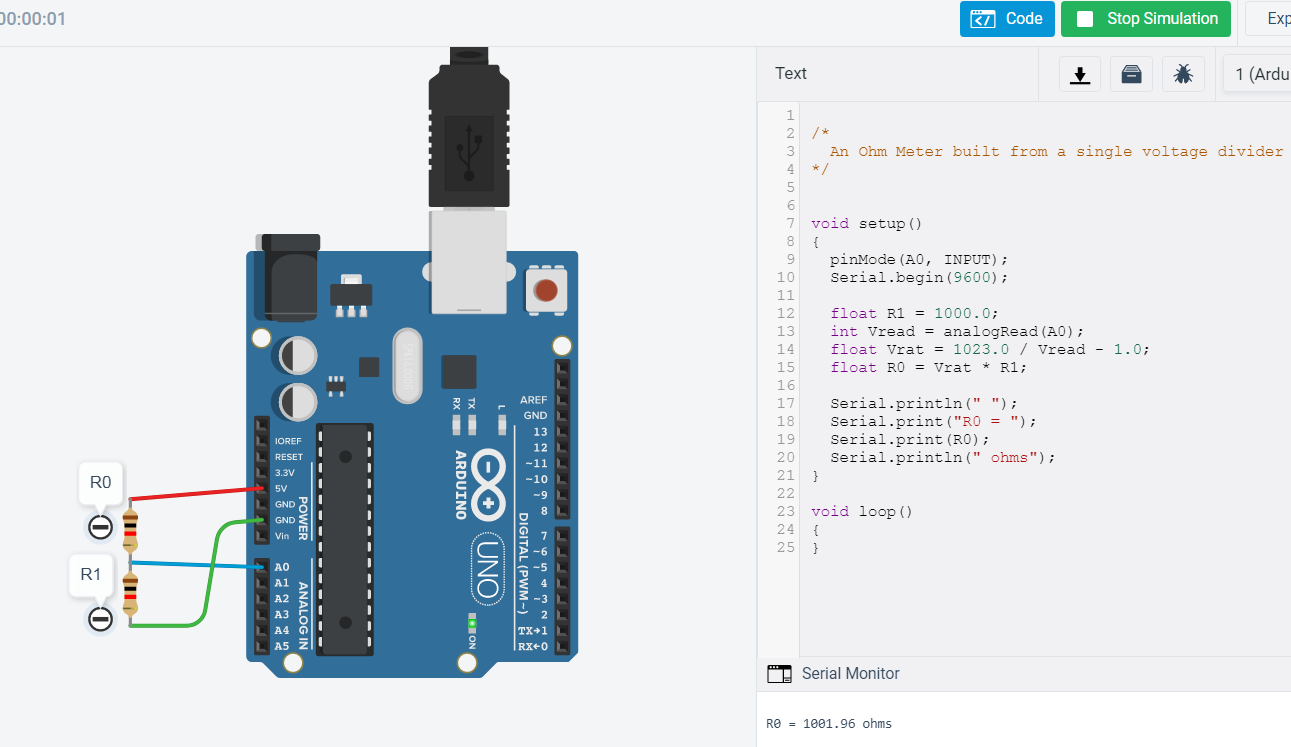

In [46]:
base64_data = "iVBORw0KGgoAAAANSUhEUgAABQsAAALrCAIAAADWQkaYAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P1peBRV+v+P++j/8Pe55vpevwcz89OPgigiQUDcEWeEcUOdkeA2IyigDioC6ogbouKIissgi8qwGvYIYQlIWAIkICCLQBBZJWGHZgsuo7N9/b/Td+Vwcld3daX3rn7f1+tq66x1qro71otzuuqc73/4ByGEEEIIIaSxnPnuB5WTn/g8D2e+/17lkEDi/UZXHziqchTffZ/hrxUNmRBCCCGEkMYxe+fJdtO/afLJrv/fh9tJ04m7cDZKdp5QZ8mwcP8Xt694qf2S/k3ndyOBp/2Sfni7P9v3hfoYCB6GfPL0mUNHTxw8fBx1MggNmRBCCCGEkEYw/esT/zN6h7JEgnMy7esIkjy3ZtWln/VSEkUCD970OdWr1IcBQEFVjgA9PnjkOF5VfvqhIRNCCCGEENII2k3/RskhEXBm1LkCt694SbkTyRPw1qsPA4hmyIeOnsgGPQY0ZEIIIYQQQvxy5rsfmhVxcXVkmhXtVr9JPvP99x2WPqXEieQJHZY+7f5NckRD/u77Hw4ePq4yMwUNmRBCCCGEkEagtJDYqHMFlDWRvEJ9GEC0OeRo+emHhkwIIYQQQkgjUE5IbNS5AkqZSF6hPgyAhkwIIYQQQkigUE5IbNS5AkqZSF6hPgyAhkwIIYQQQkigUE5IbNS5AkqZSF6hPgyAhkwIIYQQQkigUE5IbNS5AkqZSF6hPgyAhkwIIYQQQkigUE6o+H/H7lxx6IefEw50gq5U59mPOldAKRPJK9SHAdCQCSGEEEIICRTKCRW9yg/Db2v/+d92M/Z2mrMP26+vPw7X3XLip5pv/9Vs0h4kwwocO9CV6jz7UecKKGWKybOb/37gHyHnFHgGqqGyak6yCvVhADlgyO+NnwOGTV08Z8vhBmXfHlz3WdmwcOl7E+dPXLLtgF2qiFH5+NaK8g8nhkvHzxtXum77CbtU4afymSN7vpxTMn9cxUFXESGEEEIIISlEOaFCBLj6239hG2KM7a4LD2B7+JZTc/d+hw0kw34XO9CV9BmD0pNlp/7zo9PoP9UHT/5pkqtOLJ4++J+ff/rhaVd+Y1HnCihlisnBf/j9FwQEJFk1j0mHjWUV333/k7T/z/cHTpT1Ldd1kkX0fb0x/sShbUcmdWhYP25eP/H9zz8fmunK92RSae2htTVDXfnJRH0YQGoNubrs8Vu7t9OMWaeqeXLOsEnzR0yaJzo69auT9QUHF08PO+rEeSMmzRf1HVG6LWS1tPCufHrzZ07/KB0h6jt97Tdnm9vEqnx6/8aK5aMdf54zmoZMCCGEEELSi3JChZki3nz8J3gyNk7/9F+z7hobSMp2zPBlyKW1O/79888//VT21bE/LT42et9Pp3/++cdTtberarHIHkN2Dt53qOYxWF255z8///yvQxU10/tuHP/RkUNncPK+q3woXFrnmf/6+nW7fiJ47Wvk4h/xPm3oa9dPAH+GPGntv34+c2JSfbJsG97z2jKrQvJRHwaQBkMevOjE0ZDNGV3Nk3Nqw/8JbSmvM9upn++Sgu0VdclJFZu/DSdPbJtaJ6XzS6udZg3wrnxk3bg6my0rP/JduP7+z8I6PenL005zm1iVN5bWJeHPH4atnoZMCCGEEELSjHJCBbS25tt/4TVBpBPVuYs9o+Hj//7pk9KzmbfvhZb/d+2aszl+yBND7nvs9M8/n67YfDanQ03Nzz//88vdddvJNWTvfSWXuAw5HagPA0iDIb+1zpXfGMzvkLfPqDPPzxYfqUvuWjYf/jli2Tf1pf/Y/Fmdmo5eJUZ65sie7VsPOi7uXfnkl4ux/d7cL0/Wlx5Y9VldzmfO96c29M3GnQdF1GNW3lyx/LOvakLf/qOmoi6fhkwIIYQQQtKMckIFtLbi0A8qMyad5uxT9+VCJ7ENeVLtjp9//vHoCZW5+d//rd4rv2He88Sun07/W1yybgG2Nbe8f/jBf8na7B/P/DD3uG3IVqt//2fzVwebnW0VA3WugFKmmIT32ohQzb0Jm2Ro8Worc/WkKYfWfLS5co/TX13Ua+TQ8SdCZyTrP9/vOTS+flF0XeUDx9bsqVsigPjngRNlMgttE31f2K6T1Z+/qwznh3s7Ur7tX/8821vl9Iof0Lwuzvyw5fXw2mytwV99febn79d+5S5qMOxtNSPrhr3/kGSEQ1rV7fesMH9RtrZ+jz/961Bp1VOSLz0v3vv1gf+Ey/5z+su9jViYrT4MIEOGfGTeCz3b9S3dI8nTm9+/v/vtb68/9cM/9s9+pV3fKctmD+9+Z/d2t/a8qe9EY8gHZbZ2xva6pEzV2tO8YqSOqe4MTxqPX7wyFLuybNv+/P1Xy+tKp68L/1Z556zwkumJG+rOSKzKZ6EhE0IIIYSQjKCcUOFhyO1m7F1x6Af3/bfkl8lFO2rtTF+GvPKH0z//vGO7K7+eXvuguf89cvDUE4sPvgjp/fnn0wePiu7WTRr//N/qfSeeWHxk9MF/16lyvSHfvv2nH51WR0Yfrau2duMe06c36lwBpUwxCXtYI0I1j8H23T/VHeiG11c7BljPSw9tHDn+1Pc//2v3+I0j/1xX+tT4WigrxLhujfSUE6d/+vmfe/aLHIpOn962H0XTS7+rE8sDR1zeGHVfQBuy6W1mbV1vP/3nn6FTlUM3jhx66FBdJ6emo6Y/Q37qo1N1w/6yZnx9b//8cnu3ppVD+24s+/JfP585VdZ349/+WKfcliGX1624/hlivH1k36rytT/+8+f/HJr5hekZYhyq2D2+7/bKbXX/KFAzxfcvt9WHAWRsDhlFd/YcsOgItr+e/Gy7O4cvC8tsnSHf2vO+t8u/rj6xf1PZwPu7a0Oe+lVdUqRXtgVHeku31SUPhtdCT1q5NVzkXTmCyjrSu7amLnmw/FM0nz9nZ92y6liVz0JDJoQQQgghGUE5oSKaIUOM5RfIyoQB6iP/mVVHVWaihjzp1ObwDLOZAQ4L87/LFmP7ZMOiPcOP/7fekE9uRq3jp+qLDpdhdKdqfU4jq3MFlDLFpM7HGhOqeSye6ltTI/OrP/3r0NpDpfZtuups0Kyy3rwl1MB7n5pSi0Y14+u2Zdb3jfqioYtxiiIsz/bYlzbk0NkdlW1Dgx82/NFJvlHX+Y9b+vo15NIv//XP0LH6meHyNQfOThSrVdZnDfnZugXhocVhJa6jvLxuDOGfKId7ttaK762pn4L2hfowgDQYsrpTlxHmPTNeaVc4Zl11xYB6VQZ1hty95GvTw66SuAy5IYkZcgNoyIQQQgghJMtRTqiIaMiw4rAo1emxWk3dbsbeOhn553/jWWXtbcjh0s1brJzF3x2R+q6GZ3+H7CoaetTIc2zUuQJKmWIiJ8p/qOa+qBz90ZHdB5xVzWeXDduG3OEQBPl0xUar1Vk5rHPLPfvPFoV/cmy5q03kfWlDtnqzi+qY+Z2j3/4MWXFWg6Mb8lOl9RJeX9RtPD6wsXbqB/VhAGkwZHWnrlNnK+yd2qv7tXf2vLZv2f76zPAq67PJ73/4ioZMCCGEEEJII1BOqFCGDO/dfNx53I+aJRZEniNOLCdqyNux3/+sWGln1v1uud6QGxSdNeQtP9Y/OMqOnz6pr+mNOldAKVNMnB36DtW8UXTYWFa3orh+jtQ25AjOeVYOtSGHf+UbKl1l5bhouK8UGnKDR0yFI5Yh6z0Ccyo8duoH9WEAaTBkjzt1HV30Vjso9KqzOS5DPuD1O+Rxq8+O0pHe+jtm2XhXlu1hi3aa0nrp1T8tBv4r05AJIYQQQkhGUE6oUIa85USdqtT+87/tZuw1mQZ5YDKi2ST9Q19fhhy+U9fpgw3F29ypq06D/7t2o1W0ot6ow2ptTy83nEP+79qvDv5psc3+dvU1vVHnCihliomcEP+hmnvyxus1a0p3j26QWad8jqAaLcR2eA654X226jQ4siEPVBpZh/e+UmfI07+seye3fLT5jfB9xWwrjmbI4Tnks+u66/CzUz+oDwPIpCGHb9DV5f4+7XqdXVbtMuTNxpAbdS/rBiR4L2sb/5VpyIQQQgghJCMoJ1QoQx6+5ZSI3Cfb9SwxQGUU2fUNvgzZPO1pztnMs097iu93yOFW5oZedZQe7jWjfjsW6lwBpUwxkdPlP1RzT96oU8H/7P7IvtHU7rr7abkNOeHfIXvvKx5D/uORBtLeYW/NT25DtoS/jvAtuGIZcszfIQfEkDeP7NPu/ombQ6sH39n98RkHJDPC75BD4a2Qeh6y3K160vKNJ8JJ/TzkBk97ilE5tCH8iOPPPtsX+RHH9tOeYlY20JAJIYQQQkhGUE6oUIYMepUfDqvcz5uP/6Tmimu+hQz93HXhATtT8GfI0NfaHdDen36au/HInxYfG72v7obVP56qlac6RbiXdb0VW/eyPvbJ0Qb3spYiafXExm93/PTzj8dPtZfdxUKdK6CUKSbhU9WIUM296RAWyJ9+rKmoqbtD9UeHdtc9xOg/NePDHhv+OfH3X+4e+exG2K/7XtY/HzgkwlznlnXPPbLuPu2+l7XnvuIxZJH2n37YUHeP6/27Q+jNbcgit/+qKd09fmjNFnkeVb0Vj6zA2/yv3R9tHN23TrPPGnKEe1n/HCo9ey/rHDNk9Tvko6Gwt+4q6X5rz8HLT2D76KK3rr3zlXlhXa0z5Ft7dn+/ou5e1l+VD76/+znDJs0fMWle3Tzt+HlTvzrpdP3D0fAtpue8N3HeiEnzw892mjOidJvotHraU4zKP3y3dZHTP0pHhJ/t9N70td84pQ2e9hSr8lloyIQQQgghJCMoJ1S4DRm0m7G39p91N7I+/dPZ5dZizpBkU83GryF/uL3Z4pMrztTZUl38+z879p380yRTmvDzkKHKx888cbbDGKhzBZQyxUT26j9U85g0/JnuP898t2W8mTtdXfc8JMSZE+PDOb6fh3xs+u1OUQOi7ysuQ57/1MBDh+rHE1p7pCbSKutut2/fcsAZGMZcXtfbD2tk5H/cuzvc/Pu1VUhahgw8n4ecW4Zs38g6zJh1PxyY2bf7tS9UHHVqhm/ZFU6GV1nbz0Oeco4I7bCpi+dsOdyg9x8Or/uszHHUifMnLtl29pfADZ/2FKNyHSe3V5R/KKXj540rXbddZpvraPC0p1iVz0JDJoQQQgghGUE5oSKiIYP/d+xO5EM/5u79TnKwgWTE23cB/4acVahzBZQyxSTsaI0I1TwtKKclUVEfBpBaQ248rt8h/8P8DpkQQgghhBASG+WEimiGLMCHzULrrgsPuB/+ZMhbQz74j7rfZvsMVFbN0wIN2S/qwwBoyIQQQgghhAQK5YQKb0P2T94a8rOb/+5TklENlVXztEBD9ov6MAAaMiGEEEIIIYFCOaGi05x9jsAlHOhKdZ79qHMFlDKRvEJ9GEC2GbIbGjIhhBBCCCGNQDkhsVHnCihlInmF+jAAGjIhhBBCCCGBQjkhsVHnCihlInmF+jAAGjIhhBBCCCGBQjkhsVHnCihlInmF+jAAGjIhhBBCCCGBQjkhsVHnCihlInmF+jAAGjIhhBBCCCGBQjkhsVHnCihlInmF+jCAiCb83fc/HDx8XGVmChoyIYQQQgghfjnz3Q/NinYpLSQCzgzOT4PT9f33HZY+payJ5Al46/EBsD8PINpc8aGjJ06ePqMyMwINmRBCCCGEkEbQbvo3ygyJgDOjzhW4fcVLSpxInoC3Xn0YQDRDhh4fPHI8GySZhkwIIYQQQkgjmPb1if9n9A4lhwTnBGdGnSswp3pVi896KncigQdvOt569WEAHr83hh4fOnri4OHjqJNBaMiEEEIIIYQ0jolfHW8+aXeTiVxuXUeTT3bhbHzyVdTfkRbvXfHb8meuW9JPSRQJJHij8XZ/Wl2hPgYCFFTlKL77vsFC/fRDQyaEEEIIISQe1G9u8xaf58H9k1QSSLzf6JiGnHFoyIQQQgghhBBC0gENmRBCCCGEEEIIqYOGTAghhBBCCCGE1EFDJoQQQgghhBBC6qAhE0IIIYQQQgghddCQCSGEEEIIIYSQOmjIhBBCCCGEEEJIHTRkQgghhBBCCCGkjhwwZAyREEIIIYQQQgghnEMmhJCEuDztsXLV52oMhBAbXN+cOfMdISRx+G0iinz4SNCQCSEkIRxtTWPQkAnxhtf0hCQLfpuIgoZMCCEkBo62pjFoyIR4w2t6QpIFv01EQUMmhBASA0db0xg0ZEK84TU9IcmC3yaioCETQgiJgaOtUaJt27Zt2rQpKCi49NJLW7RocdFFFzVzBTIvueQSlLZs2RKV0cRpHCVoyIR4w2t6QpIFv01EQUMmhBASA0dbrYDltmrVCkp88cUXN23a9IJGRpMmTeDMEGZ4devWrZ1OraAhE+INr+kJSRb8NhGF90eiFtQK3+YuNGRCCEkIR1vD0bZtW4jxJZdc0rx5c4iuo7zxhplbhnI7OwgHDZkQb3hNT0iy4LeJKCJ+JMJi/O3psF6eOn0GG6dP5zA0ZEIISQhHW8MheoyIY+o4YkhvCGcH4aAhE+INr+kJSRb8NhGF+yNRW/uduPHxE6cPHjl+4PBx1MlpaMiEEJIQjraG47LLLhOhveiiixzHTSCaNWsmvRUUFDg7CAcNmRBvcH2jLuAIIfGRrG8T9EnlpIjG7ihtAwPBGJv6SNSeqdPj06fr9PjA4RBe7dIchYZMCCEJ4WhrfbRt2xZC26JFi/h+hCwhP0WGG8u9u5yu64OGTIg3NGRCkkXi36Y0zyvuPxTC7vx4WvonPIMxNlS2k1BrGPKpU2cwWj/NcwIaMiGEJISjra6AKrdu3dq/LaOCseLLLrvMLcYmaMiEeKMu4AghcZPgtwnKlP55RT87zcjAQK6PDaiPRPiHu2dOnKiFIdv5OQ0NmRBCEsLR1sYE5BkO7K3BHkFDJsQbGjIhySLBb5PPacmkg51i1yrTJlMDAzk9NmB/JOSe1adOnTl+8nSQ/vDSkAkhJCEguo65piVat249q2S2GgMhxIaGTEiySOTbBHfK4Lwidh3tt7WZHRjI0bEJDQ257hfIJ0/VQq1pyIQQQuo4Fjp+0UUXXXzxxZdeemmrVq3atm3riGxSQ+acW7Zs2bx5c+xu+IgRahiEEBsaMiHJIsFvUwa/jN67zuxfidwdG7ArGEMOHT+V2WEnFxoyIYTET+h4nSGrgDBfEn6OMZwWAXMOL6n2FahcUFAA30ZzdAIlRm9Ov/VBQybEmyBdqBGSWRL8NmXwy+i968z+lcjdsQG7Agz51OlvT5w8E+IcMiGEECF0/ISjrWkMGjIh3gTpQo2QzJLgtymDX0bvXWf2r0Tujg3YFcKGfIaGTAgh5Cw0ZEKykCBdqBGSWRL8NmXwy+i968z+lcjdsQG7Qr0h14aO05AJISTP2LPnm1Wff+6mfNnyS9Mer//1DTUMA8apRk5IHhKkCzVCMkuC36YMfhm9d53ZvxLJHduO3TW3d3+q36B3sWHnDx87/b7HXnzxzQ/tzJjE3LtdgYZMCCF5yoSJE51bZuVCYLRq/ITkG0G6UCMksyT4bcrgl9F7140a2MYtX7e7tbs346fPU608SOLYhBlzF9/b+wV48sFDxyRnyPAJNxT+GZKstDkmMfduV6AhE0JIPrJp8xZHPXMnMGZ1FITkFUG6UCMksyT4bcrgl9F7140a2L29X3xy4DuVazZGAyIKHd25Z59qGI0kjs0AN+7cvX+/Qe+Onzbvs6WfQ9oXLF2l6vgh5t7tCmkw5GPHjn/w4cdbqrap/JRCQyaEEC+GjxjheGfuBH+oTPKcuC/U/jr03YvaXB6RJ//y3NFjmXxIKSEZIUHtia/5ypWfX2/Fhx9+pCr4wXvX/gcG++3Q5dFFK9b0evr1aBTPW3LPn1/o+/K7qm00kjU2xb29XzBz2rd3f0qV+iTm3u0KqTbkkydPD/3bB/0GPH/o0BFVFAebq7664dbbllWsVPkKHBQNmRBCvKAhE5JzxH2htnHTlsXly4Unnnn2jz0fXlC2WJJr1q3HtZqqHxNINdSadk1ylwS1J77m8+d/do4Vzz//gqrgB+9d+xzYzj37ZK3yZ+Wr8BqN8dPnVa7ZCC9FNdVDRJIyNgWGYfRYqFi9UdXxQ8y92xXiNmQ03Lrt62cHvlyxcrUqsilbUl74QPedu/bYmfJ39U+9Ht5/4KCdHxOfhnzixCkaMiGEeEFDJiTniO/6UvHXoe8mbrY0ZJLrJPhtiq959hhyr6dfv61bP3jyiHEzvIEbv/HBeOj0ocMh1YmbpIwNvPjmh2+OmCC/Pe71zGBlyHKPrh27ax5+5vVx0+aaVt7E3LtdIQ5DPn36zIrKz3s81keW53j46uEjx/7cr//YTyap/PUbN1/3u5taXHHVwsVLVZE3Pg0Z0JAJIcQLGjIhOYf/60sPIhry3up9r7zx5uXX/6blVdc8N+jVPd9UI/PgoSOPPtnPVMbr0y+8dN9DPUvmzTeLtEHR1OmmH0JyhQS/TfE1zxJDHj99HjxTfmbc8+nBMdm1Z1+HLo/6WWud+NiEitUbO3fvf3v3pxYsXdX35XdsPQYyv/2brr0hz/7v1xVz73aFOAwZgoq/n88OfHnu/IXX33yrh69Wfr66c9e7t329w87EHv828sPuj/aGPL/25tuNWtpDQyaEkORw7733Ot6ZO9GzZy91FITkFf6vLz1wG/Keb2rgvT0e64PrtrXrNmKj2yO9ZZkfkrjUmzmnFNsLyhZf9duOuAg7ceLUzl17evd/CmCD08gkF0nw2xRf82wwZOjug/1efeqV91eu/dI/H0789N7eL6xat0X1pkhwbDYHDx0bMnwCfBgmbOux5NxQ+Gf/s8dCzL3bFeIw5AMHDx8M/6g4pq8OG/XRE0//5cjRBnPy+JP7p14Pj/1kEv7SdrrjD7Y/oyt0OGnajHsefOiuP3bbt/8ghgcPv63w7ovaXI5WKDJ7lMoYg7TF32f8wceffUnSkAkhJCq5eCNrCT4YmeQzjbq+jIbbkHFNZl+QYQPJWXPrrBjXYX+fMPHubg+u+WIdXt8dPlJmNuSqS/VDSA6R4LcpvubZYMjyu+L4GD42xoKRBMemgCTf99iLagzCS2817mHIIObe7QpxGLLB25CVshoWLl56/c23rt+4efeevbfffa+9NgddwYSv6fi7vw59Z+6ChYcPH4VFt7rmuiHvvr+8chVU+Q/3P4AKNGRCCImfo8dCuTiBLIGRY/zqiAjJExp7oRYRZchy/fTcy4NOnDglOUeOhp54+i9vvT9MkrLW+qrfdvxTr4era/ZLprSy+yEkt0jw29So5kqM3dEoVfbedcyB5YohV6ze+PAzr6sB2ECSG/VI5Jh7tyukzpD37T941x+7qR+n4M8v/gj/uV//w0eOnTx5euDrb8i2lKKrNtddX7akXJLyM+ZBfx1iVmKv+WKdLPCRyjRkQghpHCtXfd6hQwdHN3MzIMl8MDLJTxp7oRYRZcgQ4Af//Jj8otjGnuKQHx5Pn1licmjIJNdJ8NvU2OaPPfa4Y8OuKCgoUJW98d51zIFlvyHPmLs42tSxm36D3vV5a+uYe7crpNmQZeWOuXfXgrLFUOLP13whSSW9VV9t+23nO2WZj2DvkYZMCCGNY+TIUY5l5nhA8svKFqmjIyTwNPZCLSIR55Bffn0IrttsDh929iW/Ur7qtx3vuOc+82wSGjLJdRL8NjW2+b59B/7nf/7HceKGMX/+Z6qyN967jjkwtyHLI50iomqm2pDhurd3f+qGwj8PGT5h3LS5au9uFixd9eKbH2Lj4WdejzmfHHPvdoU0GzLc+Lrf3bR+42ZJ7vmm+vf3/fFvIz/EMJBU0uvun4ZMCCHxcPRYqFevhx2/DEpA+NVhEhJsGnuhFhFlyLgCw3WYegLngYOHZf0eXof+7YN7H+qxacvWbo/0Nuv6aMgk10nw2xRH8ylTpjlObMVjjz2uqsXEe9cxB+b23hffHKWe8GRQNVNtyDBe7EIe8oQNtXc3MnsMN4Yn564hHz589JE+fe0lPAIkWR4roKRX5pAXlC2WJKAhE0JIoykrW5TrK6ujRb/+/fmzZJI/NPZCLSLKkIF9L+sdO/eMnVh03e9u/nT2HBQtWbbiqt92lEsxXHiZbVw+DnnnPVznzV2w8OvtO6UfQnKIBL9N8TVv3769Y8bh+J//+Z99+w6oOjHx3nXMgbkN2T/pWWUtuB/y5KZRt7OOuXe7QuoMWSkrwB/eNtdd//6IUYvLlxvGFU1Gpvnba0uv9++QK1auvvz635gV2gcOHu75eB8aMiGENODNN99ybDKgwZ8lk/yhsRdqEXEbMjDPQ25xxVV/7PkwxBgXiGLOzw169fjxk6iDqzFY8d3dHpRpjS1bv7rnwYdQf8as2aYfQnKFBL9N8TWvqvrKXms9Zco0VcEP3ruOObCcMOQZcxerXd9Q+OdezwxWmb/p2nvD5q9V22jE3LtdIXWGDOynPeHv6mtvvm2miw2iwX95aSD+/CpDBjDnaPeylhXaPR7rA80uW1Leb8DzKKIhE0KIQyBXVkeMDh06UJJJPtDYCzVCSDQS/DbF3fz5518QPW7fvr0q8on3rmMOLPsNGdKLfak5ZOgxiuwccebbuz8lq7JjEnPvdoWUGnLl56s7d71bHrC3c9eeO+65z/zk2ObT2XPkx8luQ0Zl2K95HvJni5fc9cduZo9rvtiATBR1uuMPIz7+O0ybhkwIIQ5DhrzpGGQeROfOndXhExI8GnuhRgiJRoLfpkSaFxQU/M///E+VJTyNwnvXMQeW5YYM3f1N197QY2x37t7f7NptyEOGT0Bl1Ok36OyKZQ9i7t2ukIghx0Tmh82dq9MJDZkQku8E9bfH0WLlqs/VGSAkYCT9Qo2QvCXBb1MizefP/6xRD0BWeO865sCy35BffPNDmRauWH12qMhEzg2Ff5YkNqTOhs1fQ5WlrTcx925XSKkhg7Il5YUPdDdPB0gbNGRCSF6zafMWRxzzJoaPGKFOAiEBIxUXaoTkJwl+m7yb19Ts/38SiGnTvETUe9cxj2vnnn1GOxtL8bwlqjdFgmNzY36QLLethqJjG3rs/+fHhph7tyuk2pDlMQFPPf/i4SO+lognCxoyISSvWbnqc0cc8yZoyCTwpOJCjZD8JMFvk3fz6uoa+bFxfFFUNFl1aBNj1z6OC5Jc6Xr0cUw2boktpYmPzQ1keMHSVSY5btpcmT1uLDH3bldItSGDY8eOf/Dhx1uqtqn8lEJDJoTkNTRkQoJHii7UCMlDEvw2eTc/fvwkLDduduzYpTq08d51Zv9K5O7YgF0hDYacEWjIhJC8hoZMSPAI0oUaIZklwW9TBr+M3rvO7F+J3B0bsCvQkAkhJIDQkAkJHkG6UCMksyT4bcrgl9F715n9K5G7YwN2BRoyIYQEEBoyIcEjSBdqhGSWBL9NGfwyeu86s38lcndswK5AQyaEkABCQyYkeATpQo2QzJLItwn6dODwcZWZNrBrDEBlCpkdGMjRsQmRDPnMseOnMjvs5EJDJoTkNTRkQoIHDZmQZJHgt+ngkePHT5xWmWkAO8WuVaZNpgYGcnpsQBny6dPfnqwz5NMHDocyNeykQ0MmhOQ1NGRCggcNmZBkkeC3CcqUfnHys9OMDAzk+thABEM+VRs6cepY6FRGhp0KaMiEkLyGhkxI8KAhE5IsEv82QZkOHjm+/1AIXaWBA4eP+5yDTfPAQDDGhspmu86Qa2HIZ46fPH00dBKSnOZhpwgaMiEkr6EhExI8cH1jLuAIIYmQrG+T909bk0hjd5S2gYFgjM3+SNTW1lF/s65TR0InDx09ceBwKMzx3IWGTAjJa2jIhAQPGjIhyYLfJqJQH4nT4Zt1nTxVe/xE7bGwJB85dvLwsROHj548fBSvOQkNmRCS19CQCQkevKYnJFnw20QU6iNRW/stEEk+cfJ06MTp0PHTUOVjoVNHcxYaMiEkr6EhExI8eE1PSLLgt4ko3B8JkeTTdZIsnmw4naPQkAkheQ0NmZDgwWt6QpIFv01EEfEj4Uhy+NbWUOVTDt/mKDRkQkheQ0MmJHjwmp6QZMFvE1FE+0jU2p7sqHJdMhehIRNC8hoaMiHBg9f0hCQLfpuIIh8+EjRkQkheQ0MmJHjwmp6QZMFvE1HQkAkhJODQkAkJHrymJyRZ8NtEFDRkQggJODRkQoIHLuAIIYSQ+KAhE0LyGhoyIcFDLnHOnPnu+++//+GHf/yYxjhz5ttjx0K1td/a0xGEEEJyCBoyISSvoSETEjzEkGHHjramN06ePHnkCBemEkJIrkJDJoTkNTRkQoKHGLIjrGmPH374obq6Rl1vEUIIyRVoyISQvIaGTEjwyKwh/+Mf//jmm2/U9RYhhJBcgYZMCMlraMiEBI/MGjKChkwIIbkLDZkQktfQkAkJHjRkQgghcUNDJoTkNTRkQoIHDZkQQkjc0JAJIXnNnj3f9O3Xr2fPXrfddptjkAGNDh064DBBWdkidRIICRg0ZEIIIXFDQyaEkDqGjxjhqGRAA26sDpmQoJIGQ66qqho9ejRenXTDoCETQkjuQkMmhJA6aMiEBIaUGrK4cXFxcUlJCQ2ZEEKCBw2ZEELqoCETEhjSMIeMKC0tpSETQkjwoCETQkgdNGRCAgMNmRBCSNzQkAkhec3RY6GRI0eBe++911HJgEaHDh3kSDdt3qJOAiEBg4ZMCCEkbmjIhJC8Jo6nPbXNsnCG5Tv4tCcSeGjIhBBC4oaGTAjJaxpryK1bt7744oubZ01cdNFFBQUFzuD8BQ2ZBB4aMiGEkLihIRNC8prGGvJll10GQ740a+KSSy7BqzM4f0FDJoGHhkwIISRuaMiEkLyGhkxI8KAhE0IIiRsaMiEkr6EhExI8UmrIsOLRDaOoqCgUCjnF4aAhE0JI7kJDJoTkNXv2fNOzZy9w2223OQbpGTltyHKkZWWL1EkgJGCkZw7ZI2jIhBCSu9CQCSGkjuH+noecu4bM5yGT/IGGTAghJG5oyIQQUgcNmZDAQEMmhBASNzRkQgipg4ZMSGCgIRNCCIkbGjIhhNSRZkOG2TZr1sxJJBA0ZELc0JAJIYTEDQ2ZEJLXHD0WGjlyFLj33nsdlfSMZBnyBRdccP755zuJBMK/IXfo0EGOdNPmLeokEBIwaMiEEELihoZMCMlrMvK0J2jt/xeOpHSFV2dw/oJPeyKBh4ZMCCEkbmjIhJC8JiOGfMEFF4ghJz6NTEMmxE2OGvKBrasr37n75LGjKp8QQkg6oSETQvKa9BuymUCWEMWNO2jIhLhJtSFDgMeNGzc6HFVVVU6uFfEZ8uqRvb75fLbKDO3/BvnUZkIISRs0ZEJIXpN+Q27atKkjx+G44IILnIK4goZMiJuUGjLs95NPPsErtkOhUFFRkVuS4zDkaCZMQyaEkDRDQyaE5DVpNmQI7bnnnvvrX/9a9Fg2EplGpiET4ialhlxZWWkrMbZLS0udRH3EYchVs4YCOwdijBwxZLwuG3yzqkAIISQV0JAJIXnNnj3f9OzZC3To0MExSM9I3JDRvFmzZmLIF110EZJpM2Q50rKyReokEBIwUmrIKrZv3y7zyXY01pBFgPGq8uHGxXefI7gXYBNCCEkFNGRCCKljeBqfhwytFUNu0aKFkxVv+DdkPg+Z5A9pM2SYcElJSW1trZOuj8YasnsCWTiwdfXi569eP64/VFkVEUIISRE0ZEIIqYOGTEhgSI8hQ4OnTp0aCoWctBWNMuRoE8gAYixTx7Li2i4ihBCSImjIhBBSBw2ZkMCQBkP20GNEoww52gQyIYSQjEBDJoSQOjJuyM2bN28aKZziKEFDJsRNqg3ZW48R/g3ZYwKZEEJIRqAhE0LymqPHQiNHjgK9ej3sqKRnpM6Qze27VDjFUcK/IXfu3FmOdNPmLeokEBIwUmrISo+RLCsrk20T/g2ZE8iEEJJt0JAJIXlN+p+HjMiIIZvg055I4EmdIdfW1hYXF49uGHE/7YkTyIQQkoXQkAkheQ0NmZDgkdI5ZD/h05A5gUwIIVkIDZkQktfQkAkJHrliyIQQQrIQGjIhJK/JQkP+9a9/LRsSTnGUoCET4oaGTAghJG5oyISQvIZzyIQEDxoyIYSQuKEhE0Lymj17vunZsxfo0KGDY5CekdOGfM899+BIZ86cpU4CIQGDhkwIISRuaMiEEFLH8Ew/D9nE+eefj6KYT0KW8G/IfB4yyR9oyIQQQuKGhkwIIXUk15AhrhdccMG555573nnnXXjhhU5uffgxZHeriEFDJsQNDZkQQkjc0JAJIaSOJBoyrBVuLA4sAel1ysLhx5B9zlTTkAlxQ0MmWUVo/zeLn7/6wNbVKp/EzcljR5cNvvmbz2erfJJtxP3hz+y3hoZMCCF1JNGQL7zwQhFgO5o3b+4U05AJSTGpNuRQKFRUVDQ6HJWVlU6uFQEz5KpZQ4vvPidvH928emQvHH4iMhbtWl9OLMAuVFGCYI8LnrxIOk9w8NlJ0g0ZXcm5QrfoXJWmGfP2ze7xf3LoH1bkHKoPc0oNOXV/mmjIhJC85uix0MiRo0CvXg87KukZfgxZFFdFs2bNnOIMGXLnzp3lSPfs+UadBEICRkoNuaqqaty4cXBgSZaWlrolOdWGbMzKfT2aIHbPtn5gO4mXoaI32IVtIybTz45w3bx+XH+VmTowpCTKmCLasSAzbjvCpyJ1Aw4wsDKcuowbsiHiZwDDwyAxVJWfDaT5iwmS+6fJQEMmhOQ1qXjaU9OmTUWA7bBbeRgyimSFtj3n7BH+DdkEn/ZEAk+q55DtgAyXlZU5ifpIzxyyXBom4lEKXHYbZRVfNZeeSb8MRf+V79y94MlmRuSwsei5K33uJc0X4hiVGWfSiXYscb+zcm6T9anIK2jICZLmLyZI+p8mgYZMCMlrUmHIxnJNnHfeeU5ZOKIZMvJR013fI2jIhLhJpyGXlpZWVVU5ifpIjyHL1bN9gShaO7vH/9m3cYnMx6qpYA9QzeixYK9ylL3gulz6lJpmd5umDpLMI7urZHVozGtWucr/+rOPTFeSNA2xX/Qsu7PXmspOJd+AtlLq0RCgc2RihDg02QZ+zg8qyxmQJtID8vGKbZM0uzZ9SgXkqJHYIF9JBZrLjgwezRXmPTKYkyPdSldmF+aEq7ZyCFINvi3nHEn7HJqG0TAnRJA+fWK3xfnB2PDWI9/+AKgOZfzINAdiHx2w38GDX62x3zsB22ZHNvaZwbYqjYj6tMiZBOattA8k2vvrNmTTrcE+BLtUHZpdiiJ1+PbZjjaYiNhHgQ385TEfZvSM/t0dmnyAIdk9yLmN1lCwm6O+fCalyO4KmHy7FTLNNiq732uBhkwIyWtSYcgI1DGSfP7554vHmohmyBdccAEy0VDV9wgaMiFu0mDIcOBx48Zl8HfIuHCUK1Fc7eE6D6+mCPlmbhb5Pn8EiAtH5Rt2plzfGzdAvtnGhlxoIlOuaN1DcoP6aAijltlO9G9f7KoesIErWnt45vAVMRtivzJ3LeNHEtf0pjQaGNWi5640h4y9owc5q3IgZo9ADsQkBbfqGKIdi0cTb+QYo7WVj4e8ZUiaoWLYcvIBilBBkugHbyuqycmUk4AiU9kn0qf7zEREvY/YqRmwAQNw94ZMsxJB7RGZMniAg0I1nCXVJ/aIOu4dSYcm6R5MRLAXexd253i1xybn1n04ET8DaIt+zMmJBhriu2+qeRw+6thnO9pg3Kia2LD/ShgiHgWq2bvA8PwcPpLmqwfQyjZh1SeSajAoxYEb8T741Rpz1AoaMiEkr0mRISNQDbr7v//7v07aCrchI0f0GOGzfwkaMiFu0jaHXFtbW1xcnJE5ZPuCUl1c4qLQXDJK0n3p6SbiVSwaSlfYsK81UdNcXpuGprK64I6IucpHE2xIJ/bu7EMAqIlqskeAymhiSg0xG2LDNhOfyCDtHLMjcyCmCEl3/xFPrxDtWDyaeIMheRgyhqdOEXCPwRyXKbKPFD24O4kJmvg889ipbXcRidgbMjFIOynjdL9NaOsWXVRANTvT3RD4PxD7TbRbYUMGZnDvGkT8DEQckhu7mruJffg+B+PG3RA5aGjngIhHYT5XINru3A3dZx45MoaInage7KP2hoZMCMlrUm3I5zd8zpOEMmQkZXH1ueeee9FFF0kdn0FDJsRN2gwZEQqFIMl4ddLhSLUh41pwQf06Q8G+KlUXhShS15QRcV962pl4lctQAf0ny5DlWGT8pge82kcnoJrpE3s0l9c2MRua/ZomfkC36uSYAbg7jHjC1ZtiE+1YPJp4gyF5GHLEbtX7K0hNMzz7SFHZXd8NKqsPqvvMRMN+K+130K7g7k1lmnGiOQaPQzBF7pyIme5DEKTbmJizp3p2D94+vYaIb1bEmgL6tAdpzpvau8rBYOxWQsRzrnAfhTlem4hHAUy+ux/B3dCdg4byXiB/trWk32D3bCrHhIZMCMlrNm3e4oijv0i6Idt67PPuXHbEYcgTJk5UJ4GQgBF4Q3Zf59kXjuoiEtfBEa8+FaiDmnYOro/V75BNETKTZch2pulB7c4N9oj9qkwQs6GHXXiAPlW3ZkfuDiOecPeVvSHasXg08QZDaqwhu8dgjssU2UfqPiFuUFOt8EcT95nxAzoxnzdDxN5Uphmn+22K2CcqoJqd6W7YWOSEm5EI5vNjcO8aRHyzog0JfdoTpHY1dxP78N2D8Ym7IXKwIzsHRDwKgEwUYVTR/ly4G2J32IXKkTGgB/cJVPg/UhoyIYTUMTx5z0OW8GPIUGL5uXJ8eozwb8h8HjLJH1JqyKXhkG1ZZW2SJlJtyO4LR/vKT5XiqlFdU0YDNc0VNl6xbfpUV5boP6WGjFLleNi2l93aSbwuePIinw0j7jcm6LzYmjZUfZozjM5x4GraSnC/ZQbko1RlAnRr9ogNP3N6gvsk2EQbicrHHmXvZnj2qTOlHqCh+ZAAnJOIZyYiqn/VlYAK7t5Upt0P8jF+2cZR4HyaT7sB+aijMu2Ggv3WxATNMXhz6gT7ZApIug8n4puFthi5qYyGciD2wUq+/ZnxOHy8en9rooEKqGYaYmN2j/9j9mKI9pGT/W6aOijayXQ3VAPDQdlfTHUG1IkC2I62LwUNmRBC6siIIYsen3feeSK6cQQNmRA3qZ5DrqysHF0fab5Tl1zz4aIQyJWonTP/iQuXDvqNbONa0C7yeV2IalJfelCZckktV6VA7U7yUUfuaG1uh+NGLtCloRyFdw7AtrksFiIOFURraJ8Ng5/TgvGgJnYhG0ANRsRAikw16dk0MZjTYrcyyLEL9oHImTdF0fA+Rvdgou3OFMl7CtAtKkjnyJSTbzePiP0eoa3c89zPObcbAvuEqyJBPgDmAGUXJmnGadrizMs7JWdVHbtgn3O1U+nfJ/KmuJuoD4BdwYzcYD42gt3WHJ1693G2kbQbRjt8oM6AfcK9sRtiA92iczl1MY8CoL57X94N7WPHjnaWT8aGOQmqrXwwADbsfOB9jDRkQgipI+mGbDTYSVthin79619DkuPWYwQNmRA3qTbkmJGGO3URQhIBouWel84f8vzwY0JDJoSQOpJuyAiZIm7SpImTrg/bkP33FjFoyIS4oSETQryp8rFQPMDk+eHHhIZMCMl3Vn3+OejXv7+jkp7RKEOWhdaIZs2aOVnhMIYc8VlQjQr/hty5c2c50qPHQuoMEBIwaMiEEDf2UluzLjd/yPPDbxQ0ZEJIXpO6pz1JwI1Fhi+88EInyzJkZc5xhH9DNsGnPZHAQ0MmhBASNzRkQkhek2pDRhhJvuCCCyTHGHJjn37sDhoyIW5oyIQQQuKGhkwIyWvSYMgIJcnGkFu0aCEV4g4aMiFuaMiEEELihoZMCMlr0mPICFuSaciEpBQaMiGEkLihIRNC8pq0GTLCSHKTJk1kg4ZMSCoIpCGvHtnLPNuTEEJI6qAhE0Lymk2btzji6C8SMWSESPKvf/3rDBryhIkT1UkgJGCkx5ChwePGjausrHTSVjTWkKtmDfW2Xz68lBBC0gYNmRBC6hieguchR4wmTZpkxJDvuecedciEBJX0GHJpaemUKVPSY8gxKxBCCEkWNGRCCKkjbYZsfoSMSKch9+zZSx0yIUElDYZcVVVVXFy8cePGRAz5wNbVi5+/OrT/GxFgsODJi5BU1ZCzbPDN7nxCCCGpgIZMCCF1pM2QERdccAENmZDUkWpDDoVCU6dOhQbDkxOcQ4Ykz+7xf4rvPgdAgyOuo4Y/A5VJCCEkRdCQCSGkjnQasrllFw2ZkFSQakMuLS0VMU7ckMHqkb3Wj+u/+PmrYcuqCHACmRBC0gwNmRCS76z6/HPQr39/RyU9IymGbBZap9OQO3fuLEd69FhInQFCAkZKDRn2O3Xq1FAohO2kzCHLLbjMimtVgRPIhBCSZmjIhJC8Jp1PezJx0UUXiSEnRbbx6gzOX/BpTyTwpNSQocSjG4Zbkhs1h+wBJ5AJIST90JAJIXlNmg0ZQnv++eebe1lj49xzz23evLlT3PigIRPiJqWGbEdSVll7wAlkQghJPzRkQkhek05Dhs3Ch0WMjSHLRtySTEMmxE0wDJkTyIQQkhFoyISQvCadhmxuYe02ZJizU6mRQUMmxE0aDDkUChUVFaV0lTUnkAkhJCPQkAkheU3aDBkqKzKMcBsyIr5pZBoyIW7SNoccLRI3ZE4gE0JIpqAhE0LymrQZMlo5KhwlLrzwQqdqY4KGTIibABgyIYSQTEFDJoTkNTRkQoIHDZkQQkjc0JAJIXlNRlZZRwyusiYkWdCQCSGExA0NmRCS12TkTl3uOP/8851KjQwaMiFuaMiEEELihoZMCMlr0mnIsNnzzjvPcWIrzj33XBHdOIKGTIgbGjIhhJC4oSETQvKadBoyAkKrZpLPP//8uPUYQUMmxA0NmRBCSNzQkAkheU2aDVkCWotOEIm4sQQNmRA3NGRCCCFxQ0MmhOQ1GTHkJAYNmRA3KTXk2tra4uLi0VZUVVU5ZfVBQyaEkNyFhkwIyWtoyIQEj1QbcmlpaSgUctKRgoZMCCG5Cw2ZEJLX0JAJCR40ZEIIIXFDQyaE5DU0ZEKCBw2ZEEJI3NCQCSF5DQ2ZkOCRakO2f4eMbeQ4ZfVBQyaEkNyFhkwIyWtoyIQEj5Qasoqqqiq3JNOQCSEkd6EhE0LyGhoyIcEjnYYccdE1DZkQQnIXGjIhJK+hIRMSPGjIhBBC4oaGTAjJaxpryK1bt4Yhw0uzJDCYli1bOoPzFzRkEnhSasiVlZX2smroMUK2TdCQCSEkd6EhE0LymsYaMqJNlkXbtm2dkfkLGjIJPKmeQ66qqnLu0zV6tFuPETRkQgjJXWjIhJC8Jg5DzvWgIZPAk2pDjhk0ZEIIyV1oyISQvIaGTEjwoCETQgiJGxoyISSvoSETEjxoyIQQQuKGhkwIyWtoyIQEDxoyIYSQuKEhE0LyGhoyIcGDhkwIISRuaMiEkLyGhkxI8KAhE0IIiRsaMiEkr6EhExI8aMiEEELihoZMCMlraMiEBA8aMiGEkLihIRNC8hoaMiHBIz2GXFVVNToc48aNgxI7ueGgIRNCSO5CQyaE5DU0ZEKCRxoMubS0tLi4uLa21kk3DBoyIYTkLjRkQkheQ0MmJHik2pCrqqoqKyudRKSgIRNCSO5CQyaE5DU0ZEKCR0oNuba2trS0NBQKOelIQUMmhJDchYZMCMlraMiEBI+UGjLcGIZ84MCBoqKiiD9CRtCQCSEkd6EhE0Lymk2btzjimDcxYeJEdRIICRgpNWTYb3E4RIwhzNhWU8o0ZEIIyV1oyISQfGfIkDc7dOjg6KNnXHXVVTcnKW699dbbbrvNSSQc119/vTPEWNG3X7+jx0LqDBASMFJtyOPGjauqqnLS4Z8l20kEDZkQQnIXGjIhhPhl567d5eXlFdFj+fLlS/zFggUL5s2b5yRixbJly5wdRArsdN269WqohOQzKTXk2tra4uJiGjIhhAQVGjIhhPhl955vVqxY8Xn0WLlyJXzVT5SVlc2fP99JxIrKykpnB5ECO92wYaMaKiH5TEoNGQEBLikpkUc9cZU1IYQEDBoyIYT4hYZMSE6QakNGVFVVjQ4H79RFCCEBg4ZMCCEO3373/bFQ6OjRY9HYvn3HqlWr1kSP1atXw1f9BLx36dKlTiJWQIOdHUQK7BSGrIZqc+xY6HTtGXWwhASYNBiyd9CQCSEkd6EhE0LynYqKypkzZ5WUzF63bt3OnTt3BC5wUIiTp06rAyckqNCQCSGExA0NmRCS1xw+chR6DBYuLNu+fTuuawMZu3fvrq6pUcdOSFChIRNCCIkbGjIhJK+xDXnHjh3ik8GLXbt2fbN3rzp2QoIKDZkQQkjc0JAJIXkNDZmQ4EFDJoQQEjc0ZEJIXkNDJiR40JAJIYTEDQ2ZEJLX0JAJCR40ZEIIIXFDQyaE5DU0ZEKCR54Y8okjp4ruLqlasFPlE0IISQQaMiEkr6EhExI8UmrIlZWVoxtGaWmpU1Yf+NKp661U4MeQK0d+8dw5b+FV5ecW1dU1PXr0xKvJeemlgYsWLTZJQghJIjRkQkheQ0MmJHik2pCrqqqcxI8/Yhs5TqI+8KVT11sZBAqdakM+ejQEZbUNNrmMGTMW2DkbNmzs168/9mtnEkJIUqAhE0LyGhoyIcEjpYasorS01BZmCXzp1PVWBsl1Q3ZPIAucRiaEpAgaMiEkr6EhExI80mbItbW1MORQKOSk6wNfOnW95Qbi+tw5b4Eh5436Zt1+gA3JMQunZ/dfJDl2JpD11e584cje4x+0myCl6KFRhgztPCccHTt2GjLkTaOgcGBoqhQh7BldbDu59YG2EFppUlBQsGHDRlRDDvJRKm2lFV5Nc1NTgTFgVCoTIB/9cxqZEJJ0aMiEkLyGhkxI8EibIePLVVZW5iSsQL663ooIVBaii1dJwnshtCaJbWO2osRu0UWOMmSY9rDLJ+BVkqgAT/ZpyOKrsg1ZhbIaQ1YTtkja1uoxhwzNtr3X3gU67NKl0PQjCm3vRUAF08QG3RYWdo24U0IISQQaMiEkr6EhExI80mbI6jfJJvClU9db0bAV157sheIuHLRCtgXlz4LbkCPmmG69ieaisFAUqdlaW33jNmQ1CYyaqG+SAKWo49ZmgN3BkO3OCSEkKdCQCSF5DQ2ZkOCRHkOOtsQagS+dut6KBowX3gv7VQJs27IBzmwmhwW3D7vrROwqIjKLK2ueEUZlYaEFBQVOrhVGXOM2ZLMtuFWchkwIST80ZEJIXkNDJiR4pMeQ8c2KuMQagSJ1veWBWC6AIZvMjMwhKyCroqZucVXEbchoZYoAaqo5ZIA6SqQFVOYqa0JIKqAhE0LyGhoyIcEjPYYcbYk1Al86db3lAWR4Rq/5sF8196tmgyOKrtuH0eTvN02z56J9/g4Zqtkj+jOHbbMFampXJdEQSTFquyHyz7GmplHfTgKl04JbpAXkm70QQkgSoSETQvIaGjIhwSMNhuyxxBqBL5263vIGemxPIAuwXHNLarkrtSmC8Zp8g1FlSLK5LXbR3SUbP92KDXf/CrixvcQaYbsrEL81YXxYgNmaldi20Nrdii2bCugBSbtbtUfBre4CGqoxEEJIUqAhE0LyGhoyIcEjPXPIHoEvnbreIm7EkFVmRESt7RwIeb9+/TmBTAhJBTRkQkheQ0MmJHjQkHMC/4bsnkbmBDIhJHXQkAkheQ0NmZDgQUPOfuDGztLqKIurCSEkU9CQCSF5DQ2ZkOBBQyaEEBI3NGRCSF5DQyYkeNCQCSGExA0NmRCS19CQCQkeNGRCCCFxQ0Mmec2x0PHVq9cuXLjIUFIy+4Fu3Ztd3NzNlde0b/+bG7OBG2+6+fmXXj52/IQ6HBIHNGRCggcNmRBCSNzQkEn+cuLkqcVLym09Brd2vl2JsSF7DFl49PE+6ohIHNCQCQkeNGRCCCFxQ0Mm+cuOXbs/KyuzmTR1qrJimyuvuU45asbZs7daHRRpLDRkQoJHqg05FAoVFRWNDkdVVZWTawW+dOp6ixBCSK5AQyb5y1dfb1eG/MGIkcqKbbLQkFdUVqqDIo2FhkxI8EipIUOPp06diq8Vtmtra0tKSmTbDuSo6y1vqqtrOnbs9NJLA1U+IYSQ9ENDJvlLAAx55eer1UGRxkJDJiR4pNSQq6qqKisrnYQrKYEvnbre8mbMmLF8JjAhhGQJNGSSv9CQCaAhExI8UmrI+EKVlJTU1tZKEnrsXmiNOup6yxvo8aJFi1UmIYSQjEBDJvkLDZkAGjIhwSOlhoyAEsuPkBGlpaVOrhX40qnrLW9oyIQQkj3QkEn+QkMmgIZMSPBItSGvWbPGzCFv3LgxFArJtgl86dT1ljc0ZEIIyR5oyCR/oSETQEMmJHik1JCT+zvko0dDPXr05D26CCEke6Ahk/yFhkwADZmQ4JFqQ0Y4ibAMl5WVOYn6QKa63vKGc8iEEJI90JBJ/kJDJoCGTEjwSKkhh0Kh0tJS3qmLEEKCCg2Z5C80ZAJoyIQEj5QaMgJK7Nyni3fqIoSQwEFDJvkLDZkAGjIhwSPVhhwz8KVT11vewJCByiSEEJIRaMgkf6EhE0BDJiR45JwhV1fXdOzYiffrIoSQbICGTPKXHbt2K0OeNHWqsmKbLDTk/QcPqoMijYWGTEjwyDlDJoQQkj3QkEn+crr2zOKlS5Uk31XYVYmxIdsM+fEn+6kjInFAQyYkeNCQCSGExA0NmeQ1R4+Fvli/wTbkmSUlvR59tOVlrZUeg+wx5BtvunnACy8dPnpMHQ6JAxoyIcGDhkwIISRuaMgkXxi3aEPHFz9p03c0uOyxEU3u6ONB01t6KT3OKlr3+KscCEmcVn8eJm969xffD7YhfzhzqTr23OXqZ8beP3Tm+p0H1NecEIGGTAghJG5oyCT4HDp++u4hM+zL65iG3OTmnkpKs4rLaMjJg4ac06zbsV993wkBNGRCCCFxQ0MmweeeN4vVVTUNmRhoyDlN4Rsz1PedEEBDBmPGjOXNsQkhJA5oyCTgzFm9TV1SAx+rrB9WUhoHFze/pOVlrdtccWW7q6658pr20bjimmvbXnHlZW3bFVzWpkVBwcWXtFD9uGnd4w11RCRuaMi5zqHjp9W3npBUG3IoFCoqKhodjsrKSifXCnzp1PVW+smUIWO/55xzThyPd0aTRrWSHSEC+Q8BGzZs7Nev/9GjIZVPCEkDNGQScPqPXqiup0FKf4d8ScuWMN6r2l+vbq/ln2s7/Kbd1dcUtG57URRb5u+QkwgNOdf5ggutiYuUGnJtbW1xcXFVVZUkS0tLzbYJfOnU9VaWI7ZZUFAAMVOZPXr0bKynLVq0uFGuC6qra7AjvJpkx46dwv6rRyWgfyPG2MYeTVF84BgxANmjCekWO8I2xiPDk9OCkIEBbEiOhDlj0hAhbe2Gq1Z97t4dwj7baJ74cRFC4oCGTALOH9+Zpa6nQUoMufklBW3aJiLGEbnq2vaXtb1cTSxzDjmJ0JBzHRoycZNSQ8YXqqyszEmEhbm8vByvTjocqKOut7If+FuXLoVGO0VZ45vGjMOQUd/dBLsWSxwy5E07H2NDvhkYNoYNGx7HOCMC41W7A+rkyMBEmIGcK5PEgI3ooqFtuaah3YM5diTt48JIOI1MSEagIZOAc//Qmep6GiTdkC8taHXN9TcouU0uba+46qLmzu5oyEmEhpzr0JCJmzQbcmlpaSgUctLhQB11vZVEYFPnhJcxywYi4twvwhidAFWTTNlA2DOWaDV16vTCwq7SlSRtYTOtEKpnqJ2Z8pX+0VyK7ClWNU4DdgEVdBchB7KKUvRp/NPkm6S7QiKozgV1ctQesWEbMkAPUhMN4zZkbKBbu7kN+sf5jHZKCSGJQEMmAScNhtzmiiuVzaaIq6/vcHGLS7FHGnISoSHnOjRk4ialhmyvspbtcePG4VsmpRJIquut5AJrUvO9EFSlUhFND5loaGYmIWamE3E5sTV0CDfbuPFLI2woUjptkujzxhs7Gk9DEWQYr9iWfsQDJekeJ0BbyKepZrA9UzoUkKkMOaJgx4fqXMDeMWwgpwt7xIZ9XPZhgqQYMkDSPnAb9E9DJiRF0JBJwEmpIV9yactr2qd26lhxdfsO2C8NOYnQkHMdGjJxk1JDRth36oIql5WV4VvmlIUDSXW9lVyUrwK310U0PWTaLoqkbcvoVipMnTodSSNsts4ZpL69YRcBbCBfNgxuCQTuwwF2TdVKHRry02PI2BHGKRv2CcGGbcjusyr5QDUUzOlyg3zUV5mEkFRDQyYBJ3WGfGlBq2s7/FYZbBpoffnlvFNXEqEh5zo0ZOIm1YZsR/pXWQM/5hnR9FRmRJdDP3JnKdOnu3NgxoAO0U/EIrzK+mo7pHNV323Iqq09WaqOAg0xPNVn3KjOBXNy5IzJCTF7xIZZZI6wD9A0FCIOFXWAnWNAPuqrTEJIqqEhk4CTIkO+5NKW193wG+Wu6eGa9h04h5xEaMi5Dg2ZuEmnIVdVVcGQnUR94EunrreSC6RLiZPb6yKansoU3xM1VS4HxANRGs3rpL67IXIANpAvG95gGGqVtXuP9sjNwCImJQea6lZxP0Q8b/YxYl/Dhg23h4cNew7ZxpwKIWJNVccGe4lWhHzYOCqofEJI4tCQScCJ15C9nod8UfNLrrm+gxLXdNLm4aHqiEjc3DN4Yve/vP7s4HeLpk4PtiFvrto6d8X6IVOWPPpByXXPjlPnIXehIRM3aTNk6HFRUZGaQEbgS6eut5ILbA12ZLsTpA5qZ5IgoumpTCT9GDK2levaDbFt+609NlRANVSQIqAqCxGrqcGjji2l2IsZrXvk9hgai3vXwN4FKtx4Y0dbdLERzZBVEfpxOy0yIw4Vh4y26tAEKYrvnwAIITGhIZOAk4o55CuuuVYpa5pp2/tv6ohIHNw08BMY4+bNm8eEY+bMmcE25G3btjmJb75Zs+mrB4YWqxOSo9CQiZuUGrL9I+Ti4mL1nCcJfMvU9VZygTWJa8EDJYxiwd8KGj6eFyFWJt6IgFxBsUwSovX000+bbZEu07k7B6HczN4pOp8zZy42ZKeohspShFANDbYlmoGZldUmByHVRBElR3Zkg5xoO4qG3aEJ7BdF7lOBMZhtdcLdg7ErqFLTs4QqRUPzzxAK6VOGRwhJOjRkEnDiM+QmN/dUVmy4tOAy5avph4acOAPHL6z6eieuYvPTkCU+mLk8AJPJNGTiJm1zyNEC3y91vZVcoEbGJ4MBbBOC2iinjYa4bgDOD4Q5mgPj6NwqTghJFjRkEnCSPod89XWZXF8t0JATBHosiojIZ0NGTF20Rp0cb2DU8Oq5K9YrlGw/OqxkbOlKVQf76v/RPFMH4I1QdQAa3vX6VLuaNzRk4oaGnIvgiJJyUBsiLeTOOTwmkAkhqYaGTAJOcueQW2TBBDKgISfCTQM/kdljiTw3ZARsVp0iD6YtXuM0cwXMVupAlZ2sSGHs1/53ChV4g6SOH2jIxE2wDRka6azKjfentoQQQjygIZOAk1xDbnfVNUpWMwINORHmVWwQDZOgIUNH/a+1VmfPDhRJnQeGFjtZkcL8/vnNqUucrEghdfxAQyZuAj+HTAghJHXQkEnASeYq6+aXXHdDBh6A7IaGHDdueaMhIyCr6kRF46mP5qFyRFAkdW4a+IkqskGpVMN7oYpspI4faMjEDQ2ZEEJI3NCQScBJ4hzyJS0LlKlmChpy3LhX9tKQEWb6103BI+9dfP/Ai+4ecGu/oa+NnjF3+bq5FevTwAczl3d751M1mIjQkIkbGjIhhJC4oSGTgJNEQy5o3UaZaqagIcfN2NKV4oQmaMiINZu+UidKaNlraPgb8USXp9/a8tXXTu00xtMfl6ohuaEhEzc0ZEIIIXFDQyYBJ4mGfFnby5WpZgoactyUr90s6mWChiwR8afITf/QD3oMShatcOqlN/zcsouGTNzQkBNhTCCeJLRo0eIe4cc+q3xCCIkJDZkEnCQacuvL2ylTzRQ05Lhx32iKhizhNuRWvT8QPQZOpUxEl1hPfqIhEzdJMeTa2tricGDDybKitLR0dDgqKyudLCvw0VXXWzlEHIZsbq/tv6E0Sd29uBM0ZPfDlvYcPNBu4IO/eLQTGLZgmsk3HA4d7/L+c1Khz/h37CIkozVcs72qyVN3oQidYxcmn097IiSD0JBJwEnqHDINOefhKuuIsXbTNnWiQPhrknlDNve+jgYNmbhJ0JDFjWG/5eXlJSUlbkOGHhsxLisrwwdVtk0gR11vJZ3q6pqOHTsZLx0y5E04laqTZjAADENlepDNT3XGKcXwTFLsd966SknCeM22IKKrMgVUNmL8wtSRqGmKsN3pjT4ixthGqSkCagyEkLRBQyYBh4bswV2vT527Yn0cwDP9Px8oq+CduiLGtMVr1IkCNGSSuyRlDhmBT6DbkJEJK3YSP/4YCoUg0k6iPlBHXW8lF+hxYWFXo8TwzIKCAhpyssCBqPlbpa8Q5jdKxuPVJKHB9gywQTVEnSGzJ5ikEuaxS+fYSfcwCCHpgYZMAg4N2YOtX++sU5C4Yvis5aq3nOCu16c6B1AfNGTEwPEL1YkCNGSSu6TUkKuqquyV1TDk0tJSt0Wr663k4nZRew4Z5ilzy4iOHTtBp001WdssmbKNMBOVJse9WBqdQ8KlFBFxbtM9Km/EkM1oleTbe3T7vxkqjmXjxi/xao7UdKhWWUuHyFy58nPpWZ0cAzoHdo7bkG0lnreuMuK6a6CK0AQNRa3dXo2a9iw0Bo/RRjzVQA4Hoc4MISRxaMgk4NCQPQgLSJzh8XygLGfa4jXOMYSDhrx207aIKwJoyCR3SbMhFxcX49VJhwMN1fVWcoHXwe6iaao98YjkjTd2tCUKRaiATNFgJGGMphSgsrfoRjO3mA0V6KFLl0LjsfZBYRv5Rl/V8UJfjcNjp+jEPdeKJqjjzkS3hYVdpWd0aPZuiHh0sFmzylq2mzx1l5nvFbPFq/tHyG5DRlux4oiGbFcGOATl6gYcOA2ZkBRBQyYBh4bsQVhAnNi4cePX0QPqWFNT41QNR+4aMmzQnjynIUdTUBoyyV0Cb8hARE4mS+25UAiVsjslrhEN0MaP6Lr3Avw0tHELqukBRcoMjfECbJjjBe5+gKmvMu3V6Uiiod2VZNp1DFBZc6cueK+9QBqiK0jSFt0EDdn+twBCSNqgIZOAQ0P2ICwg3+zcuXP69Om4vDsdK44cOSJNELlryODRYSXOYeS9IXuslqchk9wlzYac/lXWCuicmSiGUIk222ELpNswFUZTbVAfHu50F46kGHI0DUa+sxsr5B8CTB13K5PjMxNJ/4Zso+QW2/BeZJpS8ytltyGjshSpTgBqor5JAhoyIRmBhkwCDg3Zg7CA1M0ez58/35Fgzzh+/Lg0QeS0IQN419pNdcaYt4a89eudEX9+bIjbkHFKV6xYsXh+6cKxoxa889qSD96s+Pj9L6ZP/Hpdg/XtPoOGTOIgpYaMTPtOXSopgUx1vZVcIE5KUE2Ou0gBP4R0KS20cYuuWxoj7iUOQ1b6Z3pAEXZhFxnc40cr/6us7Uwk3YaMUmR6n0N4LOTWTkYzZPUDZpVUd+pSSYDRRjsPyD+nMY/XIoT4h4ZMAg4N2QNcwyHy05DBdc+OGz5reX4aMt6+mwZ+ok6IorGGjLO3dOnSyZMnTxz6RnHfh2b3umvGvR2n3/3bKXdei1dQ0uPO+f0f+mL6J04Df0FDJnGQUkNGrFlT9889sp2Rpz3BjuyV1ZA6KKIYrNv6IHsJziErBUWHcDO3Q7obGkTn7GEA6cc4HoZkPNw+IgHbKJVho6HdCqdC9Sz5qOOdiaQ6VwJGG81LAXxYPbsYQJjN9K9aLG3foVo5MDoxt7ZW8gwwTgzPfZ6BFNmfAUJIEqEhk4BDQ/YA13CIvDVk4cZnP77lkRcffPb10RMnB9uQP1/35fBZy5/6aN5dr09VJyEijTLkzZs3T5gwYeyHoz7t33Nmt86Tb79qYqdWbopuaVt8/01lLzxeVbHUaRkraMgkDhI0ZCixPA/ZDrWyuqioyJ1vAh9ddb2VXOBvw4YNL4hyc2nIpF1k7FG0ysmtD6OCqpWEEVFRXAl0gr1jQ9p6N7Sbm5GYHLyantVNp+B+9rpuZYN2KxFm6Vm1kpD9mnFKVyap9guQVJPSUFnzI2R7utiAHORLBXt6Gdht1c+MAXKkyG3d7mEYZPAR5ZkQkjg0ZBJwaMgeiIHAkJcuXepc1nnGDz/8IE0QgTHkVn8eJm969xffD7YhfzhzqTp2b/wb8qpVq8aMGTP+/bdnPtl96h/aKyt2A3+e9/gfqyrLnfaeQUMmcZCsOeS4Ax9ddb1FUoeHScYNlDvj/ukxhjH8fTIhqYSGTAIODdkDMRAYcnl5+U8+goacu5E6Q167di30eOyHo6DH0aaO3Uy67QqfkkxDJnFAQ84rZCJaZSZIKqy7UWR8AITkMzRkEnDiM+Smt/RSegxyz5CfGHH1nd1U22j87tbOMel0y62qVUSuven2q+7tqweTrdCQo+HHkLdt2zZhwgQY8vQnuvmZPbaBJJe98LjTUfSgIZM4oCEHnkXh3zBLcDaVEJJcaMgk4OTzHPJVd/VUDdPJ5Y+8pcaTndCQo+HHkOfPnw89njj0jZndOisB9kPx/Td9PvEjp68oQUMmcUBDJoQQEjc0ZBJw8tmQr+l8r2qYTi7vOViNJzuhIUcjpiFv27YNeoyY8cwj/tdX23xyU+vPnunldBclaMgkDmjIhBBC4oaGTAIODTlT0JCzKlJhyHKDrjGjRpb0uFOpr38+/dMt3r9GpiGTOKAhE0IIiRsaMgk4NORMQUPOqkiFIc+ZMweCXPf04/tvUt7rn+l3/7by4/edHiMFDZnEAQ2ZEEJI3NCQScBJ4p26Wl9+uZLATEFDTiI05GjENORPP/0UhvzJkFdgucp7/TP59qtWjh7m9BgpaMgkDmjIhBBC4oaGTAIO55AzBQ05qyJ1hjxl4NMJGnL50EFOj5GChkziICmGXFtbWxwObDhZVlRVVY0ePRqvTrph4KOrrrcIIYTkCjRkEnBoyJmChpxVkcI55Fef5xwyyTYSNGRxYwhweXl5SUmJMmRxY1RAEQ2ZEEKCBw2ZBBwacqagIWdVZPPvkGnIJOkkZQ4ZgU+g25BNlJaW0pAJISR40JBJwEni75BpyI2ChpxVkQpDNveynt3rLuW9/uG9rEkqoCETQgiJGxoyCTicQ84UNOSsilQYclKeh7zg6Z5Od1GChkzigIZMCCEkbmjIJODQkDMFDTmrIhWGjJg/fz4MeeLQN2Z266zs1w/F99/0+cSPnL6iBA2ZxAENmRBCSNzQkEnAoSFnChpyVkWKDHnbtm0TJkyAJE9/otvUP7RXAuzNpNuuWPj8Y05H0YOGTOKAhkwIISRuaMgk4CTxd8h8HnKjoCFnVaTIkBFr166FIY/9cNSsvg9CepUGRwM15z5+v/cvkCVoyCQOaMiEEELihoZMAg7nkDMFDTmrInWGjJBbdo1//21Isp+ZZP96jKAhkzigIRNCCIkbGjIJODTkTEFDzqpIqSEjNmzYMGHChLEfjiru12Nmt87RJpOLbmlbfP9NC59/rKpiqdMyVtCQSRwkaMhQYnkesh2VlZVSCit2suqjqKgoFApJqQQ+uup6ixBCSK5AQyYBh6usMwUNOasi1YaMwNlbunTp5MmTJw59Y8aTD87uddeMeztOv/u3k2+/alrhDdiY9dAd8/s/9MX0T5wG/oKGTOIgWXPIcQc+uup6ixBCSK5AQyYBh3PImYKGnFWRBkM2sXnz5hUrViyeX/rZmFEL3nlt8bAhFR+/v3baxK/XrXFqNCZoyCQOaMiEEELihoZMAg4NOVPQkLMq0mnIyQ0aMokDGjIhhJC4oSGTgMNV1pmiXa/X1XiyExpyNGjIJHehIRNCCIkbGjIJOPk8h3zlvU+qhunk8kfeUuPJTmjI0aAhk9yFhkwIISRuaMgk4CRxDjnnDLnNEyOuuqvnNZ3vtXlswCt/efUtgyoV7ArR6jz72tumwlODhqjSK7q9oAeTrdCQo0FDJrkLDZkQQkjc0JBJwMnnOeSI7Np3+IwV1z07XlUATll9qFJwzV/GOWXhOH36tKqQQ9CQo0FDJrkLDZkQQkjc0JBJwMnrOeRIbNm176QVcF1VAThl9aFKwdXPjHPKwnH8+HFVIYegIUeDhkxyFxoyIYSQuKEhk4DDOWTFvIoNIh4SqlRwyupDlQpOWX2o0hyChhyNLDHkLq9PVQNT0JCJm6QYcm1tbXE4sOFk1Qc+mePGjRsdjqqqKifXClRQ11sponLkF8+d85ZQdHfJiSOn7MzZ/RfZlbOTDRs2FhQUjBkzVuWnjjXbq5o8ddewBdNUPpCiXzzaqd3AB/ccPKBK+4x/B0XA3da7oQdxNySEpA4aMgk4NGTDNc+MeXZk8cr1m8Pe4QRybhs4QdVxyuoDOcg3dVA/Zp0cIkWGvHbt2uUJx4oVK5zuEo44DBk0/UN/MeSSRUkbSaNi69c71ZDc0JCJmwQNWdwY9lteXl5SUqIMGZ/MTz75BK/YDoVCRUVFbklGqbreSgXfrNs/o9d8sWI3KF04aIXKTISqBTvh3irTm0WLFp/TMHr06Hn0aEhKxY07duw0ZMib6TFk0VG46AtTR0a03E5v9BFNxTbq2KXQY9MERahgirwbehB3Q0JISqEhk4CTxFXWOfe0J0Xha58sXrz4q6++qjOP+kDOsyNnmDrYRo5TVh8+66B/UyeHSJEhz58/f0oywuku4YjPkFv2Gho+OU90efotp6P0xtMfl6ohuaEhEzdJmUNG4EPoNuTKykpbibFdWlrqJOoDDdX1ViqAsnrMEmeDIQNoMATYJGHCL7000CRNZjrnkAFc123IynvHLp1jkkpf4bRDZk8wSY+G3sTdkBCSUmjIJODQkA005IikyJB3794NKU08nO4SDnQVhyGDgkfeu/i+ly66e8Ct/Ya+VzRn3op18yo2pIHhs5Z3e+dTNZiI0JCJm5Qasort27ejmpOoD+So663kAvsdct4os74aIIlMVSeiIUN0TSsl2EiaIrNmGxzZe/yDdhNMkeDTlpUhV1fXwJDNNLLQKEOWmWdnStqKjh07oXNVORpuQz4cOt5n/Dv2OmdUmLeuUraxYddHNVRGE2x7N/TAT0OcKxya+98UCCEphYZMAk6cq6xveaTdVVcrrr/hN7+7tXM2QENOIpc9MVLe9MKn3txctdU5nsAFDPntyQvVscfBUx/NGzJlSURQpCp788DQYtWDjarsAQ2ZuEmbIUergHx1vZUK4phDRhNbfWG5dtJG1ZScxOeQIXtuGc6GOeSIvmrquA25y/vPSWXvhh74aUhDJiQj0JBJwIlsyI87UhSNZnc81uvR3lnLlY9/oI7IDzTkaLR48I2L7nkOvD9h1pKK1eWr1gaGZZ+vW75mY/nqjZ8uXnXlU0n4ofi8hnd6swNFqrI3b05d4rSMFKqyBzRk4iY9hozSqVOnhkIhJ20FitT1ViporCFDd1H/yN66mU8DpBf92DkCqqFyUgzZnvKNaMI0ZMFnQ0JIqqEhk4AT0ZBb9/lQKbGi6R1PtLysdcvL2thcc931ai43U7R5YoQ6Ij+kzpB3796NnNw1ZJtbBn7SeVDwKLriqb+rI42PaYvXOO+6K8aWrlSVvRk4fqHT0hXlazeryh7QkImbNBgyiqLpMQKl6norFTTWkN3SC2zvxYa9jjrpc8jQ4IjToY0y5LxaZU0IyQg0ZBJwIhoyuPCu/sqKFc2aX+L6HfIV6vfAGeG6G29Wx+ITMeQ1a9ZAkiW+/PLLiPaLfKeGvzroEznBMGTizXXPjhs+a7n5tbABmShSlb1BfUiy6gfAtO+K9YQnGxoycZNqQ/bWY0R2GrL3HDI27N6SOIes7tTlluFGGXJSgIvaxiuo+2bZSWzYd+pSSY+G3ng3hPBD+wsKCnAOTSYhJA3QkEnAiWbIl3R7TSmx4pI2VylDvrTVZUpWM8JVf3hIHYtPxJDdYdvvk3+b7uQ2DOTHrENDJhmBhkzcpNSQlR4jWVZWJtsmstOQgbJc1DHPi0JXosoAOUV3l7jnkE0OGg45b5Sp74EyZFhfYWFXpXxZYsh7rDtUKwcG9o2mlcp6NwTY1y8e7dTl/edk2tng3VCelZXmM0MIATRkEnCiGXLrJ0Y1/X1fZcU2zX7XTRnyJZe2VLKaES7/87vqWPwDiXWjnmOsSgW7gs86hKQHGjJxk6AhQ4nlech2VFZWRitK/9OeoKb2cmjwQbsJMjks7qpKbZHGtsk3rQA27BtWr5m4CUm7gt3WfevsiNjPQ8a2nYlX93rpVM+XwkKbPHUXZNWApO26orKg3cAH7fXPAElkSqnbrj0amlK3IZuiiA1femmg/fhoQkjaoCGTgBPNkEHBI+8qK1Zccu3NSpKv7XCD8tU0c8UDz6mjICTPoSETN8maQ4470jOHTAJMxMl2Qkh6oCGTgONhyKBV7w+adXlaibFN8+tvv7jFpcaQL7/yaqWsaePa393R7sFBavyEEBoycUNDJoQQEjc0ZBJwvA1ZaNnz7RbdB3vQ8nf3XHptJ9Dy+psv/30Phzu6XXVzl6SDbs0urijsfeW9T4J2D72sxkwIEWjIxA0NmRBCSNzQkEnA8WPIcXPNLXepmd4EQYet43qSEyF5Cw2ZuKEhE0IIiRsaMgk4KTVk0PaRty7vOTgpoCvVOSEkJjRk4oaGTAghJG5oyCTgpNqQCSGZhYZM3NCQCSGExA0NmQQcGjIhwYaGTNzQkAkhhMQNDZkEHBoyIcGGhkzc5IkhnzhyqujukqoFO1U+IYSQRKAhk4BDQyYk2NCQiZukGHJtbW1xOLDhZNVHKBQqKioaHY7Kykon1woacnJZtGjxOeec89JLA1V+9lNdXdOxYycMvqCgIIcebux9wpGPCirTA9RHb4gxY8ba+egkF99Tkg/QkEnA8WPINz799oMvPAUef+lRvN7/3LPIUXVItvGHV4t6vD31yWHFAz6c2feD4l7vTCscPEnVIfkADZm4SdCQxY1hv+Xl5SUlJcqQq6qqxo0bBweWZGlpqVuSs3mVNYy6cuQXKtMD43iIHj16Hj0aEn2SaJQpJQL0csiQN1VmDoHBJ8WQ0Qlk2zn74cC7g/dIVUucaCcc+f369cfHwCTNeCKOBA5sxFidBHSCruwcQrIEGjIJON6GXDjgxbcG3/n+X291M/i1LoUDXlL1Sca5+aUJr4yZPXfh0opIsWDxsr+On3PnK5+oViTA0JCJm6TMISMgum5DVoE6ZWVlTqI+gmTIQsbdBvuiIQuwUGincdRFixbLv1yYCkkh2gmPOIEsQ5ozZ66aJVadoNoHH4wwScBpZJKd0JBJwIlmyO2fen/gq/fBhD/+oFvF0gm7d6w7cqQG9fG6dcsK5Awf2gWlAwY9cGU/PqA4K7jt5YnDppQuX7HCsWHPGF38WeFrRaoHEkhoyMRNOg25tLS0qqrKSdRHqg1Z1lc/d85bwF5lLflDzhu1Y8U37gpH9h7/oN0EyTT4tGWlOnYS2iOTzLAjs22cDTXNHKNaaWwqSyi5QnN0IkXYWLny84jCpoBuSRMVqvOI2G1t55Q5czFDd6lHQxsM3j52wT5Gj5ODwQPZkCLs0ewFG0giU5IpPeHoAUVmXwacGfSmBmbyTdJdATmFhV3dZ0aQE44xu/dISEqhIZOAE9GQb3z6bZk6Xrxg5MmTIdVEQH7JtEGoA5GmJGec/sOLVzR042XLli1dunT58uWrVq36/PPPKysrnQIrBo+drfohwYOGTNykwZBRNG7cuMz+DhnAb21DFhYOWjHs8gmSDyv++03Tvlm335QiP445ZKVh0B7YiykFSHbpUmiUbOPGL1EZ2EKFDdiOamhA/8amVE0xJVSQZBrAHjFy43I4KBydWV2McUYbjGpocBsy6qCmOUb7kLFteyP2hb3bNZFjdmEPBkUpPeHIdx8dkqgpO8WGvTtsm10ANTygToJChoGB2U0ISQM0ZBJw3IYM3X35tfs+eLvL7h3rVGU3W7esoCRnHIiuo7wVFWVlZbNnz160aNG6deu+bhibN29ev349hNmpGo4PppS2dXVIggQNmbhJ2xwyioqLi9M/h2yIaMiz+y+yHRhJu058hgyM7bg9R0rd7qQECaAVJEpVE+zK7obIcQtb6lDjhKxCWc0hI2n/Ftcm2gG6Ddnj5Kgi5NgaiWqQRqijhH1aPPq0MwW7srshcuyeBdRxZ+K4zGyzvQ1UtxiM+5ODDtWuCck4NGQScNyG/MTARyG9a1YWq5rRqFg6AfUfefEJ1Q9JDy//vURc97PPPpsxY8by5cvFh3fs2LFr166dO3fu3r1bNhDbt29H0caNG1euXCmtEMMml6o+SZCgIRM3aTNkRCgUgiTj1UmHI+NzyPakcbIMOZq/CREzkeNonBVmSlDEz8kNh+kBG+hQtgWlXtHACJ2+GoZ7bG7UaG3hV3tH0jZkj4YGtyG7jxGtMH6cHHeRnWPeCGwj096dGolEEk84qmHXKlOdc3vKF32aXQB75Abk2HUIyQZoyCTgKENu/9T70N3pE/+iqnkz8ePeaIW2dlckDTz09lQo7ooVK2bNmjVt2rRNmzbBgeHDe/bswQWoO5APT4Ykb9261Z5MfnZU5J+jkwBAQyZuaMipMGQgmueWPaBcyCNTEFuzrcyu7G6IHLebJRHszu5fuZzSRSSjrbiOKIHAfdLcx2jauouQj0zZVruwz4y7oQH1Ez/hyFT+7z5euyv3ebOTwD0qG/QM5Y52RISkDhoyCTjKkGUCWW7K5Z99NV+h1YMv9Le7Iqnm9pcnLlm2HH6Lq88ZM2ZUVVVBfXfv3h12Ya9AHdT86quvVq9eLYa8fMWKP74xWfVPggENmbhJqSGXhkO2ZZW1SZpAQ3W9lSLiM+Siu0tOHDmFbVQbct4odw/RgOHYP8e1cSsWQDVUts0Q27JcGUCN8GryCwoKTA/It3+IK6VuYUsi6Nx4mmibrYIYQDRD9m5ocBsy6qCtOQPAdIUi+7zhtEAUzV7QBDXNLmSnERsCbCfxhKtOAPar3neU2sObOnW66dZ9EtR+bVDUsWOniCeTkFRDQyYBRxnyoFfvm/jxY6qOH2DIA1+9z+6KpJq/TS6F3M6ePXvy5MmbN2/evn17tKljd6Am6m/dutUst55YslD1T7KH9k+9XzjgpYdf7DNg0AMAG/4fS05DJm4SNGTx3tENw74jF7ad3AzdqQtirG5JDSC66h7XdtKeN4YzSyb02HbpmNgyZkAyvLr2bNjrbMVznALXElwnN5wPlcKGsTK7ITZQGc6WOl9S48RgkATIN+OUvZuklHo0RLc4HKegPnAUSkSdgoaTpXa36ARF2K9qYupLpiTVeMxIQFJOOOrLSAD2aOrLXkwOQqrZ3ZoBG1DHDEAhA4goz4SkGhoyCTjKkCG6JdMGqTp+mD7xL2hrd+VBq0ffb9F98CV/eqX5/QMvvvcFgA0k7x740cgZZZ+WVcxdunLhslWLVqyat3TlrEWVY+cs6zuSd11uwB9eLYLWLlq0aOLEibBcn7PHdshM8qZNm8SQEd3fmqr2QjIO3Lj/wJ74chlGDC0027DlW575q2qiWL/zgPq2EpKsOeS4A3+C1PUWIYlge2lmgbJGXEQQB+hEzXjbyL8LqExC0gMNmQQc25DlR8gVSyeoOn5YvGAk2pquItKq97BLHnj1wrueanJHH5suT705obi0ovLsvaMiRmXlypJFK54cUdK2n+45DxkyYS7OydSpU4uLiyG6O3fuFO9tVOzatQttP//8cznDH8/4TO2FZJbCAS+KCc8veXvrlhXm5w/Y2L1jHb508ljyh1/soxra0JCJGxoyCRLVkW4BnUGSpeseE8iEZBYaMgk46THkyx4fcfF9LzW9s4EYg5t6vzrns8WiZ/5jyfLKP/+twdR3HlK6qFwmkCsrK2G5/tdXq9i+fbuZRi5fvuLqp8eoHZFM8ciLT+A7NXp4d4/nru2r+Wrix4+h2uMvPaqaG7jKmrihIZNc52h4QbssTuZiY0LSDA2ZBBz3Kuv5JW+rOn6Itsr6ssdHNv/joKZ3PqncuM39AyaXLKiorBQ3s2NNONaHQ7adgoYxv3zlHwbn6c2lbn95Is7A7NmzYchbt27dsWOH6G4csXPnzm3btskpRTz4NhdaZwUye1wybdDJkyH1XXOD76yHJNOQiRsaMiGEkLihIZOAowz51cH3fzL6cVXHDyOGFg585V67K3DZE6OaFf5FuTG44oHnFpfX3YTZxKJFi6ZPnw5Vi/ZjWhRt3LjRfkBRXaxc1f3t6Wqn+UD3t+oe8jRt2rREllhLyEJrc1Pr/sM/Vfsi6af9U++/89ffj3yn0I8eCzKTHPE3yVxlTdzQkAkhhMQNDZkEHGXI8rQn/9flQsSnPbXq/YH7J8fgpsdeXVFxduq4rKzsrbfe6ty5c+/evcXZvGPTpk2VDWee+4yYZe83H+gzbAYOfMqUKXPmzIHfwnKds9P4kPt1rV27Vk7my38vUfsi6Ue+hlu3rFBfNA/wHRw+tMtzr3RTXQHOIRM3NGRCCCFxQ0MmAUcZsvwUuWTaK6qaNxM/7o1WaGv6uezxkU1/30+5Mbj2wRdtPZ48eXLXrl1vDIdPQ0ZA6tavX+90gaisfPT9/Jr5fOHjWTjuoqKi0tJS+G1j72Jtx549e9DDunXr5Fy+UzRP7YukH3ybpk/8i/qWxUTuBeB+BBQNmbihIRNCCIkbGjIJOMqQgcxfrVlZrGpGo2LpBNR/5MUnTA+t+3wYcXH1Zfc8U758hZgY4qOPPhI3lvBvyBL2Y4oQv3+1yAwg8AwcXYJDbqwhV1dXO1sNAz1s2LBBTuP7k2jIGeaOv7yKL1QcN8zbvWMdGt7/3ADVIQ2ZuKEhExKTJD63iZCAQUMmAcdtyFf2GzHotftGDC30uIOuYeuWFbgoH/jqfWhlerjonueVGwslC87etvrll192zLg+GmvIiK1btzrdVVQsW1HZrv/fzRiCTUxDhgwfOXLESXzzzf79+48ePYocvLo9mYacVTz4Qn98p/x8+xQnT4bQ8ImB+n5dNGTiJimGXFtbWxwObDhZDQN/XsaNG1dZWemkrUCRut5KEZUjv3junLeEortLThw5ZWfO7r/IrkwSZN66yl882gmvKh+s2V7V5Km7UNpu4IN7Dh6IWBSx7bAF06TI3dAb07DP+HdUkU+y5xnL3lRX13Ts2Amk4XlXOJmNfSMA6qMV3gu80Xi7VSnJRWjIJOC4DRnc+PTbb//1TlxtL/5sVLTfJCO/ZNorqPP64EJ7ffWlPd5SYiz0HfKxOBhi1KhRjhZbEYchIzZu3Oh0WlHxydxyM4xgE9OQ9+3bd+DAAdmGEkOM9+7dK/mHDh2SfBM05KxCDLmx9wIQRgzt8twg/VNkGjJxk6AhixuPHj26vLy8pKQkmiHjD9SUKVMyaMjfrNs/o9d8sWI3KF04aIXKTISqBTvh3irTAxEbeV5Rjx49jx4NwcckiUjQzTZs2DhkyJsqM3WIG3d5/7kHP3zNbbmQok5v9BGtwvYLU0faRZe/1F2sSTzKND8cOo4Ojd/ancQEemwaYjuitHuDdweGHHMC2X7olDgqznxBQYHkjBkzVtVPERgGRptSQ8b5xFuM9w5vSqMMGZXxxpm3GP3gnbUrkFyEhkwCTkRDBpDeQa/dhyv1CR8/VlE+YdfO9XLJjldsI+fjYd1QOvCVe+3Z49ZPfhTx7lxgWf366k8//dRx4oYRnyEjvvjiC+m5oqLy9kGfmMEEGJ9zyDU1NVBie94YyYMHD8q2CRpyViGGjHfP/p76hIZMfJKUOWQE/oBEM+SqqipY9MaNGzNoyFBWj1nijBuyAI+1n+UL1enXr3/iT/dNsyEb4D9uHYVWiSAJY5fOMUmlr9g2ZutG9RMNpWHYeKNkfGOtDHLr329RU/2LRprnn9NgyALObWMN2f0Wuz8hJOegIZOAE82QhfufG/DW63fget3N4NcKCwe8qOq3ePANJcbC66OKRMAQjzzyiOPEDSNuQ965c6fTdUXFrLLlakiBxM/vkGHFkOFDhw7Zy6qxLZPJdtCQswox5EbdyFqAVKMhV1kTP6TakEOh0NSpU1EKT86IIcN+h5w3yqyvBkgiU9WJaMgQXdNKCTaSpsis2QZH9h7/oN0EUyT4tGWlsnZSppQLCgqQaaaXjbZhQ3IQ9gpbe1bTBPRJSj3AXszkpx2NWr7rNmSoKTJtp/KY1C3fsi6aAyP/wQ9f8yO6qGlPU7sHEBMcL86h/6NGTXvC2U5iW1YK4P0y27JkAKXqzVJOjk6cAquJwXwA8K6tXPl51hqy+ncNvPX4AJgkkM92oz5mJOPQkEnA8TZk4ZZn/oqr9kdefOK5Qd2wAdz3ywWtn/yo6R8i3L/6wjufXF5//+qI66sl4jZkxNm11pWVt74c/GnkmIYMDa6JErYwS9CQswp83SC6cdypS24KwDt1ET+k2pDxp0nEOFOGLMQxh4wmtvrCcu2kjaopOXHMIUN7bLeB9qi5RwjzjTd2NIIUcWYScltY2NUWDCXeacOnIStHEqI5MJr/ojG/Q3YbMrq1JS0meBeUrMYEZxvnXLbxHqnmyOnSpVD+sQPJjRu/lDcLb739hiIJTNIG1WxJtmuiK+hlegwzKYaMN9QkAQ6Nhpxz0JBJwPFjyD4p+PPflBsLN/V+VewL8cADDzhC7IpEDBmK6OygouLtSZ+pgQUPP6usD1hx9OhR2Th06BBenUr1QUPONt5+/c5pnzT6aU/zS96GIds3BRDW7zygahKSUkNG5tSpU0OhELZzy5Chu6h/ZG8DQ4P0oh87R0A1VE7ckIERKhgCLEh5AkQopq0pzQY5Z8iQKO+fGaNbuJnbn90kaMgR34WYmBOO98K9Tl75rYBd4F1TmbZp29iV3Q19jhkVZBLbDvfAPEiFIZNchIZMAk4SDfmSB15TbiyM+GSm2NeMGTMcG44UiRgywvwaef6SCjWw4OFnlbUdMGTZsO/gZYKGnG3IQmv/T1wD8qgn94+QAeeQiZuUGjKUeHTDcEsyGqrrrVTQWEN2Sy+wvRcb9jrqpMwhAyM8RpVtoimTzLyZUFNwcRgymmRqlXVMPRaiTT4r3IasBuAN3oKY/yThBm+f/CNFxDMf8Z2NdsJRWSqgiZMVDqOy7l2YvduZqSAphuznTSRZDg2ZBJwkGnKzwmeUGwuLypeLfQ0ZMsSx4UiRoCFv2bJF9oJQAwsejTVkWDEkmU97yhWu7Dfi7dfvHDm0q8/7dZ08GRozvDsMOeLPH9bTkImLlBqyHUGaQ8aG3VsS55CBaHBEGY6YqeYk3YLklqj04DZkoBxJJX3qMfBpyOgKwzCzzSrpDc6hn8nYiEBoxYSN4hoiGjL2oqaCbVAfpSZpV3Y3TGTYjSIOQ8ZbZn8kVBLgWOD/7vNDshkaMgk4yTLk1k9+3ORO7cZCRf2PkKPdo0siQUO279d112uT1PACRmMN2TtoyFmI/Br5k9GPx5Rk89w19y+QBc4hEzc0ZBDtd8i25aKOeV4UuhJVBsgpurvEPYdsctBwyHmjTP2YQGi7dCns16+/25ciGjJ0wjYKOIZ7Dtn8MhmvKE2PgUQ0ZAjVkNkTZFtN8Co9tkuxbR4EBdCtepoupBe29otHO7m1GZXNMNxK5oE6sY1CNFX9IFyIaMhA7Q7vPnoQwcZ7akxb8oH5eKDUNJTSRk31x42HIeMkR/y5ON4mcy9xFKl/rZAPp31oJCegIZOAkyxDvuzxkUqMDaJeiM6dOzs2HCkSNGSEs5uKir4jStTwAoaf3yEfseLYsWPO1pEj+/fvdyrVBw05Oykc8CK8d+Q7XddGX269e8c6mT1238LaQEMmbhI0ZCixPA/ZDmXCoVAIf6MiFiHwl0ddbyUXqKm9HBp80G6CTA6Lu6pSW6SxbfJNK4AN+4bVayZuQtKuYLd13zrbG1uNDDK3ZgdypEjqO7nnnDNs2HAkzY2gBBiUU5zw05VjInZko0wJmurON4prA4MyrVAT9SU/onpFM2S7Z7tDb0RxE/FMW1wFnHnnPagPpbLqXTbvlKijk3vOOVOnTkfSbms3nDNnrvsDkFxwGuV8GtSJjWbIpgiof+MAON6UDpukCBoyCTjJMuRWvT9QYixc2e15US+Eo8JRIomG/NLYgGuezzlkePLBgwePHj2K18OHD+/bt88paBg05Kzllmf+OvSvd0KAp33yF/NYcnkmObR5fslQFAH3c9dseKcu4iZZc8hxB/7yqOstQjKOmtElacD9bwokJ6Ahk4CTLEMueOQ95cbCQy8NE/VCOCocJRI35DVr1siOhk8vU8MLGP7nkGtqaiRn79698mtktycnxZBb9/nw4vtebHVnr6tu+n2KuOa2u6/s2lvtN/Bc2W/Egy/0f/v1Ok9288TAR903r1bQkIkbGjIhhJC4oSGTgJM0Q47yqKff/fkVUS+Eo8JRInFDrqx0fvA8aNx8NbyA4ceQEU7CCniyOz8phtz8jy/j7W7/mxtTzRXdXlC7zhPkseSGO/7yKuRZ1YkIV1kTNzRkQgghcUNDJgEneb9DHmGLsaHZ7/uKeiEcFY4SSVxl/fSHs9Xw0knBI++1Knyy7Z09G8Xlf3ikXbfnVVfRiPtOXRHNOSmGfNHdA/B2K5tNBVfe+6TaNfGGhkzc0JAJIYTEDQ2ZBJxkGXLrJz+yxdhG1AvRrVs3x4YjRYKGDEt0doMdvT1NDS+dXHRbTyV1/rm852DVW0RiGvLevXtrIsWBcDiV6oOGHGxoyMQNDZkQQkjc0JBJwEmWIYOmv+9ri7Fhef3TngYNGuTYcKRI0JC3bt0qe0Fc+dQYNbZ00vzWh5TU+SdZhlxdXS0y7A54slOpPmjIWcqf32v7m9su9xdtb75HN6+Hhkzc0JAJIYTEDQ2ZBJwkGvLF975gi7Fhxrwysa+///3vjg1HigQNef369bKXFZWr1MDSTDYYcqOChpyl/OERR3/9RZs/Rf6FNg2ZuKEhE0IIiRsaMgk4STTklj3ftsXY0OPls7ezvvvuux0hdkWChmxu0zWmZKkaWJqhIacUGnK0oCET/9CQCSGExA0NmQScJBpy6z4fNv39k7YbG1bUL7QeMmSII8SuSMSQ7SXWv3+1SA0szWSJIR8IP9sJceTIEWy7b9BlgoacpdQbcuvWrVtGjzZt2kg1GjLxT1IMuba2tjgc2HCywiH5o62oqqpyyuoDf3nU9VaKqBz5xXPnvCUU3V1y4sgpO3N2/0V25exkzJix54TjpZcGqqI8YcOGjUOGvKkyEwQns2PHTtXVNSqfEOIHGjIJOEk0ZND8T6/YYmwYM3W2CFhZWVnnzp0dJ24YcRsy/NBMIC9aVqGGlH6ywZD37dt38OBB2YYbQ5IPHz6MV/fDkBE05Cyl3pD/9Kc/tWjR4qJI0axZM7xKNRoy8U+ChmwcuLy8vKSkxG3I+NMUCoWcdKTAXx51vZUKvlm3f0av+WLFblC6cNAKlZkIVQt2wr1VpjeLFi0W+zXRo0fPo0dDpgL02IgxtlHfFCUX7BS7ljGIOsJLCwoKJAe7VvUbBTrHUcSto40yZHvYEsqEMRJkokMcLw2ZkPigIZOAk1xDvuzxkRHv19Xmvr+sEAOrqBg7dqzjxA0jbkPetGmT03VFxaPvFashpZ9sMOSamppDhw7JvPGBAwewjQ0koc1IhqucDRpyllJvyP369evevbtbkqHHF4RDqtGQiX+SMoeMwB+QbDZkKKvHLHE2GDJQ+mcrMfwN20aYsTFs2HDbn5OOW8IxgMS1PD5DRitILPYupwjN4bp+BqPOG5qof3cAqENDJiRuaMgk4CTXkMEl3QbbbmwYNmGGOBhiwIABjhZbEZ8hb9u2zem0omL+ksxPIIMsWWW9f//+I+GAEu/du9fJjRQ05CzFMmSRZCjxhVaIHiOkGg2Z+Cfwhgz7HXLeKLO+GiCJTFUnoiFDdE0rJdhImiKzZhsc2Xv8g3YTTJHg05aVIdt2p4p8eqZ7ElXCz6Jie+8qiW30gH5g0WbbmKfaqe2xqO/k1oefkQjoHLuQVugfe1EVIqKOAhvu84ZkNEOWY/G/O0LyEBoyCThJN+TWT37crPAvthsLTe/ss2TZctEwxAMPPOCYcX3EYcg7duww66sRtw/6RA0mI/BOXSklbw0Z8atf/eqX9XHuuec6fkxDJo0n1YZs/w7Z/UNlBBqq661UEMccMprY6gvLtZM2qqbkJD6HDJczS5pVEUyvX7/+qdY27NHsAqJrBmNyunQpNPa4ceOXbskUrbUlOaKj+kRmgHHgaiQeYEe2IaMhkqZUoCETkgg0ZBJwkm7I4LLHRzT9Qz9bj4Ubeg40a63Lysr69u3ryHE4GmvISo+f/Wi2GkamyJJV1ocPH3YSsYKGnKXQkEnKSKkhq6iqqnJLMhqq661U0FhDhu6i/pG9x+1MSC/6sXMEVEPlpBgyZEymSRG2B6Io/YZsdhpxd+KrRj6jgaNIiiGbMWBDWbcH2JFMcUu49Rh4GDIhJCY0ZBJwUmHIoODR95vcqQ0Z3PuXoWJiEoMGDXL8uJGGbN+8GvHulIVqABkkS+aQvVdW20FDzlJoyCRlpNOQUepedI2G6norFTTWkN3SC2zvxYa9jjrpc8hqttMuAj49E61s5Tbhc22z2YvauwBHjTiXi/q2lCKSYsjxgR1hd9gptqMpPerQkAmJGxoyCTgpMmTQ4sE3bDc2vPnxFHvu99NPP+3WrZt/Q96xY8eaNWucxuGYumC52nVmyRJDlvtyyU+RJZCsqalxiq2gIWcpNGSSMmjIoLFzyNiwe0viHLItovBPo6C26bmTqUNmgOVVFUU0ZAyssLArDsTkqLYZNGSAkSBpSgXUiWbIGDwM392EEGKgIZOAkzpDBgWPvt/0D/1tPRbu/ctQs9xaYsqUKUOHDvX+Pe22bdvWr1/vNKiP1yeUqp1mnGwwZOjx0aNH9+3bJ7ezRuzdu1eWXvNe1jlDQ0Pu3bv31VdffZUVTZs2pSGT+EipIVdWVtrLqvFnCiHbJtBQXW+lgsYaMlCWizrmeVHoSlQZIKfo7hL3HLLJQcMh540y9T1QhqxsE3ZnVDOisqYCsUcMwy2QGIDbkDHafv3620bqnkNGhyYH8hlxXjdZYNi2Iau9C3KM7gOUyv7vJUZIfkJDJgEnpYYMLnt8ZMQbd13xp+eWLFOaXBdffPHFpnDAh7dv3y7bEGN72lliRWVlj6HT1e6ygWww5P3795vnIdsBZ5YnP9lBQ85SLEOGHnfp0uWuhnHTTTeJJEs1GjLxT4KGDPu178Ulgb/STnH4t8dO7ujRbj1G4C+Put5KLlBTezk0+KDdBJkcFndVpbZIY9vkm1YAG/YNq9dM3ISkXcFu6751dkREJiWMwkmmJEXYpEI6ZzWxL2XC9lAlbI2UeVcJDHjYsOHYsHuARZu13yk9EHtHZgCSKUnsXUpN2OORmua9IIREhIZMAk6qDbmOJz++tMeQC+/Sk8kX3vnkayOLVlRo9fURlZ/MLb/q6bF6R9lBlqyyhgkfPXoUr1BlCVlrbWaVTdCQs5R6Q3744YfdeiwBSb744oulGg2Z+CdZc8hxB/7yqOstQrIBWHQ6/yWCkByFhkwCTjoMWYAnPzTkonuetyVZGDpm2uLysw+C8ojlFSvHzym/8YUJuvNsIksMWaLGimj37qIhZyn1hnz11VfL3ewiRrt27aQaDZn4h4ZMCCEkbmjIJOCkz5Draf3kRwWPvHtJt9cuvu+lZl2fbfr7fgAb1z7y11c+njG9dMmiZRXLKlaJsK2oXLl4eWVJ2Yp3pizMkscdxyRLDBlKfOjQIZk3lkDS/SNkBA05S6k3ZJ9BQyb+oSETQgiJGxoyCTjpN+TAkyV36oISqwXVe/fuPXjwIO/UlTPQkEnKoCETQgiJGxoyCTj5aciFr32ybNmylStX4hXbyPlb0WwkER9Pq1PE2wZOMBUeHjrFNPRDszt6X/ubTsrr/HDtjTe36f2e6i0iMQ153759kGEnYQXv1JVL0JBJyqAhE0IIiRsaMgk4eWvIVVVVuETDqxjylLmLw7b4TfGCcqkAaUTyq6++enbkDNMwS/CzyhqGfPToUVlfLYHk4cOH3b9GpiFnKTRkkjJoyIQQQuKGhkwCTt4aMtQXl2h4FUOGGIdtMTiG7D9oyFmKZciXRI/WrVtLHRoy8Q8NmRBCSNzQkEnAyU9D/u1zYzdsqptDxiu2kfO3aZ+FbfEbbEiFJZVrpYIodFbhx5D3798v88ZmAhmvBw8e5BxyzlBvyI899libNm0uihTNmjVr2rSpVKMhE//QkAkhhMQNDZkEnLy9U1fll9shjXiVZM+/zUIS8ciw2ZIzoWwtkqs275BkVhHTkGtqaiIuqD5w4ID798k05Cyl3pD79esXUZKhxxeEQ6rRkIl/kmLItbW1xeHAhpPVMKqqqkaHY9y4cfhT4+SGA0l1vUUIISRXoCGTgJNvhtz2kbeuvLcveOvvUyfPXYxXSf6hz6tIgi59X5OcZ9/5O5JDx06T5OUPvqy6yiB+7tR16NAhGnJuYxmySLL4sESTJk2cLRoyaTwJGrK4MdS3vLy8pKQkoiHjr5OHPOMvj7reIoQQkivQkEnAyTdDvqbzvcq4fHJdx5tVVxkkjlXWCGzDkLnKOmdoaMiIX/3qV7+sj3PPPdfxYxoyaTxJmUNG4A9IREOuqqqqrKx0EpECDdX1FiGEkFyBhkwCTroN+cmPCx5575IHXr3onueaFT5z4V39m/7+SYCNPm+Onjpn4dLlFSvE1awor1g5q2zFaxPm//b58brDRhK3IQPVVQbhnbryAhoySRkpNWQk8acpFAo56UiBhup6ixBCSK5AQyYBJ22GfNljwy++/yXIMDzK5tbHB39aukj0LGZUVlYuWr7y4ffjH3MeGnJ1dXVNTY2TiBQ05CyFhkxSRkoNGW6MP00HDhzA36iIP0JGIEddbxFCCMkVaMgk4KTBkC97fETz+wc2vbOBGIMOPQZOm7NQxKyxUbZ85QNvT1c78kP+GHLE5yFH/HEyDTlLoSGTlJFSQ0Zm+AZexdhAEsKMbTWljCJ1vUUIISRXoCGTgJNqQ27Za2jTO/W8Mej18geVK1eKlZlYtWrVxo0bt27duj0cO3bswOu2bds2bdq0evVqp1J9VFZWjvp0sdpdTPLEkOVOXbINJa6urpZt3qkrl2hoyD169Phtw2jevDkNmcRHqg153LhxVVVVTjr8s2Q7iUAddb1FCCEkV6Ahk4CTUkNu8eBf3VPH4O2/TxUfkygrKxs2bNiLL75Yp2vRY+fOnVu2bIEYO83CMWfRisv76f16kCeGXFNTY6aLsQ0xlvzUGfIlD7yCd/ba33ZSJy3pXNEtsgcGEMuQocd3ueKOO+4QSZZqNGTin5QaMpLFxcU0ZEIICSo0ZBJwUmTIrZ/86OL7B9pWLDS988kx0+eKjEn87W9/69y584033ti7d++wr8UI2OCmTZucxuFYtHzVVU+PUQOIRv6sspZ7WUtgGznV1dWpW2Xdus+HLboPbnnXY5ffcveVv7sz6Vx18x+uue3uK//4jNpvkKk35D/+8Y+OE7sCktyqVSupRkMm/kmpISPsfK6yJoSQgEFDJgEnRYbcovtflRsLb3w0WUwMUVZW9uijj8KNJXwassSOHTvsyeS5iyvUAKIRJEOeNGnSvHnzohmy/0AP69evlzMZtyGT5FNvyO3atbs2ekgdBA2Z+CdBQ5ZZ4tENQz3eqaqqSvJ5py5CCAkYNGQScFJhyC0ffleJsfDAC++JhiHmzp3bvXt3R47D0ShDRkAL7R8nfzzT12+Sr77zAeW9Prnuxix6HnKfYTNwyFOmTJk1axb8dteuXc5JaXzgNKKHtWvXyml8+e8lal8kY9Qbss+gIRP/JGsOOe7AHx91vUUIISRXoCGTgJN0Q27d58Omv++n3Bi0uvtp86DjRYsWde3a1THj+misISNgd6tWrXI6rajo9tY0NRg3bR9568p7nwQvfzC+ZFHFyMmzJenmxb+NRYWPps2V5OU9B6uuMkj3t+p+yD1jxozp06cnaMhoix7WrFkj57D/8E/VvkjGoCGTlEFDJoQQEjc0ZBJwkm7IlzzwmnJjYdz0OeJgiAceeMDRYiviMGSEvdy6bJnftdbgo3mrDh06tHzDNpVv+HDuSlSo2Pi1ys8GOr0wHsc7d+7ciRMnbt68GSfBOR2ND7Tdtm2bnEDEfX+drPZFMgYNmaQMGjIhhJC4oSGTgJNcQ77s8RFNIt28uuMjgxwDq6gYMmSI48QNIz5DRmzdutXpuqLilXG+fkZ728AJiyvXoO36TVV/emOSKgW/fW6sqfDw0CmqNBsonr94yZIlMOQVK1Z8He9Pkffs2bN9+3Zz57PSReXtGnNjcJJaaMgkZdCQCSGExA0NmQSc5Bryxfe9pNxYmL1gsTjY3Llz5c7V7ojbkBFmrfWyipVqSBEpfO2TDRs2oOFXX3317MgZqhTErJBxXvh4Fo532rRpM2bM2LZtW3zTyDt37oRdm59zD5kwV+2FZJJ6Q77++usvvvjiiyIF8gsKCqQaDZn4h4ZMCCEkbmjIJOAk0ZBb9/kw4gQyEAFDDBgwwBFiVyRiyPY64Z7vxBZaI8BVVVU5asg3DBi7ZNnyxYsXT5w4EUcdx6+R5R5dmzdvlvOG6PzyRLUXkknqDblfv36QZMeJG0azZs2aNGki1WjIxD80ZEIIIXFDQyYBJ4mG3LLn20qMhafe+lgErKysLNoEMiIRQ0aYaeQppeVqYG5uGzjh42nzhGirrE2F7FxlDQaPm43jnT179qRJkzZt2tQoSRY9hv+bX3GPnDZf9U+8uWXQpCXrtk1est7kDBi7EDnC7MrNhW9MV5kASWQuXf+1nWl6aIBlyBElGXp8QTikGg2Z+IeGTAghJG5oyCTgJNGQoy2xnjbnM8fBRo50bDhSJGjI5om+PhdaB4AbBoxbXL4ch1xcXDx9+vSqqiqfkiyLq6HH9uOybh/0ieo/q4COinBmD+/NrNi6qyYUCpmBIWft1t0PvjcLzFm5ee/+QyoT4ECQiVaDJ5ebTGmuaWjIiP/93/89rz7OP/980WOEVKMhE//QkBNhzJixL700UGVmIUePhnr06Llo0WKVTwghCUJDJgEniYZ84V1PKTcWli53HvPkscQakaAh2wut1cACTI+hdY99WrFixaxZsyDJX375JdR3x44d0Tx59+7dKEWdrVu32g/KenZUMn+OHg24IsxQhaoTDbRduj677isOPYblYlSj56+WHHuQMGEcHew34silSGVqXIb8q1/96pf1ce655zp+TEMmjScphlxbW1scDmw4WeGorKwc3TBKS0udsvrAnyN1vZVDxGHIaHJOONKp1kk35KQcxYYNG/v164+xSfJ49b5Fv72xtGXLQxu+3Pb3McW/+AVeTWUPqhctQeWVD/VAD3iVHkwpRsh/GiAkddCQScBJoiE3vfNJ5caCI2EVFd26dXNsOFIkaMhwP2c32NHbsR+MHBhe/nuJHPWCBQsgycuWLYMAI7Zv3w5P3lkf2BY3RmzcuHHlypXSCvHWxDTdoAvSCC2EVYofyoaqYwi7ZaVhybptWWXIGB4G337A+AFjF8pcMYAMr9m6u/u7sx4fNW925ebq/YdQAZmoYBZUyyprtEVNkynNNTRkkjISNGRxY6hveXl5SUmJ25CrqqqcxI8/Yhs5TqI+8EdbXW8lnerqmo4dOxmjGzLkTbiZqpNmMAAMQ2VmGzEHmeBRKHc9deQY/BaSDNEVQ4b6mlIP4MOw4nUvvGj3YEqVhxNCkgsNmQScZBly6yc+VGJscDysosJR4SiRoCEjnN1UVPQdUaKGF2Da9hv9zMiZy+sn6hcuXDhnzpxFixatX79efNjE5s2bkWm7MeK1sbOv6P931WfqgDF+XLpaxFgk0y61gUlCiQ1bd9VklSFPWbphzsrN2MARwYTFeyHD2MY45VVWXyMzWausacgkWSRlDhmBP7xuQ1ZRWlpqC7MEGqrrreQCPS4s7GqUeMyYsQUFBSaZKRJ0y/QQc5CJHAXausUVlgvFhejCjdVUsAcy+SwTzqYHuwKnkQlJHTRkEnCSZcit/jxMibFw6+OvOSqWekM2N516feICNbzAc89fJ5cuKpfDlygvL1+6dOmyZcs+D4c5OSYWLV3W6520TrZDBat2VcMe4YevTV66pDHTwhHXKmcKWDEOwQ6ZBzaDhP3uDU8g25k2aBJVjA2ehnzeeec5fkxDJo0nbYaMIhgyPvBOuj7QUF1vJRe3xSGJTNmGOMncMqJjx07QaVNNFhJLpllUbETLY5kxOoeESykiops1yi1lX3g1O7UlX1ZQIxMjMdvmWEwOQo0E9SVTNhDoX4rsViYiHqk6CjmfqCkbCPSjNFiQw1GZsFwoLjbgxsu6FNpTwR7I1LFMOJsebDCYaMMAcvjuoyOE+IGGTAJOsgy5Za+hyo2FR14Z7ghZ6g0ZHig7+mjmEjW8fOCap8e8Nnb2suV19+7yjhUrKt4tmtdhwDjVQ6qBK46evxreiFdcMUOVnxhVqupEY8DYhebnvhkHAozBmxlgWS5+y6BJtgyv3bp7ytIN2EBm1a5qs1xcxDgOQ+7Ro8ddDaN169Y0ZBIfaTNkVCgrK3MSViBfXW8lF1lireRQgODZ05hI3nhjR2OeAEWogEzRJyRXrvzclAK3IirQBG7m3nvMhgr00KVLobE490GhQ1SAOUvm11/vAKYUQEfdw0AmWompuocac5ARK8hIzIlF5275jHZaUgSGVFjY1f7nDxsaMiGJQEMmASdpc8i9P1BuLBTc84yjZWlcZf3S2HlqePnDTS9OeHbUzDGffrY0fJtrFeNmLnzuw5m3Z+i5x+6bUXvcnhraKUuXBfFPk8wsGJg9NoCxiS2bfBwaMtsPGI9MbBhEjLEhy629sAzZrccSkGQ+D5nEQdoMWf0m2QQaquutpCM+Fp7RbDBR7JZGpXwxRS6mQ4KIauqnoQ16wEjEOQXVg7cEgojDUPqKJDDJmIOMWEGNBEn3amqU2kvfU02ad0dIXkFDJgEnnb9D9ngYMoK/Q0461z879taBEwsHT7rt5YnpnzF2Ay1cs3W3sWJZimxKFU+MqluZObtyMyQT26gpv/vNI+oNubCw0BHiSCF1EDRk4p/0GHK0JdYINFTXWykFmmQmimXyUIUtothAHQ/tRD9uRUR9eLjTXTiSYsi2uwLsBWMzQ43ZYTRDtjOTZch2JpI0ZEICDA2ZBJxkGTKIdi/rFRXOL2D79u3r2HCkSNCQd+zYIXtBdHxxghobyQZuGTRp6fqvcbksP0LGBpxZ1bGBS8sDh2PWbBThSd2zd8kWVJ2soN6QEVdeeeW1kQL5Tg0aMmkM6TFklEZcYo1AkbreSi5uMzQ57iJFHIbslrGIe3E39AY92JO9QPUQs8OIw1CZSAKTjNlnxArugbkNGcksWWWNzI4dO2XDzdsIyVFoyCTgJNGQm3V9VrmxsGCxcwep999/37HhSJGgIW/ZskX2UlG5Ug2MZBXyI+S9+w95LLEW2g8YLyKNyv5/sRwTyHZYuhuEqpMVWIbsJ2jIxD/pMeRoS6wRaKiut5ILlM9eWQ03g7CJDiETnmaLE5wtwTlkJYTosLFzyBgwmqg11dKPra9obkudR4cC2rqHoTKRtHeBPo1Y4hWn0S6VCu6dqkwk3YYM1L5SCo5RnU+D+8QSQhoFDZkEnCQacovuf1VuLLw7dpqo65w5cxwbjhQJGrK5TdessuVqYCR7kJXVS8PPQ7JXXLt58L1ZqLk2XEecNll36kJv7ptLZyM0ZJIyEjRkKLE8D9kO9dBjjyXWCPzRVtdbyQXyM2zY8Gg3l4a/2UXGo/CKbSe3PoxHqVYSZo4X1ZyscIfYOzakrXdDu7nbkJGPmtIE4TEYJJEppfZgTMgZML1JVyZpj8dubs6bx1GIcCJk/CZp/yOF6SSiOacCjM0MXoEidaoJIY2ChkwCThINOdrNum7oOVDcFfHII484QuyKRAx5586dzg4qKl4YPVcNjGQJcs9nWS9tVlzbFWxQzVZiCLPcGjpxaMiEJGsOOe7A3211vUXcQPCMEgcGD3FNIh4qDmnn75MJSRAaMgk4STRkcGGXp5UeC4vq76s8adIkR4hdkYghr1+/XvqvqMjKH5SSMAPGLlSTxnBmO2kjDxNOBZBtdSfqLIWGTFIGDTknCKQhp2caOT0eTkjeQkMmASe5htzy4XeVGwsPD/rAEdjo9+uK25C3b9/udF1RMbZksRoSIblKvSFfd911F0WPFi1aSDUaMvEPDTn7sZc6B8+TCSE5DQ2ZBJzkGjK46O4BSo+FhUuWicTOnTs34mOf4jPk3bt3m18gr6ioaP+XMWo8hKSBWwZNenbswtcmLzVPOcZG93frHn1skjJ/jlfkC6ZyZOoNuV+/ftdff70jxA3jwgsv5POQSRzQkAkhhMQNDZkEnKQbcsGj7ze54wmlx6Dw6bfEYxER11rHZ8jW+uqKtyd9pgZDSBqQu3MvXf/12q27sSFLuOXuYmY5t/nxM16rw/cqkwdZfVwa/fZjliFHlGTo8QXhkGo0ZOIfGjIhhJC4oSGTgJN0QwaXPPCa0mPh48mzHJetqPjwww8dM66POAzZ1uMFS5P2vFxC/PPEqLq79T74njNdjKRtyHv3H5KJYtuQZQMUvjEdtowiSWoaGjLiV1acd955oscIqUZDJv6hIRNCCIkbGjIJOKkwZHDxfS8pPRZmzV/kGG14Jtlebt0oQ969e7etx8sqVl7/7Fg1BpJVXPPMmMLXitwgX9UUbnx+nKopqGpxkNye56zcHPEm26LEYM3W3SaJDduQwej5q6VCBCIZ8i/r49xzz3X8mIZMGg8NmRBCSNzQkEnA8TLkR95u8+ArsXn4Ld2w7+jWT37UrPAvSo9Bwd1PLV22wvHa8G+SH3300cYa8o4dO8xvjxHo7s5XkiBOJKV0HVy0PFIgX9UUnv9oplOjYahqcZDcnqG7MgmM11B9SBJFtwyaVL3/EDQ4miHLE7BMsgE0ZJIyaMiJMCb8jGKVmYUcDT/embd0JoQkHRoyCTjRDLnt7x+Wy24/0eaOHqo5aN3no4vvfUEZMmh199MLFi117DYco0aN6tatmx9D3rlzpz11jFhesfIO6nEuEFRDnrJ0w5J127ABGX7wvVnGeI0SyzLsNVt3RzRkNLeTDaAhk5SRFEOura0tDgc2nKz6wGe+qKhodDiqqqqcXCvw91xdb+UQcRiyuTF1OtU6pYasHtp0vHrfot/eWNqy5aENX277+5jiX/wCr6ZyTNa98CKaNLZVfFQvWoIdrXyoB8aMVxmzKeVjogjxAw2ZBJzIhvzkx22vbi+X3X6i7dXXo4nuJEyLB19veqeWZDB2+mzHcetj/vz5Gzdu3LFjh8iwHRDjLVu2rFmzxqlaH/OXVnTg4uocIaiGXPjGdMjAezMr2w8YDz4urbtrF/KNIQNzKy9sG0NGQ7RCvvkNs8ZlyJDh/62Ppk2bih4jpBoNmfgnQUMWN4b9lpeXl5SUKEPGp3rq1Kn4041tFKGCbNuBHHW9lXSqq2s6duxkvHTIkDchdapOmsEAMAyVmW34HKQyyVNHjsE2IcnQTjFkiKjJR9JGigzQYyPGm4a8aftqKkD/sGLs1B6zKU3P45oJyXVoyCTgRJ1DvvYGuez2E22vulY1tyn489+adX1WGTJ4eNAH5cvPrrhWAR9GVFZWOumGgWbvTuadq3OJoBoygOLKjakR2HhiVCkybUMGa605ZKmJwHZUPQYNDfn++++/q2G0bt2ahkziIylzyAiIrtuQq6qq8KfbSbiSEqk2ZOhxYWFXo8RjxowtKCigIfvBzyAjaiScE8IJ7YQAq4lZ23uho8u6FJokNlAq21K69YPhJpkKsAtYsTi5GbNdgdPIhMSEhkwCTkxDxlXFJVECRVLH25CFlj3fvvCup5Qkg1eGT1xREVmDo0TlhNlLr392nOqfZDkBNmSh/YDxMZ5v3FgsQ3brsQQkmc9DJnGQUkNWmdBj90LrVBuyW/OQNIYM/5G5ZUTHjp2g06aaLIeWTLM02viSx2JpdI7/J0opIqJi+ZFPg+wLr2antuTLCmpkYiRm2xyLyUGokaC+ZMoGAv1Lkd3KhPtIgYxKZcI5IZzYgPTCge2JWTUzjJpmGhkbZgIZoJXM7pqciKCOPSltsLuKhkwdywDMmG1wcnAelP8b5LxFPC2E5A80ZBJwvA35jjvu+MMf/uA8fdUVF1544aWXXopqfgw5zMetHn2/RbfBF3V91l56feGdT/Yb8tG0OQuWrYg6pYyCuYtXDPlkwZVPR771Mcly+o6Y9WWkeODNKaqm8M7kBU6NhnFdwv84krqek0y9Id92222OELvi97//fZs2baQaDZn4J6WGjIASy4+QEaWlpU6uFWmYQ4YuRtNUe/4TyRtv7GjME6AIFZApFoTkypWfm1IQU3RFNd17j9lQgR66dCk0MuY+KHSICjBnyfz66x3AlAJ4rHsYyEQrUVz3UOM+Og9sQ1b+7DZk6Ktt1+kHZ6CwsKv97yY2NGRCAA2ZBBxvQ8YleL9+/SJKMvT4ggsuaNGiBar5NmSLJz++rPcHBQ+/c+lDbwBsIInMjs+Pf3zYzCFFC8bPXjJx7tJh0xb2G1HSedAnujnJNUbPWYFrYnc8N3quqil8uvhzp0bDeGBosarZWKYuXOX01TAS7znJ1Buyz6AhE/+k2pDXrFljMjdu3BgKhWTbBBqq662kIyIXngdtMFHslkblhDEN0I/oRlRTPw1t0ANGgvGYHNWDt8uBaIZsCx6SwCRjDhK7s1ew+8Ge8lW/+81CQ47jAAnJN2jIJOD4MWTETTfd1NQK0eOEDJnkGW9OXRL2UB3RvLSx9f2Tup6TDA2ZpIyUGnI2/A5ZAdsxE8UyB6jCFlFsoI6HdkZ0SNSHhzvdhSMphmy7K8BeMDYz1JgdRjNkOzMNhmzmkKG+9o+QQfpXWceEhkxITGjIJOD4NOSbb77ZechMOJo0aZK1hnxZj9dbXNPxkpYFWU2rNi1/d0/rJ0apwQcYGnKjoSGTlJFqQ0Y4iXCdsrIyJ1EfyFTXW8nFbYYmx12kiMOQ3U4VcS8x5VOBHuzJXqB6iNlhxGGoTCSBScbsE+cnkVXWapYY+fadulQyI+AM4N2M+AFAZseOnewfhBOSn9CQScAJniFf0vZK20UvbnHpRZe0aNGyVcvLWqeZVm3agksLWtnjsWl5e081+ABDQ240NGSSMlJqyKFQqLS01GRm5E5dUD57ZTWkrl+//mI1yITg2f4D2UtwDhk59m+b0WFj55AxYDRRa6qlH1tf0dx2M48OBbR1D0NlImnvAn0aP8QrTqNdKqgmMbENGaj7Y+2cMs2UqpoZASdHvREG9ztCSH5CQyYBJ2CGfNkjb9sK2qx583P/9/wrrrm2/W9uzCDtrr7GHpXh0vY3q/EHmBw15Dtem7J0/dePDp+j8tNBvSG3bdu2dfSQOggaMvFPgoYM+5XnIduhVlY7uRm6UxccZtiw4dFuLg0JtIuMDuEV205ufRgdUq0kzBwvqjlZ4Q6xd2xIW++GdnO3ISMfNaUJwmMwSCJTSu3BmJAzYHqTrkzSHo/d3D5vBuzI/bSniMiNo2UJNDZk+bRkmuTx8OOXkrhMOkFwKiIeNUBRNHkmJK+gIZOAEzRD7vWWraAXXNgMhnz5lVcrZU0/bdo1mNkWWlz3OzX+AJOjhnz3kBmhUOi5cWUqPx3UG/Jtt93m3B8vUjRv3lyq0ZCJf5I1hxx34BunrreIGzFklZkleGhkTuMh/9X8fTIh9dCQScDxacjYaG/FVVddlRuG3PRCGHLzS1sqX00/V1/fwR6YkFeG/M70pSKiKnq+H/kTOOzTcqdGw0jckKONJHWGXPjGdKAyH3xvVvd3Z3k9QrnekPEFjPbQNfm3KqlGQyb+oSHnBNlsyP6nkXOLoJo/IcmFhkwCjh9Dvv/++7GhAp6c/YZ8ftiQmzW/RPlq+rmmw2/sgQl5ZcjZ87SnRvWcoCE/Map07/5D6GHp+q9NZvsB46t2VSNTAqpsihpgGbJI8sUXX+yYcTjMUg6pRkMm/qEhZz/2Uues9WRCSH5CQyYBx9uQb7rppoh6LAFJbtmyJarRkGNCQ37gzSlrIgXyVU3hjYnznBoNQ1WLg0b1nKAhQ4YhwGu37laGPHhyOV4BOp+zcrMpakBDQ0b86le/cn7n8MtfnnvuuaLHCKlGQyb+oSETQgiJGxoyCTjehoy49tprb4wSKJI6NOSY0JC7Di5aHimQr2oKz38006nRMFS1OGhUz0lZZQ09tg3Z8MSoUnT+3swKle9AQyYpg4ZMCCEkbmjIJODENGQ/kZ2G3KNXr0GvvDrw5UFZYsg33Nhx8F//CrBBQzaRt4YMMUbPVbuq2w8Yr4ocaMgkZdCQCSGExA0NmQScoBoyLBRXYBJZYsj33H+/jGf2nDk0ZBP5PIf84Huztu6q4Sprkn5oyIQQQuKGhkwCTlAN2egoItsMGUFDNpHPhgyQv3brbpXp0NCQ+/Tp06JFi0vqA9uOH9OQSeOhISfCmPAzilVmFnI0/Hhn3pmZEJJ0aMgk4NCQ0wMNOT8NecDYhUvWbdu7/xDAhty2evDkciQnL1n/celqdD56/mq7yVksQ4Yed+3a1blFXn3I/eRpyCQOkmLItbW1xeHAhpNVH/hgFxUVjQ5HZWWlk2sF/gyq660cIg5DNjemTqdap9SQG/u0J9QvKCjAGejYsVN1dY3JRw/ohw8ZJiS3oCGTgONtyFdddVWrVq2cSStXtGjRom3btqhGQ44JDRlAht2oOoZrnhmjaoLOL09U1eIgYs9AVRMSN2SZQBbEkNsPGD9l6QbJeW9mRczfIUfUYwlIctOmTaUaDZn4J0FDFjeG/ZaXl5eUlChDltKqqipJlpaWmm0T+DOorreSDjQMMma8dMiQNzOuYRgAhqEysw2fg7SfG4wNOc8mYOa2PKPPwsKuIsbu/tE8J+bkCSEGGjIJON6GfMcdd3Tv3h0m7DyAtWE0adIka5+HTEMmSSEpq6zjpN6Qb7jhhlujR7t27aQaDZn4JylzyAj8NXMbMjLLysqcRFiYIdLuOup6K7lAxqBkRonHjBlbUFBgkpnCp3xmFj+DRB01gaxaqWl2FNknf+rU6XaS08iE5Bw0ZBJwvA35rrvu6tevX0RJhh5fcMEF/g35lkGTVE4qoCGT5JINhuwzaMjEP2k25NLSugebOelwoI663kouStiALWn2nKda9CvLoSXTLI02k6Uei6XRuawiljBNbNyj8kD2hVezU1vyYZU9evREJkZits2xmByEGgnqS6ZsINC/FNmtTLiPFMio7Bx1aBiGDAzbeMW2OslqVMiJuCNgRqX2SAjJIDRkEnD8GDLitttuk188Slx44YWyEc2Qe/6tZOP2b7DRfsD42ZWbq/cf2rqrpmpXdeEb05Epz7mRmLxkvcpZGr6nkZMIh6xN9QMNmSQXGjIJJCk1ZCTNKmvZHjduHGpKqQSS6norucDHoIvRNNWe/0Tyxhs7GvMEKEIFZIqzIbly5eemFCgbdCNS5957zIYK9NClS6FRR/dBoUNUgDlL5tdf7wCmFLhdVDLRSoTTPdT4jk61wpiN0KK+25BNqYDe0Cdq2pmC7I6GTEhWQUMmAcenId98883OQ2bCIRPIfgx5ytIN5mE2A8YuhCrDmeHDADnYRg4E2OQYoCV20ic5Ychr1qyhIecKNGQSSFJqyAh8a8yduqDKZWVlqOmUhQNJdb2VdIxZIeyJYoiWt91FNEAbP6Lr3gvw09DG7Y2qByTN73sjEnEYyLQnbJEEJhlzkNidvYJdQNKeQrc7xPhjGnLMAyGEZBU0ZBJwUm3IuE6SeWNh7dbdtg9je+/+Q6iA5JJ1296bWQkg0tJQksD/Cm1jyOD9YcNwZYbrsKwyZOhxn779aMi5Ag2ZBJJUG7IdKE3/KmsFBMxMFMPWHI2zwhZRt9Ep0I/bIVEfHu50F46kGLIySewFYzNDjdkhmkc0ZDtT+WrMPjGGiIZsWqE328AjGrIaFZrTkAnJIWjIJOCkwZBtv4UhPzGqFD6MfET1/kODJ5cjHzlyX19gGXJdEsRnyOD8phee+7/nZ4kh2wMTaMjZTzYYcuvWrVtGD7mfPIKGTPyTTkOuqqqCITuJ+ki1IbsdzOS4ixRxGLJbGiPuxd3QG/RgqyZQPcTsMOIwVCaSwCRj9onz455jV61UnyhChWhJgN7UbLkBNQsKCuxVAISQjENDJgEn1YYs3iuZD743C0oM3RXvNUusUSQ5Uk2AlthJn9CQSXLJBkP+05/+hC+ac4u8htGsWTO8SjUaMvFP2gwZelxUVIQvkZOujzQYsu1UUC9zt2RkQsZs3VJ6FochI8f+bTM6bOwcMgaMJsoSpR8P1fToUEBb9zBUJpL2LtCnmc7FK06jXSqoJkCNBA3tfzJA8oMPRsh2xDGjN/VvAQYURTyZhJAMQkMmAcePIffp0wcbt1vRqVOnpk2b+jHkwjemb91Vs2br7iXrtsGHZX7Y+DCSVbuqJQcbqANGz1+NHBoyyQYSN+RbBk16duxC+eTbma9NXvrezMonRpXa+Q2oN2R8ByPeTx56LP9QJdVoyMQ/CRoylFieh2xHZWWllOIrY36EjGoR/TkNhjxs2PBoN5eGpNlFxkvxim0ntz6MCqpWEsbrROQk0An2jg1p693Qbu42ZOSjpjRBeAwGSWRKqT0YE3IGTG/SlUna47GbR1RT7Mj9LwISpr5kmqTp0z0bjH7Mv18o5B1R54oQknFoyCTgxDRk6HHXrl2xoeKmm26CJEcz5OsHjL/vrWKTfPC9WcAslsaG2UZ++wHjkZQ6QH63jA2p0ChoyCS5JGjIEGM0R8gd2gV8wvfuP1S9v+4G7yhSqyfOYhmySDK+cRdaIXqMkGo0ZOKfZM0hxx2pNuRgAL00SpxtwFqN/SYI+onmwNBm/j6ZkCyEhkwCjrch33jjjRH1WAKS3KpVK1RzG3KmoCGT5JKgIcu//kCPlSGv3bobRdiGJNtFDWhoyIhf/epXzu8cfvnLc8891/FjGjJpPDTknCCbDVlNI8eNxwQyISRroSGTgONtyIgrr7zy2iiBIqlDQ44JDTlHScrvkJUhGyDJe/cfoiGT9ENDzn7spc5Z68mEkPyEhkwCTkxD9hPZacivv/HGrFklM2fOyhJD7nzHnbPnzAHYoCHnCik15ClLN6DzqD8ooCGTlEFDJoQQEjc0ZBJwgmrIsFBcgUlkiSHL85ARq1evpiEnHXjmE6NK359ZCT4uXY3XwZPLkXnroMmqZqNInSGLHqs7eDWAhkxSBg2ZEEJI3NCQScAJqiEbHUVkmyEjaMjJAlY8ecn6vfsPwTajxZqtu2HL8alyigwZeiyPOrslfFNru+gsDQ25d+/ebdu2bVMfyJf7ydOQSRzQkAkhhMQNDZkEHBpyTK66rn3bK69uffkVba648sprrlOlPqEh28APHx81T2U2lofeL1myfps4sM/4uHT19eH7Y/knQUN+b2bFknXbIPAAG/JsJ2TKeEzYTc5iGTL0uEuXLs4t8upD7idPQyZxQEMmhBASNzRkEnC8Dfnaa69t2bKl8/RVV1x88cWtW7dGtaAa8rUdbri01WXNLm5uc8mlLeHMqmZMaMg2ooWQxslL1sehyrBcuK500tjAThuluwkaMpQYPmyQJ5nh1c4cPLncbnKWekN++OGH3XosAUnGN1Gq0ZCJf2jIiTAm/IxilZmFyMOEk/VMJkIIMdCQScDxNmRcgnfv3r1FixaixCqaNGkS7XnImSKJhgw9RkOlx4bGTibTkG1EVk00SpWhx2u27nZaxhsQbNVtNJKyyjpO6g352muvvTF6mFvK05CJf5JiyKWlpaPDUVxcXFtb6+TWhymtrKx0sqzAn0F1vZVDxGHI5sbU6VTrpBtyUo5CPSbqePW+Rb+9sbRly0Mbvtz29zHFv/gFXk3lOKhetASdrHvhRZWfONLzyod6YMx4lTGbUpwT/mMEyR9oyCTgxDTkfv36RZRk6PEFF1wQzZDbDxjf/d1Zgjz31c4BUq3wjenYlok1VQHJB987m5Q6MUmiIbcoaKWs2ObiFpdCoVUTD2jINnhn35tZUe368bCo8i2DJqn6hqTosQR2pDqPSDYYss+gIRP/JG7IEGCEbMOBlSSjyIhxWVkZ/ujJtgnkqOutpFNdXdOxYydjdEOGvJnxh+5iABiGysw2Yg4ywaNQJnnqyDHYJiQZ2imGDBE1pfEBcd2UgvOMbmHFcG97zKZUmT8hwYaGTAKOH0NG3HTTTf+fFeYWQdEMGQoE/5EbFGEDfmvnyF2LpizdsHVXjVQYMHYhKkBFTAU0wevasA5hY/R8X5N+yTLkK6+5TimxmzZXXKlaeUBDdoO3FW/u4MnleHPljZbAJ0HVNPjUY3yunC3P8POhoiGTQJKgIeNLAQc2SoyNkpIS/GWTJDZgxbKNQOXy8nInUR+oo663kgv0uLCwq1HiMWPGFhQUmGSmSNAt00PMQSZyFGjr1kg4J4QT2gk3VhOz8ZEiQ5bpbpniNmO2K3AameQPNGQScHwa8s033+w8ZCYcMoHsbcjwH9mGh7w3s8LOEXDZJDcuaj9gvMwYI8euACJmemAMOcGnPbW+/Arlw24ubXWZauWBbchr1qyhIQMx5AFjFz47duHsys1766eUoxkyPkVSwR1Q4tenlHd1LTTo82Gp3DXaqecKVFBNFDRkEkgSn0O2A4aMP2tO4scfq6qq7JXV+AbZOi2Bv4Tqeiu5uC0OSWTKNjRG5pYRHTt2gk6barKQWDLNomKjPR7LjNE5JFxKERFNqVFuKfvCq9mpLfmyghqZGInZNsdichBqJKgvmbKBQP9SZLcyEfFI1VHI+URN2UCgH6XBghyOyoRzyqJomO2yLoX2xKw3aFX8i18I9syzGLLMSAMz2Sv1q4Z9AA9H5tGvd8BykSN7F0SDpeGaJ/uiyIxHpo5lR2bMNjj8aAduzq378AnJRWjIJOCkzpDXbN3d/d1Zj4+aV7WrWqaIoUBL1m0TUEeeB4ttedqNyLBdwWTKth+MIYM+ffuVlMyeNaskDkN236DLzcUtLlWtPIAhQ9rnzJ07ecpUbNCQnxhVig8G3lwVc1ZujrjK+qH3S5waDQP2G1Nfrx8wXj5s7sBn0vspUDRkEkiSa8gQYFixk4hkyMXFxXh10uFItSHLEmslhwIEz57GRPLGGzsa8wQoQgVkihwiuXLl56YUuBVRITrk3nvMhgr00KVLoXFU90GhQ1SAOUvm11/vAKYUwMfcw0AmWomquYcac5ARK8hIzIlF5261jnZa4gOCKtO5QNzVJGU5tJnjhdOabdQRYUYmHBivyIcJy8S1vW1XlmRMcBIKC7va/+BikGOnIZPAQEMmASd1hixrqnFV9N7MCslZu3U3XgWpVvjG9MGTy7fuqhk9fzUyUVlVkEzZ9oNtyOD8phee+7/nx2HIrdq2VT7spkVBK9XKAxiyPTCBd+oyATEeMHZh++iPYor4YCd8ovw/vQmWG3EyWT6f0cgSQ8YX7ZJIgXy5nzyChkz8k0RDtn9yLJENhgyMkyDsiWK3NCrliylyMR0SuPcC/DS0QQ8YiTinoHrwUDIh4jCUviIJTDLmICNWUCNB0r2aGqX20vdEkFliOwdya+Z7UQrRFSUGyIQhSxGkVyaBTQ+2FaPOsi6FxpAbSxIPkJAsJ08N+bvvfxC+/e779GD2qEZCUo1PQ7711lt/bYWf3yHLmmqo7+zKzXaOAW4sRoQNFEWU4UwZ8uVXXq182A0sWrXygIZsg/dUIqYYCxEnkLfuqvGvx0LEfvbuP+TRTzYY8mOPPdamTRvnFnkNo1mzZvgySjUaMvFPsgzZrceIbFhlrYC0mIliyKFosx22iGIDdTy0E/24FRH14eFOd+FIiiHb7gqwF4zNDDVmh9EM2c5MliHbmUim1JBhuWbG2ADjFbk19iv4N2Qgc8tCY38UTUMm+UPeGbItxme+/Q7UnvlWOF17JrmYnmVHtiqrUZHU4ceQ+/Tp07VrV2ybuOmmm0SSYxoy5Kd6/yEkxXVNIB92hI0l67ZFrICk9INt021MkmXI3o96Ehr1wCcaso1PMTbIR0WF+1fHfoj4Y2aPaeTEDfmJUaUfl9b9FN/OvGXQJPn1tddN2usNGd/BiJIMPZZ/qJJqNGTin6QYckQ9RsB+7Tt1qaREqg3ZbYYmx12kiMOQ3WoUcS/uht6gB3uyF6geYnYYcRgqE0lgkjH7jFjBPTC3ISPpPTnvH+XAQM0hx23INnZDP+Co8TGI+MlBUUFBgb2WgZCcJr8M2XZjUeJTp2tPnjoNTpw8lQqkc+xFhNn2ZDU2kiJiGrJbjyVEkqMZsn98PsbJJ8kyZNDu6muUEts0agIZ0JATwdzEy8SUpRtUHf+473Rdtata1TEkaMgDxi6s3n8IqAUUSMow5F+CImMZskiy+XUDwqzjQEg1GjLxT+KGrPRYPdJpzZo1JpmRpz1B+WwbgZtB2GAp2EYmPM0WFThbgnPISgjRYWPnkDFgNFFrqqUfW1/RXI5C8OhQQFv3MFQmkvYu0KfRPLziNNqlUsG9U5WJpNuQgdpXIsBvba2F+ppZ5bgNGUX2/bcaa8g4q+odNOCoI34kCMlR8siQRY/FjfF6+vSZk6fqOHFSqE0F4sah4yfElpE0nkxJTg/ehnzttdcWFhY6TuyKTp06XXbZZaiWiCEnlyQaMmhzxZVKjIXG6jGgIdvAD80t2dyofzSJuDQ62u21bhk0qcffZguqyADddXqxIlqHSVlljeNVhgxkfYR/Q0b86le/cu4E8MtfnnvuuY4f05BJ40nQkKuqqkY3jHHjxtkajM92UVGRFEWbZ1bXW8kFQjJs2PBoN5eGv9lFxmrwim0ntz6M0alWEmaOVxRIAp1g79iQtt4N7eZuQ0Y+akoThMdgkESmlNqDMSFnwPQmXZmkPR67uTlvHkeBOpKU8Zuke8oUnUQ05ziAuJqbTgNjtmaZtNxkC+pb2rIlknj9vPdjUgRPlnzUMXe0RkPTVmjsKmucDXO6bORzZZ9hQnKdfDFko8d188a134ZO1B4/eab2zPff//Bj6jhd+z32gn2dOFV79FjoWOj48RMn4ckYg0iyGiRJBd6G7DMya8gL1371xtRlsp1cQwZXXdf+0laXXXJpS4jxxS0uxXajFlcbaMg2dUoaPZQ0utdFu23T8NaM5U6lUOh3LxWpUoNTw4rXp5SrOoJPQ4aZvzez8rXJS0Xv1RpyGjLJNhKfQ04wUm3IwQC6ZZQ4METTyFzHQ/5RFG31NSE5Sl4Ysq3HJ+qU9fS//vXv//t/fxb++9//m1Kwr7Annz50+Ag8OQRLrpdkNU6SCgJgyAcOHflk0TrZtg35/WHDcBGGSMSQkwUMWZ6HvGXLlj59++W5IYsxgurw8um1W3dLsk5VXdJo8k14/GzYpyG7+xw9f7WqI/g0ZBwIjgJIb0jaz6ySozNJgYZMMggNOScIpCEncRo5qwiq+RMSkXwxZOho7ZlvT56q47//F5EONzb857//PRmW5INiyfWSrMZJUkFQDVl0VCKrDBkBSc5zQzaIqRpLDNtlbEPu82GpXcHGpyH7n5f2P4dsNjB+dRMyGjLJNmjI2Y+91Dl4nkwIyWnywpC//e576HHtme+OHT/973//R7vx/009kOT//AeGHDp+UiQ57Mi1apwkFdCQ04NtyAgaMkxy8pL1YTkNDRi7UDIlqaRxTf3ErImH3i+xK9hkypC9SYoh9+7du0OHDtfXxw033NC8eXMaMokPGjIhhJC4yQtDlvXVJ0+d+fb7fzSYPVYem2LOfP+PY8dP7dt/AI4s88hqnCQVxDTktm3bto4SKHLq0JBjQUO2gaDat6fG9seldc/NlqS9PhlIph2pMGSMQdUREjRk9ZyqwZOdXzs76fow9RtgGTL0uEuXLs4t8urjjjvuEEmWajRk4h8aMiGEkLjJF0M+dbr2+KkzP/70z4h6/J///jd1mL1g78eO1+7dW73/wEGZRlbjJKnA25A7dOgADXaevhopWrVqhWo05JjQkG0cLwyFIJDyU2QT7rlW8+NeEzk0hyyLrg1m9bWdCUz9BtQb8kMPPeTWYwlIsnwHETRk4h8aMiGEkLjJC0MO/wL5dOhE7b/+9e8067EgO/r3v/997PjpPd98U7Nvv0wjq3GSVOBtyLgEf+yxx9q0aeMIsRXNmjW74IILEn8ecuLQkHMOOOfWXTVihk+MKjUPKIYMu5+PDXeVUhPwW1XH4NOQpyzd4FSqjxQZckLUG3K7du06dOhwY6RAPkqlGg2Z+IeGTAghJG7ywpDDt7A+BTt1G7JS2dQhu8MYdu3eU11dc+DgoaPHQmqcJBXENOR+/fq5JVn02NuQ4T/y/Bt11yIYEfKfDf/0FNvAFA0Yu9BO+oSGnHO4FRefFrW42qAWKiOi2SzwachVu6qdSvWBvag6QjYYss+gIRP/0JAJIYTETb4Y8vETJ92GrCQ21Ygh79i565u9e2WhtRonSQV+DBlx8803O7fQDUeTJk28DRmuC42BCEE8lqzbZvKnLN0AkL926268woft339W7z9EQyYKfE5EYk3gM3N9w392Mfgx5FsHTXZqWOGWdoGGTAJJUgy5tLR0dDiKi4tra2ud3PqoqqpCEV6ddMPAn0F1vUUIISRXyAtDrvsRsm3IaZ9AFsSQt+/Yueebb/btP3D4yFE1TpIKUmTIBhjv1l01KhOIPGPDWDGkOmLNmEQ05Btu7Cguisg2Q54zd26eG7JIabRQv8t96P0Sp8CKaMrqx5Ddyo2I9ttmGjIJJIkbMvQYIduVlZW2JIsbI6ekpCRxQ66urunYsVOPHj2D9wRdQgjJUfLFkEPHT2SVIdfs209DTg+pM+TCN6YvWbdt7/5DSnhgwmu27q7aVS2rr0fPXy2qjNdo83jeRDRkACN95dXXXh70SpYYMqT99TfeANigIXuE+sAAdTcvBD4/qo7w5+Fz8WEQOjw3QZWC6weMdy+xRv+qmoGGTAJJgoaMLwX02CgxNiDDkF5JmkCdZM0hDxny5oYNG1UmIYSQjEBDTh9iyF9v37F7j3OzLjVOkgpSZ8gQYKjO4MnlamZY7u4LGZ6ydIMkcbEFncZrtF+iehPNkMH5TS8893/PzxJDtgcm5Lkhr926e2n4QcEGyXcbsvvGWoj4rDXiBLJ8FCOSDYbctm3bS6JHQUGBVKMhE/8kPodsBwx5zZo1TsIKGjIhhASS/DVkpa9pgIacEXwa8p133gkrNnHxxRd7G/KAsQvlXlywHQgGNuDAcGYIs/gPRAVGJJWxUbWrOtqtkmJCQ8455AFO7iUDdbYayZAjLrT2+DVyNLq+MR2tnPZWeDw+KhsMOdr95BHNmjVr2rSpVKMhE/8k15CjmTANmRBCAgkNOa3QkNOPH0Pu3bu3ehzrHXfc0bx5cw9Dhg+LBW3dVSM/M5YH+cjPkpEvSakMnUZOHPfoEmjIOYdMF6uZW/nHFITbkIGZYbZjyfqzN4GLCXR6jevRygjzLzURSdCQ2w8Y/9rkpUvWbVP/AIQPPzIxntmVm9XN3s9Sb8j4DkaUZHNLealGQyb+SaIhQ4MrKyudRMNIoiG/9NLARYsWq0xCCCEZgYbcgO9++MeTL7/b7tbublat22zXfGP4eFNU+Mhzx06cskujQUNOPzEN2a3HEiLJMe/UlQZoyDmHWTX9cenq7u/WPefp8VHz5OfB0X4SHHEaGTF5yXpVMxqo6bRpGB4TyCBBQ35iVCkMfOuuGtvDocR79x9C5uj5q3G89s3eG2AZskjy+eef/7/1IW4sIdVoyMQ/yTJkDz1GJNGQ5X5dY8aMVfmEEELSDw25AWLIABt2Pny4472Pf727WpJTZpcZZ47WJCI05PTjbchXXXXVLbfc4jixKzp27Ni2bVtUoyHHhIZsA0V033xLwuNubXNcD0aW8CPJ0fQYjqpqKpKyyhp6bBvy4Mnl6NP83ADbZj1FAxoaMuJXv/qVcyeAX/7y3HPPdfyYhkwaT1IM2VuPEZxDJoSQQEJDbkA03T124lThI8/Bk00d2RZgzoUPDzD+7AENOf14G7LPyFpD7nTTzbff+fssMeR2V1199333mRtZg7w1ZGDW4ZuAM3voMbg+uld7SDJaza6MrNZbd9XE/CWzT0OG7mIvGMazYxd2f3fWezMr7dvOKUOWKXTZlrXlkX9iQEMmKSNxQ1Z6XFZWBul1EvWRREPm75AJISR7oCE3wNuQJV+2p8wuU6V2TjRoyOknqIYMHV28ZAkuwhBZYsjmecjvDxtGQxbgyVDEAWMX4jXqz3Et+nxYWqe2kWLN1t1u3X3o/RL3s50kINtdI87cNsSnIUO24b1AHB7y72HIMhku22LIgyeXm9Kz0JBJykjQkOG9oxvGuHHj8MctWmlRURE+51IqgcrqessbGjIhhGQPNOQGRDPkr3dXd7z3cZk3lm37Z8n2DLM3NOT0E1RDNjqKyDZD3rJlCw05bl6fUrdEOWLs3X8Isi3VYMsfl652CiKFz4XTqVhlLSurRaHlNnXwZFN6FhoySRmJzyEnGPhLqK63vKEhE0JI9kBDbkBEQ5ZM8ztktyFLBRpydkJDTg+2ISNoyHDC2ZWbl6zb5ibyj3ItzI2+IsaS9dven1kZ8alOJvwbb4KGDA3u/u6sNVt3A2zIPLnMG09esh5HivzqKDcnU4bco0ePO++88/f1Ye4nT0MmcZBDhiz36OrRo+fRoyFVRAghJCPQkBsgrmtuUm0otO5WTUPOLWIacuvWrVtGCRRJHRpyTGjINqKI0SLyhGpDvCXZOxqluwkasrq7mFlNLdPICOhx1OecWYYMPXbuj2eFkWSpRkMm/sm5OWRCCCHZAw25AeK6ABuSA++FIds+TEPOLbwN+aabbrr++uudp6+6olmzZgUFBahGQ44JDdlGvBFyKMuPFTHnkAWP5dbRYuuuGj+/PbZJyirriLQfMD7GvwXUG/L999/vOLErIMnyHUTQkIl/aMiEEELihobcALchAyXJvFNXbuFtyLgE79evX0RJhh5fcMEFWfs8ZBpyNgMNhnb6mSv2BroL6Q3Lb+yAlse8c7Wb1BlybOoNGXFtlLj66qudGv//9v4EPKoyb/eF+fbZ5z3nfN/e53r3ec/Z59J+0TA5oCAgLUgmFGUUZbJttAVRoRVpae02OIKAqAhBQEGiDAoJQyRhCAqYQCBIEkmQkJBAEshEKvMcxLbb4bur/pXFylPTykoqVCr3ff2uulY9w6oVsxbWL8+znkVDJm2BhkwIIcQ0NORWODVkEWDtPmTHEWPHUWVX0JA7HyOGjAQGBkKJtcCQbfc/ujTkqct26u8sDQrbDCnSVveVWq1xO6EhdzlEa40sXu2RVbuTbP7rIZl5hW0dPRZ8xJCNhIZMjENDJoQQYhoaciucGjKA/Q4dN0Mrj9pzSBtVdtXFKTTkzsfRkO+bvXL8U0sfvXvYU3fe+WZw8McTJnz64IMf3nXXxz17br/ppjU9ew698cbevXu7N2S50RSvAkpSs/K1mzAjDiTvPZEh2+2HhtzlkDHkyPi0GStjHDFozm4edOw0BSUWE6JLQyZ+CQ2ZEEKIaWjIrXCju2LF2tCxTL0W9Ot4uYeG3Ak0VVXXXcitSk4p++rr4m2Ry//4wtv3/yFi+OhdgwMP3zE4ud/tWQEBOQEBuQEBlwICinr1svTqVdW7d42O2J49DRry1GU7567bL8ITtvFgZl6h1LpbnajtODXkocOGZ2Zmio76miFHRm3v5oasrVPlNPInFfdMs60Cbe/QlkDLlV25h4ZM/BIaMiGEENPQkDsVGnI7aayorM3Jqfz2pGV/XPEXWy9+uPrCG2/mPP109sMPZwcFZQ8cmN2nz4WAgPxevQp79bocEFAG++3VS2+/Rjh5880GDXnviQwAH4YkA2zAmeHGWXlFSvv24NSQQej9oyZNmTrxkUk+YsiQdkgy0I6w2xoyToZU137r0ZChx+4f5uQ+e5LacEMyDZn4JR1iyHFxcRG2REdHNzQ02EttgQBv2rRJajMzM+2lutCQCSGk60JD7lRoyC658kOjpawm61xFUlLpvn1Fm7dcDF91/vU3cp6ade6hh7JHjMi+887s3r3P9+p1sX3260hFr16lvXoV2/Z8oVevrICAp373O4+GrAcuJM4TlZAO4Mzhu4/rG7QTV4YMAvr07XlzgI8Ysv7AhG5ryMLUZTvDNh7EyaCg3a/uFPd6nJCW89SqWAgwnNbNIl4pWfnKbl3hC4YcFBQky+M5zR133CHNaMjEOO03ZOgxIttJSUl6SYb9fvHFF3jFNi6frVu3OkoyDZkQQrouNOROpdsackPJ5ZqzmeVHEy/HxBR+9lne8uU5f/tb9hN/yho3PmvYsKzbbssOCNDGfkt69Srv3bv99os9YD+Xbfu02m9AAD4l8+abU/vemnD7wD19+m3u0+eTQYM233ffhjFjFo8Y8fStt06/7bbg/v3vvPPOAQMGuDdkSM6epIwZK2PmrtsPn4ELoRCvhTa3ca9AbYWG3H2A+rqaXI1Ta976VlP30TjiQLK92iEGp1v7giG7Wk8e6du3b+/evaUZDZkYp52GjIsCeqwpMTZiY2NFiREIs16Jsa25tBYaMiGEdF1oyJ2KXxpyY1m5fex3796iTZvzV6w8H7YgZ8bMrAkTzg0ffq5//2ybnbZz5rOCK/v9PiAgvV+/9HvuOT127Jk//enciy+ueWTG38bPem7SC088FvbIk4tGPbNcvlXr17KeNWuW9dGrrTNo0CD3Y8hLIo8k2B5vq7/lOCohHdKive0QaMhdDttYcZLjH0psQ8pOyjVcLc2F08zVxOmnVsW6GkxeGmVfOs4NXjJkXB1yDLLSu1JrR2fITiUZeix/qJJmNGRinPaPIesDQ05JSbG/ccj58+c1edZCQyaEkK4LDblT6XKG3HLf77ele/cVbfn8YviqC6++lv3UrHOw3xEjzt1557nevcV+CwIC4Kuw38qOtV/b2LLVfgMCYL9psN+hQ9PHjDnzxBPn/vKXC4vevrT2o+JtkWVffV2VklqXm9dcXaP8CO6f9jRx4kSneiyBJMsMT/ezrL0NDbnLIXLoeL+xrHHt6j5keLV0VBKVkK60VIA8u7rtGf6sNFbwhiFPXbYT+8SPg58U9u7y+FsbMvKfutx8882ix4g0oyET43SsIcfFxTm92RiBCcfGxip3KSM0ZEII6brQkDsVnzLkpsqqugsXKk8mW+IO2Fe9eu31nKefPvfQQ+eCgs4NGJDtDfvt3bu8Vy/srSggQOw3p8V+0/v2Tb/77tMPPnjm8cez5s27sHDRpdVrirdusxz4qio5pe5CblN1tfIjGMG9ISP333//OBdB1ZAhQ9CGhuwRGrIem5y2zZBhuU5vP/aox4IrSfZ4Q7I3DFlUX4bKZVtfew0HQ77xxhtvaEnPnj3tfkxDJm2nAw0ZepyUlGR/0zrQ4O3bt+MMt7/XhYZMCCFdFxpyp9JphtxcXVOXm1eVkipPPLq0Zm3um2/lPPNMzsMPZwcHn7vrrpy+fc/36pUfEFAYEFBis1/liUcmqLateiX2ewn226sX7DcL9nvzzel9+qQPGXJ69Ogz06dnzZ17/q2FEHKr/cYdgKJD1KHryo/QUXg0ZCPxTUMOvX/UI5OnPPTwIz5iyEOHDX/0j38E2hF2c0N2FaeGDBO2V+vSpqdqu5Jk93Ot22PIQWGbI+PTMvMK409lh+9OAnuSrAeMHxD7lMdBoxbb+l7XoCETr9FRhmxOjxEaMiGEdF1oyJ1Khxhyc119XV5+5XenLAcPFUdtv/jRx7kLF56fPTtn8uTskJBzgwd3tv327p0+eHD6gw9+/8c/Wu33zbcurvqw+Iutlv1xld+erD1/vqmiUvkROhN/NWTo6NmzZ/ElDPERQ9aehxzx6ac0ZDdxNORxCyPtdbpk5RW5uvfYFdNa1orTR3tMt1PaY8hTl+2E2IfvPh5xIDkhLQd+HrbxoFRpwi/3SGtdWkFDJl6jQwzZtB4jaKB83yKEENJVoCF3HvhQj4bc3NBYd6mgKi297PA3xTt2Xlq3LnfRovPPPZc9Zcq5++47N2RI9i23nA8IyGuxX0sH2W+57YlH1pnPvXrltsx8PqPZ76hR3z/2WObzc8+/8Sbst+jzLyz79ld++21tTk7jdbVfI/irIWs6iviaISM0ZETsUY/ooqMhOx1AVlauNgg+xd5fFzcC7KWVusDYhduCwjbjR3Y5Eu5gyDfpYpdjW6QZDZkYp/2GrOjxoUOH8C+bbGNDr8d4i1rZ1oJC5fsWIYSQrkL3NeTOl2SnhtxUUZnxwYqDTz11ZtiwHC/YLxD7lef9wn7xEVb7DQhIDwhIu+uu9JEjv//DHzL//FzOa6/nrwwv2rS5dN++ihMnas9lN17vO6U7BB83ZJu/OAk8R2tDQ+5yyC/R0YRd3YcsU5H1QUuljYC+Mp8ZOO5HEA/XJz4tW2mj4VVDjoxPw87lWWhOaG3I06dPty+R1xJZT56GTEzQTkPOzMyMaJ1NmzbhXzZUNTQ0REdH20tbAp2WjlrQWPm+RQghpKvQnQy5puH6GjI+vaqm7vyF3IuXrIZcVl6BY8v76OPVy5atXLlyx4svKmZrhIrevcV+LwUEiP1m3Xyz1X579Wplv6++ds1+k5L8xn6N4NGQBwwYcKeLoEraeM+QIUICRAJigw25lZSG3KXBbxAxaMjTbCs/K3E1gKwfItafJHqWRtmftKSPqwnb3jBkKLGsOoaT2ZXGW9EZsqMeSyDJfB4yMUH7x5DbGfwzqHzfIoQQ0lXoLoZcXVNbU9f4w9UfrYZ8nSZaX/3xHxVV9TDkSwUFxSWXxZBPvP8+9BhZs2yZXn2re/Vyab8BAWkDB6aHhJyeOu3s7Dk5C17NX7GycOPG0j17Ko4fr8nMaii16H/8bo57Qx43btykSZPsT191SN++fTvtaU/QCREeGIW2LdCQ/Ru99EoKSyxKGw0jhgwZtrfQxZVye28M2TMthvzQQw/ZhdhZBg8eLM1oyMQ4NGRCCCGm6RaGXN/QaDPkhrqG5utoyPUNV8orq3Pz8gsKCksul5bb7uDN+/6MGPLqZcsyYL8335x2552nxX6fnZ0dtiD/gxWw38uxsRWJx2rOZjZcLtX/aMQj7g0Z37/nz5/vVJKhx7169erfvz+adY4hRxxIxgYNubshA8v6uFnC2oghA8dFrV019gVDNhgaMjEODZkQQohpuosh19TW2UaSG+zDyJ0+0frHf/xUVVNXWmrJy79YWFh0udRSYXu+0aWCQjHkNatXN5Rc1h826RCMGDIyevRoKLGWfv36yQ2Qbgx57MJte5IyMvMKU7LyF0cmoCRs40GUBLVMZ4X54BXeG38qW3hhncu1l7LyirCrGStj5NZNfUsacpfD5qQuo0w8djRkR5tFGzmF9HcsY1s7tZT2OOvsjVriyrppyMQvoSETQggxTbcw5IbGptq6+qrqGnhyVU3Djz/9s5Ml+aef/onPLauovJCbd6mgQJbpqqyqxrFphrx27Vr9MZOOwqAhjxkzxv6QGVt69+7t3pChwfATmAw8GTYLgUGJjO/JI2EBtvGKqqiEdEgRmkGDl0Q6fzit9JWgmabZoMsZcmZmJg3ZTRRDllt29XGcEW2vcB2lvf50ksjfaxyhIRO/hIZMCCHENN3CkBubmuVW5PKKyura+qqa+uYrV2GtmiR7SZWxz3/+819NzT9U1dSVV1Sfv5Cbf/GSDCBbj6SmFsdGQ/Y2XjLksI0HU7PylUJoCQoLSyzyVFiIB15hJiiXBpBkeLVsO4Je8nwgvR4Dp4Y8dNjw+IQEMVJfM+RVq1d3c0PGL1GP8jAnxZDtpbo8tSpW38BpGyVKe3yovaIlNGTSraAhE0IIMU23MOSm5ivaMHJZeUVNbS0kGdZaWV1fU9tYW99UU+ecH//xkyK9eq7+4yelfStqG7F/fEpVdZ2lrPxCbh70uKCgsLjksgwg43hwbDRkb+MlQ4aByLRVTUXEheAh8B9I8lTbAsVooDdkrVAB5fL8nlc2HlT0GDg1ZOGB0WMmPjLJRwwZ0g5JDr1/lHZ4vA8Zv80NcdcmPMvpobSx1+nS3Qx5yJAhg1xH2iA0ZGIcGjIhhBDTdBdDlmHkmto6qCkEteRyaWFhEbYrKqvLK6rKy0FlWVlFKyqqq2sb3Awvo9ZSXllaWgYslnKg7AEfdP5CLtwYcnzxknX0WPS4orJK7ovGsdGQvY2XDFlGgzWbFQ0WQ8ZbbKTYlkrSqqTZksgjjqIC07YpjD3YrfL8WDeGHNCnb8+bA3zEkPUHJnRnQ8a5Eb47SZtBnZVXJDMLHEGVtNGinTCOoMreyHAziS8b8vjx4+3r4znL7bffLs1oyMQ43cSQa8rrtj4am/lVrlJOCCGkPXQLQ26+8oMMI8tcawgqNPVyqQXCCmu9VFAAfc2/aAUqC3Lz8qG1kNuK6vqrP/7DqSSjvLK6/kzG2bOZWVnnsrNzzosMo6/sBGCH2LN14LiwCJ8FLRc9xjHgSHA8ODYasrcxaMiPPPLIcF3uuece94YMYLbQYFjQhrhkiBCcGVqieQg2IB6yEX8qG80i49NkbFkaCGIyaAN9mhkeIwss6d0b0JC7HPht4peIXyWCX7oblQVyqugTlZCutNHQq6+b3cofaPRx1dh7hoxTfcbKmLELtynl12gxZFyArh66Jn+rkmY0ZGKcDjHkuLi4CFuio6MbGhrspbbgqtm6davUJiUl2Ut18R1DTvr4uwU93serUu6Uzz7b2MOWN954U6nqBPDpQHubnn56/vy/VlRUaSWEENI5dBdDBo1NzZokw1KhquLJxSWXrapcVGylsAhAaaG18NuKqhptGFmRZBlAhh6fgxxfyIUYoz16WXXYthPZIfaM/eNT8Fn4RHyupsc4HhwbDPnTj97b//nivZ+/qz9m0lEYMeTp06djQ0lQUJB7QwYQIYgHEA2A4mrjhCgRJ9HaYMNxBjX0KSuvSF+yJPIIvnvBt7USGnKXw6qkLYGsaitOC8pfSZS7lBE3N6vjRLI3ci29Tp+HvDTK+RJxXjJk/cwIV6vT6Q1ZJFmWkdeiTeWQZjRkYpz2GzL0GJFtOLBekjMzMzdt2gQHlrdo5ijJPjXLGgpt0JAFqOm7776nFHobfHGaNetpvOoLIeqHD3+jLyGEkE6gWxgykGFkTZJhqeLJFZVVZeXW6dCg1FIGYLMll0uhtfBb6G5ldcPVH39SJFkGkDU9hhvbxomL0Qt9sQfZlewW+9fcWCZXix7jeHBgF7NO5h5YIOgPmHQU7g153LhxTvVYAkm+88470cyVIbcTCDP8QfEcx0IacpfDJoYuo9yKDDu1V+jieCuygL44NwTHW5oFpzsctzBSaSZ4w5BfWBeHfcpfeUSVHf82ZKW1ISM33nij/T6HG27o2bOn6DEizWjIxDjtNGSctPBeTYmxERsbqymxEpQfOnTI/qYlNOS2ogwgCxxGJoRcF7qLIQORZJluXd/QCFOtrasXVa6qrgGQWHFmCC20FooL462uqbMPI//Swq+/oqSsolLTY6sc26ZQiwxjD7IrgN2KGOOz8In4XE2PcTw4qrzkSM2Qq4u+1x8w6RDcGzISEhJyv4ugStp4yZABvodFHEjWl0y1realH3ajIXc5EtJy3KCMITsd8o1PUx9xbBxtgrcWZZ6CHm8Ysv4chiEXllj0tdegIROv0f4xZH1gyCkpKfY3DoFLZ2Zm2t+0xIghQ1wX9HgfvHvTukunSgA2pESbOL3nr4elRF8IZH61Y7lQXlC9ZugWqcUeOsqQDx/+RuZgI8o0bEjsrFlPS9WAAQOwBxTi29GoUQ+A06e/x6vUOp2/je4wYemllGO3HEYmhHQy3ciQAaRUP5isqbLYsqA5s6W8sqDYcu5icUVV/Q9Xry1q/cPVf5RX1SWfzszIOn8h7yL+B6DdYKz3YUF2LmKsd2PR49KMWE2PQf6hRZTkDsejIRuJ9ww5NSu/QHdzclDY5j1J1jE3vUS5MuQ/TJ++cNHbb7610EcMOfT+UUveeQcMHTa8mxtyW8FpYBXZ1nF8KrIR5FZ2JcpfYfR4aZa1/jD0twy0goZMvEbHGrIrB960aVM770OGykJ08Spv4b0QWu0ttjWzFSV2FF2UKIYM01599xa8yls0gCe335ChqZBVbTj3s882am8VjxUxlreivlOmTNXsV99RA7VTp05DR32hAKN2HFsmhBCv0r0MWdA8WVRZEIMVZ66qbSgoq8ktrrxQVJF18XJReQ1Kfv7ZbsjYvlRScfL0uVOZuennLp7LLyq6XFZpm0QNJUZ3zYeBtn/5OM2N6ysvFRz7UK/HGiWpm5sarI9KJh2CjxvyzPAYsQi5Q1VG//baniOl4dSQoaP4BibxEUPWnoe8Z+9eGvLYhdsi49O0tayRlKz8V1wsZ+10XjT6BjudnOwaSLW9c+u4mmINvGHI+Nlx8DiNw21PCMcPrjSwQ0MmXqMDDdnpbcZaGhoaoqOjzY0hC3rF1Q/2QnEPLjwm24Liz4KjITst0XZrBEdDhtDCVBWDhbiKBuNVkVi0RHv0UuRZwM6V4WI0cNRmAXt2OuxMCCHeozsasiCyKoi+gvrGZkt1U0F5w6Wy+vxSqyTnFJZl5pfYh5F//gWvFdX1yd9np2acTzuXf+Z8IWpzCssvlVofDSVKrO1N0H+QfDT0OP/QIkWM9UCeKckdhY8bMoAk65/3o78DWXBqyJqOIr5myEg3N+SgsM16N9bH8fcrOD7zCcnMK5zWekq2G5xqNuJmZWzgDUPGz4h9yjwI2XZ+y3RrQ543b16/fv36tOSWW26x+zENmbSdjjJk93oswRkOScar/b0t+GdQ+b7lChgvvBf2qwiw3pY14Mza4LDg6MOObZzuyg2OhqwZr75QE2NNlTU0o9Y29LWO7WnIhBCfovsasgL0taHph+KqpiJQ2VhYAUmuE0nOLrBYh5FrGmHI1uHl0qpTmbnQ4+9zCjLzilGLNvmW2oLy+tqGZr0PA+VTgEc9FiDJSkdiDt83ZAFOJQtiY2Puuv16o6Ahdzm05an1tx8Xtjiz0lhwNfwL09YWSHdFcNjmDXFOJlcj+FA3A8jA0ZDxcdqy2wpaG/fIzIg9SRk4k1Oy8o3chww9njZtmn2JvJbIevI0ZGKCDjFkI3qM4GxvjyEDsVwAQ9YK/WYM2fEGY8cxZLzlLGtCiO9AQ7ZT22jVYwGGDGC8Fy21eZerLxRVnLtUWl5VX1vfVFFdn37uIoAen80tQvn5wnK0QUu0R6+aBusK1W64nL5dkWFXVF1KVvoSE7g35GHDht1xxx23uwiqhgwZgmadYMhTl+1cHJkACcHXLEQ/0khD7nLAh5VfIghqWZHL+YCqi1uIJfDMJZFHHF132rKd8jhuezuHeLyZ2dGQZdTXabQ2HnlhXZz8UWDviQz9TfWtaDFkp3osgST36dNHmtGQiXHab8iKHh86dAj/ssk2qhDZllnW2lstaKx833IDZHjXMwdgv8rYrzIa7FR0HX0YXT4dvUM/Ft1R9yHrTRVttFWmHf0Zb0WeUTVr1tOjRj2g1TrduVORlnLHSdqEEOJtaMhW6qDH1c2aIYskF1Y0pJzJWbv+s8lTpg0aNOiNN9+qrK7H61133TXx4UkrPvz46Ml06HFuSZXoMdqjF/YD2Vb2r1FbWb7/zQcMcuzjZ5XuxATuDXnixImTJk26xUX69u0LSUYz7xkyRCIyPk2/+HBWXlFUQjrHkLs0svKW4wpVMpXalSEDp0t26QMZjk/LBnBme5HruFmgS8OVIWtvBXF+pbC9tBjyfffdN851fv/730szGjIxTjsNOTMzM6J19A9ARiDP9or2rdSlAT3WDyALsFxtSWpZlVqrgvFq5RqaKkOStWWxtz4ae/rLLGw47l8BgjpgwABZcVoLXFdrgG17aY8eeukFSl/NpUWeobhardJRA10cx4r1Hk4IIZ0GDflqY/PVktZ6DLILLAuXLBtiy2BbIMlHEpPwCkPGq2T+y69kXCi8VFZn1+OW7tin8ilCTuKuFQ/+h3GU7sQE7g158uTJ8+fPdyrJ0ONevXr1798fzbxnyFaPabHisI0HZaK1Ag25yyE+KUtzzVgZI0TGp8mv2+lvWQgO2+xRkg3G/e3HGq4MOaj1ImFeNWSDoSET47R/DLmdwT+Dyvet7okYslMlVkCbWbOeVlpqY9GEENKZdHdDbr5y9bKDHiemnB43foLo8fjx42FQH3300YkTJ/Lz848fP7569ep58+aNGTNGzDkwKDjh21OKIUO5sWfls0B2QqTiwO5RuhMTGDFkZNSoUX0G9ekX2K/3Xb0DAgL69OkjN0C6MeSZ4THa2O+GOOtgHdSioMSi+Y8YhagFgsbhu5OkSkNbnwk2hZ3MXbdfaQBoyF2OF9Y5v6kYwfmgNFboEEk2MnosOBqyHLwyAI5D8njkbYaGTLwGDdlHMG7IQBlG5gAyIeR60d0Nuar+ijK/GnocHGJfw+mDDz5oaGj4+eef//nPf/7000/4f97VluAb5HvvvScWHRQcsmvPV/qdwJAr6pzckFyad1ZxYDd8+sTtSndiAtWQ/7by7kUv3730+aF/HfH7Bb8PWhUcujE0cFvQiF2BQbuDg/eEBMUG3/7k7b1793ZvyPI8G1lCKShsM4QErzL4BteVNtjGK7wC5dIFmiHbelCO/UQlpGu2HH8qu0vPss7MzOzmhgzwi9aW5tKCk8HNALIeN/ckuw8+VK+7HnE0ZBwhdpKZV6jdPywntuOp216efEP+pTWSITDk5z5U92CDhkwcoSH7AhDjUaMecD+5mhBCfJBubciNzddW5xI0PQ4NDU1LS/vtt99+/fXXX375BZL8r3/9SzxZgm2UpKamjh8/HpKMXuir7A37Vz4RxC0cq9xv7Irjnzyv9CVuqGtquFhVcLrkTELe0ZisPZvStoSfCH8r/q2REY8Oixg7fMt990YFB+4MggbDgYP3h4Z+NXLk4fudMnzLcI+GvCTyiOOQGhQChZoGQyrwqhkygPfCq2VbAVXhu5O0QWm9jTg1ZBDx6adipD5lyNDjeS/OpyGDoLDNtl/rcRC28aDLBatcMG3ZTpw8cj4YDD6orY9QdjRkgP3IDrUTEme1Mu+6Y5ixcPCk2R4ZMvnPg599T+3bAg2ZOEJDJoQQYppubcgVdVeUO5CnTvuD6LHFYoEeiyFrkiyeLJG3KG9sbAwJCUGvceMnZBdYru2turmi3skwcknqZmXNaldUXDiq9CVCbWN9SlHqF6e3vnb4tRmxMyfsnBASGXJv5IgROwIDo4OCYoKD94YEx4WGfj0y9PB9iv0aYejHv/doyFCIvScyZEMUAhtABgkLSyxQIxSigd6Q4UhSqAHT3pOUIWsRy8K/jncjuzJkENCnb8+bA3zEkPUHJnRzQ+4Q4MkRB5K1+QVOA31dGuVkpWsjODVk8IJtMWpUyU3yXtHjDoKGTByhIRNCCDFNtzZkRY+3REXDhZCoqCjRY4lIMgIf1sde+uuviYmJ0nH5qrX6HWL/yieCqkvJigm7oqG2TOnbzcmyZG9K2/zsntn3fnEvZDg4NiTE9TiwR0IP3hdyYGTwvhDsJ+jL4MBdQcO3DP/9R7+/67VBNw25yaMhw3UhtJo2iAaLIeMtLBe1sAutSprBNMSrNax+Y1ugeHFkgr5cDw2ZAKjyU6ti5TQTYMUoMSfGGq4MuQtBQyaO0JAJIYSYpvsacmPzVeUO5BDb/OqXX37ZbsatY7fh1rHX/fYbeqFvcEiofocw5DqHJz81NdQqJuyUktTNSsfuTFpx+lOxs+6NvDcoJjj0a0PDwiLAIXtDg2JCAqODAncE3hs14t7PA4dF3Pf7Dx8b+s6cu58dMfSxoeOeGTc7bPbcv82dNm3afbrce++97g0ZQFGgwZHxaSlZ+diAM6NEDBlAhiEe2EBJZl5h/Cnr43lSs/KV8WEIs82R7UGz8N1JM1a2ehoQDZl4D0dDfuCNL6Yv/9KRP7wXrbXxKWjIxBEaMiGEENN0X0Ouqm81xfpA/HGIEKLNr25TmpqapHv03q+1fcLA8SnK54KVrz/5l8cD3ZOw51OlV/fkUlXhS1+/fO+2EdBdxYFB6Ff3Be+DAwfDgUfsCHww+sHJMZOf3v902OEF7x9bHvHdp9Fnv3x41XtDXn1n8N9XDP7rR/pv1fq1rKdPn44NJUFBQe4NGcCKwzYefGFdnAwmw361e03lHlRpgw2gVTmCPSgzaSHbWi0NmXgPR0P+IPqYnIRKCi87v4X+ukNDJo7QkAkhhJim+xpyWe2Vaypb1bRwyTKIUGhoKHT3l19++Udb8vPPP6PXhAkTsIe/L3hdv1tLrRND/tvcJ2RpRzfZ/+XnSq9uSHrJ9w9EPgAH1lsxVHnErsAn989459iyHRk7vy1Izi4/X1ZXofTVcP+0p/vvv9+pHksgyQMGDHBjyB0OHHtJ5JG9JzJoyKRzcDTk2Wv2bvw61ZH1+05qbXwKGjJxpEMMOS4uLsKW6OjohoYGe6ku0OBNmzYlJSXZ3+tCQyaEkK5L9zXk0ppWU6xnPPU0RGj27Nlw3UOHDmHbeL788kv0konW2I9+t/gU5XMBDdkIB3K+unfriNCD1+ZUB+8J+UPsH3Zm7Cqvr1Qau8G9ISPDhw8f4SKokjbeM+SZ4TEzVjpBPxmbhky8B+9DJn5J+w0ZeozINhzYqSSjQVRUVIcYsjwY6Y033lTKCSGEdD40ZDtiyBs2bDBtyOiLbcWQnS7WRUP2yK6M6MBdQZobh8SNHLtz7L7s/UozI3g0ZCPxniHbpq86iZEx5FnPPBMTE7t7d4yPGPKEiQ/v2bt3W2QUNmjIXQVXhhwUtnlxZMKGuOTw3UlubhBoLzPeUh7s5BTb056Wq31boCETR9ppyLgoYL+aEmMjNjYW0itvJZmZmdDm06dPd4ghf/bZRqAUEkIIuS50X0O+3HqZrvYb8v79+7E9dtx4/W6B8rkgZsv78x4PdE9GSrzSq/vw1fmvR+wK1PQ4KDZ44ZGFtU31SjOD+L4hZ+UVJaTlyE3I2EjNyjdiyLBQfAOT+Ighy/OQkW/i42nIXQWnhjzT9uBulGuBKusbdAxPvGa/wAxkyN13D56zUt2DDRoycaT9Y8j6wJBTUlLsb2zBRbF9+3b8cwdP7ihDPnz4G6WQEELIdYFjyHbEkBctWmTakFesWIFtI7Osy899raxc7UhdaY7Sq5vwbUFy0I5ro8dBO4O2fr9NadMmfN+QRYbxim1sQE60QsGpIWs6iviaISM05K6CoyEHhW2GHheWWHAS4mx8YV2c/NVmSeQRrU3HMGm2/QIzFhi1ugcbNGTiSMcaclxcHEzY/sYWlIgY05AJIcT/6L6GbKltZcjPz3sR38CmT58O1y0oKNjSlly4cAG9Zs+2ftvDfvS7pSG3ieKayyO33Rd6yH7vceCOwIS8I0qbtkJD7hxoyF0UR0OGCaMkbONBrQTOnJVXlJKVr5V0DDRk4jU60JA1GdaCf+K2b9+OywTbNGRCCPE/uq8hV9W3Wst6S1S0fAmD65qLdP84YrN+t+V1TtaypiG7Yt6Bv2hPdQqMDjJ347GCe0MeNmzYgAEDbnGR2267bdCgQWhGQ/YIDbmL4mjIEQeStVMxfHeSLBqnFXYkLYYcHBxsv+Qccuutt955553SjIZMjNNRhuyoxwhKZI1rLY5t8M+g8n3LFRUVVbNmPc01ugghxHfovoZc2/iD/nnI2QUW+RIWFRVlV962JDExUbqfyszV9llc1YxPUT4X1G55v+bxQPc0dL/7kA/kfB242z6/OnhfyI4zO5UG5nBvyJMnT54xY0b//v3t38dbp3fv3u6fh9x+EtJyZLAOr9jGxtRlO7VCgYZMvIejIcsfa4LCNssGPBmFUQnpxg0ZffULs7tc6MtmyMOGDZs/f74rSe7bty8uQ+u/rTRk0hY6xJCd6rESjiETQoj/0X0NufnKVZ3KWvn7gtfxJSw0NNRisdjF11iamprQC32Vm5BBY7MTQ26e+8RvPXq4p6mbrWXd/MMPE3ZNDD1snV8deui+eQfnKQ1M49GQ8e3cqSTje3mvXr1cGTK0Qf9AJjgA3nppyV8acjdn3MLIsI0Hg8M2Z+YVQmW16QZ7kjKWRh1BORro27cJR0OWWQyR8Wkyboy3OLGxIX/BMYIcoZa9JzKUBnZaxpBxDTqVZOgxrkFEmtGQiXHab8iKHh86dAj/stnf6EJDJoQQ/6P7GjJQbkU+lZkr38PmzJljd19jkTuQkdYDyM5vQgY0ZEcOXfgmaHewfQB5Z3BBVZHSwDRGDBkZM2bMTbr06dNHvpq7MuSohHQg23BjaABes/KKgsI2a22MAOuIP5XtCMeQCZi3Pu6pVbEQzsISC95CWfF22rKdEGO8xRmIDU2YzXmyoyEDcWMJDBngAIz/AeiFdXFLIo9oHfUncytaGzJiv/xsCQgIkGsQkWY0ZGKcdhoyvNc+f7olmzZtwr9s9mpbcHVs3bpVatszy1qgIRNCiO/QrQ25rvGH4tbPfPo4YrN8FVu5cqVdfz1FlrBGlq9aq99VSbXzKdaAhuzI0/ueGWlboCvkq5FLjy5VatuDcUO+QRcZQEbcjCGLtADIgAyvwVWkCoawODIBeBRmkRDHyK4Ep4bsy097SklJoSG3E2hwcNhmnGPQYPejxKiFJ6M9Thsx5zbh1JCBTPvHAeB8xlv9jAnj4ELAzl32dTDkG2+80X4F3nBDz5495RpEpBkNmRin/WPI7Qz+JVS+b7kHhgyUQkIIIdeFbm3IQBlGBjLXGpk+fbosUu0qqEUbaYxeyn4uVzsfQAYN77x0dUBP9zQejlF6+TGldWUjou0PQA7cGZhfcVFp0B68ZMggK69IBse0DcgAXiG3qVn58owc4w/I0awYQqJtC04NGSxdtiw2dk9MTKyPGDKkfe++fQCqTENuD/BhOQdgv0qVG2TG9Z6kjHnr45QqN7gy5A4Beo+rQCm8Bg2ZeI0uZ8iFhUWjRj3A9boIIcQX6O6GXN/0Q3GVS0lGIiIi0tPT7U7ckrS0NJTbWzjT4+LqZuxZ+SwNrmWtEJMVG/KVdQnr0EP3zdn/Z6W2nXjPkGG/e09kTF22s7DEImPFmiGL32obHoFgmzBkENCnb8+bA3zEkPUHJtCQTRAZnzZt2U4oa5v0WECXhLQcGLLxGdeOhvz8x/txDI5sPpiqtTECLoqCEkvEgWSl/Bo0ZOI1upwhE0II8R26uyED22OfVEneEhUdEmI1KC0PPfTQnDlztEFjCdooj3ey0VxZ7+QhTxo0ZIVXvgmTAeTgfaE7M3Ypte3EoCGPHTsW3861eLwPGUAAoBYQEu2GZBOGDB/OzCtERyT+VDZKZGKq/tZNGnL3AYpbWGJp0yCwIzLj2uCwsKMhfxB9zHo6OqTwsv22AoPI331kkrZzHAz5d7/7nf0KvPHGm266Sa5BRJrRkIlxaMiEEEJMQ0O2UgFJbn1DMsgusCxftXbsuPHy5UwJ3HjhkmVoo/TCfspq3ekxKEndrPiwIxUXjiq9/Jj7d4yyT7H+Mii77LxS206MGPK8efOmTZuGbS2jR48WSXZjyGDviQw4gLaCEbbx2iZDtppHVVXEgWTZVUGJRUr0t27SkLsJRk4Yg8idyUZGkh0NeeSrn09ausORh5ds19oYAae0dq++c1ob8vTp0+2XX0sGDRpEQybmoCETQggxDQ3ZSvOVq6U1MGRVkoXElNMfR2yGLWugRGljp7oZ+8HelP0r5B9apPiwI7BopZe/UlBVFLjL/hjkUbseUGrbj0dDdtRjiUiye0OGx+qHyJThMtR6XN8oIS1HBDsobLNIclZe0QvrWg0h0pC7CVEJ6e7mJLcRyHaBe0G1YfA+ZJylM1a6Hg12Bs5tD8KvM2RHPZZAkvk8ZGICGjIhhBDT0JCvUVF/pcRhJLktNGMPHvW4uuh7RYZd0dRQq/T1S47mJwbtCRFDnrH/KaW2/bg35JCQkKlTp9q/jDvkgQceuOuuu9DMlSF3DgdTzy3bflS2ach+iaywNa1Dn6eNvRlZ2tqgIUN30UwpbC8thjxx4kT7Jecs0gahIRPj0JAJIYSYhobcipqGK1bXbasn29pXub33WMPIFGuh6lKy0tcv2ZL2eciBUDHkZcffVWrbj3tDloxwEXv19TZkPTRkv2TcwsjCEstTq2KV8nYiNyS7F29fMGTknnvusV91rTN06FB7CxoyaQs0ZEIIIaahIas0Nv9gvS25qtmYJ6NNc3ndFfRS9uMKI1Oshcvp25W+fslbRxaKHsOTt5/ZqdS2HyOG7DG+acirVq8+e/Ysvof5iCHL85CTk5PnvTifhtwmwjYedLVydfCCLW9FJkYmZqblWQxyra9t6r77u5EdDRkHE38qW0HukNfadAw6QzYSGjIxTocYclxcXIQt0dHRDQ0N9tIff8Q2SqRKkpmZaa9rCQ2ZEEK6LjRk59Q3/VBVf+WyTZKtU6/1tlzdLCWorai74uapTo40NdQqGuyGgmMfKt39kul7poshB+0JOVmQotS2H1eGPPj+R+zfuw1kyMhxavfrhGbIoqMSnzJkBJJMQzbOU6tiIZ9OB5CjjmU2Xf3J/pQ5w9HvAXocGZ/mSr+BoyGH7z6OEqfR2nQMNGTiNdpvyNBjRLaTkpL0kowNVOGKkLdOg38Jle9brpAnIc+a9XRFRZVSRQgh5LpAQ/ZAY/PV2karLQP4sGygBOVKSyOU5Z+MXDVl/ZIJCjvXTDux62nhXNI0ISP+j0p3vyRku32KdWB0UHl9pVLbflwa8jPvDhn96JD7HvLM6GmDn35H7X6d6BKGjNCQ24SjHgcv2HKhtAa623z1p/3f5S6MTHx27X6D6PfjcaK1j8yyNhIaMjFOOw0ZZzscWK/EsbGx+JdNe9uBhiy8++576emnlUJCCCHXBRpyp3IpK+7tV0a88MwghXdeD4rZ8jDY88XEc6dHCt8de1Dp7n8UVheP2BUohjxql1d+XpeG3DWhIfsfKVn5jms+Rx3LhB4nZhZClZWqthIcttnNRGsfMeTBgwcPchaU21vQkElbaP8Ysj5Q4pSUFPsbGjIhhPg7NOTORplK7Yaib9crff2PxIvHgvYEiyE/uW+mUtsh0JA7BxqyaSIOJM9b3+r5XuPfjoIe55bW6AtNA7kFSqGGoyEviTyyIS5Ze8q3ELbxYEc9q/kaLYY8duzYW1xHnriG0JCJcTrWkOHD+juNYcj6+5CVu5Ql+GdQ+b7lHhoyIYT4DjTkzgbeq5iwK8rPfa309T8+T/9CW8h66fF3lNoOgYbcOdCQTeO4TNfCyEQY8kufHdYXmgb6rRi4Hjf3Iadk5b+y8WCQ63uY3YOOiyMTIuPT8AMqVXZaDHn+/PmTJk2yC3Hr9O3bl89DJiboQEOGHiclJdnfOAvk2VGS8c+g8n3LPW+88ebhw98ohYQQQq4LNOTOpr7ykpHlrAsSP+wOz0NeeHSR6HHIgZGR33tl7W4acudAQzaH3Ces3Ie84WA6DLn986sF7HzV7iSlUMPRkMcu3LYk8ojNka0pKLHAcmeGx2gNjID26JiQlgPfdtlXZ8hOJRl63MsWaUZDJsbpKEP2qMeI00nX+GdQ+b7lHlmv67PPNirlhBBCOh8a8nWg6lKy4sMKUGiItNLLL3l87+NiyMF7Q769dFKp7RBoyJ0DDdk0jst07f8uF4asFJoGjpqVV6QUari6DxmFUQnpUGX0tYpyVVVmXqHSxhVBYZvReO+JDKVcpbUhI7/73e9ubEnPnj1FjxFpRkMmxukQQzaix0iHGDLHkAkhxHfwW0NuvvKDRlPzlU5A+zjlSJwCAb6Y8K4ixkLRt+u7w+ixoF/I+nKtRantEPzVkEPvHyUuiviaIccnJNCQDTJuYWRKVr6y1nTHGrJ73BiyduNxxIFkqyI7W6lrZnhM+O6kGSuto8QQY7l7OWzjQekefyp7cWSC1ljFwZAhxje0hIZM2kP7DVnR40OHDuEfN9lWHv6Elohsa0Fj5fuWe3gfMiGE+A5+aMiaqcJaG5uaQUNjk1Df0NjhaDuXz9JUWTkqR6DBJambFT2uuHBUaebHFNWUaAtZ37fzfqW2o/BXQwaznnlm0duL31q4yEcMGdK+dNkygA0askGCwzYnpOUohtyxs6xhqm6Gf90Y8p6kjMj4tIISi1WOq6ocx4RlMnZqVr40QODSKMcnYjsrr0hWwI5KSNf3ugYNmXiNdhpyZmamfRmulmzatEkzZETfwFGPERoyIYR0XfzNkPVuLEpcV98AauvqQU1tXYcje5ZPEWFukyfnH/9E0+OqS8lKrX9z/GJSUKy2kPWTSm1H4ceGDAL69O15c4CPGLL+wAQashFmhsd4daWup1bFOgqwhtP7kCHGVt+1BaIL40Wh1kADhVIeFLYZP4V2v7EYslRBj7Et5So0ZOI12j+G3M7QkAkhpOviV4YsbgzEjRsam+saGmvrGmtqhQZvUGt148aq6prqmloIs+bJBiU5P+OoZshKld+z9fQ2bSHrJceWKLUdBQ25c6AhmwP6CoFUbkWWpz2l5Vn0haZpqyGL3yKQ2xfWuVwE2w0yy1pmXGMnhSUufhAHQ4YMB7REW6YLkWY0ZGKcLmTIskbXrFlPV1RUKVWEEEKuC/5jyKLHMnSM1+q6xqqa+rqG5qYrqP3RSzReuVpb31xZXV9V21Bf31BZVQ1VFk+Ww/BoyJfyL8R9vjhm05ItG1YqVX7P24lvix6HfDVy2/eRSm1HQUPuHGjIpoHBKmPIQG5F3pd6QSk3AYzXpaM6M2T47ZLII6Yf8iSkZuUXlFjiT2Vj5zgApdZOa0OePn365NYJCgqiIRNzdLkxZEIIIb6DvxmydfS4samqpgFi/MuvyG/gl19+9S6//gpVxofCjcsrKuHJmiTjkJTjVLhUULjSlrVr1ypVfs+f9v1JDDl4b8iJS98qtR0FDblzoCGbA24cn5at3IdsLV+wJbe0BpJsqW36IObkM2v2t+e2ZEcD13B1H3I7gWDDtOHGLh/1BHSG7KjHEkgyn4dMTEBDJoQQYho/MWRNjxubmmGq//jpn53kxjqu/vhTVY31VucyWHKLJON4lENV6M6G3Goh65pSpbajoCF3DjRkc4xbGJmapa5lLUCJEzMLIcltjbIfaGqbVurSZlk7RmvTMbQY8vjx4x955BG7E7cOyocNGybNaMjEODRkQgghpvEfQ4aLQkir6xqbrlxV9fjXTuGXX+sbrlRV15dcLhVJrq2rxyEph6rQbQ25pOaytpA1VFmp7UBoyJ0DDdk0jit16Rn/dtSGg+np+WXGUfbw1KpYl/OcXRtyQlqOI1qbjqHFkA2GhkyMQ0MmhBBiGj8xZG0AubK6HrJ6HfTYxs+//IIDKCwqvlxqgSNbx5EhzQ5Hq6fbGvKJS99qC1k/se8JpbYDcWXIQx5fMGR4kP2rt/sMGzH4j39Tuncm2xPS1+87Kdt6Q45PSMCXMMRHDFl7HvLSZctoyAaZtmwndFRZqatjwUe4mUTtypC1t16Ehky8Bg2ZEEKIafzEkGUAua6hqbauyZUeQ1+9hP5TqmsaKqtqiopLLGXlMoysHKpCtzXkbacjQw6MFENenLhYqe1AXBpy8IP2790GMiTofqV7Z5Kec+lQ6jnZ1gxZ01HE1wz57NmzNGTjzFsf52YMuf3AeNu0UhcNmfgBNGRCCCGm8R9DrrM+9LixsemHa4bsfTfWI59VW99UUVVTWFhUcrlUhpGVQ1UQQ16BfLh65YmsdcnnN6fl7ThzcU9W0eHckuMXLWnFlecs1Rcr68rqmpS+XZoliUtGHrJNsT4QuvX0NqW2A3FpyCNC7d+7DWTIsBFK986kyxkyQkM2iKzUNW5hZKvCBVueWbPfNPpdCcr+9dCQiV9CQyaEEGIaPzHkhsYmGHJNbeOVH368Lnos2Ay5GYZ8qaCguORyWXlFVXWNcqgKXxxPkzHk91eG9/gsu8enWT0izvbYkNHjk9M91qX1+PhUj49SeqxN7rHmRI8Pk3p8eOy/fJj4v32Y+N/WHP2PjxJvXJfYe8Px/p8ev3tzUvDWb8dEnZwSnTwj9ru5+0+9eih9yZGMFUlZHyfnbDyVu/3MxdiswkMXrMr9XVFFlqU6v7LOUteI/2DK8XQaT+59UgaQg/eEHL+YpNR2IB4NeZDbSBsaskdoyOaAu2blFSkrdT27dr990S1T0e8KLI06kpKVrxRqOBryzPAYSLL21ou0GPKQIUPs15uzSBuEhkyMQ0MmhBBiGv8x5Nq6epshX73uhlxeWZN/8VJhUbFMtNYfpyOvbt0nhrxi5coem3M7mI2i3Jk9Npzp8cn3Pdan9/j4ux4fpdqU+9seq6Hcx3usSvxfP0z8/64++j8+Ovr/fpx48yeJt0YcH7Tp+IgvTjwQefKRnScf350yZ9+psIPpixLOvHcsc8232fhCuu37/N1nCw7kFB/NK00uLM8orbpQXltc01DV4GHtbo37dlr1GARGBxXXePELrntDHj16dHBw8C0u0q9fvwEDBqBZWw157MJtQCk0DQ3Zv3FcyFpW52orZbXNTg153vq4iAPJSqGGoyF3Hi2GPG7cOPsl5yy33nqrNKMhE+PQkAkhhJjGzwzZuiyW3pAVg+0EbIZcnZd/sbCwqNRS5tGQtyWliyFbx5AjMqw2++m5HhtzVNf1EXBgOLxPM62HalfuUzbrFuU+0ePDY1blXg3lTvz3tVblvumTY7d8euyujceHf550/7ZvJ+48+ceY1JkxCRBjMeSgqJCI1AtfnM778mxBXHbxkbzSkwXl31+uOl9eU1TdUFXf1HTlB+U/Wptwb8iTJ0+eP3++U0mGHvfq1at///5o5mjIEODw3UnCVJ3hBIVtTsnKh3Ig2MBbrco0NGQ/pkNW6oJRp+VZ4Ma5pTWPLVdPeHwEJFkp1PCGIc8Mj4k/la3xwjoXn95iyLgGJ02aZL/wWqd37964DKUZDZkYh4ZMCCHENP5jyDW1db5jyLl5+TDky6WWisoq/XE6oq3U9cGqD+fsSXnyyxOP7jj+0LajD2yJD/r0m8EbDt360dc3rf76f4Yf+D9XHPjflsf1eO9Aj/e/6rH8YI8PDvdYGd8j/EiP8KNWL12dZHXUtcnWWdmw1vVp1nnaG85Y52x/mmWdv73pvKq714//vnFP8J4QMeQBW6ZZ/y5gnVtuU+51p6yj3Na55Sdtyn28x6pj+Bn/99VH/881R/+fjxP/c11i34hjd25M+v2WpNBtJ8Zv/3bal8mz9nz3l7hTb3zz/TtHz648kbU+xXo7984zl/aeKxr1fvStL2+8/aXP7vjrp3f+9bOB8z+97aXP+r/06YD7xg26514xZKeSjO/l7g05IS3HJsJVcACtXO7hXBJ5JGzjQWy4GbszDg3Zv1kadaQ9K3WtiEluuvoT9HjDwXSlSmjrSl3tR64C7RlRLuds6wwZcZRk0WNEmtGQiXFoyIQQQkzjJ4Zc39Doa4ZcUFDYJkNu01rWlrrGi5V15yzVacWVSZfKvskt2Z9dHJ1x6YvTeRGpF1afzH7vWOaihDMLDqW/GPfd7NjkP315Ytr24xO2HR25OeH3EfEDPvmm78eHfrfm0H98eOi/rTj4bysO2pV7xTc9Vh7psepoj1WJNuU+0WONKPd3PdalW5X7Eyh3hk25z/XYaF65/+dnH2sLWQd89neltl3gqLTbuXG09tu5v7P+FPhZ5Hbu8KPWH3NlvPXn/eDw/7L86397P+7flu7+X97Y9l/DNv7vzyz+f+68W/tq7sqQwQvr4qABIgPanOqsvKLUlns+4QYFrs3EODRkPwZuvCcpw81KWm5wP3SsgY9o00pdYOqynXPX7Q/fnYRX/RQJg8hFoRQ6obUhIzfeeOMNLenZs6dcg4g0oyET49CQCSGEmIaG3MHoDbnkcqmXDNkb1DQ2O4r3vnNFjuL9ysG0v+y3i/fk7Umjtx0L2nxkSMSR2zfE9/r4mxvWxv9fq7/5/4V/87+uPNzjAyh3vNVIVx2zjgavPmEdGV6bcvMnL2kLWf+/G1Zap21Dua0D3RdU470e/NeXPzFiyFEJ6XtPZMCNIQNLIo9IIbZRLtsRB5INeYInnBpy6P2jMjMzRUd9zZAjo7bTkA0Cdy0ssTjeiuyRDQfT3Q8da8B+ja/UFbbxYGZeIUr0KSixwJYdbxlAyeLIhA1xyXiFSL+wLg7dUS6GjF54jT+V7fJeAxoy8Ro0ZEIIIaahIXcwMOSyimuGXF5RqT9OR/z7ecjNV65WNzRfrm3Mr6zLslSfKq48ftFyOLdkUvTjMoActCc47NDOd4+dXRh/5u9fp83b/92s2OTHor+dEHVi5BfHh20+NuDTxH6fHO257sj//OjIv6858n98mPBfVx2xzi1flWhT7pa55R+nWgeK16db747ekGFVbutAd465ueX/ZfFuj4aML/0QAHz7hzlgA1Ih5VACaLNsQ5XxVrbbg1NDFkn+299feWvhIh8xZBzP0mXL5r04f+iw4TRk47R1APmx5bsvlNbAjdPzy9wMHWvMWx+n/dXGEb0hy40DqVn5UFzo7szwGFnXGqc0yrWTXANVWXlF6IVXNEDEkNELnyjCjEKXn05DJl6DhkwIIcQ03dGQvz2VMXTcDEf+8tbK5h+uKo1B1J5DrqocEUO+kJtHQ3bDqOgHxJBHRAcWVhcrtUaoqm8qrmm4UF57trQqtajiWL7l0IWS2KzC7WcubkrLW59yPvzEuXcSM9/85vv+S3f+369t/b/eiPr3t3b+90XR/+3tmH9798B/ff/gf3n/wP9nRbxtPvlx6+xr6y3c31mnZK8+/t8nzPBoyPLVX26zhFFgWyajYlsTCWgDkO324MqQQUCfvj1vDvARQ9YfmEBD9khbV+racDAdbtx89acVMUZvcYeBu9m/3pBxDkNu9bUaYxduc7nglg00cDpWLBeIUmiHhky8Bg2ZEEKIabqvIeNVX5iTXzjqsbnL1m7WF2YRg1MAAEPuSURBVAJpTEPuQMrrK7WFrEN2jFRqOxyPa1nP/evLs1965YE/PNHr3pEBwaP7DRl2++2333HHHfLV3KkhQyRSbCYsziCzqeNPZUMSxJz3JGUAbMiQWjuhIfs34buPG1mpSz90PP7tKKXWDdh/J6/UhQthxkqraeNKKSixaLMqVFob8rx583Dd4eqTaNcgIs1oyMQ4NGRCCCGmoSFfI2rPIUgyVFkrgTC7H152xJwhf77+vS0bVipV/srJgpSgloWsp++drtR2OEae9jRr1ixsKBk0aBC+mjs1ZIixjB7DPfAWAiBvIQZ4uyTySGpWvkxV1bq0BxqyHwM33hCX7HGitYmhYw3s3M19zo6GbJtZbX+SmYLWxj0yK1sCOZfpFU7QGTL0eNq0afZrryVBQUE0ZGIOGjIhhBDT0JCvAUPWl0OPRZix4T1DvpiTdm7fq7kHFgClyl+JOrNDW8j6rYSFSm2H496QJ06c6FSPJZDkO+64A82crtTVadCQ/RjoKzTSjcGaHjrWgP3Gp117IJmCoyGH29bZchqtjUfkHmbgcpku0GLITvVYAknu06ePNKMhE+PQkAkhhJiGhnwNTYkdy71nyPnfRYseg/rKS0qtX/LO8WX2hay/Grkl7XOltsNxb8jDhg178MEHx7kIqoYMGYJmNGSP0JBN42aKdXuGjjVgvwZX6hLGLtwmcitLzcm23GyvtekYWgw5NDTUfsk5y9ChQ6UZDZkYh4ZMCCHENDTkVoWQYX2h4D1Dri76PvfrtzRDLjj2YUNtmdLG/5i5f5YMIAftCU68eEyp7XDcG7LB+KYhDx02/JHJUx56+BEfMWQcz6N//CPQjpCG7BFXK3U9u3Z/O4eONdo6y1pDBpNlO8G2zLVW1TG0GLLB0JCJcWjIhBBCTNN9DdmRqD2HlJaCNwy5qaHWcjZWc2ON/EOLKi4kKo39jAd2PSiGHBgdVFBVpNR2OP5qyNDRs2fP4ksY4iOGrD0PedXq1TRk40BElfuQH1u+G26MWGqbPvk6va3odwWwfzdrqns0ZG2RdjfLfZmEhky8Bg2ZEEKIaTiGbF/F2o0Dd7ghQ48Ljn2ouLGey+k7lC5+Q3VjTeCuzlvIGvirIWs6iviaISM0ZIMEh21etTtJMeRn1+4XQzYX/a6A6TFkuDGqMvMKU2xTrF0uSW0aGjLxGjRkQgghpqEhW3EvyR1ryB71WPBXSU4uTNUWsn5szx+VWm9AQ+4caMjmcDrLevzbURsOpptGvysA+42MT1MKNdwYMtBW7UrNypel2jsSGjLxGjRkQgghpqEh25GFrDvhPuTSDCeTq51SV5qj9PUDtmfsDIkLFUN+I+FNpdYbeDTkgQMH3ukiqJI2NGSP0JB9FthvQlqOUqjh3pCFjndjocWQBw0aZL/knEVWy0NoyMQ4NGRCCCGmoSHbgQBDgx3LQccacspnz5zc8KQRzu5ZqvT1A5Ydf1dbyHrTqc1KrTdwb8jjxo0LDg6+xUX69euHL+ho1lZDnrps5+LIBKXQNDRkP0ae9uS4UlcHYnqWtRAUtnnuuv2R8WmZeYVKVXtpMeQnnniif//+9quudXAN4lWa0ZCJcWjIhBBCTENDvkZlTd3U2QscH/jUgYZ8Pmnvigf/wyCrH7pB39c/eCquZSHrvSFH8o8qtd7AvSFPnjx5/vz5TiUZX8179eqFL+5o5mjIYxduiz+VLbywLk5fXlBisU5L7biFf2nIfkxw2GbHlboceXbt/sjEzLQ8S9PVn+RmY0ttE95+8nX6Y8udn+Ea2D/OSaVQw5Uhy195cHrLySxR2rhnZngMukQccP2cqhZDxjU4Y8YMR0mWaxCRZjRkYhwaMiGEENN0R0P2Ku4NOTshUtFg9+j7+gcPRl9byPpiVYFS6w2MGDISGBjYRxftq7kbQ5ZbNAtLLClZ+foqiIFU6QvbAw3Zv3FcqUvPS58dhgyLFbsKVBkKrXTUwM7djFE7GnLYxoOZeYUolKRm5cNyX1gXF+T6uc1OkUcou5ngrTdkBJLct29f+xVoi1yDiDSjIRPj0JAJIYSYhobcwbg35EunjygO7IZ1UwP0ff2A6saaEbsCxZBDtnfGQtbAoCGPGTPmBl169+4tX81dGTKASECP8QoNkCfiaBg3ZKWjU2jIfoyr5yEL+7/LFQdOzCxcGJmoPBj5seW7V8Qk59oem4xEJmbqazXmrY9r00pdcvYie5IyjJyfTlkSeQRuLChV12htyMiNN95ovwJvuKFnz55yDSLSjIZMjENDJoQQYhoacgfj8T7kzbPuMMjeNycofbs6qUWngmKDxZD/EPuYUuslvGfIe09kRCWkB4VthksoU0mNGzL8ITOvMHx3kpvFkJwa8tBhw+MTEkRHfc2Q+TzkNhHsYmxW9BgC7HEe9UufHW62zb6GMCtVAPab2nqagx5HQ4YV43yWEWAkJSt/Q1zy3HX7jY8ho2VBiWVmeAwNmVwvaMiEEEJMQ0PuYDwactG365U1q11Rfu5rpW9XZ2fGrpAD9oWsX4t/Xan1El4yZBFjyG38qWzIgLKIkXFDhmPbNMQa7OqVjQeVBsCpIYskT5oydeIjk3zEkHE8kOQJEx/WjpCG7BFZqctxJS1Ir+hx8IItSpVTxr8dVVbbjC6OOg0DdzOL281KXTjJX1gXpz9FlQaugGCjFzbEkKHK+tpr0JCJ16AhE0IIMQ0NuYPxaMgVF44qJuyK+spLSt+uzvtJy7WFrDembVJqvYSXDHlJ5JHCEgtMGIhC6NfrMm7IAB3ROCuvyKogVVXw7cj4NP3sVleGDAL69O15c4CPGLL+wAQaskegrzh/HA0Wutt89SeDeizAjWHIaXnqolw4G02s1GW7nT5JW6kL56e7NbdaAyuWXhKXI9g0ZOI1aMiEEEJMQ0PuYDwaclNDrWLCTilI/FDp6Ac8HfeMDCAH7wlJyDui1HoJg4Y8ZcqUwboMHDhQvpo7NWQ4LZQDwD3wVuajZuYVQmtRBamQhY6wIQ3cI0v+4lVW/xJV1s9NpSH7N0sijygTrcV1o445v6/YDYmZheio3K48bdnOeeuv/flGwelKXShBcCrC3vHWzS0AbsApnZKVD1x2b23Izz333JAhQ+xX4ODBKNcW65JmNGRiHBoyIYQQ09CQOxiPhgwOfPb3be9Nd8+pw1uUXn7A6F2jxZADo4PyO2uE3Ighz5o1CxtKBg0a5MqQYcJQWSDjxrINYAJalaAfWHaFZshBYZsXRybAKPCWhtxNcLpS14aD6U7nS3tE5mbjVV8IPd4Q53L4181KXbY/8SS16Q5kDVwIshNk74kMpdaOzpChx1OmTLFfey0ZPXq0SLI0oyET49CQCSGEmIaG3MHAkMsrq3Pz8sWQKyqr9McpPPPEQz08Zf+Xnyu9ujr6hawDtwcptd7DvSGPGzfOqR5LIMl33HEHmjldqaujEEMWMZZEJaSjUGtAQ/ZvHKdYiyErhUZ4du1+dER3feHSqCNtWqlr7MJtSyKPQGvlbJTIel1am46hxZCfffZZRz2WQJJvvfVWaUZDJsahIRNCCDENDbmDMWLIf5v7hN2DXcf/DPm7orSgPdpC1n9Qar2He0NGQkND73cRVEkb7xlyxIFku4LYbtcM23jQcbyOhuzHQI8LSizKSl0yWVpfYpDxb0c5GjJwtVw2cLNSF3hhXRxOUe0meaW2vbQY8vDhw+2XnLPcc8890oyGTIxDQyaEEGIaGnIHozfky6UWGrJG9NkvtYWsX/3mNaXWe3g0ZCPxniEnpOUUlliiEtL1S3MpuDLk0PtHLVz09ptvLfQRQ8bxLHnnnQWvvjZ02HAaskHgrntPZCjDyB07hgzFVdZa1+PekDVkYFkpbC8thmwwNGRiHBoyIYQQ0/iJITc0NlkNua6hrqH5ehtyU3lFFQy5sLDIlSGvfuelewb0dM/xwzFKr67O8qQPtIWsPz31mVLrPXzckPWzqV3h1JCho2fPnsWXMMRHDFl7HnJk1HYasnHmrY9TDHlFTDJEV7md2AgLIxPREZ6sL3xqVawbAXY6y3rGyhinaG06Bhoy8Ro0ZEIIIabxH0Ourauvq2+orm28voZcWV1vKSvPy79YWFRcaimrrKpWDhWUn/taWbnakbrSHKVXV+eZuGdlADl4T8g3uQlKrffwcUMO23gwfHeSIyjX2jg1ZE1HEV8zZISGbBwIanjrNc9lsvT+73L1hUZIzy9zHHxetTtJWQlMj5uVuhyjtekYaMjEa9CQCSGEmMavDBk6CkH917/+pRlyJ0vyTz/9s6qmLuf8hfyLl4qKS6DKVdU1yqGC7mnIo6PHiCEHRgflVuQrtd7D92dZ2+WjdTyuZU1D9humLdvpeJ+wuG6blrOWhawdvbqwxLI0yuUEaUdDnml9EvK19dijEtILSixyWmptOgYaMvEaNGRCCCGm8RNDbmxqrqtvgI7W1DXU1jVdl2FkpLq2obyy5kJu3qWCguKSy2XlFTRkwbqQ9c7rsJA18GjId9555+0ugqohQ4agjfcMeeqynRASDU2Y9fd80pD9m3nrrY/XViZayyORm67+ZFCS0QyNm6/+pDwMGe7tuFa2Hjf3IYdtPLgnyb6iNc5M/byGjkFnyPZLziH9+/cfNGiQtKEhE+PQkAkhhJjGfwxZFusqr6isrmloaPzBqqydOIyM1Dc0V1TX55y/YJ1i3XITMg5JOVRQdXhLyXvT3VOfnar06tKcKk4PirUvZD0t5lGl1qu4N+SJEydOmjTpFhfp27eviac9aROn3Sy+5cjYhdviT2VDRQpLLFBlfRUN2b+BwTou1gXkpmJ47wcxJ5UqPcELtnzytXVlLwRdlFrs2c2jnoDT+5A3xCXLuHFWXlG47UHfWm2bwJns7lnKNkMeNmzY888/P3jwYPtV1zr9+vXr06eP1Y9pyKQt0JAJIYSYxk8Muan5ijbRura2rqqmvrq24cef/vnzzz9rnuwlVf7Xv/519cd/VNU0VFbVXr5cmpuXLwPIlrJy68HU1SuHCprnPvFbjx7uafKvtay/zNwd3LKQddg3C5Rar+LekCdPnjx//nynkgw97tWrV//+/dHM0ZBhv9aRNVv0473y9CZZoRobBtXihXXWUUS0h88YfNoTDdmfmLZsp9OnDcN4m6/+JJ4cmZj5VmTiM2v2a+DtvtQLqEIDNHO6shf2PG99nFKox9GQwzYelLMXWRyZ4E5xXYOLQvaAuFwEu2UMGdegU0mGHuMaRKQZDZkYh4ZMCCHENP5jyDLRurqmtryistRSVlVTV1XdUFldD3etrW8CNXVt5soPPyo+rOfqP36CiuMjKqvqS8srs3POX8jNu3jpkqzRVQE/roEgWx9ApdANDXlF0kpZyDr0q5ER332q1HoVI4aMPPDAA711ET1GXBkytCHctqARXEL/KB0UymRUSC9q8Varcgr2AzWyeYRLkaAh+z0QVJwAylORhfFvR+3/Ltc2Quw8cGM0CF6wRekIIg4kA6VQweksa5yWOI1Ts/JtJ2bVnqSMuetarY/tEXSXC0FuHNBXXUNnyAgkGVec/Qrs3btPnz5yDSLSjIZMjENDJoQQYho/MeTmKz/AkGUYGWIKSb5caikqLikoKKyorC6vqCovB5WgrKzCKBXVsGvr/GkXg8/VtQ2WssozGWczs87p9RgfjQOw+3EjNNvhaLufIT8bN1sGkIP3hhy68I1S61UMGvKYMWNu0AVf0OWruStDBjLUJiaszIuWWpSLJLhh7wn7fZ7Q7PhT2Rp6selyhpyZmUlDbivBYZuXRB5xXLJLgAC/9NnhqGOZ6fllGhsOpqPQqRsL4baltpRCBTf3IYOpy3biVJQhZTcPVXYDDDkrr0gptNPakJEbb7zRfgXecEPPnj3lGkSkGQ2ZGIeGTAghxDT+Y8gyjCx3I4skl1rKiksuQ1nhyXDX/ItW8vIveiQ3Lx+6C+WtqLbOkXY6Q/vqj/+orK7X9BhdND2WBbqgxzgYHJL+OIVuaMhjo8eJIQd+GXShPE+p9SreM+TUrPyohHRswB9kQwNeUVBicX//p6AtzaUE5Vobp4YM9u7bJ0bqa4b86muv05BNgN+7R6E1CEw7Pi3bzUOeNBwNGcdgOwedRGujIbcV4Gzfk5QRvjsJFq3dfq/difDCOhfTvGnIxGvQkAkhhJjGTwwZiCQ3NDbBS2UkuaKyCrIKYy25XApVLiougcG6o7BIgFFfKiiA8lZU1WjDyIokWweQyys1PUZ77F8bPZbhY+gxDkk5TtDd1rKub24M3BUkhhy0I6jxipO/GngPLxny2IXb5Nu/BIagVWl6bO4GTkdcGTII6NO3580BPmLI+gMTaMhtYtqyncDlXbttYdzCyKy8IverWAtO70NOSMtxitZGIyohHQKMLthAA73h4/yX5dlxOTi/FmjIxGvQkAkhhJjGrwxZP5IMRa2uqRVPhrVClS1l5QDC7B5Yrhg1nBmqXFltvZFYDFmTZBlAPpuZpddj9NUmV2t6jEPSH6TQ3Qw5veR7bSHrqbunKrXexkuGDI2BgUAAALbhGDKhWvRYFtxCicvRsxbgFeG7k9wv6EVD7j7IDcmu5lobJCUr3/hYtPtZ1u1HRqQdb0OwQkMmXoOGTAghxDT+Y8hAL8naYDKEVVQZwF89ohk1jBeeXF1TV1XTACu2P2PZ9pjl6tqGsorKc9k5+qW50AsfpOixU0O+nL5d8WFHqi4lK726LjFZsSFxI8WQXzkcptR6G4OGPGXKlFBdhg8fLl/NnRqyKDECE8ZbbeFf6LG2LfEoKgkts6zjT2W/4uKmZRpyt0JWn4blmvBkdET3iAPJRuZXC94w5LELt2XmFW6IS14cmYAfBBeF0sBOa0OeNWuW/fJryW233SaXoTSjIRPj0JAJIYSYxq8MGWiSrPdkUFffAKCvHtGM2lJeVVBsOXexuKKqvvnKVRk9Bj9c/Ud5VV3y6XMZWecv5F2SRx8bHD0WLia8q/iwI7BopVfXJfzEKm0h6w3fRSi13saIIU+fPh0bSoKCglwZskwfBTL2K9tAK9fw+LQnNJA7OSUFJZbI+DTtTk6BhtzdgOjuPZEha3cpVa6QCdU4hZRb4j3ixpBxPns8gV2hre+VmpWvnM/X0Bky9Nh+4ekyceJEkWRpRkMmxqEhE0IIMY2/GbKgeLIAWzYCFLeqtqGgrCa3uPJCUUXWxctF5da7kf9lfbay1ZBRe6mk4uTpc6cyc9PPXczKLykuLTeux/WVlxQZdkr+oUVKx67L7K/+LAPIQXuDD144rNR6G/eGPHr0aKd6LIEkDxgwAM2crtTVUUCkIRJhGw9CKrLyirCN6D2Hhtw9eWpVLM4EuTMZr0qtAItGFUDLpVHWZm0deXZjyDgnXd5C3CG0GPLjjz9uv+QcAkkeOHCgNKMhE+PQkAkhhJjGPw1ZEE/WEGF2T31jc2l1U0F5w6WyuvxSqyTnFJZl5pfYh5F//uWHqz9VVNcnf5+dmnE+7Vz+mfOFqD1fVFFgqamp86zHwMgUa6G66Hulbxdl3O7xYsiBXwbllF1Qar2Ne0NGhg8fPsJFUCVtOsGQ8Ypt2EhkfBre6ldFoiF3W2RkuLDEEm57bpM8bwlnCOR5T1IGtFbu8kUhNszdvex+lrV2ZnqFFkMeOnSo/ZJzFtRKMxoyMQ4NmRBCiGn82ZAd0QuzIw1NPxRXNRWBysbCimuSnF1g0YaRrcPLpVWnMnOhx9/nFGTmFaMWbfIttQXl9bUNzdiP8qEKRqZYC6UZsUrfrkirhay3B3fyQtbAoyEbSScYcvjuJDgPNiT6G5hdGfKsZ575YuvW3btjfMSQJ0x8eM/evRGffoYNGnKHAyuWmQWpWflLo47sPZExb30cFNrV8LJB3BjyWNuC7S7nSLefFkM2GBoyMQ4NmRBCiGm6lyG7obbRqscCDBnAeC9aavMuV58vLD93qbS8qr6mtrGiuh5unH7uIvT4bG4Ryi8UVaANdBpSjV7Yj7JnBUWD3VD07Xqlb1fk9OXvg2JDxJAnx0xRajsBHzdk6HH8qWybFFsD+QnbeFCZ1+rUkGGh+AYm8RFD1p6H/E18PA25q+B+lrXLRbY6BBoy8Ro0ZEIIIaahIVux6nF1s2bIIskw3pQzOWvWfzZ5yrRBgwa98eZbldX1eL3rrrsmPjzp7XfeP3oyHfKcW1IFkYZOiyFjP24kuarwdPzmp+M2zFA48vkz38fOE3LinxbOHXpW6d4Vic3aoy1k/bfDf1dqOwEfN2RZyxoeEnEg2dVgnVND1nQU8TVDRmjIXQU3hhy++3hKVr5S2JHQkInXoCETQggxDQ35amPz1ZLWegyyCywLlywbYstgWyDJRxKT8ApDxqtk/suvnDydpQ0ga92xT+VThEtZcW+9PPy5p+5SWLJgRMyWh0Hs5xNzzowUTh0fpXTviqz69kNZyDrkq5HrUz9RajsBHzdkSEiYi4c8adCQifdwP8u6sMTCWdakK0JDJoQQYprubsjNV5zocWLK6eCQUNHj8ePHz58//6OPPjpx4kR+fv7x48dXr1792muvjRkzRsw5MCg44dtTiiFjn43NTkaSa6svJ0XNOfLFswondvz59J55QubBOcK5hFeV7l2ROS0LWQfvDTnU6QtZA/eGPGzYsIEDB97iIv3798c5gGbeM2Tox4yVMY7otYSGTLyH+5W6vEuLIY8YMeK2226zX3Wtg3JZTx6hIRPj0JAJIYSYprsbclX9FWV+9YH449Bj+UL2wQcfNDQ0/Pzzz//85z9/+ukn/D/vakuw/d5774lFI5sjd+l3AkOuqLuifJZgfKUu/3gk8n27rHoMAqODcivylNpOwL0hT548ecaMGTBh+/fx1undu7fT5yELIrfKCFtQ2Obw3Unxp7LBC+vi9FVOkVnWjvG4ljUNmXQIekN2/2Cntj72aWZ4zNx1+90NQbcY8vz584ODg+1XXev069evT58+0oyGTIxDQyaEEGKabm3Ijc3XVucSZPQYX8UmTJiQlpb222+//frrr7/88gsk+V//+pd4sgTbKElNTR0/fjwMGb3QV9mb02Hk6qLvFRN2Sv6hRQ21ZUrfLsfZ0sygmGAx5FE7HlBqOwePhoxv504lGXrcq1cvV4YsC1BLIg4ka+VLIo9k5RWF7z4u6utOD2xIM7RX0E+9piET76E3ZJyNmXmF4buTZqy89oQnnMOLIxNQXmB41S64dEpWvvXasAXns9LAjs6QnUoy9BjXICLNaMjEODRkQgghpunWhlxRd0WZYj112h/wPSw0NNRisUCPxZA1SRZPlshblDc2NoaEhKAXJDm7wHJtb9XNFfXOh5FLM2IVH3bEPx6G/Hn6F6Ff3wc9Dj18X9jhBUpt52DEkJFx48bdrEvfvn3lq7mbMWRILL79p2blOzUHUWi8KuUKYshKoQINmXgPvSGPXbhNTkjH4Dz3+OceDbSUG5ihyll5RS7VurUhIwEBAfYr8Oab5QKUSDMaMjEODZkQQohpurUhK3r8ccRm+R62f/9+0WOJSDICH9bHXvrrr4mJidJx+aq1+h0C5RM1Ki4cVZRYI//QorrSHKV9F+WRLx+RAeSQ/aE7M3YptZ2DQUMeM2bMDbrIADLixpBluPiFdXHwB2VCNaoy8wohG/pCp5g2ZF9+2lNKSgoN2SPz10Tjnw4lX39zRGnmbRzvQ4bZ4gTeeyIDJycI333cuBs7ArV2+cgoB0O+8cYb7VfgDTf07NlTrkFEmtGQiXFoyIQQQkzTfQ25sfmqcgdyiG1+9csvv2w349ax23Dr2Ot++w290FcZRoaB17l+8lN95SXHe5JLUjc3NdQqLbso8XkJwXvtT0IO2hFcXl+pNOgcvGfI0OM9SRkzVlrHiqET+qqohHTUQpLHLtymL3fEtCGDVatXx8buiYmJ9RFDhrTv3bcPzHrmGRqyR179ZLddi1tHaeZtvLpSl8yzMDjLGqEhk46ChkwIIcQ03deQq+pbTbE+EH9cvoRp86vblKamJukevfdrbZ8wcHyK8rl6IMN58R9oelyaEas06LrUNzeO//Ih0ePQr0cuTlysNOg0vGTIU5ftxFd/fZR1jPAWhS7doAXsR5uJ7WolJFeGDAL69O15c4CPGLL+wAQashv83pBFj6MS0pXya9CQidegIRNCCDFN9zXkstor11S2qmnhkmX4BhYaGgrd/de//vVDW4L26DVhwgTs4e8LXtfv1lLrzpDBxe8PaYbsN6PH4N2k9+QOZDBix4iLlZeUBp2GlwwZ3/sz8wrFaVsGypKw/cK6uLnr9mND7kNeEul50ix2EhmfhsYSbCuq7G1DHhYYNOSe4YPu/v3g399zz72BSq1BaMhtxb8NWT96jG191TVoyMRr0JAJIYSYpvsacmlNqynWM556Gt/AZs+eDdc9dOiQfCEzmC+//BK9ZKI19qPfLT5F+VyFi7mZydFvHt/x1r4v3lWqui6nL58J3B0kehwSF7rk6BKlQWdixJDnzZs3bdo0bGsZPXp0nz598NXcqSHLt39ExsdkG4EV7z2RYX9jW9zI1bCwHjRD46y8ooS0HNnW3FvwniGPCAm9Y+Bd/W69TU//AQOHB4coLT1CQ24rfmzIcnN+QYkl/lS2LGqtNLDT2pBnzZplv/xaMmjQIBoyMQcNmRBCiGloyHbEkDds2GDakNEX24ohl1R7MORLBYUrbVm7dq1S1UXJLjv/QPSDoscjD903fuf4msbrOTbu0ZAd9VgikuxqDBkyDMRjZaY00KpgCNpb9yyJPAJ/UJ4XhRL99GwvGTL0GB0VPbZz2+1tHUymIbcVPzZknPw4gfUoDezoDNlRjyUiydKMhkyMQ0MmhBBimu5ryJdbL9PVfkOOiorC9thx4/W7BcrnKviZIacVp4/ceV/o4Zb51TsDvy1IVtp0Mu4NOSQkZOrUqfYv4w554IEHBg4ciGZOV+rqEPaeyHBc6Tc1Kz9Btw62lwzZcfRYz63974BCK13cQENuK4+emNsj/X84ct+a5UpLr+LVlbo80GLI06dPt19yziJtEBoyMQ4NmRBCiGk4hmxHDFkWsjZnyCtWrMB2W2dZ+40hN//ww2enNgbttE+uBkG7g3dlRCvNOh/3howMHTp0hIugStp4z5BhwilZ+Y6FWXlF2ltvGPI99wYqSuzI4N/fo/RyAw25rTx09Dn48N05Ix/Kf2x6wbOj86bccPY2lDz46VKlpVfxBUNGhg8fbr/qWgfl9hY0ZNIWaMiEEEJM030N2VLbypD/vuB1fAObPn06XLewsHBrW5Kbm4tes2dbv+09P+9F/W67iSFnWs49ve9p7dlOIHB3kC/oMfBoyEbiPUOOOJAMP9E/bzYobHNBiUX/+ChXhrxq9eqYmNjdu2NMGPKgu3+v+LAjdwy8S+nlBhjyhIkP79m7F/BpT0YYdXg29HhO0V/fKH1nadmKF4sXzCx8/r9/37N7GrKR0JCJcWjIhBBCTNN9DbmqvtVa1luiouVLGFzXXKT7xxGb9bstr/OwlnVXN+SThcnPffV84JdBoQftM6vBiJ2B0We/VFpeL3zckOWpUZl5ha9sPDhjZczcdfuxjRL9bcxODRk6im9gEhOG7H6KtXBr/zuUXm6AIf9h+nQ5nuTkZBqyR2DIUy/OgB6faE7N/TE/um4vbHlAdiAN2VVoyMQ4NGRCCCGm6b6GXNv4g/55yNkFFvkSFhUVZVfetiQxMVG6n8rM1fZZXNWMT1E+V0Ez5A/XfPhtQbLvc/jCN7syoiO++3TOV8+F7hoZvOfauDEIPTBy/K7xp4rSlB/zOuLjhgy0lbG1KM+IcmrImo4iJgx54JAhig870n/AQKWXG/SGjNCQPQJDhhK/X7760j8K636uT2z6dm7R3+7OGUlDdhUaMjEODZkQQohpuq8hN1+5qlNZKzLROjQ01GKx2MXXWNAevdBXuQkZNDZ7MOSksyfEkN9b9V7wvhDfJyQuNPSra8PFGiFfjbx3+4jXv3m9qqFG+RmvL75vyGDswm3hu49HJaTjFdtKrTcM+e57his+7AgsWunlBhpyW4EhP5T/2Mslb+ypO3CiOTWi6nMI8y1ZQ2nIrkJDJsahIRNCCDFN9zVkoNyKfCozV76HzZkzx+6+xiJ3ICOtB5A934QMVh9eoxmy4pxdBTjziKgRz+17LqUoVfnpfAH3hhwSEjJkyJBbXOeuu+5CM28bsuDqAVHeMOThwSHopSixQpse+ERDbisw5IDMgbBi8GLxArxOvTije67UFRgYaL/enEWeuIbQkIlxaMiEEEJM060Nua7xh+LWz3zS7kZetGiRXX89RZawRpavWqvfVUm15ynWYHdm7Lvh78KQF0QsUMzTNwk9dF/IVyNhxcF7QkbsGPGHL//wbuJ7p0vOKD+X7+DekCdPnvz8888PHjzY/mVcl379+vXq1cvV85CDwjbPWBkjyFOR9cB1C0os+qccuwHd9yRlWGdX2xJ/KlsZRvaGIYOhw+9VlFhPmwaQAQ25rUw+9jx8+D/O9L47ZyQYkB34b6f/pz8Z8tRlO8N3J+lXoVNpMeT58+cHBwfbL7zW6du3b+/evaUZDZkYh4ZMCCHENN3akIEyjAxkrjUyffr0Cxcu2D3YWVCLNtIYvZT9lNZ4WKNLqGms+yxl44u7XpwdO+fZPbN9n1cOhn347eovz+5OKUqtbaxXfhwfxKMh49u5oySLHrsxZFlhSxKVkK7UpmblF5ZY9M80dgX0WJbmkmcg4xXbsGu9dXvJkIGrFa2hx216GDKgIbeVP3+97Pff3+dI8LurlJZeRTHkJZFHrOe0LjgbUZ6VVyTbWoOwjQelC8DpqvxZBxeFNAvffVxf3gqdITuVZOixXIbSjIZMjENDJoQQYprubsj1TT8UV6mSvHDJMvlChkRERKSnpzc1Ndm12Ja0tDSU21s40+Pi6mbsWfkscl0wYsjIuHHjfqdLnz595Ku5K0MGIsl7T1iHf/VCC4WA6wpaoSvEN/SjzbJwl94rvGfIYFhg0B0D77q1/x1WN77t9v4DBg4dfq/Sxgg05Lby6ie7E51FaeZtFEPGSQsZxumHQmyL6KIcJ2phiSU1Kx+nOkpw2usHh3ECQ571JXJFKGeySmtDRv7zP//TfgX+7nc33XSTXIOINKMhE+PQkAkhhJimuxsysD32SZXkLVHRISGtVnJ66KGH5syZg1f7e1vQBi2Vvtgb9ql8CrleGDTkMWPG3KBL79695au5G0OGFUAYxJO18TSIgaiCQUNGG4gHNsYu3DZjpf0+ZBlPlm3g1JDb+bSnDkdvyPEJCTRkj/isIcvfa0Ru5fSWO+Tlbzd7kjLEk6U9GuC8fXXToeLSMvCnFa0uN9mJvqQVDoZ844032q/AG27o2bOnXIOINKMhE+PQkAkhhJiGhmylwpkkZxdYlq9aO3bcePlypgTlqEUbpVdJdbPHZyCTzsR7hpyVVxQZnwY9gBLHn8qWwqiEdJl0LYbsavEtDbRJycrHhozaaYXYuWwDp4YMZj3zzNat22JiYn3EkCHte/fti/j0U2zQkD3im4aMM1aGgjW51SuuzJjQzuoX1sXhrT7lFZVaY4ASGjK5LtCQCSGEmIaGbKX5ytXSGieSLCSmnP44YjN8WMA2SpQ2LTSX1jRjb8r+yXXES4bs6AZyHybk1v7eFrzV93Ik4kAymsFJNEPGfqDcUBGtjStDBgF9+va8OcBHDFl/YAIN2Q2+acgaKFTkVs7MrLwi7e9BQWGbl0QeQbOP9p64UFCCLiu+bNXFcSetoCETr0FDJoQQYhoa8jUq6q+UtF7auo00Yw/UY1/DoCFPmDDhJl1uueUW+Wru1JAhBnuSMjLzCsWKZfbphrhkberpzPCYlKx8IA3cgAaFJRaIBxpjJygRZ9YPPtOQ/ZIuZ8gJaTly+7FjlZy0+rW7BMeWrXAw5Jtvvtl+Bd50k/ZXKkSa0ZCJcWjIhBBCTENDbkVNwxWr67bVk23tee+xb2LEkJ977rkpU6ZgW8vEiRNvu+02fDV3asjacr4y0gvFlbcyPRVyK28R/VCwK9BeFgpG8BbOrJgGDdkvmbZkKyTZEaWZt3E0ZJlKrUXOajnJC3RrWevPbbR5YV2c9hZopzSCXs7/VNTakKdPn26//FoyaNAgGjIxBw2ZEEKIaWjIKo3NP9huSzbmydY21qFj9FL2Q3wEj4bsqMcSkWQ39yF3LPBkxyE4gYZMvIejIcN1w3cf15CZETg5sY0qvJVy/TQHR6S9AKnWple0QmfIjnosgSTzecjEBDRkQgghpqEhOwfGW1V/5bJNkm1Tr/W23CyTsVGLNnyqk4/j3pBHjBjx8MMP27+MO2TcuHH4go5mnWDIbqAh+zdTbctBy1Bt5+NqlnVn0GLI48ePt19yzjJ48GBpRkMmxqEhE0IIMQ0N2QNQ5bpGqy2DijrrK6ht/KGxWW1JfBP3hmwwNGSP0JBNIDe022YiW7Mh7tpjsTsNXzBkg6EhE+PQkAkhhJiGhkz8HD825L379uFLGOIjhqw9D3nei/NpyEYI3328sMQi05XDNh7EtnI3bydAQyZ+CQ2ZEEKIaWjIxM/xcUN+d8fRuJOZjqzb963WxqkhazqK+Johnz17loZshIS0nCWRR7S3EQeSgfa2c6AhE7+EhkwIIcQ0NGTi5/i4IUcnfm+dX+uQxNPntTZdzpARGrIRYMjhuochRSWk05DdhIZMjENDJoQQYhoaMvFzPBry4MGDB7mItkSQ9ww58JXN97/+hSMhC7ZobWjI/gr0uKDE8srGgzNWxiyOTICpds9Z1kOGDLFfcs4ibRAaMjEODZkQQohpaMjEz3FvyPfff39wcPAtLtKvX7+BAweimfcMWdYxdkS/sjEN2Y+JOJBsnTNgi348udPwBUMeP368/ZJzlttvv12a0ZCJcWjIhBBCTENDJn6Oe0OePHny/PnznUoy9LhXr16unodseypskqC3WUiO2I5Ef5epUxLScuxNWwflWhsasn+Dc8n9s4W9ipcMGT/Uhrjk+FPZeHX+MGTQYsi4BidNmmS/8Fqnd+/euAylGQ2ZGIeGTAghxDQ0ZOLnGDFkJDAwsG/r4Hu5G0OGFWtyu/dEhlYuhoxXYezCbVqVU8I2HtQaA+zKcZ80ZH8l4oDVIfXgfFDaeBvFkHESyhkoycwrlD8AFZZYpCQqIV02tL/+oIHjYadm5aMLrhG8pmTlK7V2dIaMQJL79etnv/xsET1GpBkNmRiHhkwIIcQ0NGTi5xg05DFjxtygi/bV3JUhg5nhMfAEMQrNhOXt3HX7X9l40OXQmQs0OVGWa6Ih+yv6v4+IgnqcdNDhKIaMkxZyC3B642BQBSVGOTQ4K68IrotTHYU4YDm9UV5QYkGVdBfk0pCfRXbifJC8tSEjN954o/0KvOGGnj17yjWISDMaMjEODZkQQohpaMjEz/GeIcMc9p7IEGHQxEYsV2wH5uBxDFmAbMSfypaOji7h1JBD7x+VmZkpOuprhrx33z4asnFwksA88avv/AFk4DjLOiEtRyb5w35RJYYMxHsz8wq1WwD+tGJ3aVl5aVnF5oPfyR0HstKYXAVyJstOUCJdWkFDJl6DhkwIIcQ0NGTi53jPkKE00FpYAUxYm0cK24ESYEPEwMjDeyAS2AMaQzycDjs7NWQwYeLDi95e/NbCRT5iyJD2pcuWvfra60OHDachGwRKid9+ala+nDadj1NDRolEOSdlirX2R5zE0+elmRa5O0AMWTriFds0ZNLJ0JAJIYSYhoZM/BwvGXLYxoP43g9/ANAbbDsajiYMbhCXQKBJMgon6IcTXRkyCOjTt+fNAT5iyPoDE2jI7pGFrPGr3xCXLL93xxkE3sapIeOUhrqjPP5UtlYuf/SRudaa/crJr4x+68eQ8YptGjLpZGjIhBBCTENDJn6OQUN+5JFH7KsD2XLrrbfKV3OnhgxVgCRk5hXKnFIZWINLjF24Dc4D21kcmbAnybrmlsd5s/rxOn1QrrWhIfsrOFvkjywanT/R2s0saxFduYMA5zZOeBwwNlAYGZ+ml+TCEov0FaQNLgFsy+JzKNE3sNPakOfNm6dfqUu7BhFpRkMmxqEhE0IIMQ0Nmfg5Rgz5ueeemzJlCra1TJw48bbbbsNXc6eGDDEWi5CRMdkGMGeUyE3IWXlFzsfNWoMuM8NjHNGPSC/aGv/KZ1/LNg2ZdCyKIYsVI9iA/eI0lm0pLCixyMpbCE54bSeOAqx1QVxeCDpDhh5PmzbNfvm1JCgoiIZMzEFDJoQQYhoaMvFz3BsyTNhRjyUiyW7uQ74u0JBJx/LgG1vX7zv5x/ej5S2sWP5Gow0Ry7b8KQevWgPnw8I60Dhs40H933pUWgzZqR5LIMl9+vSRZjRkYhwaMiGEENPQkImf496Qhw0bNnr06HEuMmrUqCFDhqCZzxpy7779YMh9b71N8dXO597gUP2BCTRk4o4WQw4NDbVfcs5yzz33SDNXhpxdVK5c9YTQkAkhhJiGhkz8HPeGbDDtMeT7X14+87WXwhb+SePZ1+dNfGWR0swgiiH3u/U2GPLNAb3uDRmpKGsnM3T4vfoDE2jIehzPhLlvzDF9JvgDLYZsME4NeeSrnyuXPCGAhkwIIcQ0NGTi51xHQx77t3dgQaveGSds+uTPWz55Tnu7ZPGUqWFvKF08ctfs5YqF9rJNtL61/x2KsnYmw4OC+w8YqBwYuCNwtHL83RPlTNiw5sntm/+mvV26eKqJM8Ef6AhDPpSWq1zyhAAaMiGEENPQkImf48qQB49+1P6920CGPDhF7e6Jma/9VfzneMKW/Aun9IdUXHTudNqBtR9MQe3cN+bcM/8jpa97FAsFt9x2e59bbr319v4DBw+5a8jQTuLuoYOH3nP3PcOxrRyPxh0PPqYcfDdk+oIw92fCR7Yz4a9vPt3WM6HL8+Qb9gvMQIbAkJ/7UN/993/9LPHsJf1/T0I0aMiEEEJMQ0Mmfo5LQwazlg6eucgzaKZ09MQLb86B82zZ8BwUSDkejdraqtgdC9Hszbf/2CY1GjjtRUVEfZP+Q4PumrNSOfjuhv1M+MQrZ4IfMGj2CvVyc8Xzq/UdqcfEPTRkQgghpqEhEz/nmTX79F+sOwEZMzwQu1w5EqccT9iCxnPfmKPsxD2Dnl9z14yFPs1TS5Rj7oZMDXsdv9yYHQvhwMrv3ZHTaQfQ+K9vPq3shDhCPSYe8QVDlmMghBDS5aAhEz9ncVSi8vXaqwS9tAqe8+naGUakSNj5+d/RZeLf31Z2Rbo0OBM+eOeRj1dMNX4myEgyvFrZFdFDPSZGwPebxsZmu61ej3AMmRBCui40ZOLn4Mu08g3bq8isWuV2U/eUlxet/WDKksVtvtWZ+DJyJmSdPab8ut0Al/7ogylLF09VdkU0qMfEIGLIhBBCiAloyMT/mbN2v/I920vcM/8jSJHB+dV6vvnqY3S8/+Xlyg5J12X50od3fv535RftEZlrzQkFTrnnJeoxMQoNmRBCiGloyMT/sVTXP7xku/Jt2xtAbKA3xxO2KAfgkfwLp9Bx5mt/VXZIuihj//ZOe86E2a+/oOyQQI9PZBUq/7kIcQUNmRBCiGloyKRbUFnb+H70iXGLopSv3R2LPOGpTVOshdraKnR86a1Zyg5JF0VWa2vTFGsNdFyw8Ellh92c+177/LucYuU/FCFuoCETQggxDQ2ZEDsXSir2peQ8sSJG+XZuHDFk4ysz6YlYM4Ne5DfImVBeXqT8lo3w+YbnTZ8JDy3eTpMkBNCQCSGEmIaGTIjK0u3HFPEwSHu8iCOH/oTp2QTA9N9K/rj8y8raRmVvhHRPaMiEEEJMQ0MmxAlLTEmyeJGJubWQanTk3ad+g9yRfjrtgPKL9ojMtzdhyI+9/2UF9ZiQFmjIhBBCTENDJsQ5b0e2+UHK97+8HHpjYn0mSDU68kG4foM8Fvubrz5WftEekZW6pi8IU3bonqnLdnH0mBA9Hg05M/PcwIEDe7Qv2ENx8WVlz4QQQro6NGRCXPJ21FFFRTzy/tKJn66ZoezHI7E7FsKLoFXK3kjXZcniqRFrnlR+0R45EGv9I0ubnvv16Lu7ymoalP0Q0s3xaMivvvoaFPemm26CKsv2gQNfA2zgLQpRZZVgT0FjZc+EEEK6OjRkQlzSfOXqG18kKELiHplo3aZhZBlAfuHNOcquSJdmatjr+LW2aRhZBpDbNMV66jLqMSFOMGjIEyZMwHZU1A5sFxdfBtjAWxSiymrAnmLEkOvrm75OODl97hv3TJgZOOnZua8tP3fhotLGPXV1DVGxh/YfTmpoaFKq9CQkfXf/H54/ffa8Y/nQcTNeWhReVV2nVGXlXBzz+F8mP/NKYbFFqTJI9oWLazfuLCgqVcoJIaTrQkMmxAMLI9swknzP/I+WLpkKzykuOqfsxym1tVUffzBt+dKHOYDsf7y56DGcCQbX68KZ8OmaGWhvfAAZemyprlf2QwgBBg0ZCQ4O/vd//3ds3GwLNvAWhbZKzzFiyFu//Cpkypz1X+w+n1uQcS7vlSVrxj7xYnpGjtLMDdU1dWHvrAXYUKr0uDdkp1Ubtsaiqj2GfPJUBvaMV2xjJ9gVPk7fgBBCuhw0ZEI889a2I4qcuAGG88E7D2/Z8LxHSS4vL/oiYi6kiHcg+yU4E5YvffjjD6Z6lGToceyORW06EyYt3VFaRT0mxDlGDDkoKAivRnj88SdEhhVkD8qeFS5byp944a0V67dpw79V1XUvLQp/7b11dXUNWrMOwY0hj3j4mdCpf4YP68stZZVPv7zk0TkL2mPIemjIhBD/gIZMiGfaOt0angNJhvAcP+JyunXKiWi4E/XYv7FKsu1M+Obrda4elJ119tjHH0xDG+OLmT+yhHpMiDuMGLJHudWQ+5OVQmBkJyKN67ZE6wvTzmSfPJUhhnw+r+D5V98f9tAsGOzHm6NlIrT02rRj35/+shAb5/MK5762/O3wT6V7ZVXtqogotL9nwsw/zVuoDUe7MWTs5J3Vm+DqMHat/NjJ0xNnvvT+R5+jVgwZGv91wsmHn/rb0HEzxjz+l61fflVbaz1I7BN7jt4f/8b76+VQcWxSpX3olp370UvQdqj9dIGTnn1z+SdFJWUoBGg8+5V31m7ciXJsSyEhhPgINGRCjPLm1jZIMtRIpltvWP0k7Cj1RHReblpx0bnv077C202fPIeq95dOnPj3t5WOxM/AmSDTrT9Z/acDsR9oZ8K5zGPHj2zZbDsTli992PgfSqDHlyvrlJOTEKLHdwwZGvzWB5/ANo9+m1Zfr95FnF9Q8sfnX39lyZrsCxePnDiFZuu/2A1NFUN+4LG5UGt0LL5crhkyvBSa+uicBdDs87kF0M5JT7+Sd7EYVW4MGW2wH/gwrFgK8SlLVm18+e0PI7bGaEK7a983IVPmbN6xv6CodO+hYziAz3fFoaUYMt7u2HP4Qn7Rmo07YLayK+1DKyprMs7lwa7RseRyOX7Yc+fzxz85X346NHjqr2//5c0VZeVV6AUrHj5xFiR5/+Ek1MohEUKIj0BDJqQNtEmSwfQFYUsWWz1Z4f0lE2e+9td75n+ktCf+CgRYPFkBZ8Ls118wfiY8vGQ7R48J8YjvGDIotVTCae+ZMBMCHL4hEoapVX346fbpc9+AAMtb+OfU2WGQVTFkvJVyyKdmyOg+66XFiSfTpSo9I+f+R5+HpmLbjSGjPDU986VF4dB1GbuGVE9++u8H4r+FrIoh4zBwMKLo0hEHMP5P88VvsQfteGTquIz96j9UDlsOBjtZsX7bM39bctli/13IqmDR++Oxjb76H5wQQnwKGjIhbaDpyg9hmw4r0uKRoJdWTfz721BigI372/IsH+JP4EwY+7d35EyAM7f1THjo7e3FFbXKOUkIccSnDBlAF89duPj+R59DEaHKS1ZtrKyqFe99Z/UmrRkkduLMl2CbetUEekNWEHeVlnpZ1aOVw4dhxTLgDFMVG9cMGbKNw0tKOaN1hBvDkNFd/ylAjse9IZdXVP95wXsrPtkmXUB1Td3Lb38oPwX6Yg/Yj1ZLCCG+Aw2ZkLZhTpIJaSfUY0KM42uGrFFf3xR3OAlKGb4h8rKl/MkXF2n37grw56Pfprk3ZMg2VDNw0rNaL2mpl1U9Wjl2CyveseewrBYm64dphuzYXTsME4Ys29JGAz8CDZkQ4vvQkAlpM5Rk0smMWxRJPSbEOD61Ulf88dRSS6VWAildtHID/LCo2ILXjzbtQhs91TV1eHVlyDI7es3GHTJFWd9SL6t6tHKZ+Qw3PpF6ZsKMv546cw61miGnZ+SgMDU9U+uYcS7vwT++gO4mDFnGkPVLlFVW1f7lzRU0ZEKI70NDJsQk70cnKRpDiDcYtyiqoKxGOf0IIW7wHUOGhd7/6PP7Dh3XSurqGl57bx1cEX4IX33+1fdl8SpQW9sga027MWS9kYLzeYXQWmmpVGnoy3E8aP/s39+Z/co72qJZYsge70NWjseVIR9OTMa22Lib+5BpyIQQn4WGTIh5TueVPvfx/gfe2KooDSEdwriFkR/tT62qb1JOPEKIe7xhyK+99rpCcHCwx51Aet9duwUOuWn73vO5BbDEZWs2j3j4mV37vkHtmawLkEZZ7Rm1aDlz/ttFJWVuDFk8E46dcS7vQPy3j/75VeOzrLEtu0IXbdktzZCx7biW9YatsXBdg4YsK3i9vfLT/Esl+MEd17KeE/auCDMNmRDiy9CQCSGEEOJXeMOQpYueoKAgvCqNHamvtz5kePrcN+6ZMHPYQ7P+NG/hoaPJ2jit9sRg8PLbq/AWhW4MGR2PnDgljyzGPvcfTpo6Owz6jSojhgzgxhNnvpx70b6ktt6QsXM3z0P2aMggen986NQ/PzpngUwCd/M8ZBoyIcRnoSETQgghxK/w0ixrbHz11UEhM/Ncm3ZCCCGkq0BDJoQQQohf4SVDDtJl/fpPaMiEEOKX0JAJIYQQ4lf4zkpdhBBCuhw0ZEIIIYT4FR4NOSpqB6S3/cF+lD0TQgjp6tCQCSGEEOJXeDRkQgghxBU0ZEIIIYT4FTRkQgghpqEhE0IIIcSvoCETQggxDQ2ZEEIIIX4FDZkQQohpaMiEEEII8StoyIQQQkxDQyaEEEKIX0FDJoQQYhoaMiGEEEL8ChoyIYQQ09CQCSGEEOJX0JAJIYSYhoZMCCGEEL8ChkwIIYSYg4ZMCCGEEL8C329+YxiGYRhToSETQgghxK+gITMMwzCmQ0MmhBBCiF9BQ2YYhmFMh4ZMCCGEEL+ChswwDMOYDg2ZEEIIIX4FDZlhGIYxHRoyIYQQQvwKGjLDMAxjOjRkQgghhPgVNGSGYRjGdGjIhBBCCPEraMgMwzCM6dCQCSGEEOJX0JAZhmEY06EhE0IIIcSvoCEzDMMwpkNDJoQQQohfQUNmGIZhTIeGTAghhBC/gobMMAzDmA4NmRBCCCF+BQ2ZYRiGMR0aMiGEEEL8ChoywzAMYzo0ZEIIIYT4FTRkhmEYxnRoyIQQQgjxK2jIDMMwjOnQkAkhhBDiV9CQGYZhGNOhIRNCCCHEr6AhMwzDMKZDQyaEEEKIX0FDZhiGYUyHhkwIIYQQv4KGzDAMw5gODZkQQgghfgUNmWEYhjEdGjIhhBBC/AoaMsMwDGM6NGRCCCGE+BU0ZIZhGMZ0aMiEEEII8StoyAzDMIzp0JAJIYQQ4lfQkBmGYRjToSETQgghxK+gITMMwzCmQ0MmhBBCiF9BQ/ZGrv74jxffWpmcnml/zzAM46ehIRNCCCHEr3BvyGJ6Q8fNEN79aIu94rffoH9SOOqxubmXiu2lHZGauoapsxfgc/Hp9iIXH6c/PP2xITv2HkahEUdFR9mD8on4FHwWyk38gDRkhmG6SWjIhBBCCPErjBiymJ6IK8wT2zDGqc+GiTeiBOWotXZod/BZ2NvaTTv1vurq4yC3Isb6Y5Njxh5Q4tFR0UX7IG1vCDq2x/xpyAzDdJPQkAkhhBDiVxg3ZNkWC9XLpNhph9ggdoXd4oP04oo4/Ti9NiNaF2yg1shRKW2wq6dfXoJC7OT199cb12N8ooxCA9mb/Lfa/00S9o9CvGK3AIVQd5Rs2rEP25qEy5HIHvQ/OMMwjI+HhkwIIYQQv8K4IcPlYHTY1hfKNrxOzLmjojdkVx+HEq0NtlEoImrtb8zb0QZKrJmw9hZgQ1TWo7LiI7TPxbZIrxynfhsHLIcE1ZejxSu25b+btsEwDNO1QkMmhBBCiF9h/D5kbcBTCkXwUA61A9oYr2OkmYa2HzfBDjUvdfVxKEF5RnYedgjzzCsoUXTXoyEj2I925NiQY0Mv+SAUyqdrbZRIrbSUoCXeascshXLAmoHLkaONNJZeUiLtGYZhukpoyIQQQgjxKwyOIetVULY1h0Q00+uoYG+aMbr6OPFYbfwW5gn/lG3EoCFLM+wH7P8mCR+EEs1gpY3yVh85Nv2nyLEp5ShBOfbsypClvRyGfm8MwzA+HhoyIYQQQvwK47Os8arpKNQO2Jo4sUQlaCnuJ7R1DBlx+nHYif4+ZJTouxg0ZH2wq9ffX489YEMv28qe9ZGDEcvVv5UN7dM9GrIW1OK/T5sOm2EY5jqGhkwIIYQQv8LcSl0o0UY78aqZc0cFnyIOKW+dfpwcjzTTH5vEqSHLfjTZ1gdqqvm2fm+Oe1aCKu3HV45N+3S0MWjITg+bYRjGZ0NDJoQQQohfYdyQEWxoI8DYljFhzQ/bH/k42a0gJokqpx+nb6+pptZSQ3/8eKs3ZPSSNspPIaYqVYrEOkbbifYfR/nvhgZuDFn/WUY+jmEYxndCQyaEEEKIX+HekBmGYRjGTWjIhBBCCPEraMgMwzCM6dCQCSGEEOJX0JAZhmEY06EhE0IIIcSvoCEzDMMwpkNDJoQQQohfQUNmGIZhTIeGTAghhBC/gobMMAzDmA4NmRBCCCF+BQ2ZYRiGMR0aMiGEEEL8ChoywzAMYzo0ZEIIIYT4FTRkhmEYxnRoyIQQQgjxK2jIDMMwjOnQkAkhhBDiV9CQGYZhGNOhIRNCCCHEr6AhMwzDMKZDQyaEEEKIX0FDZhiGYUyHhkwIIYQQv4KGzDAMw5gODZkQQgghfgUNmWEYhjEdGjIhhBBC/AoaMsMwDGM6NGRCCCGE+BU0ZIZhGMZ0aMiEEEII8StoyAzDMIzp0JAJIYQQ4lfQkBmGYRiT+e23/z+HQDPEsf/QPAAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data))

Text(0.5, 1.0, 'Ohm Meter: R1 = 1000 $\\Omega$')

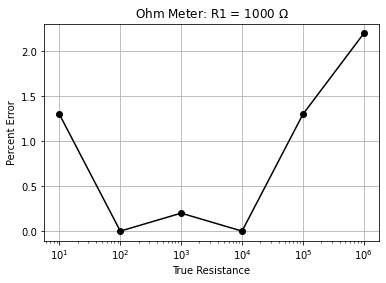

In [47]:
import matplotlib.pyplot as plt
import numpy as np

R0true = np.array([10, 100, 1000, 1e4, 1e5, 1e6])
R0meas = np.array([9.87, 100, 1002, 1e4, 101300, 1022000])

RelErr = 100*abs(R0true-R0meas)/R0true

plt.semilogx(R0true, RelErr, 'ko-')
plt.grid('on')
plt.xlabel('True Resistance')
plt.ylabel('Percent Error')
plt.title('Ohm Meter: R1 = 1000 $\Omega$')


**Homework 4.** Repeat this experiment with $R_1=100\ \Omega$, $R_1=10\ k\Omega$, and $R_1=100\ k\Omega$. Submit your jupyter notebook that generates the three well labeled plots.